In [5]:
import pandas as pd
from database import dataRefine
import os
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib.pagesizes import letter
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from binascii import Incomplete
from collections import defaultdict
from typing import IO
import re

ModuleNotFoundError: No module named 'pandas'

In [ ]:
slip = pd.read_excel('../sample_data/KJSIT_MAY_2023.xlsx')
dataRefine(slip)

[i for i in slip.columns]

['hr_emp_code',
 'name_of_staff',
 'org_basic',
 'basic_salary',
 'agp_or_gp',
 'da_0_wef_april_2023',
 'hra_24',
 'cla',
 'ta',
 'vehicle_and_driver_all',
 'salary_arrers_or_special_other_allowance_or_rem',
 'books_and_periodicals_and_client_entertainment_exp',
 'telephone',
 'lta_alw',
 'exgrataia',
 'entertainment_allwper_mont',
 'exam_rem_or_other',
 'gross_salary',
 'prof_tax',
 'pf_rs780_or_to1800_from_sep_2014',
 'tds',
 'lic',
 'personal_loan',
 'staff_loan_or_diwali_festival',
 'staff_advance',
 'medical_policy_april_23_to_mar_24',
 'kjsieit_empoyees_coop_credit_socity_ltd',
 'union_fees',
 'other_deduction_for_salary_paid',
 'total_deduction',
 'net_salary']

In [ ]:
def mapping(pd_columns:pd.DataFrame,columns:str) -> dict[str,str]:

    check_columns = columns.lower().split(' ')

    memo=defaultdict(lambda: {'count':0,'col':None})
    to_check = [col for col in pd_columns if any(word in col for word in check_columns)]

    for col in to_check:
        for check in check_columns:
            asq = 0
            
            if check in col:
                asq += 1

        if memo[columns]['count']<asq:
            memo[columns]['col']=col
            memo[columns]['count']=asq

    return {columns:memo[columns]['col']}

def check_column(col:str,pd_columns:list[str],pd_Data:pd.DataFrame) -> str:
    memo = mapping(pd_columns,col)

    if col in memo and memo[col]:
        return pd_Data[memo[col]].values[0]
    else: 
        return 'None'
    
check_column(pd_Data=slip[slip['hr_emp_code']==220309],pd_columns=slip.columns,col='emp code')

"""

import pandas as pd
from fuzzywuzzy import fuzz

def check_column_efficient(col: str, pd_columns: list[str], pd_data: pd.DataFrame) -> str:

    col_lower = col.lower() 

    filtered_cols = [c for c in pd_columns if any(w in c.lower() for w in col_lower.split())]

    if filtered_cols:

        distances = {c: fuzz.ratio(col_lower, c.lower()) for c in filtered_cols}

        best_match = max(distances, key=distances.get)

        return pd_data[best_match].values[0]

    else:
        return 'None'
        
"""

In [ ]:
#svv

def generate_pdf(self,employee_data:pd.DataFrame,month:str,year:int,type:str,chosen:str,file:IO[Incomplete],bulk:bool) -> None:  

    pd_columns = sorted(employee_data.columns,key=len)

    emp_data = {
        "name":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="name"),
        "designation":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="designation"),
        "pf_no":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="pf no"),
        "hra":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="hra rent"),
        "pan":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="pan no"),
        "date":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="date of joining"),
        "days":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="no of days present"),
        "emp_code":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="hr emp code"),
        "salary_ac_no":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="salary a / c no"),
        "aadhar":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="aadhar card no"),
        "una":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="una"),
        "basic":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="basic pay salary"),
        "present_basic":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="present basic pay salary"),
        "ta":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="ta"),
        "prof_tax":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="prof tax"),
        "pf":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="pf"),
        "tds":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="tds"),
        "lic":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="lic"),
        "special_alw":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="special allowance alw"),
        "salary_arr":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="salary arrears"),
        "vehicle":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="vehicle all"),
        "books":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="books periodicals client entertainment"),
        "etn":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="entertainment allowance allw"),
        "petrol":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="petrol"),
        "telephone":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="telephone"),
        "medical":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="medical policy"),
        "pba":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="pba allowance alw"),
        "lta":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="lta"),
        "ex-grataia":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="ex grataia"),
        "ent":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="ent alw allowance"),
        "gross":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="gross salary"),
        "net_salary":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="net salary payable"),
        "principle":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="principle loan PM amount"),
        "interest":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="interest bal amount"),
        "other_ded":check_column(pd_columns=pd_columns,pd_Data=employee_data,col="other deduction"),
        'total_ded':check_column(pd_columns=pd_columns,pd_Data=employee_data,col='total deduction')

    }

    pdf_file = f"{chosen}_{type}_{month}_{year}_employee_{emp_data['emp_code']}.pdf"

    
    doc = SimpleDocTemplate(pdf_file, pagesize=letter)
    elements = []

    styles = getSampleStyleSheet()
    style_normal = styles["Normal"]
            
    # Title
    title_data = [
        ["K.J SOMAIYA INSTITUTE OF TECHNOLOGY, SOMAIYA AYURVIHAR EVARAD NAGAR, EASTERN EXPRESS HIGHWAY SION"],
        [f"PAY SLIP FOR THE MONTH OF {month.capitalize()}-{year}     31 DAYS     1"]
    ]
    title_table = Table(title_data, colWidths=[540])
    title_table.setStyle(TableStyle([
        ("SPAN", (0, 0), (0, 0)),
        ("SPAN", (0, 1), (0, 1)),
        ("ALIGN", (0, 0), (-1, -1), "CENTER"),
        ("FONTNAME", (0, 0), (-1, -1), "Helvetica-Bold")
    ]))
    elements.append(title_table)
    elements.append(Paragraph("<br/><br/>", style_normal))  # Add spacing


    # Employee Info
    employee_info_data = [
        ["NAME", emp_data["name"], "DESIGNATION", emp_data["designation"]],
        ["DATE OF JOINING", emp_data["date"], "NO OF DAYS PRESENT", emp_data["days"]],
        ["PF NO", emp_data["pf_no"], "PAN NO", emp_data["pan"]],
        ["EMP CODE", emp_data["emp_code"], "SALARY A/C NO", emp_data["salary_ac_no"]],
        ["Aadhar Card No", emp_data["aadhar"], "UNA", emp_data["una"]],
    ]

    employee_info_table = Table(employee_info_data, colWidths=[120, 160, 120, 160])
    employee_info_table.setStyle(TableStyle([
        ("GRID", (0, 0), (-1, -1), 0.5, colors.black),
        ("ALIGN", (0, 0), (-1, -1), "LEFT"),
        ("FONTNAME", (0, 0), (-1, -1), "Helvetica-Bold")
    ]))
    elements.append(employee_info_table)
    elements.append(Paragraph("<br/><br/>", style_normal))  # Add spacing

    # Earnings and Deductions
    if chosen.lower()=='svv':
        earnings_deductions_data = [
            ["EARNINGS", "Rs.", "DEDUCTIONS", "Rs."],
            ["Basic Pay", emp_data["basic"], "PROF TAX", emp_data["prof_tax"]],
            ["Present Basic Pay", emp_data["present_basic"], "PF", emp_data["pf"]],
            ["RENT HRA 30%", emp_data["hra"],  "TDS", emp_data["tds"]],
            ["TA / Conveyance", emp_data["ta"], "LIC", emp_data["lic"]],
            ["SPECIAL ALW", emp_data["special_alw"], ""],
            ["Salary Arrears", emp_data["salary_arr"], "Principle loan amount PM", emp_data["principle"]],
            ["Vehicle", emp_data["vehicle"], "Interest 6% on bal amount", emp_data["interest"]],

            ["Books and Periodicals and\n Client Entertainment exp",emp_data["books"], "Other Deduction", emp_data["other_ded"]],
            ["Etn Alw", emp_data["etn"], "", ""],
            ["Petrol Alw", emp_data['petrol'], "", ""],
            ["Telephone", emp_data['telephone'], "",""],
            ["Medical", emp_data['medical'], "", ""],
            ["PBA All", emp_data['pba'], "", ""],
            ["LTA Alw", emp_data['lta'], "", ""],
            ["EX-Grataia", emp_data['ex-grataia'], "", ""],
            ["Ent All", emp_data['ent'], "", ""],
            ["GROSS SALARY", emp_data['gross'], "TOTAL DEDUCTION", emp_data['total_ded']],
            ["NET SALARY PAYABLE", emp_data['net_salary'], "", ""]
        ]

    elif chosen.lower()=='somaiya':
        earnings_deductions_data = [
            ["EARNINGS", "Rs.", "DEDUCTIONS", "Rs."],
            ["Basic Pay", emp_data["basic"], "PROF TAX", emp_data["prof_tax"]],
            ["Present Basic Pay", emp_data["present_basic"], "PF", emp_data["pf"]],
            ["RENT HRA 30%", emp_data["hra"],  "TDS", emp_data["tds"]],
            ["TA / Conveyance", emp_data["ta"], "LIC", emp_data["lic"]],
            ["SPECIAL ALW", emp_data["special_alw"], ""],
            ["Salary Arrears", emp_data["salary_arr"], "Principle loan amount PM", emp_data["principle"]],
            ["Vehicle", emp_data["vehicle"], "Interest 6% on bal amount", emp_data["interest"]],

            ["Books and Periodicals and\n Client Entertainment exp",emp_data["books"], "Other Deduction", emp_data["other_ded"]],
            ["Etn Alw", emp_data["etn"], "", ""],
            ["Petrol Alw", emp_data['petrol'], "", ""],
            ["Telephone", emp_data['telephone'], "",""],
            ["Medical", emp_data['medical'], "", ""],
            ["PBA All", emp_data['pba'], "", ""],
            ["LTA Alw", emp_data['lta'], "", ""],
            ["EX-Grataia", emp_data['ex-grataia'], "", ""],
            ["Ent All", emp_data['ent'], "", ""],
            ["GROSS SALARY", emp_data['gross'], "TOTAL DEDUCTION", emp_data['total_ded']],
            ["NET SALARY PAYABLE", emp_data['net_salary'], "", ""]
        ]
    
    earnings_deductions_table = Table(earnings_deductions_data, colWidths=[180, 100, 180, 100])
    earnings_deductions_table.setStyle(TableStyle([
        ("GRID", (0, 0), (-1, -1), 0.5, colors.black),
        ("BACKGROUND", (0, 0), (-1, 0), colors.lightgrey),
        ("ALIGN", (0, 0), (-1, -1), "CENTER")
    ]))
    elements.append(earnings_deductions_table)
    elements.append(Paragraph("<br/><br/>", style_normal))  # Add spacing

    # Footer
    footer_data = [
        ["This is a computer generated salary slip", ""]
    ]
    footer_table = Table(footer_data, colWidths=[300, 240])
    footer_table.setStyle(TableStyle([
        ("SPAN", (0, 0), (-1, 0)),
        ("ALIGN", (0, 0), (0, 0), "CENTER"),
        ("ALIGN", (0, 1), (0, 1), "RIGHT"),
        ("FONTNAME", (0, 0), (-1, -1), "Helvetica-Bold")
    ]))
    elements.append(footer_table)

    doc.build(elements)

generate_pdf(self=None,employee_data=pd.DataFrame(slip[slip['hr_emp_code']==220309]),month="",bulk=None,chosen=None,year=None,type="svv",file=None)

In [ ]:
import pdfkit

def convert_html_to_pdf(html_content, pdf_path):
    try:
        pdfkit.from_string(html_content, pdf_path)
        print(f"PDF generated and saved at {pdf_path}")
    except Exception as e:
        print(f"PDF generation failed: {e}")

# HTML content

html_content = """<!DOCTYPE html>
<html lang="en">
<head>
<style>
    body {
        margin: 0;
        padding: 0;
        height: 100vh; /* Ensure the body takes full viewport height */
    }
    .rectangle {
        position: absolute;
        top: 5%; /* Adjust the top position as needed */
        left: 10%;
        width: 80%; /* Adjusted width */
        height: 120%; /* Adjusted height */
        border: 2px solid black;
        box-sizing: border-box;
        overflow: hidden;
        /* Ensure .rectangle has relative positioning */
        position: relative;
    }
    .logo {
        position: absolute;
        top: 10px;
        left: 10px; /* Positioned at the top left corner */
        width: 154px; /* Set width of the logo */
    }
    .text1 {
        position: absolute;
        top: 18px; /* 18px from the top */
        left: 172px; /* 172px from the left */
        font-size: 18px; /* Font size of 18 pixels */
    }
    .text2 {
        position: absolute;
        top: 50px; /* 32px below the first text */
        left: 172px; /* 172px from the left */
        font-size: 20px; /* Larger font size */
    }
    .text3 {
        position: absolute;
        top: 93px; /* 43px below the second text */
        left: 172px; /* 172px from the left */
        font-size: 18px; /* Same font size as text1 */
    }
    .text3::after {
        content: "Payslip for the month of <month> <year>";
        display: block;
        font-size: 18px; /* Same font size as text3 */
        margin-top: 60px; /* Adjust spacing from text3 */
        left: 172px; /* Align with left position of text3 */
    }
    .section {
        position: absolute;
        width: 100%;
        height: 2px;
        background-color: black;
        box-sizing: border-box;
    }
    .section1 {
        top: 222px; /* Position of the first horizontal section at 222px */
    }
    .section2 {
        top: 342px; /* Position of the second horizontal section at 342px */
    }
    .section3 {
        top: 426px; /* Position of the third horizontal section at 426px */
    }
    .section4 {
        top: 456px; /* Position of the fourth horizontal section at 456px */
    }
    .section5 {
        top: 618px; /* Position of the fifth horizontal section at 618px */
    }
    .section6 {
        top: 666px; /* Position of the sixth horizontal section at 666px */
    }
    .section7 {
        top: 705px; /* Position of the seventh horizontal section at 705px */
    }
    .section8 {
        top: 825px; /* Position of the eighth horizontal section at 825px */
        width: calc(100% - 50px); /* Ensure a 25px gap on both sides */
        left: 25px; /* 25px gap on the left */
    }
    .section9 {
        top: 873px; /* Position of the ninth horizontal section at 873px */
        width: calc(100% - 50px); /* Ensure a 25px gap on both sides */
        left: 25px; /* 25px gap on the left */
    }
    .section10 {
        top: 903px; /* Position of the tenth horizontal section at 903px */
        width: calc(100% - 50px); /* Ensure a 25px gap on both sides */
        left: 25px; /* 25px gap on the left */
    }
    .divider {
        position: absolute;
        top: 426px; /* Starting point of the divider */
        bottom: calc(100% - 666px); /* End point of the divider */
        left: 50%; /* Center the divider horizontally */
        width: 2px;
        background-color: black;
        transform: translateX(-50%);
    }
    /* Style for Mode of Payment */
    .mode-of-payment {
        position: absolute;
        top: 832px; /* Adjusted top position */
        left: 35px; /* Adjusted left position */
        font-size: 16px;
    }
    /* Style for Disbursement Date */
    .disbursement-date {
        position: absolute;
        top: 832px; /* Adjusted top position */
        left: 310px; /* Adjusted left position (250px + 60px) */
        font-size: 16px;
    }
    /* Style for Employee Bank */
    .employee-bank {
        position: absolute;
        top: 832px; /* Adjusted top position */
        left: 530px; /* Adjusted left position (470px + 60px) */
        font-size: 16px;
    }
    /* Style for Account No */
    .account-no {
        position: absolute;
        top: 832px; /* Adjusted top position */
        left: 840px; /* Adjusted left position (780px + 60px) */
        font-size: 16px;
    }
    /* Style for Amount */
    .amount {
        position: absolute;
        top: 832px; /* Adjusted top position */
        left: 1030px; /* Adjusted left position */
        font-size: 16px;
    }
    /* Style for <mode_of_payment> */
    .custom-text {
        position: absolute;
        top: calc(832px + 47px); /* 47px below Mode of Payment */
        left: 35px; /* Same left position as Mode of Payment */
        font-size: 16px;
    }
    /* Style for <disbursement_date> */
    .custom-text-disbursement {
        position: absolute;
        top: calc(832px + 47px); /* 47px below Disbursement Date */
        left: 310px; /* Same left position as Disbursement Date */
        font-size: 16px;
    }
    /* Style for <employee_bank> */
    .custom-text-employee-bank {
        position: absolute;
        top: calc(832px + 47px); /* 47px below Employee Bank */
        left: 530px; /* Same left position as Employee Bank */
        font-size: 16px;
    }
    /* Style for <account_no> */
    .custom-text-account-no {
        position: absolute;
        top: calc(832px + 47px); /* 47px below Account No */
        left: 840px; /* Same left position as Account No */
        font-size: 16px;
    }
    /* Style for <amount> */
    .custom-text-amount {
        position: absolute;
        top: calc(832px + 47px); /* 47px below Amount */
        left: 1030px; /* Same left position as Amount */
        font-size: 16px;
    }
    /* Style for Net Pay : */
    .net-pay-label {
        position: absolute;
        top: 678px; /* Adjusted top position */
        left: 718px; /* Adjusted left position (638px + 80px) */
        font-size: 16px; /* Font size for Net Pay : */
        font-weight: bold; 
    }
 
    .total-earnings-label {
        position: absolute;
        top: 640px; 
        left: 20px; 
        font-size: 16px; 
        font-weight: bold; 
    }
    /* Style for <total_earnings> */
    .custom-text-total-earnings {
        position: absolute;
        top: 640px; 
        left: 300px; 
        font-size: 16px; 
        font-weight: bold; 
    }
</style>
</head>
<body>
    <div class="rectangle">
        <img class="logo" alt="Logo">
        <div class="text1">Somaiya Vidyavihar</div>
        <div class="text2">K J SOMAIYA INSTITUTE OF TECHNOLOGY, SION</div>
        <div class="text3">SOMAIYA AYURVIHAR SION MUMBAI SION 400022 MAHARASHTRA INDIA</div>
        <div class="mode-of-payment">Mode of Payment</div>
        <div class="disbursement-date">Disbursement Date</div>
        <div class="employee-bank">Employee Bank</div>
        <div class="account-no">Account No</div>
        <div class="amount">Amount</div>
        <div class="custom-text">&lt;mode_of_payment&gt;</div>
        <div class="custom-text-disbursement">&lt;disbursement_date&gt;</div>
        <div class="custom-text-employee-bank">&lt;employee_bank&gt;</div>
        <div class="custom-text-account-no">&lt;account_no&gt;</div>
        <div class="custom-text-amount">&lt;amount&gt;</div>
        <div class="net-pay-label">Net Pay :</div>
        <div style="position: absolute; top: 708px; left: 15px; font-size: 16px;">
            RUPEES : &lt;NET_PAY_IN_WORDS&gt;
        </div>
        <div class="total-earnings-label">Total Earnings : </div>
        <div class="custom-text-total-earnings">&lt;total_earnings&gt;</div>
        <div style="position: absolute; top: 952px; left: 20px; font-size: 16px;">
            This is a computer generated salary slip, hence signature is not required.
        </div>
        <div class="section section1"></div>
        <div class="section section2"></div>
        <div class="section section3"></div>
        <div class="section section4"></div>
        <div class="section section5"></div>
        <div class="section section6"></div>
        <div class="section section7"></div>
        <div class="section section8"></div>
        <div class="section section9"></div>
        <div class="section section10"></div>
        <!-- Vertical divider between section 3 and section 6 -->
        <div class="divider"></div>
    </div>
</body>
</html>
"""

table = "<html><head><style> th{color:red} </style></head><body><table><tr><th>asd</th></tr></table></body></html>"
# PDF path to save
pdf_path = 'example_from_html.pdf'

# Generate PDF
convert_html_to_pdf(html_content, pdf_path)

ModuleNotFoundError: No module named 'pdfkit'

In [1]:
check = ['hr','emp','code']

for i in check:
    if (i in 'hr_emp_code'):
        print(i)

hr
emp
code


In [54]:
import datetime
import re
import numpy as np
txt = re.findall("^(\d{4})[-,/](\d{2})[-,/](\d{2})","1967/09-27T00:00:00.000000000")

txt

type(100223601620.0)

220309,Dr Vivek Sunnapwar,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,rajjm397@gmail.com

float

In [1]:
import pandas as pd


type(pd.DataFrame({}))

pandas.core.frame.DataFrame

In [22]:
bool(-1)

In [5]:
import pdfkit

html_content = """<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: "Calibri", sans-serif;
            width: 800px;
            margin: 0 auto;
        }
        .header, .footer-note {
            text-align: center;
            margin-bottom: 10px;
        }
        .header p {
            margin: 5px 0;
        }
        .employee-details, .leave-details, .earnings-deductions, .net-pay, .payment-details {
            margin-bottom: 20px;
            width: 100%;
            border-collapse: collapse;
        }
        .employee-details td, .leave-details td, .earnings-deductions td, .net-pay td, .payment-details td {
            border: none;
            padding: 5px;
        }
        .employee-details, .leave-details, .earnings-deductions, .net-pay, .payment-details {
            border: 1px solid black;
        }
        .section-title {
            text-align: center;
            margin: 20px 0 5px;
            font-weight: bold;
        }
        .footer-note {
            text-align: center;
            margin-top: 10px;
        }

    </style>
</head>
<body>

    <div class="header">
        <p><strong>Somaiya Vidyavihar</strong></p>
        <p>K J SOMAIYA INSTITUTE OF TECHNOLOGY, SION</p>
        <p>SOMAIYA AYURVIHAR SION MUMBAI SION 400022 MAHARASHTRA INDIA</p>
        <p>Payslip for the month of <span>&lt;month&gt;</span> <span>&lt;year&gt;</span></p>
    </div>

    <table class="employee-details">
        <tr>
            <td>Emp Code: <span>&lt;emp_code&gt;</span></td>
            <td>Name: <span>&lt;NAME&gt;</span></td>
        </tr>
        <tr>
            <td>Branch: Sion</td>
            <td>Department: <span>&lt;department&gt;</span></td>
        </tr>
        <tr>
            <td>Designation: <span>&lt;designation&gt;</span></td>
            <td>PF No.: <span>&lt;pf_no&gt;</span></td>
        </tr>
        <tr>
            <td>PAN: <span>&lt;PAN&gt;</span></td>
            <td>Scale or Consolidated: <span>&lt;scale&gt;</span></td>
        </tr>
        <tr>
            <td>Retention Deduction%: <span>&lt;retent&gt;</span></td>
            <td>UAN No: <span>&lt;UAN&gt;</span></td>
        </tr>
        <tr>
            <td>Date Of Joining: <span>&lt;date_of_joining&gt;</span></td>
            <td>Date of Joining (Group): <span>&lt;date_grp&gt;</span></td>
        </tr>
        <tr>
            <td>Grade: <span>&lt;grade&gt;</span></td>
            <td style="color:white">hidden</td>
        </tr>
    </table>

    <table class="leave-details">
        <tr>
            <td>Total Days: <span>&lt;total_days&gt;</span></td>
            <td>Days Present: <span>&lt;days_present&gt;</span></td>
        </tr>
        <tr>
            <td>PH/WEO: <span>&lt;PH_WEO&gt;</span></td>
            <td>LWP/Absent: <span>&lt;LWP&gt;</span></td>
        </tr>
        <tr>
            <td>Sick Leave: <span>&lt;sick_leave&gt;</span></td>
            <td>Earned Leave: <span>&lt;earned_leave&gt;</span></td>
        </tr>
        <tr>
            <td>Casual Leave: <span>&lt;casual_leave&gt;</span></td>
            <td>Winter Vacation Leave: <span>&lt;winter_leave&gt;</span></td>
        </tr>
        <tr>
            <td>Balance SL: <span>&lt;balance_SL&gt;</span></td>
            <td>Balance PL: <span>&lt;balance_PL&gt;</span></td>
        </tr>
        <tr>
            <td>Balance CL: <span>&lt;balance_CL&gt;</span></td>
            <td>Balance LV8: <span>&lt;balance_LV8&gt;</span></td>
        </tr>
    </table>

    <div class="section-title">Earnings and Deductions</div>
    <table class="earnings-deductions">
        <tr>
            <td colspan="2">Earnings</td>
            <td colspan="2">Deductions</td>
        </tr>
        <tr>
            <td>Basic Salary</td>
            <td><span>&lt;basic&gt;</span></td>
            <td>Provident Fund</td>
            <td><span>&lt;provident&gt;</span></td>
        </tr>
        <tr>
            <td>HRA</td>
            <td><span>&lt;HRA&gt;</span></td>
            <td>Profession Tax</td>
            <td><span>&lt;profession&gt;</span></td>
        </tr>
        <tr>
            <td>CLA</td>
            <td><span>&lt;CLA&gt;</span></td>
            <td>TDS</td>
            <td><span>&lt;TDS&gt;</span></td>
        </tr>
        <tr>
            <td>TA</td>
            <td><span>&lt;TA&gt;</span></td>
            <td>Any Other Deduction 34</td>
            <td><span>&lt;other_ded_34&gt;</span></td>
        </tr>
        <tr>
            <td>Dearness Allowance</td>
            <td><span>&lt;dearness&gt;</span></td>
            <td>L1C</td>
            <td><span>&lt;LIC&gt;</span></td>
        </tr>
        <tr>
            <td>Gracie Pay</td>
            <td><span>&lt;grade_pay&gt;</span></td>
            <td>KJSOMAIYA CREDIT SOC1TY LTD</td>
            <td><span>&lt;KJS_CREDIT&gt;</span></td>
        </tr>
    </table>

    <table class="net-pay">
        <tr>
            <td>Total Earnings: <span>&lt;TOTAL_EARNINGS&gt;</span></td>
            <td>Total Deductions: <span>&lt;TOTAL_DEDUCTIONS&gt;</span></td>
        </tr>
        <tr>
            <td colspan="2">Net Pay: <span>&lt;NET_PAY&gt;</span></td>
        </tr>
        <tr>
            <td colspan="2">RUPEES: <span>&lt;NET_PAY_IN_WORDS&gt;</span></td>
        </tr>
    </table>

    <div class="section-title">Payment Details</div>
    <table class="payment-details">
        <tr>
            <td>Mode of Payment</td>
            <td>Disbursement</td>
            <td>Employee Bank Account No</td>
            <td>Amount</td>
            <td>Date</td>
        </tr>
        <tr>
            <td><span>&lt;mode_of_payment&gt;</span></td>
            <td><span>&lt;disbursement&gt;</span></td>
            <td><span>&lt;employee_bank&gt;</span></td>
            <td><span>&lt;account_no&gt;</span></td>
            <td><span>&lt;AMOUNT&gt;</span></td>
        </tr>
    </table>

    <div class="footer-note">
        <p>This is a computer-generated salary slip, hence signature is not required.</p>
    </div>

</body>
</html>"""

html_content2 ="""<p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:.7pt;line-height:1.0pt;'>&nbsp;</p>
<table style="border: none;margin-left:.45pt;border-collapse:collapse;">
    <tbody>
        <tr>
            <td colspan="2" style="width: 554.65pt;border: 1pt solid black;padding: 0cm;height: 110.65pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:379.1pt;margin-bottom:.0001pt;margin-left:0cm;text-align:center;line-height:110%;'>
                    <strong>
                        <span style='font-size:10px;line-height:110%;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:11px;line-height:110%;font-family:"Tahoma",sans-serif;color:black;'>Somaiya Vidyavihar</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:379.1pt;margin-bottom:.0001pt;margin-left:0cm;text-align:center;line-height:110%;'>
                    <strong>
                        <span style='font-size:10px;line-height:110%;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-right:194.6pt;text-align:right;line-height:77%;'>
                    <strong>
                        <span style='font-family:"Verdana",sans-serif;color:black;'>K J SOMAIYA INSTITUTE OF TECHNOLOGY, SION</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;line-height:200%;'>
                    <strong>
                        <span style='font-size:4px;line-height:200%;font-family:"Arial",sans-serif;color:black;'>&nbsp;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:0cm;margin-right:172.8pt;margin-bottom:.0001pt;margin-left:77.4pt;text-align:justify;text-indent:  -68.4pt;line-height:110%;'>
                    <strong>
                        <span style='font-size:11px;line-height:110%;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SOMAIYA AYURVIHAR SION MUM8AI SION 400022 MAHARSHTRA INDIA &nbsp;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-right:172.8pt;text-align:justify;line-height:  110%;'>
                    <strong>
                        <span style='font-family:"Arial",sans-serif;color:black;'>&nbsp;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-right:163.1pt;text-align:right;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-right:320.6pt;text-align:right;line-height:110%;'>
                    <strong>
                        <span style='font-size:11px;line-height:110%;font-family:  "Tahoma",sans-serif;color:black;'>Payslip for the month of &lt;month &gt;&lt;year &gt;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td colspan="2" style="width: 554.65pt;border-right: 1pt solid black;border-bottom: 1pt solid black;border-left: 1pt solid black;border-image: initial;border-top: none;padding: 0cm;height: 60.25pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:1.8pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;line-height:150%;'>
                    <strong>
                        <span style='font-size:9px;line-height:150%;font-family:"Tahoma",sans-serif;color:black;'>Emp Code :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;emp_code &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Name &nbsp;: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;NAME &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;line-height:150%;'>
                    <strong>
                        <span style='font-size:9px;line-height:150%;font-family:"Tahoma",sans-serif;color:black;'>Branch :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:150%;font-family:"Tahoma",sans-serif;color:black;'>Sion &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Department :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;department &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Designation :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;designation &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;line-height:130%;'>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Tahoma",sans-serif;color:black;'>PF No. :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Tahoma",sans-serif;color:black;'>&lt;pf_no &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Tahoma",sans-serif;color:black;'>PAN: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;PAN &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scale or Consolidated</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Verdana",sans-serif;color:#3D2C1A;'>&nbsp;:</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Tahoma",sans-serif;color:black;'>&lt;scale &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Retention</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Verdana",sans-serif;color:#3D2C1A;'>&nbsp;Deduction%:</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;line-height:130%;font-family:"Tahoma",sans-serif;color:black;'>&lt;retent &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;line-height:128%;'>
                    <strong>
                        <span style='font-size:9px;line-height:128%;font-family:"Tahoma",sans-serif;color:black;'>
                            UAN No: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;UAN &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&apos;&nbsp;&nbsp;&nbsp;Date Of Joining: &nbsp;&lt;date_of_joining &gt;<sup>.</sup>
                            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Date of Joining (Group):&lt;date_grp &gt;
                        </span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Grade : &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;grade &gt;&nbsp;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td colspan="2" style="width: 554.65pt;border-right: 1pt solid black;border-bottom: 1pt solid black;border-left: 1pt solid black;border-image: initial;border-top: none;padding: 0cm;height: 40.3pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Total Days</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Verdana",sans-serif;color:#3D2C1A;'>&nbsp;:</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;total_days &gt;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Days Present:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;days_present &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;PH/WEO :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;PH_WEO &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LWP/Absent</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Verdana",sans-serif;color:#3D2C1A;'>&nbsp;:</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;LWP &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Sick Leave : &nbsp;&nbsp;&nbsp;&nbsp;&lt;sick_leave &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Earned Leave: &nbsp;&nbsp;&nbsp;&lt;earned_leave &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Casual Leave : &nbsp;&nbsp;&nbsp;&nbsp;&lt;casual_leave &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Winter Vacation Leave : &nbsp;&nbsp;&nbsp;&nbsp;&lt;winter_leave &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Balance SL : &nbsp;&nbsp;&nbsp;&nbsp;&lt;balance_SL &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Balance PL : &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;balance_PL &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Balance CL : &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;balance_CL &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Balance LV8: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;balance_LV8 &gt;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td style="width: 276.5pt;border-right: 1pt solid black;border-bottom: 1pt solid black;border-left: 1pt solid black;border-image: initial;border-top: none;padding: 0cm;height: 16.8pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>Earnings &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Amount</span>
                    </strong>
                </p>
            </td>
            <td style="width:278.15pt;border-top:none;border-left:none;border-bottom:solid black 1.0pt;border-right:solid black 1.0pt;padding:0cm 0cm 0cm 0cm;height:16.8pt;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.85pt;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>Deductions &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Amount</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td style="width: 276.5pt;border-right: 1pt solid black;border-bottom: 1pt solid black;border-left: 1pt solid black;border-image: initial;border-top: none;padding: 0cm;height: 79.2pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;line-height:111%;'>
                    <strong>
                        <span style='font-size:9px;line-height:111%;font-family:"Tahoma",sans-serif;color:black;'>Basic Salary &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;basic &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>HRA &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;HRA &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:5.4pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>CLA &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;CLA &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>TA &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;TA &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:5.4pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Dearness Allowance &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;dearness &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Gracie Pay &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&lt;grade_pay &gt;</span>
                    </strong>
                </p>
            </td>
            <td style="width: 278.15pt;border-top: none;border-left: none;border-bottom: 1pt solid black;border-right: 1pt solid black;padding: 0cm;height: 79.2pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.85pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Provident Fund &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&lt;provident &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.85pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Profession Tax &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&lt;profession &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:7.2pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.85pt;line-height:86%;'>
                    <strong>
                        <span style='font-size:9px;line-height:86%;font-family:"Tahoma",sans-serif;color:black;'>TDS &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;TDS &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.85pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Any Other Deduction 34 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;other_ded_34 &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:7.2pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.85pt;line-height:86%;'>
                    <strong>
                        <span style='font-size:9px;line-height:86%;font-family:"Tahoma",sans-serif;color:black;'>L1C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;LIC &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:3.6pt;margin-right:0cm;margin-bottom:.0001pt;margin-left:2.85pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>KJSOMAIYA CREDIT SOC1TY LTD &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;KJS_CREDIT &gt;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td style="width:276.5pt;border:solid black 1.0pt;border-top:none;padding:0cm 0cm 0cm 0cm;height:23.75pt;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>Total Earnings :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>&lt;TOTAL_EARNINGS &gt;</span>
                    </strong>
                </p>
            </td>
            <td style="width:278.15pt;border-top:none;border-left:none;border-bottom:solid black 1.0pt;border-right:solid black 1.0pt;padding:0cm 0cm 0cm 0cm;height:23.75pt;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.85pt;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>Total Deductions :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:11px;font-family:"Verdana",sans-serif;color:black;'>&lt;TOTAL_DEDUCTIONS &gt;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td colspan="2" style="width:554.65pt;border:solid black 1.0pt;border-top:none;padding:0cm 0cm 0cm 0cm;height:13.7pt;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-right:118.1pt;text-align:right;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Net Pay :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>&lt;NET_PAY &gt;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td colspan="2" style="width: 554.65pt;border-right: 1pt solid black;border-bottom: 1pt solid black;border-left: 1pt solid black;border-image: initial;border-top: none;padding: 0cm;height: 55.9pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>RUPEES &nbsp;&lt;NET_PAY_IN_WORDS &gt;</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-top:30.6pt;margin-right:460.1pt;margin-bottom:.0001pt;margin-left:0cm;text-align:right;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>Payment Details :</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td colspan="2" style="width: 554.65pt;border-right: 1pt solid black;border-bottom: 1pt solid black;border-left: 1pt solid black;border-image: initial;border-top: none;padding: 0cm;height: 24pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:11.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>
                            Mode of<em>&nbsp;</em>
                            Payment &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Disbursement &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
                        </span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Employee Bank &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>Account No &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Amount</span>
                    </strong>
                </p>
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-right:415.1pt;text-align:right;line-height:80%;'>
                    <strong>
                        <span style='font-size:9px;line-height:80%;font-family:  "Tahoma",sans-serif;color:black;'>Date &nbsp;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td colspan="2" style="width:554.65pt;border:solid black 1.0pt;border-top:none;padding:0cm 0cm 0cm 0cm;height:14.9pt;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:11.15pt;'>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&lt;mode_of_payment &gt;</span>
                    </strong>
                    <strong>
                        <span style='font-size:9px;font-family:"Tahoma",sans-serif;color:black;'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;disbursement &gt;&nbsp;&nbsp;&nbsp;&lt;employee_bank &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;account_no &gt;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&lt;AMOUNT &gt;</span>
                    </strong>
                </p>
            </td>
        </tr>
        <tr>
            <td colspan="2" style="width: 554.65pt;border-right: 1pt solid black;border-bottom: 1pt solid black;border-left: 1pt solid black;border-image: initial;border-top: none;padding: 0cm;height: 25.7pt;vertical-align: top;">
                <p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;margin-left:2.15pt;'>
                    <strong>
                        <span style='font-size:11px;font-family:"Tahoma",sans-serif;color:black;'>This is computer generated salary slip, hence signature is not required.</span>
                    </strong>
                </p>
            </td>
        </tr>
    </tbody>
</table>
<p style='margin:0cm;font-size:15px;font-family:"Calibri",sans-serif;'>&nbsp;</p>
"""+'<p>asd</p>'

pdfkit.from_string(html_content, 'Pranav.pdf',options={
            'page-size': 'A4',
            'margin-top': '0.75in',
            'margin-right': '0.75in',
            'margin-bottom': '0.75in',
            'margin-left': '0.75in',
            'encoding': 'UTF-8',
            'no-outline': None
        })



True

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.layers import Conv2D,Rescaling,RandomFlip,RandomRotation,Dense,Flatten,MaxPooling2D,InputLayer,Dropout,RandomZoom,RandomBrightness,RandomTranslation,LeakyReLU,Conv2DTranspose,BatchNormalization,Reshape,Embedding,Concatenate,Input,ReLU
from keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy
from keras.utils import plot_model
from keras import Sequential
from keras.optimizers import Adam,SGD,RMSprop
from pathlib import Path
import numpy as np

tf.config.list_physical_devices(), tf.__version__

([PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')], '2.10.0')

In [18]:
gen, sam = tf.keras.utils.image_dataset_from_directory('C://Users//RAJ//Downloads//generated',label_mode=None,shuffle=False),tf.keras.utils.image_dataset_from_directory('C://Users//RAJ//Downloads//sample',label_mode=None,shuffle=False)

Found 24 files belonging to 1 classes.
Found 24 files belonging to 1 classes.


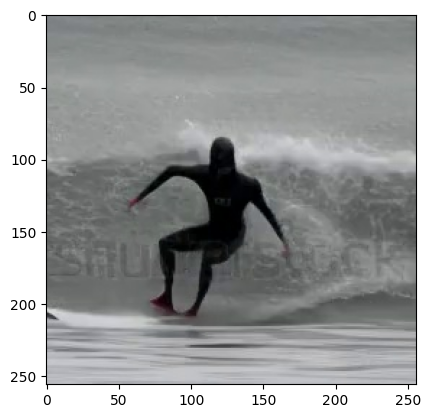

In [22]:
for i in gen:
    for j in range(i.shape[0]):
        plt.imshow(i[j].numpy().astype(int))

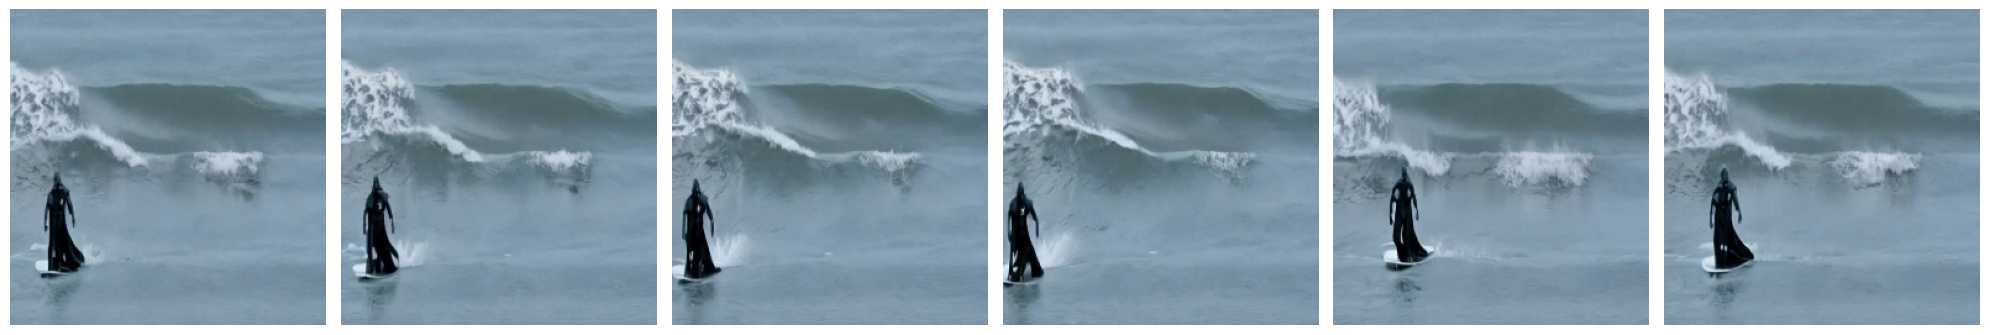

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))
val = list(sam.as_numpy_iterator())

for i in range(0,24,4):
    axes[i//4].imshow(val[0][i].astype(int))
    axes[i//4].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

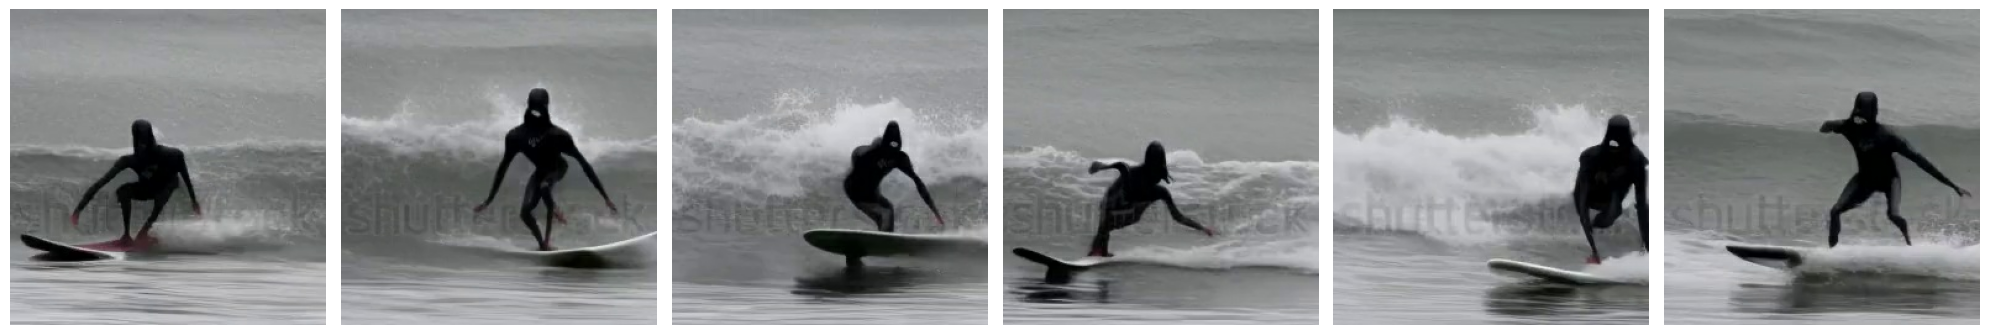

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))
val = list(gen.as_numpy_iterator())

for i in range(0,24,4):
    axes[i//4].imshow(val[0][i].astype(int))
    axes[i//4].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [33]:
val[0].shape

(24, 256, 256, 3)

In [8]:
import pandas as pd

re = pd.read_excel('C:/Users/RAJ/Downloads/PDF/Excel-to-Pdf-Generator/sample_data/KJSIT_MAY_2023.xlsx')

"""
<html>
  <head></head>
  <body>
    {0}
  </body>
</html>
""".format(re.to_html()).replace('\n','')

'<html>  <head></head>  <body>    <table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>HR EMP CODE</th>      <th>NAME OF STAFF</th>      <th>ORG. BASIC</th>      <th>Basic Salary</th>      <th>AGP/GP</th>      <th>DA 0% w.e.f April 2023</th>      <th>HRA 24%</th>      <th>CLA</th>      <th>TA</th>      <th>Vehicle &amp; Driver All</th>      <th>Salary Arrers/ Special Other Allowance/Rem</th>      <th>Books and Periodicals and Client Entertainment exp</th>      <th>Telephone</th>      <th>LTA Alw</th>      <th>EX-Grataia</th>      <th>Entertainment Allw.PER MONT</th>      <th>EXAM REM / OTHER</th>      <th>GROSS SALARY</th>      <th>PROF TAX</th>      <th>PF Rs780/ to1800 from sep 2014</th>      <th>TDS</th>      <th>LIC</th>      <th>PERSONAL LOAN</th>      <th>STAFF LOAN /DIWALI FESTIVAL</th>      <th>STAFF ADVANCE</th>      <th>Medical Policy April 23 to mar 24</th>      <th>KJSIEIT EMPOYEES CO-OP CREDIT SOCITY LTD</th>      <th>Uni

In [1]:
import tkinter as tk
from tkinter import simpledialog, font

class CustomPasswordDialog(simpledialog.Dialog):
    def __init__(self, parent=None, title=None):
        self.password = None
        super().__init__(parent, title=title)

    def body(self, master):
        # Set a larger font
        large_font = font.Font(size=13)
        
        tk.Label(master, text="Enter Password for workbook:", font=large_font).grid(row=0, column=0, padx=20, pady=10)
        
        self.entry = tk.Entry(master, show="*", font=large_font)
        self.entry.grid(row=1, column=0, padx=20, pady=10)
        
        return self.entry

    def apply(self):
        self.password = self.entry.get()

def ask_password(parent=None, title="Credential Entry"):
    dialog = CustomPasswordDialog(parent, title)
    return dialog.password

root = tk.Tk()
# Usage example in your function
password = ask_password()  # Assuming `App.app` is the Tk root window

if password:
    print("Password entered:", password)
else:
    print("No password entered")


In [29]:
from tkinter import simpledialog
import tkinter as tk
title = 'asd'
prompt = 'asd'

root = tk.Tk()
sasd = simpledialog.askstring(title,"Enter Password for workbook")

print(sasd)

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\RAJ\miniconda3\envs\tf\lib\tkinter\__init__.py", line 1889, in __call__
    try:
KeyboardInterrupt


None


In [ ]:
import pdfkit
html_content = """<!DOCTYPE html>

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta charset="utf-8"/>
<meta name="generator" content="pdf2htmlEX"/>
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>
<style type="text/css">
#sidebar{position:absolute;top:0;left:0;bottom:0;width:250px;padding:0;margin:0;overflow:auto}#page-container{position:absolute;top:0;left:0;margin:0;padding:0;border:0}@media screen{#sidebar.opened+#page-container{left:250px}#page-container{bottom:0;right:0;overflow:auto}.loading-indicator{display:none}.loading-indicator.active{display:block;position:absolute;width:64px;height:64px;top:50%;left:50%;margin-top:-32px;margin-left:-32px}.loading-indicator img{position:absolute;top:0;left:0;bottom:0;right:0}}@media print{@page{margin:0}html{margin:0}body{margin:0;-webkit-print-color-adjust:exact}#sidebar{display:none}#page-container{width:auto;height:auto;overflow:visible;background-color:transparent}.d{display:none}}.pf{position:relative;background-color:white;overflow:hidden;margin:0;border:0}.pc{position:absolute;border:0;padding:0;margin:0;top:0;left:0;width:100%;height:100%;overflow:hidden;display:block;transform-origin:0 0;-ms-transform-origin:0 0;-webkit-transform-origin:0 0}.pc.opened{display:block}.bf{position:absolute;border:0;margin:0;top:0;bottom:0;width:100%;height:100%;-ms-user-select:none;-moz-user-select:none;-webkit-user-select:none;user-select:none}.bi{position:absolute;border:0;margin:0;-ms-user-select:none;-moz-user-select:none;-webkit-user-select:none;user-select:none}@media print{.pf{margin:0;box-shadow:none;page-break-after:always;page-break-inside:avoid}@-moz-document url-prefix(){.pf{overflow:visible;border:1px solid #fff}.pc{overflow:visible}}}.c{position:absolute;border:0;padding:0;margin:0;overflow:hidden;display:block}.t{position:absolute;white-space:pre;font-size:1px;transform-origin:0 100%;-ms-transform-origin:0 100%;-webkit-transform-origin:0 100%;unicode-bidi:bidi-override;-moz-font-feature-settings:"liga" 0}.t:after{content:''}.t:before{content:'';display:inline-block}.t span{position:relative;unicode-bidi:bidi-override}._{display:inline-block;color:transparent;z-index:-1}::selection{background:rgba(127,255,255,0.4)}::-moz-selection{background:rgba(127,255,255,0.4)}.pi{display:none}.d{position:absolute;transform-origin:0 100%;-ms-transform-origin:0 100%;-webkit-transform-origin:0 100%}.it{border:0;background-color:rgba(255,255,255,0.0)}.ir:hover{cursor:pointer}</style>
<style type="text/css">
@keyframes fadein{from{opacity:0}to{opacity:1}}@-webkit-keyframes fadein{from{opacity:0}to{opacity:1}}@keyframes swing{0{transform:rotate(0)}10%{transform:rotate(0)}90%{transform:rotate(720deg)}100%{transform:rotate(720deg)}}@-webkit-keyframes swing{0{-webkit-transform:rotate(0)}10%{-webkit-transform:rotate(0)}90%{-webkit-transform:rotate(720deg)}100%{-webkit-transform:rotate(720deg)}}@media screen{#sidebar{background-color:#2f3236;background-image:url("data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSI0IiBoZWlnaHQ9IjQiPgo8cmVjdCB3aWR0aD0iNCIgaGVpZ2h0PSI0IiBmaWxsPSIjNDAzYzNmIj48L3JlY3Q+CjxwYXRoIGQ9Ik0wIDBMNCA0Wk00IDBMMCA0WiIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2U9IiMxZTI5MmQiPjwvcGF0aD4KPC9zdmc+")}#outline{font-family:Georgia,Times,"Times New Roman",serif;font-size:13px;margin:2em 1em}#outline ul{padding:0}#outline li{list-style-type:none;margin:1em 0}#outline li>ul{margin-left:1em}#outline a,#outline a:visited,#outline a:hover,#outline a:active{line-height:1.2;color:#e8e8e8;text-overflow:ellipsis;white-space:nowrap;text-decoration:none;display:block;overflow:hidden;outline:0}#outline a:hover{color:#0cf}#page-container{background-color:#9e9e9e;}</style>
<style type="text/css">
.m1{transform:matrix(0.166668,0.000000,0.000000,0.250000,0,0);-ms-transform:matrix(0.166668,0.000000,0.000000,0.250000,0,0);-webkit-transform:matrix(0.166668,0.000000,0.000000,0.250000,0,0);}
.m2{transform:matrix(0.170455,0.000000,0.000000,0.250000,0,0);-ms-transform:matrix(0.170455,0.000000,0.000000,0.250000,0,0);-webkit-transform:matrix(0.170455,0.000000,0.000000,0.250000,0,0);}
.m3{transform:matrix(0.237173,0.000000,-0.079050,0.237173,0,0);-ms-transform:matrix(0.237173,0.000000,-0.079050,0.237173,0,0);-webkit-transform:matrix(0.237173,0.000000,-0.079050,0.237173,0,0);}
.m0{transform:matrix(0.250000,0.000000,0.000000,0.250000,0,0);-ms-transform:matrix(0.250000,0.000000,0.000000,0.250000,0,0);-webkit-transform:matrix(0.250000,0.000000,0.000000,0.250000,0,0);}
.v2{vertical-align:-10.080000px;}
.v0{vertical-align:0.000000px;}
.v1{vertical-align:10.080000px;}
.ls8{letter-spacing:-2.796000px;}
.ls7{letter-spacing:-2.688000px;}
.ls6{letter-spacing:-0.876000px;}
.ls5{letter-spacing:-0.394400px;}
.lsd{letter-spacing:-0.385600px;}
.lsa{letter-spacing:-0.122800px;}
.lsb{letter-spacing:-0.023040px;}
.ls3{letter-spacing:0.000000px;}
.ls0{letter-spacing:0.051840px;}
.ls9{letter-spacing:0.053600px;}
.ls1{letter-spacing:0.085600px;}
.ls4{letter-spacing:0.191200px;}
.lsc{letter-spacing:0.288800px;}
.lse{letter-spacing:1.288000px;}
.lsf{letter-spacing:3.924000px;}
.ls2{letter-spacing:25.525440px;}
.sc_{text-shadow:none;}
.sc0{text-shadow:-0.015em 0 transparent,0 0.015em transparent,0.015em 0 transparent,0 -0.015em  transparent;}
@media screen and (-webkit-min-device-pixel-ratio:0){
.sc_{-webkit-text-stroke:0px transparent;}
.sc0{-webkit-text-stroke:0.015em transparent;text-shadow:none;}
}
.ws5{word-spacing:-11.655360px;}
.ws4{word-spacing:-7.883360px;}
.ws0{word-spacing:-7.594560px;}
.ws3{word-spacing:-7.571520px;}
.ws2{word-spacing:-7.471760px;}
.ws1{word-spacing:-4.641120px;}
.ws6{word-spacing:-3.888000px;}
.ws7{word-spacing:0.000000px;}
._0{margin-left:-5.503680px;}
._1{margin-left:-4.052160px;}
._5{margin-left:-2.914560px;}
._4{margin-left:-1.898880px;}
._2{width:1.145120px;}
._3{width:2.569600px;}
._27{width:3.782880px;}
._28{width:4.825760px;}
._6{width:13.010240px;}
._7{width:14.526400px;}
._17{width:30.397440px;}
._2e{width:38.047520px;}
._16{width:44.245440px;}
._b{width:52.349760px;}
._e{width:54.346560px;}
._25{width:62.634560px;}
._c{width:65.430720px;}
._18{width:66.561600px;}
._11{width:68.370240px;}
._19{width:77.951200px;}
._30{width:82.825920px;}
._2a{width:86.748160px;}
._1d{width:93.456000px;}
._f{width:108.942720px;}
._1a{width:118.428800px;}
._2d{width:123.343200px;}
._14{width:131.681120px;}
._1c{width:136.325920px;}
._1b{width:140.054720px;}
._15{width:144.236640px;}
._10{width:165.234560px;}
._29{width:169.903520px;}
._13{width:210.950720px;}
._26{width:227.196640px;}
._12{width:229.488320px;}
._2c{width:239.926080px;}
._21{width:241.045440px;}
._9{width:248.374560px;}
._d{width:282.779840px;}
._2f{width:375.985280px;}
._2b{width:395.459200px;}
._20{width:491.080640px;}
._1f{width:505.625600px;}
._8{width:522.894560px;}
._22{width:598.415360px;}
._24{width:617.706560px;}
._23{width:620.331200px;}
._1e{width:643.708640px;}
._a{width:755.214560px;}
.fc2{color:transparent;}
.fc1{color:rgb(61,44,26);}
.fc0{color:rgb(0,0,0);}
.fs4{font-size:12.000000px;}
.fs3{font-size:15.840000px;}
.fs5{font-size:25.920000px;}
.fs6{font-size:27.321806px;}
.fs1{font-size:30.240000px;}
.fs2{font-size:34.080000px;}
.fs0{font-size:44.160000px;}
.y0{bottom:-0.500000px;}
.y1{bottom:0.000000px;}
.y27{bottom:3.240000px;}
.y2f{bottom:4.560000px;}
.y19{bottom:4.680000px;}
.y22{bottom:5.880000px;}
.y1e{bottom:6.480000px;}
.y18{bottom:7.440000px;}
.y25{bottom:8.060000px;}
.y2a{bottom:8.160000px;}
.y24{bottom:8.180000px;}
.yc{bottom:8.760000px;}
.y12{bottom:8.880000px;}
.y2d{bottom:10.080000px;}
.y31{bottom:16.440000px;}
.y2c{bottom:16.680000px;}
.y21{bottom:17.160000px;}
.y1d{bottom:17.880000px;}
.yb{bottom:18.960000px;}
.y16{bottom:19.080000px;}
.y11{bottom:22.560000px;}
.y15{bottom:30.480000px;}
.ya{bottom:31.200000px;}
.y20{bottom:31.320000px;}
.y10{bottom:32.760000px;}
.y14{bottom:41.910000px;}
.y1c{bottom:42.600000px;}
.y9{bottom:44.160000px;}
.yf{bottom:44.640000px;}
.y29{bottom:48.480000px;}
.y8{bottom:55.440000px;}
.y1b{bottom:55.800000px;}
.ye{bottom:56.400000px;}
.y1f{bottom:56.760000px;}
.y7{bottom:68.160000px;}
.y6{bottom:72.740000px;}
.y5{bottom:83.660000px;}
.y4{bottom:97.700000px;}
.y30{bottom:156.170000px;}
.y2e{bottom:181.850000px;}
.y2b{bottom:196.850000px;}
.y28{bottom:220.850000px;}
.y26{bottom:276.650000px;}
.y23{bottom:290.450000px;}
.y1a{bottom:314.230000px;}
.y17{bottom:393.430000px;}
.y13{bottom:410.230000px;}
.yd{bottom:459.580000px;}
.y3{bottom:525.100000px;}
.y32{bottom:627.000000px;}
.y2{bottom:635.880000px;}
.h7{height:10.380000px;}
.h10{height:12.960000px;}
.h14{height:14.160000px;}
.hd{height:15.840000px;}
.ha{height:19.819688px;}
.h13{height:20.891576px;}
.hb{height:22.192031px;}
.hf{height:22.824000px;}
.h5{height:23.122969px;}
.h12{height:23.160000px;}
.h15{height:24.840000px;}
.h4{height:26.059219px;}
.h6{height:33.551250px;}
.h8{height:38.198400px;}
.h2{height:43.922812px;}
.hc{height:48.504000px;}
.h11{height:54.960000px;}
.h9{height:64.680000px;}
.he{height:78.240000px;}
.h3{height:109.820000px;}
.h0{height:664.080000px;}
.h1{height:664.500000px;}
.w4{width:275.690000px;}
.w5{width:277.390000px;}
.w3{width:553.920000px;}
.w2{width:611.999991px;}
.w0{width:612.000000px;}
.w1{width:612.500000px;}
.x0{left:0.000000px;}
.x6{left:2.160000px;}
.x2{left:8.880000px;}
.x9{left:11.160000px;}
.x8{left:16.680000px;}
.x1{left:28.559991px;}
.xa{left:40.104000px;}
.xb{left:42.504000px;}
.x5{left:58.944000px;}
.x4{left:76.460000px;}
.x3{left:87.380000px;}
.xc{left:123.500000px;}
.x7{left:305.570000px;}
.xd{left:482.020000px;}
@media print{
.v2{vertical-align:-13.440000pt;}
.v0{vertical-align:0.000000pt;}
.v1{vertical-align:13.440000pt;}
.ls8{letter-spacing:-3.728000pt;}
.ls7{letter-spacing:-3.584000pt;}
.ls6{letter-spacing:-1.168000pt;}
.ls5{letter-spacing:-0.525867pt;}
.lsd{letter-spacing:-0.514133pt;}
.lsa{letter-spacing:-0.163733pt;}
.lsb{letter-spacing:-0.030720pt;}
.ls3{letter-spacing:0.000000pt;}
.ls0{letter-spacing:0.069120pt;}
.ls9{letter-spacing:0.071467pt;}
.ls1{letter-spacing:0.114133pt;}
.ls4{letter-spacing:0.254933pt;}
.lsc{letter-spacing:0.385067pt;}
.lse{letter-spacing:1.717333pt;}
.lsf{letter-spacing:5.232000pt;}
.ls2{letter-spacing:34.033920pt;}
.ws5{word-spacing:-15.540480pt;}
.ws4{word-spacing:-10.511147pt;}
.ws0{word-spacing:-10.126080pt;}
.ws3{word-spacing:-10.095360pt;}
.ws2{word-spacing:-9.962347pt;}
.ws1{word-spacing:-6.188160pt;}
.ws6{word-spacing:-5.184000pt;}
.ws7{word-spacing:0.000000pt;}
._0{margin-left:-7.338240pt;}
._1{margin-left:-5.402880pt;}
._5{margin-left:-3.886080pt;}
._4{margin-left:-2.531840pt;}
._2{width:1.526827pt;}
._3{width:3.426133pt;}
._27{width:5.043840pt;}
._28{width:6.434347pt;}
._6{width:17.346987pt;}
._7{width:19.368533pt;}
._17{width:40.529920pt;}
._2e{width:50.730027pt;}
._16{width:58.993920pt;}
._b{width:69.799680pt;}
._e{width:72.462080pt;}
._25{width:83.512747pt;}
._c{width:87.240960pt;}
._18{width:88.748800pt;}
._11{width:91.160320pt;}
._19{width:103.934933pt;}
._30{width:110.434560pt;}
._2a{width:115.664213pt;}
._1d{width:124.608000pt;}
._f{width:145.256960pt;}
._1a{width:157.905067pt;}
._2d{width:164.457600pt;}
._14{width:175.574827pt;}
._1c{width:181.767893pt;}
._1b{width:186.739627pt;}
._15{width:192.315520pt;}
._10{width:220.312747pt;}
._29{width:226.538027pt;}
._13{width:281.267627pt;}
._26{width:302.928853pt;}
._12{width:305.984427pt;}
._2c{width:319.901440pt;}
._21{width:321.393920pt;}
._9{width:331.166080pt;}
._d{width:377.039787pt;}
._2f{width:501.313707pt;}
._2b{width:527.278933pt;}
._20{width:654.774187pt;}
._1f{width:674.167467pt;}
._8{width:697.192747pt;}
._22{width:797.887147pt;}
._24{width:823.608747pt;}
._23{width:827.108267pt;}
._1e{width:858.278187pt;}
._a{width:1006.952747pt;}
.fs4{font-size:16.000000pt;}
.fs3{font-size:21.120000pt;}
.fs5{font-size:34.560000pt;}
.fs6{font-size:36.429074pt;}
.fs1{font-size:40.320000pt;}
.fs2{font-size:45.440000pt;}
.fs0{font-size:58.880000pt;}
.y0{bottom:-0.666667pt;}
.y1{bottom:0.000000pt;}
.y27{bottom:4.320000pt;}
.y2f{bottom:6.080000pt;}
.y19{bottom:6.240000pt;}
.y22{bottom:7.840000pt;}
.y1e{bottom:8.640000pt;}
.y18{bottom:9.920000pt;}
.y25{bottom:10.746667pt;}
.y2a{bottom:10.880000pt;}
.y24{bottom:10.906667pt;}
.yc{bottom:11.680000pt;}
.y12{bottom:11.840000pt;}
.y2d{bottom:13.440000pt;}
.y31{bottom:21.920000pt;}
.y2c{bottom:22.240000pt;}
.y21{bottom:22.880000pt;}
.y1d{bottom:23.840000pt;}
.yb{bottom:25.280000pt;}
.y16{bottom:25.440000pt;}
.y11{bottom:30.080000pt;}
.y15{bottom:40.640000pt;}
.ya{bottom:41.600000pt;}
.y20{bottom:41.760000pt;}
.y10{bottom:43.680000pt;}
.y14{bottom:55.880000pt;}
.y1c{bottom:56.800000pt;}
.y9{bottom:58.880000pt;}
.yf{bottom:59.520000pt;}
.y29{bottom:64.640000pt;}
.y8{bottom:73.920000pt;}
.y1b{bottom:74.400000pt;}
.ye{bottom:75.200000pt;}
.y1f{bottom:75.680000pt;}
.y7{bottom:90.880000pt;}
.y6{bottom:96.986667pt;}
.y5{bottom:111.546667pt;}
.y4{bottom:130.266667pt;}
.y30{bottom:208.226667pt;}
.y2e{bottom:242.466667pt;}
.y2b{bottom:262.466667pt;}
.y28{bottom:294.466667pt;}
.y26{bottom:368.866667pt;}
.y23{bottom:387.266667pt;}
.y1a{bottom:418.973333pt;}
.y17{bottom:524.573333pt;}
.y13{bottom:546.973333pt;}
.yd{bottom:612.773333pt;}
.y3{bottom:700.133333pt;}
.y32{bottom:836.000000pt;}
.y2{bottom:847.840000pt;}
.h7{height:13.840000pt;}
.h10{height:17.280000pt;}
.h14{height:18.880000pt;}
.hd{height:21.120000pt;}
.ha{height:26.426250pt;}
.h13{height:27.855435pt;}
.hb{height:29.589375pt;}
.hf{height:30.432000pt;}
.h5{height:30.830625pt;}
.h12{height:30.880000pt;}
.h15{height:33.120000pt;}
.h4{height:34.745625pt;}
.h6{height:44.735000pt;}
.h8{height:50.931200pt;}
.h2{height:58.563750pt;}
.hc{height:64.672000pt;}
.h11{height:73.280000pt;}
.h9{height:86.240000pt;}
.he{height:104.320000pt;}
.h3{height:146.426667pt;}
.h0{height:885.440000pt;}
.h1{height:886.000000pt;}
.w4{width:367.586667pt;}
.w5{width:369.853333pt;}
.w3{width:738.560000pt;}
.w2{width:815.999988pt;}
.w0{width:816.000000pt;}
.w1{width:816.666667pt;}
.x0{left:0.000000pt;}
.x6{left:2.880000pt;}
.x2{left:11.840000pt;}
.x9{left:14.880000pt;}
.x8{left:22.240000pt;}
.x1{left:38.079988pt;}
.xa{left:53.472000pt;}
.xb{left:56.672000pt;}
.x5{left:78.592000pt;}
.x4{left:101.946667pt;}
.x3{left:116.506667pt;}
.xc{left:164.666667pt;}
.x7{left:407.426667pt;}
.xd{left:642.693333pt;}
}
</style>
<title></title>
</head>
<body>
<div id="sidebar">
<div id="outline">
</div>
</div>
<div id="page-container">
<div id="pf1" class="pf w0 h0" data-page-no="1"><div class="pc pc1 w0 h0"><img class="bi x0 y0 w1 h1" alt="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABMkAAAUxCAIAAAAdhEYDAAAACXBIWXMAABYlAAAWJQFJUiTwAAAgAElEQVR42uzdZ1gURwMH8LlKOe5AjiYdQUBAwQIoKmBDBESwEHvU2FuiidGYGDWJmsQuamwxlmhUDIqKDZEiIlUQKYp0pNe74+Dg2vvhEl4iikaNjf/vEzs7Ozu3u+Pz/J0tFLlcTgAAAAAAAABeARWHAAAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAADoF+vvSUQqFgrMFAAAAAACdh1wuR7bEwQUAAAAAAHh5793sGu6JBQAAAAAAAGRLAAAAAAAAQLYEAAAAAAAAZEsAAAAAAABAtgQAAAAAAABAtnyvPfztcPLKlQ2lpa0lvPz8KyM9Hh05goMDAAAAAADvCzoOwVvUwufHz/qEqaddnZ838kyQolDS2Fh3Paxx0EAcHwAAAAAAeF9g3vJtKo+PpxPCsrCsvnihIiFBUSgTiwkhFCaztVpFYmL+xQu8ggIcMQAAAAAAQLaEJ1XduCElxOG77ymiloLff1cUyhUnhsEkhMgkkvP9na87Od32HXPBzCzn9GlFner09PzLl3EAAQAAAAAA2bJTaCgtzTt//nFUpLSl5SnZ8u5dDSdHQzc3TY8RxaEXm+vrCSEycQshhKqsTAhJ37GjIT6h7+7dw2JiVKws7n29WtrcTAhJD9yVuHjRzcmTz1pZxi6YrygEAAAAAABAtvxwyCQSxR+Zhw6G9uldfvXqnSlTw729nqjGy8uruXWLZWCYsGyZKldLXF9/daSHtLlZLpESQih0OiGkMjqKqs7psXBh14EDe6z6WpSbVxwV1SIQPD5wkG1s7LJ7t3fsnbx9+3MvXFC0WZOenrk7MD/k/FOjLAAAAAAAwH8E7/J5zRI2bqi/HesRGtrC5yfPmWu9bJnjtm3V6elXevYsjow0cndvrXl/3y9UFWbJuXMUQmhaXagqKsKs9JLoKDpLjRBCoVIJIVRlFcLjy6VSCp1eGn6DqKqocLn1ublUQvQGDVbW1CSEyAlR79aNEFKRnBzWr5+cEAoh5QsWDNi7F6cDAAAAAADeDMxbvowWPj/155/afjgk948/Ljo7XRzoUvz77zVxsQ2lpRKRiBBSnZgYPmXKve/X265cqaSh0VpfLBQW7d+v5eo+saFhYlPTxIpqt7PBMqk879fDMolYRgihUAkh5hMnygiJnT8vccUXlefOdenXT7dv39q4OzImXb1PH0IIv7CQwmBoWlsLS0vD+/XTGNA/oK5udF5e/pEjotra9j0vunDhcfgNnEEAAAAAAEC2fPsoFErG+vU3xvorFmUSSfzsWYTFGhV2o/fPm2WNjck/blLW1KQRIhI2DDtxYtjpIKXu3dO2b2ttofJusoQv0LDuwWCx6MrKFCpVr39/o09mK1l2V+Fqma74gtOjByHEZOzYIbduVcTGZm3ZSudqugedJYTwMrPkLZIudnaEkPrshywLcwaLVREfT9HqUp9yN3SIW016uqypqSYzs33P7+/Ymr3/AM4gAAAAAAC8Xrgn9mUw2GyLefNyDhwoCAkxHTOmoaRE2igafPAQXVW1m49PnueoksDdTV+t7n/+/J2JAXfXrmWqc+7/+GP/w7+1tqDezdwzJYVjatq2WbddgYo/Bv28ubXQYNCgsekZoro6FS5XUWI0bhxdTY1jYkIIqUtKZltaEUJa6uqkfIHzyVMyPq/00iWGnq6Wnd0T3X5w9GhdfKJDKF4wCwAAAAAAyJbvgJKYGLVe9hSqPHvfL6Zjxiipq1MIKbl1S8PcnBDCNjKu1tUuDr1kPXtOw8ZNqcs/pxPiGhlp6ObW2oKagYGagcEL7o5CpbYGS0KIvpub/t9NmUyYwLK2IoSo29jIWyQyPs9q5iw1SyuXPXuo9H+c3IbS0oQZM9h9exu0eeYTAAAAAADgtcA9sf9a1PRpt6dNkxQWGI8NqIqOyjt/XklDgztsaNrnnxVdu1oaG1v/6JFc1FwZEUkI6bVs+Uf19ZOk0rbB8jXSsLCw8B9LCNFzcuq9fduDnTtDBg68Nca3Mj7uiZoP9u5lcLtYTp/RvpHUH75vrKzEmQUAAAAAgJdGkcvl70dHKRRCyFvvbQuff0Zd3S0iQvHG13A/v9KQkAk1NfW5OdednKmEyAjpF7irNDGRHxc39mH2m+9hw+PHKtraNCWlJ8pPGeqLS8omCYV0VdUn6gcbGXkkxOs5OmE8AAAAAAC8OwnofQlrCpi3/HdkEglh0Gvu3VMsGo0bS9dgZ+3dq+foNLakxOVc8Ig7d6znzmPp68taxG+gP5KmpoRVK6v+7g8hRM3Q8IlgKZNIwv385Dy++83wJ4IlLz8/a9eu4bduKYIlv7AQpxgAAAAAAJAtX7/GysroadNOGxqeNe+Wuno1g8XS8/HJ/HbNoyNHWvj82vvpRmPG1t+/Twhprq+PnzkrZvz4IGPj6psRzoGBb6B7dBWVnAP7r7sOzjl+/Fl16nNyhGVltC4aNeE3BUVFbVclLF2SHbiTyWYTQtJ37brQ3eLRn2dx0gEAAAAA4N/CPbFP0VBaqqavTwiRy2SnDfX13Ie6nzyZ8sP3D3busJ4123j69FA7OxpLVSZsVLHsPr7Nja+PIyMrkpNMR3lxbWze2JF5dOqPpCWLjEb7DTp8uINq93fvTl2yhMKkj7qbyrW1JYRkHT+eNH16v2PHekybVhR2PcZjpK6//7DgYIwKAAAAAIB3IQG9X/fE4j2x/yCTSK55e0nq60dFRtFVVPhFRS1lFbqug8sTE6rv3DEeO17ba1QXK6sx+fnFZ89K6utNpk1ru7mhu7vhm3oLq1wmO2tjbTzS03blKiKnVCYldFy/5+LFJr6+2fv3Xx84YFzRY35Bwd25s/VG+/SYNk3S1JS6cpWMSdf3G9PC5zM5HFwJAAAAAADw78Iw5i2fUJOZedXJ0W7VSvtvvuUXFYWYmDAMujaVlLmHhBh7eBxTUZnC470j6evyaB9+QpzeMA/dUaOSp08fV1mpoq393K2a6+uVNDRuzZhRfPSo++3b+i4uaT9uur9hg9aoUc2FRfUJCWPy89X/+eFNAAAAAAB48wkI85bvN66NTa8fNmRs3KDep5+pl1e3xYsKjxyxWLxYx9k5/+JFNQP9J16H8+pkYnHmrp2ypiapqLlFIKCz2WrdLf5aJ5ezzMwM3dyfumH/zVty9u/LOXhAJOBR1dn5V6/YTJv+3N0paWgQQuQU0m3FF/ouLiW3orN27Oj13fc9ly1rEQiC9HSyNm/uv2cPrgQAAAAAAPgXYRjzlm2JhcKmqiqOqek5B/uGe2kjEuL1HJ2ujPSoT4gT1wsIIYOCg7v5+7/KLuRSKaFQKNT/v0VJJpGcYDAYejpyiUTe0kxhMCh0xl+VG4T6M2e6Be7uoMGcoKA7AQEMfT2WlfXomxH/qjO8goIQMzM6hz2xppZKp8tlsj9oNP0JE9zPnMHYAAAAAAB4uwkI85bvsaQvvyy/HeNzO3bggYM3Rg5PWrx4+JWrQ06feXztmrimWt/Lu/3NonKZTNrcTFdR6aBZUW1tZXJydURE7YOsytBLw2JidR0dW9dS6fRea9fSuZpKenoMDkdcWSXMzX105lRLaZnFvPlagwa1bzBt797Cw79qOTlr9u5t6OMzNDoqafES3u0YSVNTxz15QlNuroaTo0woFAuFSurq6Tt3EmUm19kZVwIAAAAAAPy7MIx5y7YeHDqYsuLzPjt2WX08oyYz86qzE4Ui+6iq7okvRrYqiY6KHjNaWi8w/exT5+++Z7DZ7evknAtOXrpEVldP5WrKpVJxSdnAF5j8DHHpz78TP6awkGNs3H7t5dE+1ZdC6WwVipKKtLpWb/o0Aw+PxKnTXu5RyfilSyvj4xiGhjXXrlGEjQFCIV1VNX79On5Ojv3nX+g4OGCcAAAAAAC8+QT0fs1bIlsSQohcJkvfskXf25ttbHyxf38Vba5XZDQh5P6OHelrvx0RFaXl0Lv9VtLm5tiFC4vOBrEtzNXMLaoSk3ScHM1nzzYcMpRKp/NycwtPnXx842bN7RhlM1P9Qa6Ff56lsdnjc3KfmlQLgoOLL1xoqasTNfBb6uqljcKmh4+elS3JX3OhSTUxMeW3b9en3SMUCsuiu7aDg9O27c9Kws/CLyy8M29eY1lpV1fXPhs2loaFxS1dTKXSuI5Otakpwy5e0rS1xdgGAAAAAEC2RLZ8jtKYmEhvLwqDoWFnZ/nZsuQli5127TL1H0sIkUkkVHpHdw43Vlaq6ugo/q7NzIyaMKGlpsrqixUcI6M7n3xi4OdnOW++hrW1krp63DffFO4O7LlzZ885c9u3c663vSi/gO1gz2SxldXVKxLiRbl5z8qWJbei8w4d4hXkm/j6mU+bFqyryzQzNfIcJRIIKHSaqKTEft36ri4uL3Eomuvrz1l21xk0uLmmxu3s2erUlJJz5wfs3YuxDQAAAACAbNkBKs4ZIUR/0CC9kZ4MLS7X1fW2v79MKs4+cOCvA0R/ziOprcFSKhLFLVkiqiyXipofBu4y9BwVUFbu/vuJlgbBWR2dpFVf2s6dSxiMzB++f2o78haJ5Zo1PpHRHqGhridPMnWe+TWRmoyMcFe3ojOn+dEx/Jzs4iuX6bra3F72A/buHbhnDz83tyY29qbHiMujfYRlZf/2UFSmplKYSkODg3UHDzyvo1MeEUFjMnGFAAAAAAAAsmVH7m7ceGP06KKw6z2WLm16+IhjZOydnm7s6689ePCLN9JUUxO/fNkZXZ262zFUVVVDX9+PCouZ6uoMNlssFCbOn8/gsNnm3TUsLJQMDcRFj3n5+e0b0e7fX9bY1CZrPvO/KOqzH1IJGXH7zmS5fOAv+ytv3iQUiq6bGyGEyeH4Rt8aEnqZO2CAMD0jfKz/DT+/0qjIF/8tOg4ONBWVx1GR1ks/s1q2LHvzZtOpUwkhwvJyflERBgwAAAAAACBbPoXljBm83JwYj5H3N20yXrwofevPXFtbl337eq/++gVbKImJudinT97xYxK+oP+ZoJaixyVXLreubayqEhUVD70ZYbNoUXFkJKFQ6LralXfutG/HbPq09G+/bSgtfe4e2Wbd5IRUJiZWp6cnbvihMjlJVl4pU1I6a22p2Fzfzc0z7IZfWhpLV6/qdnSEt3fU0iXS5uYX+TlKGhpWc+dEuA8J0tU1nT17eOwdnX79CCGRkyaFmJiIhUKMGQAAAAAAQLZ8kpq+vm9ikuOJE4TIH//2W0tJWdKmTS++eWViIpFJ5XKZ7aqvJjY0mPv6mq34gojF1729ZWIxIYSlp6dsZsrq2rUw5HzMOD9xbS2FyayNi2vflIGrW+8NP6SuX//cnWrZ2dksW5b2xedXevYs/O2IuLqqi7t7eeglcXV1pL+fXCZTVGOw2e5nzjju/kXDvlfpyZO3FswvT0x4kR9lu2y5y59/2q9ZU3btqp6jY8n1a8H2PXkJ8cqmpilrvnnBjAoAAAAAAJ1K532XT97FCw8OHNBxGdjvq68UJdXp6Unr13kGnX3BFiqSk8P79dMc6z/0tyNMDocQcu/nnzJWrqJw2HK+wOfv1/AUXLkc4eVNJYRCiO3mnzNWfKk9cvioq2FPbTNm3rxuH3+s7+IS4mDPv5fWwXtiGysrazIzKyJuZu/Y0f/ESYaaWuHl0ILNW0YkJen27du2pkwiubV82eNjx2Q8vsufZ83Hjnvxo1SXnX25T2+ZsHFAUFAXG5vQ3vbWa9c5vfCkLgAAAAAAvHQCwnti3/VsKRYKo6ZNq0uI79LPsSbujtZAlyGng577zp4n0lry+nXZgYFKero2i5dYzZ1HYzLrHj683NterVevHnPnd58xo+hCSGN5udXsOVQ6XSwUCoqKlLlcBot1Sk2NrqU5obiErqz8j6xYVZWxZUv3efNEpaUSqSTv18PFwX+6h142cHProCfh48YK8vP87qYqFi+5ufX4/HNzX9/qu3fvLFnCT0lWd3Ts+fkKE1/fmwETquLj5M3N/bZut5gy5UV+prS5OaRHD7a1ldPeXxSfzazJyOhiZfWvjhUAAAAAAHSGbNkZ74ktvHSp8tw5lz/+GH7+vEf0rYrg8/f27P5X0TTI3Cxn316aqoq4rNzYz1/xJtWWhgZ5U7NXWLjlrFkSoTBm2rSkBQsLLl4khDBYLM0ePVR1dBgslntEBENHr/p+2hPNqmprN8tlRUePUtXUbroPKQ7+UypsjPIdLZdKn5n9RKLyGzf0Xd0Vi3mXLtVHR+v26UMISd+ypbmmquuUqXXRMfV379bn5JRfuyZrbJTV1d3fvjVl544X+aU0JSXrr78efilUESwJIV2srLJ+/73o5k0MdQAAAAAA6OzZsuHePSkhGt0tCSFdLC2NZ816tH3bC24rEYkiRvvIhEK9ER4916wldHqoc7/arExCiE7v3mpWVhXJSYQQqVisbGjINDasiox8ogUjd/ex9+51sbRq3/jAH38qT7nLUFbu9vHHg06dmi6Xd/XxST/86zOzn7Ky9sCBeqNGEUIuDx1yZ+JH+uPGqhkaEkJEQoFvQtLQg4emiMUa/Z2vDHCmMBm9N2/xup+h0oWb9e23CV+tepHfa/PJJxQqlRDSzOOVxcU183jCvNy42Z88PHwYgwcAAAAAAFp1xntii69djRrrrzdihOOOXTQGI3zkSLMF83stWvzcDRurqqL8/euzMnv9sMFm/nwKhZK1f1/KypUsE9NRMTFMNpuXm5v41VeCzAwaS02QnqbRv7+orLzH0k9t5s9/wb4Jy8tv+PuZDBmq7uLSUlOduelHp4MHDZ79QZSGkhJVHR0qg/Ho2DExn2c5e47iVtu769dnrlvHdnakMJktZeUtlZV9t++wmjWLECIWCu9+9VXub4dZ5uaDT5zUtLV9bq9kEklIr55SqZSqpGz7+fLuk6ec62k34nrYs54FBQAAAACAV09AeN7yXc+WhJDkrVuyvl1DbRTJCNEcOtQrPPy5mzSUlp4zMGDoaRMKlamr65eYrHjsMGza1Oqrl3vMme+wcWNrzeLwcK6trU6fPuWJCRWxd+w//fTF+9ZQWnpjrD8/PoFCiI6X18jQ0Jf4gTKJJHzmjKoLF2gctkzQoD99utuuwH8cgeXLH538namu4Z+ZRaHROm5NLBCcNTOdVF1Tde/eFQcH62/X5Hz3vf1vv9nOmIExDwAAAACAbNm5smVNRkbh8eMMZeVu8+ez9PRKIiNLzp+n0Gg2K1aw9PQ63rYyNfX2lMlNjx9bLV9efuWqoCBX38vH9fBvhBC5TBbm7VWfnt7/8GHjER6v+DOr0tK0e/UihPALC6XNzRwTE5qS0ku3dnPSR1UxMVq9+w67cEEsFGZs2FB6J1Zv2PA+33wjbW5O2/B91p49jnv2Wnw0UXF4O3BjzGgD79HaLi5p335bfv0qx67niKvXGGpqVDpdLpMp7psFAAAAAABkyw88WzZWVZ3V0aFrsKlKyhSJdND5EINBg15w27rs7ItWVjQO2/noMQs/v/LEhDAnZ5o6R3PYMM8/gxUVrjg5Snl8r/R07gvcYtqB8IkTTQMm/KvPhDzLvb17MlavlvD4foWFHGPj5JUrHx39TVJRRZj0USn3uDY2hJCGx4/VDA3Dpk8bcex4x6218PkJP3yft3kLs6uukrbO6DtxNCWly66uVitW3P108cATp178eAIAAAAAwIeXLTvLdFP1vVS6Osfl+En7detZlpYRgweHjxtbnpjw3A2b6+vvzJxB57BtVq608POTicVpq1fTtbrQOZy68PA7ny4lhHSxtDSfM4fGYcfPnClpbHyVfqrp6iYuWZS4fHkzj/eKP1kiaKCpqo64c0fxVGTxtatG/v7ja2tNJk2+v25dyvffEULUDA3jVq2sPHMmc+/ejltjcjg9ZsxUMtDvsWDBqKhoQqHknD7dWFGWOHUKt5+TWMCXy2QY/wAAAAAAnTcMd5J5y4wjR/KOHR19M0KxeG/vntRFi4ffutXxbJuksfEMi0VRY2mPHTv86DFCSOYve1NXr9IcOrzvt2uvODgw1Dn606a5Be6WNjc/+OMPZU1NDQsLxZTgy0nfvi1j+zYil3MdnYcHB7/KERMLBJk//WT/ww+EELlUekpXZ1J1DSEkuLe9KDVNRsiojAxFV8O8vatjbvnn5StzuR23WZed3cXSUtLYGDpkSGN2lryxiSgx+h890c3fH2MJAAAAAOD1JiDMW75z+EVFKfPnNiQnPzh4UFFiv3CRf37+c2/jfHz1qvl36y2WLFUEy4LLl9M3bTT0Hzsy6Ky2vb1nSoqyoWHp8ePxK7+kKSnZzphh7uv7KsGSEKLeq5esqYlQqVW3b10b5SkoLn7pphhstt2aNYq/eQUFnD59CCG5Z89SWyRDE+L7HjqYsOyzotBQUW0tTVmJMBjn7WzrHz3quM0ulpa8goJQFxdZfZ3t5yv8HpdazZ7P6dYNIx8AAAAAoLOH4Q943lIqEtGUlRV/F1y5fMvLm6qqrGJp6RF6RU1f/0VaCLLo1pSb75mSouPgoHjMkmlkYPbRRKfNWxQVSm5Fh7u6EUIGBQe/lrk7XkFBqIM9TZ2jWNSwsR155eqrN1udnp6xZYvbkSO8goLm+nodB4fE5cvzgk5L6nmyBqGKZXcTbx9eTbXj2nXqzwuK2UFBCQEBk0SiV3nJEAAAAAAAPDcBYd7ynSARic717dsiECgWTUd5TaipsVm1WlxTE9qnz+OoqI43b6qpuThwoKS2ruu0qYoXtzJUVNWdHFWMjUvCwlJ37FBUMxjs6pmSMiY/39TH57V0W1lDo+3lU3v37jVv76bq6ldvlq6iQghRNzXVcXAghBRfu2r72TKzyVPsvv7a82ZE7w0bOGbdLvfrXRYX13FT5r6+HDu7Zh6vhc+/v23brRkzbs+dm3fuHAY/AAAAAECnDsMf6rxlSUxMxODBDju223362ROrCi+Hmnh5d7z5TX+/ytgYGostEfDVbWztf/jBYLDrm/mlJ9U5NA31/y/L5Rxjk5GRUYrPab60Zh5PSf2vZmUSySkdLSNfvz4//qj4/kozj5cZuOvhzp3Sxsbh4Td1+/fvoCm5XF58/vytaVOpdBrT2Lj7hICHh3+zW7myx/z5GFEAAAAAAK8rAWHe8p2g5+hIJeTxhYttCyWNjSUxMRo2z/lMSGVqallYmKpVD++4eKqyMi8rI8rV7f7OHW/sInpikZeX8+jE76/YamuwJIRQ6XS94R6l4WEhZibXAiY0VVdf8xjxcO8eOZHRtbgZ27Y99yrPCwqiMmhOR44J72dYLlrcNzCw8nkTngAAAAAA8AH7YLMlTUlpUFhYTcytzN2BKV99FREwIcSl/xlDgwgfb+UuXTreNmvLZhVTE4/zIao6OhPyCy0XLiEc9v316yMmTqx7+PA/7XaLQND+vyYoDGbmzz83lJa+xh05bd9uPHqM7iivru7uN729Gx5ls8zN+23epmpoXHYhpPr+/efESyq1+6rVJp6erF49MwN3Pdi6lcliYTgBAAAAAHRaH/g3SK54juBnZEpra6WNIjkhapbdHbZu69bhs5EVycnhw4YytLX6H/zVyN1dUVifk3OtvzNhqcqaGsekZ6nq6PxHP7MuO/uqkyP173f5tJJLpRQa7aPC4te7u8iAgLKwq0RGTGfOHLBjJyFEKhKdMdCjqrI+Ki7pYMP07dvSln/e948/uHZ2V/v2lrVIht++re/ighEFAAAAAPC6EhDuiX3LmqqrT3XVi5s/v+DyZWPv0ZLa2t779vuXlk4Vi8c+zO44WDaUlNwc6UHnasoam26N8Q339yu5FU0I0bCwGHknTnfgYLlUdtXd/cGhg3KZ7L/ofG1qCkVF+SkXFo0mq+c9Onrkde3owaFDZ60tS69dZejp996ytfe69ZLGRkJIQ3m5hn1vGV+Qc+xYB5tbzp5jtmBB8oIFypqaPVat9kiIR7AEAAAAAOjUYfjDm7esunfvxvAhssYmKpMhk8joGuo9Zs3utX79i+ylub4+7ts1DKms24yPw5ycGTpcWWWN4cwZrod/U1S4v3OnoKTEcc0aBpv9X/zM+KVLC0Ke+c5VNfNu3jejXsuOgnvbi3If6Xv6uJ85QwgJGThQ2UBfb8CAtOWfM/R0KHS6WneLF9mXYkKVEHJvz246S812xgwMKgAAAACA15KA3q95yw/2ntjSmJiS4OCS8LDGwiJVff1ea9caj/alq6p2vFXq2rW6o0Zp9ezJy8tV72aeERiYvf8XSW2dSncL69lzrefOpVD/w5leuUx2vpdd63dT2pMKBC6/nzT18nr1fYX5+3WfM9fYw4NKpzdWVZ2zMKexVOUNQrqOtsXHM2uzMsuCg92uXmu9K/ipJCJRyqNEPLwAACAASURBVLffOqxdGz1ndnVEBEVZxXLeXIdVX+EfAgAAAAAAZMsPJFu2yrt0KeXLFc1ZDySETBWLO/iSR3V6+jXHvjrjJ/RcuvSak/PAc+cs/PwIIddGedYmJRCxlDBonrfjulha/ke/MePIkbTPPm3/sGWb9CmXFpdM7PBXvHiObc3JeefOJSyaT2EwNfv2GREcQgiRS6X3dwf2avf5licUXL4c6+3teOJE0qeLjUb79du8+WK/fhPy8/EPAQAAAABAZ8uW1A/+lHTz8RlzN8Xp6NF+hw52EMnkMln8vHkUKs15w8aS8+fVLLu3Ppk5/HyI4959nF69VM0tHl++/B/1k5eXd2/mTCqH/Zzri6VaEhHxGq7UNhOwjbm5mr37Snn8+rR0flERIYRCo3GMjIPtez463tFTl81VlVJCjEaOZOjoiWpqlLlcwmC08Pn4hwAAAAAAoLOhdoYfSVdWtpg+3eaT2R3UKY2Orr+XauA/lqWrW3DmTLcpUx8eOnhxQP8/bXpU3Iq2mBDgFRU9Ji6h52ef/UedTFi6hGZs+OTHLdufMK5mcVDQ69213RdfeIRedvr1cEtpacKqlYQQflFRVWJCc1lpzpGjHWyo5+oqJ6TkZrhqt25igUDa3Mw278ZQU8O4AgAAAADobOg4BH9lywsXqCrK+l5e2WfONBcV8svL0teuNZo0yXjy5Izde/SHj6A8L/W9UrDcuKE6Jqaju2HbqH2Y9V/0wWLcOHVzc01r65sfTys59jtDT4dCpdUmJ4lqa5U1NZ+6ibpZt547tt8O+Iihpdl1xEiakpLHxUv/6SOpAAAAAADwbvrwn7d8QecszBty88ZXVV31HCkqLqKrsmw+/9x67rzyuLg7s2cZe/lQudx+a9b8F7suvBASM20aXUP9BetLBYLxBUVMDucV91uTkUFXVlY3NyeENDx+XHzpYumNG+U3blAkEiqbZejpre3uljx/Xp9du63nzOmgnaKrVxpyckzGT2Dp6WFEAQAAAAC8rgT0fj1viXnLvzj+ergkKlJFS2vwkaN3li4ZuPcXTWvrB4cO3p0zl6LOqc7N6ffxx//FfuVSafyyz148WBJCiExelZZmMGjQq+y3Ljs71M6ui4vL6Nu3886fi/UfS++qKxM2SvmCnls29/78C0U1YW2t+eTJHTdl7DkK1w8AAAAAQGcPw5i37EDEpEkV0ZHGo7xdDh36L9rnFxSEj/FtrqqkMBj/Ilo2NFivW997ydJX2XVjZeXdVasKT57wTL57d/VXdWlpXd3c9T1HGo/2ZbBYGBgAAAAAAG89AWHe8sPRff68mpRku2+//Y/aT/ryy5b6un8VLAkhFCVmTVLSK+5aVUdn0OHD5bdjGCyWnMnwu5f26jfZAgAAAABA5w3DmLd8W9K2bc3YtJGqqvpvN5RLJGo2tj5hN15l73KZLG7BgmYB3/3kH22/dQkAAAAAAO9IAsK8JTxfTUbGvc+/YBobvtxVJhEIXrED+SEhjw4c+KiujvzzW5cAAAAAAAAvAaHi7Xi0ezfTyOAlN5bJmFpar9iB8piY8RUVShoaOBcAAAAAAPDqMG/5FoiFwoKQ8xTGSx58eUsL19n5FfvgsnUrTgQAAAAAALwumLd8C2oyM+SNjS+/vUTaxboHDiMAAAAAACBbdmp1d5Mpai//nQ8ZIV3798dhBAAAAAAAZMtOrbm45FVen6PUVY9tZITDCAAAAAAAyJadmlQsJhTKS2+ugRtiAQAAAAAA2RJoDAZ56S/VyGTatnY4hgAAAAAAgGzZ2Snp6splspfbVlJbq+vjg2MIAAAAAADIlp2dhqOjrEH4EhvKpVIlIyM9vMgHAAAAAADeMfi+5VvAtbF5uY9bykXNQ66F4QACAAAAAMC7BvOWbwGTwzHw9v7XwVLcYr1sGdfWFgcQAAAAAACQLd8tL/3c4ysy/miitK7m33RULi6r7LlseWc7UAAAAAAAgGz5PmRLieTtZMvhI/SGe8pEohesz+So++bn01VV396RksulUgwYAAAAAABAtnwKcWPj2znuDMbQ4GAVQ8MXqSzl8ftu365uavo2D5RQiNECAAAAAADIlu9WtlRw+nmLpKa2429dSnl8iwULjEd4vN0D1dLQQKHRMGAAAAAAAADZ8mnZsqHhLe5df9iw4VHREh7/WRUk9TzbjRudNv3YyQ8UAAAAAAAgW77TKDRai0DwFjug27fvwF8Py5qannjyUy4WUxkMl4OH7BcuehcOVHNdHUYLAAAAAAAgWz6dqrZ27YOst9sH0/HjA4oeK2lpkzbvYlXS0ZmQk2cWEPCOHKi3e/MwAAAAAAAgW77TGGpq1bGxb70bNGVlj2vXLSZPpSurEELkEon1uzFdqSCTSHj37mG0AAAAAAAAsuXTUahUXnHxu9ATlp5e359+6vPTT/KWFgqdXnzx4rtzlBLWfqtqYtK+/OHhw9dGepRHRmAgAQAAAAAgW3Yicpms/Uca5YKGmszMd6SHJRcuUphMQkjVrVuimpp3oUvN9fVZGzd1sbVtvyr3xInahLgWsRgDCQAAAAAA2fIDjZH//LBH2c2bV4YMOW1o8Idml8vDh2Xt+0X297tz1AwNoidPkohEb73PjZWVpX/PAdJUlSMDAmT/fMHPW5F78iRdVZltZPSUq4dBl9QLtHv3wUACAAAAAEC2/ACJBYLr48e1Lbk1ZxY/J1tSVi7hC3iJialfrXxw8IBilZara8O9tKIrV956t6MXzJeJmhR/UxjMqps3S2/HvP1sefRI1/ET6Coq7VeZjh9PI6QmIx0DCQAAAAAA2fJDkx4YGGRoUHX1yqPgPxUlZXFxkopKrb6O46qqpsvljnt/kcvIg507JY2NhBBNG1tCSPbePW+320Whl2quX6cwGK0lTGPDh4GBb7dXZbeieSmpPWbPeUqAb2iovB2rZNsjafHi9O3beAUFGE4AAAAAAMiWHwhRbe29b76mslTNpk3vPvavqUt+VqacUBx37FDR0iKEWEyZYrFypSg/7/7BA4QQVW1t9cGD6u7cSdm54y32PGPLVrpmlycKK27cyDl//i326v6PP9FUlA0GD26/qjgysuDIkZaSx828+vTNP180MztJocR+tar2wQOMKwAAAAAAZMv3W+Gff1LpNB1X1/67/j/j11JVRWg0lp5ea4nD4iVUrtajbdsVDzT2+vprOZ2e+fXXZdHRb77PMokk7tMl9Rn326+icdgJUyZXJia+lYOZ+uOmmoQ4XU/Pp641GTFidHa28+GjVrM+MfDw1HAdTOGw87duvdLHIcii21XPkfff9lQwAAAAAAAgW74kXkaGXCobfPBXGpP5/9LGpieqMTkcDYdezUVFotpaQojpSE96Fw06VzPhi+Vvvs95f/6Zf+wo9WkPNBIKhabFTf7yyzffq4LLlzO/Wk1VUdHu0/upFWhKSl26d+/m7++wbv3gI0d8oqIn8fjDYm53nThJnJtfee26BO+PBQAAAABAtnxPycRiZlc9Bpv9j1KWCiFE0vSPhEmnMwkhra+H1XUZRAhpLCy6OtJDWF7+xjpcFhd375tvqBz1DurUZ2Zk7d//Jg9jZWpqyoovaMaGUqFQb+So9hWE5eV3Fi684NL/iueIxM8+exwVKW1uJoToOTkNPfzbRLHYr6DAatJkDDAAAAAAAGTL95KShoakru6JT3fQ1TWITCYWCltLGkpL6zIy6FxNlq6uoqTbxx/Lamqpykq8B1k3Rnk2lJS8gd6m/vRjhOdISctzPn9CVVZKXfNN9IwZovr6N9Cre1u23HB3a2kQEELUzMy0HRza14kcP7bgxO90JWUqg5l3PvjWhHF/WllGTp788NdfWwQCKp3OMTFR1dHBAAMAAAAAQLZ8L6n36ycVCMri4toWyltaKNT//1J+UdEFAwNJdbXNd9/RlJQUhfpubnJhI5HLCSGi2proqVP/667GfLkic9Mmmjrnhc6TinJZeNjtWbPeQK8yfvj+r17JZAZDh7evU5edXZ+crO3n5xUROfJiqM2MWVQlZXFFecWtqJTVK88aGV4LmHB/3z6MLgAAAAAAZMv3VdfBgylUasLiRW3vgG14lENRUWHp6ysWk79cQeGwtYe42y9c1FqHpqTU/0KI9O+5TX5mxrk+DiXh4f9FJ1sEgsipU4oPHHjBYPn3uaJW3r4VOnBgRXz8f9GrxqqqyGn/6JWkutpwwvj2NcvDwtTMuw/77Yhisam+XlJd7Zl0t9uEj6gsNaoSsyr0Ep1CwegCAAAAAEC2fF+paGnpjhjZXFmRGbhLUSKXSgsvX1K3tWudutSy7mG+cuWw4Ce/7dFttC/L0lLxN0VZqaWmJtJvTPx3619vD+VSaZivb3lkBPVfBUvF2VJWbnhcdGPokKzjx19vr0pjY8/q6JRH/L9XcomE7eik6+jUvnJ9Roa+h0fr8RQUFWmN9uXa2jpu22azaHHXIcNGJSZbffIJRhcAAAAAALLle8xh3Toqg57x/fdh3t7RU6eeNjES19ZazpzZWsFu7Vqn1V+3vUu2ldnY8fI2bzela3bJ27Yt1HXwo5Mn2z6u+XIaq6pSvv/+tImRIDODQqO9dDt0rmbKksXXvbzyzp1rfRfRSxPV1qZu3BA91l/J2PAfvZITt2NPT7AtAoFSm2Bck5hgNHq04m+TCQH1uTlcGxsqnY7RBQAAAADQeVDkcvn70VEKhRDygr2VS6WXXF3rY2NphEgJMV8w32XvL4QQqUjUVF3N0td/arBUxL+zOjpKxoZPlMsaG5V09FxPn9ays3u5/if/9FPmqlWMrroUBuN1HRMZn6dsYjYy7IaqtvbLtXB38+aML798aq/0hwwbfOTIU7eKnTevqaJi2PnzhJCmqqogHZ2xxcVqhoaEELFQGGSgP7meh6EFAAAAAPCKCeh9CWsKH+bkEoVG84qIaCgtbaqqVNXVY7LZSau/Kr8dw09Pl7eIlfW7Go4cZbNiBdvI6IkNVbW1+x7Yn/bVKiqL1bacqqrawqu7Pmggx9bWyMtbZ9gwzR49lNQ7+nCIXCZrqq4uvxVdHHyuIjZG2tDAbBdZXxGVo95cVXmxbx89l4FcR0ct18Ga1j2YT3x/pV2vah88qLgZXhl7p/LO7Wf1SlJTa/Hsm1q7DhsWO31a2r59vebPL09KorNZqnp6ilWC4mKlv59rBQAAAACAThSGP8h5yyeEODs3FRfKyirkqioqlt2FqWmMrrocqx5eERFPrR861K0hN++Z8UwqlZWUyQhRH+Ku7+Wt06+fmoGBsoYGIUTS1NTS0FCTkVGZmFAedLapoICqxqJrdnkDx0cukchKy2WEaPp4G4zy0nV0VNXWpikpyaVSuUzW0tBQnZ5elZRYfvqMqLyUzuV2MH0qF7d0GeQ68kxQB7u7PGzYqOvXKTRa3qVLsaNHj6usVNHWJoTc++ab2pycIadOYWgBAAAAALxiAnq/5i0/8GxZm54ePsZHXFVjsWCBxcxZGubmVAZDVFeXc/TI/U0bTadNH7Bla/ut8k+fjlu6mKqs3GGYk8ulUrlIJJfK2q+kKjMJnfEqD1W+bMR8Zq8ohFBerFdMNbb3nTgm5ymvGpKJxQ1lZcoaGnQVFSqDQQhp4fND7O2paqpmvmOkTaK8oNPOO3eZjh2HfwsAAAAAAJAtP5xsGermyktNdTl61NTP/4lV97duuffFCo/kZJ0+fdpvGOY7ujY1hXS+D2lIauvcgoIMPUe1X5UbHJy6erXocTGhUPQ8PU0nTTb19qYpKVUmxKdv2VpzN4muodEtYKL9l1/iHwIAAAAAAGTLDydbSkWiP7iaWp6enn8Gt1/7OCoy2n1I38O/Ws2c1X5teWJCmJPza39C8h0n4/GN5s4d9PPmZx0QGofN7tu3uaREXF5OmHSOnb3nlSu0jid4AQAAAACgE2RL6gd8Mprr60ljk+n4CU9dK8zNIRzWs2581XN06rNnj0zY2IkuXrm8S79+rcGymfePd73m/3qYxmE77gocfTNiXNaDvtt3sG1s65MSz+jqJKz4gl9UhMEPAAAAANCZfcjZUlVPj8qk8x5lP3Vt/ok/CF+o2cv+WZvbLlzY1WNk57kUWopL+m7d1roY9+mnF4cOaayqUizW3r+v3M2s+8cfE0IoVKrlrFk+Ubfsftgg4QvyTvweYmKSsX8/hhMAAAAAALLlh0l/3PjcTRur791rW1iddu+Gn19NUqLxxx8TqTRj795nbd77++9pVLpcIvnwLwSpdGBwsLa9PSFE2tzcwuc3V1bwExIuDxzw4NAhuUxGYTIMxo1/YiP7Tz/1zc83C/iIzmHf+2olZi8BAAAAADqtD/xdPmVxcTcGDFCxsvC8GaWmry8sL0/ZtrUocBe1Sxet/i5uR4+es+tBVVIan537rBbEAsFZM2MqS+1Dvgrk8u4TJ/f5+WfF0oNDBxPnzB1TWFidlhb3UQCFTqewVFnm5oTBHH3z6V9tkYpEWSd+t/tkNkYUAAAAAMDrSkB43vId0rV//4HBwVQKLcTU5JS+XrCxUcHOHZx+jnaff2Hg4XHW0EAmkWo7Oqdv31b34MFTW2Cw2c67f5HU88h7dV7/FRVtXbs1a1oX+fn5VA4774+T3Xx8fLMfGY31lwkbhTmPBMnJmfv2PbUFmrIygiUAAAAAQKcOwx/2vKWCWCiM++brqsgIbfchPT6ZrWVnl7BxQ85PP1FZqpKyCkKInBAak+6VkaVhYfHUFvIuXbozdQpdnfPhXQEtRY9HJMTrOTq1LcwOCrLw96fS6YLiYraRUcPjx2E+3s3lZbImkY6fn/sv++iqqhg8AAAAAAD/aQLCN0jeuWzZlqSx8c5nS4tPn2Hq6lrPm9dt2nQmh1N6K/rusmWNuTkjE5O5dnZP3TBt27b079bTPqx4yVBhOe3fZ+jm/tS1lampEWN8rRYucli5skUgyA/+89H+/fyUuyrdzO3Xru0W8BEGPAAAAAAAsmVnzJbZR44kf7pUTqOZTgiwX7+epafXuurRiRNJyz/rNnGy886dz9q8PDHhzqxPWnh1hEJ5369UmahZ3a7noF9/5ZiaPj1YJsRr93NM/fHHrB83MQ30HTdsMhk7VhE4H27dWnTuT4a2tsXHMy3nzlXT18fIBwAAAADo5NmS2nnOTcLGDYmfLpXLJXbffOOyf3/bYEkIaUhLozKZVBqtgxb0HJ1cT52S8vjv/bGQybQGuHiFhz8rWEpFoptjxqTt+6X36tWWn34qLi+LmTnj3t49hBAdB4fBx487HzkqKih6GLjj6lB3DHsAAAAAAOgs85YNJSWhzs4MNrvXd+vNx0+gtJl4lMtkOadOpa75WioScXv34fay57q4mPj4PKup/KCg+GWfErmcQqe/l7lSKDQNmOjw3XcqWlrPrCORXOzbR5h2f0xpqaqubm5Q0P3vv2sqLjaaMN5pyzYlDQ1CSGNl5cODB3ssWKCsqYmBBAAAAADw2hMQ7ol9F7MlIaTh8eNmHo9ra/tEeerGDVmbfyIyIpdLDD6eVbJ7j4wQp9+PW06Z+qymxAJBSK9eUtn7991LGY/fa8NG20WLnlvz/qYNGYGBtkuW9Pzqa0IIr6Ag1MyMos2VVNX4PHzYxdISox0AAAAAANmyVSe6J1bN0LB9sHx4+HDW5s0Ullq/XYGT+Y1ugbsnisUWn32aumoVv6joWU0x2GyPiIiuQ4bJhML35efLpVJpPc9m9dcvEiwJId1mzJLV1eWfOq24oNVNTSc0NBiPm0DjsCN8R1fdvYvRDgAAAAAA/w/Dne09sW3Ff7c+d+tWpibXPyuLpqzcWs4vKrpo1d1wzly3XYEdt5Cxd+/dRYuYRgbv+tt9ZDIKle51+7aaoeGLb5R1/HjK9OnDU1J0HBxaC7ODghJnzTSdPGXg/v0YPwAAAAAA/10Cwrzle0AsFEZ/Mitv61YVY5MRN260DZaEEKlIRChUUVnZc9uxXbhwREI8t3cfmUj0jv5UuZxIpab+47xiYzsIlk01NQWXL4v/OQ3bY9o0tpNj3q+H2hZaTpjgeuKkw/r1GO0AAAAAAPD/MNw55y1PUigULU15da13fr56u3el3gwIKLt+bXj4Td2+fV+wwciAgNKgINo7NoEpa2qUV9WOSE3VtrfvuGb0jBklIcFUFsdx3z4zLy8K9a//dEjfvu3+mjWTGoQYKgAAAAAAbzgBYd7yPeBXUdFt6rRxdXVPBMvarKzLQ4aUX7/WfcECnd69Hx07dmvGjFsff5y+bauwvLyDBt1OnXKNjNAdNFjC48ul0refKhubmNraPb9Z+5FI1HGwlMtkkqamru7uhmPGUui02HH+F/o4JK9cWXn3LiGk25SphE6PmDb1/bqsAQAAAADgTYfhzvy8ZVtioTB9w4bs349KeQK7det7LVvGKyiIGDuWoszUtOrBL8zjpd4znzq919q1Klxu61blt2NqU1LMp01XUldXlDRWVeUePVp4MYR/L43GYb/haUy5uEXaKNIdMsTm8y/0Bw3quDK/qCh11aqSsGuy5haj8eMHHTgol0rLE+IfnwkqiYluzMpSMjYx9hgpIaToyG/9jxwxGz8BAwYAAAAA4I0lIHyD5L3MlpGTJ5dH3pTx+CMTk7g2Nq1BUVVbW/F3/PJl+SdP6A0d7n7yZOtWNwMCKsKu9vx2nd2y5U80WHjt2u0J/nIZhc59E59/lEulspKyLu7ug48ff5EX9tRkZITa2dFYqnSuJlUqlzQ3qfcf4HXxUmuF3JDzsX7+VFVlKp1B1VDX7us4NDgYIxwAAAAAANnyqag4Z/XZ2de9vUtCLykbGAy7Ec61salJT3/w66HS2FiGqmprtX6bftRzdS8NOVebmdlaqNmnD8ehr9Xcee2bNRk5clJ9g/ul0K6u7lQmU8rjyyWv/3uY8sYmeXMLp4e19bwFI1JTPcPDXyRYimprb0+dwu7dy/18yEeFxWNzc7UHDuRFRyetXdtax3yM31Sp1O3Cpa6jR0vreWpW+KAlAAAAAAA8Owxj3jJqxozy8DA1C0vviAhCSNbx48mzZ9HYbHlNnXKvnqNjbjPYbEVNsUAQZGjQc9nynuvW/du9FFy7ev+nn+oiIulsFaoah8JgvEKglMtbWmR1dZIWidEns5w3/dg6ufqCzvd3bqkoC8j//wc84xctyj/3p7SxyfV8iJG7+xP1pSLRE6/SBQAAAACA/zoBvV/zlnScs74bNqSxWA5r1xJCKhITkubPVTE1tV3+hbimuuDkH6c5HOvVq60XLVLT188NCSFSibKpKSEkbds2cUWF9bJlLD29F9mL6UhP05GeTdXVtVmZ9YlJdenpgtJiQWaWhC8ghFAIITQqhUEnVKpi6a8UKZWQZrH87/8GUOvVk93VgGVgwHGw17DrqWVnR1NSarsXfkFBY1WlnqPTU/tQmZqatn59359+aohPMJ8/v7W8KikpP+iU/Xc/ZO/eHe3jPfTy5a6ubm03RLAEAAAAAIDnhGHMW7Z1f9OGjMBAmznzeq1fTwiRSSQpO3dkfbFCRojJ4kUlu/dQOOyAyioqnX5KT1tcXTe2pETW0sJp9xWTFyeqqRGUlNQ9fCgsLRGWlDSVl0sbG4lcTqHRqEpKqvr6aiYmagaGun37PvdmV1FNzRktLYYGe1Id/6kVUnbuyPhs2ZDo6ChXV8NJk1z/fnD0jJmZ6ZgxTjt2PDh0MPWbr5X09f3vpmJsAAAAAAC83QSEecv3mJK+obxZJGcyFYtUOr3v51+Yefs83L694Pgxos6x37iJUCjXvEbJm0TOvx9X09cPsuquZmTseT2s9ZuQ/4oyl6vM5Wr36vXqnVfmcrWHD6uJjqrJyODa2ravwO3ZixBCV1WlcDW1Bg0ihNQ/ehQ1YTxTSanXunWEEGPfMYlz5hKp7KKzs+POnXr9++OSAAAAAACAF4F3+fyDyZgx4lpe3rk/2xayjYzyDxwgcmIwfbrNwoWFoaF1CXHcgYOspkwlhIizcwS5OS8XLF9O7YMHz1ql6+jE0NEpu3rlqWs1LS0Jky5pFE6qrrFZuJAQcn/DBuG9NMeDB5Q1NAghNCaTEEJXYwuy7j/atw/XAwAAAAAAIFu+DCUNDZ+sLGqz+PpIj4e/HX4cFfnw6JFw39FUPZ2u3t5uuwIJIdn7fpHLiPXCRYQQqUgkJYSuofFa9i6XyTqY9S6NjY346KMzZsahDg78goKnZ0sPD2ltXVVi4v2dO4Lte+adOtV2LUtfn8piCQsKFYuNlZXF54L1584xGOyqKCmPiZETMvTKFadfj7js34/rAQAAAAAAkC1fkqa1tU9ysknAR7VJydl79t5d8UXd/fu6bkMGHjxECMk/fbomNrbH11+bjBlDCGkRCgkhqto6bVsQlpeH+fndDJggqq198f3GffbpaSODxC9XPCt2xs/+pDzsWs+133WfO7eZx2u7VlRbW3jlyoNDBxnq6qzu3cuuXdXq56ikxrkzb27k5MnC8nJFNQqVyunZU/j3N1QaKyvlUik/NbWxslLa0pIbHJwwf17vwEBNa2uLCQFPvCUIAAAAAACgA3iXT0fqsrOvWFlxXAf5RN1SlFwdNkwiaWld5BUUXDAzM/D3Hxoc3LrVdW/v2pRks/EBzrt2ZZ34vejiRZaxsdEID5MRIzrYV2lsbOTAgUyr7uMfZLdfyy8qCjEx6dKmJ60KQi9F+4xWPDgrJUTFqrukrtbl95PGIzyueXvXp6WyLa29wsMVlW+OHausrd06Jxnc215cW0uVymks1ebKct0RnkPPnMGoAAAAAAB4FxLQ+/UuH8xbdoTGZGqPGWM+4SPFYsbBA7UJcVazZrdWaOHzaYQwORzFoqC4+Nooz6roKPPxAeazZ4c42N+dO0dc/LguKuqWh8cJNVbCyi/FQuFT96Xn5KQ5dGhzSWl5XFz7tVXxcXSuhpZtT0IILz//0cmTtt1+iwAAHedJREFUEpGIECJ4/Dh+1ixlU2OHwMDhKSkDTp5U4WrLCaX8UighxPXYMUMvn/qE+IvOzrVZWYQQFV3dpsrK1mYd13/P5HJb+DxJs8j841n9d+/GSQcAAAAAgJeA98R2hGNqOuL8eZlEQgjhFxXdnTuPYdDVYtq0/2dLXj1hqzD/ft7y1owZ/KwMq09m99ux4/bChcJ7aRYLFjjv3UsI4RUUXHHpn3v4UP7JExPyC6n0J488lU4fdv58kKFB4cmT7V/QWnsnjkJncAcNIoTEzp9XfT1M6+HDLpaWefv2SUWikRGRXBsbQoiOg4PFpEkXBw8si79DCFHhcgfu36+iq/Pwlz03vbzG5eSwdHRqs///KiAjX18jX9+mqiomh4ObYAEAAAAA4KVh3vIFjhGdTgipTkigslS7z/yk7SthW+rrKQwmncXiFxRcHjasPimh+8TJDj/+SAgZsGuXW3SU/caNiprqpqYBRY817OzFlZVVqU//eiSDzTb0G/P42pX2c5t1Dx9IKqp0BgwghHTpbknTYPNyHhFC6vPytF1dFcGyle3STxtSUmv+fq7S4du1fX7eIhM1/WlrLVFVabif/kTjKtraCJYAAAAAAIBs+SZ0Gz9+bH6B3eefty2UCBoIlarcVS9m5kx+xn2rRYv7bttGV1ZWJFKDwa7KbV4hS6XT1S0tqUoMsbDhmXuZ9UlTQUHKzh1PlNckxFPZKupmZoQQlqEBTY0tSEgkhLTweCx9gycqm/iOIXTa3U0bW/drNXNW/2PHmh7mPNy2VdrcLKqpwQkFAAAAAIDXCPfE/gsq2tpPlDRXlBGZrPxOXP291B6LF/X6eo2ivLGy8kFgYH1GBqFQVHR1VXV0mHq6DC63OilRJmjqYmn1rF3ouwxUMTPL/vobmxkz1fT1FYV1j7KldfV9f/tNsajet5+0tk5YUUEIYaqrN1ZWPNEITUmJ06dPxe8nGrduU9X56x22xiM8RiTEJy5YKHiUzSssVOZycUIBAAAAAADZ8p0gredT1dgVN673WLq097r1ikJRbe1ZXV0Gt4ukpo7GpEtbJH9FPkKoXXXVnJ1YXbs+q0Eqg2Hs5ZPLP1lw6g+75X/NkVYnJlGVlCwnBPyVLbt3lzY21eflEkI4pqaP/vgfe3cbW3dVB3D8f9rbtWuLrIV2owVhRefcwtzGupm5ZGOJk8QOBhJlD2CiJPBCA3ERDNK9U2F94xJDjCSAShM1SnjIAmHGAYKoezAdA22U0HUPmR2DdW2Buz4cX1Sx6RJSvHO95+bzebe72/ZkvyX/fPc77TrP/jw1DbMHL64/9sLzn/jPR2VZNqd1+TVPPfVEc3P/G2/MXrrU+AAAgHPFndiCnD58KA4PN65a9Znv3vfBi/945JEZcxqbr7tu49DQpvzwzQMDNxw92tbdPefrXxs71b+ovf3DP+eVt902+s47PRP+U5O3X3mlftWq8qqq8V/WXnJJWdWMwZ6eODbWuG7dcF9f144dkz7JmaHBspkz+3b9dtLrtU1NMy6qP3mgy+wAAABtOW1G3nuvq6Ojv6fn2EsvPb1i+ZEnn1xw513X/OJXZRUV/+26vr44Nta48nO56uosyypqa2ubmuLI8LHOxyqvuLzli20f/iXqFyxoffSn/fv37e/oGH/l+B//0LR27QdvKK+svOz2O95/8823Dh5sXrNm1uLFr21rf3VCXvbu3DnSf7q8uvrwzqfHf8jtROW1tUO9vUYJAABoy2lzoqvr4Lb7ds6du/sL6079ec+S7R2L7vnOxLDMsqx+9eqRvrf+/rNHJ764Z+vWisbGhsVTuok67ys3X9ja+trdd7974sTgkSMDe/c3rF4z8Q1zN9wQh0eO7P5dlmVX/3DHyOmBg9vafz1/3t6O7S988xsv3rihZcvmFT/+yfq/dE36z06O/v7F/KHei1yIBQAAzinfb/nRNC5Zsuh73z+5d19VXd3HN29uWrny7Pdcfu21A9sf6H7wwc6a6oa1aytqL/jn87tDLhfj2Mfmz5/iF5p705cHDnT1Pv74+2fyYWblxVddNfF3Zy9dWn7hBYcefnjJnXfNaV2+vrv7r/fff3zfnr/de2/VpZd96ltb599+x6TizbKs57nn/vTVW2cuXPDpW241SgAA4BwKMcY0DhpClmWpnDbLstF8/tCuXYeffaaqoeHKL910/NlnXn3gB8t2/OiTmzZN5cPzp079sq6u+frrh94+GUbH1r/88qQ3PNG67PTefRsHBytqaqZ+ql23bFnWvq1u3jx/9QEAoMgLKKH8yewt/3/KKytb2tpa2v793ZUjfX0tG7dUNTZM8cMrZ826+qGHDtzz7bKamis23Hj2Gy5tW39m+YrRfP4jteXnf/6Y0QAAAOc+hu0ti9lvFi589/XXP9vZOcVtJwAAUCKpltreUlsWtdF8vqyiIpT5kUsAAKAttaW2BAAAKOm2tBADAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAIBilkvruCEEMwMAACg29pYAAAAUKrG9ZYzRzAAAgJKX3J1Ne0sAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADpy6V13BCCmQEAABQbe0sAAAAKldjeMsZoZgAAQMlL7s6mvSUAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAACA0pNL67ghBDMDAADQlgWJMZoZAOfH+D9oevQAMI2PoYS4EwsAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAABAenJpHTeEYGYAePQAQLGxtwQAAKBQie0tY4xmBsD5Mb6x9OgBYBofQwmxtwQAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAECKcmkdN4RgZgB49ACAtixIjNHMADifVenRA8A0PoYS4k4sAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAExdLq3jhhDMDACPHgAoNvaWAAAAFCqxvWWM0cwAAICSl9zFGXtLAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAOB/kUvruCEEMwMAACg29pYAAAAUKrG9ZYzRzAAAgJKX3J1Ne0sAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAACUklxaxw0hmBkAAECxsbcEAACgUIntLWOMZgYAAJS85O5s2lsCAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAwNTl0jpuCMHMAAAAio29JQAAAIVKbG8ZYzQzAACg5CV3Z9PeEgAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAUpRL67ghBDMDAAAoNvaWAAAAFCqxvWWM0cwAAICSl9ydTXtLAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAApiqX1nFDCGYGAABQbOwtAQAAKFSIMfpTAAAAoBD2lgAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUA8K/265gGABgGYJgCo7QHbJiGoeckG0K+AADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA8N1bnjtVSQIAAMDSA0rflrrxe8MlAAAAAElFTkSuQmCC"/><div class="c x0 y1 w2 h0"><div class="t m0 x1 h2 y2 ff1 fs0 fc0 sc0 ls3 ws7"> </div></div><div class="c x1 y3 w3 h3"><div class="t m0 x2 h4 y4 ff2 fs1 fc0 sc0 ls3 ws7"><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span> <span class="_ _0"></span> <span class="_ _0"></span> <span class="_ _0"></span> <span class="_ _0"></span> <span class="_ _1"></span><span class="fs2">S<span class="_ _2"></span>o<span class="_ _2"></span>ma<span class="_ _3"></span>i<span class="_ _2"></span>y<span class="_ _2"></span>a<span class="_ _2"></span> V<span class="_ _3"></span>id<span class="_ _2"></span>y<span class="_ _2"></span>a<span class="_ _2"></span>v<span class="_ _3"></span>ih<span class="_ _2"></span>a<span class="_ _2"></span>r<span class="_ _2"></span> </span></div><div class="t m0 x3 h5 y5 ff2 fs1 fc0 sc0 ls3 ws7"> </div><div class="t m0 x4 h6 y6 ff3 fs0 fc0 sc0 ls3 ws7">K<span class="_ _4"></span> <span class="_ _4"></span>J<span class="_ _4"></span> <span class="_ _4"></span>S<span class="_ _4"></span>O<span class="_ _4"></span>M<span class="_ _4"></span>A<span class="_ _4"></span>I<span class="_ _4"></span>Y<span class="_ _4"></span>A<span class="_ _4"></span> <span class="_ _4"></span>I<span class="_ _4"></span>N<span class="_ _4"></span>S<span class="_ _4"></span>T<span class="_ _4"></span>I<span class="_ _4"></span>T<span class="_ _4"></span>U<span class="_ _4"></span>T<span class="_ _4"></span>E<span class="_ _4"></span> <span class="_ _4"></span>O<span class="_ _4"></span>F<span class="_ _4"></span> <span class="_ _4"></span>T<span class="_ _4"></span>E<span class="_ _4"></span>C<span class="_ _4"></span>H<span class="_ _4"></span>N<span class="_ _4"></span>O<span class="_ _4"></span>L<span class="_ _4"></span>O<span class="_ _4"></span>G<span class="_ _4"></span>Y<span class="_ _4"></span>,<span class="_ _4"></span> <span class="_ _4"></span>S<span class="_ _5"></span>I<span class="_ _4"></span>O<span class="_ _4"></span>N<span class="_ _4"></span><span class="fs3 v1"> </span></div><div class="t m1 x0 h7 y7 ff4 fs4 fc0 sc0 ls3 ws7"> </div><div class="t m0 x2 h4 y8 ff2 fs2 fc0 sc0 ls3 ws7"><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0"> </span>  SOMAIYA <span class="_ _6"> </span>AYURVIHAR <span class="_ _6"> </span>SION <span class="_ _7"> </span>MUM8AI <span class="_ _6"> </span>SION <span class="_ _7"> </span>400022 <span class="_ _6"> </span>MAHARSHTRA </div><div class="t m0 x4 h4 y9 ff2 fs2 fc0 sc0 ls3 ws7">INDIA  </div><div class="t m2 x0 h8 ya ff4 fs0 fc0 sc0 ls3 ws7"> </div><div class="t m0 x0 h4 yb ff2 fs2 fc0 sc0 ls3 ws7"> <span class="_ _8"> </span> <span class="_ _9"> </span> <span class="_ _a"> </span>. </div><div class="t m0 x5 h4 yc ff2 fs2 fc0 sc0 ls3 ws7">Pa<span class="_ _4"></span>ys<span class="_ _4"></span>li<span class="_ _4"></span>p <span class="_ _4"></span>fo<span class="_ _4"></span>r t<span class="_ _4"></span>he<span class="_ _4"></span> m<span class="_ _4"></span>on<span class="_ _4"></span>th <span class="_ _4"></span>of<span class="_ _4"></span> &lt;<span class="_ _4"></span>mon<span class="_ _5"></span>th<span class="_ _4"></span>&gt; &lt;<span class="_ _4"></span>ye<span class="_ _4"></span>ar<span class="_ _4"></span>&gt; </div></div><div class="c x1 yd w3 h9"><div class="t m0 x6 ha ye ff2 fs5 fc0 sc0 ls3 ws7">Emp Code : <span class="_ _b"> </span>&lt;emp_code&gt;                       <span class="_ _2"></span>N<span class="_ _3"></span>a<span class="_ _2"></span>m<span class="_ _3"></span>e<span class="_ _2"></span> <span class="_ _3"></span><span class="ls4">: <span class="ls0">                &lt;NAME&gt; </span></span></div><div class="t m0 x6 ha yf ff2 fs5 fc0 sc0 ls3 ws7">B<span class="_ _5"></span>r<span class="_ _4"></span>a<span class="_ _4"></span>n<span class="_ _4"></span>c<span class="_ _4"></span>h<span class="_ _4"></span> <span class="_ _4"></span>:<span class="_ _4"></span> <span class="_ _c"> </span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span>  <span class="_ _5"></span> <span class="_ _4"></span>Sion <span class="_ _d"> </span>Department : <span class="_ _e"> </span>&lt;department&gt; <span class="_ _f"> </span>Des<span class="_ _4"></span>ignat<span class="_ _4"></span>ion : <span class="_ _10"> </span><span class="ls5">  </span>&lt;<span class="_ _2"></span>d<span class="_ _2"></span>e<span class="_ _2"></span>s<span class="_ _2"></span>i<span class="_ _2"></span>g<span class="_ _2"></span>n<span class="_ _3"></span>at<span class="_ _2"></span>i<span class="_ _2"></span>o<span class="_ _2"></span>n<span class="_ _3"></span>&gt; </div><div class="t m0 x6 ha y10 ff2 fs5 fc0 sc0 ls3 ws7">P<span class="_ _4"></span>F<span class="_ _4"></span> N<span class="_ _5"></span>o.<span class="_ _5"></span> <span class="_ _4"></span>: <span class="_ _11"> </span> <span class="_ _4"></span>  <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>&lt;p<span class="_ _4"></span>f_<span class="_ _5"></span>no&gt; <span class="_ _12"> </span>PAN: <span class="ls1">    </span>                 &lt;PAN&gt; <span class="_ _13"> </span>Scal<span class="_ _2"></span>e <span class="_ _2"></span>or <span class="_ _2"></span>Con<span class="_ _2"></span>so<span class="_ _2"></span>lid<span class="_ _2"></span>at<span class="_ _2"></span>ed<span class="_ _2"></span><span class="ff3 fc1"> :<span class="_ _2"></span></span> <span class="_ _e"> </span>&lt;scale&gt; <span class="_ _14"> </span>R<span class="_ _4"></span>ete<span class="_ _4"></span>nti<span class="_ _4"></span>on<span class="_ _4"></span><span class="ff3 fc1"> D<span class="_ _4"></span>edu<span class="_ _4"></span>cti<span class="_ _4"></span>on<span class="_ _4"></span>%:<span class="ff2 fc0 ls6">    <span class="ls3">&lt;retent&gt; </span></span></span></div><div class="t m0 x6 hb y11 ff2 fs5 fc0 sc0 ls3 ws7">UAN No:       <span class="_ _2"></span>      &lt;UAN&gt; <span class="_ _15"> </span> <span class="_ _16"> </span>&apos; <span class="_ _17"> </span>Date Of Joining: <span class="ls1">  </span><span class="ws0">&lt;date_of_joining&gt;<span class="_ _2"></span><span class="fs3 ws1 v1">.<span class="_ _4"></span><span class="fs5 ls2 ws7 v2"> <span class="ls1">   <span class="ls3">D<span class="_ _2"></span>a<span class="_ _2"></span>te<span class="_ _2"></span> <span class="_ _2"></span>o<span class="_ _2"></span>f<span class="_ _2"></span> <span class="_ _2"></span>J<span class="_ _2"></span>oi<span class="_ _2"></span>n<span class="_ _2"></span>i<span class="_ _2"></span>n<span class="_ _2"></span>g<span class="_ _2"></span> <span class="_ _2"></span>(<span class="_ _2"></span>G<span class="_ _2"></span>r<span class="_ _2"></span>ou<span class="_ _2"></span>p<span class="_ _2"></span>)<span class="_ _2"></span>:<span class="_ _2"></span>&lt;<span class="_ _2"></span>d<span class="_ _2"></span>a<span class="_ _2"></span>te<span class="_ _3"></span>_<span class="_ _2"></span>g<span class="_ _2"></span>r<span class="_ _2"></span>p&gt;<span class="_ _3"></span> </span></span></span></span></span></div><div class="t m0 x6 ha y12 ff2 fs5 fc0 sc0 ls3 ws7">Gr<span class="_ _2"></span>a<span class="_ _2"></span>d<span class="_ _2"></span>e <span class="_ _2"></span>:<span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _3"></span>&lt;g<span class="_ _2"></span>ra<span class="_ _2"></span>d<span class="_ _2"></span>e<span class="_ _2"></span>&gt; <span class="_ _2"></span> </div></div><div class="c x1 y13 w3 hc"><div class="t m0 x6 ha y14 ff2 fs5 fc0 sc0 ls3 ws7">Tot<span class="_ _4"></span>al Da<span class="_ _4"></span>ys<span class="ff3 fc1"> :</span> <span class="_ _18"> </span>&lt;to<span class="_ _4"></span>tal_<span class="_ _4"></span>days&gt; <span class="_ _15"> </span>Days Present:<span class="_ _2"></span> <span class="_ _c"> </span>&lt;days_present&gt;<span class="_ _2"></span> <span class="_ _19"> </span>PH/WEO : <span class="_ _1a"> </span>&lt;PH_WEO&gt; <span class="_ _1a"> </span>LW<span class="_ _4"></span>P/<span class="_ _5"></span>Ab<span class="_ _4"></span>se<span class="_ _5"></span>nt<span class="_ _4"></span><span class="ff3 fc1"> :<span class="_ _4"></span><span class="ff2 fc0"> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>&lt;L<span class="_ _4"></span>WP<span class="_ _4"></span>&gt; </span></span></div><div class="t m0 x6 ha y15 ff2 fs5 fc0 sc0 ls3 ws7">Sick<span class="_ _2"></span> L<span class="_ _2"></span>ea<span class="_ _2"></span>ve <span class="_ _2"></span>: <span class="_ _2"></span> <span class="_ _2"></span>   <span class="_ _2"></span>   <span class="_ _2"></span>&lt;si<span class="_ _2"></span>ck<span class="_ _2"></span>_lea<span class="_ _2"></span>ve&gt;<span class="_ _2"></span> <span class="_ _1b"> </span>Ea<span class="_ _2"></span>r<span class="_ _2"></span>n<span class="_ _2"></span>ed<span class="_ _2"></span> <span class="_ _2"></span>L<span class="_ _2"></span>ea<span class="_ _2"></span>v<span class="_ _2"></span>e:<span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>&lt;e<span class="_ _2"></span>a<span class="_ _2"></span>rn<span class="_ _2"></span>e<span class="_ _2"></span>d<span class="_ _2"></span>_l<span class="_ _2"></span>e<span class="_ _2"></span>av<span class="_ _2"></span>e<span class="_ _2"></span>&gt;<span class="_ _2"></span> <span class="_ _18"> </span>Casual Leave :<span class="ls1">         </span>&lt;casual_leave&gt;    <span class="_ _2"></span>      W<span class="_ _5"></span>i<span class="_ _5"></span>n<span class="_ _5"></span>t<span class="_ _5"></span>e<span class="_ _5"></span>r<span class="_ _5"></span> <span class="_ _4"></span>V<span class="_ _5"></span>a<span class="_ _5"></span>c<span class="_ _5"></span>a<span class="_ _5"></span>t<span class="_ _5"></span>i<span class="_ _5"></span>o<span class="_ _5"></span>n<span class="_ _5"></span> <span class="_ _5"></span>L<span class="_ _4"></span>e<span class="_ _5"></span>a<span class="_ _5"></span>v<span class="_ _5"></span>e<span class="_ _5"></span> <span class="_ _5"></span><span class="ls7">: <span class="ls8">       <span class="_ _2"></span><span class="ls3">&lt;<span class="_ _5"></span>w<span class="_ _5"></span>i<span class="_ _5"></span>n<span class="_ _5"></span>t<span class="_ _4"></span>e<span class="_ _5"></span>r<span class="_ _5"></span>_<span class="_ _5"></span>l<span class="_ _5"></span>e<span class="_ _5"></span>a<span class="_ _5"></span>v<span class="_ _4"></span>e<span class="_ _5"></span>&gt;<span class="_ _5"></span> </span></span></span></div><div class="t m0 x6 ha y16 ff2 fs5 fc0 sc0 ls3 ws7">Balance S<span class="ls9">L <span class="ls4">: <span class="ls1">       </span></span></span>&lt;balance_SL&gt; <span class="_ _1c"> </span>Balance PL : <span class="ls1">            </span>&lt;balance_PL&gt;  <span class="_ _1d"> </span>Balance CL :<span class="ls1">             </span>&lt;balance_CL&gt;            B<span class="_ _2"></span>a<span class="_ _2"></span>la<span class="_ _2"></span>n<span class="_ _2"></span>c<span class="_ _2"></span>e <span class="_ _2"></span>L<span class="_ _2"></span>V<span class="_ _2"></span>8:<span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span>  <span class="_ _3"></span>&lt;b<span class="_ _2"></span>a<span class="_ _2"></span>la<span class="_ _2"></span>n<span class="_ _2"></span>c<span class="_ _2"></span>e_<span class="_ _2"></span>L<span class="_ _2"></span>V<span class="_ _2"></span>8&gt;<span class="_ _2"></span> </div></div><div class="c x1 y17 w4 hd"><div class="t m0 x6 h4 y18 ff2 fs2 fc0 sc0 ls3 ws7">Earnings <span class="_ _1e"> </span>Amount </div></div><div class="c x7 y17 w5 hd"><div class="t m0 x6 h4 y19 ff2 fs2 fc0 sc0 ls3 ws7">Deductions <span class="_ _1f"> </span>Amount </div></div><div class="c x1 y1a w4 he"><div class="t m0 x6 ha y7 ff2 fs5 fc0 sc0 ls3 ws7">Basic Salary <span class="_ _20"> </span> <span class="_ _21"> </span>&lt;b<span class="_ _4"></span>asic&gt; </div><div class="t m0 x6 ha y1b ff2 fs5 fc0 sc0 lsa ws2">HRA<span class="ls1 ws7">                                 <span class="_ _4"></span>                        <span class="_ _4"></span>                                  <span class="_ _4"></span>                    <span class="ls3">&lt;HRA&gt; </span></span></div><div class="t m0 x6 ha y1c ff2 fs5 fc0 sc0 ls3 ws7">CLA <span class="_ _22"> </span><span class="ls1">                           <span class="_ _4"></span>     <span class="ls3">&lt;CLA&gt; </span></span></div><div class="t m0 x6 ha ya ff2 fs5 fc0 sc0 lsb ws3">TA<span class="ls1 ws7">                            <span class="_ _4"></span>                        <span class="_ _4"></span>                           <span class="_ _4"></span>                <span class="ls0">                   &lt;TA&gt; </span></span></div><div class="t m0 x6 ha y1d ff2 fs5 fc0 sc0 ls3 ws7">Dearness Allowance <span class="_ _23"> </span> &lt;dearness&gt; </div><div class="t m0 x6 ha y1e ff2 fs5 fc0 sc0 ls3 ws7">G<span class="_ _4"></span>ra<span class="_ _4"></span>ci<span class="_ _5"></span>e <span class="_ _4"></span>Pa<span class="_ _5"></span>y <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>&lt;grade_pay&gt;<span class="_ _2"></span> </div></div><div class="c x7 y1a w5 he"><div class="t m0 x6 ha y7 ff2 fs5 fc0 sc0 ls3 ws7">Pro<span class="_ _4"></span>viden<span class="_ _4"></span>t Fun<span class="_ _4"></span>d<span class="ls5">                                         <span class="_ _2"></span>                                            </span>&lt;p<span class="_ _2"></span>rovident&gt; </div><div class="t m0 x6 ha y1f ff2 fs5 fc0 sc0 ls3 ws7">Pro<span class="_ _4"></span>fessi<span class="_ _4"></span>on Ta<span class="_ _4"></span>x <span class="_ _24"> </span>&lt;profession&gt; </div><div class="t m0 x6 ha y1c ff2 fs5 fc0 sc0 ls3 ws0">TDS<span class="ls1 ws7">                              <span class="_ _4"></span>                        <span class="_ _4"></span>                              <span class="_ _4"></span>                <span class="ls3">&lt;TDS&gt; </span></span></div><div class="t m0 x6 ha y20 ff2 fs5 fc0 sc0 ls3 ws7">Any Other Deduction 34<span class="ls1">                                          <span class="_ _4"></span>                        <span class="ls3 ws0">&lt;ot<span class="_ _4"></span>h<span class="_ _2"></span>er_<span class="lsc ws4">34</span><span class="ws7">&gt; </span></span></span></div><div class="t m0 x6 ha y21 ff2 fs5 fc0 sc0 ls3 ws0">L1C<span class="ls1 ws7">                        <span class="_ _4"></span>                               <span class="_ _4"></span>                              <span class="_ _4"></span>                <span class="ls3">&lt;LIC&gt; </span></span></div><div class="t m0 x6 ha y22 ff2 fs5 fc0 sc0 ls3 ws7">KJSOMAIYA CREDIT SOC1TY LTD<span class="_ _2"></span><span class="ls1">                          <span class="_ _4"></span>                        <span class="ls3">&lt;KJS_CREDIT&gt; </span></span></div></div><div class="c x1 y23 w4 hf"><div class="t m0 x6 h2 y24 ff2 fs2 fc0 sc0 ls3 ws7">To<span class="_ _4"></span>tal E<span class="_ _4"></span>arni<span class="_ _4"></span>ngs :<span class="_ _4"></span> <span class="_ _25"> </span>&lt;TOTAL_EARNINGS&gt;<span class="ff1 fs0"> </span></div></div><div class="c x7 y23 w5 hf"><div class="t m0 x6 h4 y25 ff2 fs2 fc0 sc0 ls3 ws7">To<span class="_ _4"></span>tal D<span class="_ _4"></span>educ<span class="_ _4"></span>tion<span class="_ _4"></span>s :<span class="lsd">           </span><span class="ff3 ws5">&lt;T<span class="_ _4"></span>OTA<span class="_ _4"></span>L_DE<span class="_ _4"></span>DUCT<span class="_ _4"></span>IONS<span class="_ _4"></span>&gt;<span class="ff2 ws7"> </span></span></div></div><div class="c x1 y26 w3 h10"><div class="t m0 x6 h4 y27 ff2 fs2 fc0 sc0 ls3 ws7"> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span>  <span class="_ _1"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span>  <span class="_ _1"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span>N<span class="_ _4"></span>e<span class="_ _5"></span>t<span class="_ _4"></span> <span class="_ _4"></span>P<span class="_ _4"></span>a<span class="_ _4"></span>y<span class="_ _4"></span> <span class="_ _5"></span>:<span class="_ _4"></span> <span class="_ _26"> </span>&lt;<span class="_ _27"></span>N<span class="_ _3"></span>E<span class="_ _28"> </span>T<span class="_ _3"></span>_<span class="_ _27"></span>P<span class="_ _3"></span>A<span class="_ _27"> </span>Y<span class="_ _27"> </span>&gt;<span class="_ _27"> </span> </div></div><div class="c x1 y28 w3 h11"><div class="t m0 x6 ha y29 ff2 fs5 fc0 sc0 ls3 ws7">RU<span class="_ _2"></span>P<span class="_ _2"></span>E<span class="_ _2"></span>E<span class="_ _2"></span>S <span class="_ _2"></span> <span class="_ _3"></span>&lt;N<span class="_ _2"></span>E<span class="_ _2"></span>T<span class="_ _2"></span>_<span class="_ _2"></span>P<span class="_ _2"></span>A<span class="_ _2"></span>Y<span class="_ _2"></span>_<span class="_ _2"></span>IN<span class="_ _2"></span>_<span class="_ _2"></span>W<span class="_ _2"></span>O<span class="_ _2"></span>R<span class="_ _2"></span>D<span class="_ _2"></span>S<span class="_ _2"></span>&gt;<span class="_ _2"></span> </div><div class="t m0 x8 h4 y2a ff2 fs2 fc0 sc0 ls3 ws7">Pay<span class="_ _2"></span>me<span class="_ _2"></span>nt D<span class="_ _2"></span>etail<span class="_ _2"></span>s :<span class="_ _2"></span> </div></div><div class="c x1 y2b w3 h12"><div class="t m0 x9 ha y2c ff2 fs5 fc0 sc0 ls3 ws7">M<span class="_ _2"></span>o<span class="_ _2"></span>d<span class="_ _3"></span>e<span class="_ _2"></span> <span class="_ _2"></span><span class="lse">of</span></div><div class="t m3 xa h13 y2c ff2 fs6 fc0 sc0 ls3 ws7"> </div><div class="t m0 xb ha y2c ff2 fs5 fc0 sc0 ls3 ws7">P<span class="_ _2"></span>a<span class="_ _2"></span>y<span class="_ _2"></span>m<span class="_ _3"></span>e<span class="_ _2"></span>n<span class="_ _3"></span>t<span class="_ _2"></span> <span class="_ _29"> </span>D<span class="_ _2"></span>i<span class="_ _2"></span>s<span class="_ _3"></span>b<span class="_ _2"></span>u<span class="_ _3"></span>rs<span class="_ _3"></span>e<span class="_ _2"></span>m<span class="_ _2"></span>e<span class="_ _3"></span>n<span class="_ _2"></span>t<span class="_ _3"></span> <span class="_ _2a"> </span>E<span class="_ _2"></span>m<span class="_ _2"></span>p<span class="_ _2"></span>l<span class="_ _2"></span>o<span class="_ _2"></span>y<span class="_ _2"></span>e<span class="_ _2"></span>e<span class="_ _2"></span> <span class="_ _2"></span>B<span class="_ _3"></span>an<span class="_ _2"></span>k<span class="_ _3"></span> <span class="_ _2b"> </span>Account No <span class="_ _2c"> </span>Amount </div><div class="t m0 xc ha y2d ff2 fs5 fc0 sc0 ls3 ws7">Date  </div></div><div class="c x1 y2e w3 h14"><div class="t m0 x9 ha y2f ff2 fs5 fc0 sc0 ls3 ws7">&lt;mode_of_payment&gt;<span class="_ _2"></span> <span class="_ _2d"> </span>&lt;<span class="_ _2"></span>d<span class="_ _3"></span>i<span class="_ _2"></span>s<span class="_ _3"></span>b<span class="_ _3"></span>u<span class="_ _2"></span>r<span class="_ _3"></span>s<span class="_ _3"></span>e<span class="_ _2"></span>m<span class="_ _3"></span>e<span class="_ _2"></span>n<span class="_ _3"></span>t<span class="_ _3"></span>&gt;<span class="_ _3"></span> <span class="_ _2e"> </span>&lt;<span class="_ _4"></span>emp<span class="_ _4"></span>loy<span class="_ _4"></span>ee<span class="_ _4"></span>_ba<span class="_ _4"></span>nk<span class="_ _4"></span>&gt; <span class="_ _2f"> </span>&lt;<span class="_ _27"> </span>a<span class="_ _27"> </span>c<span class="_ _27"> </span>c<span class="_ _27"> </span>o<span class="_ _27"> </span>u<span class="_ _27"> </span>n<span class="_ _28"> </span>t<span class="_ _27"> </span>_<span class="_ _27"> </span>n<span class="_ _28"> </span>o<span class="_ _27"> </span>&gt;<span class="_ _28"> </span> <span class="_ _30"> </span><span class="lsf">  </span><span class="ws6">&lt;<span class="_"> </span>A<span class="_"> </span>M<span class="_"> </span>O<span class="_ _28"> </span>U<span class="_"> </span>N<span class="_"> </span>T<span class="_ _28"> </span>&gt;</span></div><div class="t m3 xd h13 y2f ff2 fs6 fc0 sc0 ls3 ws7"> </div></div><div class="c x1 y30 w3 h15"><div class="t m0 x6 h4 y31 ff2 fs2 fc0 sc0 ls3 ws7">T<span class="_ _4"></span>h<span class="_ _4"></span>i<span class="_ _4"></span>s <span class="_ _4"></span>i<span class="_ _5"></span>s <span class="_ _5"></span>co<span class="_ _5"></span>m<span class="_ _4"></span>pu<span class="_ _1"></span>te<span class="_ _5"></span>r <span class="_ _5"></span>ge<span class="_ _5"></span>n<span class="_ _4"></span>e<span class="_ _4"></span>r<span class="_ _4"></span>a<span class="_ _4"></span>te<span class="_ _5"></span>d<span class="_ _4"></span> s<span class="_ _5"></span>al<span class="_ _5"></span>a<span class="_ _4"></span>r<span class="_ _4"></span>y<span class="_ _4"></span> <span class="_ _4"></span>sl<span class="_ _5"></span>ip<span class="_ _5"></span>,<span class="_ _4"></span> h<span class="_ _5"></span>en<span class="_ _5"></span>c<span class="_ _4"></span>e<span class="_ _4"></span> <span class="_ _4"></span>si<span class="_ _5"></span>g<span class="_ _4"></span>n<span class="_ _4"></span>at<span class="_ _4"></span>u<span class="_ _5"></span>re<span class="_ _5"></span> i<span class="_ _1"></span>s <span class="_ _4"></span>n<span class="_ _4"></span>o<span class="_ _4"></span>t<span class="_ _4"></span> <span class="_ _4"></span>re<span class="_ _5"></span>qu<span class="_ _5"></span>i<span class="_ _4"></span>re<span class="_ _5"></span>d<span class="_ _4"></span>. </div></div></div><div class="pi" data-data='{"ctm":[1.000000,0.000000,0.000000,1.000000,0.000000,0.000000]}'></div></div>
<div id="pf2" class="pf w0 h0" data-page-no="2"><div class="pc pc2 w0 h0"><img class="bi x0 y0 w1 h1" alt="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABMkAAAUxCAIAAAAdhEYDAAAACXBIWXMAABYlAAAWJQFJUiTwAAAZ4klEQVR42uzXMQEAAAjDMMC/500EbyKhXzfJAAAAwMNJAAAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAADgLSUAAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAPCWEgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAAeEsJAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAAC8pQQAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAN5SAgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAbykBAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAIC3lAAAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAAwFsCAADgLQEAAPCWAAAAeEsAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAwFtKAAAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWALT9OigCAIQBGHaVMdsIQxMaxjuR0F8BAPCWAAAAeEsAAAC8JQAAAN4SAAAAvCUAAADeEgAAAG8JAACAtwQAAABvCQAAgLcEAADAWwIAAOAtAQAA8JYSAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA4C0BAADwlgAAAOAtAQAA8JYAAAB4SwAAALwlAAAAeEsAAAC8JQAAAN4SAAAAbwkAAADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAAB4SwkAAADwlgAAAHhLAAAAvCUAAADeEgAAALwlAAAA3hIAAABvCQAAgLcEAAAAbwkAAIC3BAAAwFsCAADgLQEAAMBbAgAA4C0BAADwlgAAAHhLAAAA8JYAAAB4SwAAALwlAAAA3hIAAAC8JQAAAN4SAAAAbwkAAIC3BAAAAG8JAACAtwQAAMBbAgAA4C0BAADAWwIAAOAtAQAA8JYAAAB4SwAAAPCWAAAAeEsAAAC8JQAAAN4SAAAA/t7y3KlKEgAAAJYenHYO3XIDSE8AAAAASUVORK5CYII="/><div class="c x0 y1 w2 h0"><div class="t m0 x1 h2 y32 ff1 fs0 fc0 sc0 ls3 ws7"> </div></div></div><div class="pi" data-data='{"ctm":[1.000000,0.000000,0.000000,1.000000,0.000000,0.000000]}'></div></div>
</div>
<div class="loading-indicator">
<img alt="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAMAAACdt4HsAAAABGdBTUEAALGPC/xhBQAAAwBQTFRFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAwAACAEBDAIDFgQFHwUIKggLMggPOgsQ/w1x/Q5v/w5w9w9ryhBT+xBsWhAbuhFKUhEXUhEXrhJEuxJKwBJN1xJY8hJn/xJsyhNRoxM+shNF8BNkZxMfXBMZ2xRZlxQ34BRb8BRk3hVarBVA7RZh8RZi4RZa/xZqkRcw9Rdjihgsqxg99BhibBkc5hla9xli9BlgaRoapho55xpZ/hpm8xpfchsd+Rtibxsc9htgexwichwdehwh/hxk9Rxedx0fhh4igB4idx4eeR4fhR8kfR8g/h9h9R9bdSAb9iBb7yFX/yJfpCMwgyQf8iVW/iVd+iVZ9iVWoCYsmycjhice/ihb/Sla+ylX/SpYmisl/StYjisfkiwg/ixX7CxN9yxS/S1W/i1W6y1M9y1Q7S5M6S5K+i5S6C9I/i9U+jBQ7jFK/jFStTIo+DJO9zNM7TRH+DRM/jRQ8jVJ/jZO8DhF9DhH9jlH+TlI/jpL8jpE8zpF8jtD9DxE7zw9/z1I9j1A9D5C+D5D4D8ywD8nwD8n90A/8kA8/0BGxEApv0El7kM5+ENA+UNAykMp7kQ1+0RB+EQ+7EQ2/0VCxUUl6kU0zkUp9UY8/kZByUkj1Eoo6Usw9Uw3300p500t3U8p91Ez11Ij4VIo81Mv+FMz+VM0/FM19FQw/lQ19VYv/lU1/1cz7Fgo/1gy8Fkp9lor4loi/1sw8l0o9l4o/l4t6l8i8mAl+WEn8mEk52Id9WMk9GMk/mMp+GUj72Qg8mQh92Uj/mUn+GYi7WYd+GYj6mYc62cb92ch8Gce7mcd6Wcb6mcb+mgi/mgl/Gsg+2sg+Wog/moj/msi/mwh/m0g/m8f/nEd/3Ic/3Mb/3Qb/3Ua/3Ya/3YZ/3cZ/3cY/3gY/0VC/0NE/0JE/w5wl4XsJQAAAPx0Uk5TAAAAAAAAAAAAAAAAAAAAAAABCQsNDxMWGRwhJioyOkBLT1VTUP77/vK99zRpPkVmsbbB7f5nYabkJy5kX8HeXaG/11H+W89Xn8JqTMuQcplC/op1x2GZhV2I/IV+HFRXgVSN+4N7n0T5m5RC+KN/mBaX9/qp+pv7mZr83EX8/N9+5Nip1fyt5f0RQ3rQr/zo/cq3sXr9xrzB6hf+De13DLi8RBT+wLM+7fTIDfh5Hf6yJMx0/bDPOXI1K85xrs5q8fT47f3q/v7L/uhkrP3lYf2ryZ9eit2o/aOUmKf92ILHfXNfYmZ3a9L9ycvG/f38+vr5+vz8/Pv7+ff36M+a+AAAAAFiS0dEQP7ZXNgAAAj0SURBVFjDnZf/W1J5Fsf9D3guiYYwKqglg1hqplKjpdSojYizbD05iz5kTlqjqYwW2tPkt83M1DIm5UuomZmkW3bVrmupiCY1mCNKrpvYM7VlTyjlZuM2Y+7nXsBK0XX28xM8957X53zO55z3OdcGt/zi7Azbhftfy2b5R+IwFms7z/RbGvI15w8DdkVHsVi+EGa/ZZ1bYMDqAIe+TRabNv02OiqK5b8Z/em7zs3NbQO0GoD0+0wB94Ac/DqQEI0SdobIOV98Pg8AfmtWAxBnZWYK0vYfkh7ixsVhhMDdgZs2zc/Pu9HsVwc4DgiCNG5WQoJ/sLeXF8070IeFEdzpJh+l0pUB+YBwRJDttS3cheJKp9MZDMZmD5r7+vl1HiAI0qDtgRG8lQAlBfnH0/Miqa47kvcnccEK2/1NCIdJ96Ctc/fwjfAGwXDbugKgsLggPy+csiOZmyb4LiEOjQMIhH/YFg4TINxMKxxaCmi8eLFaLJVeyi3N2eu8OTctMzM9O2fjtsjIbX5ewf4gIQK/5gR4uGP27i5LAdKyGons7IVzRaVV1Jjc/PzjP4TucHEirbUjEOyITvQNNH+A2MLj0NYDAM1x6RGk5e9raiQSkSzR+XRRcUFOoguJ8NE2kN2XfoEgsUN46DFoDlZi0DA3Bwiyg9TzpaUnE6kk/OL7xgdE+KBOgKSkrbUCuHJ1bu697KDrGZEoL5yMt5YyPN9glo9viu96GtEKQFEO/34tg1omEVVRidBy5bUdJXi7R4SIxWJzPi1cYwMMV1HO10gqnQnLFygPEDxSaPPuYPlEiD8B3IIrqDevvq9ytl1JPjhhrMBdIe7zaHG5oZn5sQf7YirgJqrV/aWHLPnPCQYis2U9RthjawHIFa0NnZcpZbCMTbRmnszN3mz5EwREJmX7JrQ6nU0eyFvbtX2dyi42/yqcQf40fnIsUsfSBIJIixhId7OCA7aA8nR3sTfF4EHn3d5elaoeONBEXXR/hWdzgZvHMrMjXWwtVczxZ3nwdm76fBvJfAvtajUgKPfxO1VHHRY5f6PkJBCBwrQcSor8WFIQFgl5RFQw/RuWjwveDGjr16jVvT3UBmXPYgdw0jPFOyCgEem5fw06BMqTu/+AGMeJjtrA8aGRFhJpqEejvlvl2qeqJC2J3+nSRHwhWlyZXvTkrLSEhAQuRxoW5RXA9aZ/yESUkMrv7IpffIWXbhSW5jkVlhQUpHuxHdbQt0b6ZcWF4vdHB9MjWNs5cgsAatd0szvu9rguSmFxWUVZSUmM9ERocbarPfoQ4nETNtofiIvzDIpCFUJqzgPFYI+rVt3k9MH2ys0bOFw1qG+R6DDelnmuYAcGF38vyHKxE++M28BBu47PbrE5kR62UB6qzSFQyBtvVZfDdVdwF2tO7jsrugCK93Rxoi1mf+QHtgNOyo3bxgsEis9i+a3BAA8GWlwHNRlYmTdqkQ64DobhHwNuzl0mVctKGKhS5jGBfW5mdjgJAs0nbiP9KyCVUSyaAwAoHvSPXGYMDgjRGCq0qgykE64/WAffrP5bPVl6ToJeZFFJDMCkp+/BUjUpwYvORdXWi2IL8uDR2NjIdaYJAOy7UpnlqlqHW3A5v66CgbsoQb3PLT2MB1mR+BkWiqTvACAuOnivEwFn82TixYuxsWYTQN6u7hI6Qg3KWvtLZ6/xy2E+rrqmCHhfiIZCznMyZVqSAAV4u4Dj4GwmpiYBoYXxeKSWgLvfpRaCl6qV4EbK4MMNcKVt9TVZjCWnIcjcgAV+9K+yXLCY2TwyTk1OvrjD0I4027f2DAgdwSaNPZ0xQGFq+SAQDXPvMe/zPBeyRFokiPwyLdRUODZtozpA6GeMj9xxbB24l4Eo5Di5VtUMdajqHYHOwbK5SrAVz/mDUoqzj+wJSfsiwJzKvJhh3aQxdmjsnqdicGCgu097X3G/t7tDq2wiN5bD1zIOL1aZY8fTXZMFAtPwguYBHvl5Soj0j8VDSEb9vQGN5hbS06tUqapIuBuHDzoTCItS/ER+DiUpU5C964Ootk3cZj58cdsOhycz4pvvXGf23W3q7I4HkoMnLOkR0qKCUDo6h2TtWgAoXvYz/jXZH4O1MQIzltiuro0N/8x6fygsLmYHoVOEIItnATyZNg636V8Mm3eDcK2avzMh6/bSM6V5lNwCjLAVMlfjozevB5mjk7qF0aNR1x27TGsoLC3dx88uwOYQIGsY4PmvM2+mnyO6qVGL9sq1GqF1By6dE+VRThQX54RG7qESTUdAfns7M/PGwHs29WrI8t6DO6lWW4z8vES0l1+St5dCsl9j6Uzjs7OzMzP/fnbKYNQjlhcZ1lt0dYWkinJG9JeFtLIAAEGPIHqjoW3F0fpKRU0e9aJI9Cfo4/beNmwwGPTv3hhSnk4bf16JcOXH3yvY/CIJ0LlP5gO8A5nsHDs8PZryy7TRgCxnLq+ug2V7PS+AWeiCvZUx75RhZjzl+bRxYkhuPf4NmH3Z3PsaSQXfCkBhePuf8ZSneuOrfyBLEYrqchXcxPYEkwwg1Cyc4RPA7Oyvo6cQw2ujbhRRLDLXdimVVVQgUjBGqFy7FND2G7iMtwaE90xvnHr18BekUSHHhoe21vY+Za+yZZ9zR13d5crKs7JrslTiUsATFDD79t2zU8xhvRHIlP7xI61W+3CwX6NRd7WkUmK0SuVBMpHo5PnncCcrR3g+a1rTL5+mMJ/f1r1C1XZkZASITEttPCWmoUel6ja1PwiCrATxKfDgXfNR9lH9zMtxJIAZe7QZrOu1wng2hTGk7UHnkI/b39IgDv8kdCXb4aFnoDKmDaNPEITJZDKY/KEObR84BTqH1JNX+mLBOxCxk7W9ezvz5vVr4yvdxMvHj/X94BT11+8BxN3eJvJqPvvAfaKE6fpa3eQkFohaJyJzGJ1D6kmr+m78J7iMGV28oz0ygRHuUG1R6e3TqIXEVQHQ+9Cz0cYFRAYQzMMXLz6Vgl8VoO0lsMeMoPGpqUmdZfiCbPGr/PRF4i0je6PBaBSS/vjHN35hK+QnoTP+//t6Ny+Cw5qVHv8XF+mWyZITVTkAAAAASUVORK5CYII="/>
</div>
</body>
</html>

"""

"""html_content = html_content.replace('\n','').split('/*')

for i in range(len(html_content)):
    html_content[i] = html_content[i].split('*/')[1] if '*/' in html_content[i] else html_content[i]"""


pdfkit.from_string(html_content, 'test.pdf')

In [ ]:
from fuzzywuzzy import fuzz

fuzz.ratio('code','cade')

In [ ]:
css_properties = [
  "margin",
  "padding",
  "height",
  "position",
  "top",
  "left",
  "width",
  "height",
  "border",
  "box-sizing",
  "overflow",
  "content",
  "display",
  "font-size",
  "background-color",
  "transform",
]

# You can potentially add more properties if you find any that weren't included


In [ ]:
asd = """background-color
border-bottom-color
border-bottom-style
border-bottom-width
border-left-color
border-left-style
border-left-width
border-right-color
border-right-style
border-right-width
border-top-color
border-top-style
border-top-width
color
display
font-family 
font-size 
font-style
font-weight
height
line-height
list-style-type
margin-bottom
margin-left
margin-right
margin-top
padding-bottom
padding-left
padding-right
padding-top
page-break-after
page-break-before
size
text-align
text-decoration
text-indent
vertical-align
white-space
width
zoom"""

added = asd.split('\n')

miss = set(added)-set(css_properties)
miss

In [ ]:
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 

def sendMail(toAddr,month,year,pdf_location,filename):

    fromaddr = "rajjm397@gmail.com"

    msg = MIMEMultipart() 

    msg['From'] = fromaddr
    msg['To'] = toAddr
    msg['Subject'] = f"Salary slip of {month.capitalize()}-{year}"

    body = f"Please find attached below the salary slip of {month.capitalize()}-{year}"

    msg.attach(MIMEText(body, 'plain')) 

    with open(pdf_location, "rb") as attachment:

        p = MIMEBase('application', 'octet-stream') 
        p.set_payload((attachment).read()) 
        encoders.encode_base64(p) 

        p.add_header(f'Content-Disposition', f"attachment; filename={filename}") 

        msg.attach(p) 

        s = smtplib.SMTP('smtp.gmail.com', 587) 
        s.starttls() 
        s.login(fromaddr, "pqpdhxnvautwxvoh") 
        text = msg.as_string() 
        s.sendmail(fromaddr, toAddr, text) 
        s.quit() 

import asyncio
from pyppeteer import launch
import os

async def generate_pdf_from_html(html_content, pdf_path):
    browser = await launch()
    page = await browser.newPage()
    
    await page.setContent(html_content)
    
    await page.pdf({'path': pdf_path, 'format': 'A4'})
    
    await browser.close()

# HTML content
html_content="""<!DOCTYPE html>

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta charset="utf-8"/>
<meta name="generator" content="pdf2htmlEX"/>
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>
<style type="text/css">
#sidebar{position:absolute;top:0;left:0;bottom:0;width:250px;padding:0;margin:0;overflow:auto}#page-container{position:absolute;top:0;left:0;margin:0;padding:0;border:0}@media screen{#sidebar.opened+#page-container{left:250px}#page-container{bottom:0;right:0;overflow:auto}.loading-indicator{display:none}.loading-indicator.active{display:block;position:absolute;width:64px;height:64px;top:50%;left:50%;margin-top:-32px;margin-left:-32px}.loading-indicator img{position:absolute;top:0;left:0;bottom:0;right:0}}@media print{@page{margin:0}html{margin:0}body{margin:0;-webkit-print-color-adjust:exact}#sidebar{display:none}#page-container{width:auto;height:auto;overflow:visible;background-color:transparent}.d{display:none}}.pf{position:relative;background-color:white;overflow:hidden;margin:0;border:0}.pc{position:absolute;border:0;padding:0;margin:0;top:0;left:0;width:100%;height:100%;overflow:hidden;display:block;transform-origin:0 0;-ms-transform-origin:0 0;-webkit-transform-origin:0 0}.pc.opened{display:block}.bf{position:absolute;border:0;margin:0;top:0;bottom:0;width:100%;height:100%;-ms-user-select:none;-moz-user-select:none;-webkit-user-select:none;user-select:none}.bi{position:absolute;border:0;margin:0;-ms-user-select:none;-moz-user-select:none;-webkit-user-select:none;user-select:none}@media print{.pf{margin:0;box-shadow:none;page-break-after:always;page-break-inside:avoid}@-moz-document url-prefix(){.pf{overflow:visible;border:1px solid #fff}.pc{overflow:visible}}}.c{position:absolute;border:0;padding:0;margin:0;overflow:hidden;display:block}.t{position:absolute;white-space:pre;font-size:1px;transform-origin:0 100%;-ms-transform-origin:0 100%;-webkit-transform-origin:0 100%;unicode-bidi:bidi-override;-moz-font-feature-settings:"liga" 0}.t:after{content:''}.t:before{content:'';display:inline-block}.t span{position:relative;unicode-bidi:bidi-override}._{display:inline-block;color:transparent;z-index:-1}::selection{background:rgba(127,255,255,0.4)}::-moz-selection{background:rgba(127,255,255,0.4)}.pi{display:none}.d{position:absolute;transform-origin:0 100%;-ms-transform-origin:0 100%;-webkit-transform-origin:0 100%}.it{border:0;background-color:rgba(255,255,255,0.0)}.ir:hover{cursor:pointer}</style>
<style type="text/css">
@keyframes fadein{from{opacity:0}to{opacity:1}}@-webkit-keyframes fadein{from{opacity:0}to{opacity:1}}@keyframes swing{0{transform:rotate(0)}10%{transform:rotate(0)}90%{transform:rotate(720deg)}100%{transform:rotate(720deg)}}@-webkit-keyframes swing{0{-webkit-transform:rotate(0)}10%{-webkit-transform:rotate(0)}90%{-webkit-transform:rotate(720deg)}100%{-webkit-transform:rotate(720deg)}}@media screen{#sidebar{background-color:#2f3236;background-image:url("data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSI0IiBoZWlnaHQ9IjQiPgo8cmVjdCB3aWR0aD0iNCIgaGVpZ2h0PSI0IiBmaWxsPSIjNDAzYzNmIj48L3JlY3Q+CjxwYXRoIGQ9Ik0wIDBMNCA0Wk00IDBMMCA0WiIgc3Ryb2tlLXdpZHRoPSIxIiBzdHJva2U9IiMxZTI5MmQiPjwvcGF0aD4KPC9zdmc+")}#outline{font-family:Georgia,Times,"Times New Roman",serif;font-size:13px;margin:2em 1em}#outline ul{padding:0}#outline li{list-style-type:none;margin:1em 0}#outline li>ul{margin-left:1em}#outline a,#outline a:visited,#outline a:hover,#outline a:active{line-height:1.2;color:#e8e8e8;text-overflow:ellipsis;white-space:nowrap;text-decoration:none;display:block;overflow:hidden;outline:0}#outline a:hover{color:#0cf}#page-container{background-color:#9e9e9e;background-image:url("data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSI1IiBoZWlnaHQ9IjUiPgo8cmVjdCB3aWR0aD0iNSIgaGVpZ2h0PSI1IiBmaWxsPSIjOWU5ZTllIj48L3JlY3Q+CjxwYXRoIGQ9Ik0wIDVMNSAwWk02IDRMNCA2Wk0tMSAxTDEgLTFaIiBzdHJva2U9IiM4ODgiIHN0cm9rZS13aWR0aD0iMSI+PC9wYXRoPgo8L3N2Zz4=");-webkit-transition:left 500ms;transition:left 500ms}.pf{margin:13px auto;box-shadow:1px 1px 3px 1px #333;border-collapse:separate}.pc.opened{-webkit-animation:fadein 100ms;animation:fadein 100ms}.loading-indicator.active{-webkit-animation:swing 1.5s ease-in-out .01s infinite alternate none;animation:swing 1.5s ease-in-out .01s infinite alternate none}.checked{background:no-repeat url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABYAAAAWCAYAAADEtGw7AAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAsTAAALEwEAmpwYAAAAB3RJTUUH3goQDSYgDiGofgAAAslJREFUOMvtlM9LFGEYx7/vvOPM6ywuuyPFihWFBUsdNnA6KLIh+QPx4KWExULdHQ/9A9EfUodYmATDYg/iRewQzklFWxcEBcGgEplDkDtI6sw4PzrIbrOuedBb9MALD7zv+3m+z4/3Bf7bZS2bzQIAcrmcMDExcTeXy10DAFVVAQDksgFUVZ1ljD3yfd+0LOuFpmnvVVW9GHhkZAQcxwkNDQ2FSCQyRMgJxnVdy7KstKZpn7nwha6urqqfTqfPBAJAuVymlNLXoigOhfd5nmeiKL5TVTV+lmIKwAOA7u5u6Lped2BsbOwjY6yf4zgQQkAIAcedaPR9H67r3uYBQFEUFItFtLe332lpaVkUBOHK3t5eRtf1DwAwODiIubk5DA8PM8bYW1EU+wEgCIJqsCAIQAiB7/u253k2BQDDMJBKpa4mEon5eDx+UxAESJL0uK2t7XosFlvSdf0QAEmlUnlRFJ9Waho2Qghc1/U9z3uWz+eX+Wr+lL6SZfleEAQIggA8z6OpqSknimIvYyybSCReMsZ6TislhCAIAti2Dc/zejVNWwCAavN8339j27YbTg0AGGM3WltbP4WhlRWq6Q/btrs1TVsYHx+vNgqKoqBUKn2NRqPFxsbGJzzP05puUlpt0ukyOI6z7zjOwNTU1OLo6CgmJyf/gA3DgKIoWF1d/cIY24/FYgOU0pp0z/Ityzo8Pj5OTk9PbwHA+vp6zWghDC+VSiuRSOQgGo32UErJ38CO42wdHR09LBQK3zKZDDY2NupmFmF4R0cHVlZWlmRZ/iVJUn9FeWWcCCE4ODjYtG27Z2Zm5juAOmgdGAB2d3cBADs7O8uSJN2SZfl+WKlpmpumaT6Yn58vn/fs6XmbhmHMNjc3tzDGFI7jYJrm5vb29sDa2trPC/9aiqJUy5pOp4f6+vqeJ5PJBAB0dnZe/t8NBajx/z37Df5OGX8d13xzAAAAAElFTkSuQmCC)}}</style>
<style type="text/css">
.ff0{font-family:sans-serif;visibility:hidden;}
@font-face{font-family:ff1;src:url('data:application/font-woff;base64,d09GRgABAAAAAlkoABIAAAAI90AABgAWAAAAAAAAAAAAAAAAAAAAAAAAAABGRlRNAAJZDAAAABwAAAAcbhWeLEdERUYAAJ/cAAAEpwAABuLItNx5R1BPUwABUIgAAQiDAAO6TAwjDD9HU1VCAACkhAAArAMAAxmA5msLAE9TLzIAAAIQAAAAYAAAAGCb/1/+Y21hcAAAAxQAAABkAAABanJmCu9jdnQgAAAYOAAAAogAAAXAubTdRmZwZ20AAAN4AAAHIQAADSt+3gM3Z2FzcAAAn8wAAAAQAAAAEAAeACNnbHlmAAAbKAAACugAABBMKZNrXGhlYWQAAAGUAAAANgAAADb3zySsaGhlYQAAAcwAAAAhAAAAJA3dCcJobXR4AAACcAAAAKIAAD9YQ5kIhGxvY2EAABrAAAAAZgAANQDOoNM0bWF4cAAAAfAAAAAgAAAAIC1fAjpuYW1lAAAmEAAADPkAACD6kRD1fnBvc3QAADMMAABsvQABO3c42WJbcHJlcAAACpwAAA2ZAAAk6xNnIhkAAQAAAAY4Um5Tea9fDzz1AB8IAAAAAAC763zMAAAAANbGJCn/uv5zBisH9QAAAAgAAgAAAAAAAHicY2BkYGD/+v8tAwPb9f+7/l5g02YAiiADVl0AwIUHsQAAAAABAAAafwCAABAAPAABAAIAEAAvAIcAABI2AUwAAQABAAMDLAGQAAUACAWZBTMAAAEeBZkFMwAAA9AAhgIACAACDwUCAgIEAwIE4AAu/8AAJHsAAAAJAAAAAE1TICAAQAAgJcwH9f/tAAAH9QATIAAB/wAAAAADtwUOAAAAIAEYeJzt2C1uQlEQhuHvHk6uQHQ1dAcVXQamqHYlJHiCqm26grramsquAAe2lp8ET7ihOaF5HjNqkjcjp2zykIPylnTfh7nqxqP7zOsk0/KVZX3Jolsm9TOzehdO+p+8t274L+pTXls3XKLv/6Z3tL2tOwDDlHUeh+x1v3m+dgsA11em2bZuAIBbdvxFtm4AAAAAAAAAAAAAGGL30bqAc/aoqhRXAAB4nGNgYGBmgGAZBkYGEEgB8hjBfBYGDyDNx8DBwMTAxqAElCmStVTgVD3z/z9QXAGZ///x/0X/pz46/4Dhlh3UHCTAyMYAF2RkAhJM6AqATmBhRddGMmBD4bFTbB41AQCuexLEeJx9Vstz28YZX4Ck+BKntMd1NINDFt2AIw8pq9OkiaOoNkoSlGg1iahHB2DsFuBDkfJU2k6mzbQzvLT2wO3f0evCvlA5pTO95n/Iocf4mLPy+3YBRtLE5QDEfr/vsd9+j911h//4+5/++IfPTj/95OOPPvzg5Pj9o+lk9PvfPXzw3jDwDw/29wa7777z9m927ve3t3pet9P+tXvv7q8239p4884br/9y/fZaa7XhvCJ+9vLKjWv1n9SqlXKpuFTI50yDtTzRC7lshDLfENvba0SLCEB0AQglB9S7LCN5qMT4ZUkXkkdXJF0t6S4kjTrfZJtrLe4JLr/uCj43hgMf4391RcDlczV+W43zDUXUQNg2NLi3ctzl0gi5J3ufH8de2IW9pFrpiM60stZiSaWKYRUjuSpOE2P1rqEG5qq3kZisVKNpZc7xooncHfhe17LtQGGso2zJpY4sKlv8hHxmT3jS+ir+57zORmFzeSIm0QNf5iIoxTkvjh/Ja015S3TlrS/+t4IlT2VLdD3ZFDC2s7eYwJAFpy54/B2D8+L5t5eRKEWWnPp3jIa0xEWYwM/GDL7BQ6zPtsmXJ3OXjUDI2cDXNGcj6ylz15uBNEPifJVxfnpInFnGWaiHwqZUeWH6fH68ImcjvtZC9NXj4AGfy1wjHI2P6RtNY9Ht6rgd+NLtYuBG6Vq95OfrkI9CLOKEwjDw5bo4lTdEWwsA4JSDk31fqaRq8kZHsnCcasl1r0t+cS8Ou9pBsiUG/hl79fyb5DVuPXuVvcYC8kPe7CApDS/2J0fy5dCaoD6PuG/Z0g0QvkD404CyJOry1jeYzlYzKi2s7Yp0JkwrLzol7ptWLqBsAeA9/In2Jhh1pEuRlNH2JvcNi2VimCWVoNElOyByTmebWDlS7WxbdmDr3/9xyUp9KjiydMFWHcDCJz3PC13T0uTQLe5NuxccvGS0kDqYWvtxP02KRToxNEqUzu2MlXPQucBMmFEQZXGFS7bLfTEVgUANubs+rY1irfK7sy92BkNfZTutkoNLlObf0ZRkNtgZYXZQg72mlaVV0VuKXpDbV9j9jC3IrzieJCznUClbiaEGhc6TQL7bDIQcNYVNfq61khJbtg/CDnq1h+1O9CLB67wXR/Pz2ShOXDc+9cLjDfRFLPqTWOz7m5Zyfs//m/UFzX2d7Rg7B22YMlk7EcbjQeIaj/eH/lmdMf74wH9qGmYnbAfJK+D5Z5wxV6EmoQQSwYkgS3sgSkreOnMZmyluXgGKHs8NprBShhlsPDc1VtcTNdRELjPByWuOm0nngZU0NtPSq6l0CZw6cb5kOEiYYupfwijAbqXgltyyu2zWTISUoKdAvoRs2WDPlo2aYSWwuafguTFLyq51piztpZIzSBI2W2DwnMQuGMJ8euGHP6zgcOg/W2awr/4h0aYfqnDlGDWE88TjE6q/vwbHcRjQ7sFuolbxGNIQd5k0xV14vLQsK2LallXRJvwe4fc0vkR4EZVv3DSQbNp041BgI0bH+MwydK/lyCSfn58f+PbX1vPARi89wDv0ZbmJw63g3IfcFr0h4C05G0fkBzv0Sbfo9McB+jIzCJG+LMNCObUAiZ7SoX6D0hi1Fgk1BIytYxbIoEmT+ieB6te6ZNtiQy41tM1CgyZaD+Lr4hdq80GvV5xH9CnDN7bva8QCickCHaTiMjwfC7DGIdc1so9e1odFxdLIFHt+vjFVb8VKmYyWlXOqtYos34ZBPDSu3qY9p+AUg0A7r6hHqQDmrssqPGpcCGWqgOiA1Sdf8DyCqyT6HzIzmLM98WdsneS0slQEW9acfoTTTetXgYg7mXKJNsFqauO/Gi3SypcRd2wJ8/N/i7/YF37YO+j0o/pj1hkalQXxVUC+11xrla6iNQXHcan24wo6XqXa4qtA0xnTqYAvFZyqN+7RUSnuJ+Y7TfU11De+L3CCmA69uOjk0D42nwQkBZd31V72QiHjghAd08p4XH8ro4yU0smM5fuXyeMF2aMXl0Hntr5DYCm016JWPrDkR6jMTIQywmNeFxuC/pTyFr0hkrRoC5Q/qo6aZjbm/gjFDoO9MO7FdEUdR2nY0pnkJ81LJtEXBooHhmg5crbLw4CHuJoaA9+2LXQjvvwI91QR0VGwq9ezO1RXlSimEme4qQSWLOJgOoqmwsYJImkH0tEnH/Np2zArjkUsVd/2IAzzDbRdnz54TpsimtIV+ohu0FOl24O7KjpkzfIEenkKWMUSgcPWN6K/cUwX9IdhE5G4Fl+P+ZsxtuCHOD3yjfFvQxxVdCJxlerIAoUg9IkKYEgLlh0S1C1A3nzcTB4WnR8Q9Xza1MIlZRWe7flyNxNR/USDz5rSfOkOmLR4Y2/oZ/tUjth9hNdFVVmkzaV54KfpUfp9UrWyhGk1IOoMSftrcdpk59ADCzF9If49a8enBQAAAHic1ZZ3dFT1uob3NwMIaZNAKgnsKIJiAMECo7ShhRI62UAooUV6TZEaOogFbNgbKoo6lrBBRaSJCnYsKE0FexdU7CXnHV7fu+5ad63zr9ccnzzPrplx+fudb2OdYKdBgRcCe5yw4wb2/u33nHDgsOMFDsEH4IN/+x34bXg//Bb8JvwGvBPeAW+HtzmeUyNwxLkAFILg/1QJWA/2g5rOFLzJnHg8b05qYLfTFZSAcrAW1MS9O3BtPd5oTm5g+eY6mdYrd0tgmWKpYolisWKRYqGiUrFAMV8xTzFXMUcxW3GpokJRrihTzFLMVMxQTFdMU0xVTFFMVkxSTFRMUIxXXKIoUYxTjFWMUYxWjFIUK0YqRiiGK4YpihRDFUMUgxWeolAxSDFQMUDRX9FP0VfRR9FbUaDopeip6KHorshXdFN0VXRRdFZ0UkQUHRUdFO0V7RRtFRcrLlKEFW0UrRUXKi5QnK84T9FK0VJxrqKFormimSJPcY6iqeJsxVmKJorGijMVjRRnKE5X5CpcRUNFA0WOIltRX5GlyFRkKNIVaYpURT1FXUWKIlkRUiQpEhUJinhFnKKOorbiNEUtRU1FDUVQEVCYwvk7rFrxl+JPxR+K3xW/KX5V/KL4WfGT4kfFScUPiu8V3ylOKI4rvlV8o/ha8ZXiS8UXis8Vnyk+VXyi+FjxkeJDxQeKY4qjivcV7yneVRxRHFYcUhxUHFC8o3hbsV/xluJNxRuK1xX7FK8pXlW8onhZ8ZLiRcULir2KPYrnFc8pnlXsVjyj2KXYqdih2K7YpnhasVXxlGKL4knFE4rHFZsVmxS+YqOiSvGY4lHFI4qHFVHFQ4oHFQ8oNijuV9ynWK+4V3GP4m7FOsVdijsVdyhuV9ymuFVxi+JmxU2KGxU3KNYqrldcp7hWcY3iasUaxWrFVYorFVcoLlesUlymWKlYodDYYxp7TGOPaewxjT2mscc09pjGHtPYYxp7TGOPaewxjT2mscc09pjGHtPYYxp7rFSh+cc0/5jmH9P8Y5p/TPOPaf4xzT+m+cc0/5jmH9P8Y5p/TPOPaf4xzT+m+cc0/5jmH9P8Y5p/TPOPaf4xzT+m+cc0/5jmH9P8Y5p/TPOPaf4xzT+mscc09pjGHtO0Y5p2TNOOadoxTTumacc07ZimHdO0Y102xWJLYLnfsIOLmdlvmAYt5dESv+HF0GIeLaIW+g0ToEoeLaDmU/OouX6DTtAcv0EXaDZ1KVXBa+U8KqNKeXKW36AzNJOaQU3nLdOoqdQUP6cbNJmaRE2kJlDj/Zyu0CU8KqHGUWOpMdRoahRVzOdG8mgENZwaRhVRQ6kh1GDKowqpQdRAagDVn+pH9aX6UL2pAqqXn90T6kn18LN7Qd2pfD+7AOrmZ/eGulJdqM681onPRaiOfK4D1Z5qxzvbUhfz8YuoMNWGak1dyJddQJ3Pt5xHtaJa8mXnUi34XHOqGZVHnUM1pc6mzuKrm1CN+c4zqUbUGXz16VQun3OphlQDKofKpur79ftCWVSmX78flEGl82QalcqT9ai6VAqvJVMhnkyiEqkEXoun4qg6vFabOo2q5Wf1h2r6WQOgGlSQJwM8Mso5Jaum/jp1i/3Joz+o36nfeO1XHv1C/Uz9RP3oZxZCJ/3MQdAPPPqe+o46wWvHefQt9Q31Na99RX3Jk19Qn1OfUZ/ylk949DGPPuLRh9QH1DFeO0q9z5PvUe9SR6jDvOUQjw5SB/yMIdA7fsZg6G1qP0++Rb1JvUG9zlv2Ua/x5KvUK9TL1Eu85UXqBZ7cS+2hnqeeo57lnbt59Ay1i9rJazuo7Ty5jXqa2ko9RW3hnU/y6AnqcWoztclP7wj5fvpwaCNVRT1GPUo9Qj1MRamH/HTs1/Yg3/IAtYHX7qfuo9ZT91L3UHdT66i7+LI7+ZY7qNt57TbqVuoW6mY+cBOPbqRuoNby2vV8y3XUtbx2DXU1tYZaTV3FO6/k0RXU5dQq6jJqpZ82Blrhp42FllPL/LTx0FJqiZ/mQYv9NGzGtshPaw0tpCr5+AI+N5+a56eVQHP5+BxqNnUpVUGVU2V8dSkfn0XN9NPGQTP4sum8cxo1lZpCTaYm8bmJ1AR+svF8/BKqhHeOo8ZSY6jR1CiqmF96JD/ZCGo4v/QwvrqIf2goNYQfdzD/kMe3FFKDqIHUAD81AvX3U2N/oZ+fGvvPu6+fugzq46c2h3rzlgKql5+KucB68qgH1Z0n8/3UhVA3P/UyqKufugjq4qcuhjr7dfOhTlSE6kh18Ovi/9+tPY/a+SlFUFvqYj8l9p/GRVTYT+kOtfFThkKt/ZRh0IW8dgF1vp/SDDqPd7byU2JfrKWfElub51It+Hhz/oVmVB5fdg7VlC87mzqLakI19lNi/5bOpBrxnWfwnafzZbl8i0s15HMNqBwqm6pPZfnJI6FMP7kYyvCTR0HpVBqVStWj6vKBFD6QzJMhKolKpBJ4ZzzvjOPJOlRt6jSqFu+syTtr8GSQClBGOZHq0Fg3xl+hce6foRL3D/Tv4DfwK879gnM/g5/Aj+Akzv8Avse173B8AhwH34JvcP5r8BWufYnjL8Dn4DPwadIE95Okie7H4CPwIfgA547BR8H74D0cvwsfAYfBIXAwcYp7ILGV+w78duJUd39iE/ct8Cb6jcQ893WwD7yG66/i3CuJ09yX0S+hX0S/kDjZ3Zs4yd2TONF9PnGC+xyefRbv2w2eAZHqXfi9E+wA2xNmudsSSt2nE8rcrQnl7lNgC3gS558Aj+PaZlzbhHM+2AiqwGPxc91H4+e5j8QvcB+Or3Sj8Qvdh8CD4AGwAdwP7otv7q6H7wX34Jm74XXxU9y70Hei7wC3o2/Du27Fu27Bu27GuZvAjeAGsBZcD67Dc9fifdfE9XWvjuvnromb4K6Ou8+9Km6DuyLY2F0eDLvLLOwu9RZ7S6KLvUVepbcwWunFV1p8ZXZlQeX8ymjlkcpI3VpxC7x53vzoPG+uN9ubE53tbQ2sdMYHVkTaeZdGK7waFakV5RXBkxUWrbCuFdaywgJORXJFbkUwodwr9cqipZ5T2r90cWlVaY22VaXHSgNOqcVtqd61qTS7YT4cWVCamJw/y5vhzYzO8KaPn+ZNxgecFJ7gTYxO8MaHS7xLoiXeuPBYb0x4tDcqPNIrjo70RoSHecOjw7yi8FBvCO4fHC70vGihNyg8wBsYHeD1C/f1+uJ8n3CB1zta4PUK9/B6Rnt43cP5Xjd8eScnOSc3J5gc+wB9c/BJnGzr3DI7kn0s+0R2DSe7KntXdrBuqL5bP9A0lGVd+mXZjKxFWVdnBUOZ+zIDkcymzfJDGfsyjmYcz6hRL5LRtEW+k56cnpseTIt9t/Q+hfmn3LEr3erCU9/VTW/UJD+UZqE0Ny3Q7XiarXSClmvmWDIUrI17Nluamx/cjlOOU9Mxu8YpzCvYUtsZWFBVu//wKltV1XhQ7HdkwLCqWquqHG/Y8KEbzdYUbbRAl8Kq1IIBw3i8YvVqp0HngqoGg4b6wXXrGnQuKqhaHOtI5FRXx9rBLUV5xWUVZXlDI+2dlGMpJ1KCaTuT9yUHQiELhapDgUgIHz6U5CYFYr+qk4KRpFZt8kOJbmIg9qs6MZgeScSZ2Pc7K6F/YX4o3o0PeB3j+8UHIvEdu+RH4pu3zP8/33NT7HvyL+eVF+NXcVl53ql/cFRkFbHDvNjZ2D9l5TiO/a/i1LGT919/eBs0qgw/5TpZ/t+f+v/+Y//0B/j3/2x0sESGdqoOLHdKAsvAUrAELAaLwEJQCRaA+WAemAvmgNngUlABykEZmAVmghlgOpgGpoIpYDKYBCaCCWA8uASUgHFgLBgDRoNRoBiMBCPAcDAMFIGhYAgYDDxQCAaBgWAA6A/6gb6gD+gNCkAv0BP0AN1BPugGuoIuoDPoBCKgI+gA2oN2oC24GFwEwqANaA0uBBeA88F5oBVoCc4FLUBz0AzkgXNAU3A2OAs0AY3BmaAROAOcDnKBCxqCBiAHZIP6IAtkggyQDtJAKqgH6oIUkAxCIAkkggQQD+JAHVAbnAZqgZqgRqdq/A6CADDgOCWGc/YX+BP8AX4Hv4FfwS/gZ/AT+BGcBD+A78F34AQ4Dr4F34CvwVfgS/AF+Bx8Bj4Fn4CPwUfgQ/ABOAaOgvfBe+BdcAQcBofAQXAAvAPeBvvBW+BN8AZ4HewDr4FXwSvgZfASeBG8APaCPeB58Bx4FuwGz4BdYCfYAbaDbeBpsBU8BbaAJ8ET4HGwGWwCPtgIqsBj4FHwCHgYRMFD4EHwANgA7gf3gfXgXnAPuBusA3eBO8Ed4HZwG7gV3AJuBjeBG8ENYC24HlwHrgXXgKvBGrAaXAWuBFeAy8EqcBlYCVY4JZ0WG9a/Yf0b1r9h/RvWv2H9G9a/Yf0b1r9h/RvWv2H9G9a/Yf0b1r9h/RvWv2H9WynAHmDYAwx7gGEPMOwBhj3AsAcY9gDDHmDYAwx7gGEPMOwBhj3AsAcY9gDDHmDYAwx7gGEPMOwBhj3AsAcY9gDDHmDYAwx7gGEPMOwBhj3AsAcY9gDD+jesf8P6N6x9w9o3rH3D2jesfcPaN6x9w9o3rH3D2v+n9+F/+U/RP/0B/uU/TlnZ/xrMYj+Zo4r/A1e7Md8AAAB4nLWU21NNYRjGf7vammmUiBs3XPoL3BozLlwy44ocM8mhRGpXKhRSitjKoewSyrFSqeQQIaeG5KIZ7owbFzLGjGmaaS/P+tY+2aOu+N5Z3/c8z/euNet93m8tiPeB30vkWMUOcjioOEo1Xgb4xBbKhM7TRAvX6eAJrxjjHw5/gTuT2bG9zCIFrEnrm79FV587KULxiqXELQ4rVrI1HqWN+71Wsr9v1jwSzL2JMaNSf7qmrMmYZTa3lto8plx4jrnjR7zP3+5vjfJgNWtZRyrr2cRm1b+VDLbLmZ3sIpMsw7K0t01zuthGZaUpy8bhrN1k69rLPnLJU2QL5wSYvbfH8Fw8inwKKGQ/RRQHZo9RirRTaHi+rhIOqDOHKDUouDpKGYc5oq6Vc4yKGVlFCFVynCr1+QQnp8XVf7AaxSlO6zycoZY6zulc1NMQpZ41+gV8NOrM2Hu1UhoNsncfMMRd2minx3iZJtccR4K+pBsPs+VBkSosi3hjxz9PyK0S1W7XVhmoNF96acQdeQEf7cwyZTpPcfpgP6U4yoka1eDgcEUOqzX1h9VIV2ZSg340RDhTb5iNotXpcB0X9QVe0my7aqNmYQc1Ghyp+0K5TYZf5gpX1YtWg4Kro7QIt3JN3/YNbnJLEcaRyFnbuG0618EdOumiW53soZc+o8+09ze9K6B3hpR79HNfJ+QRj/WnGVQElYfSBgLqM6M5fJCn4naWw4Z4oT/Ua94wzDuei70180uxEUb5wJgrUeg9XzVPMeL+QhLLwd0vnxvYoPiPw72QBTRZE5bHmohdSbprjWtYvjbLlSqXS/+N0HAtIiHuM/Pptn7FpmpdMvXRneFvtr6zwj33N3SZhDB4nO3CsQ2CQAAAwPdFJISSGaycg5JRGMEwghMwARUDOAOFYziEjTWJhck/Xu5CCNePW1gPY6zjPU7HVzGn4DRk4fEbZfeFJ//n3G9YYH+qBkhcCwAAAAAAAAAAAJChC6l7A6TW6i4AAHicnVd7bBTHGZ/Z2dftru92727vdvfevvP58OF7H+aw8a3DYQdiQ0OCeRYoNY9EF0oKgSqlVCqENA/SRiJNaPgnUpVUapuCgeC8+lCpkjaFKClK1TaBWq2iRKqrJFJIAd9dZ9ZnMCRqk57kb2a+/WY88/u++b7fAApUAKBGmOUAAQ6kjkGQ7hnl6PMTuWMs83bPKKJwFxxDRM0Q9SjHXpjsGYVEn1ciSltEiVSocD0Gn6hvZZZf/kmFPgPwklBoXIRvM+uACmaBtqP3JVeeZNp8Q3I/KJffOZvN+J5j2kxrrJXLxjtnM9lV0G2noq0pqojivVQ+F6RU17SmMKWAL3NOv6r6nZwCeTXq90VV3m7TE6HQLM1m02aFQgndBu/hJZ6msUAvSE6JYSVFulKKJH2i6EtGIp26KOqdgOwRPIQ2Uz9k7pm5R198QB7AezyTs/boM60x2eOZ3HV7bG6Ju0HjUal9rOx1OjUH6xXcEa8Wcdtg/f7rdJk4OjC9Sfj6dK+evV4ny2SPGxoT6AhzF4iDEniJ7NEMlbuh6CvJLXCoJEhYyDIRDiw0EYsX4SV8unTjb8exRXqs8d5x2Wo/OO5otlJTL5KWEkzBFekXS+0+2t4xBplRbXFhDNLH7UPMIEZiojzh9JbKMD2eJL9zU02ulM182WcK0xM1MvNEVVtsJ3NPVK3JGLZkOUlmY+jamkDNh3Z4zaker9JEUkUprLdTqjuIx71UFzrCKX439jY/cHjNVx9ekchtfHT90n0m5w5pethpe3rBtyrllV26Whjui8w3+9t1XuJompP43UPDQ/uObdz54v6BhQsokWvhGAaL2sLbVvRs3GNWvrNpvrNjQRajBMHhxmXqGfR7kAcHCLonthdh3DHWuEhAcjRBwu0HJxwyHCQdgqpjDP7bdALTBYeAqWARxkpgCGOwzbQlF8cdaniRSsBzlkrlCZg+jRGzcLNQO5a0DIXqNUttyjQ5I8QIFpwyHV3TKAVgL8ItSz1DsTae9wZiqp4pzovyzrCuhV0c6/R7PQGZa+ubVwq0RGIBiUYQbfQEFZvNxrtTg121o7xIwkzk0X5etCFkE/l9cyrtDsQLgs3uw5g8Qr2OLjDvgW6wgWByrFMfgytHoxmBNCBaHKPuO5nyiiiYIL3gDmUHswMfFp/BCpRzEzl5gtyf50Hxsyy1adOZF0pBdkQ67SjqunboOd0QH9rryrt6kdVV0QVO1lWXz869D20Oj0P22G3wbQg5WcNaBxd09XvDusz+Dv2Rc6q6c7HgkmzU3xkcGTg2GMqsvYRYhkI0S+P+b67q3zJUvIRS+4hqcRoOlpGUFis+rv0kgoXPEqtW4eCRwWawml5DL8GZ0wG8IATaQRp0gTIYAEvBCrAebAFfA7vBt+GgdW+3fWlr9fbq3G/s6dmT2L5z9s7whpHYCH/zoDQIzApdkTMFd6G6Z+fIYKVQqAyO7NxT5fwr12r+xV/ftWTXTffu7d+bu3PbnG3G6nXBdc5lw55hal4v2yt0pOypXXu3rRvuTaV6h9dt27uLi2/e2BoH6TPpM4q3lJ76KXn5TO6/C0hmOL/IDOxjc+7/tz8zDrS08UW3aEVMtLVYyOfam62r2Xqb7fR37obxje2N3znP9eO2G9af/n/oXKZQyBwi4pN8Np+NkV69K4d/P8tns3lqGZE1gyiofVdta89mCrlcDGYLhSx8hXysryXyE2J9iPTQD7DI4FH9T/l89gIewMdxZ5is9k0s4Mu5dLF2M+49lskUqHDTqM7hzntk2p8LmUIKd3CsMgDUd6A3GbtV10tgCCwBj5MofAm0wGXAA+bBkyfVSoXv5H4BF+AyE4a3Ax5AuMB00FTLKcMoR08V2YNIWTQGO0+UuYMUBcq187Wz6dr5CWcpjZPaO+Pnx+UPzyqldH783DgJBbfRcqqKpxajp6pFxB6sIqVM5pu2atmkuINVvIhWThpnk2fTybNJvIyV8DCNsP7wtXdAN2td/fY4ufq9uErESSKcKhhzuqzkR6EbeQF6c3I1Wlpjqb3R8nCeCRoOdwu+5H7N2dnTJt+2pq0nFeAQxyKG5xJdN7XeUl3Y+hdOCaiegJPnnQGPGlC42l8Z++WPGPuVBXT1yiHEdq8tx9ATAk/RLDsW1PSO7siiYYdLpkWXrHh4zqlIicra2gFSoXjCS6bWqg1ZeeOnjctsEuPfA96ybr+8oXd7L9WSyXjTaSGlaUazMBvNwmw0S4vRrD1Gs/YYY5RiBmNZSRI0bC6QOi+Q2i+Q2i+Qii+8QCkANH5l6ngAYnNuFTVvS1rLpthQ4tbQcudyTO+aKVfJk/ycbNZwfKWu9pTS/HQ+r+Stsu7+zDW0a4vMqOdFJQqbqRtGlU+lbpiH06mbTfLukO6NuHiqnkeiGnCrQbdI1Qcg756qXrN9W8OZmGaDuxl4QDRCcf0uh88lGbiw4wqOOdGWK4c4gUM0J7DYSYev6p/uiElGwje5Aj0d7NBFmyug4qB+CgA0SYeBE+fm3qnod1El7B6DcpuYMF6yj/guMVsA4TiY30wFsWTXLlXtI4zvUhV/0giDadapJGyNk4PlI4T4FVJYoRCmgiYXPfjqwSvuWMwNlQd/va9yNLH8/uqj3998YNVsKvTwHw70BSLoR5HAwv2/3Lvs4S3zJv+V3fQ4iZGnGpeZTXh/c8GdFveYrXa2a2OwYdpaW9JCZ2drQSAjBbQWRzo9IgrERwJb5a3M1pnFdjznxK7D7EEezymlEjmC40bzmRX3Or/B/+k3j8ps4lxhL2ZcHFV/iI4mcLzbUP0wxWHKoYecXFyrhmZHsNNm0TAn6ZFZ/s16zMuJhIuJHNo9uV+SEGtj0Z7JB65qX2kNE4fVCtSrwQ5DDLcSrovxQEcwHnlgghGCyPNAoNQTWTmpFMaontF4tzKGPefwJ5V3u7u9pYvhEW8TDSsnlbATc+fGMRZvWa50JruVd6vYMly6WG3aEiiszFOagUUaphB25gwQLB+rWMEFUQgGIZrh7iO82ub3RVQBDTtimb7CFit8I24e+9/YcN+aTKA4mPV1tkXkVQL3TzVzi/nYI71LcrqLwyAgm138qKOSNupLr4LxWiQQ79/SVxhemJPFSMZMvG/o1PloT1KvP6unTeutcjP1W+peVgExUASrCTajNr34IlyJP3bCB0xZCd2l21DiqOfu3JPSTrSjydxLFnPHQWIFhssy8iSOVj13S7knq5Zhk6WXmnyM/fwkfU4Xda8eUTwONv2VnpvWlIxw3/pydlmCcxhutyGz300MJGKFkEMK5uKxRSnqH1ILjQOhL51NL72jp3/H0mQ8DlMMTyNE80z9tlQqXFgQjfUXI8kiuR9V6jX4BuMDnaCfnPh4qwEw815hSoZwuv3uVoca3K7uuMayPzzttE7Z0i6crl77/jm49Rx8xiazpuEbFOaDvOhQFYc/HPUw8tRh9GjUq3XEoy57xMPRkH5T0ewcwzKilgjUf4yPRZOzUZqEfwOhhJenedbutXw30ZiAP6fXW+/MuVN5yEONgDBQqdJzotyBX8Z3APwslk9PZ6HniNLEWo08juXTM/bePv30/PTz+DHO4VM9PpmFCuuK+X2tOOJsnljAH/fabN64PxDz2GCRJFCEBdWQZIFhRIc0GQ60a6KotQcCCV0Q9ESjMf0GcLKYFmBfNF7gvkdluI8xn+CP4SOl85ksiqiRfmpX7UHu480A/AdMZHEdeJy1Wb1zG8cVX4l0ZMqSJ+OJJy4SZ4uMRToYUJZnZI9UQSBIwgYBzgEkrcqzuFsAKx3ubu6DEFykTZ8mZdI6/0GaTKr8AXEmRYq0+Q9SpMrvvd07HEBSo3gSQTy8fff2fb+3HxBCfHgrErcE/7u1c/tHDr4l7mw1HXwb8KGDt8R7W7mDt4H/jYPfEve2/uDgHwD/NwffEU+3zx38tnh/+48O3hE/3P6Xg+/eOr3zrYPfEb/Y8Rx8T7y/83sH379z78d/d/C74vHPzqDJre0dKPcea0XwLfHu1ocOvg34sYO3xM+3+g7eBv5XDn5LfLD1Wwf/APg/O/iOuNz6h4PfFh9v/9rBO0Ju/9XBd2//7q07Dn5HnL/9bwffEx/v/NLB99/9YOdPDn5XhB/+U3wrpHgkHopPxOeAToQRvkhFLDL8TUQOXBtQKhJ+KmAMoEg08aYlQnyk8ICbihneZTzS+NagvsQzAOV9cVccAx4Dp8UCNAPw0+AyEkuGpOiB9xKcC5YZApqyLhJ/MWiWmFtKkZXWD8WngD6qRp+JBmugwCEBrYRcBTnEwxcvHe0XGM2ApbcFNMwqi0bAG7YivFGfCXtCimcYj/GGsIr9sG6j5RM7SyVLKfDWZ3tL/y4wN2VMAaqA/SaBnzHuRHShE3nH8LyIPfuU52um0GIOmeTngJ/SaVTSSsZnHFUDXcr4reyg9zm0MJiZwQviW/no4SefyxPjp3EWT3LZjtMkTlVu4qgpW2EoPTOd5Zn0dKbTSx0079891uNUL+Qg0dFomWjZU8u4yGUYT40v/ThZpjRFEuuHn8qP6OuzhvRUmMzksYr82H8J7BfxLJLHRZCRoNHMZDKs85nEqXxmxqHxVSidRNDEECqzuEh9LUnfhUq1LKJApzKfaXnSHcme8XWU6acy01rq+VgHgQ5kaLEy0JmfmoTsYxmBzpUJM7iizZE1HFWDoQrNOAVAOT5FxEKOnvD0tAgVgKv184QraI1L5dgnsmJ4k6BzToisCtpjBOgRPuJcpxnp+7j56NHN09fxZU4qzjCq5oDzh2x4ybk6Wcu9q71gyuMCeVRSU2XNMaYqM5xpzUo+BUfJPFWBnqv0pYwnNiBVYk3TuEgI7cfzREVGk8/fvAeJa1NUoFoKcNgFZSb2XIZLccQ8Y8wWvcLfVdkeAi2P0jjOX+eoOabYsrRFrLiwpGtxhp0wAXbOBbTEaAEo5+aTQZEx4JAVsK6jIjd4Tl17sFxzDoSVGXEZ+2xs5OJPzanLrpgAQy4ouG1kzFe7BmS4kG0DyLgVZhxe26apTSUOX0qZcxLn3BqslhEwc5ZqeWbcHlYakMSEbbHhKINhdQ+5VVL7m7l2TVrZBPFZf8MW51Uztz6zUmzzipxdNsHGTLnSuG4Ree0Vz7NWv8S4eaXgHjC3OXNYsh8KtzjV/V2mfeTad8rpk7soZ1Vj1hxr6YrAWmN1nDoaqtZvHPccVtgIXVZRUpwjVHTzNbvKZPehiWL5vpO/WVLzGM0NPU9FGTpaaiZyouYmXMqFyWcyK8Z5qCVqKwpMNEWDBGmu55gZBSi1NELvaMpuLida5UWqM5lqdFSTQ4afNWQ2V2jyvkoA05R5EeYmAcuomOsUlJnOmUEmkzRG3VHZgXsYxgs5Q6OXBuXs59JEMqe+D80wBf02giyU+9hMmbEVlOtXOSabl7pZNsQHmZyraCn9AuuL1Zs6R4SGnyrYkpqMurtWc4kGAjHgOAUmM9+API9h0CWZpCQWg7mVRW3Cn6kUiukUHqXkyxHEJ2IfnwV/mlzG692n6XrcPuAlJ/2Ug0P7iyWwFKQJlwAVh5jlefJkf3+xWDTnZXtqor/t58sknqYqmS33/XwSR3m2qUPIfYvSbsWvlF7yDQtfZTybmF7fLTNOzoRLwO4JSn5UHM+5DdmCWHIi231CXu19SuoyfX3XYigZG9xPiS5xe6R6O0m4WCKXxpaLdmPlWofmxDdsudVuzHqUBbi5f8ndDNsS0iuYSWVD443WMNu8AvZ17pqk3a1auY1KzqYFttgX7CefW9t1Pls4Sw3vO0PeYdp98FXf0xzbAHdBv7e2n7ueu9Xh+/q2vlu0i5B0y0jOkfPX2vmmBavmvanX01oOkCXWFruolat2Wi2QAS8RES8V6kZLbe6ptayyDTZ2T2uVhQuuI7tbD7jdGrfTtnyIMuSWfXOO2jNN5CKz4l5WiKktfjNeXozzsz3j0N/IeZrsKBfD0tPrmd3g6CiGg2orsLnz36yG3Y2eofnksuDFz3AGUGQVcOSlKXc2+27f8fx64zSx5yp41TFWC1epzX9zXnvD85H8yQaPXslD/rTK6BfA2ViVmWMX0tCdq1YZ/rozX5mZN5/7yuidVhWU1TbdNu42G7STZ9eAyMW/wXan7kxW7oztMj51sS7z2eZX4jZ2VkLM20TFtpbZosTq7LvZ1/4P8ai8pNh28p1xPT9wNeu7rWHEutZPkoY3jxnnp9Px5vgCHq6ffhHxvZqPgtqGtl4Tb8xPrDbhJfX1Xa6x0eVK32/ODnkTazbsLvVa3UysKme1IpUxbIjyMEGHhnKsaxmS8HEh5Hyb1VZaq/WYddFuxSqqWNb7iY3hvot4xpUSVjqUtb2eS2/u1fpKb62srzjrOb3yxIL9OP+ecSxXhYIPQ9YzuqZBwE+SufLLC1D4tTUkf01PtitAwBaUK9+TK91cgWvMnef6+6iI14tyxakfKco147q+sj4r435h4zV2tl+//qoboppWHsg4UyPmbivp6mHt+2ZBfa07Fh2mGIhDjC6wenqM6QIn0U09vDnH6ADYA2AegGLo3j/giF3wmnQMujNe7ywPD88+xs+51x0KyWMafQn6PnjR3I74imV0wG3IlB7zPgG2h++Oo6MZbWDOMCb4iLuhldfHLHvD1nXro9V0BLysLFzXqssSS81OMPLA/9i9bYF3l/mR/iT/kOF+peeh07TFPiLOxLMNjXo8IuwZvk9BN2T5LbbZattnGw7x3trSYQ1IctPZaunIP+fuDcWI9Ovhs7KqxT44Zm1W/mvj+xSaE/8jvB3xSjHAzAO2dMje6zifkbU9Hq2sspFqszXkVfLBAeAT/B1VvvP4aXXxatzWfXfB71dU1r6We7bZcwMe2Wi0eTTiWNHbhoulx3ZsSr3gTOwwVYstHlYZcsjZa7Uvs9PKGNQ0sfIotnVdyqyWr6kRy6V8f+YifdUv5PUW+4T0GlaSb+Js67N2N5YVSRIaHUg6Njbl87jA4Xopi0zjUG0yRtOZ2U+1ynVDBiZLQrW0Z/8kNXjrg0TjW+HEr9O5yXOwGy/5UF7eouJUPcfpPi2BCUloXL30S9I4KPy8QTcXl5jboDmlABzlFzPjz2qaLSDURH5YBDpYaR9H4VLumj17m1sjB4fXaWsvf000lanO8tT49u6iFMBXFiWvp+yBXQMpuZ7T/WJKlyxBvIjCWAXr3lPWVTolc2KIwrPIkyKXgSYziWamw2Tdo03ZipaOnAJi+EplZsYm53v1+3dHUHoS09UKKe2c3ZBjlUHbOKquuMsw7LqLAh01F+alSXRgVDNOp/s02gfl1+4yfA8B5sTgCxNic/3t/XW37n9xFD2i+I4c/SKGVeQcfanDOLEOX7/fJ2eu3fCTeacUoIyvsmE73KAxb5oqeCdoyEmqNd8Pz1Q6hdXkZ/gLUQUDGY9zZSJyi+LfGMpce3M7SCWVZbFvFOVIEPvFHFFR9qcAE8I3u8RxzV45dD8yfLfHGgV8eWYjcS0dX8sRupZyDZdypH35OjTIVSubeKX2VxZI4EIiCxt09Wcm9K3ZIUkBg7IZFy1Yjwsq4IyQLk9g4T4MzzTd6MWJsRdwN6pqix4ibeE4T7MSi1k8f42NVApFGkEZzQyCWGYx6/JC+3mZYqtMRgEEhovvSZnmahxf6tqvRVGcU+HY2z/jitnminuVzegCcazX6lfVTE1JgSxHOhkEqbqqfJ0LbNUdd+RwcDi6aHkd2R3KU29w3j3oHMgHrSHGDxryojs6HpyNJCi8Vn/0XA4OZav/XH7Z7R80ZOerU68zHMqBJ7snp71uB7huv907O+j2j+QzzOsPRrLXRT2C6WggSaBj1e0MidlJx2sfY9h61u11R88b8rA76hPPQzBtydOWN+q2z3otT56eeaeDYQfiD8C23+0fepDSOen0R01IBU52zjGQw+NWr8eiWmfQ3mP92oPT51736Hgkjwe9gw6QzzrQrPWs17GiYFS71+qeNORB66R11OFZA3DxmMxpd3HcYRTktfC/PeoO+mRGe9AfeRg2YKU3qqZedIedhmx53SE55NAbgD25EzMGzATz+h3LhVwt1yICEhqfDTsrXQ46rR54DWlynRjx/N9d9q4uZvd5U06//NhfUJp8cE7Eqze7AuYr3P1AT1QR5k2VJa/EfwAo5U9iAAAAeJxs2VOQXV/ctutM254rtpM152Js27Zt5x/btm3btm3bdvK9+9vvGKtq1+6D9Kg+eO4+uX6rq5IETfJ/v/7ZSYYm+f/5cvv9zz9IEjQJlgRPQiQpnqQqgiIYgiMEQiIUQiMMwiIcwiMCIiISIiMKoiIaoiMGYiIWYiMO4iIBJCmSDEmOpEBSIqmQ1EgaJC2SDkmPZEAyIpmQzEgWJCuSDcmO5EByIkHEQ3wkhISRCBJFYkgcyYXkRvIgeZF8SH6kAFIQKYQURoogRZFiSHGkBFISKYWURsogZZFySHmkAlIRqYRURqogVZFqSHWkBlITqYXURuogdZF6SH2kAdIQaYQ0RpogTZFmSHOkBdISaYW0RtogbZF2SHukA9IR6YR0RrogXZFuSHekB9IT6YX0RvogfZH/kH5If2QAMhAZhAxGhiBDkWHIcGQEMhIZhYxGxiBjkXHIeGQCMhGZhExGpiBTkWnIdGQGMhOZhcxG5iBzkXnIfGQBshBZhCxGliBLkWXIcmQFshJZhaxG1iBrkXXIemQDshHZhGxGtiBbkW3IdmQHshPZhexG9iB7kX3IfuQAchA5hBxGjiBHkWPIceQEchI5hZxGziBnkXPIeeQCchG5hFxGriBXkWvIdeQGchO5hdxG7iB3kXvIfeQB8hB5hDxGniBPkWfIc+QF8hJ5hbxG3iBvkXfIe+QD8hH5hHxGviBfkW/Id+QH8hP5hfxG/iB/kX9oEhRBURRDcZRASZRCaZRBWZRDeVRARVRCZVRBVVRDddRATdRCbdRBXTSAJkWTocnRFGhKNBWaGk2DpkXToenRDGhGNBOaGc2CZkWzodnRHGhONIh6qI+G0DAaQaNoDI2judDcaB40L5oPzY8WQAuihdDCaBG0KFoMLY6WQEuipdDSaBm0LFoOLY9WQCuildDKaBW0KloNrY7WQGuitdDaaB20LloPrY82QBuijdDGaBO0KdoMbY62QFuirdDWaBu0LdoObY92QDuindDOaBe0K9oN7Y72QHuivdDeaB+0L/of2g/tjw5AB6KD0MHoEHQoOgwdjo5AR6Kj0NHoGHQsOg4dj05AJ6KT0MnoFHQqOg2djs5AZ6Kz0NnoHHQuOg+djy5AF6KL0MXoEnQpugxdjq5AV6Kr0NXoGnQtug5dj25AN6Kb0M3oFnQrug3dju5Ad6K70N3oHnQvug/djx5AD6KH0MPoEfQoegw9jp5AT6Kn0NPoGfQseg49j15AL6KX0MvoFfQqeg29jt5Ab6K30NvoHfQueg+9jz5AH6KP0MfoE/Qp+gx9jr5AX6Kv0NfoG/Qt+g59j35AP6Kf0M/oF/Qr+g39jv5Af6K/0N/oH/Qv+g9LgiEYimEYjhEYiVEYjTEYi3EYjwmYiEmYjCmYimmYjhmYiVmYjTmYiwWwpFgyLDmWAkuJpcJSY2mwtFg6LD2WAcuIZcIyY1mwrFg2LDuWA8uJBTEP87EQFsYiWBSLYXEsF5Yby4PlxfJh+bECWEGsEFYYK4IVxYphxbESWEmsFFYaK4OVxcph5bEKWEWsElYZq4JVxaph1bEaWE2sFlYbq4PVxeph9bEGWEOsEdYYa4I1xZphzbEWWEusFdYaa4O1xdph7bEOWEesE9YZ64J1xbph3bEeWE+sF9Yb64P1xf7D+mH9sQHYQGwQNhgbgg3FhmHDsRHYSGwUNhobg43FxmHjsQnYRGwSNhmbgk3FpmHTsRnYTGwWNhubg83F5mHzsQXYQmwRthhbgi3FlmHLsRXYSmwVthpbg63F1mHrsQ3YRmwTthnbgm3FtmHbsR3YTmwXthvbg+3F9mH7sQPYQewQdhg7gh3FjmHHsRPYSewUdho7g53FzmHnsQvYRewSdhm7gl3FrmHXsRvYTewWdhu7g93F7mH3sQfYQ+wR9hh7gj3FnmHPsRfYS+wV9hp7g73F3mHvsQ/YR+wT9hn7gn3FvmHfsR/YT+wX9hv7g/3F/uFJcARHcQzHcQIncQqncQZncQ7ncQEXcQmXcQVXcQ3XcQM3cQu3cQd38QCeFE+GJ8dT4CnxVHhqPA2eFk+Hp8cz4BnxTHhmPAueFc+GZ8dz4DnxIO7hPh7Cw3gEj+IxPI7nwnPjefC8eD48P14AL4gXwgvjRfCieDG8OF4CL4mXwkvjZfCyeDm8PF4Br4hXwivjVfCqeDW8Ol4Dr4nXwmvjdfC6eD28Pt4Ab4g3whvjTfCmeDO8Od4Cb4m3wlvjbfC2eDu8Pd4B74h3wjvjXfCueDe8O94D74n3wnvjffC++H94P7w/PgAfiA/CB+ND8KH4MHw4PgIfiY/CR+Nj8LH4OHw8PgGfiE/CJ+NT8Kn4NHw6PgOfic/CZ+Nz8Ln4PHw+vgBfiC/CF+NL8KX4Mnw5vgJfia/CV+Nr8LX4Onw9vgHfiG/CN+Nb8K34Nnw7vgPfie/Cd+N78L34Pnw/fgA/iB/CD+NH8KP4Mfw4fgI/iZ/CT+Nn8LP4Ofw8fgG/iF/CL+NX8Kv4Nfw6fgO/id/Cb+N38Lv4Pfw+/gB/iD/CH+NP8Kf4M/w5/gJ/ib/CX+Nv8Lf4O/w9/gH/iH/CP+Nf8K/4N/w7/gP/if/Cf+N/8L/4PyIJgRAogRE4QRAkQRE0wRAswRE8IRAiIREyoRAqoRE6YRAmYRE24RAuESCSEsmI5EQKIiWRikhNpCHSEumI9EQGIiORichMZCGyEtmI7EQOIicRJDzCJ0JEmIgQUSJGxIlcRG4iD5GXyEfkJwoQBYlCRGGiCFGUKEYUJ0oQJYlSRGmiDFGWKEeUJyoQFYlKRGWiClGVqEZUJ2oQNYlaRG2iDlGXqEfUJxoQDYlGRGOiCdGUaEY0J1oQLYlWRGuiDdGWaEe0JzoQHYlORGeiC9GV6EZ0J3oQPYleRG+iD9GX+I/oR/QnBhADiUHEYGIIMZQYRgwnRhAjiVHEaGIMMZYYR4wnJhATiUnEZGIKMZWYRkwnZhAziVnEbGIOMZeYR8wnFhALiUXEYmIJsZRYRiwnVhAriVXEamINsZZYR6wnNhAbiU3EZmILsZXYRmwndhA7iV3EbmIPsZfYR+wnDhAHiUPEYeIIcZQ4RhwnThAniVPEaeIMcZY4R5wnLhAXiUvEZeIKcZW4RlwnbhA3iVvEbeIOcZe4R9wnHhAPiUfEY+IJ8ZR4RjwnXhAviVfEa+IN8ZZ4R7wnPhAfiU/EZ+IL8ZX4RnwnfhA/iV/Eb+IP8Zf4RyYhERIlMRInCZIkKZImGZIlOZInBVIkJVImFVIlNVInDdIkLdImHdIlA2RSMhmZnExBpiRTkanJNGRaMh2ZnsxAZiQzkZnJLGRWMhuZncxB5iSDpEf6ZIgMkxEySsbIOJmLzE3mIfOS+cj8ZAGyIFmILEwWIYuSxcjiZAmyJFmKLE2WIcuS5cjyZAWyIlmJrExWIauS1cjqZA2yJlmLrE3WIeuS9cj6ZAOyIdmIbEw2IZuSzcjmZAuyJdmKbE22IduS7cj2ZAeyI9mJ7Ex2IbuS3cjuZA+yJ9mL7E32IfuS/5H9yP7kAHIgOYgcTA4hh5LDyOHkCHIkOYocTY4hx5LjyPHkBHIiOYmcTE4hp5LTyOnkDHImOYucTc4h55LzyPnkAnIhuYhcTC4hl5LLyOXkCnIluYpcTa4h15LryPXkBnIjuYncTG4ht5LbyO3kDnInuYvcTe4h95L7yP3kAfIgeYg8TB4hj5LHyOPkCfIkeYo8TZ4hz5LnyPPkBfIieYm8TF4hr5LXyOvkDfImeYu8Td4h75L3yPvkA/Ih+Yh8TD4hn5LPyOfkC/Il+Yp8Tb4h35LvyPfkB/Ij+Yn8TH4hv5LfyO/kD/In+Yv8Tf4h/5L/qCQUQqEURuEUQZEURdEUQ7EUR/GUQImURMmUQqmURumUQZmURdmUQ7lUgEpKJaOSUymolFQqKjWVhkpLpaPSUxmojFQmKjOVhcpKZaOyUzmonFSQ8iifClFhKkJFqRgVp3JRuak8VF4qH5WfKkAVpApRhakiVFGqGFWcKkGVpEpRpakyVFmqHFWeqkBVpCpRlakqVFWqGlWdqkHVpGpRtak6VF2qHlWfakA1pBpRjakmVFOqGdWcakG1pFpRrak2VFuqHdWe6kB1pDpRnakuVFeqG9Wd6kH1pHpRvak+VF/qP6of1Z8aQA2kBlGDqSHUUGoYNZwaQY2kRlGjqTHUWGocNZ6aQE2kJlGTqSnUVGoaNZ2aQc2kZlGzqTnUXGoeNZ9aQC2kFlGLqSXUUmoZtZxaQa2kVlGrqTXUWmodtZ7aQG2kNlGbqS3UVmobtZ3aQe2kdlG7qT3UXmoftZ86QB2kDlGHqSPUUeoYdZw6QZ2kTlGnqTPUWeocdZ66QF2kLlGXqSvUVeoadZ26Qd2kblG3qTvUXeoedZ96QD2kHlGPqSfUU+oZ9Zx6Qb2kXlGvqTfUW+od9Z76QH2kPlGfqS/UV+ob9Z36Qf2kflG/qT/UX+ofnYRGaJTGaJwmaJKmaJpmaJbmaJ4WaJGWaJlWaJXWaJ02aJO2aJt2aJcO0EnpZHRyOgWdkk5Fp6bT0GnpdHR6OgOdkc5EZ6az0FnpbHR2Ogedkw7SHu3TITpMR+goHaPjdC46N52Hzkvno/PTBeiCdCG6MF2ELkoXo4vTJeiSdCm6NF2GLkuXo8vTFeiKdCW6Ml2FrkpXo6vTNeiadC26Nl2HrkvXo+vTDeiGdCO6Md2Ebko3o5vTLeiWdCu6Nd2Gbku3o9vTHeiOdCe6M92F7kp3o7vTPeiedC+6N92H7kv/R/ej+9MD6IH0IHowPYQeSg+jh9Mj6JH0KHo0PYYeS4+jx9MT6In0JHoyPYWeSk+jp9Mz6Jn0LHo2PYeeS8+j59ML6IX0InoxvYReSi+jl9Mr6JX0Kno1vYZeS6+j19Mb6I30JnozvYXeSm+jt9M76J30Lno3vYfeS++j99MH6IP0IfowfYQ+Sh+jj9Mn6JP0Kfo0fYY+S5+jz9MX6Iv0JfoyfYW+Sl+jr9M36Jv0Lfo2fYe+S9+j79MP6If0I/ox/YR+Sj+jn9Mv6Jf0K/o1/YZ+S7+j39Mf6I/0J/oz/YX+Sn+jv9M/6J/0L/o3/Yf+S/9jkjAIgzIYgzMEQzIUQzMMwzIcwzMCIzISIzMKozIaozMGYzIWYzMO4zIBJimTjEnOpGBSMqmY1EwaJi2TjknPZGAyMpmYzEwWJiuTjcnO5GByMkHGY3wmxISZCBNlYkycycXkZvIweZl8TH6mAFOQKcQUZoowRZliTHGmBFOSKcWUZsowZZlyTHmmAlORqcRUZqowVZlqTHWmBlOTqcXUZuowdZl6TH2mAdOQacQ0ZpowTZlmTHOmBdOSacW0ZtowbZl2THumA9OR6cR0ZrowXZluTHemB9OT6cX0ZvowfZn/mH5Mf2YAM5AZxAxmhjBDmWHMcGYEM5IZxYxmxjBjmXHMeGYCM5GZxExmpjBTmWnMdGYGM5OZxcxm5jBzmXnMfGYBs5BZxCxmljBLmWXMcmYFs5JZxaxm1jBrmXXMemYDs5HZxGxmtjBbmW3MdmYHs5PZxexm9jB7mX3MfuYAc5A5xBxmjjBHmWPMceYEc5I5xZxmzjBnmXPMeeYCc5G5xFxmrjBXmWvMdeYGc5O5xdxm7jB3mXvMfeYB85B5xDxmnjBPmWfMc+YF85J5xbxm3jBvmXfMe+YD85H5xHxmvjBfmW/Md+YH85P5xfxm/jB/mX9sEhZhURZjcZZgSZZiaZZhWZZjeVZgRVZiZVZhVVZjddZgTdZibdZhXTbAJmWTscnZFGxKNhWbmk3DpmXTsenZDGxGNhObmc3CZmWzsdnZHGxONsh6rM+G2DAbYaNsjI2zudjcbB42L5uPzc8WYAuyhdjCbBG2KFuMLc6WYEuypdjSbBm2LFuOLc9WYCuyldjKbBW2KluNrc7WYGuytdjabB22LluPrc82YBuyjdjGbBO2KduMbc62YFuyrdjWbBu2LduObc92YDuyndjObBe2K9uN7c72YHuyvdjebB+2L/sf24/tzw5gB7KD2MHsEHYoO4wdzo5gR7Kj2NHsGHYsO44dz05gJ7KT2MnsFHYqO42dzs5gZ7Kz2NnsHHYuO4+dzy5gF7KL2MXsEnYpu4xdzq5gV7Kr2NXsGnYtu45dz25gN7Kb2M3sFnYru43dzu5gd7K72N3sHnYvu4/dzx5gD7KH2MPsEfYoe4w9zp5gT7Kn2NPsGfYse449z15gL7KX2MvsFfYqe429zt5gb7K32NvsHfYue4+9zz5gH7KP2MfsE/Yp+4x9zr5gX7Kv2NfsG/Yt+459z35gP7Kf2M/sF/Yr+439zv5gf7K/2N/sH/Yv+49LwiEcymEczhEcyVEczTEcy3EczwmcyEmczCmcymmczhmcyVmczTmcywW4pFwyLjmXgkvJpeJSc2m4tFw6Lj2XgcvIZeIyc1m4rFw2LjuXg8vJBTmP87kQF+YiXJSLcXEuF5eby8Pl5fJx+bkCXEGuEFeYK8IV5YpxxbkSXEmuFFeaK8OV5cpx5bkKXEWuEleZq8JV5apx1bkaXE2uFlebq8PV5epx9bkGXEOuEdeYa8I15ZpxzbkWXEuuFdeaa8O15dpx7bkOXEeuE9eZ68J15bpx3bkeXE+uF9eb68P15f7j+nH9uQHcQG4QN5gbwg3lhnHDuRHcSG4UN5obw43lxnHjuQncRG4SN5mbwk3lpnHTuRncTG4WN5ubw83l5nHzuQXcQm4Rt5hbwi3llnHLuRXcSm4Vt5pbw63l1nHruQ3cRm4Tt5nbwm3ltnHbuR3cTm4Xt5vbw+3l9nH7uQPcQe4Qd5g7wh3ljnHHuRPcSe4Ud5o7w53lznHnuQvcRe4Sd5m7wl3lrnHXuRvcTe4Wd5u7w93l7nH3uQfcQ+4R95h7wj3lnnHPuRfcS+4V95p7w73l3nHvuQ/cR+4T95n7wn3lvnHfuR/cT+4X95v7w/3l/vFJeIRHeYzHeYIneYqneYZneY7neYEXeYmXeYVXeY3XeYM3eYu3eYd3+QCflE/GJ+dT8Cn5VHxqPg2flk/Hp+cz8Bn5THxmPguflc/GZ+dz8Dn5IO/xPh/iw3yEj/IxPs7n4nPzefi8fD4+P1+AL8gX4gvzRfiifDG+OF+CL8mX4kvzZfiyfDm+PF+Br8hX4ivzVfiqfDW+Ol+Dr8nX4mvzdfi6fD2+Pt+Ab8g34hvzTfimfDO+Od+Cb8m34lvzbfi2fDu+Pd+B78h34jvzXfiufDe+O9+D78n34nvzffi+/H98P74/P4AfyA/iB/ND+KH8MH44P4IfyY/iR/Nj+LH8OH48P4GfyE/iJ/NT+Kn8NH46P4Ofyc/iZ/Nz+Ln8PH4+v4BfyC/iF/NL+KX8Mn45v4Jfya/iV/Nr+LX8On49v4HfyG/iN/Nb+K38Nn47v4Pfye/id/N7+L38Pn4/f4A/yB/iD/NH+KP8Mf44f4I/yZ/iT/Nn+LP8Of48f4G/yF/iL/NX+Kv8Nf46f4O/yd/ib/N3+Lv8Pf4+/4B/yD/iH/NP+Kf8M/45/4J/yb/iX/Nv+Lf8O/49/4H/yH/iP/Nf+K/8N/47/4P/yf/if/N/+L/8PyGJgAiogAm4QAikQAm0wAiswAm8IAiiIAmyoAiqoAm6YAimYAm24AiuEBCSCsmE5EIKIaWQSkgtpBHSCumE9EIGIaOQScgsZBGyCtmE7EIOIacQFDzBF0JCWIgIUSEmxIVcQm4hj5BXyCfkFwoIBYVCQmGhiFBUKCYUF0oIJYVSQmmhjFBWKCeUFyoIFYVKQmWhilBVqCZUF2oINYVaQm2hjlBXqCfUFxoIDYVGQmOhidBUaCY0F1oILYVWQmuhjdBWaCe0FzoIHYVOQmehi9BV6CZ0F3oIPYVeQm+hj9BX+E/oJ/QXBggDhUHCYGGIMFQYJgwXRggjhVHCaGGMMFYYJ4wXJggThUnCZGGKMFWYJkwXZggzhVnCbGGOMFeYJ8wXFggLhUXCYmGJsFRYJiwXVggrhVXCamGNsFZYJ6wXNggbhU3CZmGLsFXYJmwXdgg7hV3CbmGPsFfYJ+wXDggHhUPCYeGIcFQ4JhwXTggnhVPCaeGMcFY4J5wXLggXhUvCZeGKcFW4JlwXbgg3hVvCbeGOcFe4J9wXHggPhUfCY+GJ8FR4JjwXXggvhVfCa+GN8FZ4J7wXPggfhU/CZ+GL8FX4JnwXfgg/hV/Cb+GP8Ff4JyYREREVMREXCZEUKZEWGZEVOZEXBVEUJVEWFVEVNVEXDdEULdEWHdEVA2JSMZmYXEwhphRTianFNGJaMZ2YXswgZhQziZnFLGJWMZuYXcwh5hSDoif6YkgMixExKsbEuJhLzC3mEfOK+cT8YgGxoFhILCwWEYuKxcTiYgmxpFhKLC2WEcuK5cTyYgWxolhJrCxWEauK1cTqYg2xplhLrC3WEeuK9cT6YgOxodhIbCw2EZuKzcTmYguxpdhKbC22EduK7cT2Ygexo9hJ7Cx2EbuK3cTuYg+xp9hL7C32EfuK/4n9xP7iAHGgOEgcLA4Rh4rDxOHiCHGkOEocLY4Rx4rjxPHiBHGiOEmcLE4Rp4rTxOniDHGmOEucLc4R54rzxPniAnGhuEhcLC4Rl4rLxOXiCnGluEpcLa4R14rrxPXiBnGjuEncLG4Rt4rbxO3iDnGnuEvcLe4R94r7xP3iAfGgeEg8LB4Rj4rHxOPiCfGkeEo8LZ4Rz4rnxPPiBfGieEm8LF4Rr4rXxOviDfGmeEu8Ld4R74r3xPviA/Gh+Eh8LD4Rn4rPxOfiC/Gl+Ep8Lb4R34rvxPfiB/Gj+En8LH4Rv4rfxO/iD/Gn+Ev8Lf4R/4r/pCQSIqESJuESIZESJdESI7ESJ/GSIImSJMmSIqmSJumSIZmSJdmSI7lSQEoqJZOSSymklFIqKbWURkorpZPSSxmkjFImKbOURcoqZZOySzmknFJQ8iRfCklhKSJFpZgUl3JJuaU8Ul4pn5RfKiAVlApJhaUiUlGpmFRcKiGVlEpJpaUyUlmpnFReqiBVlCpJlaUqUlWpmlRdqiHVlGpJtaU6Ul2pnlRfaiA1lBpJjaUmUlOpmdRcaiG1lFpJraU2UlupndRe6iB1lDpJnaUuUlepm9Rd6iH1lHpJvaU+Ul/pP6mf1F8aIA2UBkmDpSHSUGmYNFwaIY2URkmjpTHSWGmcNF6aIE2UJkmTpSnSVGmaNF2aIc2UZkmzpTnSXGmeNF9aIC2UFkmLpSXSUmmZtFxaIa2UVkmrpTXSWmmdtF7aIG2UNkmbpS3SVmmbtF3aIe2Udkm7pT3SXmmftF86IB2UDkmHpSPSUemYdFw6IZ2UTkmnpTPSWemcdF66IF2ULkmXpSvSVemadF26Id2Ubkm3pTvSXemedF96ID2UHkmPpSfSU+mZ9Fx6Ib2UXkmvpTfSW+md9F76IH2UPkmfpS/SV+mb9F36If2Ufkm/pT/SX+mfnERGZFTGZFwmZFKmZFpmZFbmZF4WZFGWZFlWZFXWZF02ZFO2ZFt2ZFcOyEnlZHJyOYWcUk4lp5bTyGnldHJ6OYOcUc4kZ5azyFnlbHJ2OYecUw7KnuzLITksR+SoHJPjci45t5xHzivnk/PLBeSCciG5sFxELioXk4vLJeSScim5tFxGLiuXk8vLFeSKciW5slxFripXk6vLNeSaci25tlxHrivXk+vLDeSGciO5sdxEbio3k5vLLeSWciu5tdxGbiu3k9vLHeSOcie5s9xF7ip3k7vLPeSeci+5t9xH7iv/J/eT+8sD5IHyIHmwPEQeKg+Th8sj5JHyKHm0PEYeK4+Tx8sT5InyJHmyPEWeKk+Tp8sz5JnyLHm2PEeeK8+T58sL5IXyInmxvEReKi+Tl8sr5JXyKnm1vEZeK6+T18sb5I3yJnmzvEXeKm+Tt8s75J3yLnm3vEfeK++T98sH5IPyIfmwfEQ+Kh+Tj8sn5JPyKfm0fEY+K5+Tz8sX5IvyJfmyfEW+Kl+Tr8s35JvyLfm2fEe+K9+T78sP5IfyI/mx/ER+Kj+Tn8sv5JfyK/m1/EZ+K7+T38sf5I/yJ/mz/EX+Kn+Tv8s/5J/yL/m3/Ef+K/9TkiiIgiqYgiuEQiqUQiuMwiqcwiuCIiqSIiuKoiqaoiuGYiqWYiuO4ioBJamSTEmupFBSKqmU1EoaJa2STkmvZFAyKpmUzEoWJauSTcmu5FByKkHFU3wlpISViBJVYkpcyaXkVvIoeZV8Sn6lgFJQKaQUVoooRZViSnGlhFJSKaWUVsooZZVySnmlglJRqaRUVqooVZVqSnWlhlJTqaXUVuoodZV6Sn2lgdJQaaQ0VpooTZVmSnOlhdJSaaW0VtoobZV2Snulg9JR6aR0VrooXZVuSnelh9JT6aX0VvoofZX/lH5Kf2WAMlAZpAxWhihDlWHKcGWEMlIZpYxWxihjlXHKeGWCMlGZpExWpihTlWnKdGWGMlOZpcxW5ihzlXnKfGWBslBZpCxWlihLlWXKcmWFslJZpaxW1ihrlXXKemWDslHZpGxWtihblW3KdmWHslPZpexW9ih7lX3KfuWAclA5pBxWjihHlWPKceWEclI5pZxWzihnlXPKeeWCclG5pFxWrihXlWvKdeWGclO5pdxW7ih3lXvKfeWB8lB5pDxWnihPlWfKc+WF8lJ5pbxW3ihvlXfKe+WD8lH5pHxWvihflW/Kd+WH8lP5pfxW/ih/lX9qEhVRURVTcZVQSZVSaZVRWZVTeVVQRVVSZVVRVVVTddVQTdVSbdVRXTWgJlWTqcnVFGpKNZWaWk2jplXTqenVDGpGNZOaWc2iZlWzqdnVHGpONah6qq+G1LAaUaNqTI2rudTcah41r5pPza8WUAuqhdTCahG1qFpMLa6WUEuqpdTSahm1rFpOLa9WUCuqldTKahW1qlpNra7WUGuqtdTaah21rlpPra82UBuqjdTGahO1qdpMba62UFuqrdTWahu1rdpOba92UDuqndTOahe1q9pN7a72UHuqvdTeah+1r/qf2k/trw5QB6qD1MHqEHWoOkwdro5QR6qj1NHqGHWsOk4dr05QJ6qT1MnqFHWqOk2drs5QZ6qz1NnqHHWuOk+dry5QF6qL1MXqEnWpukxdrq5QV6qr1NXqGnWtuk5dr25QN6qb1M3qFnWruk3dru5Qd6q71N3qHnWvuk/drx5QD6qH1MPqEfWoekw9rp5QT6qn1NPqGfWsek49r15QL6qX1MvqFfWqek29rt5Qb6q31NvqHfWuek+9rz5QH6qP1MfqE/Wp+kx9rr5QX6qv1NfqG/Wt+k59r35QP6qf1M/qF/Wr+k39rv5Qf6q/1N/qH/Wv+k9LoiEaqmEarhEaqVEarTEaq3EarwmaqEmarCmaqmmarhmaqVmarTmaqwW0pFoyLbmWQkuppdJSa2m0tFo6Lb2WQcuoZdIya1m0rFo2LbuWQ8upBTVP87WQFtYiWlSLaXEtl5Zby6Pl1fJp+bUCWkGtkFZYK6IV1YppxbUSWkmtlFZaK6OV1cpp5bUKWkWtklZZq6JV1app1bUaWk2tllZbq6PV1epp9bUGWkOtkdZYa6I11ZppzbUWWkutldZaa6O11dpp7bUOWketk9ZZ66J11bpp3bUeWk+tl9Zb66P11f7T+mn9tQHaQG2QNlgbog3VhmnDtRHaSG2UNlobo43VxmnjtQnaRG2SNlmbok3VpmnTtRnaTG2WNlubo83V5mnztQXaQm2Rtlhboi3VlmnLtRXaSm2Vtlpbo63V1mnrtQ3aRm2Ttlnbom3VtmnbtR3aTm2Xtlvbo+3V9mn7tQPaQe2Qdlg7oh3VjmnHtRPaSe2Udlo7o53VzmnntQvaRe2Sdlm7ol3VrmnXtRvaTe2Wdlu7o93V7mn3tQfaQ+2R9lh7oj3VnmnPtRfaS+2V9lp7o73V3mnvtQ/aR+2T9ln7on3VvmnftR/aT+2X9lv7o/3V/ulJdERHdUzHdUIndUqndUZndU7ndUEXdUmXdUVXdU3XdUM3dUu3dUd39YCeVE+mJ9dT6Cn1VHpqPY2eVk+np9cz6Bn1THpmPYueVc+mZ9dz6Dn1oO7pvh7Sw3pEj+oxPa7n0nPrefS8ej49v15AL6gX0gvrRfSiejG9uF5CL6mX0kvrZfSyejm9vF5Br6hX0ivrVfSqejW9ul5Dr6nX0mvrdfS6ej29vt5Ab6g30hvrTfSmejO9ud5Cb6m30lvrbfS2eju9vd5B76h30jvrXfSueje9u95D76n30nvrffS++n96P72/PkAfqA/SB+tD9KH6MH24PkIfqY/SR+tj9LH6OH28PkGfqE/SJ+tT9Kn6NH26PkOfqc/SZ+tz9Ln6PH2+vkBfqC/SF+tL9KX6Mn25vkJfqa/SV+tr9LX6On29vkHfqG/SN+tb9K36Nn27vkPfqe/Sd+t79L36Pn2/fkA/qB/SD+tH9KP6Mf24fkI/qZ/ST+tn9LP6Of28fkG/qF/SL+tX9Kv6Nf26fkO/qd/Sb+t39Lv6Pf2+/kB/qD/SH+tP9Kf6M/25/kJ/qb/SX+tv9Lf6O/29/kH/qH/SP+tf9K/6N/27/kP/qf/Sf+t/9L/6PyOJgRiogRm4QRikQRm0wRiswRm8IRiiIRmyoRiqoRm6YRimYRm24RiuETCSGsmM5EYKI6WRykhtpDHSGumM9EYGI6ORychsZDGyGtmM7EYOI6cRNDzDN0JG2IgYUSNmxI1cRm4jj5HXyGfkNwoYBY1CRmGjiFHUKGYUN0oYJY1SRmmjjFHWKGeUNyoYFY1KRmWjilHVqGZUN2oYNY1aRm2jjlHXqGfUNxoYDY1GRmOjidHUaGY0N1oYLY1WRmujjdHWaGe0NzoYHY1ORmeji9HV6GZ0N3oYPY1eRm+jj9HX+M/oZ/Q3BhgDjUHGYGOIMdQYZgw3RhgjjVHGaGOMMdYYZ4w3JhgTjUnGZGOKMdWYZkw3ZhgzjVnGbGOOMdeYZ8w3FhgLjUXGYmOJsdRYZiw3VhgrjVXGamONsdZYZ6w3NhgbjU3GZmOLsdXYZmw3dhg7jV3GbmOPsdfYZ+w3DhgHjUPGYeOIcdQ4Zhw3ThgnjVPGaeOMcdY4Z5w3LhgXjUvGZeOKcdW4Zlw3bhg3jVvGbeOOcde4Z9w3HhgPjUfGY+OJ8dR4Zjw3XhgvjVfGa+ON8dZ4Z7w3PhgfjU/GZ+OL8dX4Znw3fhg/jV/Gb+OP8df4ZyYxERM1MRM3CZM0KZM2GZM1OZM3BVM0JVM2FVM1NVM3DdM0LdM2HdM1A2ZSM5mZ3ExhpjRTmanNNGZaM52Z3sxgZjQzmZnNLGZWM5uZ3cxh5jSDpmf6ZsgMmxEzasbMuJnLzG3mMfOa+cz8ZgGzoFnILGwWMYuaxcziZgmzpFnKLG2WMcua5czyZgWzolnJrGxWMaua1czqZg2zplnLrG3WMeua9cz6ZgOzodnIbGw2MZuazczmZguzpdnKbG22Mdua7cz2Zgezo9nJ7Gx2Mbua3czuZg+zp9nL7G32Mfua/5n9zP7mAHOgOcgcbA4xh5rDzOHmCHOkOcocbY4xx5rjzPHmBHOiOcmcbE4xp5rTzOnmDHOmOcucbc4x55rzzPnmAnOhuchcbC4xl5rLzOXmCnOlucpcba4x15rrzPXmBnOjucncbG4xt5rbzO3mDnOnucvcbe4x95r7zP3mAfOgecg8bB4xj5rHzOPmCfOkeco8bZ4xz5rnzPPmBfOiecm8bF4xr5rXzOvmDfOmecu8bd4x75r3zPvmA/Oh+ch8bD4xn5rPzOfmC/Ol+cp8bb4x35rvzPfmB/Oj+cn8bH4xv5rfzO/mD/On+cv8bf4x/5r/rCQWYqEWZuEWYZEWZdEWY7EWZ/GWYImWZMmWYqmWZumWYZmWZdmWY7lWwEpqJbOSWymslFYqK7WVxkprpbPSWxmsjFYmK7OVxcpqZbOyWzmsnFbQ8izfCllhK2JFrZgVt3JZua08Vl4rn5XfKmAVtApZha0iVlGrmFXcKmGVtEpZpa0yVlmrnFXeqmBVtCpZla0qVlWrmlXdqmHVtGpZta06Vl2rnlXfamA1tBpZja0mVlOrmdXcamG1tFpZra02VlurndXe6mB1tDpZna0uVlerm9Xd6mH1tHpZva0+Vl/rP6uf1d8aYA20BlmDrSHWUGuYNdwaYY20RlmjrTHWWGucNd6aYE20JlmTrSnWVGuaNd2aYc20ZlmzrTnWXGueNd9aYC20FlmLrSXWUmuZtdxaYa20VlmrrTXWWmudtd7aYG20NlmbrS3WVmubtd3aYe20dlm7rT3WXmuftd86YB20DlmHrSPWUeuYddw6YZ20TlmnrTPWWeucdd66YF20LlmXrSvWVeuadd26Yd20blm3rTvWXeuedd96YD20HlmPrSfWU+uZ9dx6Yb20XlmvrTfWW+ud9d76YH20PlmfrS/WV+ub9d36Yf20flm/rT/WX+ufncRGbNTGbNwmbNKmbNpmbNbmbN4WbNGWbNlWbNXWbN02bNO2bNt2bNcO2EntZHZyO4Wd0k5lp7bT2GntdHZ6O4Od0c5kZ7az2FntbHZ2O4ed0w7anu3bITtsR+yoHbPjdi47t53Hzmvns/PbBeyCdiG7sF3ELmoXs4vbJeySdim7tF3GLmuXs8vbFeyKdiW7sl3FrmpXs6vbNeyadi27tl3HrmvXs+vbDeyGdiO7sd3Ebmo3s5vbLeyWdiu7td3Gbmu3s9vbHeyOdie7s93F7mp3s7vbPeyedi+7t93H7mv/Z/ez+9sD7IH2IHuwPcQeag+zh9sj7JH2KHu0PcYea4+zx9sT7In2JHuyPcWeak+zp9sz7Jn2LHu2Pceea8+z59sL7IX2InuxvcReai+zl9sr7JX2Knu1vcZea6+z19sb7I32JnuzvcXeam+zt9s77J32Lnu3vcfea++z99sH7IP2IfuwfcQ+ah+zj9sn7JP2Kfu0fcY+a5+zz9sX7Iv2JfuyfcW+al+zr9s37Jv2Lfu2fce+a9+z79sP7If2I/ux/cR+aj+zn9sv7Jf2K/u1/cZ+a7+z39sf7I/2J/uz/cX+an+zv9s/7J/2L/u3/cf+a/9zkjiIgzqYgzuEQzqUQzuMwzqcwzuCIzqSIzuKozqaozuGYzqWYzuO4zoBJ6mTzEnupHBSOqmc1E4aJ62TzknvZHAyOpmczE4WJ6uTzcnu5HByOkHHc3wn5ISdiBN1Yk7cyeXkdvI4eZ18Tn6ngFPQKeQUdoo4RZ1iTnGnhFPSKeWUdso4ZZ1yTnmnglPRqeRUdqo4VZ1qTnWnhlPTqeXUduo4dZ16Tn2ngdPQaeQ0dpo4TZ1mTnOnhdPSaeW0dto4bZ12Tnung9PR6eR0dro4XZ1uTnenh9PT6eX0dvo4fZ3/nH5Of2eAM9AZ5Ax2hjhDnWHOcGeEM9IZ5Yx2xjhjnXHOeGeCM9GZ5Ex2pjhTnWnOdGeGM9OZ5cx25jhznXnOfGeBs9BZ5Cx2ljhLnWXOcmeFs9JZ5ax21jhrnXXOemeDs9HZ5Gx2tjhbnW3OdmeHs9PZ5ex29jh7nX3OfueAc9A55Bx2jjhHnWPOceeEc9I55Zx2zjhnnXPOeeeCc9G55Fx2rjhXnWvOdeeGc9O55dx27jh3nXvOfeeB89B55Dx2njhPnWfOc+eF89J55bx23jhvnXfOe+eD89H55Hx2vjhfnW/Od+eH89P55fx2/jh/nX9uEhdxURdzcZdwSZdyaZdxWZdzeVdwRVdyZVdxVVdzdddwTddybddxXTfgJnWTucndFG5KN5Wb2k3jpnXTuendDG5GN5Ob2c3iZnWzudndHG5ON+h6ru+G3LAbcaNuzI27udzcbh43r5vPze8WcAu6hdzCbhG3qFvMLe6WcEu6pdzSbhm3rFvOLe9WcCu6ldzKbhW3qlvNre7WcGu6tdzabh23rlvPre82cBu6jdzGbhO3qdvMbe62cFu6rdzWbhu3rdvObe92cDu6ndzObhe3q9vN7e72cHu6vdzebh+3r/uf28/t7w5wB7qD3MHuEHeoO8wd7o5wR7qj3NHuGHesO84d705wJ7qT3MnuFHeqO82d7s5wZ7qz3NnuHHeuO8+d7y5wF7qL3MXuEnepu8xd7q5wV7qr3NXuGnetu85d725wN7qb3M3uFneru83d7u5wd7q73N3uHnevu8/d7x5wD7qH3MPuEfeoe8w97p5wT7qn3NPuGfese849715wL7qX3MvuFfeqe8297t5wb7q33NvuHfeue8+97z5wH7qP3MfuE/ep+8x97r5wX7qv3NfuG/et+859735wP7qf3M/uF/er+8397v5wf7q/3N/uH/ev+y+QJIAE0AAWwANEgAxQATrABNgAF+ADQkAMSAE5oATUgBbQA0bADFgBO+AE3EAgkDSQLJA8kCKQMpAqkDqQJpA2kC6QPpAhkDGQKZA5kCWQNZAtkD2QI5AzEAx4AT8QCoQDkUA0EAvEA7kCuQN5AnkD+QL5AwUCBQOFAoUDRQJFA8UCxQMlAiUDpQKlA2UCZQPlAuUDFQIVA5UClQNVAlUD1QLVAzUCNQO1ArUDdQJ1A/UC9QMNAg0DjQKNA00CTQPNAs0DLQItA60CrQNtAm0D7QLtAx0CHQOdAp0DXQJdA90C3QM9qK7tWgaL+PH/57uXM+f/+z1cuDBdrmHbpmWbZs8JHkHw8MAjBB5h8IiARxQ8YuARZ8BOTvgKwpcHXz58heArDF8R+IrCVwy+YMODDQ82PNjwYMODDQ82PNjwYMODDQ82fNjwYcOHDR82fNjwYcOHDR82fNjwYSMEGyHYCMFGCDZCsBGCjRBshGAjBBsh2AjDRhg2wrARho0wbIRhIwwbYdgIw0YYNiKwEYGNCGxEYCMCGxHYiMBGBDYisBGBjShsRGEjChtR2IjCRhQ2orARhY0obERhIwYbMdiIwUYMNmKwEYONGGzEYCMGGzHYiMNGHDbisBGHjThsxGEjDhtx2IjDRjzOQoM5E89g4uklnn7iGUo8w4lnJPGMJp6xxDNRCyZqwUQtmKgFE7VgohZM1IKJWjBRCyZqwUTNS9S8RM1L1LxEzUvUvETNS9S8RM1L1LxEzU/U/ETNT9T8RM1P1PxEzU/U/ETNT9T8RC2UqIUStVCiFkrUQolaKFELJWqhRC2UqIUStXCiFk7UwolaOFELJ2rhRC2cqIUTtXCiFk7UIolaJFGLJGqRRC2SqEUStUiiFknUIolaJFGLJmrRRC2aqEUTtWiiFk3UoolaNFGLJmrRRC2WqMUStViiFkvUYolaLFGLJWqxRC2WqMUStXiiFk/U4olaPFGLJ2rxRC2eqMUTtXiilrglXuKWeIlb4iVuiZe4JV7ilniJW+IlbomXuCVe4pZ4iVviJW6Jl7glXuKWeIlb4iVuiZe4JV7ilniJW+IlbomXuCVe4pZ4iVviJW6Jl7glXuKWeIlb4iVuiZe4JV7ilniJW+IlbomXuCVe4pZ4iVviJW6Jl7glXuKWeIlb4iVuiZe4JV7ilniJW+IlbomXuCVe4pZ4iVviJW6Jl7glXuKWeIlb4iVuiZe4JV7ilniJW+IlbokXDtPN2/Ts0MILR8AjCh4x8Ij/7yOSEzyC4OGBhw8eIfAAyxGwHAHLEbAcActRsBwFy1GwHAXLUbAcBctRsBwFy1GwHAXLMbAcA8sxMBgDgzEwGAODMTAYA4MxMBgHg3EwGAe/ahwsx8FyHCzHwXIcLMfBcvx/l/2cOcEjCB4eePjgEQKPMHhEwCMKHjHwAMtBsBwEy0GwHATLQbAcBMtBsBwEy0GwHATLHlj2wLIHlj2w7IFlDyx7YNkDyx5Y9sCyD5Z9sOyDZR8s+2DZB8s+WPbBsg+WfbAcAsshsBwCyyGwHALLIbAcAsshsBwCyyGwHAbLYbAcBsthsBwGy4CeD+j5gJ4P6PmAng/o+YCeD+j5gJ4P6PmAng/o+YCeD+j5gJ4P6PmAng/o+YCeD+j5gJ4P6PmAng/o+YCeD+j5gJ4fA8vAoA8M+sCgDwz6wKAPDPrAoA8M+sCgDwz6wKAPDPrAoA/o+YCeD+iFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQCwF6IUAvBOiFAL0QoBcC9EKAXgjQC/3PX8lNsnfu2qFpp5btO/3vzwC+EMAXAvhCAF8I4AsBfCGALwTwhQC+EMAXAvhCAF/of/4W7vT/7QN+IcAvBPiFAL8Q4BcC/EKAXwjwCwF+IcAvBPiFwEdgCDgMAYch4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGDgMA4dh4DAMHIaBwzBwGAYOw8BhGHwEhsFHYBgoDAOFYaAwDBSGgcIwUBgGCsNAYRgoDAOFYaAwDBSGwUdgGHwEhoHBMDAYBgbDwGAYGAwDg2FgMAwMhoHBMDAYBgbDwGAYGAwDg2FgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQYjwGAEGIwAgxFgMAIMRoDBCDAYAQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAoMRoHBKDAYBQajwGAUGIwCg1FgMAYMxoDBGDAYAwZjwGAMGIwBgzFgMAYMxoDBGDAYAwZjwGAMGIwBgzFgMAYMxoDBGDAYAwZjwGAMGIwBgzFgMAYMxoDBGDAYAwZjwGAMGIwBgzFgMAYMxoDBGDAYAwZjwGAMGIwBgzFgMAYMxoDBGKAXA/RigF4M0IsBerFQjGvao3Gbhm2zN/Y6N/7fHwJ9MaAvBvTFgL4Y0BcD+mJAXwzoiwF9MaAvBvTFgL4Y0BcD+mJAXwzoiwF9MaAvBvTFgL4Y0BcD+mJAXwzoiwF9MaAvBvTFgL4Y0BcD+mJAXwzoiwF9MaAvBvTFgL4Y0BcD+mJAXwzoiwF9MaAvBvTFgL4Y0BcD+mJAXwzoiwF9MaAvDvTFgb440BcH+uJAXxzoiwN9caAvDvTFgb440BcH+uJAXxzoiwN9caAvDvTFgb440BcH6OIAXRygiwN0cYAuDtDFAbo4QBf34CD4VQG6OEAXB+jiAF0coIsDdHGALg7QxQG6OEAXB+jiAF0cfPDFgb440BcH+uJAXxzoi4MPvjj44IsDenFALw7oxQG9OKAXB/TigF4c0IsDenFALw7oxQG9OKAXB/TigF4c0IsDenFALw7oxQG9OKAXB/TigF4c0IsDenFALw7oxQG9OKAXB/TigF4c0IsDenFALw7oxQG9OKAXB/TigF4c0IsDenFALw7oxQG9OKAXB/TigF4c0IsDevF4nPm/j2DOnDnhKwhfHnz58BWCrzB8ReArCl8x+IKNIGwEYSMIG0HYCMJGEDaCsBGEjSBsBGHDgw0PNjzY8GDDgw0PNjzY8GDDgw0PNnzY8GHDhw0fNnzY8GHDhw0fNnzY8GEjBBsh2AjBRgg2QrARgo0QbIRgIwQbIdgIw0YYNsKwEYaNMGyEYSMMG2HYCMNGGDYisBGBjQhsRGAjAhsR2IjARgQ2IrARgY0obERhIwobUdiIwkYUNqKwEYWNKGxEYSMGGzHYiMFGDDZisBGDjRhsxGAjBhsx2IjDRhw24rARh404bMRhIw4bcdiIwwZ0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQudB6DwInQeh8yB0HoTOg9B5EDoPQucedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQecedO5B5x507kHnHnTuQd0e1O1B3R7U7UHdHtTtQd0e1O3FE8vgt/ehbh/q9qFuH+r2oW4f6vahbh/q9qFuH+r2oW4f6vahbh/q9qFuH+r2oW4/GGXLwv94hj+EEcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7x9yNuHvH3I24e8fcjbh7z/Tw93bAQxAMJAsCeQsN1/Y//RZmRENyQ7rLxX3ivvlffKe+W98l5nfIW+Ql+hr9BX6Cv0FfoKfYW+Qo/QI/QIPUKP0CP0CD1Cj9Aj9Ag9Qo/QI/QIPUKP0OOMxxmPzqPz6Dw6j86j8+g8Oo/Oo/PoPDqPzqPz6Dw6j86j8+g8Oo/Oo/PoPDqPzqPz6Dw6j86j8+g8Oo/Oo/PoPDqPzqPz6Dw6j86j8+g8Oo/Oo/PoPDqPzqPz6Dw6j86j8+g8Oo/Oo/PoPDqPzqPz6Dw6j86j8+g8Oo/Oo/PoPDqPzqPz6Dw6j86j8+g8Oo/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzqvz6rw6r86r8+q8Oq/Oq/PqvDqvzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en8dH46P52fzk/np/PT+en80fmj80fnj84fnT86f3T+6PzR+aPzR+ePzh+dPzp/dP7o/NH5o/NH54/OH50/On90/uj80fmj80fnj84fnT86f3T+6PzR+aPzR+ePzh+dPzp/dP7o/NH5o/NH54/OH50/On90/uj80fmj80fnj84fnT86f3T+6PzR+aPzR+ePzh+dPzp/dP7o/NH5o/NH54/OH50/On90/uj80fmj80fnj84fnT86f3T+6PzR+aPzR+ePzh+dPzp/dP7o/NH5o/NH54/OH50/On90/uj80fmj80fnj85fnb86f3X+6vzV+avzV+evzl+dvzp/df7q/NX5q/NX56/OX52/On91/ur81fmr81fnr85fnb86f3X+6vzV+avzV+evzl+dvzp/df7q/NX5q/NX56/OX52/On91/ur81fmr81fnr85fnb86f3X+6vzV+avzV+evzl+dvzp/df7q/NX5q/NX56/OX52/On91/ur81fmr81fnr85fnb86f3X+6vzV+avzV+evzl+dvzp/df7q/NX5q/NX56/OX52/On91/ur81fmr81fnr85fnb86f3X+6vzT+afzT+efzj+dfzr/dP7p/NP5p/NP55/OP51/Ov90/un80/mn80/nn84/nX86/3T+6fzT+afzT+efzj+dfzr/dP7p/NP5p/NP55/OP51/Ov90/un80/mn80/nn84/nX86/3T+6fzT+afzT+efzj+dfzr/dP7p/NP5p/NP55/OP51/Ov90/un80/mn80/nn84/nX86/3T+6fzT+afzT+efzj+dfzr/dP7p/NP5p/NP55/OP51/Ov90/un80/mn80/nn84/nX86/3T+6fzT+afzT+cY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3MBvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw28BvA78N/Dbw23+yQ90Y3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBwg8ENBjcY3GBw/8kOdVNwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwQ8ENBTcU3FBwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJwS8EtBbcU3FJw6xnc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0Ptzzc8nDLwy0PtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwS0FtxTcUnBLwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsGFggsFFwouFFwouFBwoeBCwYWCCwUXCi4UXCi4UHCh4ELBhYILBRcKLhRcKLhQcKHgQsHFV7jwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxceLjwcOHhwsOFhwsPFx4uPFx4uPBw4eHCw4WHCw8XHi48XHi48HDh4cLDhYcLDxceLjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq48XHm48nDl4crDlYcrD1cerjxcebjycOXhysOVhysPVx6uPFx5uPJw5eHKw5WHKw9XHq483PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD3c83PFwx8MdD/efvh89qQ5YAAAAAAEAAwAJAAoAFQAH//8AD3icLdTpaxVXGIDxc85kTG7ife/0xJucGZckJjEmUczeGGOM0WobtS7Vqq22Lm3csCpCRexi6gfbVJoKItaqjUuCWA2CDcElIFi1IiIiIiL94F8giNhUq/bppR/m4cfAvczMec9RWik1VCmz03yrjFqrtM7jyteFyugiXYmr9BK8VB/GR/QvuEt34x59CQ/ov/Cg/lt5+rn+B7/Ur/Bro5U2xnjKM2lmCE43MZxphuK4EZwwFmebYThpcrEzIY7MCDzS5OF8U4BHm0JcZEpxmSnH48wEXGEqcZWpwtWmGteYGlxranGdOYaPm+P4hDmBu0037vHmKu3N8+Yrz1vgO6X90B+ljJ/nt+JZ/mzl+XP8NrzG/wxv8j/H2/wv8Jf+d7jD78Df+1fxNf8avp7BO2akZ5Qpk1Ee26R0bHNss/JiW+KnlY6fiZ9RXrw3/ju+Gv8D35B8paVA+G7yPGGUTniJNGUSfjBG6aAkeF95weJgMV4SLMFLg6X4g+BDvCxYhpcHK/DKYCVeFazCq4MfcGfQiX+0GUrbmF2jPLs2uVDp5KLkSmWSq5Kr8SfJT3Fb7iulc187o4zznKe0S3NTlOeaXTOe6j7CH7t1eL27hAfCUmXCsrBM6bA8HKe8cHz4Ff467OL+0ZA3Dc+Ev3G/L7yAL4ZMSDgQPscvokh50fBouNLRiGikMtGoiN+qNObPpK7zTNFgan5epibHpGYmPTUt8dScZKcmxKVmY2RqKkan5qEsNQkVrOl81vS/VVtD1/k8ub/B30A3+htTK7iNbve30x3+jv/XIkMKpZC1KJZiWiIltFSYNCmXcjpextMJwrxJpbAjpFqqaZ3U0Xqppw3SQBulkTZJE20WvqG0SAudLtPpDJlBW4UZkxWygrYJMyZrhV0n62U93SRMjmyRLXSrbKXbhGeW7cIzyw7hmaVd2uku2UV3y27aIR10j+yhndJJ98peuk/20f2ynx6QA/SgHKSH5BA9Ikdol3TRY8JOkRPCHpEe6aEn5SQ9JafoaWFlpVd66Vk5S8/JOdonfbRf+ul5OU8vykU6IAP0slymV+QKvSrsFLku1+kNuUFvyk16S27R23Kb3pE79K7cpffkHr0v9+kDeUAfykP6p/xJH8kj+lge0yfyhD6Vp/SZPKODMpia/LgyNmEtzbbZKssOs0mcY3NwrnU4tCGOLNNoR9k8nG+LcLEtxmNsCR5rx+JSy+TbCltDa20td+psPZ5oJ+IGOwk32sm4yU7BzbYZT7UteJqdhlvtLDzbzsHv2rl4np2H59sF+D27EC+y7Erbxp7NYiemqSHOdzGV5jJdpsp0WU5wwiVUugvcG9g6i7PdMJx0SZzjQhy54XiEy8cFrgCPdoW4yBXhYleMx7hy/nOcq8CVrpL7Va4G17paXOfexPVuIm5wk3Cja8STXROewimRzvnQgqe56fgtNwPPdDPx2+4d3Opm4dluGV7OSZLOGbKTN2p37SrmvnH78U/uZ+W7w+4wPeqO027XTU+6X+lpx5npel0f7nf99AKnkJ86efzwRfiaM0RFSmVFOsrAsSiu0iKJRKVHiSgH53LmDPkXKmcD7wB4nOx9CbxN1f/22nufc4e9j+OcPe9jSJIpLi4JSaZuksxTkjImc0hIkilJEjfnJGnfcyT3kjRJkiRlSJpLkkwJSRIS4l3r2etexyWp/v+33/t7+1ye79prr2mv/ezv+q7xEIEQIosbUl2S0nVw126kbNfB/QcIdvcRg/sJde4Y3LOvkNe7Z7fBwtZ+XYcOEI6S4sSX1aB1KdL0pmY3lyJD2zRvXIrMadea4ruEnD5NdCKQFKKQoiRMVKKRUuRyUo5UJNVIdXIluYrUJnXI1aQeuRahVSKSVB5aIxa5lIYuf1bo84e0ke75Q4bPCukUhCwcTiPSWSWNIGSFc9L00Rpi4QPET4IkRJ/QJKXJZaQsqULqkmtIfeonNmzRphSp36Z1Q4oIbdBIPhojDXFMUozHqURjVSWZpAapSWrx+OcLX5yHr3ye8PklKhynxAXykIlwQwf63mTE9JF0+jwlyRU0lnRDy5ZNSNPWLW4qRbq1bX1jKRJDGKsg9SJI3+DPXeYCT5HOy2IU1JHnb58nrUsKUsv4ndTySyBfZAkadM8c0l2Y1L1rv6HCNOBa4EGGYpnuXYf0FDO6d+8/SKwBzAK2BHYBTu3R7847xFnAucC8HgMG9hcX97pzQFdxSa/BXbuLy+8ccOdQ8d07hwzsJ26gQbqKHzOUfEC534C7+0uhfgO795NMYHFgaWB5YAawBrAusCGwSf+ePe6UmgPb0mQGS50HstS6DRzcY4DUexBzDwAOHdy931BpJPBF4ObBNHtfEFhyCH1eXxlgRWDmkDsH9PLVGdK/+yBf/SFDqlbzZQGbUcz0tQV2oljd1w3Ym2IN3yDgGIpX+iZSrOmbSbGWb86Qu7sN8S0ccvegIb4Xh9wzpLdv6VBaKt9a4Eb61kT6PelURkhHcjPpRG4hncmtpAu5jdxOupJupDvpQXqSXuQO0pvcSfqQvqQf6U8GkIFkHMmm8dSkePkx8sPnh2Xh7N9N/3ype2lLlFc21QuEaqp0iqmkEbmOZJHrSRNyA2mKEJ4Podxj/EuhYdLolQntcAXlXmXO2WqUgdUpB6+kLLyK8tDTboyN9cBdFtuLK5EZ5HEyE7mWAxYHFgE2RwiZaqMArlsBb6JokSFkKLmbDCP3kOFkBBlJ7iWjyH1kNLmfjCEPkLH0qcaTCWQieZBM5+mXABYDqsBrgfWBDYANgSLelUjzZlcCsCyQAFvgfgvSElcyMAyMAG8Ehv5D33QKaU3akLakHWlPOqCk5YEl8VQSlwRSoBqGoQGM4s4ltEVgV0/g6lKqe9hVS1wxLcRymEQeIpPJI2QqeRR3L+e+D5Mp8H0MoWeTp8CmxmQQuYsMZhq2IEfzPDEE0gxYVCgjNhVbi53EbmIfcbA4UhwrThani7PEuJgnviguE1eJ68WPxc3iDnGfeEg8LolSQIpI5aWqUi2pvtREail1lG6XekuDpOHSGGmSNE2KSa60SDogHZVO+VJ8QZ/pK+kr68vw1fTV82X5mvva+6b4sn2zfet9n/q2+I75iT/NH/Lb/lL+8v6q/rr+pv62/s7+Xv4B/mH+0f6J/qn+mf45/nn+xf6l/pX+9f6P/Zv9O/z7UkhKJKVMSkZKzZT6KU1S2qbcntI7ZVjK2JQpKfGUl1OWp6xO2ZjyecqOlEMpJ1N9qaFUO7VUaq3UxqnNUzumDkodnjomdWbqnNR5qYtSl6SuSF2b+mHqptRdqYfTxDQ1LZJWOq1iWmZanbSGaT3S+qVNTZuZ5qbNT1uVtiHt07QtabvSDqf70oPpZnrJ9LLpGek10+ulZ6U3T2+f3iW9V/qA9GHpo9Mnpk9Nn5k+J31e+qL0Jekr0t9N35j+efrW9N3pB9KPpp+SU+SgbMol5bJyhlxTridnyc3l9nIXuZc8QB4mj5YnylPlmfIceZ68SF4ir5DflTfKn8tb5d3yAfmofEpJUYKKqZRUyioZSk2lnpKlNFfaK12UXsoAZZgyWpmoTFVmKnOUecoiZYmyQnlX2ah8rmxVdisHlKPKqUBKIBgwAyUDZQMZgZqBeoGsQPNA+0CXQK/AgMCwwOjAxMDUwMzAnMC8wKLAksCKwLuBjYHPA1sDuwMHAkcDp4qkFAkWMYuULFK2SEaRmkXqeV93uLMn9Q89GeLXRUfBqhBaV6X6ikr5U5JCbwjX+jxZr7h3f29FL3z1tjz+FMpdll7ck3Zr7j/ek5H5nizT3pOl9vP7Q7kc5cmtNb30r6vI8+fl6n4c6Yod63T8GC7fzpa74t8e/q65d5UlZtXPGp212gtdNuClsq6GJ0vyUjvzvPuDT3qy0Xqe++2eLF+cX3fjsh+Xwzxp1uJPE6HpUT0Zbsole2qB+Gq7tffVKVunGS071b7p89MXpy9NX5m+Nv3D9E3p29L3pB9MPyYTOU0OybZcSi4vV5VryfXlJnJLuaN8u9xbHiQPl8fIk7xcipzkqb/rSaubJ+2qnrxjPnIVnA3etToX+Qqy7V1XNz3ZtQaP396ToYXQ8UKR+QhvX2yp5GlyTHZlnqvRiefaHKnoch95sDxSHitPlqfLs+S4nCe/KC+TV8nr5Y/lzfIOeZ98SD6uiIgtNp/eohaP/zniK4XDKbKiKhG0zUJRl0uvrRbMsp4M8ie6YQzVraymAjzcRJpLOpGuqXFNn2uWwO3ruPZmcnPLm5d6+ZdbWu6A9xwlFuG+WKdXnbVevRevz9/yUZ5ac0/ev9STd07xZGCoJ/vWgh0tFO9CUkSadmbLzF1IU9A6elLv7N25Y07vul7YS1Z5d8o08WRks1cacypJpSHTZF0uLpeRK8k15LpyY9ljlHw+7eOVvtKcSsc9160rupT20iyR4eW6qs/qkOdz1cdevQyvNfzACO+5pYysjGEZyxBSqHDAq6v3YxsXfrDkw/VeiFqDa62vHfRSrzys8nJeQlGWZVWOyKXlinKmXIekSLTHt27qupXrb1+/571975f08lTHePKSTC+FFnaLDz2fK5p56fcf3P/4gBfx/P6ubtfN3VZ029M9xN9TvNw+r5aVtfCRmiy/IXTDUO+9lzng1WaxOihT+rkanKT4aJy7K929bVi2l39m8cyOvM7kSp3gSh+7Z1ylcdnjto4vPb7X+FUTUiY05e/Nuy+E2qP+0wq3EzxUH/6kcz1ZmvB3etIr3avrPd3VrX33MiTFz76dzt7bLpqJepfu3zamxwMVUYP+Dzt+GP+o7UdHP2nvvYvj5U+WPhU7PRoh/csmvh55fePyActP0RLRtNMbU+ZT2aETv65Lr9OI0HGVp4czF3q1V8zjV/DAgAPxA8t/rPFj9kH5YO+D236q/9PaQ7UOLfu5zM+LvZDFg17In48fzjjc5PDKI6WOzDxy+Gi/oxt+afvL6mNZxxb/WpekpDA90tJ7R2Wnlj3M62klfOQ9Y/Zs3HNy78i9K/e53zfZT/aP+eF2L6wqq2W8fMK0tlJZHfTxrtOPIg3/uGPj64x3J1ScsMm7njhr4pYHGz64YdJIPKnYZmbbRVyPjfa+08xpRGBtU5FKnkxf5vmnbfOkzL/n9MVcLvHk8ixYfULtw54+TFvO5UouV3v5BEd5UpniaZnSxz1ZtqInP97hPUHJJZ68pKTn33yzJ1tW8t5RcD7xsa8s2Nq7LrXKk5HjRGD+cg0vflpHjzdKDV6Ott596u/Jzp5/fdOTxWxPyik8fhNPGnv4l0PLg/Rlfl3ek43Ke/lrH3uyNy9nh1Ne+OGjvXBlB3mynOjJ/DeYdsyTpQ965ar2qSevOEAEieW32bsv7/fk3Vyf1h7uyTo9PHl1S6+elMmepO0SZPoAT2rD+f1J3nOmDuX+87xyPljRkw8d9eSUVZ58dKonp3ciItUCwuNlPRk95MlZK7znDYQ82W+3JzOWeLI4979kmicHfO7J6/rxeuOy9FBPZk3y5I1T+P3pnkxb5kmZp5+2wiv/U6onn97qyXied79CR08WO+7JSi/zci71bCL/7QVSYNpEG+TVS0pvr/5Tdnkytbf3HrSZvLW83auPZ0xPPrvDk3mLPPncSE8uzuLpp3nlqrfSsyv85KIl4l3r2ReC79hFS4HplZRM73tL45rfP5tfH/WkPNaTTkNPagf49UwvXxaPaZbUNB6/N5fMmmPfyCnUFzk+z7v+ZK4nP23pyc8qcbnDk5+v9eQXTbk86clN/HoTv7/pqCe/bMvlWC63eXJzNy4Xc7nVk18FuFzhyS11uZzF5TFPfj3Kk1vTuMz25DdNPLmNl3vbHk9u/9STO6h+ZDX0Ni/HMh+Xkzz5ekUu93lyOX+eNwiX7blc78kVnbnk5VmxzJNvmlxO43IplzzflWW55O9h5YeefKsGl0s8uaoWlx25nM8lL1fDXZ5s1IPL5Z5szOutMa+X63QueX7X7fdkVmMuV3vy+uJczubysCebDOVygydvaMYl50vTMlzyemjKeVGbp1+H19PVPJ26/P3U5eW/hudXj/PlWs6Da3m56vN0G/D6UQdwOZHLOZ7E902lkcJlSS5retLc4kmljycDQS4XerJIlieDwz1ZlOcT4uUJ8/Bh/hxhXt9VeL5VOD+r8u+pGn+u6jKXvTxZgz//lZyfNi+Pk+nJiMjlKk8WG+3J4oM9WYI/T4njniz5oiclzi8fL78/g8t3PZnC6zHV5nKjJ9PZdyCivYYsewDfiVhvvSefnuV9N9sae/dvGOXJ1tM8ectcT/ZY6sn+Gzw5bJsn7z/syYfSPDm9uCefrOrJuTzd5zjP2Z9kwM1iCCF8B6dPE8/Wom4JPTfd+05eR/ghcMMSCN0Ld1G4q8ANvUokuHXEXYQ0f2Nu731K0Jkq05Ep4q9wo75PX8ncxv2I64d/VbiLMbd9qHDclFeR5vwkdy5zC9XZU4oRsUTB04j6QeOygnBieL4XEmUVhcEp3vsUEa+R2CPpqpU4+ExI+xuHJF1NtqfgKpOFlQ5JJ4h3t/zZ16c34XpPofsrpU+869Rn2HV4UngaD3+UXfvK+Crz8G+wa/1LfQ85k7tkb3dEpzi9I9MneEoAM4TZftPz8Rf1q3jXbckn3Cfk1wp88lPxiaPECeKj4mweJuzXz45l97LvQI31Cw/yfIwBxkDmo/ZV7+ZhQnYH+Ojq7TzMUGM4an2kzjQH+5ppyx4eivfsvW3uZ0tqLfjVOuOnv2RPAHNeOeOnZtt4wzqzTAL06bvbPeyerB7C/cNjwg94vlJHaag0HPzzSUOkezxffZW+Un+L+eqL9Xd09o2qSJU+f2g1EUNDwN/uZ/k/S/1bwL/PWf5NqX9T1J2c7E9ZLoLdgs50hJ6UvlTkqoIcRPo8PuuIdZT+Z8z3aSW0MlolrTq/M8d62nKtHHZH7aMOUIeqw/mdmVbUillPsDtGVaOaUcO4kt+ZZT1pzbaewp1Mo7pRx7iaCPg+vRJMIz5agoGhm1CGgcn3jB70/wH1br0Lu6fVPOteV1qGI/pYrRyeanTBvRSjp9HLuMPobdzpVMQX2xP32Jun9qsaUU2gA07conahd0LELwz028FTqVIa00F+oZcwwPdGqpjWKDlu+C61ArAO4laAPJNyhfBdlDGXU8Rd+/Lku/qrlDWiMQbcEfXXjAcImysAeyjbA6GulN+TGRa5CjUxotB9+gZDzUPPUczC/UF8boK9Y6bHCTldoIdE+1XnChpPJSmBm4LrAs2Ca4JvB9+B9jkiHBOOC78FGwezoAdtkj8XQgh7s0yDJn/fETyBSiQ11+5rvwbZh0r2jM/pbByqeME76U5S9SE0xA6js95TX4YvZwdCeGmw932b92WH6LcItxi6lcrCz3KYf01ns6Yk0tER/0X+BfhCL3EX/VJCL5wdyqA9B6oHmKszd4m0ZP14fjoNyeaTWSf50iSNINgGsBZSk+hXqtJyiaoUpqVWU8L0S1FTwz3wfd8e7g5XUrgknlC0GW8lxha4ksIZmfYY4Awgs9Ik/qwSf/v8zQg2SdLo9jZHcHo7dzr3OaOTag7PQV5h81Z6L70vIXp/fbDXUqiD1Xsxk8byP/O+Py5Uv359if6qvlR/ze5WmBtChOS3bGlGO6O9cbPRyV5hr7RX2cw6K4M6Z1+gz1lCn7a6asH9Cv1KHbuN97UZnQymgW2SLnQRbhe6CV2F24Kni5KiQlH0pIWbhU7CLUJn4daUl1NeSVmecpKWQqTPxVokk88LErKgQL8Jnq7jX8QDKHPppOdj/VaRPvtQQtRhtAYk6EL6/o27jMG4Kp8Ummm8dP0ZfZ4+X8/V8/QF+kL9OWcTnjvXKzdtOe42hhn3GMONEcZI415jFOKM1O/VR+n36RP1B/VJ+kNGPS+0E3Ysx3GKOyWcUs6lzmUOs/fT7Z/t3+zTtHWUnBQn1Ul3AvwdBsFIUqCzBKMXvxPi76AUvyfxry6/5PGkL1ak7cwQ+g0TX8RHbQpfhi+DKNQ3QmTWWoaXOa+G72UtoL5cX4byy6z1DI8KPxx+hPFfX6YvN9isSEUw1SSl8JW1pt9Xe7jaFLjacpcUuj7UJHQDdWWAB8W5znqT3r8lRHv3oU7c5y34rIQP+2InhN5IYnAET/NzgYYUKTtLGPSpjCpGFRI2RhujiepscbZgjcrZb+8Ye3LtBq0DIdrN2s2kqLPB2UBrjrJazdV6aoO0Kdp0elUVT2WTMvypWPuX/1xn3G0L3PnPVlhDQbuF2UiHX01Xi1CGFaVfvV+tqjYipdSm6h2khnMikkbY2FYlohnjjQnGRONBY5LxkDHZeNiYYjxiTDUeNaYZjxnTjRlGtvG48zXjq9aElp6g9Cy3mqjRStTulr31LxHa5kY6RIZRbBehNk6kRYSWIsJmbHyRe7hLjHSJ9EYd1UiqI9bPL2o/Yc+yn7SfsnPsuJ2wn7EX2YvtF+2X7VftZfbrjEn2Iac8mFSGFPXZPsen+AK+Ir6gr6gv5Av7VJ/m032Gz/RZ7A1JE6SJVLUwe1L0NfI1JgHf9b7rKZtFWteG9Kn0mfS59IW0SfpS2ix9JW2Rvpa2St9I26Tt0g5pp7RL+lbaLX0Xepc9u2d1FmlepDn9EgrXeC7xbHeRpIbKUY1PQq1CrUiFUDv6niqGOoY6kkq0LbmdVA51C3Uj1UKPhh4lrCdVi1rrIayMKs/evvFleCh9b5LxDZffcrnbk47nT3ljfGl8Y3xr7Ha+wXtIgdYuSWulIk2H2YYlgFdxO5FhV2A3ILPYUtQS6lVqLbWr2g3X56Si/6jS9sogwDCwNEPzduBjKvqu+vf6SaOIUdLsbD5yvlS0OO07MhwO7EtxHnzmwWce9aGpaAltrvaM9qw2X8s9b1lGszgUo0AaUx8Ln7HwGWujP6nfr4/RH9DH6eP1CR5H7Pl2rp1nLyiQz9sv2C/ZrzhXOJXs5RfFubIk5IQc1dEc3TEc07GdiFPMKelc4pR2yjiXO+Uc9q2H7EP2Yfuofcw+bp+0TzmEtoM+x++kObKjOEUcxrnyJGzFrYQ113rGmmc9a823cq08a4G10HrOWmQ9by22XrCYDRxWH1OjakydpUf1J/SX9ROGYEiG30gxUo00I92oadD3SuqTEuG7w8PC94SHh0eER4bvpXryvvDo8IO0P/RQeDLVmVPCj4Snhh8NT3MqOxlOFaeqU83JdKo7NRxmAYvh18Mb6ddc06nHGS1SyfRcKXD6NZJvk3u9TxO9hC7SbaynID3Avq3wbVQ/96caenB4COtLhMex/qF9m82+c9b+eRZiGaMbCdrfUh7fSvXgEr2fWZVaYJK+TqPtnT7xnLvVku+y/DVmW2RRPROkdZhJ6tLSsjVrulCa9tzi1D4ShbtpCyQKjMc+4TLmC9ddrI8K15wCv4hwCbWhY7wGXw8vD78RXhF+M7wy/FZ4Vfjt8OrwO+F3w2vCa8PrwuvD74U3hN8Pb6S1dJVTy6nt1HGuduo61zisHZVo/Y8mhNb4NCLTOr4Sll3zwlrROk1EyzU60PZ+qNGe4hCjHWv7z4SwCULcghCdEOJmhMi3CdkKFpZqVTy5SjVtCWot9KN/ywpcawpcyxGK6hVq00gsDJdruGS8F7VN+rmt9YkkO4/eUbPVXHWneiS/jdLi2jxtibZCO6kLekk9U79FZ9Z0P320PlZ/UX+JcnUJt1+Yhm1dYDUQ8iL0MXr2qDUZtaaj1phV7D/rHm3v+T3LedV5FYwUwz3VNJS4FBF4TbOU2QhUcm8wVaupXUdb2utpextCe3upvlb/gpTGOEAmbe2eIQ3td+x1pAc5u09Yk9jSAuk56QXpZart35JWSW9Lq6V3pHelNdJaaZ20R9or7ZO+l/ZLP0gHpB+lg9JPjN/SQmkhbWUWSYtoD+VFiT6p9Ir0Cv1a1tMWw3tm9vU3J2Wc+50xzgPOWGecM96Z4Ex0HnQmOQ85k52HnSnOI85U51FnmvOYM92Z4WQ7jzsznagTc55wZjlPOrOdp5w5ztPO685yx2Vfr/2B/RP9eis4Fchl/8ups5pOT9LGNekX2JA0oe3BQNsHHMN6MPZCuO8HjoXPc8AH4DMDmH2O3Yu22C5qq7ZhR+xi9qV2GbuafaVdy65t17WvtRvZje3r7ab2jfatdpcIs0QNVVNN1VFLqpeol6vl1SvV2mpd9Rq1vtpIbabepLZU26ht1V7qHRHGvfbQG6Wo3mjsWXr2CpTkDfS6PJ9V8HkryWclfN5M8lkNn7fze21Jtnq+LeCto8H4D9Xgy2gvZ4Y+l1Sk+rs4qUu1dm3SxfjSvJp0o63AKvKOs8pZQ3Y7nztfkP3OZucrcsD5xvmOHISlNUibQIh1wjqBnkuXAl2aQW1sTRtE9SL0pdpX76k1UXfS7++ZM1dUv068qHDVPP1qrjw7D7sr0c6nr9Xe6DsX6OZzwlU7fziuw0Vq7zj0a1lEv5JX6NfxnrRBel/aKH0gfSh9JH0sfUK/lZ+lw9IR6aj0i3RM+lU6Lp1w2AxcKv0uF9Bv7DnpOfqNvSC9QL+xl6WX6Te2UlpHv7E99EsMOm84b8Ae60Q1JVsZzlYc1yB1qJ7PIs0I7RFoU2B5TLFjwAG01NSHWRBUPklxOu5Px/3puD+d35/O7lP5iPYY1S0ztCjGWdvz7yI/p4a01aNWtf4sTUdiCOvkWftBfrUUVwP4VQxysD2Jy/G0vX32d3p6bGSxXPjX8PHwifDJ8G/hU+HTKlEFVQzvC38f3h/+IXwg/GP4YPin8KHwzwV+h8NHwkc9P6eJc4PT1LnRaebc5DR3Wjgt/0Ajs/y2hbeHd4R3hneFvw3vDn8X3hPeG/4o/HH4k/Cn4c/Cn4e/CG8KfxneXOD3VXhL+GvPz7nWqe80cBo6jZzGznVOlnP9H+RXh0SErcJ+4Sthi/C18I2wTdgu7BB2CruEb4XdwnfCHmGvsE/4XvhBOCD8KBwUfhIOCT8Lh9E3SyGpQkBwaNteTqhG++rdaQs/mNoEw4XRwv3CRGG6kC3EqKXwhrBWWCdsFD4QPkVLkpHU9h3nfbpLaZ/uMtqz86NnF0KfLkxDXPpXWkM2ZsG0hHG/MebckQuylHjj/CIpqvZm4yCaTdsrnfZzl5H2tBe8nHTQV+irSUd9jb6X3GZk0HZqLG2d65LJxrVGU/KI0croTJ4w+hgDyTPGPGMRWWDNtJ4iL9tv2BvJcvSW2AxKL+wcOFt7N6dvuBO5nWq1uyjzGA4FMtu6p50ATgU+Sv0HI8xghBmMMP0Qph/C9GNhCo3t/DO5ijSXknJn+Va5i/yAPFYeFzwe9AdTgqnBtGB6UA4qylZlm7JD2aXsVvYo+5T9ygHloHJIOawcDZ4Ingyy2ZaSYiuxtdhGHCwOEYfKO+Sd8i75W3m3/J28R96rfK18o2xXdirfKt8pe5XvlR+UH5WflJ+VI0E76ASZ/Twc/fhM0jHfWqP6Ee0FtcTyXWsKXMsLbLriBTZd8QKbrvg5Nl0XbtN14TZdlwKbjup1WHV/UPOhckVqUKwErAasBawNrAO8GlgXeA2wPrA9sEsR1ncP0L5upVC1UK1Q7VCd0NWhuqFrQvVD7UNdzvm2Xrjgt89su67hbtwWyEqyGi8cj1ngH4X3UjvlWqpdHOc15zWMsYmqT/XTuwNIDUu0JMtn+a0UK9VKs9It2VKsgFXEClpFrZAVtlRLs3TLsEzLsmzLsSJWMau4VcIqaV1ilbIutUpbl1llrMutslY5q7xVwVhjrDXWGeuN94wNxifGp8ZnxufGFwbTzxLVAdTuNJYbb5HyxvvGx6iBkdT2YKOEGYXeQzfSm5aP8lpbgjZnCWW3xNxobZagn7zEHgEcBqS811Yg7AqEXcHDrkDYFQi7AmFXsLBUvqq9QTXKm9o7JBX7prxyeO2UUDBmyWacvflCASOjAsaiBBUrlfSxqM/qdhVcsR6DvyCdurz30LBwOhdMwcuHWU0+9DdZOy3Q9hOji5hJEYwDCHU3YrBZkPTfG8ey/XY6aW0r9uWkg13JvpYMthvYXchE50TEJHN5Lt7OrPJ8pNL53XwEMqzgbZ2xG1rT77gL7Sv0IYP+5reTBbzpnO8oeN7vKCt0E/+W8ucDhpNpqOl1FKtSC3O6OkOdpz6rzqd25mz9pEEMwShihA3V+NI4YBw3i5rFzKrmNWY981qztdnZvN3sag4wB5qDzHHmI+Zj5nTzafNlc6X5mbndPEpt0jzrJWuZ9bb1nvWp9RXNQ1Yt1VY7q7eqXW3N1u02dlu7I95mDbuq1+cwjhsnjJPGb8Yp47RJTMEUTcn0mX4zxUw108x0UzYVM2AWMYO0NCEzbKqmZuqmYZqmZdqmY0acHc5Oh62yKJM/6qHOVp9S56hPq66ao8bVueozerYe1WP6E/oJ/Tf9lH4a4yG+pBER2VDYqAi1qN92Nnslo89e3CxhljQvMUuZl5qlzcvMMublZlmznFnerGBWNK8wK5mVzQyzCq2jamamWd2sYV5p1jSvMmuZtc065tXOt85uao+zks1TF6rPqc+rL6gvqi+pL6uvqEvUV9XX1GX6U7qr5+hxI2AEjaJGiNa9bhiGaViGbThGxChmFDdqGbWdd5x3qYUv8V4r671Oxbv8DOyeh97CbNpbMGhKxUlJFodUoc9wNalG464hrZ0vaD+hnfMVTaU9Ldl3pAPvZzyDfsaTxKD9DIXGZKNDVWg/I0KqoZ8xhNbKapJN+xmfkyjtZ2wmMdrP2EWeQE/sdfUDqj/XOuuJcc6oJtZWYlVBKdpjG6Lerd6jldPKaxWorVNHr69n6c31trTt6a/fpQ/Rh+rDjZJGaWo7XU4tJz5zw+ZijFuojXKGxRFSs1DqAY/F1LrKU5+ntTCHs5jVkl9rot2gtaIW8bPnzCftgZbrpQ2kWu4ubSSbP6e9f4xRY2xehQV3GSsLZSob0yiLsevysOkqnJPe3nMs/L+SHuuhlvFmO87TIojUrkyeN2BpqUhLRypmUqnKo1QbfzelNG/ujL6Nm4lM38MIkkktz4dIfVrrnUkTo6/RlzSjLVsFcpP9Fu2/dk1K2xvjYzP6yWPJ7PlTNIs+/7va+2xmtSB8DYRfg/JvNjbTsmwxttL3t83YRa3mPcavJN3Z5mwnxS6QhlfLa1kImuevlHff0BhsdtOb3XtNf11/g15Np/b22TrYs1x6kX5kMNWCo8l4MoXNRqA1bEJ7VwzHAZcC5wCfp61kE9qv8q76AgcA7wJOAC4B9gOOAT6EeH3siewqEvmd2RuRtgsVhM3is1Ibqb3UXxog3SUNlkZKo6TR0hhpvPSoNE16TJouzZCypcT5xo7O19stUps+fwVhkzhPai21k/pK/aSB0iBphHSvdJ90vzSOjbpKD0qTpIekyVLOeUepztOvLlKLlnYUudqqZ11r1bcaWA2tRlZj6zory7reamLdYDW1brSaWTdZza0WVkurlTXJesiabD1sTbEesaZaj1rTrMes6dYMK9t63Opl3WH1tu60+lh9rX5Wf2uANdAaZN1lDbaGWEOtu61h1j3WcGuEvcORnBLOnc5oxlTKUcpfvRllqg5Glra329tJTUd0RHKVU9wpTmo5XZwupLYzxBlC2OqFOClCWVqRsqAetZpak870/Q+i9tR4qjljbAQmlMVXHPhCtG9J/zNXE+pqAtcN1HUDSV554gvdSF03wtWMuprBdRNrk+FqztYxwNWiYAaf9pKxnssXakVdreDqRl3dGItpG92KEMzpBPgIegi609udmD92K2AMSSuwYVRqw+iqQfU+bV+JokbUEqSIWkotQ8JqWbUcMdUK1M6xqZ1TgzhqTbUWKanWUa+mPdB66rXkMrWB2pBcTu2fG0k5tbnaglRQW6mtyRVqO7UnqeyccE6TehEhkkYa8TKpfOcnIS8XKpVAZtG7hXsJZ+ydYZQ17FubzuZ+7GXAMcAJwL7AAUAX+ADVCaXhGgfMASaAM4DZQNqfYWnRWEz24bFnsqtIhF1doC9eeFZ2N8lf8fFntGsW4n4HPTpPnU/fTJ7KxqxYK6yjFS6BVjgD7W9VtL/V0f7WYG221y7Qduk5mgPLsxjyrIQ8KyPPKtAU1ZxNziaSifzZ+roXaSvoWc/eaFFybXuaLZu+FZfMIwup/umJUaie3NZnPWR2NaBAer53AfsBHwI+DmQabhBSGMRTGISYg3gKg3gKg5DCIKQwCCkMQgqDWAqF2lhmw8zGqgdmty+FTZ2OMeMofauEzazRO/8M3ylrbPpHCH3aMUSwx1JG2RGL6vDK55QwfyVfV+GY8JsoiqliEVETbbGEWFqsKFaVWvrv8N/p7+vv77/HP8J/b/Cy4OXBcsEKwSuClYNVgtWC1YM1g7WCdYJ1g/WC9YMN2aqlYNPg7cFewd7BPsGBwbuCQ4L3BEcE7w0+EBwXfDA4OTgl+GjwsWB2cGYwFpwVnB2cE3SD8eDc4Lzg/GBecGFwUXBx8KXgK8FXg68FXw++EVzJVkYF1wTXBd8Lvh/8IPhR8JPgZ8Evgl8Gvwp+Hdwe/DF4KHg4eDTI1hdkk+utkda91ijrPmu0db81xnrAGmuNs8ZbE6yJ1oNWResKq5JV2cqwqlhVrWpWplXdqmFdadW0rrJqWbWtOtbVVl3rGmpbbDQ+MD40PjI+Tu7fWq2tNlZbq53V3upgdbRutjpZt1idrVutLtZt1u1WV6ub1d3qYfXE+p9iTm/nPvaN6CG9GrdaStOeM7WUaH/cIBn2N/Y3pKHDNvQ3ciJOhDR2OjudyXXOXc5dJOscO5SNiXorZq3f6SlhHUSoaejGUDPaa2oeasV6TqFuZ1mdpQqlJUDDX2gM44/iCqFGFxWq6jmrm9i6pOR1iiWpHU+tTtb/oXp5ljqLSKwXRMM8rcZJCu0DzaO2Pu2D0O/mefV5UpT2RF4lIdYDIZZWk2oih/aRssk1bMaY1KO9kqdIA9oziZOG+lp9L7mO9pxOkDto7+k06U17TwLpS3tQAdKP9lpCZBi1tVUygvZcipORmKcYR3uPV5MHWX+KrGN9F/Ke8x7VZe9jnuIDzFN8VPBUbE88OWd9SEG/RutJ9YahTaEW9RXQrldBu9aHdm0F7doG2rU9tGuHcyzGDedJ269+qG6naS/SXqH6dx61JiPWHNrbGeBspTbljKQ0vH3C75MzK4EvNjZrLUrRlrEZUniJnFlTd/6Rpz/j6+XAdv+WJrVoq9vjfyGPC+V8pvVk6yTzV3L/ni5s9f+QLizcx3maFF41+9/xlGePsD7/hyOs4yPFzjPCeuF4jEH7VJEyqInTkjJombMM36QQHk/TkkgmtRi7EO88jL+a2oXyEMhW2qM8e/w6uRc4mUwjM6k1EifzySJq3S4jK2mfdgP5mGwiolhLbPQXsP5fwg5/BYmEPfpEXi1vIOnyb4ofum0Z6cTH6e4yB5tDzKHm3eYw8x5zuDnCHGnea44y7zNHm/ebY8wHzLHmOHO8OcGcaD5oTjIfMiebD5tTzEfMqeaj5jSM8c0ws83HzZlm1IyZT5izzCfN2eZT5hxzu7nD3GnuMr81d5vfmXvMveY+83tzv/mDecD80Txo/mQeMn82D5tHzKPmL+Yx81fzuHnCPGn+Zp4yT1vEEpwfnAPOj85B5yfnmPOrc/xvjWT9+8z/3zwz5XyOHJcT8lz5GXme/Kw8n/L/HfldeY28Vl4nr5ffkzfIv8mn5NMKUQRFVCTFp/iVx5WZSlSJKU8os5QnldnKU8oy5XVlufKGskJ5U1mpvKWsCiiBQKBIIBgoGggFwgE1oAWqBKoGqgUyA9UDNQJXBmoGrgrUCtQO1AlcHagbuCZQL3BtoH6gQaBhoFGgceC6QFbg+kCTwA3BosFQMBw0gmbQCpYMXhIsxcZa5aj8NP1WX5ffpt/qYfkkUZUpSjYpprygvEbKBMSATCoH9EAGqRkMBIOkVVAN6qRtsFiwBGG7fA5hrUBpUolqso60hzeXrCBsBbdPof2t4Aa4FsNVsC5M+ZBdK9R2CW5VqBUU3KK8R3Ezwn5FXasxc3jWypxghIUOOix00GahlZ+Qyk6KHyvbKX6ofENxo/I1UqBpBQTky1fV0bLTq2ARiuuDAYprC+7ouKPhjnrWnRK4Uxx3iuGOQNKpRqXaUWwuthI70Np7XT58zujmvN/VghKN3ZH6dpB7kkvlh6lv1XNWVv/Z2Pm2OqurC8XPX817/lTy4+t/UIoLpcLOl7rR9tspdqqdZqfbih2wi9hBO2SHMddi2pZt245d3C5hl7QvsUvZpe3L7MvtSnZlO8OuYle1M+3qdg27pn2VXce+2r7Grmc3sBva19lZdhP7BruZfZPd3G5ht7Rb2a0xc9PObm93sDvaN9ud7FvszpH0iBxRIoFIkUjRSCgSjqgRLaJHjIj5D/XdBYGdFNiUtCTtSeeC+dGRZAyZiBGoGJlDv5k8spgsIcvJKrKWbCSfks1kG9lN9tOv6xg5JfgEWQgR0bnfiVMc4yQoPuA8Q3EscBxwPPwnOHMpTnTo23MehHsS3A8BJwMfRvgpcD+CMFPhfhTuacDHgNOBM4DZwMcZ2rvhjiKdGOI+AZzl5FB8Eu7ZwKeAc+D/NMK7DvY30qdxGdP+R+tnPuonF/WzAPWzAPWzAPWTi/rJQ/0sRP3koX4Won4Won4Won4WoH4Won7yUD8LUT95qJ881E8e6icP9ZOH+slD/eShfvJQPwtQPwtRPwtRP8+ifhaifhaifhaifp5F/SxA/SxIqh+R1kGW8aWx2fjK2GJ8bWw1vjG2GduNHcZOY5fxLe3lPWvMN3KNPGOBsdB4zlhkPG8sNl4wXjReMl42XjGWGK8aS43XjGXG68Zy4w1jhfGmsdJ4y1hlvG3sNr4z9hh7jdXGPuN7Y7/xg3HA+NE4aPxkHDJ+Ng4bR4yjxi/GMeNX4x3jXdo73oZ+pECyfn9OUyumFddKaJdoZbTLtbLa1do12ofaR9on2mfa59oX2mbtK+1r7Rttm7ZdO61fql+mX65X1KvoVfU79TEF86Ev/9GMqDHMuB+zohsd2moIKlFofziD1CetaY9zGJlEebKBHBX4Tj62O0AtwfaiqhHu0wM+nZJ87qDukuotST5dEaZzkk93+Nya5NMLsbrAJ7XgtFTM8iA/Xb0N+xZZCAcxbaRoIScTJTAwatKTpU38fKcabfngUwwlNZCzjefQUS4rqdQmSuEgldt42SQarhjVdCXUkiQNuoyNcPoKxsRZL1ni/Q/sIS603yF/9cBYcmZ1Q1+gt87A2wO6AusmzsxosXETX8Hagguk663IuHDqPMyKc8ZNvj5PuhUvdu3sRa/IJWxNrlDyd3TTJDI1aTz77B7aVrKL7EvWTALb/7qTjUhT7AMcAxwGjAFzgMOBCSBb0UrD86u+wDjwReArwAeByxG2L/I4wrEPcAxwGDAGzAEOByaALKcjPKcjyOkIcjqCnI4gpyPI6QhyOuLlxPadqjsoy3aph+n7OqrBOhDYqmQ2u8lq7ewZl8moteR+bb4+30J2kD3kADlKTgoi+261k+xsBu0kXHOIxK4x43kS+2tOYt3QSfteoAuMI9RwFkrHyQ66ABeNza65/3BgAngv0AXGEWo4z6MvL4GXH0u3L4/fl6fupcXi9OVx5vDceEwvFEnRNmnfE6Kd0E4QXfuNGleGLuo+4lDd9QEp7nzsfIIdqmzUoQeZya1AzLhfcP3Mnx81/isxUth+wdCK0JuhlaG3YPXVIL2SbMTn/jPKKWRQe92kum0wZde71DY4Luj5NnyA9s/YeZUUbwq0o9gMmjp/dxrrWxygtmyJ4LrgD5BrgvuptOn195BrgqxH8V6Q9UzWBb+kuAZ9GTb/WDq4m0jBd6j/t5BrgruofJte74RMDrmPh9zLQ+7hIb/jIfPL2wrlbYnytkB58++0xZ02uNM6+U7wI5TwA5TwfZQw/84XuPMZ7nyCOwJJE4t6I4SBpoEbsU89f9erSLXdeFgdf70vnD8+PoiNjyN+KcSvgPh1sPq/LuJfg/j1Eb8Bm7E8z+wjm3eshHnHDIySV8W8YzXMO2aetfLIG2v+9G+VXcKoPsGovomSlubpfcDTq4j0qiO9xkgvi6a3ntyB9PojvQFIbyDlZRYpW2gudFQhy5a1HsvJ6rPajoNUDx4X2FFUAUEVbKGkUFbIEGoK9ahWKclWDVMcCUwA7wHOSXInqPYrCdf0c+LEgVOAk9kaHHsyDeXJe7h0uczhksXMRCqZ3J0A3gOck+RmOWfCNf2cOHHgFCDLOZPnnMlzzuQ5Z/KcM72cafhL2IybXl2/jmi0VuuRcn9y1PRMvaJ9EYK0cYgIpWi9VhIyhVq0ZfOHtwG3A3cAdwJ3Ab8F7gZ+B9wD3Av8CPgx8BPgp8DPgJ8DvwBuAn4J3HzBuF8BtwC/Pn9c51pgfWADYENgI2Bj4HXALOCFdyv879RsmnQI+DPwMPAI8CjwF+Ax4K/A48ATDMN3A4cB7wEOB44AjgTeCxwFvA84+oJxHwZOAT5y/rhOZWAGsAqwKrAaMBNYHVgDeOUFa7bQ6RIkQc6cLHSNWFusJzbD2dq3if3FIfIU+RF5qjxNfkyeLs+Qs+U8eYH8nLxIfl5eLG+Wv5K/lrfK38jbzqzgV8YoDyhjlfHKBGWi8qAySXlacZW4klDmKs8onyqfKV8om5Qvlc1Y4Z+0vv+ccuHUIH7GUVuUqwEtWUeUrBst24gLlu1F+SX5ZXmJ/Kq8VH5NXnZWWb+X98s/yD/KB+Wf5EPyzxcs8bPKfCVXWaAsVJ5TFinPK4vPeoZjyq/KceWk8ptySjkdIAHh782nEMlh+/nuBPYF9gMOAd4NHAbc5bxArTvHeZ5iOWcxxZpwNwGuAG5yFlE8wVDvyWLpSE2fzOLqy1gYfR1Dow3zN9oCO7K7Rn/mNosCP2NoVaQh2fn5knqn2lfth9Wqw9RdmqOV02rS1nIFtS5PYL/FZH2Zvs5oY7Q1Ohr9zaLmZxY7i6chdpxT64P2/DJpL01SDzsvOC9SedSTWk8uB3nS6UrlS1QOo5Ktq0pRD1PLvie939UZds783OI/mJ/Ln/U9d4buwjF/bw/EmfTOnaX7Kyn+cT4+avE2pXwahnnt/+mc/ih/QejGe6Adaf+zD+19jqbWw1TK5jm857mCMvlDspn2n1if8zh0cIjaDKWEikz/CvWFJkJLoRMRnTZOgr7XNvYAKn1U9rGj3CfBfQYkufLv3cVlPy4f4vJxLidg1LGtM5detaVpz6Xx2yJtzyfBfQYkufLv3cVlPy4f4vJxLr2xzHbIqZ3dh8sYl95ztCt4jnYovei0x1V7Hr49D9+eh29fEL69F55yv5PWg9p892oPE0WLaU+xtRX/o/Wey+s9t6Dec3m95xbUe25Bvefyes/l9Z7L6z2X13sur/dc1Hser/e8gnrP4/WeV1DveQX1nsfrPY/Xex6v9zxe73m83vNQ77m83nN5vefyes8tqPdcXu+5qPdcXu+5vN5zeb3nFtR7Lq/33N+t9wGkDNXhbOSgFxmAtYNn6n0RWYJ630g+pxp/N8YLTlErOSiYZ2xkIUtoLrQXugi9kk4e2czlV1xu4fJrLrcWOqFkG5fbudzB5U4ud53/JBPjOy73cLmXy31cfs/lfi5/4PIAlz9yeZDLn7g8xOXPXB7m8giXR7n8hctjXP561gkrksOfy/Geq/CKdabda0G7i5jNY9ru4k7tkLBai+BEgjJYj8RWkwq03RiIVM6cecXyqEu8c9paC95KuLf+Vj4C6Zq002IB9rQsUp9Xl9KW64h6VP1F/VU9rp5QT6q/aYImapLm0+bhTJYV2pvaDm2ntkvbrRNd0Gm/RL9Kr6NfrdfVr9Hr6535LpCxbPcGW3emJ/S5bE0/7QPyvRxJe2Joj/C8895jzHHmBPPBpNltNq+dnTSn/ZQ556w6EqjeMHEiSHPa8gzma8PjVO8sIWup1bKFcv8g1TkBynumb7yV4U8RMdTOGxcOPU3dHUNzknxy4OMm+STgE0/yeQY+c+HDUpxX4MotcOUVuBYUuBYmpbEYaTxfcO+FAtfLBa5XClxLClyvJqXxGtJYWnBvWYHr9QLXcrj47lE2NhW6JdQutJLKTlS+kZTa20htFY9phrqHeoZ6he4I9Q71CfUN9Q8NDA0KDQ4NCQ0LjQiNDI0KjQ49EBobGh+aEHqQprCWdGX7t/2X+Ev5L/WX9l/mL+O/3F/WX85f3l/BX9F/hb+Sv7I/w1/FX9VfzZ/pr+6v4b/SX9N/lb/Wn93z7Uv3ydJJ6TfplHTaR3yCT/RJPp/P/3f8fCm+VB87K7ArzmINUluSzVCUxS9G1SS1SWNqlTGruQVpR8Ow30hio9yD8btO7PecHvqzO9Cxl+Mid3Bc7P4RdsqV73pYkcWxxjnfivyCnDkXUlIttbOK8x6o3umlDdLu0qZoj2jTtRmIWRJz7PkxN5HkMwLPxO3MdyBmF+iUHepONsLNdIkW1xLQHUu0V6E9Nmlfapu5DjmhnWTju9AjbN98/p55tovxRao1lv7BXsb6hXYz3nXWfka2l1G0TKuiVc9qbfUq2Ne4y9pvnbR+s719xhFYj/nP+CXJP0lVVG0bJ7nqM8zWpPCpfZvJuedmCUWuOqd3+BU5c86mqHa1OyJEHKvm2cnKKxDqJNPT9nR7OiFYmS5gZXq5/wfWzp/vaX77/afBLl1iK3aQ+NkKB5LO1jgQxTZthxSxi9ulSJitbyCmfTmtM9uuZFcljp1p1yAl2QoHcilb40AuY6scyOVsnQMpx1Y6kApsrQO5wm5mdyaVI+mRIvRpikbMP3ya85VTwPlQaaT6X59Zp61McaG0UJ7aVzWEOtSyzRKaCa2FjtTG6iH0EQYJw4RRwlhhkjBVyA49SvXso95eIpw4envoNnbuaKgL2xccuhWnj3aERm7P9gszLU31NXYhefuTvP1K3v4lbz+Tt7/J2+/k7X/y9kN5+6O8/VKh6yheF2pMsXGI1lOoUaghxYahBhQbhOqz3cqhayleG6pHsV7oGraLOVSX7WgOXc12N4fqsJ3Oodps13OoFtsBHaIWR+iqUE2KNUNXUrwyxHY31whVp1g9lEkxM1SN7ZgOVaVYNVSFYpVQBsWMEH0focqhSmxXdegKileEKlKsGKpAsUKoPMXyoXJs5zXxztbMP7OKfaXeGiKcTI1TlZPP5fmndlwx/ZlNvDN/3ULl+4dW1vzjtSIKdcis89qeiwvtqV7K9jQU2KPHzlik6in1tEYK7FI/Wq3B2hBtqHa3Nky7RxuujdBGsjZMy9Ye12ZqUW675qL9Wam9pa3S3tZWa+/wVuhbbbf2nbZH26vt077nrZGk+2h7VF2voV+p16QWbi29doGVW0+/llq6DfSGeiO9sX4dt3kH6AP1QdTyHUzbL5w7SNuwp6gN/LS3LzzfDmYn18IW9naJs3ZNu8BO8TXOB84nzhfOV/R9GeoodRp9X2zHgoGeYDltIu0JZmpztBxSC3sY6mobtS9IY+2odpw012W9BGmjd9I7kTv0Ljq1U/SR+n1koD5Zn06G6Iv0F8gofZ9+nIzBuWePOW86b5EZzvvO+2Sm85HzEYk6nzmfkZjzpfMl2yWOd5ff1j+uzkTv4wl1lvpkoVUtCbauhVsB36q71e/UPepedZ/6vbpf/UE9oP6oHlR/Ug+pP8PquEPrrd2p9dH6av20/toAbSBskKnao9o07THYD+xESGY/LNVe05Zpr2vLtTe4HfGVtkX7WtvK18fAntBOaaepNXGJXkq/VC+tX6aX0S/Xy+rl9PJ6Bb2ifoVeSa+sZ2AFTTX9Fvo99NLv0Hvrd+p99L7U+vBOjpyhZ+uP6zP56ppZ+pPsHB/jfv0V/YR+kq+0YZaJeIHzB1Y7G52Pnc9xDsE//e4EYTYpQeqTZrSP2oMMIqPIJKqbXNo/WkpWkw9p/2gPOUzVakCwhTJCVaGu0ERoK9wu9KN263hhGtvrzfq/6AP7vbEA7v46yb01yb0tyb09yb0jyb0zyb0ryb0nyb03yb0vyf19knt/kvuHJPeBJPePSe6DSe6fktyHktw/J7kPJ7mPJLmPJrl/SXIfS3L/esbtJNWJc6ZO/ngn/ZnzBJr8zZlm2TspQCunXUlknBfg4LyABlQ3vUFa6G/ra0gHak3PIZ3N7ZZAHnF+cH4ii5xjznHy0n/FnLd32sbnf7MW/96pfql/kDOr89aoc5qbYNMeZcFZ5MJdyWdaifeJE8Vp4lOSKz0vLc0/p/xi1tUXPg3rr62z//0ztP5XVuDjXK6Cdfhlae/6VkrIQcIg4hdbiW1IijhYHErSxVHiKBIQJ4gTSBHxUfFREhRni7NJUWmONIeEcHZgWHpVepWo7Ax3oqUsT1lOjJSTKSeJibX9Ftb2l5J3yHtJBazwr4YV/nWwwr+R8rXyNWmmfKN8Q25StivbSXNlp7KTtFC+Vb4lLZXvlO9IK2Wvspe0Vr5XvidtlB+UH0hb5UflR9JO+Un5ibRXflZ+Jh2UI8oR0hH7BW7GfoFu2C9wH/YLjAnawRJkHNXcW8iVfB3EWL6KrvB6sA+T19DxVRBsTrk0H1nPH+HtRFnUi+r0ocJIYQztfUwTYoIrzBcWC0uFlcJaYaPA5tFzsRouF6vacrHqLRcr2XKxJi6XrTPA7ywsxdUIYAJ4L/AZ4FyEGs7TivM4cf7bDDH4LgaOAy7CnTE8fB8eLv/KK4Pnt5TnmJ8Sk0PZ2YmQ43F3GXAM/CbwMH25HG7HvNPyqdsrxwPcze6O4345SbnM4PeyuYxhTR8rbeysUhQKF7Fo+T2J+ok4Z54tEmH5/IUTB/7v8yEbbyEbfMgGH7LBh2zwIRt8yMbvbrCrEcAE8F7gM8C5CDWcpxXncTyJUx+oXAwcB1yEO2N4+D48XP6VVwbP7zWeY35KTHp8yOZ8yAYfssGHbMoHl+fu8jLR3pmajRBeOR7gbnZ3HPfLScplBr+XH8YFH7K9UyySSlEoHOdDNudDNvjAn62AD4+pMygfHlefoXxgpznpOM2pBEbzM3CCU1Wc4FQdJzjVQNs2mbdt09G27fyHRlrYWFllvQG5mLM3Cpd51z9Y5ip6o79U5m//wTJX1RtfVJnz7TWX5MH9H7YPASdW9tfvKjTflW/tzvkPLPPFMSWeNAb8zn/gM/jOnRXEuQ6UVcIx8mvB+HoDs6HZyGxsXmdmmdebTcwbzKbmjWYz8yazudnCbGm2+hP7Vlubbcy2ZjuzvdnB7GjebHY6z07WW8zO5q1mF/M2jOp3M7ubPcyeZi/zDrO3eafZx+x7EXtd+5n9sd/1adM1c8y4mTDnms+Y88xnzflmrplnLjAXms+Zi8znzcXmC+aL5kvmy+Yr5hLzVXOp+Zq5zHzdXG6+Ya4w3zRXmm+Zq8y3zdXmO+a75hpzrbnOXG++Z24w3zc3mh+YH5ofmR+bn5ifmp+Zn5tfmJvML83N5lfmFvNrc6v5jbnt7++5td62VlvvWO9aa6y11jprvfWetcF639pofWB9aH1kfWx9Yn1qfWZ9bn1hbbK+tDZbX1lbrK+trdY31jZru7XD2unscfY6+/je3e+dg85+5yfnkPOzc9g54hx1finYy/v3ejWCsJtU/fsrEIQBwjBhtDBRmCrMFOYI84RFwhJhhfAutUU+F7bSlvIxbz5enc7lDC7ncfksl/M9qfP7+mwuT/J5fsKlwGURLsNcqlzmr4fIX29w3JNmUS6LcVmVy2u4rMfltVy25rIzl7dz2ZXLAVwO5HIQl+O4fIRL/vwmf37zaS5f5nIll59xyddjmHy9gxXnMo/Ll7hcxuXbXL7H5adceutA/m+cNyoKq8k3OGdyKNbu3aMOV0eoI9V71dfV5eob6gr1TXWl+pa6Sn1bXa2+o76rrlHXquvU9ep76gb1fXWj+oGWoqVqaVq6JmuKFtCKaEGtqBbSwpqqaZquGZqpWd4JllpF7QqtklZZy9CqaFW1alqmVl2roV2J0yabajdqzbSbtOZaC62l1kprrbXR2mrttPZaB62jdrN2rzZKu08brd2vjdEe0MZq47Tx2gQtpj2hzdKe1GZrT2l52gJtofac9q62RlurrdPWa+9pG7T3tf3aD9oB7UftoPaTdkj7WTusHdH9eoqeqqfp6XqWfr3eRL9Bb6rfqDfTb9Kb6y30lnorvbXeRm+rt9Pb6x30jvrN+q04bfNufZh+jz5cH5H/2144Nf7Z5HPj9WX66/py/Q39bX21vob+f5vq/M36V/oW/Wt9q/6Nvk3fru/Qd+q79G/13fp3+h59L23lShqXGKWMS3GWZxnjcqOsUc4ob1QwKhpXGJWMymdO93TWOuuc9c4G50PnU2cTbQVFconaW72LWrJs3FPGuOclmq2VJdVoy3M9qY8x0NYYA70VY6DdMQZ6B8ZAB2IMdATGQEdjDHQ6xkBnYAx0FsZA52AM9Fl9hf4mWaCv0leR5/DLlItom7aJLMbY6FtGhpFBPma/7EE+wTjpZxgn/YK2de+RzRgt/QqjpVswWvo1Rku3Fp7FxT/vl0tFEubns0e0CNFpu12CGFoprTQxaftdhjhaLa02iWjXavVJca2Rdh0pqV1Pn/dSypgOpDTOjbzMaGd0JmWM+cZ8UsnIM/JIZfZ7liTDfsNm1j1rh2vxmfvpZ+amzyrFPzMvnIY3SGA7FMV5UtXxLO1w4vyt1mH6FL1w4vydeIp7seq0JMkW5DOrTv8DnuP/ndo7ex/nPnLuKfd/9pzD7/9SL/PPn1a7/3d2O/6ZlLyn/oEU/l2wP5/GAVL4HPQ/k0YdpPHjRe9N/PPlO3jOnp0/n8ZP5NxfPrv4NLx1heyXWdmvBl9MTLZ2pm6SfvLOappPLuY3nNjvTDPdUJzUI7cn6YaLT+Pic/HRN1KfdCPjScF69P/RfC6+JH7qbkh6UOt4PlqYf6IsF19a9jsBjalFP4nkkQ2k4HcC/uPKe/FPdOaExrp4ksv4nYtKwc7/BWAzibd/Jo0/l4t9Fm//Z/P5cyWJFOLt/+2y/LnSFj+Ht/955b3YJxLELuTGv7aLkPapGwtNhZa0V91Z6Cb0pv1qb5R/ojBFmC7EaN96rpAnLKa96+XCKm+sX9gsbBN2C/uFQ8Ix4ZToE2UxJJpicbG0WF7MEGuIdcT6Yhb23bHfrE7HTIwMVIABYBFgUWAIGAaqQB1oAC2gDYwAiwGLA0sASwEvBZYGXgYsAywLLAesAKwKrAbMBFYH1gDWBF4FrAWsA7waWA94LbABsCGwKfBGYHNgC2ArYGtgO2B7YAdgR+DNwE7AW4CdgbcCuwBvA94O7ArsBuwO7AHsydA5ATwJ/A14CniaYUQAikAJ6AP6gSnAVGAaw39mDdp/OKej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI6C01FwOgpOR8HpKDgdBaej4HQUnI7+y+nzctoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2gWnXXDaBaddcNoFp11w2v2X0+fldBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPTcXA6Dk7Hwek4OB0Hp+PgdBycjoPT8X85fV5OJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDidAKcT4HQCnE6A0wlwOgFOJ8DpBDid+JfT53La9rMzjewUYCowDZgOVIABYBFgEBgChoEaUAeaQAtoAx1gcWAJIM5vsi8BlgKWBl4GvBxYCVgZmAGsAqwKxDlMdnVgDWBN4FXAOsCrgdcA6wEbABsCrwNmAZsAbwA2A94EbA5sAWwJbAVsDWwDbAtsB2wP7ADsCLwZ2Al4C7AzwwjqNiIDUcMR1HAENRwpCkQNR1DDERWIeo6gniMGELX9z6xw+g/ntAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0C0674LQLTrvgtAtOu+C0+y+nz8vpHHA6B5zOAadzwOkccDoHnM4Bp3PA6RxwOgeczgGnc8DpHHA6B5zOAadzwOkccDoHnM4Bp3PA6RxwOgeczgGnc8DpHHA6B5zOAadzwOkccDoHnM4Bp3PA6RxwOgeczgGnc8DpHHA6B5zOAadzwOkccDoHnM4Bp3PA6RxwOgeczgGnc8DpHHA6B5zOAadzwOkccDoHnM4Bp3PA6RxwOgeczgGnc8DpHHA6B5zOAadzwOkccDoHnM4Bp3PA6RxwOgeczgGnc8DpHHA6B5zO+ZfT/45P/zs+/d9vT/87Pv3v+PR/Iadd8u/49L/j0/9dnP7X9vjX9vhv4/S/tse/tsd/G6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI6B0zFwOgZOx8DpGDgdA6dj4HQMnI79y+l/58b/nRv//4LT/86N/zs3/uc5vYpcSpqQTmQ8mUl5vZ7sp9ytKjQU2gq9hOHCZGG2sEhYKXws7BKOimn0cSqJ9cSWYjexnzhMHCNOF+eKi8Sl3qnI9iEiGpn2hxRLJ//qoP0z/D9i/vYHRNSftdcTUetov8N+54LHPYwwnyCu53MEPp/Cp+B3fu2j8P0Mab2HVN5FKmdC/IIQnyPEBoRYUyjEMYT4AiHeR4i1hUL8ihCbEGIjQqxLKutx3P0yqawn4LM5yeckfL5K8vkNPluSfE7B5+skn9Pw2XrGh+0BpD7fJPmI8Nme5BOEz8Ekn6Lw+Skp5Z3M7fiYPw+TgjDfJoX5DmHSksKkI8yepJRl+OxN8lHgsz/JpwLSKYJ0BOKz9+Eec/1Q4PoxKbwfKexK8kmFz+780F6KiLetwPU9d12qZqu56k71CPtFEW2KNl2La/O0JdoK7aQu4NTkW/TOBScnv6i/pL/snTPJTvk07rcq4pxjgUxK2s/q++fOH1XHqav0qXruOWXy/2Nl0tWH1GnqWvUDrbN2m3afNkabrM3WPtK+0H7UjmjH9XT9YX2e86az9pwyp/xjZZbVKep7+jR9gf6rfpztxXa+dLacU77Uf6x8ovqwuv6c8qT9c7zTumj3OysdqueEw+QXsZZ4jch+kfxG9ovk4s1iF7Gr2INq/cHicLmz/AC9f94/OXr2H03l7L/65/7Jr5/9R3M9/9+Nhf7Yr6Wf/dfh3D/58Nl/9Fl+50+ZcvYffeaz/7qe70954ew/Wktn//XC35nrfoX+BtK/wb/zN/x8fwGx0J9e6K9Eob+yZ//x50NpvRQo6zLE2mJt2tjUE+tRq6CB2ICIYmOxMZGohdmM+KiV2Zr4xY7U1kwRO4mdSKp4m3gbSaOWQDeSLvYUexJZ7C/2J4o4RBxCAuIIcQQpIt8q30qC8lh5LCkqPyzPJCE5Jj9Nisu58jJSRl4uv01qyu/LP5N68hH5JOmp3K88TPorjyjZZKQyR1n8f9i7Dzi3yYPx448k23LOPtnx9hFSdlmlQNml7L0KYQUIYZPkLnte9k7IAEIWSSBLW3IWWWRQyiqlFChtKVCgUDaFFiirjAB/6XeChNXyFngT3n/az+eny+XOkh4/lr/HKZIYlVqeWitmpO5M/UXM5UqCa7iS4FquJLiOKwmu50qCt3AlwV9wJcFbuZLgL7mS4G1cSfB2riR4R+pfaUncmVbSdeKBdDHdRjycbpveWTyZ/mF6L/EC1xZ8lWsL/lPbRttWvBX9G94pG/8Nr7gz/Jdnuc11dWhJTODaIuG1hcMrC9+Qm8d1koycxRWjw+tFh1eLXpZbwVWi1+TWbXKl3pbr9G686nLLNZc/uVqvXIxxRaTwekifXH05XyxyzeXwisvhNZIOKh5cfLz4FPcKf557ff8tusv369zd+5N7e28oiZJcUkqJklpKlupK6VJ9SSu1LhVKxVK5VClVSw2lbUvbl3Ys7VT6YWnX0m6lPUo/Ku1V+nFp39L+pQNKB5UOLh1S+ml0leCW6zw/XH0kvJ4O9wx/uvpM9dnqc9Xnqy9UX4z+nfRUKbnx30lv5udp6+zYcmaHpNwRzI+0fIKyThwhRomJYqqYE/wU74vlXA3y3uAn+E3vuVUn5T69EuQhwU9CJ0ntpPODn9o/d1cCaY60QLKlRdJyaY10q3SXdK/0oPSw9IT0jPSS9Kr0lvR+cFhNBAfXnFyR28o7ybvLe8sHZGJCkfaR+iQr4TJ5TLLM8uhkKVyqsWSRpZIssJST+XCZuDOZY3lHsjVLL5kNl/FKvG241D6KbxsuY7+It2F5i9Se9ejSWSybpZ+z7CedyrK3dBLLHtKJLLtLJ7DsJh3Psqt0HMsm6ViWjdIxLLtIR7PsLB3FspN0JMsrpQNYXib9hGU1GfxUoMrSmYEmBkvtgg6Szgg6UDo9aHMy+Ckicad0WvBxv2TwM0biDumU4OO+0slBeycDBQV7GNgsXkkGP8kEoxT8hBOMUfAThRqLbyPkYH8bhBzsbTXoLcl08HlFOjf4XkM6ImgP6fCg3cN72wZ79LOgXaVDgzZJPw3aKB0StIt0cNDO4d1Eg704MOiV0jlBTWn/oJdJ+wXdRzo7qC4FPw1JVbGbOEt0EJeLrqIvdx6fzHVFN73bbnjP8efE34P3jc/eaXenYC7tLR0gHRrMphOk04KfraPriiZ3D0ZLD/ZvN5ZHJ3cNl8Es+CFLJbkLSzm5c7gMZsFOLO9I7sjSS+4QLuMV6ZZwGez3epbdpXUsu0lrWTZKa1h2lW5m2SStZtlFWsWys7SSZSdpBcsrpeUs90n+IBzxZNtwfJPbhs9osk34zCW3CZ+zZAPPU5XnaXuep+3C50m6iVFbxjOxlGdiCc/EYkZ/Ec9HjefD55nweCZcngmHZ8IORz9UaSYUstQylzMK78fbfeaeO78Pvyq8fhFXLwqvm7OoEqxHSFwrSCDsthuF/bmvD68735hrDI7T3XPdg/eLvrm+gcybc+H92bfJbxOoOLx+UZwrFyXyu+d3F2p+z/yeIpn/Sf4nolX+gPyxoi5/fP5c0cCVi/bgeoF7cr3AQ4vnFs8VpxQvKF4gTi2OKdriNK5o1IsrGvWu/KrygOgT7dH5X7lH4VW4uU5UvpJvCNbVNt9W1Oe3y+8otOLZxXNErti+2F4UyvPK80WRK+SUgz2/LVCLHGxruH2C7cuyfduzfTuwffsG22SJo9iOy6PtOOzfjGw9Vxxrud4YVxsrNhW7FnuUF5QXBn97cfHPxceCo/8THPVfLr5afK34z+IbHPff5qj/fvGD4obihxzxU6VMKVvKlfIc80sc8bcptQmO+m052u9Z2ru0T+knpf043h8YHu0/vVrhYq5LGF6RcOP1CDe9FuEDXHUwvN7gxqsNbnqlwde4pmB4NcFPryUYXkcQRewgjgh+Zt2oiP/ZGFyyyZ0fZueM4L11Bu+p4fXf7KITPPte8NzXiou+8VhsvPbksaWfl9qVzuJqkeF15L7pKPw3s2b3fzN7pWD2duPvWgWvqG2DV9LuwSvoJ8F4uMGrYOP1VzsEegs/3umrrwP66bU8/8OVPHFBeA3PNlyRT4TPWbAd/XIDhBI8a4NFIrc+97vgdfVWPi7acqX/vfM982PF4fmp+bni7LydXywuyd+a/5Xokn8m/4LolX8p/5Lon385/7oYkH8j/4YYFl6PTgwviEJMjOQuAeMKXQs9xJJCr8JAsbwwqjBBrC+sK6wTd3LHgLuK5xU7iN8UG4tN4v5ic3Gw+F3l9uD49MfqPdV7uePY56/uGl5xqCMjeu//t6PyZbPD5n44Sz93L5y1gWTnttxHppiOdJr7N3eNefx7NQ7/bnb89v/bUQmPPQcFot94fS05nC2VNypvVd6pvFt5v7Kh8lFVVKVqrBqvJqt11VS1vqp9hREO2OS/wn29x5FF4X/NDpY4LXhvf0/05LjbP9r3vv/FvrcJjsddgu0O7/zdLdjyHrmeuV6BLar5hsAW2+W3z++Q37Hl6ByaIljr2+V3yh9X/pt3hoPEOf/FFv7799jR//mersXh37lFDi39jKs+H1c6p9S+dEHpktJlm1yFOby+8v+GVg4R7aXsRq18SyN8/r9RzP8Vt0ixtmL0f/75LPg5Obwr6RhpojRFmindGPxU40pLpJXSOuk26W7pPukP0qPSk9Jz0svS69I70gZZlpOyJhfkBnk7eRd5T3lf+SD5MPkY+ST5dPkcuYN8qdxZ7i73lQfJI+Rx8mR5qjxLniebsi8vk1fLt8h3yPfID8gPyY/Jf5VfkP8uvyG/K3+kxJQ6JauUlDbKDsquyl7KfsohyhHKccopSjulvdJRuVxpVHoq/ZUhyijlKuUaZboyR1mg2MoiZbmyRrlVuUu5V3lQeVh5QnlGeUl5VXlLeT8mYolYOpaLVYKRqxOtuGtg2F3pbnR3ugfdk/6I7kV/TPem+9B96U/ofnR/egA9kB5ED6aH0J/SQ+nP6GH0cHoEPZIeRY+mx9Bj6XH0eHoCPZGeRE+mp9BT6Wn05/QMejY9h7anF9KO9CJ6Mb2UXkavoFfSTrQzbaRNtCvtRnvQnrQ37UP70v60mQ6kg+hgOoQOoyPoSDqKjqFj6Xg6gU6kk+i1dAq9jk6l0+h0OoPOpNfTWXQ2nUvn0fl0AV1IdWpQk1rUpg71qE9rdBFdTJfQpXQZvYkupyvoSrqKrqY30zV0LV1H19Nb6C/orfSX9DZ6O72D3knvCiuKwWuiTojsD4NZImXPCGbJ7tmzg/mxR7Z9MD9+lL0wmA17ZS8N5sG+2SuCZ32/bGPwHB8U3vdZHJrtHTyjh2X7B8/okdnm4Jk7KjsseOaOz44Inq0TwrtAi5Oz44Pn6dTshOC5OS17bTC+Z2TnBmPUIesFW9BJyLG+8oFKe6lOSsnnyefLFwTHjgvljvJF8sXyJcFR5DL5cvkK+Uq5U3A86SI3yk1yV7lbcGTpIfeUe8m95T7BMaaf3F8eIDfLA2U3OJo8LT8jPys/Jz8fHFdelF+S/ya/LL8SHGH+Ib8qvya/Lv8zONa8Kb+l5OS35XeUvPyv4Mjznvy+/IG8Qf5Q/kj+OHjDkRRZUYKjUVxJKKqSVFoFx6WUklbqFU3JBEeo1sp5yvnKBcplwRGpk9JZ6as0K5OUycrVwTFpjjJf0ZXVys3KWmVdcEz6pfKQ8qfgmPSI8qjyZ+Ux5fHg6PQX5UnlKeWvytPBcepZ5TnleeUF5cXYkbGjYo/G/hx7LPZ47InYX2JPxp6K/TX2dOyZ2LOx52LPx16IvRh7Kfa32MuxV2J/j/0j9mrstdjrsX/G3oi9GXsr9nbsndi/Yu/G3ou9H/sgtiH2Yeyj2MdxEZficlyJx+LxeC5eVo9Tj1dPUE9UT1JPVk9RT1VPU3+unq6eobZTz1TPUs9Wz1HPVdur56nnqxeoHdQL1Y7qRerF6iXqpepl6uXqFeqVaie1c/D/xuD/XYP/d1d7qD3VXmpvtY/aV+2n9lcHqM3qQHWQOlgdog5Vh6nDg/+PVEepo9Ux6lh1nDpevUqdoE5UJ6mT1avVa9Rr1SnqdepUdZo6XZ2hzlSvV2eps9U56g3qjepcdZ46X12gLlR11VBN1VJt1VFd1VOXqTepy9UV6kp1lbpavVldo65V16nr1VvUX6i3qr9Ub1NvV+9Q71TvUn+l3q3+Wr1H/Y16r/pb9T71fvUB9Xfqg+rv1T+of1QfUv+kPqw+oj6q/ll9TH1cfUL9i/qk+pT6V/Vp9Rn1WfU59Xn1BfVF9SX1b+rL6ivq39V/qK+qr6mvq/9U31DfVN9S31bfUf+lfqh+pH6cFEkpKSeVZCwZTyZUX62pi9TF6hJ1qfqu+p76vvqBuqFuSN3QumF1w+tGtNy3rW5M3di6cXXj666qm1A3MTU8NSI1MjUqNTo1JjU2NS41PnVVamJqUmpy6urUNalrU1NS16WmpqalpqfmpeanFqQWpvSUkTJTVspOOSk35aX8VC21KLU4tSS1NHVTanlqRWplalVqderm1JrU2tSdqbtSv0rdnfp16p7Ub1L3ph5I/S71+9QfUn9MPZT6U+rh1COpR1N/Tj2WeiL1fOrF1N9Sr6T+kXot9Wbq7dS/Uu+m3ku9n/ogtSH1Yeqj1MdpkZbTSjqWjqcTaTWdTLdK16VfTL+U/lv65fQr6b+n/5F+Nf1a+vX0P9NvpN9Mv5V+O/1O+l/pd9Pvpd9Pf5DekP4w/VH643pRL9XL9Up9rD5en6hX65P1rerr6lP16fr6eq0+U5+tb12fq8/XF+qL9aX6cn2lvlrfUL9NfZv6bevb1v+gfrv67et3qN+xfqf6net3qf9h/a71u9XvXj+vfn79gvqF9Xq9UW/WW/V2vVPv1nv1fn0tOOqF51nFAktOEpMDTB4ktxeK7MiO2EleJD8ldg600U6cp5ylnC3OVy5RLhUdlCuUK0VHpY/SR1ysDFAGiEuUscpV4lJltjJbXMnd5DopC5WForNSU2qiC3eWa1RuUm4STcpKZaXoqtyi/EJ0C1TygegROzx2hBgdGxRzxNh4Jp4RK+IB7MXK+KOJq8WqxAuJV6QmdX/1YKlX3bl1V0j96ybVzZfG1nl1d0pz6u6v2yCtSl+U1qXn60fVXyvvtvEnZWl3flK2tv6W+yt+yy0He3tQsCciHFdxVPgKFGfUTUrFxZmp4ekTxQPB92wnzQ5/TmYsP/lv6VtH9JuPaHTF5fA84a1j+m/HlN8D/Q9G9pMxLWydrd/qyErxRhEXWWkHeT/luFh70UYcIo4SJ4l24nxxqWgUvcWg//hbdn472up6obQaHPx/JstBrWawHNhqOsvmVtNYDmh1XbAcFHw0heWgVteyHNjqGpbNra5mOaDVpGA5MPi6iSwHtZrAcmCrq1g2txrPckCrscGyOfi6MSwHtRrNcmCrUSybW41kOaDV8GA5IPi6YSwHtRrKcmCrISybW40TcvCnyUEHtZoadHCrEUGbv8GIrIhGZHk0IjdFI7IsGpGl0YgsjkZkUTQitWhE/GhEvGhEnGhE7GhErGhEzGhEjGhEFkYjsiAakfnRiMyLRmJuNBI3RiNxQzQSc6KRmM1yQCuXsVjCWOiMzqygA77BiPwuGpEHohG5PxqR+6IR+W00Ir+JRuSeaER+HY3I3dGI/CoakTujEbkjGpHbo5G4LRqJX0YjcWs0Er+IRuKWaG6sj0ZkbTQia6IRuTkakdXRiKyKRmRdOCNa3cW43Mu4rPyGI/JKNCIvRyPyt2hEXopG5MVoRJ6PRuS5aCSejUbimWgkno5G4q/RSDwVzY0noxH5SzQij0cj8lg0In+ORuTRaEQeiUbkT9GIPBSNyB+jEflDNCK/j0bkYUbkCWbHC4zIg99sROrUlpGoS7SMRF28ZSTqYi0jUae0jESd3DI36qSWEQl+wG8ZkY+jEfkwGpEN0Yh8EI3I+9GIvBeNyL+iEXknGpG3oxF5KxqRN6MR+Wc0Iq9HI/JaNCKvRiPyj2hE3mBE3mVEPmKm/J0RkYUUfj+/oRCBzAuiQWwndgmO1nvyniYVhnGW29t8PCps/ofhtfM/Pfdst+DjvXNHi+1yJ+U6if2qHzQkg/FtebRSMOI7iF2j/3a8zVc+XvjVarTmPcW+4iDOEjimZQtyz/C1faL3kE8/U+zA56+g6ziL4Su2iasytaukKjuLcyt7Vg4XvStHVjqKccG2loQZrb1lS/cS+wVz5Ihoi9v8D9YfPko+2vZjgjl2ujhHdAhmWWfRXfQN5tkIMS74mWeqmCUWBN9ht+xb6TZGoCePMW7jGooXbrK2po3ryZ/AZ57dOHoF6z9+pRz+V/JoDd9slPLR6BwnTgme4/aio7g8eBV99j7I4SupZfS23Sx7GG6ntskz2bKt54uLxZWia/CKbw6+bljL6Ocnh608/+VblV/NI3b9zOOv2/j3hd/wVVd8+lXffHw1sbvYWxwgDg2OUieI0zgbbOMMahnVtt/Rln/5/P2y53eT+fttbEeu82deR9/l+H5x/n4yJ4aJMcH7wBQxk3992TLSP9gse7jxzrvhfZKC43N1eHUBH8WCPe8kRLCfHcVFlcbKLWJtsG8NUvrTsxhatrtuk+8KzX2+CF99n/yONBV8JvWVYxj7dAzbM4Z9GMPxrM2q7lHdU7wbrlOE9ypVNt0eRnltOA7VOdV57F97sfH33d/WWjc+/uf3K/0d71cwol/Yq29rnZ88+uf3qf47f65GVMd8Ya++rbVufPzP75f2He9XXXVsdXz16uq11euqU6vTqtOrM6ozv7Cf39ZWfPX6Pr/fme94v9XqyOqo6ujqpOr11fnB6//ze/xtrf/L1vT5fc1+x/uaro6rXlWdUJ1YnVy9pjqlOqs6u3pD9cbq3C/s9be1Jf9+nd/0qN363x61c5vlqP1trfWrj9r5zXDU/rbW+VVH7cJmOWp/W2v96qN2cYs4an9bW/H1j9qlzXzU/rbW/3WO2uUt5qj9bW3Jf1rnrpusM/xzq8qblQ8rH1flqlJNVNVqq2o6+OyLn54d/cl5sM/kXsy9lHs590rutdzruTdyb+Xey72f25D7MC/l5Xws3ynfO/9Y/rnCjoW9CwcWjuFcwvBfvEVXBiis/cJ5hWnOnN143uwn/95tePGu4t1bwPmG3Ut9S/1KA0rjSxNKk0tTS9NLM0vXl2aVZpfmlOaW5n3X5yOWf1w+tHx0+fSyXjbKZtkq22Wn7Ja9sl+ulReVF5eXlJeWl5VvKi8vryivLK8qry7fXF5TXlteV15fvqX8i/Kt5V+WbyvfXr6DqzHIYncpvcnM/+rnvkfwnIf/ttHjXzcu4t83Ls2tCZ7VroVuhV6FGwvzPvm3jMFzWF9s/bnnMXgO/+Pody/1KPUs9Sr1LvVhlPsH4zyiNLo0ltGeWJoUjPjVpeu+ZNT/06ht859GI9jDFZ+f3ZvM1q8/S7fO0P800sw6seZrzDpZlHNTczODY9/s3Ozg2GfkDO57/bRQ8x/kPxatC20L+4hS4YpCk9i9MKwwUuxTmFaYJvYvzCjMEAeEZ9OKAwsbChvEwUVRFOKQ0mGlo8RPS8eWjhVHlH5e+rk4stSu1E4cVTqrdJY4OjxHVhxT6lDqII4rXVy6WBxflstFcUJ5Q3mD6PBfnJe9u+j+tV5b233uTOArClcWGqPX1SZnBX/1Wb3BYyRzjbnuub655uK5xQv4V2pybKV87rd6Ztv/zrlt4flrX/ecte/yfLWy2kVtUrupI1Sds9ZOUk9Vz+BMsnPU+eo0zlG7UL2IM9Nazktr/JpnpI38D+eiffFMtHnqwk3OPtv0zK4t7Uy0T880Uz9U56oLPnNG2nHqiZz313LWX3jO39nqWepHLef8JYXaQe2oXqwanO9nqleoHweztmMwUzuF8/KT89bkfp89Zy1dSBfTpXQ5XUlX0w3pbdJt0tum26Z/kN4uvX16h/SO6Z3SO6d3Sf8wvWt6t/Tu6T3Se6Z/lN7rS890m/Dl57ppaa1e077WGW/LvnjOm5bT8lrhC2e+/TZ1X+p+zn978EvPgHs89UTqL6mnUk+nnv3kXDitqjVwPtw/v/KMOOmL58Rp22httG3/qzPjPntenPRtnBmXvfs/nBt3jPSw9IgQ8iB5iJDlYfJYEZfHyxOCjZkkXyuy8nXyDFGUr5fniAb5RvlG0VaeJy8UP5Bt2RY7KgWlQeyktFHaiD2Utsq+Yk9lP+VAcaRysHKKOJbz5M7jPLnzlduUP4oLYm7sT6JHvBQvibnxD+IfiHnxD+Mfivnxj+MfiwWJXCInFiauSUwVemJ6YpZwEnMSc8WixPyELpYlzMRSsTJxU2KtuC2xPvFb8ZvE/Yk/iccSjyceF88mnkz8VTyXeCbxnHgx8YIqi5fVmHqwpKo/VY+QfqYepR4jHZ3cK/lj6bjkPsn9pBOSByQPkE5J/jT5U+nU5GHJw6TTkkcnj5Z+njw2eax0evL45PHSGcmTkydL7ZKnJU+TzkyekTxDOit5XvI86exkh2QH6ZzkRcmLpHOTlyc7S+2T3ZPdpQtbJVslpY51V9Z1ki6q61LXVbqkrntds3RF3aC6QVLPuuvr5ku96tbX3SkNqnurboM0OpVIXSRNTl2SGia9kDbSL8ix+tPqT5NPqJ9SP1c+kZ8THt34c4KYF/QS6V3pQ1mWVblezssVeVt5h/D6C8rp8U7xLvGmeLf4gPjA+GBtR21n7Yfabtoe2o+0H2v7aD/RDtAO0g7RDtUO047QjtKO0Y7TTtIu1q7UOmuNWg+tl9ZHG6AN1AZrI7XR2nhtojZZu1a7TpuuzdRmaXO0G7V52gJN10zN1lzN1xZpS7Rl2gptlXaztlZbr/1Cu027U/uV9mvtN9pvtfu132m/1/6o/Ul7RPuz9rj2F+1p7TXtDe0t7R3t3WDOvScSwf+FVJWqQpJ2knbhmgT7BG8Gl0lXiITUT+ovWknNUrNISYOkocHLbJo0TWSlBdJC0Vp6T3pP5KWPpI9EQQ7e3ILZGRzyREnWZE2U5YJcEBU5eMMXVbmt3DaYtTvKO4pt5D3kPUQbeR95H7EtZ4C2lYfIQ8Xh8nB5uDhSHiWPEkfJY+Vx4mh5sjxZHCtfG8z+45jxx8vz5fniBM4VPVEpKiUxVDlUOVQMV04KZvkI5QzlDDFaMRRDjInO8ewc7yxWxBvjjWJlvGu8q1gV7x7vLlbHm+PN4ub4oPggsSY+JD5ErOUM0HWc9dkzPCNJGh4cXU+U3g/P95T3ru9U303uy1mfg7W4lpInaDtpO8lTtF20XeTrtF21XeWp2u7a7vI0bU9tT3m6tpe2lzxD21vbW56p7avtK1+v7aftJ8/SDtQOlGdrB2sHy3O0n2o/lW/Qfqb9TL5RO1w7XJ6rHakdKc/TjtaOludrx2rHygu047Xj5YXaydrJsq5dol0iG1onrZNsal20LrKlNWlNsq311HrKjtZb6y27Wl+tr+xpzVqz7GuDtEFyTRuiDZEXaaO0UfJibYw2Rl6iXaVdJS/VJmmT5GXa1drV8k3aFG2KvFybqk2VV2gztBnySu167Xp5lTZbmy2v1m7QbpBv1uZqc+U12nxtvrxWW6gtlNdphmbI6zVLs+RbNEdz5F9onubJt2o1rSb/UlusLZZv05ZqS+XbtZu0m+Q7tJXaSvlObbW2Wr5LW6OtkX+lrdPWyXdrt2i3yL/WbtVule/Rbtdul3+j3aXdJd+r3a3dLf9Wu0e7R75Pu1e7V75fu0+7T35AC/4v/057UHtQflD7g/YH+ffaQ9pD8h+0h7WH5T9qj2qPyg9pj2mPyX/SntCekB/WntSelB/RntGekR/VXtdel/+svam9KT+mva29LT+u/Uv7l/yE9p72vvyXzM6ZneWnMntn9pb/mtk3s6/8dGa/zH7yM5kDMgfJz2YOzxwhv5A5NnOs/FLm+Mzx8t8yJ2ZOlF/OnJw5WX4lc2rmVPnvmTMyZ8j/yJyZOVN+NXN25mz5tcy5mXPl1zPnZc6T/5m5IHOB/EbmwsyF8puZizIXyW9lLslcIr+duSxzmfxO5orMFfK/Mp0yneR3M10yXeT3Mk2ZJvn9TLdMN/mDTI9MD3lDpleml/xhpk+mj/xRpl+mn/xxZkBmgCIyAzMDFSkzODNYkTNDM0MVJTM8M1yJZUZmRirxzOjMaCWRGZsZq6iZ8ZnxSjIzITNBaZWZlJmk1GWuzlytpDKzMrOUdGZOZo5Sn7kxc6OiZeZn5iuZzMLMQiWbMTKG0jpjZSwll3EyjpLPeBlPKWRqmZpSzCzNLFVKmZsyNynlzIrMCqWSWZVZpVQzN2duVhoyazNrlW0y6zPrlTaZX2R+oWyb+WXml0rbzO2Z25UfZO7M3KNsl7k/83tll2wsG1P2yCayCWXPbDKbVH6UrcvWKXtl09m08uOsltWUvbPB/5R9srlsTtk3W8gWlJ9kgx8klf2ylWxF2T/bkG1QDsi2ybZRDsy2zbZVDsr+Ovtr5eDsb7K/UQ7J/jb7W+Wn2fuz9yuHZn+X/Z3ys+zvs79XDsv+MftH5fDsn7J/Uo7IPpJ9RDky++fsn5Wjso9nH1eOzv4l+xflmOxT2aeUY7NPZ59Wjss+m31WOT77fPZ55YTsi9kXlROzf8v+TTkp+0r2FeXk7D+y/1BOyb6WfU05NfvP7D+V07JvZt9Uft5aba0qp7du1bqVckbrVOuU0q51wAjlzNaZ1hnlrNbB/5SzW+db55VzWhdbF5VzW5dbl5X2rautq8p5rbdpvY1yfuttW2+rXND6B61/oHRovX3r7ZULW+/aelelY+vdW++uXNR6z9Y/Ui5uaNtwtNLy3zcmfuaqYm9vtitGSQUvWLfMf5sTDeWGBnEm/7Y0PBvGFRuvhLG5t/DL/otl+Fkv5wWfDbdeYuvP+pLRfWczbrv9tUZ3c2/h/3R0p28yuv/abNuuFGrhlT2/1ghvvq2UCrX/YoSnbhEjLEfj2yY3PTc9WHu4tVLu2dyzQs69nXtbKPkr8leIWL5nvqeI5yfnJ4tEfmp+qlDzel4Xybydt0Wr/Or8alGXvzV/q0jlN+Q3iHRBKkiivtC20FZohX0L+4pMeI1ekS1cUbhC5ApdC11FvjCsMEwUCqMKo0SxsLywUpQKqwtrRDW8aq9oUxxeHC7aVi6tXCp+wOhtx+j1iZ776cLfIp77T8bvy5/979OofnKdWplrnonNNqLJYAyMYAQcrux8RcvZXcF6G1juljuE1884Xj/hb+8335bGch0r+cqZlbO/dKvDER3HNkpizhY3ni3j+JlrE4tfbKZtlMW2uc65wULk5+cXikKwtZYo5528JxrytfxisW0AzWPFdoVTCheKc4I96C06c82Y/mW5PEM0h2ceSunwrq9S6/Cur1IxvOurVA7v+ipVw7u+StuGd32Vdgjv+irtFN71Vdo5vOurtHt411fpR+FdX6Ufh3d9lfYJ7/oq/SS866u0f3jXV+nA8K6v0sHhXV+lk8K7voZXWvz0Gj1XbeaR2xz3vA3nzRHRsaKDaGYsirl8rpSr5trmfpDbObdrbv/cwblDcz/LHZE7OndK7tTc6bkzc2flrsx1auCsnPwB+fOEKNxT+JvYid9bHFf9bfU+cXr4++LoyjVct4bfSHQqdC40Fpr+h2vZuJUts/vW//FWbp97MPd0MCsT+bLIBVt8udgpPzg/SZyZn5WfKy7PL8mvEo35u/P3i94Fq7BYDAr2530xurhtcX+xmms5/a44tDhM/J7fz/yxPKf8oXi7kqlkpPMquUpOOr9SrBSlCyoNlW2kDpXtK9tLHSs7VXaSLqrsU9lHuriyf2V/6ZLKQZWDpUsrh1YOlS6vHF45XLqicnTlGOnKyvGV46XOlZMqJ0tdKhdWOkpN1fuq90ndqo9WH5W6V5+o/kXq0aA1aFKvTWbrEf/VSARfHWx1LtjaYEuD7dwp2L79w+0KturwcGuCbQm2I9yKBo1xPwrbSOKk/3J9cmFQy9nquUM32foGHu2XHL8KuYtDFbYcNzgaFDb5ygpfuV58cvZvy9cr0d98MiO++Pefvxb0J1+xuV7dufCqTcEM3DbfVsj57fI7Ba+cA/MHBzY4LH+kSOePzh8rsvnj88eLfP7E/MnBsfP0/JnBsfPs/LliG35P2DaYk/eIHxTuLfw2OII+UHiY3xn+WexReLzwhNiz8FThRbEXr70Dv/Qqy5t7BP7/GPfPzttbGPPeXzlvv/j3Cv9+ZtYmz9vGr5Fa991s9th6teovu5Z5LLxnjpjDlb0qW9DztXWWbEmzRBITo3fRmcyQJzfjzzmzcouDsQ7vc9wqfwJyC72TC6TzI7FN8cfFH4s9w+tXih+hnh+HEhH7hBIR+wYSeUL85DP7M4/9eWrz/UQUzDArmE3rglk0N3g+fvUt7deczbxfiXynfGO+d75ffkp+JmcNsU/sTY692ZG92Ym92YW92ZX92O0z+6Fv5v2oy72Zj+fX5m/PP55/Ov98/pX8x4Xwfk1x9kSwJ63Zkxx7UmAfSp/ZhzvYh79utn1oCI5gq4Ojkx4diTYeh1qOQl84BoXHgW9pHk5l35/efP9NLDh+r/pW9+WZzbcvwdH67v8r+5Lvku/7DY4Lm337c3/PffQ1jgOSeo545tO7dXxyj81N79YRXrtzL/kA+VD5KPmET6/ceWXL3a8+c+VOW14kr/z0up0Py09w3c5X5bfk9wN2J5R0eOaP0lbZSdlT2Vc5SDlMOUY5iat2dlAuVTpz1c5ByghlnHKNMlWZpcxTTMVXlimrlVuU25S7lfuUPyiPKk8qzyl/V95SNsRisXQsGyvF2sR2iO0a2yu2X+yQ2GGxY2InxU6PnRPrELs01hjrHRsUGxWbGLsmNj02J7YgZscWxZbHVsduid0Ruyf2QOyh2GOxv8Zeiv099kbs/biIJ+PZ8D4i8V3iu8f3jh8UPyx+XPy0+DnxDvFL453j3eN9483xYfEx8avi18Snx+fEF8Tt+KL4yvgt8Tvi98QfiD8Ufyz+ZPy5+MvxV+Nvxd9PiEQikU7kEg2JHRK7JvZOHJA4NHFU4qTE6YlzEucnLk5cmeia6J1oTgxLjEtck5iZmJewE4sSyxOrE7ck7kjck3gg8VDiscQziZcTbyTeV2W1Ts2pFXU7dVd1L3Vf9QD1EPUw9Sj1OPW04NXH/caDNtHuQqqewUfjaVe6UCjhV3Cn+zMqPahBB1OLmnxV9+jx9Oh7WpaNlQV8dhkdTZfwNyP4+nZRm2i4Fe34aDztT8OtaBdtRTu2gjuVBh1MLWryVd2jx9Oj72lZtmxFO7aiHVvRjq1oF23FuZXGYM3n8tH1weeDP0efb6YGHUxnUZ2vauar2vPd7fko/O720Xe357u5e2rQwXQW1fmqlu8+L9h3qXoeHzXS5uBvg8/yt+fzt+fzUSMN//Z8/laqXhB85oJKXzqUGrSJht/fodKNGsFXd+CjqbQvHUR1OplODB49aPBVLcsB0XJBtFwYLQcFj3dh8B0X8kgXsnbuBBu0iYZr78jaO7L2jnw0lfalg6hOJ9Nw7R2jtXeM1t4xWnvHaO0do7VfFHzHFZUxtC8NR5s70Aa9hl4bfN3FwUdX8nVX8nVX8nUXV3x6Db026CXB+CphGdlL+Mz46DNr+FP36E+zWPauXBUtw8e+lO++NPruS/nM+Ogza/hT9+hPs1i2fPel0XdfVllHR9CxtImGr4jL+GgWHfnpn0fThdSg0+h0ekvw6MHjsbbLWKtcvZy1XM5aLmctl7OWy1nL5XzU8nUjP/3zaOpSn06j02m4lsujtVwereXzryDjK141nZkbnZkbnfloKu1LB1GdTqbh3OgczY3O0dzoHM2NztHc6MzckKtdeOwuPHYXPppK+9KWr9DpZBo+dpfosbtEj90leuwu0WN34bGDI1dDmT0MlxwLGyrhkST6bLvos+2Cz4ZHlPC4EL66w9dwOKvCuRE8Iw0NLWPGMryTzpDclOBdP7xPQDH/QP4RsXv+7/n3xX6FeGFbcXThuMJ5okOhY+Fy0bPQpzBQDChMLEwVwzDT+MLLhffFFN65FxaXFleK5eVB5RliTfWX1dvFQy1X/K/eX71fPFZ9sPp78Xj1oeqfxF8CS/1ZPMX7+tNb39f/D72vt7zuGnllN/LKbuSj8bQrDedzY/SO2sg7aiOztpF3qUbeURt5R22M3lEbee02Ru+ojdE7aiPvqI0cJRp5R22M3lGbojbRcCtaPhpP+9NwK5qirWhiK5rYiia2oomtaGIrmqKtaFl7U+WTZctWNLEVTWxFE1vRFG1FV96Zu/JR+OrsGh2VuvIe0JW1dWVtXTlCdeVxu0ZHqG58dzc+Cr+7W/Td3fjubnx3N767G9/dje/uFn13d965u/NRIw3fubtH7+s9+NsefNRIw7/tEb2v9ww+05OjVU/eWXuyrp6MZk++vxdHuF4c4Xrx0VTalw6iOp1MwyNcr+gI1ys6wvWKjnC9oiNcr+idtXfwHb15pN6svTdr783ae7P2Pqy9D2vvw0dTaV86iOp0Mg3X3idae59o7X2itfeJ1t4nWnv4GIN4VxxUafk4HO2+bENf3q/78r7eL/hoMF83mK8bzNf1412qH1/Xj/f1/rwz94/emfvzmfHRZ9bwp+7Rn2axbHln7h+9Mw/guwdE3z2Az4yPPrOGP3WP/jSLZct3D4i+u5l33GbecZt5x21mFJt5RTTz0Sw68tM/j6YLqUGn0ek0fMdtjt5xm6N33IGsZSBrGchaBrKWgaxlIB+1fN3IT/88mrrUp9PodBquZWC0loHRWj7/CjK+4lUzlLkxlLkxlI+m0r50ENXpZBrOjaHR3BgazY2h0dwYGs2NodH7+jAeexiPPYyPptK+tOUrdDqZho89LHrsYdFjD4see1j02MOi9/XG6B28MXoHb+R9vSn6bFP02Sbe17tyXAhf3eFrOJxV4dwInpHofX3gFvK+vvHqHSdwnkyrQrawT/Dz/S3F28UOxV8X7xO78u8h96o8VXlKHFUVVSGOrjZUG8Qx1Q7BzwvHVnsFR5fjvuZ/ITxlk9+k/e4bra11dNZKQ75BFLgXUDG/XX4HUeKOQNX8QfmDRUP+8PwRog2/MWzLbwy3z5+bP1fswG8JdyyeXewgduKugXty18AfhXfjCdYd3rdob34/eBC/lz5N3LXJ76W/2XZvnt8ttYpGq5LfJRit8PyPHTn/43jGoEvRLi4Rvbi/4aBg7x8QQ9n7a/nt5unibunQTX67+X3c/+/bqH/ymjyK12SysG/hWCEKpwTHgkK5VN5N7FB5uvK0OKAqV2VxYLVNtY04qNox+Pn54Gqf4N32kK/5ajxuk1fjg//VeoIt/PQsoS7heUL8++XuhR6FnoVehd7F3xbvKz5SfLSslGPlRDlZTpfry9ly63KunC8XysVyuVwpN5TblLcrb1/eqbxzeZfyD8u7lncrn1k+q3xOuX25Q/nC8sXlS8qXli8rX16+otyp3LncWO5a7lnuVe5b7lfuXx5Qbi4P5FV6Aue6FL7R/myumbJH7rrcumCmrM7/Kjj+P5p/RRyS/6AQE6dxxl37wrDCWHFlYVrBFN0LywurxIjCB8U2YkzxgOLBwi6OKI4UfnFVcb1YVLyzeJdYEY67WFV8pCyJm8Oxl54JRj8hPRc8A0np+fBZkF4Inoei9FL4DEivBs9Bg/R68Dy0kf4ZPhfSG8GzsZv0Vvg8SO8Hz8Q50obg2WgvfRg+I9JHwXNyhSzCZ0NOBM9Ho5wMnpOucqvweZHrgmdmoJwu6+Vn5Vx5Q/lD+azqHdVfy+dUH6j+Tu5Q/UP1j3LH8Lev8sXh713kS6tPVt+XL+dYc5K4TTpgk2PN9+tZ3Dp3Nt/cEZzPERNzxGrxktRyttoSsfnvNSSJdPbK4DGbgkdszg7MLsguzNrB39Wyq4K/KwfbtWd2n+xB2YOzh2R/mj00+7PsEdnjssdnT8iemD0pe3L2lOyp2dOC7T4n2zF76X/1HVL26K3j82/HZ+9ofMJ3xVlipVj3PRkdKXvWZ57f7+v2f3/Hv933fPzbfc/H/8zv+fif+T0f/3PoCd/z7T/+e779J/Lzz36c8R/ecfR00Zs9WMT3f9n7YfDeF/xdq+hdceN7Ysv74ZVBM8F6O0VrDrY32NoFWT1a9/rsLeG/ugveVU8LxiYclVbBGFwajFS4HfuKExhLSZz2jbdCzfYMRy67KLs4uyR787e8nwu2iP1c8J3vZ+MWsZ+N3/l+2lvEftrf+X722CL2s8d3vp+1LWI/a9/5fg7cIvZz4He+n6u2iP1c9Z3vZ9MWsZ9N3/l+elvEfnpfsp9S8mGpQT5EPkI+Tj5Fbie3lzvKl8uNck+5vzxEHiVfJV8jT5fnyAs4F2W5vEa+Vb5Lvld+kLNRnpFf+szZKDmlwtkouyt7KwcohypHKScopylnKecrFytXKl2V3kqzMkwZo0xUpigzlRsVXXGVJcpKZd3nzkZ5WXldeUfZEJNjyZgWK8QaYtvFdontGds3dtDnzkfpHOse6xsbFBsRGxebHJsamxWbFzNjfmzZF85IeYEzUt6NfRSPxevi2Xgp3ia+Q3zX+F7x/eKHxI+IHxc/Jd4u3j7eMX55vDHeM94/PiQ+6nNnpSyPr4nfGr8rfm/8wfjD8Sfiz8Rf+txZKZVE28ROid0/PS/lhMRpibM+d17KmMTExJTEzMSNCT3hJpYkVibWJW5L3J24L/GHxKOJJxPPJV5OvJ54J7FBldWkqqkFtUHdTt1F3VPdVz1IPUw9Rj1JPV09R+2gXqp2VrurfdVB6gh1nDpZnarOUueppuqry9TV6i3qHeo96gPqQ+pj6l/VF9S/q2+o76ofJWPJumQ2WUq2Se6Q3DW5V3K/5CHJI5LHJU9Jtku2T3ZMXp5sTPZM9k8OSY5KXpW8Jjk9OSe5IGknFyWXJ9ckb03elbw3+aCQc62qC4PW0RRN03qaoVnamuZonhZokZZomVZolTbQbWgbui1tS39At6Pb0x3ojnQnujPdhf6Q7kp3o3vTfei+9Cd0P7o/PYAeSA+iB9ND6E/pofRn9DB6OD2CHkmPokfTk+jJ9BR6Kj2N/pyeTs+g7eiZ9Cx6Nj2Hnkvb0/Po+fQC2oFeSDvSi+jF9BJ6Kb2MXk6voFfSTmGrCysxIVfi4ceVBFVpkjITKsyBCnOgwhyoaJSZUGEmVJgJFWZChZlQYSZUmAkVZkKFmVBhJlSYCRVmQoWZUGEmVJgJFWZChZlQYSZUmAkVZkKFmVBhJlSYCZU96Y/oXvTHlJlQYSZUmAkVZkKFmVBhJlSYCRVmQoWZUGEmVJgJFWZChZlQYSZUmAkVZkKFOVBhDlSYA5Vj6LH0OHo8PYGeSJknFeZJhXlSYZ5UmCcV5kmFeVJhnlSYJxXmSYV5UmGeVJgnFeZJhXlSYZ5UmCcV5kmFeVJhnlQ6Rs94I22iXWk32p32oD1pL9qb9qF9aT/anw6gzXQgHUQH0yF0KB1Gh9MRdCQdRUfTMXQsHUfH06voBDqRTqKT6dX0GnotnUKvo1PpNDqdzqAz6fV0Fp1N59Ab6I10Lp1H59MFtGU8dWpQk1rUpg51qUd9WqOL6GK6hC6ly+hNdDldQVfSVXQ1vZmuoWvpOrqe3hK2ugfdM+gHzIEN9EP6Ef04bIOgEpWpQmOUo0QDR4kGjhINHCUaOEo08H7RwLGigWNFA8eKBo4VDRwrGjhWNHCsaOBY0cCxooFjRQPHioZSyyxtKNMKrdIG8S3dFWKrjbba6L+2kY6NdGykYyMdG+nYSMdGOjbSsZGOjXRspGMjHRvp2EjHRjo20rGRjo10bKRjIx0b6dhIx0Y6NtKxkY6NdGykYyMdG+nYSMdGOjbSsZGOjXRspGMjHRvp2EjHRjo20rGRjo10bKRjIx0b6dhIx0Y6NtKxkY6NdGykYyMdG+nYSMdGOjbSsZGOjXRspGMjHRvp2EjHRjo20rGRjo10bKRjIx0b6dhIx0Y6NtKxkY6NdGykYyMdG+nYSMdGOjbSsZGOjcJjuh7ZSMdGOjbSsZGOjXRspGMjHRvp2EjHRjo20rGRjo10bKRjIx0b6dhIx0Y6NtKxkY6NdGykYyMdG+nYSMdGOjbSsZGOjXRspGMjHRvp2EjHRjo20rGRjo10bKRjIx0b6dhIx0Y6NtKxkY6NdGykYyMdG+nYSMdGOjbSsZGOjXRspGMjHRvp2EjHRjo20rGRjo10bKRjIx0b6dhIx0Y6NtKxkY6NdGykYyMdG+nYSMdGOjbSsZGOjXRspGMjHRvp2EjHRi3PeCNtol1pN9qd9qA9aS/am/ahfWk/2p8OoM10IB1EB9MhdCgdRofTEXQkHUVH0zF0LB1Hx9Or6AQ6kU6ik+nV9Bp6LZ1Cr6NT6TQ6nc6gM+n1dBadTefQG+iNdC6dR+fTBXQhbRlVg5rUojZ1qEs96tMaXUQX0yV0KV1Gb6LL6Qq6kq6iq+nNdA1dS9fR9TS0kY6N9MhGOjbSsZGOjXRspGMjHRvp2EjHRjo20rGRjo10bKRjIx0b6dhIx0Y6NtKxkY6NdGykYyMdG+nYSMdGOjbSsZGOjRhPbKRjIx0b6VtttNVGW4CNDGxkYCMDGxnYyMBGBjYysJGBjQxsZGAjAxsZ2MjARgY2MrCRgY0MbGRgIwMbGdjIwEYGNjKwkYGNDGxkYCMDGxnYyMBGBjYysJGBjQxsZGAjAxsZ2MjARgY2MrCRgY0MbGRgIwMbGdjIwEYGNjKwkYGNDGxkYCMDGxnYyMBGBjYysJGBjQxsZGAjAxsZ2MjARgY2MrCRgY0MbGRgIwMbGdjIwEYGNjKwkYGNDGxkYCMDGxnYyMBGBjYysJGBjQxsFB7NjchGBjYysJGBjQxsZGAjAxsZ2MjARgY2MrCRgY0MbGRgIwMbGdjIwEYGNjKwkYGNDGxkYCMDGxnYyMBGBjYysJGBjQxsZGAjAxsZ2MjARgY2MrCRgY0MbGRgIwMbGdjIwEYGNjKwkYGNDGxkYCMDGxnYyMBGBjYysJGBjQxsZGAjAxsZ2MjARgY2MrCRgY0MbGRgIwMbGdjIwEYGNjKwkYGNDGxkYCMDGxnYyMBGBjYysJGBjQxsZGAjAxsZ2MjARgY2annGG2kT7Uq70e60B+1Je9HetA/tS/vR/nQAbaYD6SA6mA6hQ+kwOpyOoCPpKDqajqFj6Tg6nl5FJ9CJdBKdTK+m19Br6RR6HZ1Kp9HpdAadSa+ns+hsOofeQG+kc+k8Op8uoAupTlvG1qQWtalDXepRn9boIrqYLqFL6TJ6E11OV9CVdBVdTW+ma+hauo6up6GNDGxkRDYysJGBjQxsZGAjAxsZ2MjARgY2MrCRgY0MbGRgIwMbGdjIwEYGNjKwkYGNDGxkYCMDGxnYyMBGBjYysJGBjQxsxEhiIwMbGdjI2GqjrTbaAmxkYiMTG5nYyMRGJjYysZGJjUxsZGIjExuZ2MjERiY2MrGRiY1MbGRiIxMbmdjIxEYmNjKxkYmNTGxkYiMTG5nYyMRGJjYysZGJjUxsZGIjExuZ2MjERiY2MrGRiY1MbGRiIxMbmdjIxEYmNjKxkYmNTGxkYiMTG5nYyMRGJjYysZGJjUxsZGIjExuZ2MjERiY2MrGRiY1MbGRiIxMbmdjIxEYmNjKxkYmNTGxkYiMTG5nYyMRGJjYysZGJjUxsZGKj8DhuRjYysZGJjUxsZGIjExuZ2MjERiY2MrGRiY1MbGRiIxMbmdjIxEYmNjKxkYmNTGxkYiMTG5nYyMRGJjYysZGJjUxsZGIjExuZ2MjERiY2MrGRiY1MbGRiIxMbmdjIxEYmNjKxkYmNTGxkYiMTG5nYyMRGJjYysZGJjUxsZGIjExuZ2MjERiY2MrGRiY1MbGRiIxMbmdjIxEYmNjKxkYmNTGxkYiMTG5nYyMRGJjYysZGJjUxsZGIjExuZ2MjERiY2MrFRyzPeSJtoV9qNdqc9aE/ai/amfWhf2o/2pwNoMx1IB9HBdAgdSofR4XQEHUlH0dF0DB1Lx9Hx9Co6gU6kk+hkejW9hl5Lp9Dr6FQ6jU6nM+hMej2dRWfTOfQGeiOdS+fR+XQBXUh1atCWEbaoTR3qUo/6tEYX0cV0CV1Kl9Gb6HK6gq6kq+hqejNdQ9fSdXQ9DW1kYiMzspGJjUxsZGIjExuZ2MjERiY2MrGRiY1MbGRiIxMbmdjIxEYmNjKxkYmNTGxkYiMTG5nYyMRGJjYysZGJjUxsZGIjxhAbmdjIxEbmVhtttdEWYCMLG1nYyMJGFjaysJGFjSxsZGEjCxtZ2MjCRhY2srCRhY0sbGRhIwsbWdjIwkYWNrKwkYWNLGxkYSMLG1nYyMJGFjaysJGFjSxsZGEjCxtZ2MjCRhY2srCRhY0sbGRhIwsbWdjIwkYWNrKwkYWNLGxkYSMLG1nYyMJGFjaysJGFjSxsZGEjCxtZ2MjCRhY2srCRhY0sbGRhIwsbWdjIwkYWNrKwkYWNLGxkYSMLG1nYyMJGFjaysJGFjSxsZGEjCxuFR3ArspGFjSxsZGEjCxtZ2MjCRhY2srCRhY0sbGRhIwsbWdjIwkYWNrKwkYWNLGxkYSMLG1nYyMJGFjaysJGFjSxsZGEjCxtZ2MjCRhY2srCRhY0sbGRhIwsbWdjIwkYWNrKwkYWNLGxkYSMLG1nYyMJGFjaysJGFjSxsZGEjCxtZ2MjCRhY2srCRhY0sbGRhIwsbWdjIwkYWNrKwkYWNLGxkYSMLG1nYyMJGFjaysJGFjSxsZGEjCxtZ2MjCRhY2srCRhY1anvFG2kS70m60O+1Be9JetDftQ/vSfrQ/HUCb6UA6iA6mQ+hQOowOpyPoSDqKjqZj6Fg6jo6nV9EJdCKdRCfTq+k19Fo6hV5Hp9JpdDqdQWfS6+ksOpvOoTfQG+lcOo/OpwvoQqpTg5q0ZZxt6lCXetSnNbqILqZL6FK6jN5El9MVdCVdRVfTm+kaupauo+tpaCMLG1mRjSxsZGEjCxtZ2MjCRhY2srCRhY0sbGRhIwsbWdjIwkYWNrKwkYWNLGxkYSMLG1nYyMJGFjaysJGFjSxsZGEjCxsxetjIwkYWNrK22mirjbYAG9nYyMZGNjaysZGNjWxsZGMjGxvZ2MjGRjY2srGRjY1sbGRjIxsb2djIxkY2NrKxkY2NbGxkYyMbG9nYyMZGNjaysZGNjWxsZGMjGxvZ2MjGRjY2srGRjY1sbGRjIxsb2djIxkY2NrKxkY2NbGxkYyMbG9nYyMZGNjaysZGNjWxsZGMjGxvZ2MjGRjY2srGRjY1sbGRjIxsb2djIxkY2NrKxkY2NbGxkYyMbG9nYyMZGNjaysZGNjWxsZGMjGxvZ2Cg8dtuRjWxsZGMjGxvZ2MjGRjY2srGRjY1sbGRjIxsb2djIxkY2NrKxkY2NbGxkYyMbG9nYyMZGNjaysZGNjWxsZGMjGxvZ2MjGRjY2srGRjY1sbGRjIxsb2djIxkY2NrKxkY2NbGxkYyMbG9nYyMZGNjaysZGNjWxsZGMjGxvZ2MjGRjY2srGRjY1sbGRjIxsb2djIxkY2NrKxkY2NbGxkYyMbG9nYyMZGNjaysZGNjWxsZGMjGxvZ2MjGRjY2srGRjY1sbNTyjDfSJtqVdqPdaQ/ak/aivWkf2pf2o/3pANpMB9JBdDAdQofSYXQ4HUFH0lF0NB1Dx9JxdDy9ik6gE+kkOpleTa+h19Ip9Do6lU6j0+kMOpNeT2fR2XQOvYHeSOfSeXQ+XUAXUp0a1KQWbRlth7rUoz6t0UV0MV1Cl9Jl9Ca6nK6gK+kqupreTNfQtXQdXU9DG9nYyI5sZGMjGxvZ2MjGRjY2srGRjY1sbGRjIxsb2djIxkY2NrKxkY2NbGxkYyMbG9nYyMZGNjaysZGNjWxsZGMjGxvZ2Ihxw0Y2NrKxkb3VRltttAXYyMFGDjZysJGDjRxs5GAjBxs52MjBRg42crCRg40cbORgIwcbOdjIwUYONnKwkYONHGzkYCMHGznYyMFGDjZysJGDjRxs5GAjBxs52MjBRg42crCRg40cbORgIwcbOdjIwUYONnKwkYONHGzkYCMHGznYyMFGDjZysJGDjRxs5GAjBxs52MjBRg42crCRg40cbORgIwcbOdjIwUYONnKwkYONHGzkYCMHGznYyMFGDjZysJGDjRxs5GAjBxs52MjBRuFR24ls5GAjBxs52MjBRg42crCRg40cbORgIwcbOdjIwUYONnKwkYONHGzkYCMHGznYyMFGDjZysJGDjRxs5GAjBxs52MjBRg42crCRg40cbORgIwcbOdjIwUYONnKwkYONHGzkYCMHGznYyMFGDjZysJGDjRxs5GAjBxs52MjBRg42crCRg40cbORgIwcbOdjIwUYONnKwkYONHGzkYCMHGznYyMFGDjZysJGDjRxs5GAjBxs52MjBRg42crCRg40cbORgo5ZnvJE20a60G+1Oe9CetBftTfvQvrQf7U8H0GY6kA6ig+kQOpQOo8PpCDqSjqKj6Rg6lo6j4+lVdAKdSCfRyfRqeg29lk6h19GpdBqdTmfQmfR6OovOpnPoDfRGOpfOo/PpArqQ6tSgJrWoTVvG3KUe9WmNLqKL6RK6lC6jN9HldAVdSVfR1fRmuoaupevoehrayMFGTmQjBxs52MjBRg42crCRg40cbORgIwcbOdjIwUYONnKwkYONHGzkYCMHGznYyMFGDjZysJGDjRxs5GAjBxs52MjBRowYNnKwkYONnK022mqjLcBGLjZysZGLjVxs5GIjFxu52MjFRi42crGRi41cbORiIxcbudjIxUYuNnKxkYuNXGzkYiMXG7nYyMVGLjZysZGLjVxs5GIjFxu52MjFRi42crGRi41cbORiIxcbudjIxUYuNnKxkYuNXGzkYiMXG7nYyMVGLjZysZGLjVxs5GIjFxu52MjFRi42crGRi41cbORiIxcbudjIxUYuNnKxkYuNXGzkYiMXG7nYyMVGLjZysZGLjVxs5GIjFxu52MjFRi42Co/XbmQjFxu52MjFRi42crGRi41cbORiIxcbudjIxUYuNnKxkYuNXGzkYiMXG7nYyMVGLjZysZGLjVxs5GIjFxu52MjFRi42crGRi41cbORiIxcbudjIxUYuNnKxkYuNXGzkYiMXG7nYyMVGLjZysZGLjVxs5GIjFxu52MjFRi42crGRi41cbORiIxcbudjIxUYuNnKxkYuNXGzkYiMXG7nYyMVGLjZysZGLjVxs5GIjFxu52MjFRi42crGRi41cbORiIxcbtTzjjbSJdqXdaHfag/akvWhv2of2pf1ofzqANtOBdBAdTIfQoXQYHU5H0JF0FB1Nx9CxdBwdT6+iE+hEOolOplfTa+i1dAq9jk6l0+h0OoPOpNfTWXQ2nUNvoDfSuXQenU8X0IVUpwY1qUVt6tCWkfeoT2t0EV1Ml9CldBm9iS6nK+hKuoqupjfTNXQtXUfX09BGLjZyIxu52MjFRi42crGRi41cbORiIxcbudjIxUYuNnKxkYuNXGzkYiMXG7nYyMVGLjZysZGLjVxs5GIjFxu52MjFRi42YqywkYuNXGzkbrXRVhttATbysJGHjTxs5GEjDxt52MjDRh428rCRh408bORhIw8bedjIw0YeNvKwkYeNPGzkYSMPG3nYyMNGHjbysJGHjTxs5GEjDxt52MjDRh428rCRh408bORhIw8bedjIw0YeNvKwkYeNPGzkYSMPG3nYyMNGHjbysJGHjTxs5GEjDxt52MjDRh428rCRh408bORhIw8bedjIw0YeNvKwkYeNPGzkYSMPG3nYyMNGHjbysJGHjTxs5GEjDxt52MjDRh428rBReKT2Iht52MjDRh428rCRh408bORhIw8bedjIw0YeNvKwkYeNPGzkYSMPG3nYyMNGHjbysJGHjTxs5GEjDxt52MjDRh428rCRh408bORhIw8bedjIw0YeNvKwkYeNPGzkYSMPG3nYyMNGHjbysJGHjTxs5GEjDxt52MjDRh428rCRh408bORhIw8bedjIw0YeNvKwkYeNPGzkYSMPG3nYyMNGHjbysJGHjTxs5GEjDxt52MjDRh428rCRh408bORhIw8bedio5RlvpE20K+1Gu9MetCftRXvTPrQv7Uf70wG0mQ6kg+hgOoQOpcPocDqCjqSj6Gg6ho6l4+h4ehWdQCfSSXQyvZpeQ6+lU+h1dCqdRqfTGXQmvZ7OorPpHHoDvZHOpfPofLqALqQ6NahJLWpTh7q0Zfx9WqOL6GK6hC6ly+hNdDldQVfSVXQ1vZmuoWvpOrqehjbysJEX2cjDRh428rCRh408bORhIw8bedjIw0YeNvKwkYeNPGzkYSMPG3nYyMNGHjbysJGHjTxs5GEjDxt52MjDRh428rARo4SNPGzkYSNvq4222mgLsJGPjXxs5GMjHxv52MjHRj428rGRj418bORjIx8b+djIx0Y+NvKxkY+NfGzkYyMfG/nYyMdGPjbysZGPjXxs5GMjHxv52MjHRj428rGRj418bORjIx8b+djIx0Y+NvKxkY+NfGzkYyMfG/nYyMdGPjbysZGPjXxs5GMjHxv52MjHRj428rGRj418bORjIx8b+djIx0Y+NvKxkY+NfGzkYyMfG/nYyMdGPjbysZGPjXxs5GMjHxv52MjHRj428rGRj43CY7Qf2cjHRj428rGRj418bORjIx8b+djIx0Y+NvKxkY+NfGzkYyMfG/nYyMdGPjbysZGPjXxs5GMjHxv52MjHRj428rGRj418bORjIx8b+djIx0Y+NvKxkY+NfGzkYyMfG/nYyMdGPjbysZGPjXxs5GMjHxv52MjHRj428rGRj418bORjIx8b+djIx0Y+NvKxkY+NfGzkYyMfG/nYyMdGPjbysZGPjXxs5GMjHxv52MjHRj428rGRj418bORjIx8b+djIx0Ytz3gjbaJdaTfanfagPWkv2pv2oX1pP9qfDqDNdCAdRAfTIXQoHUaH0xF0JB1FR9MxdCwdR8fTq+gEOpFOopPp1fQaei2dQq+jU+k0Op3OoDPp9XQWnU3n0BvojXQunUfn0wV0IdWpQU1qUZs61KUebXkWanQRXUyX0KV0Gb2JLqcr6Eq6iq6mN9M1dC1dR9fT0EY+NvIjG/nYyMdGPjbysZGPjXxs5GMjHxv52MjHRj428rGRj418bORjIx8b+djIx0Y+NvKxkY+NfGzkYyMfG/nYyMdGPjZifLCRj418bORvtdFWG20BNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGjGjaqYaMaNqphoxo2qmGj8Ohci2xUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRjVsVMNGNWxUw0Y1bFTDRi3PeCNtol1pN9qd9qA9aS/am/ahfWk/2p8OoM10IB1EB9MhdCgdRofTEXQkHUVH0zF0LB1Hx9Or6AQ6kU6ik+nV9Bp6LZ1Cr6NT6TQ6nc6gM+n1dBadTefQG+iNdC6dR+fTBXQh1alBTWpRmzrUpR71actzsYgupkvoUrqM3kSX0xV0JV1FV9Ob6Rq6lq77f+2dfWxWVZ7H7719b5+Wh8uLhyuDCIqlvEMtyDu1VF4KFIZiRahdUCSIygLLIrIsMjAizgIi8uIKImIRnp8IiIiAiEgmZjIxk40xG2M2EzOZmMlkMjGTiZmddfecj2WXs+KwSC1M9vdHvzH5YO+5537u7fe5zz255CnSdaMM3SjT3I0ydKMM3ShDN8rQjTJ0owzdKEM3ytCNMnSjDN0oQzfK0I0ydKMM3ShDN8rQjTJ0owzdKEM3ytCNMnSjDN0oQzfK0I0ydKMM3ShDN2Jm6EYZulGGbpTRbqTd6DroRkI3ErqR0I2EbiR0I6EbCd1I6EZCNxK6kdCNhG4kdCOhGwndSOhGQjcSupHQjYRuJHQjoRsJ3UjoRkI3ErqR0I2EbiR0I6EbCd1I6EZCNxK6kdCNhG4kdCOhGwndSOhGQjcSupHQjYRuJHQjoRsJ3UjoRkI3ErqR0I2EbiR0I6EbCd1I6EZCNxK6kdCNhG4kdCOhGwndSOhGQjcSupHQjYRuJHQjoRsJ3UjoRkI3ErqR0I2EbiR0I6EbCd1I6EZCN3LXZWnuRkI3ErqR0I2EbiR0I6EbCd1I6EZCNxK6kdCNhG4kdCOhGwndSOhGQjcSupHQjYRuJHQjoRsJ3UjoRkI3ErqR0I2EbiR0I6EbCd1I6EZCNxK6kdCNhG4kdCOhGwndSOhGQjcSupHQjYRuJHQjoRsJ3UjoRkI3ErqR0I2EbiR0I6EbCd1I6EZCNxK6kdCNhG4kdCOhGwndSOhGQjcSupHQjYRuJHQjoRsJ3UjoRkI3ErqR0I2EbiR0I6EbCd1I6EZCN/r6iC8gHyIXkg+Tj5CPkovIvyUXk0vIpeTfkcvIvyeXk4+RK8jHyZXkP5CryH8kV5NPkGvIH5FryXXkj8knyfXkU+QG8mnyJ+Q/kRvJTeRm8hlyC/ksuZV8jtxGbid3kDvJ58l/Jl8gd5G7yRfJPeRL5F7yZXIf+QrZRO4nXyUPkAfJDPn1EXmNPES+Th4mj5BHyTfIY+Sb5HHyLfIE+TZ5kjxFum4kdCNp7kZCNxK6kdCNhG4kdCOhGwndSOhGQjcSupHQjYRuJHQjoRsJ3UjoRkI3ErqR0I2EbiR0I6EbCd1I6EZCNxK6kdCNmBO6kdCNhG4kLdaN3Ptxo6B90DkIg268re2gzSi9JH2Ed7BNsbRt87ty3XtwQ96Dm8N7cAt4D24R78Et4T24bXgPbnveg9uB9+Aa3oOb8B7cG9Mb0xuDLunN6Z3BTeld6aagZ/pA+lAwKH04fT64o3ksHYMuNm8JRn/LaLLTt6XH2tHMSM+wv6Uh3Rh0TW9Kbwq6t/pITdDV/lePoDJo+A5jvX72I7FHPjsoDaqCxmBlC+/J9bOXF7wqu+Qeupzb/E7DKc3vNCzknYZF3zja4654ji7/2y8+BvNa9Bhcftud7azk2HmpDuYEq4K1rWbA5Uf2l65LLndd9TXj4t/yfZ3PF2/j2pxrl5qrv3QeuNx/hf++qcXOk4u33jK/ramVzrKLR94a22q6Ls7gi/f62o+k6f947ej3v/ye9i1jzbPbvHB16pmus1suS9en64Pe6dl2+324Xg1gFAO933u57Vd9T9uvCsKSmcGPwlTYIxwdzgyXhhvDV8Nz4afhH6N0VBZVRQ3R8mhLJNFPo19Gf8pqn9U3a1zWnKyVWduyDmf9LOtXWV9lm+yB2TXZ87JXZz+ffSz7w+zPc6KczjkVObU5C3LW5uzOOZHzLzm/zc3N7Zo7NHd67iO563P35p7O/Tj393mFebfkjcyrz1uc95O8pryzeZ/k/SG/JL80vzJ/Vv6y/M35B/PP5/9b/pcFcUHvguqCxoIVBVsLDhV8UPBZwZ8LOxb2L5xQeH/hqsIdhUcLf17466KgKCkqL5pcNL9oTdELRceLflH0m1R2qktqSGpaamHqx6k9qZOpj1K/K84v7lY8vHhG8aLiDcX7is8U/2vxFyWpkh4lo+0c5wcl9lgUBlHOBpfFg8mKCyR9myMuiweT/0NKIaWQUo/0hPSE9PRIGaQMUuaRXpBekF4e6Q3pDentkT6QPpA+HukL6Qvp65F+kH6Qfh7pD+kP6e+RAZABkAEeGQgZCBnokUGQQZBBHimHlEPKPXI75HbI7R6pgFRAKjwyGDIYMtgjQyBDIEM8cgfkDsgdHhkKGQoZ6pFhkGGQYR4ZDhkOGe6REZARkBEeGQkZCRnpkVGQUZBRHhkNGQ0Z7ZExkDGQMR6phFRCKj1yJ+ROyJ0eqYJUQao8MhYyFjLWI9WQaki1R+6C3AW5yyPjIOMg4zwyHjIeMt4jEyATIBM8MhEyETLRIzWQGkiNRyZBJkEmeWQyZDJkskemQKZApnhkKmQqZKpH6iB1kDqPzIDMgMzwSD2kHlLvkdmQ2ZDZHmmANEAaPHIf5D7IfR5phDRCGj0yBzIHMscjcyFzIXM98gDkAcgDHpkHmQeZ55EHIQ9CHvTIfMh8yHyPLIAsgCzwyEOQhyAPeWQhZCFkoUcehjwMedgjj0IehTzqkUWQRZBFHlkMWQxZ7JElkCWQJR5ZClkKWeqRZZBlkGUeWQ5ZDlnukccgj0Ee88gKyArICo88Dnkc8rhHVkJWQlZ6ZBVkFWSVR1ZDVkNWe+QJyBOQJzyyBrIGssYjayFrIWs9sg6yDrLOI09CnoQ86ZGnIE9BnvLIBsgGyAaPPA15GvK0RzZBNkE2eWQzZDNks0eegTwDecYjWyBbIFs88izkWcizHtkK2QrZ6pHnIM9BnvPINsg2yDaPbIdsh2z3yA7IDsgOj+yE7ITs9MguyC7ILo/shuyG7PbIi5AXIS96ZA9kD2SPR16CvAR5ySN7IXshez3yMuRlyMse2QfZB9nnkVcgr0Be8UgTpAnS5JH9kP2Q/R45ADkAOeCRg5CDkIMeyUAykIxHBCIQ8chrkNcgr3nkEOQQ5JBHXoe8DnndI4chhyGHPXIEcgRyxCNHIUchRz3yBuQNyBseOQY5BjnmkTchb0Le9MhxyHHIcY+8BXkL8pZHTkBOQE545G3I25C3PXISchJy0iOnIKcgpzxyGnIactoj70DegbzjkTOQM5AzHnkX8i7kXY+chZyFnPXIe5D3IO955BzkHOScR96HvA953yPnIech5yFR0KH5nq37TBrymbSMz6S9+Ezah8+kfe1n0rnBQO7rlnNfdwj3dYdzX3ck93XHcF+3kvu6d3Ffdxz3dSdyX3cS93Un20+1O4Op6V32rJqVPmDH8KAdm7vHMMF+0u1of2r5zPxq8+fuK/+sbP9GB+nmPZrr7h8w5ogx5zLmQsacYsxtGHOaMXdgzB0ZcyfGfCNj7vzfd6H3cxf6fFBux5xlP+PXBCvsNo39WX0Vo77e93F68z7OvKojE9l/Ud+qo88OugaTg5XcsUrsz4ZWPEatv7df72N7+9PV28/W/8avJc/m1h15yP29jnab3YLSS8zihW83rmQv3Hy4s8idQ1EwLai/6hn5bqMI7SjcGLK479//W/fO5QKyjrG7c8i5lWWvAzODxhYavb+VKx/blFYZ25TLnFe115Gdtd+TF7XfMitX+n/VtfCVoXXnvmXP4e96rFra+Esf2+9/Kxdc6Nbswjdtvpdc14o95+tvQ13P+abN9zaP+noaU901mqcavtVyY7ras6B1x36hDa5pvqKvv4rR/3Xs63Qau9vXqz2Dr4X/OfbqUMv3zRua//JtvgZHrHX3uaWP27W4Rlzr49b6+xw2zLN/wWZEh3MK8+4vOJMyJYvTP2/Xo8PqGz5Jyjtv7PL5zZXdX7j1j6W1ZQf7ZPdrGHCiPK5YOOSnw7qOWDHqo8q+VeurPxs/fOK2Sb+vnTBt3/Sv7q6/5+isVDAx2BHsDvYFB4PDwfHgdHAu+CD4MPgo+CT4ZfDr4LfBF8GXwVdhdlgYpsOOYeewW1ga9g3Lw6Hh6LA6rAmnhfVhQ3h/uCBcFC4LV4ZrwvXhxnBr+Hy4J2wKJTwangjPhOfDn4W/CD8OPw0/Cz8Pfxf+IfxTFES5USqKIxN1iW6JyqL+UUU0PKqMxkWTo+lJvnsuNslzz8gmue552STHPTubZLvnaJMs90xtErnna5OQZ23/k6dvv+JJ3P/gqdw/84Tuv7undeMH3FP78f3uCf54rnuaP57jnuyP/8Y95R83uif+4/vc0/9xg1sJEM92qwLiWW6FQHyvWy0Qz3QrB+J73CqCuN6tKIjvdqsL4hlupUFc51YdxNPcaoR4qluZEE9xaxXiyW7dQjzRrWeIJ7i1DXGlW+0Qj3ErH+JRbi1EPNKti4iHufUS8VC3diIe4lZTxIPdyoq4wq2yiMvduot4kFuDEQ906zHiAW5tRtzfrdOIe7o1G/FtbhVH3MOt6IhvcWs84u5uvUfcza39iG9260Dirm5NSPwDt1Yk7uzWjcQ3ujUkceLWk8TGrTCJb3CrTeIObv1J3N6tRYljtzolbmuzbZy2mY7b2GwTF9ssjlM2U3GRzaK40GZhXGCzQM1Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPUrMAeHbPdnA6CTr069Q56BGHjuaBnUB8dzUnlzSs4m0pKlqY/bFfaYc0NnyYVnTd3+c3NVd133/pl6bQy6ZPbr3HAyfL2FY8M+WBYtxErR31c2b9qQ/Wvxo+cuGPSF7U105rqgrtn3nNsVknDfDVYDdZro5qlZqlZapaapWapWWqWmqVmqVlqlpqlZqlZapaapWapWWqWmqVmqVlqlpqlZqlZapaapWapWWqWmqVmqVlqlpqlZqlZapaapWapWWqWmqVmqVlqlpqlZqlZapaapWapWWqWmqVmqVlqlpqlZqlZapaapWapWWqWmqVmqVlqlpqlZqlZapaapWapWWqWmqVmqVlqlpqlZqlZapaapWapWWrWX5VZUZBltpgtQcB7DULea3Db/7v3GnS0dnZM7GwmHRI7m0n7pJ3Ndomd0yRO7JwmbRM7p0k6sXOatEnsnCbFiZ3TJJXYOU2KEjunSWFi5zMpMNZIM8tYI829xhppZhprpLnHWCNNvbFGmruNNdLMMNZIU2em25xufmjzh8baaaYZa6eZampt1hrrqJlirKNmsplkc5KpsVljxtscb8bZHGeqbVabsTbHGuuuqTTWXTPGWGvNSDPC5ghj3TXDjHXXDDXWWjPYWGtNhbHWmnJjrTWDjLXWDDTWV9Pf9LPZz/S12df0sdnH9LbZ29xq81ZjrTXdjbXWdDPWV9PV3GTzJtPFZhdj3TU/MNZd09l0stnJWGuNMdZac4Oxs206GjvPpr2x82zaGTvDpq2xM2zSpsRmibEzbIqNnWGTMnaGTZGxc2sKjL3imHxjrzgmz9grjsk19opjf9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Cw1S81Ss9QsNUvNUrPULDVLzVKz1Kzvx6xLvtfgvwCw2UHhAHic7D0NnI1V+ufjfd/7MWNc7/1677CaNAlNs+OjSdKQJEnSNCRpmoTE0CRJkqysrJWVrKRJVpK1VlZW1kqS7CQr2dJkZSVJkrXW39rJzP0/5zln5r4z994xw5jU9ru/5znnPu/5fM5zznnON6GEEDc5xIqJcfeouweS5nePGjGSDLvnkVH5ZMy9owYPJ7OGDh44iizMv3v0SLKKNCFat2uyU0jaTT1vB3xrr66A+2QDbk9IOEx0QolGXCSRNMD/nDCguZWdEwPsGsQp/ou4PYR1ufnWFOK5NbsLYOWOEAdJqHBX/t9N6A23Qdxu5dtJAoTf0Lt3d9Is++abUkggJ/tGwJX8CDtDW9I9BQ8WkL7DB48aSQYgnoN42Yi7Rw0newWmHsTpiHshHjhi+IjhdBHilYjXPfhgxhV0E+D2tBhiEbkgpDFpRdLIZSSd/JRkkNakDWlL2pF+5HbSn9xBBpA7SS65i+SRu8lAcg8ZRAaTIeReMhR8utBnZZeEWEitXUgBcim5nGSSK6AsriQdyFWkI7maZJFOpDPpQq4lXcl1pBu5nnQnN5Ae4L6Bch3LFSFJ1Xy9Hr47IecM+KxB+RrAYSfQLgA+i5JPIg2hLBsRk3iJj/ghZUHIUYgkA5+akJ+QpuAyhVxImpGLSCq5mDQnl5AWpCWEoJNrSA7pQ/qS2+AfV/8IxOQS5Q6x9CQ3kV7kZtKb3EKyya3IwRujqEfpPnqIHqMljDE3M1kya8ZasTasA+vCerBslsuGsNFsKTvOTnGNN+PpvAfvxz/ku/l+fpgf56c0TUvULC1FS9M6aj21HG2ANkwbpY3TJmnTtFnaUm2Vtl7brG3TdmoHtCNaic50t27qyXqqnqZ30Hvo2XqBPk6fpC/Ql+gr9I36h/pu/YChGYmGZaQbXYwBxiBjpDHXWGKsNTYZW41iY69x0DhqnHQQh9PhcTRxtHC0c3R29HT0cwxyFDjGO6Y6ZjrmOhY4ljhWONY4NjiKHNsdxY69joOOo46TTuJ0Oj1Oy5nibOHMcLZ3dnZ2d/Z29nPmOYc6C5xjnROdU50znXOdC5xLnCuca5wbnEXO7c5i517nQedR50kXcTldHpflSnG1cGW42rs6u7q7erv6ufJcQ10FrrGuia6prpmuua4FriWuFa41rg2uItd2V7Frr+ug66jrpJu4nW6P23KnuFu4M9zt3Z3d3d293f3cee6h7gL3WPdE91T3TPdc9wL3EvcK9xr3BneRe7u72L3XfdB91H0ygSQ4EzwJVkJKQouEjIT2CZ0Tuif0TuiXkJcwNKEgYWzCxISpCTMT5iYsSFiSsCJhDdY7mrIASh9M105sLWifQ9LcUKTom+X/lXOleecWRV8N2VWm+m8Ic/GH4I4SmrYC6GC6FqOc0yZ70eTpB37a4adjpZsHFyJN67Cjw9Gr0q6agj4s13jXZNd012xXoWuRa5lrlWuda5Nrq+tD127Xftdh13HXKbfmTnT73E3cqe40dzv01cxtuJPcAXdTd3N3ujvTneXu5u7l7uvOdQ9xj3SPcU9wT3HPcM9xz3cvdi93r3avd292b3PvdO9xH3AfcZ9wlyUYCUkyxe6tMsWpk9FM/H3h8uTlq18teHXmq9tWtFrRY8XUFfv/oP2hi8xPm9FtSdvO6DPBPc+90L3UvdK91r3RvcW9w73Lvc99SObxjztWr3t9559S0OVVZ1dyCRsSihK2JxQn7E04mHA04WQiSXQmehKtxJTEFokZie0TOyd2T+yd2C8xL3FoYkHi2MSJiVMTZybOlVzfUyLz55MlQv1DlemTJdiqB5jw/95kafbOkDnNmJ1xoHV7SWsvWy/edmbbbe3y0a5nneyU2Wl0p5Wdjsr/HVp0GNJhUYd9V6XI8JvOlX57LJccGTRw0IrB6YN3y1QlJwEG3jRYKP6B2Qpcwf9m44nTJb63IC4GLhKGJIxMGJMwIWFKwoyEOQnzExajO3ZtQddMaUs/CfKFfpNXSNPfQYYhcmpAyjpN7rSys9a5fedpMu6vPVgqPCE7oX/CQCkFCblEc4O5Zh/RhflxkZIKj2y3b5zeM1e57Cjz03v3La1uWZXtQ6qekJ6QmZCV0C2hl3LVDc1EQUnom5BbNR/IG9Yh9SqTOBPAfYtkNBM/z//8wP6ZX6w44Dsw/Uvnl+MPpnzV4au5X5URp0Pw1KPM8eja+IuniL2buiXwXvv39knK1vSti7dlv79ve8/tKgehZJmD5CXJW4gTeJr44rgXt794ckHzBXkL5i1Ys2Dnb9hvFv/m6MJ90r1X1gd+AbmgxQW90e7s2bvntJ7bb3LflHVTwU3LbwIZ1yhx3LF5gG9AzwGTB6y/M//OVejSfeeuXE9ut9xJuWtyj9zV7q5Rdy2/6zDqOHTUEpWOlcm70WY+n/P8tOfXP3+ysFVhbuHMwk2FJ15o8UK/F6a9sO6Fo/PT5ufNnzl/o5StDHdGVkZBxqKMYvxvvBXY2O/tuZumvZP2jmx3mGgBpLxBBydyybOKOrFOq7CXpWahNK0d0gx5pJk8VpnbpNk4VbmfhyZPOXlh8wtzpL3V4UvbXCrd80tXXnoyLUvaW89pfbxNtrS3WdSWtc2T9rYr23najZT2Ls26zL02SdqvHXvtka6DpL3rtuu6XrdW2ruldpt3vUdK6H/bSXPiVGmOLpDmw/nSbOaT5vtTpPmE+n6R8jeuu3Kn/GeVSXNKP2n+Ik+a04dKc04XybuLCqWZ2lGZqrYuWiPN8cdlrZ1VSJioYVYSYUzwfLo0+8xEvYPmNpNm+9HSvLJQmla+ND3roacA985VhBqithQoc7Iy58pWwVWozGXKXCfNCw6BG9GmrZBmo1XK3CdN06PMLGXmK3OeMouUeUKa3lQVHsQr6pevSJkn1fcO0vSnqP95ypyhzHXKPCTT5z4uTSekX/DFmStNxxJlblXmh8rcrcw5yn1nZfaIuCfSPZbDPcelOUSVy33jVXyrlLlJ8UvRXTMUPYVoUHNp40JphvpKM3mBNJswZY5V7mcr/0OVOU6Z05U5X9bti/Ol2Txd+RutzMmVw3Euikonytk3u6Q5/aDMr3FK5Vvkjki5QK1jrfo/W/0vUuYeRS+UZlJA/V+mzE3K3K3cb1XmPmWerPw94bg0ExOVmarMjsrMUWa+MlX6ElX8iauUqeJJ3K/iWa5MlR7XLmUelabbUGYTZbZRZndl5lYTvkbYBzOk+VQZmvQPhfJ/D8EHCPvqAklvaIpWnZDSrsocpcyZytyqzEPSLGuuzI7KnKrMY9IMj1PmajQpjGWkOUyZ+6RJ+yvzqDRZmjKnKHOvNHk/ZW6XpjZEmfOUeViaw3OUKdNB85dLc8RUZe6S5sgeyiyW5v2mMlX67lfxFjRT5iRpPkCU2UWZC6U5KkWZu6X5oMr3aBX/Q02VuUyaY1R+xqyQ5sPNlblWmmNVvGOXSPORnspU/se1UuZmaT6q/D+6SJrjO8tyHd9X8UeWK9VVOowW0nQMlKbTUKbiD9YfMN2qfBLU9wRVbom50vxgvzR3HJTm305I8yNLmjs7SPNjKQ+0WOVvl/r+d5Wu3QXS/FR9/4cmzb350vwsVZkHpLlvnTQ/nyXN/UpevlDxHJguzS+V/4OKf1+pcj/UXZpfD5Lm4URlrpLmN0q+jqh0HlH8+Kfi71ElT/9S4R8bKc1/t1NmiTSPK3//t1GaJzZJ8z+zpXlSxf9f5a9ElXuJkp9vVb5OqXJU9ZOWtVHmDmmGx6PJSAdlnpQm/VCaTMoZ40ulqcn6zXTl3pDyyxyqnC9T5Zsuw6U/VXKeoeJrM1aabZV8t1P1JbOJNK/YhvLHrzwkzQfSpblY5Bt6hqecUj4vTMP/zDFPmg0WSdO/TJqhAmmm7ZL++qr4/Cr+gCqfwHFpWqpcQzJ/NFnJTbKSz8ZKXpoo/z/ZKc0L3MoU9Ql4cN0haWZLOWBlgo/UbKm4Pcz2TyOiDJl1LCTaODfhZFDYqPgO/2lu6b8r/f9t6Vv2/2UFWKrl4TEZntnUSo7xHf+fGm9PjX4JmDy0MvRaaJV0Eb6gLAvDaGl2UJTC8BNVKHdUokC8YdFHa2bIzLX8Vh/lioZFjeeWx7rGuk2lT7RJBu/Hc/ldfDQfy3+m6CJ2w3Jbza1LrBZWS6uVksGhMek0/Aj4Ydaz1uuEWGutdeRCRRd1xDB9Zg8zzxYvDRfGptOcmHRGOsahj41DXxWH/mRsOrXipHNFDLrg5WDkZawvefG+0JxwcZwvD4d7xvmytWxh7C+sX9gT9YURMcYQUnwj/ITsaSEa0kJ6qHHFt4/Jq/D7OOa3QcDnjlX8yXowBznhNIOmZQ4w77S8ls+61VI9dNlfxdxno0MmIyTUPdSbhEJrQ2tJszr4WoRfP2j0FXztFLoevv4p9Kcfv9bpVzfR//ts6by45QDfS7ZU//3b0uq//3d/6czq4v/PxNN8X1n992+bVP/95JrTfD9U/fdTOaf57j6772VFp/k+7iy/F7GCatOXd5rvs6r/fg75z3FVSej0og8lRPRszNPXk4tmN4/QAhOJ49vmpbviymDVMMbYwtA813u6e27w3AL2FNBLCIbHfYPJSDLSNwTxMIFFP42rdpXDesgWlu650dPTc5Onl2cguKOkBbqUq2Lvxa0ftNHkKNcfxHed3BhdC+3Mp3wRssymZ2h+4m8UyAs8jbSQ5cc0M3AtvsrR7s9VbqjIqW+IT2hBDuvfVqkVDrGQEXKEXJViyUBfQoMt146cZoH5gDnOfNRab22wNlo4K2Ep/QF1Fr/pNQOggzQ1LzAvNluYl5tXmh3Nq83O5rVmT/Mms7d5q5ljDjHvTZYjMYa6Vu19XXBGvp46A1/0jHyx0l1n4gt7/nryFb7jjOIqqDfOM9Bn6i+FtZdDoSPdiFptrf2FnwpvO6P4Hgz/UfizGlomaPnJVmPrQivVam1dbrW3rrQ6Wp2sa62u1vVWD+tG604rF1dlpC437Ez8hf94BulsQgLY5ogxOYwRw69i+ybCE61mf88dULIE17I9RO4dkLi8xRLtTibSJoh22RxmDjdHmqPNh8yx5iP+W/05/nz/CD+2zdZ21QKVt6Wi3WqHfn9DYuuumne+90XvUu/vsKVsZ2XYWnfZrt4n2mHoZXpBAm+BPsLlGQhtu0h9oucST5qntae950pPB89Vno6eqz2dsR+wt7ay3Zxc0dq6zPswDyMgF/eLFtSPs1TWMeuUVRYiSut2ottWldrerdX2H/H6PQahdMZwJGfjadvVhS1SIvrFRKDE/gnel5CSakuIqx4zSZWyfXTKfGt9b9t43xTTurCqK7Oj1R7MrhW9NHCTDqVDzWGIhyMegXgk4vsRFyB+QGA/uozqyZthfG+S6JEWM++DEqrqckMMl9QcjnkUsyAB4Gcb0h3dbjuDcotfmmmkC4ZPVejvn0F5xgudY+j9MHwpLdtrFXr1MgRaHtSp3uAqCX7ToYq0Z/3I42wZ+wdZwF/iL5EPtXHaK+Qjvdh4inL3be7B9E/uXybotCjRl3gDuzbxrsSF7JEG9zYYwd5oMKnBr9imJD0pge1IKkkqYZ/YyqgDpv1R8c/T0tPKc6nnMk+6p42nnedyT6bnCk+Wp5PnGk8Xz3Weuzx5nl/Vwp1szdLKWzPWVXerkq8qD2L1HRpA0CgJaQ6QBtAGoD2mbc5psJCjLqr2D0Pac7VssRkxvJne6wnxFfmKiemf7H+ZXGS9Y20j14XeC71Hbg59GvoUS4Oa283PsMWtGue8cxend7n3j1hezbGuZwJHwbfgK5umLwW8X59eUfvqmreV6/LvY9blh6LcLY/lzj88yt2rMcN7ENtxMbPfWYwuQMtIEpxWue2qrcU8dxPtEvQQw+s816eNnSeq2B80H/LXtTzHjF1bIeK143MUe6SExiPlMZC1Ro1mNXqGEBN6CpCyAvNR4vJa3uuI33u99zZyrfd27+0kB+T4Y9LH94nvIBkMPVkf8pD/Nv8AMtY/DMpnAvRrI8njIOXLyCTrDZDy34VWh1aTN0DWt5L1KOsbKnoaBnKeSiL9sNBYuKcFtDA4H+y5Gefg3EIT8tzjuQcogz1DQUMa5hlBDM/9ngLi9ozyjAatY4xnDGnoGesZTzyeCZ4JxO+Z6JlEAp7Jnp+TkOdJz5OksecXnl+SJp6ZnufIBZ4XPK+Qlp7fejaBLlR1lLkj7picNsqLcv23alzfE+X6w2pcq5US+iK4CZguswGUREPTJDqUuh96ddDUSIKZbP6ENDBTzFTSyGxuXgIuW5otiWVmmO1IyMw025OmZgfzKnKhmWV2IheZ15hdyMUgNTeSS8xe5s2kpXmLmU0uNfuYg8ll1jBrIsmyJlm/Jn1C34bC5L5kmuwkI5ODyclkDJZQaiVNaRqJnulOhPQFIV2NzSZmS5BNrxWwgpZlXQzfLgVZkrpdvjkK5FhoQGNApkLeS7wtoL171bvZ+xfvCe9Jn+5z+Ny+br5c34O+ab6XQfdZ79voexuk7V2QtV3+O/25/rv8ef67k5sk/wRCnobSMhPqTiLUghSoAWkg/e1JFmhCPaA97UsGwPeemG4H4k42u8T9EaOb8FG034/45za7dJPoGQJSNxxkbqznEc8Cz288i0F6fuf5o5JTwRu5kk1qmjb6mnBLRyJebLNL/BZi6aYtyCSlO9F+GPHOiJvTpC0zZtpmnSZtqzB85AB9xWaXeCNi6aYdpu1jtH+D+OOIm2rTxkRNjzPSqWE6WRDjOhnBDLU0+k/Eb9joM9D+D5ubFyMcrmbcItKZ4bn27NLJLxJuuWbDzTAl3yJ+10afh5SvbW5+h7h5faRTyxButUY2/FPEuEeM77TRUSr4yYgbvgbx1rNKp2gvRdsvxgp5qmcSOzxqM75mMILNhJ5KaFxfkVTUtbph/9MbWyvRFo2Q40yc5bvXN9Q3zDe8lrGUa2kdI1pa2TaRD4nV7GfscXICuEgHaAfQAaAzgNhPL1qibIB+AGKH/yCAYeX8YaGqWNJpYmws3Ug7WYKzlMshlQ3jlP1AMhQkZDT4GwzfKOuNYfSNxMMuF3RyUcTOepU9DjHsQIqsWT/BOFEG2BG0I+YoIRC325PvGQ1twaPQPz/tmeV5xjPb82vPHM+znrme57C96lOlvRpPxEr3dEi5DtAUdKYuJKdCL+6nj1W47igUJAZrZB1re9XnpIneQuG6o5ybnEjN0QfhN1E+hhHbqkM1Nb/62aEzC5N6bjor3zfGmFX6qFoNMN6KTNVQdlarGdY0lI+r1RjjhVJ1hqs4jsvqNd2qoXxS61DuiRHKrlqHMgj5kovzh21UKGK/WgPULm3tuT8HRiEjg/ODL4r4gnOCzwbnBp8LeUJmyBvyhfyhQMgKJYcah5qGLgg1C6WGLg5dEhI1RYce4zpCcJzjwXHOhTCG+TVphr1HuxjxP1Gn8XMcVREcVXn8c/wvQ93kSgaELEgt7uHTSvPNp6lltQ/x93Ue4vLThli+vibnDgpIua5YPiZspMaEYjRIcTSo42jQhaPBBBwNJuFosCGOBn04GvTjaNDC0WAyjgYbe2Z4ZpCmFWPCxTgmXE7aelbAyPBKTEtTpY2kYr2MTo3A96h+/mbVz7uxn0+oA//l/srrTqydQ2JeBsbNwQbBC4N3Ypypin8yxndi+fGLvUPl87g18uEVc6vl8zB2P2lx/TAYu+2KGY+cjdwcw4+rfHRYMfLrSMrnkcvb93JujCXl2uTpZK4bzjc0hZrcgURmciP+461nUE/fepqDOPO89Yg5w/73M+jD4vdJVUPffQZ9W81D//QM+rz4PWHV1YE9Z9AX1jz0f5xBH1nz0PeeQd8ZL/TolY3PahV69bpDdOj76ij0e2KG/nkdhS5m4eRYeXH1Y+UyHK+XNbNhSWmF+OoIvXS6jSLdTEZcQE43Vo7/LbFCZyeQLgIpI3hiW4zbxKhtAMBAAHHqW8wojSZqRBXeF8GK8gniV2z0SWh/1+bmF4ifIcQ2c2zh1+GVerKILp6sNILy7zAuh9yAlgXp7wvtX64nj6R4fuX5FYwp7X4DYIq2MKfGvmsaskU06AM6AH9G1UnYNYm3ars+rsbt+vVn5bv7Wfm+4ax836J8t4npu7q+lpLZZAr4Xoyj5NPMVEDA35TLZzmmf4ii/LkqBSX5CSok9sayiq/hYRRGKeEvy34BFN0aZo2yRlvTrF8SsQdshPWwNc6abE2xplqziINIvU5oM6K2i1mzTICOkLcuGN6yOHg14oUVFLkClGlfASKh8M8QFyIWu0u4NddaYL0ieGStI5H5kbmEUrGyoJEGkJYxZAOAHW/AH4xDwu2DzwLMBXgu3D7kCeeFTDC94ekhH4AfIAA0CyA5XBxqDNAU7BcANAuPDqWC24sBLgFoEZ5OTAixEEIshBALIcRCCHEThFgIIR6GEA9DiIchxE0Q4iYIaROEtAlC2gYhFUJIhRBSIYR0GNNW85CSIf7G4bXVhniaUVnN+FW2MPgswFyA58oWhjxlGyBN6ZX5BTQLoIJfYL8AoFnYA2lKhzSlQ5rSK/iVDrlMh1ymQy7TIZepEOKsKrlMhVymQu5SIXepivOzIKRZENKsCn7VPKRk+N4YoLoQq+dXdCvwSI1bgRvPynfPs/J901n57nVWvgdWjPvKV/3E+Qr72QEDOC72iY4SO0VRm2kG7Ug3mzYztYoPZj1jzRb9jQU/QnDdjlqTrDnEwrW6y4T7ij2nIvUpardXdeFV9hOdil9E+ZpoTTqLVMQOr6ofoXFF/LxLyk8CUTMIOMGb6b3C2917g3+y/+fWO9Zm6y9WkfUupr8J5GCuLf2V/TLirZ9VVVxJzcKV1GurTbHIq339e0tFejmka4Ap5Clo3lexXqrCiYyMRYj+Of5nbaGWa6/LTrPC93sRJx2KeIHNLvGfEUs3l+EK33a0H0C8PeKm2hW+hlV2EIndQ/a9Qw1rrLsK/YGQiUTstiZinxSZFatXryMs6u9cHPd3xf+MOEUbCZIz3BxBGLSSD4L8PGQ+TNzmI1CDG4gdfcQDreb90NbPD/4GNeMW/gx/a387/+Xl84DWMeu4dcI6aZVU3tcYcocSQg1CSTWYJ3REz1PizGEznDlsg7uLuuCc5SC149LElSWRr5+dN/kQ/BXnJS2wtYOSz8P07a+zGYv4Mw3RsX5RZzMZtYn1QJ3NcMSfO0jHlVQLbOWxfllnMx+1ifVgnc2I1CbWr+pspiT+/ImItT+R42AZ66E6m0GpTaxf19nMSm1iPVxnMy7xYtVUrAUYr2zFvqmDWKufuYoV65FzGus9cWL95zmNVcx0bSbzAR8BTcGsdqw9DvreKdDv0jKxX4GWzUfcFvFsgUtxN1BZO7SvRNwRKbhfoOyyyFdFwf0FZdJNU1IxJ1aKc1GluJOojncqm2ekZYhRNiEiv4sAlgKsKNcVwksieoOyT7BpEhMRn0DcMErPQEq42EZxIwV5R25HfB3qImINqMCmJYoZiap78FJNv2mZPzHbCp3U7G/eIc50mLnmXWaeebc50LzHHGQOthpZPitk/dS6xupi3WJli/MeVh+rr3Wb1c+63epv3WGJPXM/jbVnz3zMnGCuM9+og717ojVpTkbhvp5APeWpuj2K5z6/kXUvefIm1vl5w/u6t9i72/utt9RbRuTuaLvPzujzDzF8JpqzzGfMV8wlvmd8hb5T/gaB+wMFgScCT5HyPduRUDLihqLhmptcr4u/yhfLp22VT532qImfIt8nJHI+pNyH3L2xMoYPp50/QRYMxMidnG9+LYZvB/je5/3Ce8BHfMzHbfxtWimt4oaEyF0QOvix+3gIRj3z6UjC6FJoMQPQWueRISQfZHks1PzJMPKaSeaQQrKQLCHLIay1ZAO0sFth/FRM9oB+e4gchfbgFGXUSZOojybTFNqcptE2tD3Nol1pD9qb9qUDylvZ0nxsF/uhvWeUXbpJR/swtGMbVDYK7feifWCEXoq7skpxTqLsQbQPiQrnP2j/ut7tr9nSb6OTQMyZlm7qdHKPipPFt3hyPeKmH03s+QHqTXiXp8irRSJztfb2N4JlC5tma2Gnk+h7O1jotpC4y02Xewtxd0gq7q/KxL2FV+He9qtV65ZOhtpat+rCc1XMSbSEsViGeS1JAcm9l7SzdMtFsq0EaKNus9KsTmQUSGUumRL6NjkAfVFNU5JJsqpNifg/zHoa/j9j/Rpna2qeUw3ct4eWaZxNZ6lNDOcu75TOoFk4s5EIPOhFcuqqroqdkfoQCPm4niewIc6KPC0o7GlD3G23WH8Q998JShPjNTxDIuyt9VFgn4xf26PfEu09wBu0dwTWP8IzJ+8JbCQA7qN9DPRt6GYbUt5C+zGtGMIJ4dcw+j2k3Q+4VGIdNAXWUrtbYH2dSAPS3xcU+j5SlqL9HUFnn+PXL7R7y0NgyQKT5mwZe439ka1hf2LvsK3sr+xj9gn7O9vN9rIv2VfsMPuG/YeVsTB38QTegCdxH2/KU/hFPJVn8Ct5B96Vd+Pd+Q3GisSXRftLT9JSxpiDWUkdkzrj/nuh9aUCVF5BIWIFpaytdm0Fbl0JT69MoSvpDMLpRihnT5S2Ogt0t/kgL0uhx11N1pGNpIhsIx+SXWQvjMAPk2PkJCmjGnVTDw3QJrQZbUHTaTvagXam3WhPmk370Vw6iA6jBXQMHQ9xfi5PYdJR5S0IUMSZLMLmx2pfylbTmaJFw5t0bG7KPqfY3/AtsX2xUvQlYrwSd4JEuxlANYwdKTTHlp7eGFeH6tJD8PY91s/mC+/X4yymr1PsK0zP0OrSgyF48DxxSGlqd5tD8FyxX2ll/aw7sW9uabYzO1oXWxmWvG1X7kVluBYm96KyGHtRX42iFIG8inZeI/L85GPmUDLdvI8mmcMAhgPkA4ynaeZjABMAnqbNzFkAzwBsJyXmBwA7APbRoebnAPvpUK9Fm3lDAJmkxHsFQH+AOwAGAwwBmALwJMB0gKcA5gO8CLAQ4CWA5aSj91WA1WB/HWAbQDHACYBvSYnPDdCUdPTlgglh+sYBTACYRtN8kC7fcrCvBFhPDvg2AhQBvAvwNdD+CXAU4BRt5icAFKAjOeDvQ0r8fQFuA+gHAPn3jwQYDfZPwM0RgBLaLNAQ4GqALIBOANkAAwDyAO4GeBFgFcAGgI9osyAjHYOtyPRgNsB8mhRcCLSlAG8DvAcA/LLWkxJrM0ARwHZSZP0NaB+B/WOATwD+DvAp0P9BOlp7yXTrc7B/CbSvAI6SotAtNC10KykJQR5CkP7Q7QDA79BdAHfDt3vAHAZmPpgjAQoAIF+hMUAbi+er1R1ftZaFHJCFHJCFHHM7/P8AYAdAZVnIAVnI8WbSNO8VAP0B7gAYDDAEYArAkwDTAZ4CmA/wIsBCgJcAKmQB7K8DbAMoBjgB8C2UdyVZgP/jACBtShZyfMvBXAmwnlq+jQBFAO8CfA20fwIcBThFc0AWckAWcvwdqeXvQ9P8fQFuA+gHUCELYP8E3BwBKKE5IAs5IAs5IAs5IAs5IAs5IAs5IAs5IAs5IAs5IAs5IAs5IAs5ShbWgyysV7KQA7KQA7KQA7KQI2WBplmbAYoAoH5JWQD7xwCfAPwd4FOgS1lYD7JQYn0JtK8AQK6lLABAHkKQ/tDtAJVkAQBlAWAkQCVZwDa1XBYMCq0tE2sgbc6Fjk4H0qF0JB1Nx9GJdAqFPoCKlgu0A7Fiz9aF/yXOEyBlu7BTMZZXmPVHN13R/gbai9H9eLQ70Y5aOXsb7TZMS9DNc0hJRTcvIz0Tw0fMWqEbvOuc3Yv2J2WYwk4/QfeH8OtYpNswPYR2U6YfKfvE7Skyd3YMbrZVoWRgXAPR106JkZ6ModkwlIkD6mgTaPFbkyuh1+9GupObSR8yCHvwUdCHP0SeIs+Tl6HnXkP+TN4hf8Ge+3PyJfmG/Iv8mxyniVA2l9Db6RAoifvoQ3QsfYQ+DmUxly6kb9A36QYxZmNtidovUTYLYpa6frpN1/9jjNFi5LRxEoz/LwFdU6y6qTW3Sit4kbFnepzQ7KcwIuPqqvt6V8dIhTxBr3tD3hbeK3C8HD1SeT3W2FqdD9dx7gL9xsj3mpj5Lj9pnGU+bc42F5u/NfeZn5v7zePm/5knvIO9Q7z3eQu8D3hHe6d7n/LO8j7jXe1d733T+4l3l/dT7+fe/d4vvad81DfBN8m30rfaT/zU38hv+v/of93/if+IvyTQMNA4kBG4OtA5kBe4OzAy8EDg6cCswIuBVYENgY8CnwVOWANj5DNWapn5IKY1/vxHdK7/VG2uNe9C70vexd5XYpTQ2pgl9BD62u094C3z8RjpjuWLqdgiO7arxvXnuHE5cBbk72IWJMigJa6NX827T8xlBAMx0hnLFxN8qTad6+LGdboysYfyRsxQxN0AVed8YuU3vm+HfcanItd2v+tj+cWyqUnM8X1XjZmyFNRMmsDYZj+dAL2MwlX/0wkR0/4Ta7CnXvS3BmgHcPmpF4NzSvcHnwWYC/Bc6X7r2KkXreNl2daJcE/rZLivVRI2rFOlA62yUy+GSFnXEC1dEtLArgM4T20NuUs/CCUANCjdFUoK942zx2lu/D1OZR+GLga4pGw+7nFq7s8o5f7WAO0ALi/lwTll3YPPAswFeK6su3WslEMKV0MKV0AK10IKe0IKN1tlpRxSWAAp3B/SwK4DOAHcZZeHEgAalGVBCtfG3ulUdqrKnqn2tt1qDHc4tTi7lAHfkHdnmDK5Z62w2hSeybp8+c1Bou+Re8PxzlxPD7FLwHNJxVmSlp4+nr6klaefpx9J89zpySOX4Y7L1rhPtQ36GV1x6iaAK6hjzyK8M41djKtFrnrC6H1JvcV/pqlNQe5rpBekcikpPk/Teya5o3Q/3UY0xkBzTjrXWjOdBdrafLqILqUr6GoK/Uk4D2cT9iDOxpb2/wRW9IMROk+qGzo5GpvO6Dmml8Sma3rd0DFe+17rHLXXugHkuQHOq2d4WleaV78W9zCK72IlpSNIehfVuvQCEHNM/QnD1X9xa3g+fBdrDWOJvIeOkMickNtmRxxeG0WRJw18VemSwibQMry1IZFk1acE0o20iG6jH9JddC89QMX+2LF4C8+PuD7xdzv+qOOT/+ePLNM03fcjrl/8oyyfo3a5CLn7I65P/MOS5WMgx5SdBFnuXd/yS4/Rk7SMaczNPCzAmrBmrAVLZ+1YB9aZdWM9WTbrx3LZIDaMFbAxTIwt8B4osh7xbxHLHfi4S4R8Y8N2yltR9KWofT1ho6+x2fEUKIxlBMY9fQR3+5PPEI9BPCIqzAWIX45KiR3L0N6ISmF0evJtodnze0kk1+G/2lzeZfP7tsC0D9oTEL8W4YOi50dhTAO5IpKS8GsRrPhj54ydJ7+olieIw29G2V+OYIyxPm4ZiHFXHVuNdWAz1IEUvI9oCOjz06A9Xw71YAfI/wmQ+2SQ9yyQ84Eg32J+fSnI8zaQ42MgvwGQ2w4gr7n4FgLeQcSHGJkKx6dMRsrks6bM1gYrrCiahz+kcDllNFJGRyh6utZB4Qilt8KKYlzC9ygcoYxTWFEcTu16hSOUCxQu9/WFtk7hCGW2wuUp3KB9qnAkzd8oXJ7TbO1bhcvdfKO9oHC5m+3In+12jumfKhzfzQvo5oWIGy3VcClcTinWv1a4nNKd/1vhch625+8rXO5msXi3DnE55U39eYXLufGa9rDCQPH38fclxN/PDyNN/wD/AKJb263PiWF9YX1Bkq0vra9J4//tfiB8ObYZP+IfJv6u+oHvVR34URf6URf6X68DbDCmGc/U0KcRyz0gm5F+aaQMaAukyBs9m9voAxDLe3BxJ6G875N1trmROztuQCxv28X92fRfiHHHNt2LX3FnOcWyZ1sjMdJdsbEMjW1BjClhKJcM20K1/wVvO2Z4ewvDs8dy14zK79N4Mrl858uO8rwD3iF23Co+7KiQ9W/Qfn+EP5Ku+CDxYBtPXkT3kjOWDXeN4gzKD/2v4syOangSD9+mOCb8nqzHOpD5fa4DZe+LNP+If6C4vupAj5h1oOT7UQc0PEnI8dZpXojYi3g0YlwRZM8ixtOGHNcd+fsRunj0Gyi4N5Fjm60hHzjuEQxjj8+wzea4Fsux9WUutMu3q3qh/R6BdTxzxPMwHGybNXmz+eQ4GEPT8J59DdcNNTxFyf8eSa02x/YVb0jnn9rya8+1Pe8SH7HxIRzJNb8A8d8idMkHhZ+w8cTGGf5zGz5SlTOsMdpfj3CmEk/w3JZ2pY0zmTaKxAk2jg2qtzog70qOc3f896s+1LFetB+//tD1omNnoBdJzthvpf/h6EXVvk3xPasPcqc3jhrZw8h32W59gViOEfHMKP0AKR8hXmqjr0NKCtqlL2yb2TvIkwZIx5erGI4FGY75WA7iaejmJbRnIZa9EMoZx7ck1NsBd8XBGBpH6ZdvT3A8Hc9WR0Lg2GZrKCv8Ify6JpJfe64r5V3id2182BXJtdL1l9vo62z4nQhPKnEm2YbfjeKMzNGsCGdi8MRny1cjG8Vnq+2SY53qsT7I1yx+APWB462r8kUKVopY6gnY/3Jst9SbMZJyB+KMCF31JPhmD3scv96N+MZIfWBXIUX2G8cQ5yLFY6sPm5CC7Si/CbHUTAZHyagdY2gcZ340dMlRGjjepcFxZoxjX6Q9gnZ8Y4Zn2fJry3WlvEt8c4QPLM/GjYlIb2ejb7bhYhtPbJxhqyJYhlyJM7IsrAhnYvBkno0zz9ooEufbOPbOj/XhDOoDygqXrSlq5PJVIo79Pt9uK8sNSMF9e1LHlXQpARzveOFdEKO2zXfY6gO+B6W09kds9eHZSH2Q9UdDDYrLvY14Mww/bCvpaIyhaRivhu2uhvcacGzROd6/IkcUGkqthncb83ci+bXnulLeJd5p48OXkVxzR6QeSnp0fVA8sXPmYRveWZUzqj68aJP1aJ5cGOGMwhdGMP+3jWM9z4/6QHNpL8CroT60INmkH8klg8gwUkDGkPFkEplKZpDZZB5ZQBaTZWQlWUPWk01kC9lOdpLdZB85SI6Q46QEBuoGTaQmtWhTmkpb0QyaScXbAA3D/SpwqGymsCO+SNqR7rPZLyrbiPZp6H4rut+KdLSHZ6P7iF1RwhloFziE2Fd2HP0er6AQDJ+gexLuGrGjGxI20T4UcVqEbsNtSpfYKFvR10DEGQrL2xVABwldGkrDE9OtavpqVY1fLSXJSXgqX952JE6nibM+hAhJLSLi9V7xkqF4yUXcSC9usxO3gREieibRV5QRnEKgIAsUWnUaAGgC0AwAxlw0HQD6EQpjGdoZoBsAyCoF+ab9AKBloDD2pcMAoEbQMQDjAaDm0qkAMwBmA0APQBeQyNnwesDhT8WKcfjLSmfS6z/eEoUZF/dkv1U2Tv7CfeG39jS/mrgRv23f0W/Yjz/81aQcqpbZd53m8l9dl39hjF8Vt6Qe36+VGh5P+p5oeFLTwrf55MuSDOcj5ZiX40qvvNlXzg1J3Z83jdAp6uwMb/qTMwlqlIAjhjBqVKwlUuSp9r3oS86tlqEmIEfTeLuddg3acZSgZlJvRcrf4mAMjct48S0NjiveHF/a4FLvwbGR1Dj5V4jTbPm159qWd8WBqyN8YL1s3BiL9GY2+lU2fJONJzbOsD0RLEO2c0bOEnAjwpkYPJlq48zPbRSJ+9s4Jtbk60fDOwcvkZw1jj7H/Bap5ry1Ocv3jO9UjX3J0+XMe6DiZHer0/iRp3+NIAs2CAaCFwazK05Nnz42eWafekM1jQtvB+BxbwbYWA0nqPlMjFe/Yvmg5iskckI+OmWx/TyEfNvtLatxuspz36LGcQyvcF+jfHgzMZ7YtxrGTJO61bD85bHKuXi7WomJ5LzdafwY5fdN+ocHF6Dfl2LePhDLb9V332rmZ3iFlFXlQsw8Qf+Zif7ui8HpmDHY3mvTMEUZeHdlE0hfdzxHSGC0X3FPC6GNRldgQ956b3mtWy3xDiwrv+cRvzJfPvTTnMg7iMvfVlhEyu/MN3z/9B21PrJ2Wh9bxTFu14+4LL9dX9zN8ZFVTEhUqC8rt4zoIlRC/M38F8HIa7v1IdGsT6w9xGV9bh0iDWPE83KMeDj6JOhTR58JUXEurvBHfV9HfX0l8tXfNMY7CUsi3xs9AFjztYE2KCs4JObLCJVdf1cvI9jTqBH5UkEmidwl+Ns4chJ5HcGJZ0/EyRN17iROSEtPG9IA82m8s0KcbnnFXFLlhIu6F8S72vs6nmspxpMt+/Bky7feU95SH/FRH/M19bXxDfbl4zkXcfPFSt9q3xrfKTzv0gBPvFQ+7ZIV6BToHMgODFCnXsQtGQ+IezIqTr98FjghakGwFfApOzgkuDC4NPhacG1wf/Bw8FSw1BoYJSm/qyjbRtFvR8g3I+zvRdANdAiuWCSSS+t2boZ2od1pL3E3XVnbspRyTHhpGO3XIJ4HuHXpVxW4TenhKhSFy/IjuPSY8Fv6BuAMRX8ccUpM3FbZMS6Mt3XpJgzhcCSE0g8i4aivL6B9vy1tb6N9J9qPVOC2iFuXflKRtjalX0boZeIU9aX6jXpPfXPShUmXJ3VPuiGpZ9JNSb2Sbk7qnXRrUk5Sn6S+Sbcl9Uu6Pal/0h1JA5LuTMpNuitpYNI9SYOSBiflJ41IGpn0UNKYpMeSJiQ9njQx6edJU5LeTNqY9M9zGLJYjRKrX2LuXpze3kDEi52EiHVZoWeLdlNouWKuXqwxinP0Yrb1lFBMAZwASQDQQlHxYHoKQHMA0Msp6IsU9EUK+iIFfZGCvkhBX6SgL4r1Zgr6oniJhIK+SEcDjAOYCDAFAEYAdBbAXID5AIsAlgpuh39bjgkPv4v231fg1jbcJvxKFUo5bol4agVF+s2o5Oa3NrywArcNj0O7xBbip5H+ii2E5bZw5NflVehtwsts9k8rcFvElXNRbKMvqxiVJn9PRqU4s83lSqlcp22CeBnSceVTjSDx5gaO+xl4oo2OM+pMjpBwh5BaA2tuc4OtYqXVPjnT/jHiGYjlep5c5cJxFV8ZiVGuesTAGBpfgVjO7eOuaN7Ylh4cjzI5HpVz+61s+X0Y92M0UXnfUZ53wGDnQcWHHeVrZpAjaFtYnwh/JF3xQeIbIzwBvKMiJe/ZcKsozthXlT/GGOPxJB6+WnGsPMb6GZV+Rzf/1wuOvLOZjBRxL2/5vpT6eJGYEPmOZxN1jsoef3VvYtZX2sSNXvI1z9qk7nxIeawyFftQbz9jrtt91zVf7GHHSTlxnU3KK3yfg5RXhB0n5Q3OXNLtvs9ByiFsqg3lUwCPhB79/jO7s5pOolPpDDqbzqML6GK6jK6ka+h6uoluodvpTrqb7qMH6RF6nJYwwgyWyExmsaYslbViGSyTdWRdWHfWi+Ww/iyPDWH5bBQbyyawyWwam8nmsEK2kC1hy9kqtpZtYJvZVraDFbM9bD87xI6yE+wUZ9yJt4Mn8xTenKfxNrw9z+JdeQ/em/flA/hAPpSP5DAW4zl6f+hrunLQptgNuhvwfF0Heoq4eYDP1WB8zJmgsK+QPkPQNUO4pJqg0HlIH4B2pOg7BNbSkX5M2xYLq1hsdnocYyxAv6ki/GjMD4qvxij0OwRxd0zbERmCBrLG+iGepqUKvUWcJmbzkfJzxCe1dLH3QNjJ/wlMeyi6oJQIrPsE5ssQD+HHYmEZi91OF4kY2XakL4yDh2D4c9DOMN4jiMcgXsJnlPdFkHKxm2UiFxrmZr6snM7aYXm146+LENB9OPKVeoUd/ArKZ8Kl3gbDOVkdlnHxbIyrg7BTr1YoeIuhReOAwHoLdD8/EiPrh3ZbKdvLrlKM9tDsvLXxCuqegffVNsZ5lOYkg7QmmeRK0hXvre2FN9f2JbeR28nd5J6KO2wfBL1iDHmMTCBPkMnkF+QpGEc/T35DXiavgibxRxhLv4332v4Vb7b9CEbUxVDH91XccXuM/Jv8H4ymSkFX56CtJ4K+HsI7b1vS1vR2eg/efDsKb76dgDffPgl1fRpo6rPVHbjr6Zv0LdDT3wVN/X36oTZTe1p7QZuvrdfe1N7TtmpHtH9q32qnsLX5PZacOAPxd/ZJxZzRFNuc0ShSfl5Ivpl97nvL+umRxZvgqWQq3sFrfYd5rd3NfvXBGfkC9zSQ1ANE3tL//eDN+cdJA+pSCxhXrCUHqZjRbvID5eX5xnmqTeHz8fxQIvD6B6w/8XF8Ip/CxVskV4TzKsaRV5SJ1l2u8B8XdHoc++7Zgi5XrcXcWzkmu6H3qrCj+xj2Su7P2C/NCbe32fNs9k1x3NTOfQ+bm0p2G+5lo1ey29w8FMd+OI59pi2cmTWhi7I4h3avLa4a2OOXb7xyrFSmeaen28IZ1eiBRqPFrp2Yb/CNx1f4Hjf/LF7iM9eb280PzB1ew+vwOquua3j7e+/wPuod753ifdI71/ucd773Re9S7+8q3u3b5n3fu9172PuN94j3hPc/+Iqfod7x6++7E9/yG+ebgu/5La/6op/va7EK6DvmbyrWAf0X+zuKG5n9w/zD/fn+Ef6R/vv9Bf4H/aP9Y/2P+SeUv8rtfzU4P7jA4rhn021BS2c1ty6FXJ/m9SNC/ruhBngAtGuH+BHAR6F1G3+6VRjan+aBxpgPGqPQFyeDpjiTzqGFoCkuocvpKrqWbqCb6Va6gxbTPXQ/PUSP0hP0FGPMyZKYjyWzFNacpbE2rD3LYl1ZD9ab9WUD2EA2lI1ko9k4NpFNYdPZLDaXzWeL2FK2gq1m69hGVsS2sQ/ZLraXHWCH2TF2kpVxjbu5B/T3JrwZb8HTeTvegXfm3XhP0P778Vw+iA/jBXwMH88n8al8Bp/N5/EFfDFfxlfyNXw938S38O18J9+NI0RoeVgGXy00fxydtdLuw7HVS4A3CDuMbv6FY6J/4YhAjCU/FC7Jbhw/DkVf3SMUfSmOF3B0qaVrYr46S4Rjt7Ml2rtivIlhnsIQMEwjB+3ZiNvJEQdiJ46tdvFHRZr5JhzpPCrGVpoHcL7AkOc9GKYYdxThaK6Z9IWUHQJrh3FsMlmOUPhTIncYps0O42gxHtwsw0SXODbUJ0XGmGyPGp8KvJIX1AzDaKtAcBgp6/gAHEkVVINNMfqD/MrRmXjJdAeOCqvHu3Ectw7tRaJ89Y4YL4YAodUQ6+srUUSYzflc0Q+KeQaVqjgYOClGlwTtKyOUSrgD4v2R/AJnlpXHCOPQgoqv88XtYWwguslSeJmYqYjkWqWZYNoGIGW1sNO96GZ8Dcah9hFoTcee9lGnfbzZAEacDUFPakR9NKjGni1g9NmKplWMQO/F11eG0/ujRqK/gBbml/RX9OkqI9INuHYkx6Qf0L/RD40Vzkudac7LnD91tnVmOq9wXuns5LzW2c15izPbOdg5xCl2zFNXQcUItT9rjjsgjtEk+OdBXYeRi+tnDwO+TZhlJVhJ5FrLYzUi14s3zsgNVsAKkRutJlYKudlqZl1EcqyLrYtJXyvNyiC3WW2sdmSAlWldQe6yOlhXkbutq60sco94t5YMtq6zupF7re7WDeQ+q6c1gAzHnRLjk2lyA/Kz5IbJATJDzBda8INeZJg1kVBrkjWHWMnB5GRymRi5hm4L9QvdHuofGhDKDd0VygsNDg0JDQ3dF8oPjQiNDN0feiD0YGh06KHQuNCjocdCE3CMfxxKN43IvQP/6zysnr9O5Kvgp+Cj5B9R0ifk8i//A9wTEjOMjMMzCKYaYZyb0ydVT7lUXzYayj7IObYKQ/H9Ck+9pq9yGuxyUXTO0iDy2oX0JJE9YM8D9tc0rmRR3ylo249izW9sPm0+DbL7rAm9oznPnEe4WWi+QDTzRXMhMcxF5mLiNpeZvwc5ftV8lTQ0/2C+Tjzmn8y1JOib7ZtNQr5nfc+RZN8LvhfIT3wLfAtJU9+3vm/Jhb5SX5g081M/JRf7uT+RNPcn+T0kw2/6TdLW7/M3Ie38mf4rydX+ksBV5JrQxtDb5InQO6HN5OehXaG/kydD/wh9Cb2YkL+u+OZGZFbyzPNcW3/fDw5VlYnC2vPHl+8b9b2WiTPP8w9TJiiOKsW+3XnInxdqmU/Rgj1tvmDON39jvmwuNlear5mrzbWQ/ucg3QshpWW+MKSU+zW/w+/0u/0JkNaGfg+k1ef3+y1/yN/Y3wRSe4W/vf9KSOk7mEJoRWE0HyQERuh/hR7FnlK5U3h+rVOqmXPN3wNPF1QbOp6pJC/WOvQknKcYbo4w7zcLzAdwruIh82HzEXMctCmUuKxj1imrLERDWsgZcocSQg2wTnamY7HPpHRxraUMSk3tTP21Ocd8znxJ7U9dav7OXG6uwV2qX5hfmf8SO1XN/5jfejnuih3uzfeO8I7E3bFjvA97x3ofwX2si3An65JKe1l3417WA1X2sjb3XeJr4WvpS/O18XXwXeXr6Lva19k32DfENwzqywjfA2qf669983zP+wp9830v+Rb5Vvpewx2vDfyN1P7WawJdAtcFbg5kB3ICtwf6425XudN1VODBwJjAxMATgZ8HpgV+Kfa9BlnQHUwIJgYbBD3BQLBp8IJgSvDCYGqwVbBNsG2wXfDyYPtgVrBb8Ppg9+ANwZ7B7GD/4B3BAcE7g3nBIcGRwfuDBcEHgqPFbLQ303sdlL84/eXB018X4umvZnj6q41/sv9l0sV6x9omZi4JDaXYZYSOQxlZ8GNp1Utpibrzb6vUCodYiIeMkCuUWLk8SP8zLA83zhUme1O8zXDGsKX3p97WQDdUXSWirlaKKfeMYgIdNcbt1W9Ym3DM2sCf4W/tb+e/PE4L0RXXgsTa0IwzzGf9pJXqo3TQf/XxYpfpD31uke/jB/kRfpyXaEQztETNhEFIUy1Va6VlaJlaR62L1l3rpeVo/bU8bYiWr43SxmoTtMnaNG2mNkcr1BZqS7Tl2iptrbZB26xt1XZoxdoebb92SDuqncCV99+JPZ2AjxBxv+8xxML+W7T/Fu1/Rvuf0Z6P9ny0471dgIX9Xps9npu30P5Wte6Xon2psIefEHbAVcNZg/Y1UeG8gvZX0D4e7ePRvgrtq9C+He3b0f4Z2j9D+xi0j0H7CLSPiIrXns4FaF+A9pfR/nKU+5rY7Wl7A+1vVMvDmvDH7teetnjlG6+s45V7vLTZ7dvwTrc+UWX0Gtpfi5IHu/t4ccWRk3g8CWNc4deq2ivJTzyZiScndntt5aS2dnvZ2ey2PNbPLmcu9hJ6uuLMgtgLL/oouZeRVMb6In0S4FXQNl9DJpM5ZAlZS7aSPeQoZdRHM2lvaKGnQ4u8AVri/fQEtL7J0OpmQWs7EFrZKdC6LoVWdRu0psegFQ1A69kBWs1caC0nQSu5GFrHLdAqHoHW0IRWMBNav/7Q6k2A1m4htHKboXU7pJ3Sk/QUvY2eU/G+BN7HQ8aGC6tScJSp3qlQbvKqocQPp0WNwtGgpDzQxzYh1IG37ui2u1Dp0HB74LATOAz8NfBVRb6h4kscv/K+zlh+tZax/DoxNUaOzUUZuKgNF+LypVpunjM3kgPks7IPyyk6npunSWVz41MkB6qn6Hg/J9UjIXO5Y0Erq3hrRpPzbLttlNFVKXr66SnGJaenOJynpxhfnJ6ibTh9muVdT6TI5uabqhR5J1UlyuQzcaOl1oBSXANK9yg+t4/K6eIoypuKUlHKxmtRbk5FcTW+m4pwVMtodzO4Goq9lq6OruGE1MAFIzro1XcTEgxbhDQAjfpd0tB63/oXaZLcJPknpNO52wug9PJZP+rldaGXy1uE5a0iDGsD74elLG9flDtZ7sOvFyHOQyzd412LfChKlrwtGO/soHj/M5V3UMvbpLFdZBej/Yko9/I2FjzRRZ9Hl3iPIpVx4U0o8mZiju9usM5o/6XAYdni4k2jFO+uZPK2XXnqbgHS8dY6jrFTvKuUy7cOZN+HNw2jvqHuKqV/Qru8+1Xe/yLvUpG3lngjqdLmol3eVPIH9CvvNv5lje0ybXiSj+EZO03e1SfDl6ffPkS7vHtF8mpvJA1c3gCLO7M0vINVnsbTOiEdX33W5FnAtvh1TFT5xinruOVut+NtL+ouWikP6EvdrFwSVdbPoMtuiOV9MU/Z3G+Mkge7/Vq03xklJ3Fkhv4a7W9Vtas022VmZJTM2G87x5sd1U2hNpmJISf3RsnJr5D/86Nkxm63u7Hb78Zw3oySMXxjmv2T1Nfpw6SKV7Tbx3hHW9QcwY/O4FKUq6j9olcX7Yi4kUnc7j4MQJwLHUPkazriJqWpsTT7s8ZyZUjMbJWvDP2K1HrOSMx8E2Lebz5AOPRzA4iBc0ZiPVTzZnqvh6FJka+YmDinelHovdB75DK1QpOH81qBcxB3rUOqJqXAI6rZeDSzlqFTclel2d/nzZfU7GNTb4r3Qm8z70VqBnePnL31lvma+i7wpfia+VIrZnAv9aX5LvOl+1rj7O29vqG+Yb7hvgm+x30/w/nbOTiDu973pm+D7y3fRpy/ZZVmb69X87d9KmZwBwZZkAe1oBF0VszYNgx6go2CZtAf2hTaEdoZOhT6+vT8wffgy/nzdK35I+6HOX0cvW1xzKp1HLpvnO9R33jfY9Z2oeeZw0yoZ+Zoc7S4BwjiZRivD+O9GOP9qYo3zxbvM7WOt4Ga3T9gfmV+Y/4L5+zXeNd6/+xdV4M82+vm7Dqtm9zb3Xs7xPyJ7ytihraGtpKLYtbKuoy1tiHFTmPV+vjr/8H6GJczlWrinDOsifFDt9fBZ8+yDsaPxV7j5tZxjYsVq7jtSuwe7IUjRDVjw+7VEZclChwWtzlR0B5gNGe6TNCuzB7mveQqS7c6kduta6xcMjv0bXKArBQ34Qqdh3cGgD5e3LgMI3ccK4hbF8ULLhzaHg7jTaFfcujj+SSwTwVzBsBssM8DE3QrDtoRXwawEmhrANaDfRPAFgAYxYvbovluoO8D8yDAEbAfB7NEXrarGQBiRGsCWPJuaDGO12BUqYE2J96a0aDExU3ZYqSu9QLIgf+gQYmbsbUhYM8HGAV2GD1oE8AOOrcGur82E+xzwCwEWAj2JQDLwQ66pbYW7BvA3AywFew7AIrBvgdgP8AhANC2tRMAMEbXGYATAPQj4DrRoSD1FADQ9fU0gDYA7QGyYDTbFQD0bx1GSzqMdPQBADDm0IfCeBd0U300wDiAiQBTwC1ojzACJvpcsIOuqC8CWAp2GEHoMGLX1wGALq0XAW0bAIwgdNBo9b0ABwBgtKAfA/pJMMsIMTTCDNAiDQ+hRgAARv5GM4AWAOkA7eAblL8B5W9A+RtQ/kY2+IHyN6D8DSh/Yxj8Bx3PgPI3xoMdyt+A8jeg/A0ofwPK34DyNxaDHcrfWAkA5W+sB4DyN6D8DahDBpS/sRtgH9gPAhwBO5S/AWMJMYngMAASAUwACwDK3wHl74Dyd0D5O6D8HR0BoPwdUP4OKH8HlL+jPwCUv2MIQD4AlL8Dyt8B5e+A8ndA+TtmAkD5O6D8HQsBlgBA+Tug/B2gdTug/B1Q/o6tAFD+Dih/B5S/A8rfAeXvgPJ3QPk7oPydUP5OJ9b3EhuW9xoXRexyZiPuu72vnhEl+mv1bqLDGVSVcvqZGSJuFKkcZpt44dOba5CjM8t7bf2enjMN8U7qf1V1CZSqdl8cLN1Uvtu6qKok/GClomqYcaUCxoX/61JRPS6pgZvdNXBT2zDXV6bQpXQGzmEkkgwyEE9hjCbjyEQyBVqAWaDfzCeLyFKygqwm68hGkGtx+mLXmd3sIeKkMwUv6cEIZisEzyhoUuFt0o54G0uPUOgWtE+o4vdTNktg5XdWBWUbPVVOIQS/fsp6In0LUg7i154V+EuBQaVPL/9axY7hSDcc9/TQyeCrUNxCSIoMRwUudynS8ARbV5lSjrkP7fLrEcTbEe+vtGf8l4RaM6w55CLcM572P7BXH3prMTfG8gCgZxevaDHo2cWd1lDyhEHPLmZ1GfTsTLiFnp1Bz86gZxdvXolZQwY9u7jrTNwFJl5jYzsAoGcXd1sDf4l4WUzMozLo2Rn07Bx6dg6aHU/CciHibjeeAgCanbiNm4Nmx0GzE28RiduwxcyqeFVRvAUk3loRs8li1pyDZifebuSg2fGJAFMAQLMTM5N8LgBodhw0O74UADQ78XYNB82Og2bHiwCEVg6aHQfNTswIc9DsxIso/BgAaHYcNDvxwqJ4T1KsH2ow/tWaADQDaAGQDgCanQaandYZADQ7DTQ7LRsANDsNNDsNNDsNNHsNNDsNNDsNNHttEgBodhpodmJWWrxUqS0AAM1eA81OA81OWwMAmr0Gmp0Gmp0Gmr0Gmp0Gmp0Gmr0Gmr0Gmp0Gmp0Gmp2YVtVBs9NBs9NBs9NBs9NBs9NBs9NBs9NBs9NBs9NBs9NBs9NBs9NBs9NzAKD8dSh/Hcpfh/LXofzFSqwO5a9D+etQ/jqUvw7lr0P561D+OpS/DuWvQ/nrUP46lL8O5a9D+etQ/nqxrW2Mo7nVKx5ks1evZSGupF/VB66j3pCcRi/6znheFcfgeSXt5fvF87PBtdU3qsdVNA3HMccMaGyduNp7nt1BwWfxuXw+X8SX8hV8NV/HN/Iivo1/yHfxvfwAP8yP8ZO8TNM0t+bRAloTrZnWQkvX2mkdtM5aN62nlq3103K1QdowrUAbo43XJmlTtRnabG2etkBbrC3TVmprtPXaJm2Ltl3bqe3W9mkHtSPaca1Eh7ZST9RN3dKb6ql6Kz1Dz9Q76l307novPUfvr+fpQ/R8fZQ+Vp+gT9an6TP1OXqhvlBfoi/XV+lr9Q36Zn2rvkMv1vfo+/VD+lH9hH7KYIbTSDJ8RrKRYjQ30ow2Rnsjy+hq9DB6G32NAcZAY6gx0hhtjDMmGlOM6cYsY64x31hkLDVWGKuNdcZGo8jYZnxo7DL2GgeMw8Yx46RR5tAcbofHEXA0cTRztHCkO9o5Ojg6O7o5ejqyHf0cuY5BjmGOAscYhzhvjjO08lZPtX4sX+mUb0qsR7t8U1C+rCrXhvHGHoprw1S+FfsW2vFFUPHCklotU2+xyTfLKK6xUVzbI0+iHe8Fpbj+je8/UU7RV0EkNCbfMsOXkumbccLBVzoJrqyHMTQmV8TxDTUq37fF21OpXG/ujHHhO2tMrs7iqi3D19BYHlJwPVK+UV2Gt6eWyjdqP0OMq+xEvqWL+0PYcKTLNVq5yojh05+hHd+0Jniza1jGhfs85Aq9fP1WvnUdxttWy2Sah+HXTxDLu1LlXa/2V+QcNs7LtX/5Noi88RXXuTnuI2Hj0I28p0WuheNqMR19FpSonPK7kSJftcMVbo6r0fLeV+lXvj3CZErkSjC+/cduQTfyLtnrI1ySb/vyFxDjPb1M3KZKNbm+HrCF/BvE8sVH+Q6qfE0YuUf/GkeeayLhNZH5aIpcz0Y7le+3RNULhm+2yBtgyD9jS7gsR/VKMr7LLl8Hl68h07fjhBNVL2JQ5O4QvDc4jPIWo+7UoDapt6ffjKQhBiWKGzWqTY0juSYMKbJdwtcP6SsRObHXpjOsOzIv+MK62i0RXZuiKdG+oikoXQzrCJVvQUbXSplr+Saw2LVYP/d2cU83Ty91t5YLb9JyE5G2dPgmvncQ58zgfzfgvxhdZwOI9wjF+xNCYxuGugM5Kxy5K1W+PkFIPpF3lwl8j0pl+Q1gbkxlwml9CfyK7SZVcbtFVszQq7+l9pUaxbS4DmIqD0PcKmtF+X+hUgztq8RwurCr56KF9xWKm2YH1DjUs4sxGe8B7AiyJOay6iLOs0vPmXLVLiHlXOxcCy7WTgbPTTnZY4iUS24dlUvtcvhdyIU9/iZ4q2IW6Y9vlcytN8msGXfORkoXn3MprRpD3Uvp4u9YSqPjr18pXXxeS+niSj1lZq2kq2rvllNnpfpClFSOqhd+vaDe05pAIntRHiDyZtYfzj3HorR6kOUkst8rksfz7d7W+rv5uSe0CntI5ObnM+XJ/yYHv9taUxuef9/kv3Z5+2FLcu148V3KZPlbKd8nWStP8w9Zhsrz+B3LBr5G8x2nQbwr4x7lTiKae6pYPWKT2FQ2g81m89gCtpgtYyvZGraebWJb2Ha2k+1m+9hBdoQdZyUg1gZP5Ca3eFOeylvxDJ7JO/IuvDvvxXN4f57Hh/B8PoqP5RP4ZD6Nz+RzeCFfyJfw5XwVX8s38M18K9/Bi/kevp8f4kf5CX5KY5pTS9J8WrKWojXX0rQ2WnstS+uq9dB6a321AdpAbag2UhutjdMmalO06dosba42X1ukLdVWaKu1ddpGrUjbpn2o7dL2age0w9ox7aRWpmu6W/foAb2J3kxvoafr7fQOeme9m95Tz9b76bn6IH2YXqCP0cfrk/Sp+gx9tj5PX6Av1pfpK/U1+np9k75F367v1Hfr+/SD+hH9uF5iEMMwEg3TsIymRqrRysgwMo2ORheju9HLyDH6G3nGECPfGGWMNSYYk41pxkxjjlFoLDSWGMuNVcZaY4Ox2dhq7DCKjT3GfuOQcdQ4YZxyMIfTkeTwOZIdKY7mjjRHG0d7R5ajq6OHo7ejr2OAY6BjqGOkY7RjnGOiY4pjumOWY65jvmORY6ljhWO1Y51jo6PIsc3xoWOXY6/jgOOw45jjpKPMqTndTo8z4GzibOZs4Ux3tnN2cHZ2dnP2dGY7+zlznYOcw5wFzjHO8c5JzqnOGc7ZznnOBc7FzmXOlc41zvXOTc4tzu3Onc7dzn3Og84jzuPOEhdxGa5El+myXE1dqa5WrgxXpqujq4uru6uXK8fV35XnGuLKd41yjXVNcE12TXPNdM1xFboWupa4lrtWuda6Nrg2u7a6driKXXtc+12HXEddJ1zirCW+TE+fRSzPc+OpNCpvGccTjgTP6BN5RnwpYnlGGVcbCL7RTi9E+/NqZAM4/BzO12JrJs9CElwZCMu1kROIcb6Z4Bt9+BqcuOVB4AvQJa6chGUKNaRPQArOWIdxfYDhKXA6Cb/inDG+JEcpni6ktyFFnsPuU134cjXAPutfhqs0cl6c4KoIniSjYVx7obKVlvnyI12uxeGZTYqvxVNcqcNX7SjF1/yovOfua8SY9+jVs1NL8OtBxHjGM4yn+cJ5GD6O0uhj+BV5SPA+RbXuEbKlCt8wpLg2Yl9VK/sv0t9AjK8TEDzjSXDVInqFrRRPUKpVEZlyXJ0IY6mplYFZVbF99UbKT1iubNhWTVXs65BuW1mieJ6RTLOFiStaBNfERCtdh/Q4fGN4gpjimhu9A+l7BeaYfrm6QvFkK5XnZOWamFxfejwisVRy6R4MAesUuTuKD9cgHd9yZIsQN0W6rJX4XglHbnAZJsq5rHEMpYXJOoi1j6YgxpKi8oQ9riMRTEPc+lvLel3b+h63HcC1LIorzKoO4qppvPbBvuJHCIYjSzNeu4HnZ8k7iJEzYXSpVtVkyeJZZnJ7teHHaR/i0rG+E6zvcs2w7EEMP157Ust2ht6ElL8g7hHJe1x6HD7Xup2x1yNcaQzLGxiQwxTPdxNs0wiuAcZrZ+qsPcE1cCpXleWpeXk2OV47E48eL5x4dGwx5MlxxY2nkR6vHZMt/2GbtIic1vfqZY5avWygTkiLVUsG8sbUCenyVUuqVi0Z9FKcjAEYDyD2kp2rE9IUb44VO4oXIu0piDtQT/uExb3WWdYk69ekD+7mvS+ZJjvJSNyvPAZSQ60PEP8M0ynuRQ1A6hbhaO38SymDuMtT0xJSk2FeS1LwFF07a7I1mWRbU62p5Fa8QzsH79AeF/oWQhlvy+MCIsahnCym7UAHPD9zGayn1AieZSHPOiHPOiPPhmDKhmLKRqjTijF5jrzNjsnbJnj///nIW2/9pAZTkIUpuJZE3+suOcagxsnZHHFX4PnFr1hpjrQVHMp6BdlA5D6Fzed52qvPi73dW3ae5UTcH/wzoY+EXg79ziY3C8gS5D0D+Tl43qW5IrWQ9rNvsxn0m0uJWHPlZAXNonnneX6/n613ZS43p5nnOZfPp3ZctoZrVGu4/jzjXHSq7Zwsz4MG5b+SbCRbiLwFdPt5noua5Io6Bzl7EcM5kSSStB/PL/ywzi84JjmmOmY4ZjvmORY4FjuWOVY61jjWOzY5tji2O3Y6djv2OQ46jjiOO0qcxGk4E52m03I2daY6WzkznJnOjoTyZfzKWOM2vicsXuA7KE5CgRtHtW7EaaASnhXLDX2YNKywp/GU2G7CX1bYj4u3BqPdsOa2cGrgxrhE2xfLjdGZtKmw3661jenmlxG7vlSbEMuNNiFsRNzwZ2K7Kbutwk5jp0ej4eJIOPpuiH2R1rIKn9+PuOEHtcMxy+JgjHCS44dTKb+LxM0q0emJ58YeF3+fD4+Zr+TwBYjFC47vs5diuylLQSxG2nPYtMpfHRcKjslwFP1VurFKqi6hf8cQKvhsjNLvOh2fjV/GdlOJh2P1t0X4/FR8Hio3natzo82LXb+0raLu6JeJ+gVuYtYv6Qa4AL2pk8WWH2fjiDyDm5jy7Gxn4+rm2PKsH4jIs+P12PKsH4jwWe8WOz16t0jeHflCDp1Dqsqz9q2Nh5fFlmf9shjhJMcPp1J+50Zk1Z6eSm4et7mxxaXfFVuegT8XIP6XcBNbnoE/KYhRnqvKqut6wTF9rF2e1alDW2kKedZ9ZRV37DqHxJZVe77iurHzsIOQVWfjqrJq56Fyw6pxwwgP3RIaAhrH0NCjJICv9bUSuwBBc/kVIdYs0Fyao07SCnWW3mJdkWYD9APIBRgEMAygAGAMwHiASQBTAWYAzAaYB7AAYDHAMoCVAGsA1gNsAtgCsB1gJ+FiJVOs49CDAEcAjgOUEJy8Fus1LBHABLAAmgKkEsYgxSwD+otM+N8RoAtAd6KxXgA5AP0B8gCGAOQDjAIYCzABYDLANICZAHMACgEWAiwBWA6wCmAtwAaAzQBbAXYAFAPsAdgPcAjgKMAJgFNE48A/7gRIIjr3ASSDPQWgOUD06X5REsu+zzg8jDwO2CDXoP0xwB4Cugg5zvtW4PghzK0xfrKW7usDt1HttZ0+KIoSK+8cNJ8ArilYqnYyGGt0APMx2xvf8mXvp/FuPnzV29wnbnLDu/nEi97iNW/xKpJ4zXu69yl8zVu8hiRe8xZ3vG3zFntPeL/1uX1Nfbm+wb5xvgm+ab5nfMt9K/HlbvFut3yzW9zFR/0dxWs3/tv8/fzD/CP9o/2f+I/4SwINA1fjLX3ZeCPf3YEXA6sCGwIfBVmwVTA7OD+4MLg0+HbwveB+a7212fp/9r41MKrjOvi+9u5qtVrte+8+tXq/VtJq9X7LGBNCCJUVTBRMVEIVlWCFyoRiPoUQQlQ+SgmRsYIplbGsKCohlCiYEEpkQgmmhBDChzEhFGNMCaFEljGRKcHy6jszd6U7K+3qzcOYH2d0NPfsnJk5Z86cmTv3zDHhlPCG8KbwO+H3wn8JbwlvC5eE/xb+KPyPcAOszecsT1k+b/mC5WnLX1u+ZPkbyxJLnWWppd6y3LLCgu7+4gfuEkc3g+NeskIvGSi734J981FP+XtKgW5pGtJbDG2n49AKF8dKf9RfZH8xsMZfEKLfWHwT/DboOYFyPeq5IT1H68z3aX8qlJY7sZYjWdF0/iNpDZNWsH5DT+xBLOqaRz3n7zn1YNtm6j8N9Wk0/oPwOpT6n1Dur4Ja10d9N9S6jtaHwSzto158ECzt6NpPWt3pjyQXxOqO3IeiBaZ5l2wdpAcoFfXjR/fOTOTeGRkjU8jUMoPMKnPJEmRumVeWLyuVTZfNklXI5skWyBbJFsuWypZTtO9p2QlI5/N/gjQc40qMZ2I8cxieJXsJ0mx+H86vx/k7Mf7XkHr59Rh/HeM9GO9GuFzAvz0AaTrOz5Z9C5fzI/RU9gGkC2RdKOXPoJEjnzmQ+gx8CUrliNcevg7Sl+Xw248w/tFrCPet5b8L6TPyG4gLfwWl8vcw/l+Ii/zaMPxDjA+nf5JIs3D+lwgc1q4fvYNa8dElsXX8i7ictsFWZ/I3BluaxV/HLe3FNHFD8EwUDdqXKS/H/ZOO0/dwOY346V6cynF+HqachuvQjfOPD9Jn8V6cX4j5Hsc5dzDN0/hXGzDf47i37+D0m7gOj2HKVPxbROnBuAfjXv4Yzr+N8VRcjpifgPnOw3gyxr+Ay/kdShVyjJ9D+Sg2c0D5YjlejGfx/4jz/x3SPFxmHi4zE+OZGM/i/wrT/79huAmnRlzCE5PEs3HvZcsXYT18aVDDs7BOBknlqVI6CZpMvmMwzcJjJwvrTxbWkIFyzEHTDPmPMd45BM/iD0qpfKOUyl7F6Qv46V6Mn8b4n4fgebJfY4msh3nMQt+m/wIOyEe0jwKDyrAUx8gZBcUzEYyaUjB6xkApGYGxUCrGwTgpNRPDxFIaJoVJpXSMh8mkDMwPmB9QJraCfZIyy56TraQs6lh1NmVT56o/RaWpa9XPUGXqv1Mvp55QP6deRX1G/S31WupJ9f9Vr6c+p25WH6SeUh9S/we1Rv1rdQ+1Vv2++i9UxwNcsx9TFDpNzxwBOI4jyFIonhlzAeAywDUcW5ZCkbCYO2IQHJYHUAHoAAQA8JzZOIAUAA9ALkAxwDSAmQBzAObiiLcUuxCgFqAOYBnASoDVAI0AGwCaALYAtAC0AewA2A2wF+AAwCGAowAnAE4DnAO4CHAF4DrADYBbAH0UdDCAAkANYACwAoB/yiUAuAG8APkApQDTAWYBVADMA1gAsAhgMcBSgOUADQBrANYBbATYDLAVYDtAO8BOgE6AfQBdAIcBjgGcBDgDcB7gEsBVgG6AmwC3AXwUJeMAlAAaABMArORkMQBJAOkA2QCFAOUAMwBmA1QCVAFUA9QALAGoB1gBsApgLcB6gE0AzQDbAFoBOgB2AewB2A8A8peB/MHeUjKQvwzkLwP5y0D+MpC/DOQPI5xCN/6hDyx4SHiQPw/y50H+PMifB/nzIH8e5M+D/HmQPw/y50H+PMgf3XDJg/x5kD8P8od5kOJB/jzInwf58yB/HuTPg/x5kD8P8udB/jzInwf5gwWgwLuieJA/D/LnQf48sgFPc+Dn+ubLvgZpOMaVGM/EeOYwPIubieeW5Th/Ec5/EeMbsTX9CcZnYlz8bSbGK/BvMyBNx/nZoBWoHPRbLy5/AXq3Bx7B08gLkDUMpD4Dh+ZAg+zvId2DKV9G3D/C+Eev4ZqsxfnPYDwL41l+XKzt10bFswLwBqKcZzE+bYDmo3e4VOQL+FsnlSPiA70kzgNP45Y+PkhD4plcAab/ymAPeNHdFIE9z+J5VabA+RQu+YdED3+VqOdnMB6J8TKiPs9hvpGYbxlRBxmmz8X0tZB6MO7BuJcTPYslGM/F5dQO4t5hOFlOFv6tF/82K6AcMl+iz+OK8Cz0DK5zIeaF8Cz2JqZfPhQXZcSJs1zXJHFSIl6/9F8mJD55/PGg+MDYeVmqj79dJP3GoGkGtwPjO4bg/t/602lEmo/TSkLPRS41Q/A8bh+WBdDIWjnwKXj0ne+WkWLJ02vp9fQmupneRrfSHfQueg+9nz5IH6GP06fos/SFT1qEWWS3mO047SJSHF+ePotStlZKaRylhqnCqUL6rT9fxHsxXojxdoruP4foISWe+untA+XA0z1Dy2RWSOUwc3CKdyzEM0u45BYRZxn89BS+FWCQL476jkouwzSNRPmniJLFtG7EdLuUiiedxDMJ/hx8N4B4AoHFbwvFk1diH7Lo1jGKw2c5OA1Br8NpApFWBdYcUtwndLUkCzEV6em5RD8TT/FNCefo67jtRG/Q5QTN7qFP/T2DayWelEA0kF7H+WsGS27xy3fRgIz635f4DkpTLO08UUIdUfJZKd//VCGl/pxCqaWsiZByFYEXSv3sl2md9JTNxmklIYuXBvD+n7KwkqG8SCv6/8j+diiln75S0jcRR6dBBjX8zYEa9v+UeRuVxuzApcklfQiQr5jzLDU4yujn/P328N/RwFAJU9zC6boZ0ELUzhTcTjduZzpupwe38zHczhm4nbNwO2fjds7B7azE7fw8bucXcDvn43b+NW7nItzOGtzOWtzOxbidS3A763A7l+J2fhO3sxG383nqnx/dQfHoDoopvYOCkoH8ZSB/GchfBvKX3UJW49G9FA/ErQmPbqq4930+mfSu3lRB70O+GmOANUgKjjM6xfdiIT79J3GaT+DIt0zyoXcSkf58Xkp9+PtuX72E96Mvv5P8lPn4t20E/btEin/1Efbi+vHp4v4lBL4clzMP8z2Cc/BJ5v5p+LdnpLTfOljbpP7ZEl9//nKiZJz6bhJ1xidvfT+HNGWs96UKkYJOMApWwSZEC3FCppAj5AsFQrFQJjwuTBc+JcwSPiN8Uai2UlZ0e2/aCOV+SjdT9+lJlI4iwqNI8CjqwWFsHSh0kyqOgYGiql8CgPkSRyqA+RLHsfBR4jWnMF+iGEE0zJcoKgkN8yUN8yUN8yUN8yWKj4Ai3dMwX4JuTOWpXqTPP75/6ZD78O4X38EZNmJhxDyKj1gF4zqGmkHtgPFZR59kPMxmphfW7Ps5K6yrL8rKZW08x9fyx+Qp8o3yHkWFYk+YIWxF2DllobJF6QtfGH5YFadap7pGiTHbEyg3WGYUN3k6NYuqECMT0/qhp+qZZrQ7R1f3vwHpftASuq9JXD9INGLa1+uDlWffbhjJI3Dwvct9ecivvSinvwXbgc+gNdRfNomrOYnGp0JrH5EDzhmBA6yuXIG/pqvRioqO6X8StZDqxxyeCKTp/zb6VV8vsjeYz0gc/hiCQxHm8F305frIHEZrA/Vj9lCwPoZ++fEAPpzDR1+kfzgODn1BOVTj+6gHOAyRw0crmIixyoGxs23BODBlfm9B5PDcUEmj3QfgoBoDhzlsSlAOf0tZQvcScKjCvXR0DBy6xNX5MA5d6LT6lLShS9wXCMIhcorakMCFB+UQIeFBOLSNhwP7v3eXA2XhOkNo6zdGGA//gfY+xjge0F3fwTjo+386AocdaDdmbG3w/Tx4G/q/43uB4DBElz7SIZ5j0yWqhosL2gb3SG3wlfp7aQxt6H9S9idENfTLsv6TvrYR2vBFlDO2Nvjele1ENnyozgKHF0aQg5/DONpgCdKGkeSwYsrbMAkOAaW2SN+uwSw6EofzoqTHwqF/iewpqVRxR3JqOVA1on+Of+2V2kDmB7GtpePg4JTaQHmlNkwhB29wq0EdE1c4VCjrPXa7tDH4/EA/MeKYbhv7mKa2cL8K2gYiDTLi/jx2y0dtkc0YA4feYb30fSyHhtE5wBxnHX8b+vPH3kvgGc++u710T9oQ9CvdqZPDyGWHbEPLODzjiXFYMowDbfmmpRVjj75WffS16qOvVe/216poLIq34BTjvK9SA/e4RWqSNSmaVE2aJl3j1WRr8jSlmsc00zRPaP5as1DzXfiN1h83E0XMpHHETBmOmBmGI2aG44iZahwxMxJHzDTgiJlGHDFTwBEzrThipk2zSbOJcg7GzezAcTN3U1maTs0RqmDIfTvzA+o58t02D1obpJt9Vo65FR+vFopSQnPD+LRp7Df/oR30qdOA8dz/14C/i7kXUhu9VhMbs8Hur5rK8RT8Fqt7pevDWzdRPQx2k+Hd0Lvg9wneaz0bfm/fZPpt6N16d6vfht9wdz/6rWNIv80fZ7+NXMf7MzstGMeI/Xi1kNSVLfdsBn5w2i9KuHzYmJxcK8Y+h1aPa4ze7VpJd1Ouwu/g778+jF7nu2Fngs3a984GkNwftPE5vG7TQIdr/HeJT+XoQekSf3mB2rkQtHOtP+b/vRo1w2vjpORUHLYcq6ltVCvV8YBIJ1hd76aVC+ax3XurRtbiQbViw33ouyeRob7g/ZHI8DuPHzyJdOA48ij6M74lJUAWtKaKonUe7VFKrltEqagnH8XvnYr4vYppipmKOYq5ivmKhYpaRZ1imWKlYrWiUbFB0aTYomhRtCl2KHYr9ioOKA4pjipOKE4rzikuKq4orituKG4p+sKYMEWYOswQZg1zhSWEucO8YflhpWHTw2aFVYTNC1sQtihscdjSsOVhDWFrwtaFbQzbHLY1bHtYe9jOsM6wfWFdYYfDjoWdDDsTdj7sUtjVsO6wm2G3w3xKTqlUapQmpV0Zo0xSpiuzlYXKcuUM5WxlpbJKWa2sUS5R1itXKFcp1yrXKzcpm5XblK3KDuUu5R7lfuVB5RHlceUp5VnlBeVl5TVlj7JXeSecCufDVeG6cCHcGR4XnhLuCc8NLw6fFj4zfE743PD54QvDa8PrwpeFrwxfHd4YviG8KXxLeEt4W/iO8N3he8MPhB8KPxp+Ivx0+Lnwi+FXwq+H3wi/Fd6nYlQKlVplUFlVLlWCyq3yqvJVparpqlmqCtU81QLVItVi1VLVclWDao1qnWqjarNqq2q7ql21U9Wp2qfqUh1WHVOdVJ1RnVddUl1Vdatuqm6rfBFchDJCE2GKsEfERCRFpEdkRxRGlEfMiJgdURlRFVEdUROxJKI+YkXEqoi1EesjNkU0R2yLaI3oiNgVsSdif8TBiCMRxyNORZyNuBBxOeJaRE9Eb8QdNaXm1Sq1Ti2oneo4dYrao85VF6unqWeq56jnquerF6pr1XXqZeqV6tXqRvUGdZN6i7pF3abeod6t3qs+oD6kPqo+oT6tPqe+qL6ivq6+ob6l7otkIhWR6khDpDXSFZkQ6Y70RuZHlkZOj5wVWRE5L3JB5KLIxZFLI5dHNkSuiVwXuTFyc+TWyO2R7ZE7Izsj90V2RR6OPBZ5MvJM5PnIS5FXI7sjb0bejvRpOI1So9GYNHZNjCYJbEq2plBTDn7nbE2lpgqsRw2sRuph/bFKs1azHlYXzZptmlZNh2aXZo9mv+ag5ojmuOaU5qzmguay5pqmR9OruaOltLxWpdVpBa1TG6dN0Xq0udpi7TTtTO0c7VztfO1Cba22TrtMu1K7Wtuo3aBt0m7RtmjbtDu0u7XoXpEfIZvE4LuZuGgJZ0VbhZ/SP8c4vjOLxrdcMS9KuHjrn/8pvmWPwvdMMTi6LvqSYQBnnpWe0icx/kOM4zuk2K9IODOfePrvGMe3p9G5+Ol2Cac/jZ/iGtIrMV6H8aO4zGgJF++o8j9dhfF3cX4qprwj4ejLkIGnNL5DkPpbIod46r8xTcwXb1rEt6Gh86FQzucknHYT3JMJ7hW458MknPnBMO7/gfPxjXucUcKZn0hP6f83znqKNVmAy/lQwsXb9wJ6SbwjD98YyD4h4eJdcv6nB1Dqw7WlT2BKfA8ds0uSYH8kpn+FaDu+ZxPFBxjAmX3D2i7qWzmmtEs4s196Sh8bZ9v/XpIIs1PCxZsEqX/FOL6djcI9wGAd4zIlnPmN9FS89Yzai/PxLYrsIgkXdUB8it56Uv4bD+n/xZQvSDiTgZ+ekvqQ+iXG38eUv5ZwRmwp7n/xxk8K33BHi7ciHpVw+mfEU3wjJ/geCL+EyzRLuHijqP/pNwgZ4VHD/lnCme8Ok5GoLV8ldOmrIXSpFdPg1nFnJJx9XXpKi/fl4VHgHx3TJJy5KD0Vb6L01+Q8fvqfEi5ap4B63l/KsWsIvj0QxQWBtu+ScPYl6Sn9G6lvGTxyuc9KOFs6rOdFaWJbIUuQcPT12JB64hHB4PsKuWclnI2QnpLjncH3A3LiuBBr+weUBhnv+B5A2QwJZy8P4y7eb4u9ei5RwplfDmsRHinMVVzmUgnnlMM0RJyP8B2IbKuEM89LT8c7H/W/4n96GihXSfgg5Wl0MgnjY565+j/lf4rKjJFw8WZVoATcf3fkmOc48dZgeIrK3Cvhg5Snh2gItnIcL+Ho+8ghMsJ3XMJcCb/lBAlnvuenPD04O+BeFa0u7ZNw8S5Ofz7WZ7DeNwd+y8z1l4NyfuLHewbnTXH2+TvM958l3H/X5KsYF29Q/Q9/3VCLHBLO/Lv01D9vjr2eY583x0sp+l0REk7/cBjlmOfi/p/4nyK5b5Rw8WZeoDw90K6xz9r9r1I3IB9rAluJKcU5qMf/tAfPWT3jofTP73g8crESzuD7RgPm97sxa4u3D1O4nj+QcOYx/HT4XIz9W/a8hDPi3bLkXCzeIfs+7vmLEj44a6Oex7Wd4Fx8W8KZZunppObi8xIuehoBczFByYuePPZbuM1BKG8Omd/x7bqD8zuS+IVhZRZgHN9fzL04YpliPc8H1FMqU5Qgvv2cq5Bwca4JmBG+hPMrsAWbJuF+7+IbEqV/dOA+Z1Ol0cHYh4wO6b3SlzRfQns/6K0CfsfE4ndMcvyOKRy/Y4rA75g0+B2TFr9jMuF3TGb8jsmK3zHZ8TsmB3675MI326bgm21zgJ8ZVo/SzlSGxqvJgrVkjiYX71CV4T2q6ZonYE0p7lMh3ZJut0V3sNP41rRVFO+/3ZajUHyMZtBdFE+2FXC024xaugePQjRLyij0deFxSrz/6yzudZoa9RzlvUyFCiGGYoQNlIr6AT2bXko30XvoM/QtRmAKmQXMduYUq2Ons+vYY+x1TsWlcxXcMq6Z28ed4+7I7LJS2ULZWlm77KjsGq/k3fwcvp7fzO/lz/K35VZ5sbxavkbeJj8iv6pQKFIUsxVLFU2KPYozilthQlhh2IKw1WGtYYfDrih5ZZJylrJOuUnZqTyt7A03heeHzw9fFb49/FD4ZRWnSlDNVC1RbVTtVp1S3YwwRORGVEU0RLREHIy4pGbUceoZ6sXqDepd6pPqG5G6yOzIeZErI7dFdkVe1FCaGJBsrWa9ZqfmhKZHq9F6YZW/QrtVe0B7QevTuXTTdDW6dboduuO6br1a79FX6pfrt+j368/r+wxOQ7lhkaHR0GE4ZrhuVBnTjRXGZcZm4z7jOeMdk91UalpoWmtqNx01XTMrzW7zHHO9ebP5DGiEktJQJsoOY6CWz4X0OD4Hc4EPQ/Nl/5GQFD/mDwehaEQU4GMgil/KWhGFr3ZkCiYhGBcuHX8DewHhzKL+k6Eo6Bj+vSAUIpfZuIzTI9SDoGA2QBkcpaMEyknFUSmUh8pFtZQfBpeJVqggl5bdQae8+WqEs7+VPztgKenF8JemkZfEUmrKMHi2d6RffMf/i3Hw5MJlltF58jLZ7FF+EYSnopH9GUWHJaMe4edy34ZafA59Ecklc8shfatfg3oR4Uxq/0+DlSCbgb5F4HthJkS3kb0COQfRr9h3+SeghHn96VDCc9w8SNdB/ih681HEaBINShFYRsKoZQSjGFU72WuYYq/MgOb0oWMAfRkzchmIYuQygmpnqFFyWpYHFHVDx4Ds4GhlYIoRyuDCUaQw7lP9oKtMBPt5tPr1vURSyFaC/03LfokpCtEJdKCoDKRg38AUXw9FAdqWDOnh/tqJU4CWopp+Gdcj1V/Tfxy1pqUha1rmp3CFrEdZsDJGp5AloW8gZDWoHvRv2O8BXVEgBduMvhbm2nz70JhlbZhCFdBaDfv3UEY4iihAtzPvIoqPbgdQLMcUfxeaQpaOYuvxedgy+Cl8zBCKCkSBvsKh21FbgCI+oLWJ4AfT/I/7fxGqDKBowBRfxxSncD16SAq5gvsUpDn9W0OVARRRmKI2VBn8H7guSJvEmgZrLVA0Y4rvhOyxQ9xbqL7+1jLD6wF9Cr+Tre1PDlUGW8l9iCwdaB5Nq1HMqmFlvMu9NEoZp/DIxmVQp5n/GF4GjOy3RqEQy+j0/atEMYTLS7iMESi4OOQD+NsSvD/iUIzAESnOoe8QuW7EJSRFzSgUM9k/Q48l+/47FIUsH33BDOP2mZCy7UB37sn+NIL0fyH7F6B4vv9FzKURcwmwH/yr3HPotkV0I2CIMvq4H43MxV/GP/m+FroMZIdHqofsn2HVT/Nq36pQ0ue+zLXDeFkh1kPssSFcRqWg30G+ArvCh75H6qBfhZwtgBMUzHvonkf2H0ag+DOSi59idjAK9hlkC7nw0GVwL6Av7Lm3RqDoRL0ks4SmAIubBelTvs9OnIJbDetXmGVGqMdqbLVHoGCquH9Bozd0fzAb0AzE2kagmIUszIgU30f3XTIfYYqFwevBI2/U5XsmVBl0L7IOI1FAGSA5tmAEilTZH0eh2MAnQtozQo9tQNZhRIo3ZX8e7I9QFDWjUHwfWRioKaJYEpTibfYo0tYRyvg1+u6QrcStDUrBfhZ9Gw8UIctg98nSUDoCRQFnROuIvt6Q9fhb7gi6QXWEtoxO8QQx9m8FrUcOMfYvT2zsjz6yp2JUMjuIMbc5KMVRYsytDkqxjhhzwSneJsbczqAUXcSYC15GHTHmglNMxZjrIcZccMn1EGMuKAVrI8ZcKIqakSlAP6Qx1xK0jAxizJ38eI85/p+4anSjNL5NOOicDetikC1djWbkvlXoO35/hJ5BCt8ZHEPoJFoV9AniN9eB3nj/SeTzU8eQzw8UA3FyhlHQ7tAU1DfQqkB8PxGCogatCmjsawevB30YrQqYKrQqAIr/8kcaCKRowBRfxxSvYS49geMFrQqY/0GrguBlAEUUpqgNWcYctCqge/01DU7RjCm+E4qCotCqgH7OX0bwPkWx3N5BHn3wMnxtyH70tyA/+cO9wdpCfQatCkYqoz8KefT930ZlBO8P3xlkPwYpQpZBUcjXDlHGu6iMkSj6l6BVgdiWUBRo7I9EQVlwdJLPhOYCFDUjU/T/FNkPagtaFXx4NaiebkEzEOj6MyFla0GrAvqJEaTvRKsC6g7yxvsEMZZPoDfO6JBHT/8XGtmD+tEzZLz8iOAShMJfRi9aFYQqA60KhtQjwDrQbrQqoA+jVUFwPWXKkA1iPh1Q0/NDdB1WBaw2dE1DUATdTeQVFB0Wh98Cqf07mOhNy38H3TUdpYTBPVAq5I4mQ8mNTxm/RFHGGmMNFWHuFxhKLbxmSaZ0OArCNy0/t3RRr1jtVgf1faAOG4yWnEzJdB7d45RLN0v3t1Q2jmxcKYQL8dTnBbdQRi0THhOqqXWWD60mqp06NKa4wDQZD4CIC0wHiQtMI1sYIi4wTcQFpkeIC0wPiQtME3GB0bkJmogLTBNxgWkiLjDNzUD7hYNxgWkiLjDN1QNMTVxgGs3aY4wLTBNxgWmZFBeYDhIXmEa3R4SIC0wTcYFpWei4wPSQuMA0EReYRnGBZX0UxYP8kW7yIH8e5I+8Mh7kz4P8ebT/DvLnQf48yJ8H+fMgfx7kz4P8efAReJA/D/LnQf78coAGAJA/D/LnQf48yJ8H+fPbAUD+PMif7wQA+fMgfx7kj+7m4k8CgPz58wAgfx7kz4P8eZA/D/LnQf5yDkAJAPKXg/zldgCQvxzkL08HAPnLQf7ycgCQvxzkLwf5y6sAQP5ykL98CUA9AMhfvgq/kZtYbOQfTyhn+NORaYaXUzMsZ+QoygRlQCzlULWdWLvG+9vRWz1FEYCHROmcWATmB0fWQ9OQsg6I2PzJlPXI6Z0x0FwYA814yxwSBTpmnQulGykVp330ZcijL0MefRkyni9DtAe0h7RHtSe0p7XntBe1V7TXtTe0t7R9Okan0Kl1Bp1V59Il6Nw6ry5fV6qbDl5xhW6eboFukW6xbqluua5Bt0a3TrdRt1m3Vbdd167bqevU7dN16Q7rjulO6s7ozusu6a7qunU3dbd1Pj2nV+o1epPero/RJ+nT9dn6Qn25foZ+tr5SX6Wv1tfol+jr9Sv0q/Rr9ev1m/TN+m36Vn2Hfpd+j36//qD+iP64/pT+rP6C/rL+mr5H36u/Y6AMvEFl0BkEg9MQZ0gxeAy5hmLDNMNMwxzDXMN8w0JDraHOsMyw0rDa0GjYYGgybDG0GNoMOwy7DXsNBwyHDEcNJwynDecMFw1XDNcNNwy3DH1Gxqgwqo0Go9XoMiYY3UavMd9YapxunGWsMM4zLjAuMi7G9yY3GNcY1xk3Gjcbtxq3G9uNO42dxn3GLuNh4zHjSeMZ43njJeNVY7fxpvG20WfiTEqTxmQy2U0xpiRTuinbVGgqN80wzTZVmqpM1aYa0xJTvWmFaZVprWm9aZOp2bTN1GrqMO0y7THtNx00HTEdN50ynTVdMF02XTP1mHpNd8yUmTerzDqzYHaa48wpZo8511xsnmaeaZ5jnmueb15orjXXmZeZV5pXmxvNG8xN5i3mFnObeYd5t3mv+YD5kPmo+YT5tPmc+aL5ivm6+Yb5lhmWlYJCUAsGwSq4hARY+XiFfKFUmC7MEiqEecICYZGwWFgqLBcahDXCOmGjsFnYKmwX2oWdQqewT+gSDgvHhJPCGeG8cEm4KnQLN4Xbgs/CWZQWjcVksVtiLEmWdEu2pdBSbplhmW2ptFRZqi01liWWessKyyrLWst6yyZLs2WbpdXSYdll2WPZbzloOWI5bjllOWu5YLlsuWbpsfRa7lgpK29VWXVWweq0xllTrB5rrrXYOs060zrHOtc637rQWmutsy6zrrSutjZaN1ibrFusLdY26w7rbute6wHrIetR6wnraes560XrFet16w3rLWufjbEpbGqbwWa1uWwJNrfNa8u3ldqm22bZKmzzbAtsi2yLbUtty20NtjW2dbaNts22rbbttnbbTlunbZ+ty3bYdsx20nbGdt52yXbV1m27abtt89k5u9KusZvsdnuMPcmebs+2F9rL7TPss+2V9ip7tb3GvsReb19hX2Vfa19v32Rvtm+zt9o77Lvse+z77QftR+zH7afsZ+0X7Jft1+w99l77HQfl4B0qh84hOJyOOEeKw+PIdRQ7pjlmOuY45jrmOxY6ah11jmWOlY7VjkbHBkeTY4ujxdHm2OHY7djrOOA45DjqOOE47TjnuOi44rjuuOG45ehzMk6FU+00OK1OlzPB6XZ6nfnOUud05yxnhXOec4FzkXOxc6lzubPBuca5zrnRudm51bnd2e7c6ex07nN2OQ87jzlPOs84zzsvOa86u503nbedviguShmliTJF2aNiopKi0qOyowqjyqNmRM2OqoyqiqqOqolaElUftSJqVdTaqPVRm6Kao7ZFtUZ1RO2K2hO1P+pg1JGo41Gnos5GXYi6HHUtqieqN+qOi3LxLpVL5xJcTlecK8XlceW6il3TXDNdc1xzXfNdC121rjrXMtdK12pXI6yFYa1I+U+ScgkTS33orX0Zwpk9KPI2Q5xXDZKuQfcpMNsx5bCUxWdLx50+ht/V92O8NETqo2ZDehPjOEXr/oFfjTelMxFHdCMS5NyRUnarlDJvD03pdhQnmcxB62moCT1SyrahHkM7KxNNecfQ+vuf7gqeimexh6f0a6gmKE7lYNqEWiTiTM/EU7bS9xPAPbhPqJFSdhPBPUSKbgcOmjZOKN2EZM2txrVdgXUVn0APmRZiDV+EKYen4vdq4027sIb/acQ+fAFreAPGG6S+8n89M86UjsEajr/doY5JKdmfTN3QlF6MNXyDlCNTEvUJlapwj02sZ3Aq8w6tv5gfyhrQh0Ok27CGt2NcTGdhDce42BsTTM/jczxYP9FtYqFTfw33j5QyXSHSiY0+E9Zw/B2eX3YJI6X0WWyR8NwhpiDr0cdFiBSkj3pGjXPE2SFEGiBH/IUNvr9mHCkt4HGEcea7vouAHxyaov3qwdTWfydoaWtxxPsPpBzxa7yQs4+Y7vJrgmgfqImmMvFLrwu4DldRypZiXPwixP+tCdbb3bjVw9PVeHRfkejpJiLNxb9tGkOLRk4bsGTxyEK3pIdOxZrQczHfEOlwa+O3OdhSkT4J4/H1BXoIA3Mfyme246fE/MhswPnEiKCvo5yAmeUSQWPHOKHDA7qB83U4JaWGcwLsz7DWkTMOvR+XQNi3AcuG8+cMfQozTl+gtaEP4/qTdgNrPvs4Hqd7iLSO8NlEHywbp6KFP0rYCmwZqJWivuHa1oo9I/Ww6PnwHJYFLfWwLEmqCbur/ylqwK8QS8Zf0zJ7cMkuQgq4ZH9NFFIdxO/AFCaUynHsAb/91KDxy+OvM2VXES7qA+nziCWL3+MG6KrouWFLKKYiR4VK4iJSysSvXe+g2vr9NEL3gmmdxH243xVgjTFHv3dqxzqP9UecH/26rUOekliOfzYR80UJvk1o7DriqShrUW+r0B1nfq+7TtQlnKNE7z+ZFejuM0aP0znYqpB+9c3gKXMUa/ITWIKkD7wIlUz3iqMJ8/LgnFuofNH7JVPS74UyUa2a8F1sZE+SvbcR04je6VlcPumvnhC5i32CnybgnD/j1j2Pf3se9/PzOAf7n0wZohzuc5Kep6iT9HtSmX7NJFNRH8T5EZfMteBWXJD0nBYkGnYm1qjZmOYdwnpfwj5Jk2Q3/HYPjw5e9EyasbZ3o1TUJf8ct0iSnb8OR/xj7edY+j8fHHFrsM6vEb0ULHc8G/rLJ+bfAI0NYgMlvmJKzkoBNtAnWRIuXdJ2v/8slu+R5kq/tbyEeylfXHegVGbA9urTuIQEfwkIv4JbcRr3ySmco8NS9tsQvy29OcSTmY415BIeCyZMH4HTKsxRPaw3htl26NW2wTk0l5C1T9IW0IG+gRQs8008d9QPeBFk6i8zQqot48QjQpz9L5DzPi6tHddf1JwmnEPO+2KOqEvVIo7pP4/baMXl41EPeP2gV3wSt7HPPyr7BuZrctb26+Q2cd7xl3Nz0IvoIyhJ/byNrZC4qlqDUtqH8Q1+/RHnJmmGqiO0TtSulVKZzG2xDjj/T9I4RW/GB9Ya4owpjkR6sdjDaD6ir0sl02cxXuUvOZLy38dF+t7+r5aJkSjHX8fKxXUHjgwkjmUZ/j5bJu4PNEp188/deL72ry5Jn1yc9fC6T0yHcxEpOfGL4RtYkxskLmIazIsYmh+gvaQXcUnqN3aH761BC7kB8xJ9let45S5GXtlP8G0m+kdcSc0lnq4QZY11qRBriyhrj6Tn4MO04Rykh6ewfuI5kVwFh1pRQg3bBtZuAStWcXTv92tpH64/yvkxHn14rUqmAWXW4XrOxKOP6MmA3vuMWHOx1bh8cnUp5rQT+FlMvwu3bga6lwgseRvG6wdnLtxLw1eI5DrRr5Oi13cJ17NOsgPc8mHSmUNJFo+Ys0R6KM2LvtPDvUfMX8NTUUP8Y0HUsb3D1m44AoFoq8UvyMXVir/HfoElJUg2QewrP45HqN9eibtnXdjm+y2kaP8lawweICp5gWQfRDn6Y3vgvhVHt3+Mb5esqFi+fzWEZeT3GAuxruKdDWoLvg32IJ6RsX5CewfXSmIbSTsj6rlo/8U9CtZElJ/itzCWgdkQyvz5gOc2IH3/uGgbtLoeaWT5owJU+nu+jfJ70aI0xX4eqBuuA46GAj0G+XwMsml++a7AHmYLlju+ixPKtAx6WVi7WDG22QI8/8ZJLeUW4rTbv7slWe8qwraL2iVGlbjq2zq4m2SS2iLaMb/sNhAyOo9qBXq7BdN7MS+xH1ANG6HUgbngT1Kf+EdEO6HhPegEBNhkdP76Gr6rU/Sf50nyglnAMujjlUp6yNZLdfPPXOLeBZYsq5JGk6ixso3SWBM1x6/Ji4nxYifkiD0xZg7za9QWhIsliONicAWHJHsI06/BKfbi2G9inZmLS2jGOZU4JwaXs1ei8et5jLjbhlPRv1KIfqDkE3LTsJSxJvjtwEWcbiJWrH24PtNxTrm/5MFfibYXr4gZqpLiKTnUWE2Z4D8B+jicslHVVAS1kKqjnqSWUt+D/16ktlLrqG3UW9R66m2Q5QnqXdpA/Z420Waapi10FM3ScXQmraS/QH+RFui/oetpB72M/i6dSj9Pt9CfplvpH9BP0a/Rv6OfZl9lX6VXcA3c1+nnuHXcevr/cJu45+lV3Ivci/Qa7iXuZfpb3A+4H9KN3F5uH/2PXBf3C3oj9zr3Ot3E/Zr7Df089wb3Jt3MneN+T7/IXeGu0v/MdXPv0S3cB9wHdCv3IfcR/YqMlcnodpkgE+h/lZ3jWXoHr+ST6TO8m3fTvXw6n0V/wBfzZfSH/GP8E3Q/P5P/NMPxn+ErGZ6fy3+JUfO1/FcYO/8M/xzj4hv4bzNp/Cb+BSaP/x7/ClPCt/M/YmbxnXwnU8m/yp9iPse/wb/BPMu/yb/FLOPf4d9hvs7/gf8Ds4rv5t9jvsG/z3/AfIu/zf+FWcd/KGeZ9XKZXMc8LzfLrczLcrs8ifm+PFVeyHTKZ8ifZQ7JV8pfZLrl2+TbWJW8Rf4KGyHvlL/K6uU/lf87a5Z3yV9j7fJfyI+yTvkx+Ztsgvy8/C02W/62/E9svrxH3sc+oUhV/Iydq/jfsHj2HbVP7eM0IHUUPQut4XiK9lX236JYkDq6yQvFFaepNvzsa9TY7j9AsWw1lBhlBMUXoXF8EQbHF+FxfBElji+iwvFFInF8EQ2OL2LE8UVMOL6IBccXseH4IvbB6PX/iqPXH6GyqXsZIZ+lCqlyaiYlxsfdNc7eoKHtT2mqHrpeYXCvoD5h8FniB1FHHowbFlh8280Cv/6MvadGi9z88I00Dsf4X06huwvR7YoXp6SvPnn9yOJ+rMa9yFCHp6gfP3kjl8PR2ldQ6KS4HThfovoeKo18MHoZaes0apZfW3fj6F0P7gz7YPQZ5x/htX5LOfY+G133HlaPRTY4mhvxeEbxwO/NaH5Ye1S0jwupxX77eGKKevSTO65l+DaUldRqWFmj23UY6jrNP5Ra+mD0d+AqZucDuIoZ+e6voXPn3gd47hy5JQxuCWoHS3WAz3rsAZTFxO9oG+qRj711D4avOHLrhvvJVx8iP3k0yYpzIGo5Sx2ZsrZ/HLSaG5yt0FzFUpcpH809RJKfzHhHd+XO9mtFJ3hGpx9gyzwZDRjqAY69nQ+WRzJyO4P4ZSh6/EPnl41lvC/C8bnReD85Zb3wcdJ5Gb7tE90kiG7fdEFON62g1Q+hNky8jz4ufvXAbZQfp/p2fCz9/oGe/njWvOOhWaGQcvj4r0gGWvNJWIFIknv4VxySXD/pKwxphnpYrE/HQ2V9Oj5B1qfjE2R9Oh5ZnyFSf5j2MwL9hodn/+Lhb9cnaQeCnPur/HP/cqrJHz/sbtqg8awjHlmGB1vPAtv1ydrJ/KTbjQf7FDfi9NLH6oT1QI0/3qefyX7/+J5MHmjFw3xqWJLUw3uiV5LjJ/W0LSnlh+EkbODI/PifUh1ozyfjBGngeHzYT3dKsn108lLsC5rZz+ymZMwxSkUpKB1VQ+2jFfR8ehftYyrg9+j+jBgqiUqH0pAXNAOv/ij8rS1O2Ta2chDf549jjr9pRjfEkpT0YXxL6+glNhIlNuISt6CbaEia/m6ORl9Phy6RrZTtDPzNZOsYssQJ1zGglEPstWB1ZHQT7sddRIn+OqJbo4bUcfYo/bhv9H4cXx3ZF0buxxHrSAuvCShKDkMxAidwFCUsEbqAci4QVgJUAVQD1AAsAagHWAGwCmAtwHqATQDNANsAWgE6AHYB7AHYD3AQAHjQxwFOAZwFuAA1uAx/rwH0APQC3EHVAOABVAA6AAHACRAHkEIxjAcgF/BigGkAMymWmQMA9WXmAyykOKYWoA5gGcBKgNUAjQAbAJoAtgC0ALQB7ADYDbAX4ADAIYCjACcATgOcA7gIcAXgOsANgFsAfRTHgjVgFQBqAAOAFcAFkADgBvAC5AOUAkxHNyL59552fZxTaMU3IeWpxzD+DUg1+AbrXnSvjT8dW2nie6utY07/7zjp70XqRTEaBkeXmF8TSMO1clsoOdcFM4ISRvB66g5dR19kKpjDbDbbwaFVMHnj0TRYy8+B8Ye8h1qqDsUewDf0ZPX/cRBvkXJE3ty30bsVxs0+jaMcbUIxCaCEAXtyqv9pHKMC9I9+r3/1aBxlF9jHUQr19eNiOWIOaUuYLcwqzBFmGNoNlmkgv6e/BEdecWKO08bAMZ7gGD8ix2VTwZFfzIJnzW9DfSjiYjlizt1oI3Cpx+W/P4APcnz/7nDkrFhPnkQt8uMHpBy/5ryCNWcW1pzdSHPImgxLR5PjO1hz3sFyfIfQnHeCyHEW5pgS2EZWhdo4Lo7xBMf4ETmWY47ayXHkv4o152WsOV8lNOflIJoz2EYyfwIc63H57w/ggxyHa85czDF7VI608LpwEmMczPnfg5n/RWEf5Rb2w/w/22q2WqknqaeAfB7AAoBFAIsBlgIsB2gAWEMxKH4PvRFgM8BWgO0A7QA7AToB9gF0ARwGOAYAPOkzAOcpFsWGoa8CdAPcBLgN4IMqgR/CgCfPaABMAHaAGIAkgHSAbIBCgHKAGQCzAcBbQTfiMeh2O3Rz6RKAehyTh0ajiVkLs/Z6+LsJx7OhmW0ArQAdALtQfBnkuwMcBDgCcBzZTYCzAOCtMJcBruHIOjTTC3AHehX1LI9j4tCsjpKxAsWz6H7XOByDi2Y9AOCtsOCtsOCtoKg57Jz7PYNPPg3pA4y/tPs/g09dWjMsJ3irq6hKiqOWgj9Aw19m+J2H3BvoFljZ13Cq7H8D0sdoAcb1X5D2iaOY9qF7Zune/nzIoYXfQjksjGMYbXgEfxaP4EoKjV7wi+mFALUAdQDLAFYCrAZoBNgA0ASwBaAFoA1gB8BugL0ABwAOARwFOAFwGuAcwEXgfwX+Xge4AXALoA9GITjxKCYpowYwAFgBXAAJAG4AL0A+QCnAdIBZABUAUFcGLA2zCIqAtTuzFGA5QAMAWBpmHcBGgM0AWwG2A7QD7AToBNgH0AVwGOAYAKxvmDMA5wEuAVwF6Aa4CXAbwEcxLPQ/qwTQAJgA7AAxFMsmwd90AFjzs4UAYGlYsDQsWBoUgYytut9j8IEaxQ+DJz+hsRx5J/I6JdcoYSzHwqx9gHbT2xkNs5bpZWvZc9wsrkuWLmvldXwjf0u+WH5eMVtxMMwT1qY0KNcpb4cvCb+gmqM6FOGNaFeb1OvVdyLrRl0NbEf3P3PfxNHHbiJctAdkyr0L61+aNsCKl2bafaVo1kK35wZQRg7io3mRKljV0rKFKIqc7JeSBSJT2UKqH3P8W+B12GdDUefQrwIoLVPLEXy4KeMoW80eAn/qMf89eqH9X4ljPIq1h3p4whz7gGMSVTEGjt/HHD+POXYNk6NlbBz5r7EoEuJGaZ9p1DbaJtdG/gfIC+L3DtZwJI5zMEcGc6waynHQsx6FozwM3fYsL0I27d60ETi+hDlG3qs28ge5cJSOxGuQYxXmiPzTyuEcxyzHg+z/jpnjnJE4Dq5XRrMA/8114tHxjXHKMWHCNmcr2t2V/Qjd8D72XmWq6N6JtpH9OmojWPIXxsDxWWzJ49FO8MR1levjYGUiOzKmNg7KkekZ3qtj1VX2f9Ad78PbyP2Eywoqx3YkR7pp4m1k/wHthgfhWItGzV3hONDGbw7heDxkG7XBOY5ZcwbaOJRj6DZOkiMXL7sT2KvcZ6W3SkM4DupqMM0Za68Cx6eGcgzuCUwVR/A3+IHUz7FvlDYir8M1iTb+HrUxkOMobZwsx59gK/cpvGocxiWI5oh2tWsSvZqO5kfZrTHZnC9ijlo8d0yCI/er0XgNcqwa4AiaM+H5EXz8GWPm2IM5ojjyPUH81a+NjSP4ANZxthHNyNcm0ast6K3heDlOplfvSxsv31s5joXX8DZyzMRXOhPjOBkL8IBzHPQBRulVRjglvE9RlmRLMhWD/0dvyim8z/Y56vPU3XpPTtGXKWac78kpxkOxTC6A9J6cQ/cgEO/JZUwtjshOo/dpzEqA1QCNyIsGaELvEgBaAFDk8x0AuwH2AhygUGR2dF8WzZwAOA1wDgDdPXMF4DqFbgulmVsA4u1jNKsAUAMYAKw4ljzNgnxZN8WzXoB8HIOeRu/J2VkUxVYAzANYALAIy+C+75dNJp2qt+b9ex+KvbaBt+YT2HEzNhs3ULyxk1JReVQ9dZrOprfQt5n5TBfrZNewl7npXIdMIVsiO8Gn8038Tflc+T6FoGhQXAgrDWtVMsoa5dHwpPAN4d2qOarOCF3E8oiz6nz1NnVfZHXkIU2MplFzVTtTu1On0i3VndJ79c36W4YqwwEjOsVnpVxUAuWG2ufjL3dmURXiGXD6l2gnjnnV9zKkPxu6K8f8E10EeCf93Cj2aAQObCoeHwrEgX0b4eSv2ToavfebMWw1Oh4OdewLaG2BOIQs48uTaQNY2N9CahuRw6/oH06Cw3H2GbR7MBIH+nkmYhIc+vDepPHucZAtRHKQ/ejjzIF7HK1EuQUjSvrDSUn6cbQnNSqHpolzYNq5v4PxUHj3xgPzGlqNiWP6LnFYhvaYmLMjclg9KQ6voj0l5r27yKFc9kGwXmILif2VL9PVE+dAX5DtDcpBQeynTIqDvw3DdGnK21Do23rX2vA9tAckznHiL0B/Hx9SxqSsN/N9tB8SwOHXw/asJsfhLJIDqa2sfIrb8D+4DYEc5FPKoR3tqIwypidlNVgFuw/5A3fPerPR3LdH+TXylyZhvdl/GLr7OtUcOGYM+0yT4iBSceFofypUGTBPR49CMyqHu9+Gu8mBSRzR935vCnzvz0m+N6cd5ntv/1j43nfdM34YvErGd9d9vvfuus+3+277fGzEXff5mu62zwce2cPj8929Nrw31Odjo6fYX/poqM/HZkytz8fah/l8X5raNrAFw3y+z0+xz+e76z5f3SOfb3QOD5LPNzkOU9AGWrhpScKY9AVBF+W2pFrcVCV+LzKXQt8PBv9ygJrElwOU/8sBZgJfDrBMIUA5NfDlAOf/coBiqgGCfzlA3+UvB2hWAJC+HJCxHoBcwIsBpuH7dmn05QA7l6LY+QALAWoBxLdd9/39xmTSKfyi8OF/K1Ljz6kJ3Q+Pqx9zUszjAqXitJoZmtmaSk2VplpTo1miqdes0KzSrNWs12zSNGu2aVo1HZpdmj2a/ZqDmiOa45pTmrOaC5rLmmuaHk2v5o6W0vJalVanFbRObZw2RevR5mqLtdO0M7VztHO187ULtbXaOu0y7Urtam2jdoO2SbtF26Jt0+7Q7tbu1R7QHtIe1Z7Qntae017UXtFe197Q3tL26RidQqfWGXRWnUuXoHPrvLp8Xaluum6WrkI3T7dAt0i3WLdUt1zXoFujW6fbqNus26rbrmvX7dR16vbpunSHdcd0J3VndOd1l3RXdd26m7rbOp+e0yv1Gr1Jb9fH6JP06fpsfaG+XD9DP1tfqa/SV+tr9Ev09foV+lX6tfr1+k36Zv02fau+Q79Lv0e/X39Qf0R/XH9Kf1Z/QX9Zf03fo+/V3zFQBt6gMugMgsFpiDOkGDyGXEOxYZphpmGOYa5hvmGhodZQZ1hmWGlYbWg0bDA0GbYYWgxthh2G3Ya9hgOGQ4ajhhOG04ZzhouGK4brhhuGW4Y+I2NUGNVGg9FqdBkTjG6j15hvLDVON84yVhjnGRcYFxkXG5calxsbjGuM64wbjZuNW43bje3GncZO4z5jl/Gw8ZjxpPGM8bzxkvGqsdt403jb6DNxJqVJYzKZ7KYYU5Ip3ZRtKjSVm2aYZpsqTVWmalONaYmp3rTCtMq01rTetMnUbNpmajV1mHaZ9pj2mw6ajpiOm06ZzpoumC6brpl6TL2mO2bKzJtVZp1ZMDvNceYUs8ecay42TzPPNM8xzzXPNy8015rrzMvMK82rzY3mDeYm8xZzi7nNvMO827zXfMB8yHzUfMJ82nzOfNF8xXzdfMN8y9wnMIJCUAsGwSq4hATBLXiFfKFUmC7MEiqEecICYZGwWFgqLBcahDXCOmGjsFnYKmwX2oWdQqewT+gSDgvHhJPCGeG8cEm4KnQLN4Xbgs/CWZQWjcVksVtiLEmWdEu2pdBSbplhmW2ptFRZqi01liWWessKyyrLWst6yyZLs2WbpdXSYdll2WPZbzloOWI5bjllOWu5YLlsuWbpsfRa7lgpK29VWXVWweq0xllTrB5rrrXYOs060zrHOtc637rQWmutsy6zrrSutjZaN1ibrFusLdY26w7rbute6wHrIetR6wnraes560XrFet16w3rLWufjbEpbGqbwWa1uWwJNrfNa8u3ldqm22bZKmzzbAtsi2yLbUtty20NtjW2dbaNts22rbbttnbbTlunbZ+ty3bYdsx20nbGdt52yXbV1m27abtt89k5u9KusZvsdnuMPcmebs+2F9rL7TPss+2V9ip7tb3GvsReb19hX2Vfa19v32Rvtm+zt9o77Lvse+z77QftR+zH7afsZ+0X7Jft1+w99l77HQfl4B0qh84hOJyOOEeKw+PIdRQ7pjlmOuY45jrmOxY6ah11jmWOlY7VjkbHBkeTY4ujxdHm2OHY7djrOOA45DjqOOE47TjnuOi44rjuuOG45ehzMk6FU+00OK1OlzPB6XZ6nfnOUud05yxnhXOec4FzkXOxc6lzubPBuca5zrnRudm51bnd2e7c6ex07nN2OQ87jzlPOs84zzsvOa86u503nbedviguShmliTJF2aNiopKi0qOyowqjyqNmRM2OqoyqiqqOqolaElUftSJqVdTaqPVRm6Kao7ZFtUZ1RO2K2hO1P+pg1JGo41Gnos5GXYi6HHUtqieqN+qOi3LxLpVL5xJcTlecK8XlceW6il3TXDNdc1xzXfNdC121rjrXMtdK12pXo2uDq8m1xdXianPtcO127XUdcB1yHXWdcJ12nXNddF1xXXfdcN1y9UUz0YpodbQh2hrtik6Idkd7o/OjS6OnR8+KroieF70gelH04uil0cujG6LXRK+L3hi9OXpr9Pbo9uid0Z3R+6K7og9HH4s+GX0m+nz0peir0d3RN6NvR/tiuBhljCbGFGOPiYlJikmPyY4pjCmPmREzO6YypiqmOqYmZklMfcyKmFUxa2PWx2yKaY7ZFtMa0xGzK2ZPzP6YgzFHYo7HnIo5G3Mh5nLMtZiemN6YO7FULB+ritXFCrHO2LjYlFhPbG5scey02Jmxc2Lnxs6PXRhbG1sXuyx2Zezq2MbYDbFNsVtiW2LbYnfE7o7dG3sg9lDs0dgTsadjz8VejL0Sez32Ruyt2L44Jk4Rp44zxFnjXHEJce44b1x+XGnc9LhZcRVx8+IWxC2KWxy3NG55XEPcmrh1cRvjNsdtjdse1x63M64zbl9cV9zhuGNxJ+POxJ2PuxR3Na477mbc7ThfPBevjNfEm+Lt8THxSfHp8dnxhfHl8TPiZ8dXxlfFV8fXxC+Jr49fEb8qfm38+vhN8c3x2+Jb4zvid8Xvid8ffzD+SPzx+FPxZ+MvxF+OvxbfE98bfyeBSuATVAm6BCHBmRCXkJLgSchNKE6YljAzYU7C3IT5CQsTahPqEpYlrExYndCYsCGhKWFLQktCW8KOhN0JexMOJBxKOJpwIuF0wrmEiwlXEq4n3Ei4ldCXyCQqEtWJhkRroisxIdGd6E3MTyxNnJ44K7EicV7igsRFiYsTlyYuT2xIXJO4LnFj4ubErYnbE9sTdyZ2Ju5L7Eo8nHgs8WTimcTziZcSryZ2J95MvJ3oS+KSlEmaJFOSPSkmKSkpPSk7qTCpPGlG0uykyqSqpOqkmqQlSfVJK5JWJa1NWp+0Kak5aVtSa1JH0q6kPUn7kw4mHUk6nnQq6WzShaTLSdeSepJ6k+4kU8l8sipZlywkO5PjklOSPcm5ycXJ05JnJs9Jnps8P3lhcm1yXfKy5JXJq5MbkzckNyVvSW5Jbkvekbw7eW/ygeRDyUeTTySfTj6XfDH5SvL15BvJt5L7UpgURYo6xZBiTXGlJKS4U7wp+SmlKdNTZqVUpMxLWZCyKGVxytKU5SkNKWtS1qVsTNmcsjVle0p7ys6UzpR9KV0ph1OOpZxMOZNyPuVSytWU7pSbKbdTfKlcqjJVk2pKtafGpCalpqdmpxamlqfOSJ2dWplalVqdWpO6JLU+dUXqqtS1qetTN6U2p25LbU3tSN2Vuid1f+rB1COpx1NPpZ5NvZB6OfVaak9qb+odN+Xm3Sq3zi24ne44d4rb4851F7unuWe657jnuue7F7pr3XXuZe6V7tXuRvcGd5N7i7vF3ebe4d7t3us+4D7kPuo+4T7tPue+6L7ivu6+4b7l7ktj0hRp6jRDmjXNlZaQ5k7zpuWnlaZNT5uVVpE2L21B2qK0xWlL05anNaStSVuXtjFtc9rWtO1p7Wk70zrT9qV1pR1OO5Z2Mu1M2vm0S2lX07rTbqbdTvOlc+nKdE26Kd2eHpOelJ6enp1emF6ePiN9dnplelV6dXpN+pL0+vQV6avS16avT9+U3py+Lb01vSN9V/qe9P3pB9OPpB9PP5V+Nv1C+uX0a+k96b3pdzKoDD5DlaHLEDKcGXEZKRmejNyM4oxpGTMz5mTMzZifsTCjNqMuY1nGyozVGY0ZGzKaMrZktGS0ZezI2J2xN+NAxqGMoxknMk5nnMu4mHEl43rGjYxbGX0exqPwqD0Gj9Xj8iR43B6vJ99T6pnumeWp8MzzLPAs8iz2LPUs9zR41njWeTZ6Nnu2erZ72j07PZ2efZ4uz2HPMc9JzxnPec8lz1VPt+em57bHl8llKjM1maZMe2ZMZlJmemZ2ZmFmeeaMzNmZlZlVmdWZNZlLMuszV2SuylybuT5zU2Zz5rbM1syOzF2ZezL3Zx7MPJJ5PPNU5tnMC5mXM69l9mT2Zt4Bh5z3qrw6r+B1euO8KV6PN9db7J3mnemd453rne9d6K311nmXeVd6V3sbvRu8Td4t3hZvm3eHd7d3r/eA95D3qPeE97T3nPei94r3uveG95a3L4vJUmSpswxZ1ixXVkKWO8ublZ9VmjU9a1ZWRda8rAVZi7IWZy3NWp7VkLUma13WxqzNWVuztme1Z+3M6szal9WVdTjrWNbJrDNZ57MuZV3N6s66mXU7y5fNZSuzNdmmbHt2THZSdnp2dnZhdnn2jOzZ2ZXZVdnV2TXZS7Lrs1dkr8pem70+e1N2c/a27Nbsjuxd2Xuy92cfzD6SfTz7VPbZ7AvZl7OvZfdk92bfyaFy+BxVji5HyHHmxOWk5HhycnOKc6blzMyZkzM3Z37OwpzanLqcZTkrc1bnNOZsyGnK2ZLTktOWsyNnd87enAM5h3KO5pzIOZ1zLudizpWc6zk3cm7l9OUyuYpcda4h15rryk3Ided6c/NzS3On587Krcidl7sgd1Hu4tyluctzG3LX5K7L3Zi7OXdr7vbc9tyduZ25+3K7cg/nHss9mXsm93zupdyrud25N3Nv5/ryuDxlnibPlGfPi8lLykvPy84rzCvPm5E3O68yryqvOq8mb0lefd6KvFV5a/PW523Ka87bltea15G3K29P3v68g3lH8o7nnco7m3ch73LetbyevN68O/lUPp+vytflC/nO/Lj8lHxPfm5+cf60/Jn5c/Ln5s/PX5hfm1+Xvyx/Zf7q/Mb8DflN+VvyW/Lb8nfk787fm38g/1D+0fwT+afzz+VfzL+Sfz3/Rv6t/L4CpkBRoC4wFFgLXAUJBe4Cb0F+QWnB9IJZBRUF8woWFCwqWFywtGB5QUPBmoJ1BRsLNhdsLdhe0F6ws6CzYF9BV8HhgmMFJwvOFJwvuFRwtaC74GbB7QJfIVeoLNQUmgrthTGFSYXphdmFhYXlhTMKZxdWFlYVVhfWFC4prC9cUbiqcG3h+sJNhc2F2wpbCzsKdxXuKdxfeLDwSOHxwlOFZwsvFF4uvFbYU9hbeKeIKuKLVEW6IqHIWRRXlFLkKcotKi6aVjSzaE7R3KL5RQuLaovqipYVrSxaXdRYtKGoqWhLUUtRW9GOot1Fe4sOFB0qOlp0ouh00bmii0VXiq4X3Si6VdRXzBQritXFhmJrsas4odhd7C3OLy4tnl48q7iieF7xguJFxYuLlxYvL24oXlO8rnhj8ebircXbi9uLdxZ3Fu8r7io+XHys+GTxmeLzxZeKrxZ3F98svl3sK+FKlCWaElOJvSSmJKkkvSS7pLCkvGRGyeySypKqkuqSmpIlJfUlK0pWlawtWV+yqaS5ZFtJa0lHya6SPSX7Sw6WHCk5XnKq5GzJhZLLJddKekp6S+6UUqV8qapUVyqUOkvjSlNKPaW5pcWl00pnls4pnVs6v3RhaW1pXemy0pWlq0sbSzeUNpVuKW0pbSvdUbq7dG/pgdJDpUdLT5SeLj1XerH0Sun10hult0r7ypgyRZm6zFBmLXOVJZS5y7xl+WWlZdPLZpVVlM0rW1C2qGxx2dKy5WUNZWvK1pVtLNtctrVse1l72c6yzrJ9ZV1lh8uOlZ0sO1N2vuxS2dWy7rKbZbfLfOVcubJcU24qt5fHlCeVp5dnlxeWl5fPKJ9dXlleVV5dXlO+pLy+fEX5qvK15evLN5U3l28rby3vKN9Vvqd8f/nB8iPlx8tPlZ8tv1B+ufxaeU95b/mdx6jH+MfQefNsvh3tLqCUOS7h3Cv3B+dtRP58Ap8+RXh3CLw/OM5eu0/4v0m4TDVxnOsLjsvKCblz9wfnNhP53wmOc0nBcfaLIfBFIfLriXKqCX37HdEnKZPA5QQ++x7if0W05T2ijTHBcRnRP1zV+HBSJ8eNXx0fLou5/zi3QcLlzonjXOLE+yEA/8U48d77g8sWEG0nxjv766nBuS+HwJ8LjrNr7hNeQdRn7STwlSHwlySc7r4/OEfM10xpcJz9VXCcuRQCvxoi/wZRzpsSzvNEfZ6fBF5L4DvvIX4geFvY14Pj3E+I/HfHif/VJPAvjA/nvnP/cfYjom9LJ46zJwj825PAvzJO/M37g/MZRH8Sa4QA/2oSOLeRwJeE4PXh/cGZZ4n8IxPHybYE4I9LOH32/uDsISL/+ug4+/3R8VC8GHsIGrLPyXFaM4Y+HAveFiI//x7ixUS7Toyv/uR6PBTORk8cJ+tJv0+Uv5vAj4TI75oiGU0RzhK+kGz/xHGW9BtfngSePE6cXKeH2BsZy75BqLV2yPVjM4GHWhMdJXiNZZ0San4Zg+0NZUNCjq/WMejJ6XHKLtQaZ83oeEg/OZTvR9KE8GFkRoLXGHyMgH4jy/8sgZcTODkvE+OI3AeTrQ5eDql7sngin7RR5F6WmiiHWF8zxFqJSSBoiD0feRhRDrn3QuhzgN9yhcBD7WP8iKApC67PMqJuAfsD0wh6ct19PDjOEW1XEHwVhHx5luD1KaLtPyNwA1EmYR9CjneizuT+asg9w6QQ5RA42S7F94K3hSxTTu7jnQkux/HavfHaulD7WqHsXoDsyL3TuOAyZd8bvf4BfXg1OD25Xx2wh0na2OYQv50/BjzUHvgY8PHuV4fafx4LHrBXHGIfeEx7wiFwcu83FD7efeBQ+64fx/1V0j6PZS+U3OcMuec5hn3LUOvBAH/v1RA0HkKOj4f4LbFmYR4j8vcS9KQNKQ1RDuFLB+xTEX4y6dcF+HuLiT4k9fMQUX+ib0k/KqRfFGLtHDAnkvaHXLd+P0SZBE7aQ3JtGFD/EOvf8fqE4/UDQ62PQupPKJrfEDhp22ePXv+AviL8SeYfCZo/BdcT/gUCJ96LBeyfkOs4QpeYciJ/WfB63vX11zj3UibDK+SexiT2KELh5F5EKHyq+vBur/cD1u9jwMe77h7LGjxgfR1qrT2G9XJAv+0OwYssk7SfxF4HR+pnTwicfA9F+irk+6Y3Qvx2DUHTTuQT82mo90Tsn4k2eon6k/4Y8T6FJ2gC3msQ600ZYVu4LKKcUO8IniZwcr1J7vMT7yMC9t6JNUvAnnYTgRN2j90q4fKTEq54iqg/4cfKCFvN/5b4LTG3kuv3kOtxcq1NvrsM8T6O7PNQ63qyjaHaQpbJk/nkepyQ43j3Jca7FxHqnVHIdytEGwPeS5IyJd9hbRy9/gH1+XYIemI8kn5XwHuoguC/Jd9Hh8RDvV8eAz7ud8Gh3u2OAQ9lB8b9vjUETr6LDIWP9x1rqHeaH8d3l+S7xbG8Zwx4hxjqfeIY3gmSOkDWOYBXqLEzTp8wwP/8lzHQh/ADZbYQZZK2LofAiwidfGwMdX6SKJP0SU4RNFmjl0PyCniH5Q2R/0cC/0twGm4dIaO/CYGPxZ/8HIETaw0ZsRYm53dZLlG3MfiWIfFNwXFyvg7ACZ+TXCcy00Lkk/vAoXxRwnfiVhA4MW+G8j8D/EBST0jfkvTfiHdb7M8JvHkMOKHP5JnAgHFH6Db3DIET+71knwSsZSzBdSNUffi/I3Bi31VOlkP4meQaTdZA/Jbc0yPlQtqo94LjATpMvjsgxogskuBF7lfoCHryDBh5ppe04eQePtH2gDFL7k0RcxN5vkhG2lty3C0PUZ8fEvgOohxif5J8/0vu/4TcbyHKYX8bAifaG7BvRvgksv8k6kDYGfYikU/udZDzJiGLgHUlYVeZm8HL5Aifh2yLjJQv+T6IGGvca8RvlUQ9Wwgacr/uIEFfSeBWAifnBULfAuwAuSfGBc/n1xNtJ+YLhtQZUr7/ReCh9kAIu0TumQS8vyD2A2lCV/lvBi8n1N4C+3Ui/06I/iH9LuIMA7eKwM8F5xXgA4Q6CxRir4+kYbKC82JXBP0tQ1VSPCWnKEpNmeA/gbJQ4ZSNqqYiqIVUHfUktZT6Hvz3IrWVWkdto96i1lNvU3+iTlDv0gbq97SJNtM0baGjaJaOozNpJf0F+ou0QP8NXU876GX0d+lU+nm6hf403Ur/gH6Kfo3+Hf00+yr7Kr2Ca+C+Tj/HrePW0/+H28Q9T6/iXuRepNdwL3Ev09/ifsD9kG7k9nL76H/kurhf0Bu517nX6Sbu19xv6Oe5N7g36WbuHPd7+kXuCneV/meum3uPbuE+4D6gW7kPuY/oV2SsTEa3ywSZQP+r7BzP0jt4JZ9Mn+HdvJvu5dP5LPoDvpgvoz/kH+OfoPv5mfynGY7/DF/J8Pxc/kuMmq/lv8LY+Wf45xgX38B/m0njN/EvMHn89/hXmBK+nf8RM4vv5DuZSv5V/hTzOf4N/g3Qwzf5t5hl/Dv8O8zX+T/wf2BW8d38e8w3+Pf5D5hv8bf5vzDr+A/lLLNeLpPrmOflZrmVeVlulycx35enyguZTvkM+bPMIflK+YtMt3ybfBurkrfIX2Ej5J3yV1m9/Kfyf2fN8i75a6xd/gv5UdYpPyZ/k02Qn5e/xWbL35b/ic2X98j72CcUqYqfsXMV/xsWz76j9ql9nAZFqYl4PeIYyJsD0IEWCPDXCX/jkEZwRyBV4pTi1mN8/aMIGo8iaDyKoPEogsajCBqPImg8iqDxKILGowgajyJoPIqg8SiCxqMIGo8iaDyKoPEogsbEI2hw2b4FA7tszHGEi6dyuVdEXF53d3GJl3jCm7fhfHxagpuPcbxjzk0XcfzbceDEb/FbZ65bxDGNiOOvBbj+obh4Spi9JuKI/m7iBC98Opb9N4SLJ5JlKhFH9KPhEr14IpnrE3HcXoyLETRk5VjueKeY4UQc0dxNXOIlRtDgNuN8/Gaa+Y6IY3qMiyekuaShuHgSmv2iiOM+FPFFGF80jAZH0GDrcTk4ggZXjfUNn5bmf4f7BJ+ElqWIOO7PUXCCHr8tk8kxPlvc+xZxTH/3cPy2Q/ZXuC34rRX/Hm4jPgnNxQzFxQgaMtw/4ultrkrEsW4EwSUaUifZf8P9PApO0ONT1OxVEcc0V4fnS7h4klsm1jkGt/ce4RJf8dQ4twHh4klxuVPEEf3YcfE0OZc4cj+MAcenzNlfiDjOHxnHJyfY3nuNi6fQZAtw2/F45/B4F984sr+eLC6+HeS+PAzHJxq554bi4kkmds09x/EbRLYC1wefmuLWTgjHJ2a4lcNw/MaLewnh4mkquvte42IEDQ7P12LUDKZ0KC6e4mJ/NRQXT2sxl4bheIwwV4fl47eGzA1cDj6RwL6J7R4+0cXzuD74jTj3/IRwHEGDq8U4PsnH7bwnOI6gwR0Y2hbxhBn7+lBcPLHK/QTn4zed7LtjxvF8wf7VhHB8UoH9wlhx8bQZ9537iYsn29iPcN9ineRLJ4KLJ97YExjHp9PYb08Ix2/Z2a+MGSf0/F7i4ikWPgP3J7FGEN9w+/2rSeBiBA1uI8bxyQ9uyTBe+C07++G9xsUTDMyzOB+feGCPTAQn28JlY59KxPGXXdzj2JbiEwD02XuNi19qsYf+P3tvAh3VceWNd79+/aSg3vddvam1CywrRFEYGW0tqbW39l0oCkMUzMiEKJgwBBNMFEIYzCgKUTDmI5goiqwQQhSZCEIYjBmiKJiRsUwYPg0mhMGMTAgjEwaaf9V9vVR3q22cmW/m/M/Y59zS9a9v3VpuvXpV99YrAIfTbNybH8Szp7h43/8gPrgs3F6WZ2/QoAxhMtDnXLbP4Tml2OcUTvkwXeF9+BF5uEGDPhCGwyklOvO/hYfTJ/QyaBfMIczk49af3I9H4tlTTTzLX8KT9WS/KuH+EfTDCTlqFHgYz9TpMBxOGVIT/2kb/Rfx7OkfHqyF2NOT/PG/hGe/6uGx60Y4ecl76S/i4VQWL/Gxedin89h9egTfy+P4IiLttSPuSeG0Jb8f+Eh7LrhBg38Gynqc/Uuk98tjzL2R5quIz9d+4Pd/4DiBGzToC49tu6B9DbSL5YPW+YCHrfm54FNaYJ0ctPYDm7I86Y8KWsOADPDsDRp8JZQVcY0B9flaWL+R+uH0Kl0GPPh/aPD/sF/s0Ox7+UUoF54j0g/G3qDB3xSqhxyT7A0a/DjAYY7isXMU6csSwbgSgR5if83eoEHBXom9QYNygAzh82Fv0Ij6BOghfS/E2A5at8ANGvQ14CP5MeAmC96PQAZOo9JPhY5z9gYNfmXoM8LeoEHngjy5NyfbTvDsaVEa2h79I9wP0VAue+tENNiXvUGD4UFZcKKaXwhth6/Ron4OPNygEaUInR/IZz/oGSeeZUaPeda/GsmvSCeAzoQPmjd452C8QbvYGzSivx3aFlIne4NGFOvHg5Pc9DRrx4A/LZJ/+PHmughtJ/hIPq5IvqAg25G+U7hBg28PtSl7apz33gfN20F9SMyZQXM+4a8O8mGScy/M27z+sLxNUC7rMyf95yRP+r2D/OEfzge/gwie8PsFjSWi3yL5ooPxAB/kKybG5Ef2CQfhAZ55C56Ft8J5eAbfCh2fwf7hhXkaxo/P70rwEXyqwfNSBN/p4/haH8OnGtm/ujBPb4c6bw+dq4P9nPBce/2cIB8fygf7MElfJTFnEnyk/WDQeg++GuL9NEwGbtCgl4AdYZ/F5IXlJfYs7Al4KgdwOJHPOwryMO/R7BwCfgB+dpgeYi0d5Kci1snkui5ovQcn7HmroA9hTEax45PYl7E3aDDQt+Q6KuK6KMLeOeidSLQraN/6fbDL98N0Ejw5H5J7w6D6R9j/ftQ14UddB0baH0UcP+TcTu7N4ats+jdhczv0G6/0g+of1FfEepK9QYP6BsjADRr0u6HjhL1Bg/l74CEuxkBcLMh/Qu7jiLFEwVqOgrUce4MGb21oPf+f778i+lLgvRzmS4msk7BFBJmIPg1iDH9UH0UknaQvIhL/X9WH/3X7feiHMJwaBVuMho69SPxH3Xc/zh48aH8daa/9GPvloH4j2hVUFqmTnD//CHYHXwd7gwbNjk+4+YI3F8aTcShyn07Gm+ALTPqfwvISe0P2K1D6IODwPuXB+zRSnIi9QYP3J2gjfMFLpUP9iX0lGU9hb9BgQCYorkHsPdkvbPkwt7BfFNNPgp5IMQK4QYPXDDy53yT9/EQ8Isj3DnsWHuxZgnzacPMCbxfwMO/xYN5jv8Ll7cE8e+tE1BTm2Vsnomuh/rCO5cM6lr1Bgw9zNXuDBvNbyAvv1ih4t5J7+Yj7caLOQbHLCPE4ss8jxXTINkZqC6mTvUGDYXFyP07YMWLsNUL8MWLMLlKdI8SMIsZWiDYGxSXBpjRrUzKGBT5/3o4Pqn9QfcjxRsoTzyO57gqKQ8ENGrxPh+Yl49ER+Ujx5cfgP3IsOFJs9zH4SPPAR463RuDJWGQk/qPGWCPFNP9zsUt43y3AEzL/D2KXZGzxceKMQTHESPHEx4gJkmOArHNQWZGenY+4Jgxaf8INGrzvfaB8hHUge4MGXx+mk4wJwg0a9CeBh1sG6M/AmCT2aBHrDF8O01Wgk1yTwJfevPMgQ7zvIq7BiLLIdWDQ+5fE4QYN6g/Aww0a1J9DZdgbNOhtYCO4NYP5bBj/OOtJ+JKfrgae2GuwN2jwYS9Mvt/ZGzT4S6Fuj7G2jMjDrRnUzlCefF8H8cSak9wnsjdoULlhOKyFKNYPHGktSqyd2Bs06F7g4b1J14baPeI6EMYJjx0n5NoS1m88dv0GsS0exLbYGzR4vwCe8LlF5InxTJ4JDHruiLHN3qBBfwF48PfShaF9ErSXgZsveNqw5y5CfdgbNJi/AR78rgz4XdkbNKJYPbDOpGGdSe7R2Bs0+BsgL/iKGdanB3ahWbvAvESzcxTh/wzyhZJjmIwdwDPCg2eEvUGDL4aySH8F3KBBy0CePANGnumFOZBm53Dw4fNYHz60nfc3Yc8snMejWN8UvJt48G4izxexN2jwPx/23MENGvS6sPrADRr0D4GH2yLoIdAD/kk++CfJ+C/p/4nobwE9PNDD3prB+20YT7Q3yG9GrEnYGzT4r4fOM+xtF7wrgIOvg2F9HeR7E2zBWxz6XJPzKnuDBnUnVCd7gwZdGdoW9gYNPmtfwsfC3qBBw7PG3qBBH4e8cIMGbxHUE27QYPaCDPjraNZfBzdo0CdAHm7Q4LmBhxs0eLrQ+YG9QYMnDpsHSJ8YrAl5dCjO3qDB9EHbifcFe4MGxY4ZsC/N2hdu0KB/BzzoocN9IMT7izx/QsZf2Bs0aPAHsjdocGGssjdoMF8N1RPJt8DeoMH7CuBwgwZ1P6x/yHUXnGHgwRkG9gYNeiPwcKsFPRM2F5FrgEhngSL4+kgZ9gYN6snQstgbNHi9IXk/vkHjf90NGqJviP4e2TuGw+Wkob8ZiLIQLUfkRFgp+utG1ICoDVEXwrrxjRqP9sK9Grfh7hUF8P8CvDDwKz8GkE/Brz8G5He+Xz87sOIQh9dlx/dwfHyjwcc3Gnx8o8HHNxrYP77R4OMbDT6+0eDjGw0+vtHg4xsNPr7R4OMbDT6+0eB/4EaDHFmOJseUY89JylmSszRnWU5uTlFOeU5NTlNOR87KnNU5a3PW52zK2ZqzPWdXzkDO3pwDOUM5ozlHc47lnMw5kzOZcyFnJudKzrWcmzm3c+ZzHuRSudG5olxFri7XnOvITclNz83Mzc7Nz3XlVubW5bbkduauyl2Tuy53Q+7m3G25O3J35+7J3Zd7MHc493DuWO5E7qncs7lTudO5l3Jnc6/n3sq9k3sv15NH5y3Kk+Sp8gx51ryEvLS8jLysvOV5zrzSPHdeQ15bXlded15PXm/exrwteX15O/P68wbz9ucdyhvJO5I3nnci73TeubzzeRfzLuddzbuRN5d3N+9+PiefyRfky/I1+aZ8e35S/pL8pfnL8nPzi/LL82vym/I78lfmr85fm78+f1P+1vzt+bvyB/L35h/IH8ofzT+afyz/ZP6Z/Mn8C/kz+Vfyr+XfzL+dP5//oIAqiC4QFSgKdAXmAkdBSkF6QWZBdkF+gaugsqCuoKWgs2BVwZqCdQUbCjYXbCvYUbC7YE/BvoKDBcMFhwvGCiYKThWcLZgqmC64VDBbcL3gVsGdgnsFHiftXOSUOFVOg9PqTHCmOTOcWc7lTqez1Ol2NjjbnF3ObmePs9e50bnF2efc6ex3Djr3Ow85R5xHnOPOE87TznPO886LzsvOq84bzjnnXef9Qk4hUygolBVqCk2F9sKkwiWFSwuXFeYWFhWWF9YUNhV2FK4sXF24tnB94abCrYXbC3cVDhTuLTxQOFQ4Wni08FjhycIzhZOFFwpnCq8UXiu8WXi7cL7wQRFVFF0kKlIU6YrMRY6ilKL0osyi7KL8IldRZVFdUUtRZ9GqojVF64o2FG0u2la0o2h30Z6ifUUHi4aLDheNFU0UnSo6WzRVNF10qWi26HrRraI7RfeKPMV08aJiSbGq2FBsLU4oTivOKM4qXl7sLC4tdhc3FLcVdxV3F/cU9xZvLN5S3Fe8s7i/eLB4f/Gh4pHiI8XjxSeKTxefKz5ffLH4cvHV4hvFc8V3i++7OC7GJXDJXBqXyWV3JbmWuJa6lrlyXUWucleNq8nV4VrpWu1a61rv2uTa6tru2uUacO11HXANuUZdR13HXCddZ1yTrguuGdcV1zXXTddt17zrQQlVEl0iKlGU6ErMJY6SlJL0ksyS7JL8EldJZUldSUtJZ8mqkjUl60o2lGwu2Vayo2R3yZ6SfSUHS4ZLDpeMlUyUnCo5WzJVMl1yqWS25HrJrZI7JfdKPKV06aJSSamq1FBqLU0oTSvNKM0qXV7qLC0tdZc2lLaVdpV2l/aU9pZuLN1S2le6s7S/dLB0f+mh0pHSI6XjpSdKT5eeKz1ferH0cunV0hulc6V3S++XccqYMkGZrExTZiqzlyWVLSlbWrasLLesqKy8rKasqayjbGXZ6rK1ZevLNpVtLdtetqtsoGxv2YGyobLRsqNlx8pOlp0pmyy7UDZTdqXsWtnNsttl82UPyqny6HJRuaJcV24ud5SnlKeXZ5Znl+eXu8ory+vKW8o7y1eVrylfV76hfHP5tvId5bvL95TvKz9YPlx+uHysfKL8VPnZ8qny6fJL5bPl18tvld8pv1fuqaArFlVIKlQVhgprRUJFWkVGRVbF8gpnRWmFu6Khoq2iq6K7oqeit2JjxZaKvoqdFf0VgxX7Kw5VjFQcqRivOFFxuuJcxfmKixWXK65W3KiYq7hbcb+SU8lUCipllZpKU6W9MqlySeXSymWVuZVFleWVNZVNlR2VKytXV66tXF+5qXJr5fbKXZUDlXsrD1QOVY5WHq08Vnmy8kzlZOWFypnKK5XXKm9W3q6cr3xQRVVFV4mqFFW6KnOVoyqlKr0qsyq7Kr/KVVVZVVfVUtVZtapqTdW6qg1Vm6u2Ve2o2l21p2pf1cGq4arDVWNVE1Wnqs5WTVVNV12qmq26XnWr6k7VvSqPm3YvckvcKrfBbXUnuNPcGe4s93K3013qdrsb3G3uLne3u8fd697o3uLuc+9097sH3fvdh9wj7iPucfcJ92n3Ofd590X3ZfdV9w33nPuu+341p5qpFlTLqjXVpmp7dVL1kuql1cuqc6uLqsura6qbqjuqV1avrl5bvb56U/XW6u3Vu6oHqvdWH6geqh6tPlp9rPpk9ZnqyeoL1TPVV6qvVd+svl09X/2ghqqJrhHVKGp0NeYaR01KTXpNZk12TX6Nq6aypq6mpaazZlXNmpp1NRtqNtdsq9lRs7tmT82+moM1wzWHa8ZqJmpO1ZytmaqZrrlUM1tzveZWzZ2aezWeWrp2Ua2kVlVrqLXWJtSm1WbUZtUur3XWlta6axtq22q7artre2p7azfWbqntq91Z2187WLu/9lDtSO2R2vHaE7Wna8/Vnq+9WHu59mrtjdq52ru19+s4dUydoE5Wp6kz1dnrkuqW1C2tW1aXW1dUV15XU9dU11G3sm513dq69XWb6rbWba/bVTdQt7fuQN1Q3Wjd0bpjdSfrztRN1l2om6m7Unet7mbd7br5ugf1VH10vaheUa+rN9c76lPq0+sz67Pr8+td9ZX1dfUt9Z31q+rX1K+r31C/uX5b/Y763fV76vfVH6wfrj9cP1Y/UX+q/mz9VP10/aX62frr9bfq79Tfq/c00A2LGiQNqgZDg7UhoSGtIaMhq2F5g7OhtMHd0NDQ1tDV0N3Q09DbsLFhS0Nfw86G/obBhv0NhxpGGo40jDecaDjdcK7hfMPFhssNVxtuNMw13G2438hpZBoFjbJGTaOp0d6Y1LikcWnjssbcxqLG8saaxqbGjsaVjasb1zaub9zUuLVxe+OuxoHGvY0HGocaRxuPNh5rPNl4pnGy8ULjTOOVxmuNNxtvN843PmiimqKbRE2KJl2TucnRlNKU3pTZlN2U3+Rqqmyqa2pp6mxa1bSmaV3ThqbNTduadjTtbtrTtK/pYNNw0+GmsaaJplNNZ5ummqabLjXNNl1vutV0p+lek6eZbl7ULGlWNRuarc0JzWnNGc1Zzcubnc2lze7mhua25q7m7uae5t7mjc1bmvuadzb3Nw82728+1DzSfKR5vPlE8+nmc83nmy82X26+2nyjea75bvP9Fk4L0yJokbVoWkwt9pakliUtS1uWteS2FLWUt9S0NLV0tKxsWd2ytmV9y6aWrS3bW3a1DLTsbTnQMtQy2nK05VjLyZYzLZMtF1pmWq60XGu52XK7Zb7lQSvVGt0qalW06lrNrY7WlNb01szW7Nb8VldrZWtda0trZ+uq1jWt61o3tG5u3da6o3V3657Wfa0HW4dbD7eOtU60nmo92zrVOt16qXW29XrrrdY7rfdaPW1026I2SZuqzdBmbUtoS2vLaMtqW97mbCttc7c1tLW1dbV1t/W09bZtbNvS1te2s62/bbBtf9uhtpG2I23jbSfaTredazvfdrHtctvVthttc2132+63c9qZdkG7rF3Tbmq3tye1L2lf2r6sPbe9qL28vaa9qb2jfWX76va17evbN7Vvbd/evqt9oH1v+4H2ofbR9qPtx9pPtp9pn2y/0D7TfqX9WvvN9tvt8+0POqiO6A5Rh6JD12HucHSkdKR3ZHZkd+R3uDoqO+o6Wjo6O1Z1rOlY17GhY3PHto4dHbs79nTs6zjYMdxxuGOsY6LjVMfZjqmO6Y5LHbMd1ztuddzpuNfhWUGvWLRCskK1wrDCuiJhRdqKjBVZK5avcK4oXeFe0bCibUXXiu4VPSt6V2xcsWVF34qdK/o5XIrh/5LD5b2DU4p51M3hcj9H/w3ir+GU8y5GqCr+SiTzPZxSVSzCvIuQr+OUROjkUIT3dhAyBjJjBDIMyDCB9AHSRyBzgMwFkCgN1oxTH0LW0JOD+Ax+B4fLv4lTXgbIpAJ/DqdUKiDP83uQ5k/jlHqeRaAVxVBnEhGEIcEyP8J6mMYAQmrG9aF6cbn056D0XpDpBD1/B3pYJFwmHHkKWvETQJ5iEejnjaCHRF4lEGGYjHABmWFAhgmkD5A+ApkDZM6PqHHbeT+Btj8VXkNoO4v8PVHnGf5afJYBp9QMIKehN9ZDfVjkMNj9Z1AWi8xAP/8MypoJ07MPytqExwD9EoyETSCzCTRXgmYW2Y9/5beBzH4Y8xTmuTB+uBSLYHluC6QEQn05DCkJQvDY/jZO/Qjuzx6c+hHcn2tx6kdwG5049SOopdxDkFLhNYSWFkNLHdCKYpD5NvAWnHLuAsJa/Bc4ZREqHXLFgmR6OAKaOfA0lQDCARkOjBZoqQ/hfxchfTj1I0SuSHpCEd5KPCqYL8AIWQky3+Z/FtXnVzilvs0iYEFoxQcgY4CMBRBSD9QnHDnE/yJCXscpdQhyHQLNN0AzgfDjCOTYAjJjIDNGIMOADBNIHyB9BDIHyNwHIvkIScQpdchzFvXSST7SwPwSeuwkyEiBn4XnS+pFViHkdb7KjwS3NHPhXNCuGGhXRITMhfuQ+xbWyavl4/H2Foy6t2C07IfngkQ+G4YEyRB6fgya/wSznwSn3D+BzJ8gF+T1IaQMkUsRyEW9ACP8pzDqXmARaNez0C4SGQtDgmXGQGaMQIYBGSaQPkD6CGQO9MwFEPzmop+F9xcpc5yUIer8GxirBYC8DEgBPDt/h/koPR94FsG1jTIy3/0AZA+B7PHKDAPS4JOhFFCWCspSePsZP7kPYP4hbfE6aQvoMToUCZEZBplhPwJjiTcC9pplEcj1BuSKjOD3zgh+F3iR+/SvEdKBU+59FmHsqP6DOCUR3gthyFMkwv8TlsGpH3kTkDcJ5Dggxwk9VtBsJRAXaHYFELKGYNPz9Gvo6Y7HKXUeep7CPG8TIDDzU256GiE/wynlZhGo80loHYssAeRrYQgpk8V/C+vhPx/QQ2hOgvqkQ+lXoHT27WAAPQ9AD4s4CRnnwgj3PUAKccp9j0VAjwj6mURKCOSNMJk3wmReB1uUgC18yHFAjgcQsEUJ2IJFfgdtL8Rt95VO1hDmDRZ5MlBnaiWNctFmnFLsu2kl1GcOesOHWGF1avUjPbgsOhn6eWW4HujnZXgM0FacUstAZhlofgs0s0g5yAzS6zGPEc48jJw+nHLmWQR6BvqHRKjiMMROInhsU9tw6kdQf1LVOPUjxwE5TujBbfw0Tv0yqEXc7+LUh5A1hJYKYcy/Cq0QQs+7QOY6yLzNIlDDVVBDFvkz5PolSP45HAF7HYfeexuQ4yBzHPS8DX3iRWCVosKpDyFzRdITivB48JwehBHCA+sUg3WeBMliFsHl0qls/0dCcJ/TqdD/xeF62HVdGFIL40cH46cWctWC5nzQTCLPhSFBMlD6c1C6D3kTkDcJ5Dggxwk9VtBsJRAjIEYilwEhf49TqtYzj/dc0GNvQI/B/ov7DvDfgOfrHUCugk27aQfmWT1BLc1cMNc78KTsBSuzyN0wJCgXWHkIdP4bTrlDIDMEuT4NuQiEehCKBMsQenaB5legrG4o6xWQeQVyZUMuL0LKQK4RGu1ZeF/BKXcE2l4Idk8EuxeyCDHbEAiabewfJANWTgYr+5A3AXmTQI4DcpzQYwU9VgJxAeIiEGz3erB7YVide6FdjwDRwLPzCJ6dJMwz+WDrJBbBtWXy+Rc+GoLrj5Cv+RB2DuEdZ+cTQE4BMgLIKRaB/vki2IJEDochQTLwljkMbxkW+RlYsAgs+DMWgVydkCsiAu+dInjvsMi72K/Cewqn3HdZhD+JEZwGIRsJ5O4CMi+CzIsE0gNID4G0A9JOIK8B8hqB3ALNtwIIWUPwpagxzywCXA12L+X/A+Jf4j+Dech1j16DECdOufdYBOrcCnW+513phSI3F0Cew3r4iwN6CM2zMB+Cz4ofx3+d4/VZhXuxKB3/FELe4/8K86DHA/Xvg3Z5WARK/y6UTiIXw5APk+kBpIdA2gFpJ5DXAHmNQJ4DZHEAIWsIT1Mn/xyq/2mccjXeOfNpJHMGp9yrniScQn3OQH18yGuAvEYgzwGymECO4RkSpyyCegzbdD/YlO0xHrtHCyCUhX8aIT8Gf4sF3vjvYs3cnThlvYUcGL3cv8UpiVCmMOSvghCkgfoyHs9+BHvPzDj1I+14BYJTP/IGQlJwS0k9vvrgPuS8S6/ACE5ZGTQOcW98GSRncds5/w78Acj17yzizSUKIFBnJ9QZEO516LGNuH+8808QAhZ8A+vh/RTr4b7hrSGS4T6PU1+do7KR5mdx6m8F+pU6ikc4ifhyse0K1xOK8NLxWOLPwbhiV+864E+Aj1fnfVLw+PlnaB2LZC2AvAjIi4FcpB54Kl/Ho5QuAaQqgowBkGlADCBjgLKuQFkEQus/BHkRkBcJpAeQHgJpB6SdQF4D5DUCQeOfjsepD6FHsDcMpwiJRnXbALPfD6DmG4h2veltV+DZeZN9UlgEZN4OyHA/B/W/Fhjz3F1hSJDvHcbPC4BMwZwAngHuC9BjMfCUfQSE0LORtQX/1/B0n/O1nftF4DfjlMPOvWr6EX4qccqtZxFGiXIpcOpDCJmvQp1Z5JlALtQbK6A3VoSMur3EGGORtwGxR5R5EWSIcQhz79tgdx/SDkg7gbwGyGsEcgs03yIQPBIsMBJ04XWGdv0WkHGYGX4LMpcxz/8VyFxmEVxb/q/4Gz4i0gNIjw/hTkBZm6CsCUDOA/IqIOdhRJ0n1gkk8uqHID2A9PiRb9P4u6h5nHLBd8r9NuRSQC4WeWkBBM/Y8/BOYT2u5/DI4V3iDyMk3VPOCY3LDOI0CuwVZfLPEsHxAiwjBJlXQcYXdxjDCHjeAOFSWIZ7HdKFPORYT5DPk0WwPH0DNHv9q/xfoJ4/DiOfRYK8hZDrBcg1BrkI7xz/PcjFPl9B/jGci/sn8BbSEAvw+r5AD431eJHgtRbO9S7zV2DTd/3rMWJVQFlAxgMyF0HGt5Z4EZAXfQgH9HB/i9MF34yDobMxi4DmK1izfz5Ev9JT9GY/Evxc4Fw6yPU25CKeHT4Hcukijt4XYRy+GEBAz6vQLhYJ9pjhtt9n9uEeY0o5Pq8a6cl5HWSOg0wJyLDenp+CT68CfHqAcOaxDPcSThf0XeB2Be1GWQTLoz11Kce/88W/8nX0G34kaB8HuQohVzLkIvZN/Dz6dz4keOcCrTgFdT4MdfbtU/bBzqXUhwSvbWBWPwLebzbWdg3KcgCSDYgDEDOM8Bi+AvOAPAFxNA6s654A5HkmAdVQy1RxfDHNr4KeA0Qs8g8QY7UA8odAWWid4C8L7Vww8ix4d9kI1G78lqR/Be/K3SDze/D8T+CU+3v2eYdcL0AunSeXg2N/uD7boT5s7I/1h/8w4A/nLuL/NUr/DZ7BGkDk8GsMIHLIxXq2MwOebd5WzDOD8PxuBRk2TvQLb5wo1zeToB2HP07EU8OMfRLmUnZPNAr9cwbaPgpICugch7JSPHh8hsdK3oSW7oaWvgm5qkDP06Cnyju3+CMaVBbUZwh6PhmQIe+M9Hk8R+GUnJHoDsJjH+5pBwvyesKQiQBCRRE2jcIIA3746OM4ZeBpYr6J3wvRHJwyX8YIHyJ9/O9AHV7FCKoJmnlodtfzED/dDPRMFEQDmadBTwr+lfk1TvnnYB0Vdq7AG3XtC0RdF4jZhUVzeDcg+nYTItrseYDwGPQQ5PoZEYNOB+STgKR73xfkOwViiBDxucHG9WCdMAn7ple80YrvQUuPoP75AcQ6x9keo0dxj9HPY56tT1jpEMtmJohYdjeU/nMonYGREB4JZc9LUOR5CWYa+nDaj4TH8eFXhEwH3rDw6+eCotL41y/i1N/zc9B2Ml45Dci0H5GCTAzIsDHEOJCJARmp115zYC8i/gUyYyDzgneWYMfqT/2zBBvZ/xYR2d8N/TMO/bMb+ifK+15+1Td6g56C98GCVRBL+h6cKwhbk7DeZgpi8fTrIHOIfb7A7jTE8f/kfXJvwLxxA/Tg6N7zgHwfkOcBCYuAo+cUy6zDKdKDZLjsOgpW49xdXs3EOurhHZSmMjMcfN/kNo7vNEvQ+RZ474QjvdCKz0ErFjhhwsp8CEKFIebgHqPUYchTgAihzi9AndlRdxr68Gfw7HjHPNTwJajhpsBT4DvRAfXZBDHEb0HUdSGZsHMguPSQ9aF5waebPAvhhLKCT0cMhlqQRWBW6YNWcCLJBCGodN5KmD9XQRwW4kQI+RE+C4Hb7kOI0xE9oOfb0D+/gv5Z6JzD4GMgZo4vsk8HxfrxUzALmn3PaShCRv/LQXMYwn0LctVCZDY8sv8WyDyKKsJ7T2beL/Nu1AhGopoCuUg93hU1brsEkIWi/4OPgeC2B6/w94Uh4TIYKYD1/MuwBykgViDeiDwui/d3uIZRerCgN/5OxuihxxTQChX0qoJdk8B4fhLGszfaDm1/QLSUjYD3kxFwYh67Cy0NQ6hPYr8EvQi8SZ9kV+bYL0rLcOrf+RK+C9B8j8br1cV8Hcfrg/V6U98mcmnA20PBDkgT0MO/RXgLwQdCy2B3cxfPxtw3vP4x7KcCbxjXDHXTgccM1qJoTa6HVpzFPLuqhH3KP8M+xQGz+kug+R1AXgpvBewdwj0nrF/iJdYvAfWpB4/xME693gzYp9Cfht1NF8iE746PYh7tODByFFY7F/DKJ6oI9vUXoD7noT7gY0QzZBK+rQdWNW/CKmgaahjm5/f6RT8T8Agt4B+LJvwkETzbaHXajj32fCGSYWPZCvAb38MppYDSJ8P8xp6oTNh347jb9cDuz79DZL1G7VCfdh+C9ikBD/kp3GNeT2l+wFPKv4BXO1FFuMfY/gn3Wnu9PfvBK8K2613wUT8FPmoyfvEUEb/wgMx3QYb0tH834GnngB7KhVP/Xhj7gpIDfmPWE4jaRXgCQc+VgLeQ+zn49b2AHoTgX68ResCPhKxD+JFCvU9or4fHTwuMn1Oe5RiHnv9nnHpzBUU0vCsZjLwPCLuSIUfmIRirsMdHI+o5zgLeAzamgNqFZaZhZLLtOg82fRWiFbDvJj3J3F4o/UuEL/dLUBbp93sRI7xiiMvM4meQB9FtXjH4TsELzSuGMXaPRvblHcEpmls0oc9p+BMHiBH2uQcgNYKeXOiHPZCy59CCfCmwRgqLUgUhrO8iHAmPJREI90GYzAK5YI0ULGMOtgUVHYog62BknHkf/foPOPVFfMA6Z8A67JOSGRqpCY7deH0y78Mb9v0IMjlhiDnMR2QO8zDgGl7HcQo0S2RzFop6eOBNFIaExC8AYXA8+tM49SHhMkEIXjWlwx5TiGcJNqKBEDyvzmE/pA8hox5sb8CYP4FlFoxfDD4GYvbNUejtOel7yyBbPAfvncX+985BeLKuYWRBr/5gMML9JiAvQK4p8KaGe+xfYD1CTDwHe/XfDMgw38II85kAQuqBXGqmAj+n/IechTz2K1iZD0Gg7UF+v31hSKgMA6Plt+DlGwcvH/jMg73o0M+XwYK/gj70+sMJv/oFqM8E9PMmaBfrD58A30sf+LG9HnKQeRVkvJ5tsNRbhNeanFt+CJqDZ5vBhZ4mbg2TjPhf4tQb0biMYweozoO+OqPSb0Hpg/7S34V93EbYx7EjYSmD/YSbma+ikXAb9GRivyUtwedAqEyQeR/8mTNwMuR9L4L1fI+O8yPHaXw+oY3ewvGeUKLcuNX0euhD9nTfZ0CzCDSzu5vnaLzL7gbkOaKsbxBlnQTEAAh7utgNXtBseqtPM/c1+iLej9BfwzwgQ5ArFefieOB9sRLqA08BewqOPcFFG/FJMPZMFwfOb3D/DRB4Kr0+2D9ihPXKcq+BX/QcyIA/k6cF3+kURnhaqGERaE6FM2bHoXTWc/sc1Jn1yv4j7jF+Gu4x6h8B0UL/KKE3QA93HlpRDG2fB39d+Kkh9iRPFsiwZ3suAnIQkIuAjADiPdsD9WmAsvqgrAYo3Ql1ToY6O72rAtzS96Clkc6cjAOSAAj4kbh/AORZQmaSxqP3aRrPvZMYYaz4RErU63CixgrIMOajywEZxggaFbg+9yCVADKFfSb8L8B69WuwygV7MU9D/4NPmFnLR7uhKAa8diYoPeyErff84YrA+cMFTqaFnWviteCzSfx4OKHE7gLCT2P2ELm8YwxKPwel/5ktK8iHD6fp4OxTPnvCDVYO7Lmdz3nP7ezFN1ZiS0W9jnuVEbE9hndV0eXgrxtm6xNaOnuqk+8hTnU+AaV/Go9D7iPPNzkLnAn09tiqoDPJoWeJw8/BvhF6xtXbz4VBJz/xaa7MwInNBc8NWgHxn+5b4HzdO1DWXijrnYXtxZ4f856DZSMau4ixynqx4IwrrSDOuBZD/yyD57QY9w/3Kn0G5foRTtkzgUFPwRmQuQ+nqjrgVFV4DOg9r5XB7nAKl23XKTgnfBjOCbPP130+Ps9mgbXoffDOufkOJHMdZgk3rE7DT4e+wlcjmVcg1ysgsxfOUUtgNm5jNZNxK1iLUlDnTVAf1ndKnvQWwHsn6Ow3ICbIdQVyeT1U5Alt1kNFIIowJD38XDe8l8keeyMC8gaUnho4NU1tJc4Nesc89LMVargs8BT4zjZDfZbB+UMFnD9cSCbsRDSsPIPjceaFnm7yVDAlhDd1OBJ84hcjP4SRoIKRcDyCTDCCV548XC7/AJxIhDPAPB5uO/8gbrsPIc8JQ9uLoX+ehP5Z6MTv4GMgZv9T+QPyqQTrfAOswyLvhyHEOVg2wrsAMsSHdxzkCj/jOgQyZ8DD+WlmaUCGuQ5IfwAh9UCuV6A+3YAsdA528DEQvKokI6pZntWc0BhrqAwg3EdwDlYL8VM4iRp8NhX8dUm4hkw+WNB7ypQ4rWr27mVwK45DK3z7Hbz6Og/rcO+5U5AZARl2bhkHe8WBvcbD5rFJ0Bz0fmefFKihAlYFy7x9iMv6CpT1CltDfCIX1fmer85oX+CCme1eYGZj8uANkuefIW/CXmYMdhM3iR3Q2+RJsIC/LmjP+BLhG3wRTmMW0HrMA/IbQP4PIL95JOd4d760mfBd6AA5zO6FCb/E76A+DwF5GIaADN0L9VkEyE9Aph5kfkIgBR+EUEbQYwI9RpAxw+7jHyE1wxrgKv9pXw19JyRDT1pSlTQ+vyHFKVUJeqbwuT4enNXhToGn4gbdCau4Tsx715mdsJ7vxHygN0L27wQC9THDTvwspOAXDTnHOBSMcJcTMl8hzjp+EfyrBthHfxGQQUBSARlkcwH/3cDZQmofxOg1fHziZR/4dp7AOplo2LvBCYFgBGSC9905nNAddDiCfV+JoOF92OslQm+EnRLkmfFqlv9jnPLM3vU8Lqubxl8csOv574Gveyf04ffAFn8CnWugTz4Hbf+/0PY10F4vAjI7WBnIRe7WL4YiXCMghTAGhnDKYWcAFvkUTr1+m0nw8nXCvnLSi+CR8BKMDRYJ9325wKPeBWfwTsNIWAPI1wH5A5z8PAw7ymlI4Qtr7k3YadKA0F7P9iKU61s4ZVdfwWf5YBy6wdedDD3g2zPiW7GbYUf8GUCSwDq3QSbJO+ZXwO4GxjzIsLv1rYFTcGjXvw52vus4vl3/EOT6G8jFvi/CvXwk8q+PnvQhXk8pIcNrJpCwaKkXeRr6LZpdiwKyFGTOAcKeKm9lz6tDb2yH2PEQxI63e+dMPPZepdX+OZOdSfQw6mAmQXMCjpX8AcdK2DmBskFL4UmkbN4nDvtkcuBZ1rBxEBgJhTAS3gDkOORazJvg+Hb0usCMROket6X0P2F5pgnsuBl2bTC3MOsAeR3rocGHzGwA5P1HhUhDLx4V9H76FczDE6eC+E42aD4AXwG8iWX4eSDzJp7n6c/gX/nr+esxDzJOeAab4fllvw2cA6QGLDvnXaXgqBnEQ33+DYhbHWcj8t6249L5WDPb9nCECz3M+yKcrGZ97xMQX+BCWeAR4mWA/1kC9WHnjU/A+HkVZD7hHeFY8mWcUsmAWEHmEsjAfplKoZthVm/GPNT5dZB5Asbh64D8nP4C2PQLmA+fsT2fxLM0e/4NEPa9fBZa8SPAzwLCjgQxMRIg3sSHeBMF8aYF5swsGv8Lh/W0FvOg5/fQrn0wetnzEjU0tv5m3nuYZxHevyHkq7xBP9JPFyDkJg/vWfqhD7PxM8J8H56XbNB8lO5C/AqcsvEv7ylBPXmum/oeRnDqjTJMQ49thx6bBuQPgHwRkD94EdamK/zIS8Qsykb6PgmzlhDa/knvnoiGttMc3y7pHczzXwUEVsK8dLzX4zfiFL2bUA9w4R3N+w94BmF3w4vCPKMCnI2w/ABKd0HpPwBkLVjhKiBrvfvcwBzOPpU3aBzv7sApuwbgjoIeJeQa9e5YO+E96C+dSgCZu6A/YeEeo74Dbf9XaPt3ACkHmSOQC+pMfQnWbH+EN92XAGHXY/9E3PHyIswbZphJ1rH9A09KAvGlQC7YNBtalwtINyDtgHTDGukPIL8a2v4saL4MSAaBwDuOt5SIw34e3kRT8Cb6YeBdwNMSMdareDzzJnGKVl9oncDdwkfjjfonnHK3eGU+gWS+DrmuwgrEjM+lM1o4UVNKrPRm2ZVeGNJCrITJ8/xPQz+vgH6Gk2lUJyAuQDoBCYouBb5L8seA8Hs56Psddp0Z9v0OESth780I/9bjI6ysiFZ82NcEgNRADb8BNTSHn3IHJOgsOiDB7+6w6BtRn7eJGjL8Af8bje2f8C+eLgFSgt+wXsS3ng8gYbnCv/pBuQJfjf0EEFgDUK/AOuqRt4Zk/ALL/ALGoQHa9Yvwr4fQjuzjfw/kf9u/B6Lm3uP+mcPhPuR6OBT6j8ehqSjqExyGElIizicoOaXgxFAaSssRUkbKxBFTVsrGkVJJVDJHTi2hnuAoqZeplzlqXiWviqPhl/BLOTr+l9FKxsA/wz/DMYksIgsnVmQTVXLMompRO6dc1Cnq4zSL+kWnOFtEvxa9x/mJ6I+iP3MuopHE4W1CtBXRdkS7EA0g2ovoACK0K+SNor9HER1DdBLRGUSTiC4gmkF0BdE1RDcR3UY0j+gBBzUKUTQiESIFh6J1iMyIdyBKQXw6okzEZyPKR+RCVImoDlELok5EqxCtQbQO0QYOPv/Pobch2oFoN6I9iPYhOoh0DaO/hxGNIZpAdArRWURTiKYRXUI0i+g6oluI7iC6h8jD4fBpRIsQSRChp5BvQGTFZ2xwjAfxGYiyEC1H5ERUisiNqAFRG6IuRN2IehD1ItqIaAuiPkQ7EfUjQs86fz+iQ4hGEB1BZY0jOoHoNKJziM4juoh+u4zoKqIb6P/nEN1FdJ+DJgpEKGEEHIqRIdIg3oTIjigJ0RJESxEtQ7/lIipCVI6oBmFNiPDpP3wGeDXC1iJajzBkfwbZn0H2Z5D9GWR/BtmfQfZnhhAh+zPI/gyyP4PszyD7M8j+DLI/g+zPIPszyP4Msj+D7M8g+zPI/lHI/lHI/lHI/lEKRDpEyP5RyP5RKYjSESH7RyH7RyH7RyH7RyH7RyH7RyH7RyH7RyH7RyH7RyH7RyH7RyH7R23jUFHI/lHI/lF7EI/sH3UQEbJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/FLJ/NLJ/NLJ/NLJ/tAqRAZEVUQKiNEQZiLIQLUfkRFSKyI2oAVEboi5E3Yh6ECH7R29Ef7cg6kO0E1E/okFE+xEdQjSC6AiH62mm81DahPeInhjgFwH/BPBPhPKcrbx/QvyTdBFKM/BuGP3aCb9+B/gdKE3n/wT4IuBZDU8AXwl5F6M0DfAM/DZDenDedCilhX4Sp/xmLPnoh74Ujb4N/pT36B8BR/s2jwLvADwK/pdQegQ0vIRr9RD4h8ehhlsA/wLwTwL/pJdnW/HFD+WfZHko0YdsILQ9A3yuT/Lhv9DJKJ31tj2gjeWf8GpOBvlm6Ic8vwzJPwElsmk5/peWPOX4ZIQn/dEPQn71pYmQ9vkRts5LgmR+SKQH/OmTjzYAz6YaSF8A/AeEhtGAHvrT0JbP+22Xju/oCh45Xg2jgbxoxsaS0SDJgX74ITFanvbrT380QvRwCfBi4J8ievLLhPw/+9MnIc0A+Qws//C3eKQ9/C1/X0iP+XqbD/qXgv6VuL3ALwE+nc4CvBv4pVDuSj+fHsaTep6EvOmQ98kgPSQekP8Uje37Kf4XoI1ZUBbmn8T7VyS/LpRnRyM8d0/yJ/6TfPqjmZARyPZkunfMv0SM8/88n7cg75tPXgrUzdtGUn7Hguliegj4oRDem9eb5vrTJ7xjLBNSN8f/pHvL6grhP4Xe7dg6SGbxrsVrONTicxwBNR9zKWY25nrMrZg7MfdiPAJasEggEagEBoFVkCBIE2QIsgTLBU5BqcAtaBC0CboE3YIeQa9go2CLoE+wU9AvGBTsFxwSjAiOCMYFJwSnBecE5wUXBZcFVwU3BHOCu4L7Qo6QEQqEMqFGaBLahUnCJcKlwmXCXGGRsFxYI2wSdghXClcL1wrXCzcJtwq3C3cJB4R7hQeEQ8JR4VHhMeFJ4RnhpPCCcEZ4RXhNeFN4WzgvfCCiRNEikUgh0onMIocoRZQuyhRli/JFLlGlqE7UglZtq0RrROtEG0SbRdtEO0S7RXtE+0QHRcOiw6Ix0YTolOisaEo0LbokmhVdF90S3RHdE3nEtHiRWCJWiQ1iqzhBnCbOEGeJl4ud4lKxW9wgbhN3ibvFPeJe8UbxFnGfeKe4Xzwo3i8+JB4RHxGPi0+IT4vPic+LL4ovi6+Kb4jnxHfF9yUcCSMRSGQSjcQksUuSJEskSyXLJLmSIkm5pEbSJOmQrJSslqyVrJdskmyVbJfskgxI9koOSIYko5KjkmOSk5IzkknJBcmM5IrkmuSm5LZkXvJASkmjpSKpQqqTmqUOaYo0XZopzZbmS13SSmmdtEXaKV0lXSNdJ90g3SzdJt0h3S3dI90nPSgdlh6WjkknpKekZ6VT0mnpJems9Lr0lvSO9J7UI6Nli2QSmUpmkFllCbI0WYYsS7Zc5pSVytyyBlmbrEvWLeuR9co2yrbI+mQ7Zf2yQdl+2SHZiOyIbFx2QnZadk52XnZRdll2VXZDNie7K7sv58gZuUAuk2vkJrldniRfIl8qXybPlRfJy+U18iZ5h3ylfLV8rXy9fJN8q3y7fJd8QL5XfkA+JB+VH5Ufk5+Un5FPyi/IZ+RX5NfkN+W35fPyBwpKEa0QKRQKncKscChSFOmKTEW2Il/hUlQq6hQtik7FKsUaxTrFBsVmxTbFDsVuxR7FPsVBxbDisGJMMaE4pTirmFJMKy4pZhXXFbcUdxT3FB4lrVyklChVSoPSqkxQpikzlFnK5UqnslTpVjYo25Rdym5lj7JXuVG5Rdmn3KnsVw4q9ysPKUeUR5TjyhPK08pzyvPKi8rLyqvKG8o55V3lfRVHxagEKplKozKp7Kok1RLVUtUyVa6qSFWuqlE1qTpUK1WrVWtV61WbVFtV21W7VAOqvaoDqiHVqOqo6pjqpOqMalJ1QTWjuqK6prqpuq2aVz1QU+potUitUOvUZrVDnaJOV2eqs9X5ape6Ul2nblF3qlep16jXqTeoN6u3qXeod6v3qPepD6qH1YfVY+oJ9Sn1WfWUelp9ST2rvq6+pb6jvqf2aGjNIo1Eo9IYNFZNgiZNk6HJ0izXODWlGremQdOm6dJ0a3o0vZqNmi2aPs1OTb9mULNfc0gzojmiGdec0JzWnNOc11zUXNZc1dzQzGnuau5rOVpGK9DKtBqtSWvXJmmXaJdql2lztUXacm2NtknboV2pXa1dq12v3aTdqt2u3aUd0O7VHtAOaUe1R7XHtCe1Z7ST2gvaGe0V7TXtTe1t7bz2gY7SRetEOoVOpzPrHLoUXbouU5ety9e5dJW6Ol2LrlO3SrdGt063QbdZt023Q7dbt0e3T3dQN6w7rBvTTehO6c7qpnTTuku6Wd113S3dHd09nUdP6xfpJXqV3qC36hP0afoMfZZ+ud6pL9W79Q36Nn2Xvlvfo+/Vb9Rv0ffpd+r79YP6/fpD+hH9Ef24/oT+tP6c/rz+ov6y/qr+hn5Of1d/38AxMAaBQWbQGEwGuyHJsMSw1LDMkGsoMpQbagxNhg7DSsNqw1rDesMmw1bDdsMuw4Bhr+GAYcgwajhqOGY4aThjmDRcMMwYrhiuGW4abhvmDQ+MlDHaKDIqjDqj2egwphjTjZnGbGO+0WWsNNYZW4ydxlXGNcZ1xg3GzcZtxh3G3cY9xn3Gg8Zh42HjmHHCeMp41jhlnDZeMs4arxtvGe8Y7xk9Jtq0yCQxqUwGk9WUYEozZZiyTMtNTlOpyW1qMLWZukzdph5Tr2mjaYupz7TT1G8aNO03HTKNmI6Yxk0nTKdN50znTRdNl01XTTdMc6a7pvuxnFgmVhAri9XEmmLtsUmxS2KXxi6LzY0tii2PrYltiu2IXRm7OnZt7PrYTbFbY7fH7oodiN0beyB2KHY09mjssdiTsWdiJ2MvxM7EXom9Fnsz9nbsfOwDM2WONovMCrPObDY7zCnmdHOmOducb3aZK8115hZzp3mVeY15nXmDebN5m3mHebd5j3mf+aB52HzYPGaeMJ8ynzVPmafNl8yz5uvmW+Y75ntmj4W2LLJILCqLwWK1JFjSLBmWLMtyi9NSanFbGixtli5Lt6XH0mvZaNli6bPstPRbBi37LYcsI5YjlnHLCctpyznLectFy2XLVcsNy5zlruW+lWNlrAKrzKqxmqx2a5J1iXWpdZk111pkLbfWWJusHdaV1tXWtdb11k3Wrdbt1l3WAete6wHrkHXUetR6zHrSesY6ab1gnbFesV6z3rTets5bH9goW7RNZFPYdDazzWFLsaXbMm3Ztnyby1Zpq7O12Dptq2xrbOtsG2ybbdtsO2y7bXts+2wHbcO2w7Yx24TtlO2sbco2bbtkm7Vdt92y3bHds3nstH2RXWJX2Q12qz3BnmbPsGfZl9ud9lK7295gb7N32bvtPfZe+0b7Fnuffae93z5o328/ZB+xH7GP20/YT9vP2c/bL9ov26/ab9jn7Hft9+M4cUycIE4Wp4kzxdnjkuKWxC2NWxaXG1cUVx5XE9cU1xG3Mm513Nq49XGb4rbGbY/bFTcQtzfuQNxQ3Gjc0bhjcSfjzsRNxl2Im4m7Enct7mbc7bj5uAcOyhHtEDkUDp3D7HA4UhzpjkxHtiPf4XJUOuocLY5OxyrHGsc6xwbHZsc2xw7Hbscexz7HQcew47BjzDHhOOU465hyTDsuOWYd1x23HHcc9xyeeDp+UbwkXhVviLfGJ8SnxWfEZ8Uvj3fGl8a74xvi2+K74rvje+J74zfGb4nvi98Z3x8/GL8//lD8SPyR+PH4E/Gn48/Fn4+/GH85/mr8jfi5+Lvx9xM4CUyCIEGWoEkwJdgTkhKWJCxNWJaQm1CUUJ5Qk9CU0JGwMmF1wtqE9QmbErYmbE/YlTCQsDfhQMJQwmjC0YRjCScTziRMJlxImEm4knAt4WbC7YT5hAeJVGJ0oihRkahLNCc6ElMS0xMzE7MT8xNdiZWJdYktiZ2JqxLXJK5L3JC4OXFb4o7E3Yl7EvclHkwcTjycOJY4kXgq8WziVOJ04qXE2cTribcS7yTeS/Qk0UmLkiRJqiRDkjUpISktKSMpK2l5kjOpNMmd1JDUltSV1J3Uk9SbtDFpS1Jf0s6k/qTBpP1Jh5JGko4kjSedSDqddC7pfNLFpMtJV5NuJM0l3U26n8xJZpIFybJkTbIp2Z6clLwkeWnysuTc5KLk8uSa5KbkjuSVyauT1yavT96UvDV5e/Ku5IHkvckHkoeSR5OPJh9LPpl8Jnky+ULyTPKV5GvJN5NvJ88nP0ihUqJTRCmKFF2KOcWRkpKSnpKZkp2Sn+JKqUypS2lJ6UxZlbImZV3KhpTNKdtSdqTsTtmTsi/lYMpwyuGUsZSJlFMpZ1OmUqZTLqXMplxPuZVyJ+VeiieVTl2UKklVpRpSrakJqWmpGalZqctTnamlqe7UhtS21K7U7tSe1N7UjalbUvtSd6b2pw6m7k89lDqSeiR1PPVE6unUc6nnUy+mXk69mnojdS71bur9NE4akyZIk6Vp0kxp9rSktCVpS9OWpeWmFaWVp9WkNaV1pK1MW522Nm192qa0rWnb03alDaTtTTuQNpQ2mnY07VjaybQzaZNpF9Jm0q6kXUu7mXY7bT7twWJqcfRi0WLFYt1i82LH4pTF6YszF2cvzl/sWly5uG5xC/7ai5rAKfxbx5+iruEUbnF04e8UuG0cfBvJ+ih8JkEO/GW8P+E88jzr430483d+fpi5ESzPlXv+L8gcJ+Q/T/DdBP9z4NOhXLufv8z/DejZGuBZnPmZnx+OosLkbxLlsvI9BP+Mj6dmabSL5j3v+RzwdxFfju8BoGb5zwZ4kPHh3yL4jhCZ5z0yQo8YZNaEyYgAr1oY9/Jr/HXw1Q3wh/f8+r083uEjmS/5ZZ7x5APOC9Hvww0+nZzLdBtOPU7ot4M4ffQt6B9hgGdlWJ5/k+Afhsp4GEKPFPRQYTLRIPP7MFxA8F2BOrB1Y/GH8wH9Xv5nIFNH5O0EvD1M/1cBPxzQyRsH/vMgM0u06zsBnpXx4usI/uuhMh4toccIMjvCZPSA/00YHkvwXw/Uga2bF/9EQL+X/yPwzxIyzwP+r2H6d4POLJ9Oapb3JxgD1TA2/gXGyfMwNj4X4EHGh+cSfG2IzPPYFj49nocg0xQmw47VvwrDHxD1afHXwVs3r8x1v34ffwdkPuuXecaTCfgbIfq9OPbKeXXS9DdQ+pmH7lAeP2t+/vcBnklfWJ7kmZgPl8H6ube9/KoPlw/KeyMCHtDjwD41qh+fl/DxeAxQDn4RwfcR/LkA7837iOCbQeb7YTKtBL8ioJ/F+Z8Kky8h+I0B/uEsyP88TH5XQI+3LU6QWUTwbP3rCP7bBD9D6GTldQHe0wsyPwmV8awn+I0B/SzOLwiTX0nw3wnwD/8D5F8Lk/8RoWcR2PGnYLsvhvL8bQR/J8AzTy0sT/KM5sNlsH7uXS//pQ+XD8r77xFwvx5uBo2/4DvwaBjzcKLbyzOdAR5k3vbcIvgKv4yX518NkT/gKQCZbxM6v0nwz/n5HrihJajch38m9FQFyn2IWyTm468yZx6d5uDbWpL9vJh5KcB7ZWQBHuYfrwzwqfwHwfKU2PNF0PljQv/LBP89gk8gyv0p5E0g9HyV4G0obaXRe5877vk7GFfVBH+K4Nf4ea/8w/eIvL1+3vWwLwR34Dnfm1eG50M/f/yD9Htl3iT4XwbkmRVh8jDPMNF+/CleFfDJ8OxsJ/g/E/zLft4r/3CSyCv3866HpSG4g37Wnzcar4W8vAyvqSLrZ3G+gJCfJ/A9YfKfBPwpP07zXkHpWk/G/yDfT+P7wH8N81I/vybA0/i2kF97NgRk8JrEJxPEgww/hdCTT/DnCd5M6D8U4HGcFfFfAZlPBnj6+wH9rIy33E+G8WwdhISeOIL/CcFzCf1f9/M0rwn6RPE/yrN2+eR/judRND4V3PNoJfB3CR5wD/5+ioKvqIJkPK8QMu4wPXci6PlFqEyonv+qdtFaGq3VeX/1aCN8GbSB4O8vhFO/pifwE+cde9sCPMMsiIM8970A7uOxPImz8h+1PtwEWJvRD/FskMCoCH48Ak4R/CjBDwd4QqeL/p6vnlwXzLFeHt/JE4x7dgA/SshICV4Y4FmdnidQ+hx+BrnjgD8H7zsf//ehuOcrwCcR+DcI/vkAz+qEb74G6BRoC/YADPBTCf5sBNxB8McJ/lcBPqCT+iE+7Y/2Ap3/vTxXDu+y56C9cnzKKZj3vByQ8fIDYTIuwLeE4T8j+MxAXtAT1Of0i6G8pz8gw/KMNkzm04Dzw/CDBB8fyIv1oLbHQ9sL/nt57m/wPhrNFXhl9Rt6f4Dnbyb4dwkey198CH3O/4+FbcQICP7/EDL/QfTzmoX7mf/VAM+ICXyNv89/g8cJqg++res3vDcCPP3jAA/fp/hwLP/eQzw37qHfwekjvDZbwZ8P8EyOn2dlfuuRhsj4cPyGpb17+XY//wzIh+OPwz/z8NFfnhf7bfy8OFgG9aGJsMU/BPioZD/Pyox7NCDzThj+txFwTYj+j1IWE5Z3dEFeHtURgo97vkbwKpCZJGSwxd8j6vAeUYf3SBmivcH430bANSH6P0pZTFje0QV5tr1BONHe94j2su/WWfq3OH2EfT4/xHs9H8+k+XmQ4amxzzBIxocPwpjJhjHT6OefAflw/HH4Z8CX9Rfm9ZQRPBMik0TvRSuEE7A2kNNoRuX9gO03+oCPD5Jpp6MQ8hn8LzR9FB7v4yLJcC4zUbhEr4+3ieCrA3yUkcBB3vNUWF6Chz2+D28m+BpCpylUHq8Vg/MGeG479t2hOld9NP7BOx8g830ae9G/iuMC3O/zfxzgSRyvi7x8B87LnYL6dOBTej6exT0/B/zfCPwM8F8A3BrgWRz75xF+0odTUt4UlPWvmOcnB/gg/Ns+Hr0X8Ld1n3kkCvDYd4reEc8S+E9CZTxFwE+H5b2NeeYrBP6aj/f51b12+RkRIyDxm6EyrM8/yM9P+OeZtYT8fcI//8dQ3uuTJ3DS9+7FjaF+ddIfzvCIvF/y8aivKqFPogL8wyWY532WwH8ZJrMW+KtheAL023cI/F98PLWCvoKea+YRvp/kt/SPfDx3gPdDLPloAiP4hmQv/hyO13jXDO/RUz7e258ve+oxzvpVvDJfxrmwfymId/FgtY99mEi+yo8n4NgBdwDn5f2ITsdpGH4V3r+Ac/6IvwDi9jzahXkmdWGelMHnFFmeO8DIfToR3+bnfwP+EGg76qtTfp6oA6oz+37cCu3KDfDetSvLTy0sEyTfGuAZAYH/fmEZvLdaSD//WYKfIfi3Fyy3nXcFz/yevwYZdu3HBxkqwPOLfTzl4H9zYZkgeQPBTxL8ywvL0LcJvI7gSZ3fIfjBBcttp2FP6sEz+TgNbwHP0zAm4V9n8OBbQ1/GXxkvxOMz8SzP5iV5zhqYP130roVkSD0I74Vys/38y54vg34jUZYpRP/LnjGUvoDryZbF6vTyvjnqrwIxQe9c0R6Yr9g4o3fuEgZ4Mh7q1cPKvxABbw/Ny8ZJg+bJS4T870LlH64K1NMrQ8yr3jlwWSDG563DvwbmQ2/ckI3dfyc0bhgUK2RlMhfGSZ1k3DMovtlF6PlcqPzDbwbq6dXpn7e571H4fdr2cBxsh/dQ7z3ErX6Zd4Lgdwd4+OYUeG9egueswXq4Lur9hWRInWS5QXV4GX8J4C8rK0z+5756smUhnd/3l0uO+feo9/x5B3hPw/4O73EG6FY/304NwLOG+UQevvdmyivzHCHv51EfvkOMh2sEv5ro/6f9ffssb96vk+TlPBxn2f3odeirazh9xMZMmwNnD7w8ez7Bf0YC6X+fE1gbvB8YzzT286z1PlObOf53updn39e/9Mkg/YWBmC/Le885zPrjuQ5GxAnEHZwcn189yPdC+FgIv0ew34DwFZC+GtJ/Erw3f3bhdVFgfRK0fqiBb4G98wxjI+wyEhjneE0O44Ti8KXPSJ/hcKTrpGiNI1ulXMahNDwNj3pL+0vtZWoGSXxC9gmZkMORiWWJHL5siSyPY5a5ZH/NydDwNZ/guDUxmjhOvSZF8xRnrSZH08bZpv0PnYpzkIO/KKQQRSMSIVIg0iEyI3IgSkGE1wGZ6G82onzEu9DfSkSoxrwW9LcT0SpEaxDhe0Kwf3Mz4rch2oFoN6I9iLANDqK/w4iwn3QM/Z1AdArRWURTiKYRoXmON4v+Xkd0CxH2Id9Dfz0cDtwMsAjfaYh4FSL879Ra0d8ERGhPSGegv1mIliPeib8aR7wbUQPi29DfLkT4Xg18808v4jci2oKoD9FORP2IBhHtR3QI0QiiI4jGEZ1AdBrROUTnEV1EdBnpQc8GfQPxc4juIrrP4fA5iBhEAkQyRBpE6P3Dt6O/SYjQipK/FP1dhgitC/hF6G85ohpETYjwvweD/8WV1Rz8r/hw+OsRbUK0FdF2hO9CfwcQ7cV3mKG/Q4hGER1FdAwRsisf7SnQOoDDv4BoBhFac6A5gIPW5Bw+evdj3w//AYfDIPvjMY6eHQ6D7I/38QyyP4Psz6Tg+54RIfszyP4Msj+D7M8g+zPI/gzaaTPI/gyyP4Psz6xDtAERsj+D7M8g+zPI/gyyP7MPEbI/g+zPHEaE7M8g+zPI/sxZpAetpxhkf+YSImR/BtmfQfZnkP0ZZH8G2T+KRrQIEbJ/FLJ/lAERsn8Usn9UGiJk/yhk/6jliJD9o5D9o5D9oxoQIftHIftHdSPqQYTsH4VWwMhU94l0ANKzBB8p/fFfhIT/+sEy4Xq6wpAdIfLpkfJyKx6jtn9Zuz5q3g9vtRinj/4YKomQUF4RIWVl/hnSPwRZlrTv/79sHZpGtDVny/96W39wev8xZC4/hsxH1XkiGEk9krqJQ6Xe4giot2LaYrpiumN6YnpjNsZsiemL2RnTHzMYsz/mUMxIzJGY8ZgTMadjzsWcj7kYcznmasyNmLmYuzH3BRwBIxAIZAKNwCSwC5IESwRLBcsEuYIiQbmgRtAk6BCsFKwWrBWsF2wSbBVsF+wSDAj2Cg4IhgSjgqOCY4KTgjOCScEFwYzgiuCa4KbgtmBe8EBICaOFIqFCqBOahQ5hijBdmCnMFuYLXcJKYZ2wRdgpXCVcI1wn3CDcLNwm3CHcLdwj3Cc8KBwWHhaOCSeEp4RnhVPCaeEl4azwuvCW8I7wntAjokWLRBKRSmQQWUUJojRRhihLtFzkFJWK3KIGUZuoS9Qt6hH1ijaKtoj6RDtF/aJB0X7RIdGI6IhoXHRCdFp0TnRedFF0WXRVdEM0J7orui/miBmxQCwTa8QmsV2cJF4iXipeJs4VF4nLxTXiJnGHeKV4tXiteL14k3ireLt4l3hAvFd8QDwkHhUfFR8TnxSfEU+KL4hnxFfE18Q3xbfF8+IHEkoSLRFJFBKdxCxxSFIk6ZJMSbYkX+KSVErqJC2STskqyRrJOskGyWbJNskOyW7JHsk+yUHJsOSwZEwyITklOSuZkkxLLklmJdcltyR3JPckHiktXSSVSFVSg9QqTZCmSTOkWdLlUqe0VOqWNkjbpF3SbmmPtFe6UbpF2ifdKe2XDkr3Sw9JR6RHpOPSE9LT0nPS89KL0svSq9Ib0jnpXel9GUfGyAQymUwjM8nssiS0/lsqWybLlRXJymU1siZZh2ylbLVsrWy9bJNsq2y7bJdsQLZXdkA2JBuVHZUdk52UnZFNyi7IZmRXZNdkN2W3ZfOyB3JKHi0XyRVyndwsd8hT5OnyTHm2PF/uklfK6+Qt8k75Kvka+Tr5Bvlm+Tb5Dvlu+R75PvlB+bD8sHxMPiE/JT8rn5JPyy/JZ+XX5bfkd+T35B4FrVikkChUCoPCqkhQpCkyFFmK5QqnolThVjQo2hRdim5Fj6JXsVGxRdGn2KnoVwwq9isOKUYURxTjihOK04pzivOKi4rLiquKG4o5xV3FfSVHySgFSplSozQp7cok5RLlUuUyZa6ySFmurFE2KTuUK5WrlWuV65WblFuV25W7lAPKvcoDyiHlqPKo8pjypPKMclJ5QTmjvKK8prypvK2cVz5QUapolUilUOlUZpVDlaJKV2WqslX5KpeqUlWnalF1qlap1qjWqTaoNqu2qXaodqv2qPapDqqGVYdVY6oJ1SnVWdWUalp1STWruq66pbqjuqfyqGn1IrVErVIb1FZ1gjpNnaHOUi9XO9Wlare6Qd2m7lJ3q3vUveqN6i3qPvVOdb96UL1ffUg9oj6iHlefUJ9Wn1OfV19UX1ZfVd9Qz6nvqu9rOBpGI9DINBqNSWPXJGmWaJZqlmlyNUWack2NpknToVmpWa1Zq1mv2aTZqtmu2aUZ0OzVHNAMaUY1RzXHNCc1ZzSTmguaGc0VzTXNTc1tzbzmgZbSRmtFWoVWpzVrHdoUbbo2U5utzde6tJXaOm2LtlO7SrtGu067QbtZu027Q7tbu0e7T3tQO6w9rB3TTmhPac9qp7TT2kvaWe117S3tHe09rUdH6xbpJDqVzqCz6hJ0aboMXZZuuc6pK9W5dQ26Nl2XrlvXo+vVbdRt0fXpdur6dYO6/bpDuhHdEd247oTutO6c7rzuou6y7qruhm5Od1d3X8/RM3qBXqbX6E16uz5Jv0S/VL9Mn6sv0pfra/RN+g79Sv1q/Vr9ev0m/Vb9dv0u/YB+r/6Afkg/qj+qP6Y/qT+jn9Rf0M/or+iv6W/qb+vn9Q8MlCHaIDIoDDqD2eAwpBjSDZmGbEO+wWWoNNQZWgydhlWGNYZ1hg2GzYZthh2G3YY9hn2Gg4Zhw2HDmGHCcMpw1jBlmDZcMswarhtuGe4Y7hk8Rtq4yCgxqowGo9WYYEwzZhizjMuNTmOp0W1sMLYZu4zdxh5jr3GjcYuxz7jT2G8cNO43HjKOGI8Yx40njKeN54znjReNl41XjTeMc8a7xvsmjokxCUwyk8ZkMtlNSaYlpqWmZaZcU5Gp3FRjajJ1mFaaVpvWmtabNpm2mrabdpkGTHtNB0xDplHTUdMx00nTGdOk6YJpxnTFdM1003TbNG96EEvFRseKYhWxulhzrCM2JTY9NjM2OzY/1hVbGVsX2xLbGbsqdk3sutgNsZtjt8XuiN0duyd2X+zB2OHYw7FjsROxp2LPxk7FTsdeip2NvR57K/ZO7L1Yj5k2LzJLzCqzwWw1J5jTzBnmLPNys9NcanabG8xt5i5zt7nH3GveaN5i7jPvNPebB837zYfMI+Yj5nHzCfNp8znzefNF82XzVfMN85z5rvm+hWNhLAKLzKKxmCx2S5JliWWpZZkl11JkKbfUWJosHZaVltWWtZb1lk2WrZbtll2WActeywHLkGXUctRyzHLScsYyablgmbFcsVyz3LTctsxbHlgpa7RVZFVYdVaz1WFNsaZbM63Z1nyry1pprbO2WDutq6xrrOusG6ybrdusO6y7rXus+6wHrcPWw9Yx64T1lPWsdco6bb1knbVet96y3rHes3pstG2RTWJT2Qw2qy3BlmbLsGXZltuctlKb29Zga7N12bptPbZe20bbFlufbaet3zZo2287ZBuxHbGN207YTtvO2c7bLtou267abtjmbHdt9+0cO2MX2GV2jd1kt9uT7EvsS+3L7Ln/X3tXH1NFdsWH9wU1lFVEfODHqp3vmafWWlCjhrCuIdSoZZUYI9YQaowfU2IoESuGWPCr1qprWDWuta4YQ62rxKXUUOK6xqhxXWtcY9Q11qKL1qq11lrLw7577p2ZMx+vwf2vCX/4/OXwu2fOue/deffdc393+CJ+Jj+Hn88v4hfzy/mV/Cp+LV/Pb+a38Y38Xv4Af5g/yp/gT/Kn+LP8Rf4Kf52/zXfyD/mn/Au+WwgIaUKGkCXkCiMEUdCFccIEYaowTSgWZgulwgKhXFgiGEKVsFqoE9YLW4Qdwi5hn3BQaBaOCa1Cu3BaOCdcEq4KN4Q7wn3hkfBMeCn0iCGxn9hfzBaHiqNEWRwtjhcniQXidHGGWCLOExeKFeJSsVKsFteI68SN4lZxp7hH3C8eEo+ILWKb2CGeES+Il8Vr4i3xrtglPhafi68kTopI6VKmFJWGS7ykSmOlPGmyVCgVSTOlOdJ8aZG0WFourZRWSWulemmztE1qlPZKB6TD0lHphHRSOiWdlS5KV6Tr0m2pU3ooPZVeSN1yQE6TM+QsOVceIYuyLo+TJ8hT5WlysTxbLpUXyOXyEtmQq+TVcp28Xt4i75B3yfvkg3KzfExuldvl0/I5+ZJ8Vb4h35Hvy4/kZ/JLuUcJKf2U/kq2MlQZpcjKaGW8MkkpUKYrM5QSZZ6yUKlQliqVSrWyRlmnbFS2KjuVPcp+5ZByRGlR2pQO5YxyQbmsXFNuKXeVLuWx8lx5pXJqRE1XM9WoOlzlVVUdq+apk9VCtUidqc5R56uL1MXqcnWlukpdq9arm9VtaqO6Vz2gHlaPqifUk+op9ax6Ub2iXldvq53qQ/Wp+kLt1gJampahZWm52ghN1HRtnDZBm6pN04q12VqptkAr15ZohlalrdbqtPXaFm2Htkvbpx3UmrVjWqvWrp3WzmmXtKvaDe2Odl97pD3TXmo9ekjvp/fXs/Wh+ihd1kfr4/VJeoE+XZ+hl+jz9IV6hb5Ur9Sr9TX6On2jvlXfqe/R9+uH9CN6i96md+hn9Av6Zf2afku/q3fpj/Xn+qsYF4vE0mOZsWhseIyPqbGxsbzY5FhhrCg2MzYnNj+2KLY4Biue5OmMlpYM9nAwrdcfER5u4mBVkJzW/dvXtQSH/mpjau8hzwmoIk9htOzkaQdVr38C/K9tTO2Ib9q/BDt5xsP2UAqs/94gr8FTFm4LDeJSAmU9sHMi9IG1/viEnOZCceCLUBXUCH9OdjyQ9SGKAyLbZ/wetN2M8L8RbjKxyY//GbWVkb0K2SdA2xrLz59YbYngm2yfdBL/1M72SVP+C2Tf5eF/H+wFFqeN1czmQv8EbMxqZnOB/wt/joM/FOGLCDf5c1jNjNpLEcY+P0B4j+91qa5gWc89hMlzYqgOgeJhYB/Ws9W2I33CeKRPWAZ7/WGNO/ClvdfQgeclwR4+XR/nGu09iCYGe0U8buEfEG0Pw+d6BI7tNbT4/7Ew7IXimuK/szCsd3vtKQPjnRzbD8Q1EQ0b2xs0kGgw6J4SjotXc+YeCx3V6jgSAx1TgcdkrLGx820aW/gJR9bTp1p4e/w3vvam+PfIKzzVqSjeaOHt8ULgfGXFTDHNxWOnuVBNKc3F1JdCLk2khk2vy3ATicfXTuMh1Zp8Fk8N2Aut3PNZTQVwnFSYaG3SeD3G7p+4gvAohOdyZv0S++Hi71t+TPwJ4E2oz4e6MdQg89HeDox94vH4zI/v48yaKLOzGDZZcTpi8GLcFvcJvm6kCPFvuv10b7dyMTkoTqirmbjT1dZAelQD6V2N16nInoZwOsK2rtXhB+laDaRrNVAN2KC6VoZtLauB9uU4sDceH59TrP40UM3bQDVvJ78I4VJ3W9wnjuveQPybbj6qbRuotm3ivyDcaWOoJRtIH2sg/a3xOg3ZhyD8NsK2ztbpx9bZGkhna6AatkF1tgzb2loD7VtyYG88Pj6hfg/1dQPV7A1Us3fylyFc426L+wRfF2rzBqrNO/ioNm+g2rzJX47wCsQhvQH7kxg268G7OatWGhliY8phteGXCN93c9j4on6onry/h0M/Y//w2NMRrrBjYOMO7Gys7Ua4GTilqG25la/TPx2DHSjfZpRLcxL7SzeH7ZnDuaAYIvtQHxZ6Yphix8B8rrDb0ryYnyHuvBx+KP9xEvsKd1s2xnHMXYj/wM1nY7wDcVCOSdtOBAz9A0/oNHPsRHFORPZPEf7YzYmfQ36gKk/2b7k4F8De7rFfQvGMsWOgsTFOm+2f4QLgjERtY2DPc/vvGQ32DSjfApRLQRL7p24OzcuRC4qBnLVh8f/lybHTjoFx8uy2NC+GO915OXIZ6d+3zJ7nbkvfF0fMxxG/xcOfhfpqpDvHpG3J59Cc/wBm8yi4j7F5C7Gb8yiKRyFM51FDXH7MudNuhJs5e84AHDaPovgyZ46FfDTeMfaJx+PTnEetsO0shk1WnI4YvBi3xX2CrxspRfwHbj9sHtWBOChOGNfJ2hroPmzOo+h7kYrsaQinI2zfzx1+0P3cQPdzA92LzHkUxfY93ED3agf2xuPjc4odP7r3Guje6+QXIVzqbov7xHHdLsR/4Oaje6yB7rEGusf6tZ3I2XMVimHOAOOdzVuYfQjCbyNM51GdHj/fsv0wXMDZcwbKaUCYzqM22H4YH2FvPD4+6T7IPNvOYqhBcWL+MoRr3G1xnziuexzxW9x8No/agDgoTv+29Pcp00I0RT63sJGaxdkaCeAQPQ9nkH01TC/B2hL9j6896vTfm2ux38vwXe/g3yK/l32wkfpd5BNGVg/G2cD5CPn/G+KfR37ecnGKId8mWNNz2muT2KNO/290rYiLfytS54ud+dZBW4ztfIuZf7JuwPb0R9D+fujzNsyBfG/B++i01yaxR53+3+haEQ+/0h+nlrvtRN9l4WzgXLH8F4e/5myN2XkbQ58/wRymZ/vMY69NYo+6/L/JtSIefqU/Rno2Zgc9m4mzgXOFY/pwup5jfjbIvJ3h/Mg9+3NCOfD+5tP1aoe9Nok96vLf62uxubqjbaTGFzs/zzVo/Nb4jd+Ez88Qfz+K556LU8zuV3s89tok9qjb/xtcK+Lh9zJfa/zWuMYvcAIhOGfN1K+GkW7Wbe8NNnWz36gt082GkW4WczKQLjED6SHd9t5gUw/5jdoyPWQG0kNanKT74BtDvvvdHfvjf0T2xzP8efCfCL8wMUfPK2yM/wrhasDk+05ndorBDutRFQjXxsuAQ3Ug71v2Rmb/xLYDrog3ID9lSXCDL65FHNP/DZsD62Y+bWF9zMSdNmZai2qEqX96Pt0My/6K2f9u2yl2+ClDuCEJLnP7pDoQFtuP/dtSrQLDK2wMc1rzvWhA78Vu9F40oL5qRu9FM+qrBtT/Xtzgi2sRx/Tfhfr5gX/bpJyJ9nvBMPU5BvX5RNRvBbadYoefMoQbkuAyj8/jqJ9b/Nv6c+i5bMEPeyp98URSf7Hs/rge4zjoN8j+/WAJ0XQxbPp0Y9P/dOTTjesxdvg/wNnni5FTS9j5YvGfWvgA6R/rbC+ijGXneREOxYG3gMPOSAI7O6sI/DDNCWCmOQH8nJyJk/Jrsi4afIdogUJZRDMTfIfUthI40bfxanLeTTyTnM2UwPMBZ3nsFg62whNMc0ktL4EleHLeuyTrUOLTEuwimpZgfbAVcG7irynk3IdQCpwB0Q7azg/Jd0SwC/TzXR57PdGlUD7FlBNsDd4En6TG3Rp4TDCpFQZLQrmWvSQwD7CQ3A++FsahwaR/wsNI/4QGk/5J4ET/hAMk3/B0km8CS+QJpiTfcIzkG55O8g3HSL4JnEteSb4JfjXpGeI/dJ74T/C/IK9ue+guiY3xKQZOOIvkG15F8gpnkXzDq0i+oWMhuAqxh46RfMNZ8cPJ/TiuhXDKE6Zfes/8/NBaKluXM9eCCDbXYb7D2WspxG4gzRVbHwAOW1sI13H2b2eK6e/WI5z1m7dX2i2kd4rAyhtbQ4A1UrYmCZiu3ZF9EVZbvFbZDfyR/zPHWb3IcRbKsR3l2I5y7GY5Bri0QUsHreC4QVWDjnChQR8PjnNTouXR8sCWnB/mLA78MmdJzs8CH+XU5qwN/D7nq5xXgT/0qa361FZ9aqs+tZX12qe26lNb9amt/k/UVlweNzrxDV7EpSde+3H9uWyO7O9bSGaIKQtJBCnbgkTRvw2iCQzYMYD8YkzN7J85IDMzc2Dm0My8aBSeGDw88S/xDcOpib+PTfyf+IbhEt8wXGGvP9WN/wUZNiySAAAAAAEAAAAA22P9NgAAAAC763zMAAAAANbGJCk=')format("woff");}.ff1{font-family:ff1;line-height:1.003906;font-style:normal;font-weight:normal;visibility:visible;}
@font-face{font-family:ff2;src:url('data:application/font-woff;base64,d09GRgABAAAAAVNMABIAAAAEUxwABwAAAAAAAAAAAAAAAAAAAAAAAAAAAABGRlRNAAFTMAAAABwAAAAcbPBRDkdERUYAAJBoAAAC5AAABACpBq1IR1BPUwAAtzAAAJv+AAI6OBcys75HU1VCAACTTAAAI+IAAHsGjklngU9TLzIAAAIQAAAAYAAAAGDbM1l1Y21hcAAAA8gAAADoAAABwkwuVsxjdnQgAAANUAAAAcYAAAQIu6CjUmZwZ20AAASwAAAEBgAABxtnilCvZ2FzcAAAkFQAAAAUAAAAFAApAClnbHlmAAAQAAAAKLkAADporc/5pmhlYWQAAAGUAAAANgAAADb4jZ1LaGhlYQAAAcwAAAAhAAAAJA3oETBobXR4AAACcAAAAVgAADhEjJAZ1mxvY2EAAA8YAAAA5gAAIs5trlygbWF4cAAAAfAAAAAgAAAAIBaQAeBuYW1lAAA4vAAADPQAACJJ8a4z93Bvc3QAAEWwAABKowAAy99jEu8zcHJlcAAACLgAAASXAAAHFKKFDh0AAQAAAAcAAGKNx4dfDzz1AB8IAAAAAACu0uB4AAAAAOK5c1//rP5ZCBsGHgABAAgAAgAAAAAAAHicY2BkYGCT+xfJwMAR/3/N/90c0gxAEWTAtQcAhrgGMwAAAAABAAARZgCAABAAAAAAAAIAEABAAFUAAAS0AR4AAAAAAAME9wK8AAUACAWaBTMAAAElBZoFMwAAA6AAyQKxCAACCwgEAwUEBAIE4QAu/8AAYFsAAAApAAAAAE1TICAAIAAg+wYGHv5ZAAAGHgGnIAEB/yAoAAAEYwXRAAAAIAH4eJzt2q9LA2Ecx/HP7p7v7dK0XFjQSwYRiw5FFgbOYlGDiEG0yAQFo+KPIQteMYgYlEMMCwaxWgVZNBiG0ShDmbAgBn/w+L39DQNRPi94wz0Pzz0cD088p4kJKOdSm9eGselWsa5NOxX76VRwaM6xIVlMaTXtRFvRBrWC00DNO8C1Vpcd+yFlxDKHopdBbJrahY7fddyD2H3EogE8OdL5Y8TpPsTegNaPoozrunutG5PmCZBn7EvJtvwx9MqCfZWsbZk7DEkGkRlFTnyMmFvk3AyC5FlCRM4qdp2GvTL19nOUriJK5k2rvT5K1rlbOg6Rd2f1vRBlUwXSIbrMg/0yZ/Y7FQO6b0neEPgz2hICr4AgvYy8jxTaZ5Wc0w1O3Rfsgf49WdO7so2g0/smd7TTexIRERERERERERERERERERERERH9J8l/ob/9DURERERERH/dD/RTT794nGNgYGBmgGAZBkYGENgD5DGC+SwMC4C0CoMCkMUCJDUZdBhMGCwYrBhsGOwYAhjCGSIZ4hkqFThVz/xm+M32/z9QtQKDOlCVHlyVI0MQWFUiVBXz////H/+/+//2/1v/r/+/9v/q/yv/L/2/+P/C/9P/Tz2wvlXJ6sbqAnUJQcDIxgBXysgEJJjQFUC8BgQsrEC17AwcnFzcPLx8QAF+BgEGQQYhBgZhEVExcQlJKWkZWTl5BUUlBmUVVTV1DaBvQUCLQVtHV0/fwNDI2MTUzNzC0sraxtbO3sHRyZk4N9IaAAAvUjZ1eJyFVEtv20YQ3qVkW5bkhpL8kMMkXXYjNy2lqu8qrtGyosjUUFv4IQOk0QMpS4CsU8496RZjpR/Rn7B0epBz0rW3/IiipxYoCqRXd3ZJyg8YLUEuZ75vZmd2dnbNbzrftb/d+XL7aeOLzz/79JOPP/qw/kGtarz/3pN3tyqP6Ts6efvRwwfa/c3yxvraaqlYUO+9tZLPZZczS4sL6ZSCURXzsuWGm0uGpuu6V4v1+zd1nqqof+scFW8YabecHtzSH97SH831Hzha5Q61WmLiEDm/c1TieJUjEQWXvodIsZPdG1L7lG9aPd8HjxZVCXf+qsepyLnDXNaiVj9bq6IwmwMxBxLYPg+x8xWWguLY26GCMiu1Ki8aXKnY4htyc+yDQFswEzClK2Z6OZtcpxC4JVIpkjBftPiSjEtOuRlwNCZhdcYmUxV1fSPfo73gR6hcADmGKFWxBx1RR1t8/oDwNEwuBw0QYg8Io6Ic9sCHkbbA604c4HXLfaHPNF6Ev80LBn8GFs9++k1LMbt8SoTK2AvCf953r7O6GD3PK0PCzKYwIUxmD5uwlHK9Vo3WFBeg5w9FzGEg8rSHhI37MteJzEGa2gPYmOD/rBize9TuBb1mNLvFzY78oc6xKxcIpWt5MRQbAJOWjN/y9KjY7QPXEonRoKVF2z5H/BgBwE5IIjLYhQk4OSEcHbgUTBti6DcQO2nI5tE9DF57V158oaJSwt4gjn365x83kSBGFivqGyREhzo+Yw4lDvNZML0cdSlRKQvbbfbc9iHqngte08tXY407E4+r/gBvQ+1FBzgH7teaXvASdS9REbQUNFZOLgeqAO9u/IMqo46rEyjUketpUCdXyB2Qo79oJGjcBuxxXDZRo35jXh4rFnVddOd4aqIuKHy070Y6QV3tHJl1A/bDF8wsYdaOBDNKmLm7TyHKLwgjhNZ4Zmv+3lPXS/Zgm+P1/6D7Ec9LlpvSFC+SFC0lpKwBJ32HbxggPzEYbMJrylWDL7gzbccjagFuALF7h7S9f+wSm827IELilYo+gFanwYDFR0k0/d1o+zApuOhYONJjqPioO4SmgTeYiOtHZyp3/tE1nRVokTyte1FXq6/prxguLrjWVI535LKwvNMg0i5PbTSAvJ0bV6yOex1KbjQg9u4k4AprhhSf7YcmPjs8di9UhMhZxz1XsGL5TS98DJx7QRAyJaoIVIBCIUJBbXFuzpWMtNcuTIRGkk1LQOonU4wklkkwjE6mSoSpUaAtGchECjDpiDET6zRgmQgbSUw+IRLLNbMLZsZcNvPKiqKFWEDngLyCDlnG6GUer2AtBK8DCU/xKFw2tchiBBZmlOHZ0VXoo2P3ZR6BmxwhUFM8tX8BDlDqiAAAeJydlF1sVEUUx+fcu63dj+7H3em2vUjPtmxb2i22tHShiO6l7aKhCTaAStMHIAGsIaFLdnluH+RtaxsTfCLSB5/84jJXsVWxxY8IvLTSYG1CwhsGqUJibKKJWc/cnVUTEx+c3P+c38ycOXNyZnavHD66t1YDBozBH9SHqbdIMySdpeFXdtTVBlsmeYqLkBSB6tQ8QYdoblPAG0vgeMMpaw62CtN0J7Y61dVyotnZt8+1AuPuQrPY9KSCmpiCUESBL+BCk2htVdDQUALH55NhmpxAQNpGp7ZeWl3U1roOuqiXB38BNaIBFfi4C1FBe+eL1yEmDr2o4MALCjIZBQMDCtraSuAkWuQJMVFf754QE7GYgkhEgbdUj3qxfXsJnI4OualeYKNa2dygQCVqOBSGXAxRV4priAMHFGSeU9DcokCdZJQrj8LvV1BdnlE+KKJRBSpRdMsIrQCiG+nISmEY7oImtpbuD5zWNpmM5lB2ZKGcZULU1SkIhVPXIAgVLMKQ6lLhVLs37XHoXGmF1+d6esqF8og9zyjYv78Ezssj0rdTeP1ucauE13TBK6wBBe4mCU91KWhtV9CUUGCWd/EaF7hIJBS0tJbACURTob1B6KEn3EPPt4ceM0KEAYQhxHYQh4RnGGVazEJ/Xar4APHHhyZ2PYQH3MRH62H8mcQ2rA1trjhp1W34A6kNMPGndT+GH08/1qz17PrCuj5XXHR+D/MUWWvkN4Onfrhv4v1eE+01mF2DmTVYXoPFNaChvQKzKzCzAssrsLgih+nv4dvVNH63auLkHbhD5thqdlW7dbMdb93s23UL/DcGb2j2XaDoV+/Sjyt7W6J1/rYvmkoUDhfyhdcKbxfswleFJ6wvYed8BF8lXSctkD4nXSN9Rvr0pQh+Mr8JPyK+Om/ix6Q50jyluicdwWdIz5IGSQOk/nQN7iVZxOneCHb3cOzp5di7g+MOsrO9biaNvX56CGd3707dOwvWWW80NZ21s9q9cbDGqRjLZ1yv2BmZ+6mZU/Yp3XrFG0pdOgn2CXfp6RPyP2MW4hfsC1r6DTg6PTGtxacWp7T4aeu0xsbA/YbHjo3pE8eha9QanRidHPXsuhhBuf+XiwHa/zVYDlyhi7N5DV7mEfyA9D7pPe7Hd3kQ3yEl2yOYbYeObUHcxqvxrfgAIm/ARrJxvgc/NBN4yTyJm8xunDCnTc3kTfhN9Hms4Z0Y5XHsMixj2JgxPFlj0lg2dIPXYYTEOAzzYzzL9a4gsEoIAX2dkIZxmIDLsABL8AiK4AsxenudLM3G2QS7zBbYEnvEiszn8+7EkBbStSVtSS9qRd0jZ7xV7eipaEdNb8FAdV+Fp0/X+oD1DVfAHEWzjSE2dLjfjgLZQ/1XYt3JIfvEwf7zU1Ob7TeHDh6xJzePzFWRzxEbbHh9xK4aOqSQJVXL5enL5W09Y1dmxo7blVsGc3IQlIOgHAQzdkgOQlsGweaZMZvTbD6ZzJ+T+88l/4r0N+WkchTXbXKcI8dzsmP/8Pt3y+WA1nPMjZAsh8nnSz1IF3ctWRal8V/x/keTaSf/BOx0UK4AeJztkUFIlEEYhp935v93RYxWXCSXaA+dIiKiTt1kISLWSwdpQ8Lc2EwrISEzkqhQUgIjPRlRQnQQKlgpo0sUhIfosEiBogmVB0vITLpY/zb+iBgdAunY+zEzL/PNNzPv+0W2ROL+vF/wurysHSEGxffFqeBccCzI2JtsAtWqXk06q8usQEd0PCR3dVTNamMt0jziGRN84OvqXlGeYqpybEYVdITVY7xjmkWW5KtcCW3lbxjgwQp7qycmGrJSrpnbjCpw2QFSpNxvPpkLttMu57voYI+LdcBuML2qM23c0aBJmUNmygytzauEtNN+Rjf+rFWlktqpvdqng2pQj76Y3apmlm/8dE5UKMlTJvnInIxKFNcBdZsas6RATZEev9xb+O22E9rvtJ1UqxrVyPdlHrrR7+bTlJEgufrudp67Xu1SmW0weZu25+2CX2rz4BdIRGJm0eR4yEX6XGTIaAf1XOESr53/8/rBttDHW+5Es4tpL+u121HlyVFLzq1jHNZ1snQ7fTWqMq+IM2xmGGRcdbaaPtuuF07hRrW4//S7qkmG6fUK6+nBf/xLeBPRzdE57nPVjSGNeI/9N3zmHuOc4uUvfHd13wAAeJxjYGDQgUI/hkUMPxjlGC0YMxhPMHExtTE7Mc9hiWBpYjnCysVaxcbANoftA7sBexH7Hw4TjhyONZwynE6ct7icuHZwy3FP4vHhqeDZxyvHe47PhS+K7wG/Gf8qATaBGoELggmCSwSvCakJzRDaJawnXCR8TERNpEPkgWib6D0xJbE+cQ7xLRJOEl6SYZKrpLikcqSOSU+Q3gKGT2RGImiReUQslGUZhaNwFI7CUTgKR+EoHIWjcBSOwlE4CkfhKByFo3AUDjJoMgpH4SgchaNwFI7CUTgKR+EoHIWjkBIIAGnfuoQAAHicnXsJYBvVtfa9d+bOpnW02pKtxZZX2ZZsSZYVL5rEzuLEiUP2zYmzb4BNAEM2nLKEJbxCoUAKhQZKacu+kxT6NzTQlrah5AEp+9KmLaW4yyOvfY9E43fuSDZOmve/9/+WdXVHGs2ce853zvnOmREiqAshso4uRBwSUcMTGMXanhT5DSNNTwj0vbYnOQJT9ATH3qbs7SdF4ZXTbU9i9n5CDasVYTXcRUJ6BO/XN9GFXzzUxR9FCGF0GfdT/ILgguNGNBshHLZTjJAdEfQod3D08FOyOc3FoiN9fSibiDXGMVfO4RfajrYJrtxTZDYyjnGhvo6bB8fwoy4tbsXYvEi8zE0sIas9jdlgK8VWC+ZEG9LQXDSIeITcj9jFkBgXOTHWN5KI9Tm8mb5oFE6ShXOEG3BVJUklHekOnA67rVgUiNvl8Aawl5unf23hDU2xVLouvm8xHjjv1mzbrO6Otjvm6uvWH995MS664zvYPLD915tKuw/tukz/4P6H9E93Db04ncnZC3ImDDmnPe3GotlzcPSjp0A+AV61gqCXW7H1EcHtyUs7ryDtzSIGQRN5QUEZ0WheUhcRQbpwCuRsdqSSpAokT4VBTo+DS6RiTTcs1L82d39rR/estuyt5+GBxfvidWnSdof+x0t2Hl9fOv3wZbuw56H7cdlluw51l2769fYB/aSh09FT+ldJA74e7NJwCHGjn2mybEmTl7kjPDo4+qFmhq1eWNJTWYIJqLAviuwnR0CiqIzLnaRBv+/Nl/H1OUpOwU43wQH/Zhyr6FlyBEvocWyY1pTGYFqUhe/VYDWM/6bfg9fAfkxXQ/oL3O8NXGQ1b4bDHMK4hXAugAiABBXJ9jQ5OPrJM/AKyDQOB/LFookY0w0g5VraEL1290u4T8ZhzP0+95j+MZkjuP7je+IS+AKaM/ox/3P6F+RF5WiGVuw/NMkx07HdwTlI+FBKmCoMCZyglIdhsYc1KxwaoQpbRbCCBMJmdjKLI21msFQTxgr6RuB/zB7lZZXj8Ek0ecAW1F5ZXiaodk+iqZn/eUdX1zv33P3O1K6O9unT3tt/76+ndrXr1y8/f+uKFVu3riB/fFH/YPXqtWvXrsHBwz/BRevXrl6/bo3+0fPY9eGH+qf6X3/7W9DPEYT4u+ibyIamaVH6rCCYOSt3EEt/gc8oDuIQioHOzNYQDnFzOWJTgyrhONWuOjKxvr7ESKapLwZwQtlcEzhWwQJqONXUbIBeDfN3na7Gk/SfTL2uJp7i8TScwDzn/NzhKjqv7VTMsNEdIMP79M8ohL6qecotk/zd1pn+ueIC66Ki5aWb+R1+xXVw9I9PgYlsB0fv0yoB4chh9dsdpf6Yf6P/Mr/ocJh+4CExwFDwEJb6g4NBEmQa95rsaccgyB6SwkEHKS4us5UFy0jeznZmZ6Z5RybDfDfG/HYk05dlG41xcOMazDyiA6eSTO/MRcrV5kgixLtdxlaYf//UD/a9v+CCNbsGMuuTiRmO0iw278IyVnfdvOzBSnLZ5xe+tOTiR1dsGijxeONmPDWQ/ez41bmvLd1XCuveCNg5SP+KOtFjmr/OEolWtje1dbYtaZ03eX3L2ikXtyh1SVgrAOU4c+8mUILWCxiSvCB7R7v/YH8JLilJCr1xHI/X/CBJNAUriu0HghLTYH/TNBjKwwsn4Un+WNwVjvvbJ/FyPiiiqbapwanEJDNNKPa0DIhnqjDiAhgUXJHhn2nCGAxz5zIZphZQDDbWzwCqJgIAzua8kiBsRLE6cXOi2gDCAcw054bAEsD8wfPm9L75jUf/c05k3vvLm4ejZTWT4vG9Ca21a1t1dX1tMNJflt7WXLvCE5yN6XXXHJna03Pr5an18fpWfOSCp7PZzkkR3JnscYaKuzunTLerPBbMDmfXpPqM3WH2uewJC86G2xvqYl9bPvyjEqtUGa3aiZjP1o+e5v9MjyEFWdCQ1my2WNKC6BIE0SyIsuUQzvK9/Cp+mIc/TuS4mJgVl4tbxZ0iRaLZwgl8CMks8mgOyCoY22y2oI1YBE31pIWCHqOJxIjqBZ2hWJapLpFrUjMZFkv43faXwMPLmZeoOKwmYOT//Ip+R+4ichW+9JXcq/q1eLl+L16FPVz/6dvxKZ2y6DX6Af82/RxVoCSahg5o62nMHau2xloaQ+3pKaHZ6QX8KuvS9Kq2neqlpdZ4Q7JJa+hqWlq8oGFVetHk/oYt6UsahtM7Wi2taUtZU4Mg1Dy3sRgXk8nPCcqysg1os3mzc0OQVoaCdSGnzRks482pUCFqsdA4wzYjOIN0hIyoZZ8YtQAxsZHYCPMdCF4sATbGJwCkAZDQnE7lX/KBbBwF2PArt4u95e3ATgMyVVb42JMHEf92b0/Pu/9y+29mTO/6l71XbZoxo+vYlTccndI1Y+fw12/UB9ctmre+XSuZrVVFgh0bSi+orWq/+vzSWaWhKvyt/u+0tXVNbW09sHTPgxlBe3Zw3s2Z5smt8cZ95215aJLQdoRU9yyf19bWHbQGihKrcru75zRaax1VF0/dtMvp8nYgAysQH0mEX2vwlWqtGB8hVDhCJbsckomIHhcQtuMQ5rBhYkMHLH6HDeuGSUT/Fl7NnuQdfP2puws56RlkpQepCwloqRagAuWFFoRd8AnlqcC3cMTFcWQ7HiIEDHBSc4EBODMbOEQFiL7IyJVG3EIxxmbAI69tiEqArGv5hiJjUoFTWJUxPfhFjnKnr+CutBL3e8Stf6bfrN8CMrwOMhw3ZOjTApAKedKCkQtjxPEc4Vuo4KJU2I6GBIKZDCxPUiYDpRC+CVNNPxmEHPo/ySEzKVRMj3+R4648fQXlSHnuT9iFB+Dhyv2JHWj0C4ToHvBHETzyAa1DhpPhnh/Jv5LJj2RciWvIDDSdW0oXCUuUHfyloizLikR5J0gtK4LoAMXtwJdCQg8xpAIHYslcSCoMvE6zGc1SZAWD1opkC5qFJEYHNbehTrPNHDRnzb3mYTO1mYGM9hmQRtloWzaTAWwzIgJrsucOHz5sjNJh3IeAN5UDGQhzYQ6bsID/gffjf+jDfXpdH/5w/3567IsYjuuvkQ78J90NyLkT1jcZ1udGEZRAm7T6Re717sudnEOta+oP4EBALE1KXH1SlNbbhmzE43LUZW29NmKziRVuwwedsgo+mLKlQiktxQXqXOK6pP3vALi8B0KAcWTyHmhsjLBAPeaDgMOzfG5imHaeuUknL5i+4JW7cg8T6/3fnzm394L+Gx7QwxVVFevX+WL9s2vqy1a2tJRdtm6q65bBSYkY/tnA99JTWuix4urozSsveLBaKn0K/zLSo9o5/WXe6Z6Ze2PqHJeF0/fxxZ6FDPudo7+lLsj19eg+LcwrSq1L8de2FzWWzC7SSpZ4Fge285eYdtVYyjdB8lIPjl7NMh/k62cN4sjPhKGUaaQOJl4NhpglVEWMYcCCLRZXaoeABdJfhauqQqlL4YyKpTofq23p6uqYLabFVsU4n5vb0ABM01BgGyNeLNMZY19fPsmB4WkIqXaUV59XLYfYNJbR8jErr7N0QoUUZ8WcX39SH8L78JylX52cuLyi0j8vmdzddd7e9pbpM9smfXX6zL0NTT0lZTXnZ6btKMW3gQeswd9xOWxJp353UWcoVJ/IZn589b4fTmppagwEtWL9Pmej6vYYcYhh6BeAISsqBSYbXepY5N9ANlt4gbOYiSclcd6UKEk2bHNfxphFUAvODRIv4CRg//tIn/1kXwEe+eBMRIE3gMEzVnkWBH7x7L5L9L/eqTfgV+/G6uW3PqjvWb+554FLRPGKh+es6Cd/eE1/bsmsKD1WPXul/uKbtx5rrZVOr5AbJ/0Szgxy8teDnCbUozVKqTjVaD8dhMBGEZ/CnJxCEhI0gcADmewmYjJZQhbNQqjsQuvMY5g2SpQv4dwYT6jh8ced3F9y15Du3HNkJz2mn9BPwfM6/US+hmPnH4bzy2i+VkpTcaJBoOIIETHoSJQQp0HY4FjJwUDhMfzKpJmwzRSHF45QUJliiGFAo8+QY1wMPC4FP5y7iWRzL+o3cr/jn9H/oJ/IsRCG8hj/mA4BxiPoDq2MN7lNmaKZRXPVpZ75JRvpZrHfvlEdpLvFQft2x6DfTpkgDNwiA7f/4OjDWhsD9wIYylKD5bi8XOZilgHLsAVeDIjLpDTJKZbycsESdiJUqVXiOAzE5xY2VDB7M9lHEiB0zFAiQ7VaWIIB7Aow/zi2zwS2nWcwYEukQ2v0n+7X79VX4Xvxluc/3V3mXx9vuXVe/z0drVOx8FtXs0v/kOxbWN0DWL4Er8QPTG/Xv+2e7Q81tHW0Hdyhn/oPQnAEewt2oVcZuGjTKrhUXNKkfmlQ4iWJKiKHqSQTF1pvsTEsSJyLFrDABpRty7YVpM9XF/kHvUq/Qef0G/AQzkGy/HrufHos9yEJGzZYiRA3bJxPgwTKJwRO4RJYkkzLFBdHyTIjC9hBxRw4kM0Sh/MOWnhDS9GTTfbcySajpMk1GedMqIyvlasJbvj0h8ePc+HjxyENvoJ5/fTptHE+YfSP3HY4XxGq1TyepJdTFGtKkD0exQ2Z3af5sBIzrAInYEeOGTzhXDSaLY3bPqVz1i+uWfvolLL6NbPXbvV4ef1h8nP8zOqH2ro0mxU3OIIQJL7SSxZi6xju6ZPGer97CJlGP3raBjnUBJWtNkm24p6lGLP0iHtIfoTatxpSIFbhC9KFMpbjsjUtqxxRTIpECiaBrx/RLLCbrBQrxEQUpZCMGCEEUzHH5SYYy+C9sUwGivi8ySAL4Wvth/nDNBft4w/DPBeVDqNoFPdFozUYiwUSjOmTepu+tduw5bv4idwI6dugy2DOreS23OwxvwZ3RxTVPAtsJQXV/5fkVLSJmHfhdQLDfj6Dj2THwMLvPB0EeGylx07NGo8Rwj44lhl9rs2DNEuRwvWSXkrYsE15jDxGDyjCPG4Fv8rUzw3wW5QB0yA3zO9Qhk0mkyKb/Eqxqc4U59r5jNJu0rhevlfuViwKVF2gW5DraTahYxODiaiyBT7T2EiNEd59VGuD7EYvZymODVRhlIb38TE+y2t8Pz/IizwvmmQOi5KsmAC44CRWm1WzzrVy7PjPMUrmENdZYOVR8BZWdIz7C3BxcHaUT2Zgij5GXS4CreByQzMyDgv79Bv1v43qf9MP4MfwTNyNH+PezV1Fdp+uAO2HyYdj2LrdiKkHtGIbYJ1IuAgSRhJreAbpEaaJO7EsGNCARdRhKJhAlTPEx8gBURQPju7RZDOskNWkItur3oCgZowilgQO85KAiQjvpEUVrWfx2G4KGRGZJ4VVEpVngRlWyYJCFKqpMZAhtjhWlEbZ4oyVwUBv1/fnfqw/iH8BiFrEW0/9Gz12+iFuIeRSFp9/D3W3CZWjLYcQzjd96FiLxsRohciGcKEf5Gcf1cDExt51s2GI2y4TB0TiQIpTzG60scJWoVWQIojAESPj/n1kLN9GC38Ywm0+6IYQnlAdT+QS9Pf6Ffrj+mP6HrwHn4fn4iv1K9IN8e2Tpw4mGzLNsfiOyVN21ceT5BP9Dn0N/jZehzfie/XV+v5rnm9rTzVmJx2+5vpn2jtSmbbJj4zxBhfYzgmV4xwtlKKp8ql0avmldKhMKEkpitmfsnBmaTHaiIgrTzZVIylW2aq0KuJXXOZ1lV9SzbFkODLOL+E/aujcYElncQm2IteUjsrl6fRX5r6k30CmfOX5ngUr9D1ttanV81O+1MryQKej0s+d2vRCtmqK1+vTi+mxWKLl+Ruyy1WvqE8hAi11VMwd50CnYC12FEQ7tU7O5rQl7V12XsE+HMNtuN3WDVnoArzFOYwVgh2wo130JRkY4Y8WJQUooCTVbbMELcRisVNjuWZjueFiFsdCbKVsoQAryDcMYfnU78iHspxB/wFk5epEWs2dxaBO6S366r36jWTxroNz5q688yvro03li7TdW+dcUBkpJ2W5D+ixYGPi7u0PvZnFN7ec57FJ+oAzWDInH5+6R3/H/4l+BrXCrw6h4OgKbR6LDfezQVXcShRKf9Xn9kXdsZSQtbc6MkXNwUmhRG0i2tw0Vei1z3J0F00Lzgx11nZGpzUtMy+3L/csqF0QP9+5oX6nekn0knikhLWKG1irMyQr6RDFIRoLENmLvdWNVh75AoGypI8MUkyplERKIGB1N+YzZkm6sTHF89Xum72Pe4nXaGLa016gSkAzDIwkYl82jlSIQRflGTX4Z5SWRSDVefiJLSKjQ4AYFWVEZKJLGNpFZMNDem6gbBBbh0ObQlXNS9p7Hp71yO3AnaVrsLgpPP8vVzTOjpYnzrt41r7eu+7Qv+2f0ojXrNpgtantTS3T7K6Ir/3Vu45hrrlBf3j6GqvLnq3KdPrVUEnLD+/6QP+3vM7hj/+dUYM2agEBp6BelGxyUCZ0uegiy/ewXWRJk4dlkqdSJ3InmDMwgjDGSPBBfQb/O3g+g0v0EyzbYHQNxJp1cFwVTdUsQwhbecaBFYvLavBPlzdttTo1J47DAOTzV/yHPOEL7UmeKbVvrDc8km0DPUJJUgws1GiQMKpgR+Sk/ob+Qzx06dVf2Y6H9JeDuAx7uedOr7pr/y33cveenqmP6G8bvfi/gv8MgSwC+tohROH0i2Qn6uEhPmiUY70Hh9GDYIU1oqSWVDCqTKRqXEU6IVTzBHMKopwPubkoinCtKMn1oE5uBZrPnY/WcrvQxZz95gKzNhuJWbJJqyTCxfJcug+CNtNZ3xgzyLGiGghBH4qy7jokJDqkI32HjvDVuAt3sUoaoraN+5thowAc0M/yNg48y2lMdhNLsWwisXNuZTOoL0yPcdyH5DX+XfkNhZeJTUZKr6wpN5E9/E3yHoV99KH8mmKRJcHkI27eJ7uVWlLJV4pRKWKqNk8iSb5VTii9ZAo/W56iLCGbpY0mUC69iVzJf1++XymF5P2a1g4eKdeyTqtiImYnSCjJEi86BSpIWKQRHKVJ3Eqn4plUkjjI3kgWGK9CgfzFmt9oJezLiBf8yCWASoU2lBBApYJSUOOzhhatQiyvv2ieWLWBU7F0zhQoGayKvYCHXbSNqTLKlGli+vSzf8mvX6tv+Msn+gb9Wnz10S/wxSNvMcVy3zi9EZRbzP2BPRk+RgAfA6BfCR3StsfFaeJCcY14mUhFQZQcIJAoOAElMOHt2M7HcZzXsMYvxv14NT+IL+ItSOSBFlOOk2xKXBlQOFgbdSE/jaAoTaFWCmuji9BSegFaQ3ejbRRCMMIuaudDfJx/nDVcFVkt9EtjMXaxLptvKE4EyxOIdM5dcgiJEMJk2Y564Kwcha9lMtGlMjYYJSBpIKfr+3L/jh8EtgNJ5fTduVvIcm4o9xlwKPAF/bu0enQQcUh9Fj9PYOWEKRnFjCovFabVX/yMtujffQXyTtPob/jZ/FXAF+vRLs1Fap21y+iy4i10S/El0rayS2vlyoOjx58BjoPbShgQ02ZLuqTEWR2MxCLDkZsifCQSylbz9ZKSdSqlqN5XNxCzxbDHLpvSxtWgigrR5xlsANIAcTNqVD1NzOPHe++sFQURNGXk23x71GvMoXhgjdXmSLpwkaJc7cDsCoUaJn9bemGqIbFwfkN/VSQTjy2de9vL61auwtL+66/veKA3kPxkCEKFrN+PKz6VLU775Obe1trrAvEib9HP9u++s74hogh90+vLsc1W8+JPcryRg/eOfsq/LrhAF6WoU4sladKctHbSTnOndT5dVLKhZFgadpi4KX7eg92SotkV5LdcFCwSnT73hQFjYQVqlM0aJCIvtWoQoAo7YsWQyIIpaxU7uAs2bIn11ZdPLx/ejTfof31lwa5pNv0JvHL2gc0vvUkmfe/mQCD3S6vyvcf0k/ozldUtgiv3zpR5+qtGvEiC3bz8lagWrde8Nc5IuNWZCHdxvfKs4ql+qaoW8paV5UEbTOyMndrtXs3MR5gJTbAZiZRqSLblt+UQbNf5/MJg1H5yxCh1jDQXNQYjwdHxdne+z/1lYT3e0B7rFZGH9/1+4YKVGxYv+M3Ovh+srHe3Ryr7W/fe8s0rp6yLlDc56gO9NYmlgWnd3e/ffu9vuqd1RmP6G664y136/D3ffyDgdtc79DcsZSarDWzSPPoxfyXYxAN8tlOrb7W0lvZYekoHnbS8FkDJscGN/JNVHkvhKZLi8mIfGqgI+E2DjKvac+Noy45d9ipgi6hfLgZI9YS18Ffq95UtDtfMyxz+qKez/dHVSwZn4ZX6fb4Fgd3D6y+qX3lpiWZ3uXAHVm59a273wooq/MGpMlJlUR+/54GvRwwsMfvcwu+FuF6BNmrlFZakZTLp5Sdb5kcuJjvcko8JXtFmMqGyDoE/UISLWGIEw7BXrRicp6hIBQsVFwd9ykVAWHGFyccN5ukqGKlARGBFY5x1vKUHoztsMIwz7eLMMxDysv5j/RGglCWYYD6HaUtD/eXT24cao93eiuj0jsz2Um71ug0XCwEcx8XYiWfon+q5K+ZsDgb9fo+zTtU/VEttNpV8NHDJjs0Mi26EuPlCABWhpVobcA3NjUzWrKRSi2RDNl8QhaAE12RBlpFVkhC7pBSzcTbVhjiTD1nt1pD1gPVxK7UCGfWyi5VNMSNQQoRMGH0KdlNDnj+V4rCbeVB5KgFYZLbj5vtdCyu3zMYe/e/6t2+88a13eq6OU7PgnLNVPnn6a9zAyeCrr5pkZpNmfSl/JfiMDWXQoHZemzBL0JydkUGyvXRHYLBZqmE2KTJ7i9JFzH9sbDND+clJ3jIlKtp9IV/cN+h7zUd9vvBkjyWNqn32gVatGBcXi/6GwUn5EDcW4AyWWIAdY4jjCMsbhp7RHxk3Vjs+C5vpMBfx9VTuHnb6is/LNizH1y6bM+edqwdfmVnjmx6JzosuHQoEilrvnPfOSPfkjsdXLbq2xYLnA4PMme3fvqV7fVVlVejIN99p70iXOnGxUqSYrBVl5atmuJNZQEDZ1f86c/rsuoomZse9YLv7DF/LaBHicrqSylRl0E3tFqnLyVsxtkjMuYr6i6CE9Vku9BbaWEYtkTXqCPAvdbz8U8dincfN36cfMNkcXZnokib9Prxy0bfXPvwsqe+6NlQZDpWfPgGx7fXueW+/avjOLhDmz8Z9DSJq1VyCBsYQplBKKJb4b9FVyIfz9aw1jbEsMWzNlblCLjk5wmATG4nmeyTsMj0+wU6p6F/F2/i1B7DKrss8rC8lq+EcDljtfC1tw6WYuNmJ3FNcwKJVKoqmyZwFqb0qUdlV0l6RE13fcjpFlbMyJdiKtCLCFg+IHQHM9hU6X/lT94F5J/S+UgBYSLyQt1b/5qn+b0b8ZfOL13f/nFTr+/Clrv/zpipjYrLs+ionnTTky9viU5DPhL6vhVnXiooY6FXElDR1meaZNpiGTIKJ9CuDyj+1roL51pWPXjixddVn8FOwE3CJJwTSuQBYhjT60ZOyM41AYL9WO94487HGmU/GcrUcSctPG40zweQy5U++0CSw3Jbvff17dNt472vpxK4X/6ner7/WzBSPe/Dd+mX4j916v+A6vR8/p5fk6xJYIz5h2LnqWYKxdIZdKc/663PpmF2Nm3mMW2AMa8LXxo4hRsCno2iNFhNCQpU75K4CntrlD0eQmRYF+GJaJEV9aHXYa/KZ/V5f0eo95sfNr5k581ib1Gyur7PXx+q1+v76Qpu072SuyT6iZgw0MZ7GaqG+8BnYPgPn7ry3jl8EVulLgs2WzVTPadAPiDBric6rMpC/f9XGb9asf2rFnF3RWIw0zt8WiYTLQ6dPkMZ5F8O02n/6BL92V/e8NatXrm9qar7t8lzFmG/COv8b36T/P77p/t/5piGN4ZpGXnuffwHyGusvVWhuhybzAY1TzH50UUW2AhcBh8j3iE6OjF0w/l+0hvgX9GP6n6CY+xVuhIzjwnH9G+HS4JymWE8oECnzlyxI1C72BUOkEfZ6EWexGxfhdv1F/ZN111TXhktrqq7buHG4sioSiUS357mcvo7/V9CXHbjcIs2RwqlSKLpKF9rW2nbT3cWScV+Z2bgB5VMtABOTwLmmWHmZ+idzsmRWYUFBk1f0ScDsTo4xO4NIOPK3ivThPKMb16TjDL7H/6v+l58t2DmNaXT2tzYfOa7fuX5rQ199SWfD8C4yWf9cf7ayWq+jo5cCp/u5/uf7vw507xdm5bt5PTeD/Fca9i5Hs7SmL3nP9nIBmI8tzYVg8FDikgzyYwbyI7u85Azyc3Kc/IDMef4D9fU/85/0P/OfirmRupnZH31s8J/5O7ogp0wgQPo6ogQydrc6zoFqq5pOvz6RAuUxy13ObwR+sPYZswwFOD9WPfNdDohosjShJ+e1eYNeYhZ98oWe8bDFnC8XNejAWMwyjx4ej1mHkJVFMFMalra0wBDGkF1YGnd5qaunIb09w+xQtLC8cn29WqtyRaIY8uTs/Np7PZ0ub5gQJm/r6MdcDnSeQXdrPpsbNQXd9qZJ7kRTV9N69xbfDt+2lgeC5iCj1eVmR5qEzGo6rMHpvVFrkkelA+HhMAmHq7Ol/AEoFguEzli0DfbieVMWyaGQ1+pPsvdcsiedTLZyXNQ/6L3Ze8D7uJf3xsZbTcbFlDGKZ5RK3syXXPxL0jCh03ROcj7WbGI+h9/b9f6M0mIt07hzxsyLkrOqd8SuvmZqZ+fLu4Z+0lXimFNRd0GmZ3Nycf2lzdt3z+yacSTYHMHVzoZib7ihqaraoXhtNfdeNeuaZKItFtZPWGOqy5eMVta5TW5H1R27e29qTE3K2949+ik3k96P/GiJ5jYxrilJFj6riLSoyAVqKGLtDY3d1WAylWZLe0uJoFh8ok0ICiGOExBn5x7jOA6qZaNe7isUJSzFwja7IYOpgeVV4/Kpm7WNCuEk4YYaJHn8yN69kHvO0x8jNuv0rpLljkBmj+fxnxHLSTxZ/9FJfVvrkvLymiLlHzYV5N0NdcY3+LXgb61ahUkoFXaLnDPEWvtuKgPvULuo4hqLsAqA1JvvhOfyDpaPCfnqgpWt6gR51DD/Df2+5fs3f/d53C+r9s62ivVRvHJXT+/rb5B3c68vvrCyPBIJciVjvbp7QQ4BPcL6WB89x5oAUMBz7HKXTVbQLI6SIigbZhHpzGZUbLwZhbLRbHRCmqfMSVyFNF+9F19P3sDvEl7AMvHgYrKJUNYg87G7Inkfa5BVAw+CE76luSxGD4fzIxdXiyq4VpTiJNaeiUbHmxa476KlhR6XH/P36hfoV+qDePD3v+XXnrqbX5srJn+AI9vYlSxYlxk9nr+GJ7uMztZH2gCbcSE2mrDM8VSRqMmPXbQOl9MqKY1b6CQpZerCs+hMqcu0jCzkFyqLTVvJOn4T3SgOk0H+Umm7fImywxQys0WIPoEKSMaSbEKEgzml0kw0VSCywpD1pdKg7tCsRMgrjfViINyo4y0Z+Mf/3HESbfpB/caXf6LfqD+PBx9+E6de+T5bKDmeq80v1liw0ZM8DbZ8G9ZswsXaMkkSjVugZEKwSTEhhZOYgCYFiUC8jDulMBPwaV528bwMyxCfFrBLEDChJolHmOMlRRYFKpko2E6Jy7Y0YoNwcPS1p+AV4sxrz8BrgQ5ax+igZiGCwLMbWfNEkFUjDuNKWhvrt7V5M4XbgK9tKDJeJPtL0jnGPJqeIWCpNDNcHlIMU88QzVWRNtqUVTCRCZWKiUeqJZXSIul8sk6SBSqbPLTYVEFrTWvoVpOBIQQoAs5oYh0tplzMv61vePM9/UKgi1vwncdex7fqm3Gn/kPSSJr0I7g99+u8XnOQG+8BvYroT4eQMPrXp202NEtgeDUxB6FFbAR1/Ie2kc1uwXdz5Fq8jyMSJ/BFnIevwJWkBTXjNJ3BzeA34h3EspQDBTOwEJFhSKA+nuMV5hDIzQP0+QxK8bPQFH4ZWsBvQev4nWiIu4RXWahiTe1PnrbajJN+9DS7LYtNwARMDkrMHIGDT7CKbJNjci9gfRx6gLy8WcZ6n/nGp3S4D7POZzQPQ6fhYvfkXtGve1Bfhwc/e59f+wXGz/Ezcho5PNbrH/trZLfDbkDL+OX8HNCVDXlREFWhGEqjLJqOetFitAptRAPoMjSMfqat3XT+3AULViy5fFdL2+Al1XX96yI9M8xSl8YjCR4loUhbXSRS18YtKUnGXXZ7UcmcmUPbtq3ZMG3KFTuamy7c4vDMW0SESR2L4FG2clnAt2zHlmXLtuzgNpQp1tqGhsqyDSj2wdFM7OhrR1kyi8Vi9teO2o+qGZjaj7LpxKexH47lX+2v5vc/a+d/2p/dd1BelkommqoKr87Cq7fwOva5eNb22a9nfy56ztyuOOv4Y+fj3ognk/Gvs+EficZEY4TN9HQT/D2SaGxMkHlszPnYG+Sq8X1zj8aTTU0R3JhMNuKfsg/1FWz8B9v762zG3Q5DHLb0XycSjR/CBr4DJovY0XbCgH/YFEvlZsDstng8SUKFnXQRJp+wr72djCcbYIIKPRshIwRQPSrTVD6s1RYjh8mWrZTd1GKXUDaRTSRGmpqyMMQbz2q+nNmAcY9/WHhDyEzoyNynb9fvu/HGN453D9f4nN2V62bh295696wWDTw3nQoe/ZVZOiWo8zbJhY4N48Egp/g6yBlDCXb3SWM2gWuLtTIV4qeYbQhYqMQuOoCwX8qbHYk3TriX5v8i6ZdvsDaB+Epe2nNIPGGDfK7oD+MF3NDpG84h+JfTQh3P5H8L5E+hSs0ZK9ZqKvKiB7CFRqUzRc/r+n/U8Rhphz3Gayn+rf9W213TJv/yuvM+rnxXvy+4sr6xpybSwK89p9pLt+1PxuMlvOc/P6MlVDS7HF2JApcTmmENcbaGQMCr2VCZRLPBElONBjBia4iNxPKLAKYab6R5BnTuFZyLrtHQ8SP65WeLfvu5+dvZYuNi/Q9n0rk8lxeXg8w7gc8FL1+b7d9Jt2QvRnTVMhRKz5octXuyc22z+Hg6G5WBweW1r2ag0MgmjjbFRgrAz5erVsJ4tMGrufyW9wxaXV5WNYGRp4GSwzZ7MFLeQYwfuHjP3Jqog3ReCewoBqHlH7Y4bDW+2sn1XpfZ6iip6l2wLFGcTVf6ipcYzLx76owj1+0auHCMyndnMj7frNrWjoZrrl5x2wurgs0ur5MlXe3CW+YvuadtWntBj9OmltTHVFBk369Xr967l17EQfIqrmsvr213F6v6CX992Cl5KkoqvJ6JlN7vH6sCvJ5ElcvlMClmW+23rl79L8uilON5u1OtL+3dNrPcY7E79X1gjLbFYAyzmVljyRLGucGXWXISgdgafb1SzSYQHsEzbvzijEOxvqPvH0UxGPJXndnP4SARoy/2UHSKvSKYGDFhPwyV9JhxnJhWCvSJEw5TKSRnWVKFt/knOETtNEQ5Ona5jbH0jPHjuDDHMEgqa/SXavCN+hC+gR479R4f+SKGpfzxh7mfclsK/cdOrRroExKxHVL2IBwdOJ0d2XkePRrjstwqboAbZlcF+UdF48q2mhaN2wT68j/HS8QS+R/ksQe3pe3VtlXwzP8wr/DjPCPG8X8GrPpQAF2gTeVNuJR1IkunlJTIqurWLIgTssVQhVCpxOfX7IN2Yrdjnx8NhFaFcLFNCgL556Ri3icpE9Zt1E2xPnuuyZiMGEE9309XC13KQpg8l5sav286cY6IckYAPHl2xCvEPP5zWE8IzdMSvGl5gDihdMra2TKQTD1UIoT3+NwDZWhMdnRO2dk9X6wKzssNPskajxMvAJwrFOLP86Hwxhv/+8h38tyhbqwnafwmoupZ1m/+f+lJwtcMfmr0lmFDZbnVTq0+dcBpnaxSQdYoZ0H5HIWhdvwlQN1oFLMbR4zAwfrEZPV7hw5u8s/sGqgs/jmpdh16x4dJ0fz0Hk4CN/ovtEnEZgAAAHictVlNjBtJFa7BnvwnWthsFDI/KbHLZrJqPNldiewmWkSPpz32xj+jtmdm5wCrdnfZ7ky7u+lux7KQOMABBEfEjQtcUA4gIQ4IIcSFAxI3VmgPnIDTasV1JQ4I3ntV3W7/zJCsRCZjv3r16v1871W97hrG2LuFb7EVRv9WLn/mpqJX2LnCG4r+DCsWyoousJcKiaKL7HLhp4peZVcKf1T0OXap8LGiz7MHRU/RF9hLxQ8UfZFdWz2v6Mvs5dWvK/rq+Ssv/hisrBQLYPfaraeKLrL1W78hehX4l259qOgiu3nrH0SfA/65W/9WdJFdX1sl+jzwL6ytKbrIbqx9kegLwL+y9o6ii+zW2iOiL0LANyhSpFcgrlcUDXoKbyu6wF4rVBUNOgvfV/Qqu1n4haLPseuFvyj6PEsKnyj6Anut+DNFX2TrxY8UfZlVVm8o+uq1m6vfJvoS4rDWVzTgsDYm+jLwP7f2I0UXGV+TWF2heP+kaIxX+nAN+C+s/VPRRba59h+iX0A967cVDXrW3yT6RcRz/UDRgOf614i+jv6sx4oGf9a/Q/RLwL++/hNFF9kX1n9N9A2S/6uiUf5joj+P8hsXFQ3yG9KHNczvRlnRkN+NFtEb6M+Gq2jwZ+MbRN8m+e8qGuV/SPQrmN+Nnysa8rvxW6JfQ3w2PlQ04LPxN6K/RHr+pWjQs0n1c4Hw37ytaPB/c5toimuzoWjkEz5XpPw3FY38HxBNedl8qmiwu/kr9pRx9ga7x15nbwHVYC6zWcQCFsNvjyXAKwMVsZA+LeC4QPmsBDM68+CHA99lfTaAuZhGAr4FfD+BTwckr7JL9FuFcZfmxyDXAp0CNHXYhCjO6qB/AtpHZNcDqk/+cPgNQGaSs8Qzz++xN4F6NRvdZxrQJujyYM0A6CrQPumw2YmSfRdGA+Di7Ai8jLOoOsB3KRLvVH96hAZnOzDuwgxyLcJiNkapJ1CRcrIyglmb4k0xHsPaiDgjkHIIOw78AfEarAY+ITourfMJ3Ye0XpCEYEOwiVg79MmVR6ksJ35MmXXBlzSH0zhwPgEvXFgZAwrsKX/j3utv8YZrR0Ec9BJeDqIwiKzEDfwS1z2PR25/kMQ8ErGIngindPXS1UtV0Y3EmLdC4XcmoeB1axKMEu4FfdfmdhBOaBFH5ffe5K/i132Nm5YXDnjV8u3APgHuu8HA59WRE6OpzsCNuZfX0wsivuN2Pde2PK4sgkwARnkcjCJbcPR4bEWCj3xHRDwZCN6odXjdtYUfi4c8FoKLYVc4jnC4J7ncEbEduSFGSDYckViuFwMYHUBmAEgN4Zt1rEEwhO8dYHgAHNsJPPhctnPy6/h0wRRUqYtLDadIz8gcUm3EWf7uQ66w5tmhiGJ0/H7p3r1ZVXOKltmSVWpRzeEed6iisCZPqHp7M9W4GGefxiOorFTaJt0h7TuXaq+URQK5sngSWY4YWtEJD3oyPxko/SgYhci2g2Fo+a7AFDz7wcSW1ixqQBkZxphWY4AJAcoaVgJOjHnZihIB4wGJhuwB24afMf2UIKJ5J0oq0m2gJ+RKn5zBc2cCapIkfLC9PR6PS8PUqxKEtZ1MwqAfWeFgsjy0mNAMaR/LHd2j4BI6oY4JbU45mtCpIXd5kp1cqTTyAsoHni8WhavRfke5UJ1wGmXfJzshnRFyra20CDW2SHdIkCEWCc3hqi75kdbI/OmTqBXyLIwWOL0sBu2Z6i2ksQNrbBhr6iTEfiPtapmd+Qhc2jVjwsmm3rAMs7GK1KWu4VF/kJ1sEXtc4xG1BfJ3Z07j5dqlD58W2/xZj5r6WcdNKHN2thGWRZBaX/TrYa4GMBIZS0L20i0WUX+YUP0EgJJPPdE6NVJZe9ZMVcneFqhPGZWkR7TjZK9Fb9NspnpQ0qMz5vQalU8lvsrMVHu6Q1yFckTdH3u3q3CePqV0FNI9Ojg9ijRFerayNcqORbSjamGxb8/vhq2500XQcwfaOKHuLCizFvAQpT6dP3JuW+l8f+5Z4K7awdMTI85QS715nqetZ3y64etzOuqpDr6RVfRj4MlcpZUj6LnQU09F0wo/64ktrczTn9rS7O1nOyjO9UmZd1kNQtmTJ7Wv8q9R3JF6okq72ICqvq9yndazrK9Q9WJpIQCt8gnKz6rFYtMn1/lz7f+Qjwwli2JH7Fx15jtqz9qgfaj2yrRlogXc2bJutlIfT88v0O3ZZ1fI+N0cRg51G2/mvFmM8Qx9dAq7tC6VXn7KaXOnXIr9/GpETZ6r+bhTv2bfYGQM046U5lCjcz8gK71sLHIVgueXzFAM2qadVnrdJV+E6lijLJf580TmcFtlPKad4mU+pHt7tpaeHdV8p5dR5jvObE1PkRirZ8VPl8e0K+B7j6+QETkPHPpEm1NcHoOEneshyRlnsuwADkWQdr4HC6e5BVoDOnmWv0361C/SjjPFKO1qU5zy58rsqpjOC5mvrop9ef+1TslqlCEQU6X6pF3uJNmF893901ZBvtdVmUESLVaB0RF0T5M4NeBxOE1NmDmE0S5wd4FzByTaav4OZeyIelIV5A6o30kdJnw2YXxMZ12FcRrj6BHIN0EXrjXYe2TDAG1tkjRJdwO4dfg2lByuKAPnAMZI79FpKO01YZV8P66p/ig97QCfZxHOelUji6lnDRiZoL+qZnXQXSN96D/arxDdzPysKE91wgg1o84yeFSnEXIP4Hsf5NpkX6eYpbdNiqEC8zIWgzxAyyUVq5RDfA7VDOYI/avDzzQqnTCokjdT/MrwvQ+eo/49mO1Qp2jByl2KtE3oGQozjLZOo2lUMlNligZRRQx2gW7A716GnUmf0hczp20WuyOan0rJ+HT1WSbkWjSS2SjTqEO5wllN5dKkOOatHlElGiSlU8TtrEIqVL3S+7Q6pY1WzhNpD3Ob9yWtan7GHpFa0vkDlelFXBB1nTBBv9qZ5dM0y/2Ze5GNR2HoucLhvcBPSvw4GPGhNeGjWMC7M7xPI5snAbcjYSVC444bh5410bjlOzyMXJi1QUTAtxXzUERDN0lAXXdC797pDQi8+g5jHkQp0UML2uIbehgFzshONI5XP7BWwzWpAdfn44FrD3KejcGo69veyBHO1PvA9yZ8y70rb2Jy4qDhLG/lxY3r9/HuKYlcG9/vpwZweabrISGw5YKVRAzxMiBywaoTjH0vsJxZ9CwJlYgwnABMwecoCUcJdwSGiTID4YWziJa47k+UOCYEFAI+A7frJupWrANO9wLPC8botAJb410rBm8DP7ueStOwpa4NhF8auyduKBzXKgVRfxtH2yD5vrrIugsJpsKI0TVUs/zmbdmN2Z+VRB0lPkCgHwcQFYIjnggvCCXgs3dzCObM7RyGt48Jiun2CWIHGASs60cWoONovBcJQZc5AyvqQ9SIM+AFWQUFPOgmlusjLBbdD6a19uxxoEtWHAe2a2GNOIE9GkJWLHmN53qAzRZqnImXt9UF4Qd3ySNHgEJXZmKpHB+7yQDZuZLTVMmh9+m050KtStuoS92RggXaSBihxoeB4/bwWxAg4QgCige0aUF1d4QbOEamqhOIcBsCj4XnoQbMtkJpqaty04NJuXEU0uTEeBAMz4gRt8Io8sEZQQqcgMcB+fJY2ElaYtNKhg3guLT5HqRlbnWDJyJ30+sHCW4c8gi3WjitFTUVDyyIqytm9q+VCzVCB+IEysmFJMEWltv9LAjkrqsavN2qdI500+C1Nt83W4e1XWOX39HbML6j8aNap9o66HCQMPVm55i3KlxvHvNHteauxo339k2j3eYtk9ca+/WaAbxas1w/2K019/gOrGu2Orxeg/0ISjstjgaVqprRRmUNwyxXYajv1Oq1zrHGK7VOE3VWQKnO93WzUysf1HWT7x+Y+622AeZ3QW2z1qyYYMVoGM1OCawCjxuHMODtql6vkyn9ALw3yb9ya//YrO1VO7zaqu8awNwxwDN9p25IUxBUua7XGhrf1Rv6nkGrWqDFJDHl3VHVIBbY0+F/uVNrNTGMcqvZMWGoQZRmJ1t6VGsbGtfNWhsBqZgtUI9wwooWKYF1TUNqQaj5TEZABMcHbWPqy66h10FXGxfnhSGfDBqmoFd2+YeK+Svs+dmEjVauwmPyRwuS+ZkePZTPS6TcCmlLFuYzfuF7hd8V/lD4PXz+cl5qbi71zz3T+3QWr3fwVeIJXZ6Axwsrlkns0YVGvCA75Vcgao+dsE9g3Ud4770Q2fx8ujZWMQenas9LHBI9L5lyq/RC84RwXpSan91Xl+ojuqwL6PJlfs1ymTyqi37PzRZvF79SfFgsF79cfKv41eI7xUfFt+fXnCpzWq3lZypLo025jzDqldfx7xdzEvmZR1ThIWRoMZ6ZuZXPsr8XXoaZOakcv64uMharMT/zfHX7XIg/p+7/Wd3/BS6p+1N4nGz8U9gtZ/a/8b5la8W2OceoqlkV27btju2kY9u2bdtOd9SxbTt77//1e+55snOQt65ea43vysH9HH2uHrPH/t8//+w89uTY/59/qi3+v/+yxuwxZyweS8bSsWKsGhs3Nt7Y+GMTjE04NtHYZGNTjE01Ns3Y9GMzjM04NtPYzGOzjM06NtvY7GNzjM05NtfY3GODMRnTsWasHRuOdWP92Dxj840tMrbY2OJjS4wtObbU2NJjy4wtO7bc2PJjK4ytOLbS2Mpjq4ytOrba2Opja4ytObbW2Npj64ytO7aeZVuO5Vqe5VuBFVqRFVuJlVqZlVuFVVqVNc4azxrfmsCa0JrImtiaxJrUmsya3JrCmtKaypramsaa1prOmt6awZrRmsma2ZrFmtWazZrdmsOa05rLmtsaWGKpVVuN1VpDq7N6ax5rXms+a35rAWtBayFrYWsRa1FrMWtxawlrSWspa2lrGWtZazlreWsFa0VrJWtlaxVrVWs1a3VrDWtNay1rbWsda11rPWt9awNrQ2sja2NrE2tTazNrc2sLa0trK2traxvrX9a21nbW9tYO1o7WTtbO1i7WrtZu1u7WHtae1l7W3tY+1r7Wftb+1gHWgda/rYOsg61DrEOtw6zDrSOsI62jrKOtY6xjreOs460TrBOtk6yTrVOsU63TrNOtM6wzrbOss61zrHOt86zzrQusC62LrIutS6xLrcusy60rrCutq6yrrWusa63rrOutG6wbrZusm61brFut26zbrTusO627rLute6x7rfus+60HrAeth6yHrUesR63HrMetJ6wnraesp61nrGet56znrResF63/WP+1XrJetl6xXrVes/5nvW69Yb1pvWW9bb1jvWu9Z71vfWB9aH1kfWx9Yn1qfWZ9bn1hfWl9ZX1tfWN9a31nfW/9YP1o/WT9bP1i/Wr9Zv1u/WH9af1l/W39Y4/Zlm3bju3anu3bgR3akR3biZ3amZ3bhV3alT3OHs8e357AntCeyJ7YnsSe1J7Mntyewp7Snsqe2p7Gntaezp7ensGe0Z7JntmexZ7Vns2e3Z7DntOey57bHthiq13bjd3aQ7uze3see157Pnt+ewF7QXshe2F7EXtRezF7cXsJe0l7KXtpexl7WXs5e3l7BXtFeyV7ZXsVe1V7NXt1ew17TXste217HXtdez17fXsDe0N7I3tjexN7U3sze3N7C3tLeyt7a3sb+1/2tvZ29vb2DvaO9k72zvYu9q72bvbu9h72nvZe9t72Pva+9n72/vYB9oH2v+2D7IPtQ+xD7cPsw+0j7CPto+yj7WPsY+3j7OPtE+wT7ZPsk+1T7FPt0+zT7TPsM+2z7LPtc+xz7fPs8+0L7Avti+yL7UvsS+3L7MvtK+wr7avsq+1r7Gvt6+zr7RvsG+2b7JvtW+xb7dvs2+077Dvtu+y77Xvse+377PvtB+wH7Yfsh+1H7Eftx+zH7SfsJ+2n7KftZ+xn7efs5+0X7Bft/9j/tV+yX7ZfsV+1X7P/Z79uv2G/ab9lv22/Y79rv2e/b39gf2h/ZH9sf2J/an9mf25/YX9pf2V/bX9jf2t/Z39v/2D/aP9k/2z/Yv9q/2b/bv9h/2n/Zf9t/+OMOZZjO47jOp7jO4ETOpETO4mTOpmTO4VTOpUzzhnPGd+ZwJnQmciZ2JnEmdSZzJncmcKZ0pnKmdqZxpnWmc6Z3pnBmdGZyZnZmcWZ1ZnNmd2Zw5nTmcuZ2xk44qhTO43TOkOnc3pnHmdeZz5nfmcBZ0FnIWdhZxFnUWcxZ3FnCWdJZylnaWcZZ1lnOWd5ZwVnRWclZ2VnFWdVZzVndWcNZ01nLWdtZx1nXWc9Z31nA2dDZyNnY2cTZ1NnM2dzZwtnS2crZ2tnG+dfzrbOds72zg7Ojs5Ozs7OLs6uzm7O7s4ezp7OXs7ezj7Ovs5+zv7OAc6Bzr+dg5yDnUOcQ53DnMOdI5wjnaOco51jnGOd45zjnROcE52TnJOdU5xTndOc050znDOds5yznXOcc53znPOdC5wLnYuci51LnEudy5zLnSucK52rnKuda5xrneuc650bnBudm5ybnVucW53bnNudO5w7nbucu517nHud+5z7nQecB52HnIedR5xHncecx50nnCedp5ynnWecZ53nnOedF5wXnf84/3Vecl52XnFedV5z/ue87rzhvOm85bztvOO867znvO984HzofOR87HzifOp85nzufOF86XzlfO1843zrfOd87/zg/Oj85Pzs/OL86vzm/O784fzp/OX87fzjjrmWa7uO67qe67uBG7qRG7uJm7qZm7uFW7qVO84dzx3fncCd0J3IndidxJ3Uncyd3J3CndKdyp3ancad1p3Ond6dwZ3Rncmd2Z3FndWdzZ3dncOd053LndsduOKqW7uN27pDt3N7dx53Xnc+d353AXdBdyF3YXcRd1F3MXdxdwl3SXcpd2l3GXdZdzl3eXcFd0V3JXdldxV3VXc1d3V3DXdNdy13bXcdd113PXd9dwN3Q3cjd2N3E3dTdzN3c3cLd0t3K3drdxv3X+627nbu9u4O7o7uTu7O7i7uru5u7u7uHu6e7l7u3u4+7r7ufu7+7gHuge6/3YPcg91D3EPdw9zD3SPcI92j3KPdY9xj3ePc490T3BPdk9yT3VPcU93T3NPdM9wz3bPcs91z3HPd89zz3QvcC92L3IvdS9xL3cvcy90r3Cvdq9yr3Wvca93r3OvdG9wb3Zvcm91b3Fvd29zb3TvcO9273Lvde9x73fvc+90H3Afdh9yH3UfcR93H3MfdJ9wn3afcp91n3Gfd59zn3RfcF93/uP91X3Jfdl9xX3Vfc//nvu6+4b7pvuW+7b7jvuu+577vfuB+6H7kfux+4n7qfuZ+7n7hful+5X7tfuN+637nfu/+4P7o/uT+7P7i/ur+5v7u/uH+6f7l/u3+4415lmd7jud6nud7gRd6kRd7iZd6mZd7hVd6lTfOG88b35vAm9CbyJvYm8Sb1JvMm9ybwpvSm8qb2pvGm9abzpvem8Gb0ZvJm9mbxZvVm82b3ZvDm9Oby5vbG3jiqVd7jdd6Q6/zem8eb15vPm9+bwFvQW8hb2FvEW9RbzFvcW8Jb0lvKW9pbxlvWW85b3lvBW9FbyVvZW8Vb1VvNW91bw1vTW8tb21vHW9dbz1vfW8Db0NvI29jbxNvU28zb3NvC29Lbytva28b71/ett523vbeDt6O3k7ezt4u3q7ebt7u3h7ent5e3t7ePt6+3n7e/t4B3oHev72DvIO9Q7xDvcO8w70jvCO9o7yjvWO8Y73jvOO9E7wTvZO8k71TvFO907zTvTO8M72zvLO9c7xzvfO8870LvAu9i7yLvUu8S73LvMu9K7wrvau8q71rvGu967zrvRu8G72bvJu9W7xbvdu82707vDu9u7y7vXu8e737vPu9B7wHvYe8h71HvEe9x7zHvSe8J72nvKe9Z7xnvee8570XvBe9/3j/9V7yXvZe8V71XvP+573uveG96b3lve29473rvee9733gfeh95H3sfeJ96n3mfe594X3pfeV97X3jfet9533v/eD96P3k/ez94v3q/eb97v3h/en95f3t/eOP+ZZv+47v+p7v+4Ef+pEf+4mf+pmf+4Vf+pU/zh/PH9+fwJ/Qn8if2J/En9SfzJ/cn8Kf0p/Kn9qfxp/Wn86f3p/Bn9GfyZ/Zn8Wf1Z/Nn92fw5/Tn8uf2x/44qtf+43f+kO/83t/Hn9efz5/fn8Bf0F/IX9hfxF/UX8xf3F/CX9Jfyl/aX8Zf1l/OX95fwV/RX8lf2V/FX9VfzV/dX8Nf01/LX9tfx1/XX89f31/A39DfyN/Y38Tf1N/M39zfwt/S38rf2t/G/9f/rb+dv72/g7+jv5O/s7+Lv6u/m7+7v4e/p7+Xv7e/j7+vv5+/v7+Af6B/r/9g/yD/UP8Q/3D/MP9I/wj/aP8o/1j/GP94/zj/RP8E/2T/JP9U/xT/dP80/0z/DP9s/yz/XP8c/3z/PP9C/wL/Yv8i/1L/Ev9y/zL/Sv8K/2r/Kv9a/xr/ev86/0b/Bv9m/yb/Vv8W/3b/Nv9O/w7/bv8u/17/Hv9+/z7/Qf8B/2H/If9R/xH/cf8x/0n/Cf9p/yn/Wf8Z/3n/Of9F/wX/f/4//Vf8l/2X/Ff9V/z/+e/7r/hv+m/5b/tv+O/67/nv+9/4H/of+R/7H/if+p/5n/uf+F/6X/lf+1/43/rf+d/7//g/+j/5P/s/+L/6v/m/+7/4f/p/+X/7f8TjAVWYAdO4AZe4AdBEAZREAdJkAZZkAdFUAZVMC4YLxg/mCCYMJgomDiYJJg0mCyYPJgimDKYKpg6mCaYNpgumD6YIZgxmCmYOZglmDWYLZg9mCOYM5grmDsYBBJoUAdN0AbDoAv6YJ5g3mC+YP5ggWDBYKFg4WCRYNFgsWDxYIlgyWCpYOlgmWDZYLlg+WCFYMVgpWDlYJVg1WC1YPVgjWDNYK1g7WCdYN1gvWD9YINgw2CjYONgk2DTYLNg82CLYMtgq2DrYJvgX8G2wXbB9sEOwY7BTsHOwS7BrsFuwe7BHsGewV7B3sE+wb7BfsH+wQHBgcG/g4OCg4NDgkODw4LDgyOCI4OjgqODY4Jjg+OC44MTghODk4KTg1OCU4PTgtODM4Izg7OCs4NzgnOD84LzgwuCC4OLgouDS4JLg8uCy4MrgiuDq4Krg2uCa4PrguuDG4Ibg5uCm4NbgluD24LbgzuCO4O7gruDe4J7g/uC+4MHggeDh4KHg0eCR4PHgseDJ4Ing6eCp4NngmeD54LngxeCF4P/BP8NXgpeDl4JXg1eC/4XvB68EbwZvBW8HbwTvBu8F7wffBB8GHwUfBx8EnwafBZ8HnwRfBl8FXwdfBN8G3wXfB/8EPwY/BT8HPwS/Br8Fvwe/BH8GfwV/B38E46FVmiHTuiGXuiHQRiGURiHSZiGWZiHRViGVTguHC8cP5wgnDCcKJw4nCScNJwsnDycIpwynCqcOpwmnDacLpw+nCGcMZwpnDmcJZw1nC2cPZwjnDOcK5w7HIQSaliHTdiGw7AL+3CecN5wvnD+cIFwwXChcOFwkXDRcLFw8XCJcMlwqXDpcJlw2XC5cPlwhXDFcKVw5XCVcNVwtXD1cI1wzXCtcO1wnXDdcL1w/XCDcMNwo3DjcJNw03CzcPNwi3DLcKtw63Cb8F/htuF24fbhDuGO4U7hzuEu4a7hbuHu4R7hnuFe4d7hPuG+4X7h/uEB4YHhv8ODwoPDQ8JDw8PCw8MjwiPDo8Kjw2PCY8PjwuPDE8ITw5PCk8NTwlPD08LTwzPCM8OzwrPDc8Jzw/PC88MLwgvDi8KLw0vCS8PLwsvDK8Irw6vCq8NrwmvD68LrwxvCG8ObwpvDW8Jbw9vC28M7wjvDu8K7w3vCe8P7wvvDB8IHw4fCh8NHwkfDx8LHwyfCJ8OnwqfDZ8Jnw+fC58MXwhfD/4T/DV8KXw5fCV8NXwv/F74evhG+Gb4Vvh2+E74bvhe+H34Qfhh+FH4cfhJ+Gn4Wfh5+EX4ZfhV+HX4Tfht+F34f/hD+GP4U/hz+Ev4a/hb+Hv4R/hn+Ff4d/hONRVZkR07kRl7kR0EURlEUR0mURlmUR0VURlU0LhovGj+aIJowmiiaOJokmjSaLJo8miKaMpoqmjqaJpo2mi6aPpohmjGaKZo5miWaNZotmj2aI5ozmiuaOxpEEmlUR03URsOoi/ponmjeaL5o/miBaMFooWjhaJFo0WixaPFoiWjJaKlo6WiZaNlouWj5aIVoxWilaOVolWjVaLVo9WiNaM1orWjtaJ1o3Wi9aP1og2jDaKNo42iTaNNos2jzaItoy2iraOtom+hf0bbRdtH20Q7RjtFO0c7RLtGu0W7R7tEe0Z7RXtHe0T7RvtF+0f7RAdGB0b+jg6KDo0OiQ6PDosOjI6Ijo6Oio6NjomOj46LjoxOiE6OTopOjU6JTo9Oi06MzojOjs6Kzo3Oic6PzovOjC6ILo4uii6NLokujy6LLoyuiK6Oroquja6Jro+ui66Mbohujm6Kbo1uiW6PbotujO6I7o7uiu6N7onuj+6L7oweiB6OHooejR6JHo8eix6Mnoiejp6Kno2eiZ6PnouejF6IXo/9E/41eil6OXolejV6L/he9Hr0RvRm9Fb0dvRO9G70XvR99EH0YfRR9HH0SfRp9Fn0efRF9GX0VfR19E30bfRd9H/0Q/Rj9FP0c/RL9Gv0W/R79Ef0Z/RX9Hf0Tj8VWbMdO7MZe7MdBHMZRHMdJnMZZnMdFXMZVPC4eLx4/niCeMJ4onjieJJ40niyePJ4injKeKp46niaeNp4unj6eIZ4xnimeOZ4lnjWeLZ49niOeM54rnjsexBJrXMdN3MbDuIv7eJ543ni+eP54gXjBeKF44XiReNF4sXjxeIl4yXipeOl4mXjZeLl4+XiFeMV4pXjleJV41Xi1ePV4jXjNeK147XideN14vXj9eIN4w3ijeON4k3jTeLN483iLeMt4q3jreJv4X/G28Xbx9vEO8Y7xTvHO8S7xrvFu8e7xHvGe8V7x3vE+8b7xfvH+8QHxgfG/44Pig+ND4kPjw+LD4yPiI+Oj4qPjY+Jj4+Pi4+MT4hPjk+KT41PiU+PT4tPjM+Iz47Pis+Nz4nPj8+Lz4wviC+OL4ovjS+JL48viy+Mr4ivjq+Kr42via+Pr4uvjG+Ib45vim+Nb4lvj2+Lb4zviO+O74rvje+J74/vi++MH4gfjh+KH40fiR+PH4sfjJ+In46fip+Nn4mfj5+Ln4xfiF+P/xP+NX4pfjl+JX41fi/8Xvx6/Eb8ZvxW/Hb8Tvxu/F78ffxB/GH8Ufxx/En8afxZ/Hn8Rfxl/FX8dfxN/G38Xfx//EP8Y/xT/HP8S/xr/Fv8e/xH/Gf8V/x3/k4wlVmInTuImXuInQRImURInSZImWZInRVImVTIuGS8ZP5kgmTCZKJk4mSSZNJksmTyZIpkymSqZOpkmmTaZLpk+mSGZMZkpmTmZJZk1mS2ZPZkjmTOZK5k7GSSSaFInTdImw6RL+mSeZN5kvmT+ZIFkwWShZOFkkWTRZLFk8WSJZMlkqWTpZJlk2WS5ZPlkhWTFZKVk5WSVZNVktWT1ZI1kzWStZO1knWTdZL1k/WSDZMNko2TjZJNk02SzZPNki2TLZKtk62Sb5F/Jtsl2yfbJDsmOyU7Jzskuya7JbsnuyR7Jnsleyd7JPsm+yX7J/skByYHJv5ODkoOTQ5JDk8OSw5MjkiOTo5Kjk2OSY5PjkuOTE5ITk5OSk5NTklOT05LTkzOSM5OzkrOTc5Jzk/OS85MLkguTi5KLk0uSS5PLksuTK5Irk6uSq5NrkmuT65LrkxuSG5ObkpuTW5Jbk9uS25M7kjuTu5K7k3uSe5P7kvuTB5IHk4eSh5NHkkeTx5LHkyeSJ5OnkqeTZ5Jnk+eS55MXkheT/yT/TV5KXk5eSV5NXkv+l7yevJG8mbyVvJ28k7ybvJe8n3yQfJh8lHycfJJ8mnyWfJ58kXyZfJV8nXyTfJt8l3yf/JD8mPyU/Jz8kvya/Jb8nvyR/Jn8lfyd/JOOpVZqp07qpl7qp0EaplEap0maplmap0VaplU6Lh0vHT+dIJ0wnSidOJ0knTSdLJ08nSKdMp0qnTqdJp02nS6dPp0hnTGdKZ05nSWdNZ0tnT2dI50znSudOx2kkmpap03apsO0S/t0nnTedL50/nSBdMF0oXThdJF00XSxdPF0iXTJdKl06XSZdNl0uXT5dIV0xXSldOV0lXTVdLV09XSNdM10rXTtdJ103XS9dP10g3TDdKN043STdNN0s3TzdIt0y3SrdOt0m/Rf6bbpdun26Q7pjulO6c7pLumu6W7p7uke6Z7pXune6T7pvul+6f7pAemB6b/Tg9KD00PSQ9PD0sPTI9Ij06PSo9Nj0mPT49Lj0xPSE9OT0pPTU9JT09PS09Mz0jPTs9Kz03PSc9Pz0vPTC9IL04vSi9NL0kvTy9LL0yvSK9Or0qvTa9Jr0+vS69Mb0hvTm9Kb01vSW9Pb0tvTO9I707vSu9N70nvT+9L70wfSB9OH0ofTR9JH08fSx9Mn0ifTp9Kn02fSZ9Pn0ufTF9IX0/+k/01fSl9OX0lfTV9L/5e+nr6Rvpm+lb6dvpO+m76Xvp9+kH6YfpR+nH6Sfpp+ln6efpF+mX6Vfp1+k36bfpd+n/6Q/pj+lP6c/pL+mv6W/p7+kf6Z/pX+nf6TjWVWZmdO5mZe5mdBFmZRFmdJlmZZlmdFVmZVNi4bLxs/myCbMJsomzibJJs0myybPJsimzKbKps6myabNpsumz6bIZsxmymbOZslmzWbLZs9myObM5srmzsbZJJpVmdN1mbDrMv6bJ5s3my+bP5sgWzBbKFs4WyRbNFssWzxbIlsyWypbOlsmWzZbLls+WyFbMVspWzlbJVs1Wy1bPVsjWzNbK1s7WydbN1svWz9bINsw2yjbONsk2zTbLNs82yLbMtsq2zrbJvsX9m22XbZ9tkO2Y7ZTtnO2S7Zrtlu2e7ZHtme2V7Z3tk+2b7Zftn+2QHZgdm/s4Oyg7NDskOzw7LDsyOyI7OjsqOzY7Jjs+Oy47MTshOzk7KTs1OyU7PTstOzM7Izs7Oys7NzsnOz87LzswuyC7OLsouzS7JLs8uyy7Mrsiuzq7Krs2uya7PrsuuzG7Ibs5uym7Nbsluz27LbszuyO7O7sruze7J7s/uy+7MHsgezh7KHs0eyR7PHssezJ7Ins6eyp7Nnsmez57LnsxeyF7P/ZP/NXspezl7JXs1ey/6XvZ69kb2ZvZW9nb2TvZu9l72ffZB9mH2UfZx9kn2afZZ9nn2RfZl9lX2dfZN9m32XfZ/9kP2Y/ZT9nP2S/Zr9lv2e/ZH9mf2V/Z39k4/lVm7nTu7mXu7nQR7mUR7nSZ7mWZ7nRV7mVT4uHy8fP58gnzCfKJ84nySfNJ8snzyfIp8ynyqfOp8mnzafLp8+nyGfMZ8pnzmfJZ81ny2fPZ8jnzOfK587H+SSa17nTd7mw7zL+3yefN58vnz+fIF8wXyhfOF8kXzRfLF88XyJfMl8qXzpfJl82Xy5fPl8hXzFfKV85XyVfNV8tXz1fI18zXytfO18nXzdfL18/XyDfMN8o3zjfJN803yzfPN8i3zLfKt863yb/F/5tvl2+fb5DvmO+U75zvku+a75bvnu+R75nvle+d75Pvm++X75/vkB+YH5v/OD8oPzQ/JD88Pyw/Mj8iPzo/Kj82PyY/Pj8uPzE/IT85Pyk/NT8lPz0/LT8zPyM/Oz8rPzc/Jz8/Py8/ML8gvzi/KL80vyS/PL8svzK/Ir86vyq/Nr8mvz6/Lr8xvyG/Ob8pvzW/Jb89vy2/M78jvzu/K783vye/P78vvzB/IH84fyh/NH8kfzx/LH8yfyJ/On8qfzZ/Jn8+fy5/MX8hfz/+T/zV/KX85fyV/NX8v/l7+ev5G/mb+Vv52/k7+bv5e/n3+Qf5h/lH+cf5J/mn+Wf55/kX+Zf5V/nX+Tf5t/l3+f/5D/mP+U/5z/kv+a/5b/nv+R/5n/lf+d/1OMFVZhF07hFl7hF0ERFlERF0mRFlmRF0VRFlUxrhivGL+YoJiwmKiYuJikmLSYrJi8mKKYspiqmLqYppi2mK6YvpihmLGYqZi5mKWYtZitmL2Yo5izmKuYuxgUUmhRF03RFsOiK/pinmLeYr5i/mKBYsFioWLhYpFi0WKxYvFiiWLJYqli6WKZYtliuWL5YoVixWKlYuVilWLVYrVi9WKNYs1irWLtYp1i3WK9Yv1ig2LDYqNi42KTYtNis2LzYotiy2KrYutim+JfxbbFdsX2xQ7FjsVOxc7FLsWuxW7F7sUexZ7FXsXexT7FvsV+xf7FAcWBxb+Lg4qDi0OKQ4vDisOLI4oji6OKo4tjimOL44rjixOKE4uTipOLU4pTi9OK04szijOLs4qzi3OKc4vzivOLC4oLi4uKi4tLikuLy4rLiyuKK4uriquLa4pri+uK64sbihuLm4qbi1uKW4vbituLO4o7i7uKu4t7inuL+4r7iweKB4uHioeLR4pHi8eKx4sniieLp4qni2eKZ4vniueLF4oXi/8U/y1eKl4uXileLV4r/le8XrxRvFm8VbxdvFO8W7xXvF98UHxYfFR8XHxSfFp8VnxefFF8WXxVfF18U3xbfFd8X/xQ/Fj8VPxc/FL8WvxW/F78UfxZ/FX8XfxTjpVWaZdO6ZZe6ZdBGZZRGZdJmZZZmZdFWZZVOa4crxy/nKCcsJyonLicpJy0nKycvJyinLKcqpy6nKactpyunL6coZyxnKmcuZylnLWcrZy9nKOcs5yrnLsclFJqWZdN2ZbDsiv7cp5y3nK+cv5ygXLBcqFy4XKRctFysXLxcolyyXKpculymXLZcrly+XKFcsVypXLlcpVy1XK1cvVyjXLNcq1y7XKdct1yvXL9coNyw3KjcuNyk3LTcrNy83KLcstyq3LrcpvyX+W25Xbl9uUO5Y7lTuXO5S7lruVu5e7lHuWe5V7l3uU+5b7lfuX+5QHlgeW/y4PKg8tDykPLw8rDyyPKI8ujyqPLY8pjy+PK48sTyhPLk8qTy1PKU8vTytPLM8ozy7PKs8tzynPL88rzywvKC8uLyovLS8pLy8vKy8sryivLq8qry2vKa8vryuvLG8oby5vKm8tbylvL28rbyzvKO8u7yrvLe8p7y/vK+8sHygfLh8qHy0fKR8vHysfLJ8ony6fKp8tnymfL58rnyxfKF8v/lP8tXypfLl8pXy1fK/9Xvl6+Ub5ZvlW+Xb5Tvlu+V75fflB+WH5Uflx+Un5aflZ+Xn5Rfll+VX5dflN+W35Xfl/+UP5Y/lT+XP5S/lr+Vv5e/lH+Wf5V/l3+U41VVmVXTuVWXuVXQRVWURVXSZVWWZVXRVVWVTWuGq8av5qgmrCaqJq4mqSatJqsmryaopqymqqaupqmmraarpq+mqGasZqpmrmapZq1mq2avZqjmrOaq5q7GlRSaVVXTdVWw6qr+mqeat5qvmr+aoFqwWqhauFqkWrRarFq8WqJaslqqWrpaplq2Wq5avlqhWrFaqVq5WqVatVqtWr1ao1qzWqtau1qnWrdar1q/WqDasNqo2rjapNq02qzavNqi2rLaqtq62qb6l/VttV21fbVDtWO1U7VztUu1a7VbtXu1R7VntVe1d7VPtW+1X7V/tUB1YHVv6uDqoOrQ6pDq8Oqw6sjqiOro6qjq2OqY6vjquOrE6oTq5Oqk6tTqlOr06rTqzOqM6uzqrOrc6pzq/Oq86sLqguri6qLq0uqS6vLqsurK6orq6uqq6trqmur66rrqxuqG6ubqpurW6pbq9uq26s7qjuru6q7q3uqe6v7qvurB6oHq4eqh6tHqkerx6rHqyeqJ6unqqerZ6pnq+eq56sXqher/1T/rV6qXq5eqV6tXqv+V71evVG9Wb1VvV29U71bvVe9X31QfVh9VH1cfVJ9Wn1WfV59UX1ZfVV9XX1TfVt9V31f/VD9WP1U/Vz9Uv1a/Vb9Xv1R/Vn9Vf1d/TNubJw1zh7njHPHeeP8ccG4cFw0Lh6XjEvHZePyccW4clw1bty48caNP26CcROOm2jcxOMmGTfpuMnGTT5uinFTjptq3NTjphk37bjpgt2231rmnrv/fz+bRRf9//1cYpG55/6/n/p/P+v/+9n83882XGHj7TZffvM55zYfA/Mh5qM2H4354E8NzUdnPvrI3FG+ar5a8yX8b9LwNfrVznzp3HwJX/xZ5c82/GrD36Ad8MWvtvytWq60XGmH5qvn9/X8vp7f1/M37Ud/gr9z38fmv3fuuUefg9GnjD519FmPPpvRZzv6HI4+u9HnaG0wWhuM1gajtcFobTBaG4zWBqO1wWhtMFobjNZktCajNRmtyWhNRmsyWpPRmozWZLQmozUdreloTUdrOlrT0ZqO1nS0pqM1Ha3paK0erdWjtXq0Vo/W6tFaPVqrR2v1aK0erdWjtWa01ozWmtFaM1prRmvNaK0ZrTWjtWa01ozW2tFaO1prR2vtaK0drbWjtXa01o7W2tFaO1objtaGo7XhaG04WhuO1oajteFobThaG47WhqO1brTWjda60Vo3WutGa91orRutdaO1brTWjdb60Vo/WutHa/1orR+t9aO1frTWj9b60droLZHRWyKjt0RGb4mM3hIZvSUyektk9JbI6C2R0Vsio7dERm+JjN4SGb0lMnpLZPSWyOgtkdFbIqO3REZviYzeEhm9JTJ6S2T0lsjoLZHRWyKjt0RGb4mM3hIZvSUyektk9JbI6C2R0Vsio7dERm+JjN4SGb0lMnpLZPSWyOgtkdFbIqO3REZviYzeEhm9JTJ6S2T0lsjoLZHRWyKjt0RGb4mM3hIZvSUyektk9JZI04RbbrvXjltJ05qPofnozEf/fx/t3OZjYD7EfKj5qM2Hudyay6253JrLrbk8NJeH5vLQXB6ay0NzeWguD83lobk8NJeH5nJnLnfmcmcud+ZyZy535nJnLnfmcmcud+Zyby735nJvLvfmcm8u9+Zyby735nJvLvf/d1nnntt8DMyHmA81H7X5aMxHaz6G5qMzH+bywFwemMsDc3lgLg/M5YG5PDCXB+bywFwemMtiLou5LOaymMtiLou5LOaymMtiLou5rOaymstqLqu5rOaymstqLqu5rOaymsu1uVyby7W5XJvLtblcm8u1uVyby7W5XJvLjbncmMuNudyYy425bBpU06CaBtU0qKZBNQ2qaVBNg2oaVNOgmgbVNKimQTUNqmlQTYNqGlTToJoG1TSopkE1DappUE2DahpU06CaBtU0qKZBNQ2qaVBNg2oaVNOgmgbVNKimQTUNqmlQTYNqGlTToJoG1TSopsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0arE2DtWmwNg3WpsHaNFibBmvTYG0abEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHGNNiYBhvTYGMabEyDjWmwMQ02psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsabE2DrWmwNQ22psHWNNiaBlvTYGsaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBocmgaHpsGhaXBoGhyaBoemwaFpcGgaHJoGh6bBoWlwaBrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwc402JkGO9NgZxrsTIOdabAzDXamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9NgbxrsTYO9abA3Dfamwd402JsGe9Ng3/fR//sYzD333HwN+BK+lK+ar4avlq8hXx1fbAzYGLAxYGPAxoCNARsDNgZsDNgYsCFsCBvChrAhbAgbwoawIWwIG8qGsqFsKBvKhrKhbCgbyoayUbNRs1GzUbNRs1GzUbNRs1GzUbPRsNGw0bDRsNGw0bDRsNGw0bDRsNGy0bLRstGy0bLRstGy0bLRstGyMWRjyMaQjSEbQzaGbAzZGLIxZGPIRsdGx0bHRsdGx0bHRsdGx0bHRsdGz0bPRs9Gz0bPRs9Gz0bPRs8GnQ/ofEDnAzof0PmAzgd0PqDzAZ0P6HxA5wM6H9D5gM4HdD6g8wGdD+h8QOcDOh/Q+YDOB3Q+oPMBnQ/ofEDnAzof0PmAzgd0PqDzAZ0P6HxA5wM6H9D5gM4HdD6g8wGdD+h8QOcDOh/Q+YDOB3Q+oPMBnQ/ofEDnAzof0PmAzgd0PqDzAZ0P6HxA5wM6H9D5gM4HdD6g8wGdD+h8QOcDOh/Q+YDOB3Q+oPMBnQ/ofEDnAzof0PmAzgd0PqDzAZ0P6HxA5wM6H9D5gM4HdD6g8wGdD+h8QOcDOh/Q+YDOB3Q+oPMBnQ/ofEDnAzof0LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudC50LnQudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudK50rnSudJ5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Tec1ndd0XtN5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5Q+cNnTd03tB5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tJ5S+ctnbd03tL5kM6HdD6k8yGdD+l8SOdDOh/S+ZDOh3Q+pPMhnQ/pfEjnQzof0vmQzod0PqTzIZ0P6XxI50M6H9L5kM6HdD6k8yGdD+l8SOdDOh/S+ZDOh3Q+pPMhnQ/pfEjnQzof0vmQzod0PqTzIZ0P6XxI50M6H9L5kM6HdD6k8yGdD+l8SOdDOh/S+ZDOh3Q+pPMhnQ/pfEjnQzof0vmQzod0PqTzIZ0P6XxI50M6H9L5kM6HdD6k8yGdD+l8SOdDOh/S+ZDOh3Q+pPMhnQ/pfEjnQzof0vmQzod0PqTzIZ0P6XxI50M6H9L5kM6HdD6k8yGdd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2dd3Te0XlH5x2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP5z2d93Te03lP53g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCChxM8nODhBA8neDjBwwkeTvBwgocTPJzg4QQPJ3g4wcMJHk7wcIKHEzyc4OEEDyd4OMHDCR5O8HCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJCk5QcIKCExScoOAEBScoOEHBCQpOUHCCghMUnKDgBAUnKDhBwQkKTlBwgoITFJyg4AQFJyg4QcEJ9k2wb4J9E+ybYN8E+ybYN8G+CfZNsG+CfRPsm2DfBPsm2DfBvgn2TbBvgn0T7Jtg3wT7Jtg3wb4J9k2wb4J9E+ybYN8E+ybYN8G+CfZNsG+CfRPsm2DfBPsm2DfBvgn2TbBvgn0T7Jtg3wT7Jtg3wb4J9k2wb4J9E+ybYN8E+ybYN8G+CfZNsG+CfRPsm2DfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p9k2xb4p9U+ybYt8U+6bYN8W+KfZNsW+KfVPsm2LfFPum2DfFvin2TbFvin1T7Jti3xT7ptg3xb4p/19wioJTFJyi4BQFpyg4RcEpCk5RcIqCUxScouAUBacoOEXBKQpOUXCKglMUnKLgFAWnKDhFwSkKTlFwioJTFJyi4BQFpyg4RcEpCk5RcIqCUxScouAUBacoOEXBKQpOUXCKglMUnKLgFAWn/58e7qAGABiIYRilSQ1/bLeXAYSBFQpuFNwouFFwo+BGwY2CGwU3Cm4U3Ci4UXCj4EbBjYIbBTcKbhTcKLhRcKPgRsGNghsFNwpuFNwouFFwo+BGwY2CGwU3Cm4U3Ci4UXBj2sa0jWkb0zambUzbmLYxbWPaxrSNaRvTNqZtTNuYtjFtY9rGtI1pG9M2pm1M25i2MW1j2sa0jWkb0zambUzbmLYxbWPaxrSNaRvTNqZtTNuYtjFtY9rGtI1pG9M2pm1M25i2MW1j2sa0jWkb0zambUzbmLYxbWPaxrSNaRvTNqZtTNuYtjFtY9rGtI1pG9M2pm1M25i2MW1j2sa0jWkb0zambUzbmLYxbWPaxrSNaRvTNqZtTNuYtjFtY9rGtI1pG9M2pm1M25i2MW1j2sa0jWkb0zambUzbmLYxbWPaxrSNaRvTNqZtTNuYtjFtY9rGtI1pG9M2pm1M25i2MW1j2ubsNrptdNvottFto9tGt41uG902um102+i20W2j20a3jW4b3Ta6bXTb6LbRbaPbRreNbhvdNrptdNvottFto9tGt41uG902um102+i20W2j20a3jW4b3Ta6bXTb6LbRbaPbRreNbhvdNrptdNvottFto9tGt41uG902um102+i20W2j26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui26Lbotui237wDg14uYAAAAEABAAIAAoAEAAFABEAB///AA94nC3T2UsVURwH8N+c8xsPc87MkWtQkPaU5T+RQRu0GZVee9CnvBaVS4tbGlSgZb21aA9FUnldeikDqZSy0gSXoOhqtJPXqLSNFsgi7cvNgfnx4TfDzJnz+w45ROQTSS1TSNBBckQ2zhyxjaTYLhrhM+IS3Cya4aiIwi2iBW4VbXC7+A3/kYIkjrnkyHlyPpwqU+E0mQYvkAvhdJkOL5Ib4U0yDOfKWrhO1sFHZD18TB4jIY/LaXiGk0iw4iXkcCZnkuSlXAyXcAlcyrvhPVwJVzHWzYf4KFzPDXAjY83czFgzR/kKfJWvwh3cAV/jGDzCI/AoT8CT/An+zL/gKf4LTzPWwDOuQ9IV7idy3M/uN/i7+wP+6U7DM+4MOUmUhG9PkgrvUlH1haT6qv6SUNPeenK8LG8zSS/buw33eD3wHa8X7vMewo+8D/CENwX/1h45WusQCZ2iU+A5OhVO02nwAp0Dh3UYztUFcERHMLZCXQ3X6Br0D+gGuFHfQP+mfoxOTL+CX5vN5Jhsk0fS5JsiuNiUwrtNJVxl9pMw1eYEfNI0oN9ozsLnzHm4yVyAL5pWuM3fQY6/0y8m6Zf4UbjFbyXht/n34F5/GP0HQR45QX5QQDKIBBESQWHQhU530Av3Bffh/mAQV4eCMTgexOFxu5gcm2GXkbTL7QoSdqVdCa+yq9FfY9fC6yz202bZLHiDjcCFdg+81+6F99kyuNyWwxW2Ak+otG/gMTuGfjwZu5EcS46RTB4J5ZATCoe2kgwVhArgSKgQ2Wf8CSJxZiD/uEeERZhY5Iotsyn9nz0XqStDLUf2BFJ3GK5F9lxuQupcbufL5CIJncjDddVFrLpVN3xL3YX7VD/qgHqM+lS9QH2psA8qruLwuBqH36p38HuFZKpJ9ZEYKdo4mxlHdybmG9Oj8BP9jFg/188TsztFbE6b04kZ7UIt8ouI/WLMy/H7/AHUQX8QnSF/CB7GvPgf8irG5Hic7X0LnE7V+v+z19rrfedd+9175tU0HEmSI+RISBKSpDEhCcmR3GMwHMlxOv36OU4XpxynI43bGGPcxrhNbjG5kxyEJNfBYJJbErocid+znr3mnXerkWJO0/n/+Xy+a737uy7Petaz1n6efRswAEAasaw1iM4DOneBcl3/NKAPrOvZvcsA2Nqn88AkyB3Ys3MvuAhlwGzyQKtyULt5syfLQavHWzQuB0ltWiG+BnDpEkhsyQABURDAvAUhKAE3EGNdxgSvwNlX4JwrcNGaM/G44iGc48DAB7FYymj1aPNymFNHGR73h3Mx4dIG5m7s2rnPQBjStWvf/vAK4UjC1YSbuvXp9QzsINxPmNejV1JnON4rqddAON3r2X594Cs83Bku9OnXtY8hCWMI4wjLEJbv271bL6PSgK59BhrVBmAFoxZhXRpZaRpB/ugA4uBmKAu3QDm4FcrDbVABfgsV4XaoBJWhCtwBVeF3UA3uhOpwF9TA8pxa4ZQTOH4cK460FPyGjt9EWJMwmjBE6CAK1GIs3Ig9umWDhDZhCUJGaBLGhKU1oCRhGWgOKTAFZsECWAprYRNshxzIg28MZgSNWKOMUcGoatQy6hmNjWZGa6OD0c3oYyQbaUamMc/INtazKBbDSrFyrBKrzuqwhiyetWTtWCfWk/Vn09gctojlsZPsHI/hpXg5XolX53V4Qx7PW/J2vBPvyfvzwXwIH8bf4GN4Gs/gWXwxX8nX8618F/jQ4A3e2JWer0Z58X+gmvs7UA/UejDkVvAxlR5yxyovogYxtSSWw/JWE/wdAH+wSXBQcF7wvF3dHmCvxGOoG8fn1NK5bk6m275zBDGA6WmdfuWm0aablnjRTWPz3LRkgttPyZ6Yqt/D9e8s93epKJ0OoJ5K/GZ96aGls24aflNOmawy35StWHb9LfvL9bx1Zfnht22qMOS3GyoOuz3blalS7UotSXZWqUOlFLfVSvt1eorKmJWhckLlVyrPol83V15bpfUdFe9YWTWl6oXfpVbzVcuqduTOjneOqh6s3qf69rvkXQ3vOlRjeE2z5gs1t9WqXmvE3RVrQ+20e4bWKe/qss5at/U663Wa46b3Rum0LvVj1D3j/r6vkU7bu2nC8276SBU3bTZFp7mubptdpPqlmrPm3ZpfaLHh0c0to1oOfqzsY+dblW815PHYx/e3dlo3aD2ljWwzrW2jJ2KfONLOaTe4XZrba7vtbmvtztPv2CdLPDnuyfPth7Y/9PvE32/o0KrDvKfqPjWuY/mOQ5+WTyc+faZTq057OtftvNqt3fmcW7vLS/Tb6rK869Ju2d3bdf+qx6hnajyztWdSr2CvTNe2EquCoWwvcRAYyrYSh7j6SXzNnfPEFLQ1bCtxs5v21uPvfUSn5920j9ZDn7Y63eGmfRvr9JCbJiXpdJrbXtIut5+k467eki64aT/QqemW76fnpV9Ft16/2jrNctP+DfTeUoLWuhpDLdppakKtqGVYJsRa49kEWFv2BK6wl/nLwP1T/QvB9L/rfxdu9O/zH4I4f54/D8r4j/qPw82B5oGWUC6wNrAVKsjtcgfcJffKvVDLGmWNgruDicHeUDvYN9gX6gTXBv8F9wY3BjfC/WCIRNyrYozyrBZvYrZDWepCI0iAVtAeukAiDIDnYSiem0bCOEiHTJgH2bAaNsA22AOH4DicgfM4HJ8RlBWASxP/30Ypl+UpZfJWSg1ZjlKQZTFVuZsp5bIMpUzeRKkhS1MKshSoo6YsSSmXcZQyeSOlhoylFGQJULVMGaKUyxhKmYym1JAOpSBtUK2aMkgplxalTEpKDXkLqF5+C6rPG0D18BtEdg0aaag1cr/WSAOtkfpaI/W0RupqjdyrNVJHa+QerZHaWiO1tEZqao3U0Bq5S2ukutbInVoj1bRGfqc1UlVroorWRGWtiUpaE7drTVSkFOQDpIu7lRbkHaBavk/p6Bo00kFr5PdaI+21Rp7UGmmnNdJWa6SN1khrrZHHtUZaaY08pjXSUmvkUa2JFloTzbQmHtGaSNCaaKptI15rpInWyENaI421Rh7UGmmkNfIE2chTpJeHSSPNlaVcg0YGa438UWtkkNbIc1ojA7VGntUaGaA18Qetif5aE0laE321Jvpo2+itNZKoNdJTa+QZrZEeWiPdtUa6aY100RrprDXSSWvkaa2Rjloj/cg6/kQa6Uoa6XWNGnlLa2KU1sSbWhMjtSbe0Jr4h7aNEVojf9caGa418prWyN+0RoZpjbyqNfKK1shLWiN/1RoZqjXyF62RIVojL2qN/I/WyAtaI3/WGnlea+R10sg/yVL+lzTyMmkE931VnzxI3IP8l/wXeUDt+ShuLI/D8xqOEJkkPBlE4XmhDHqm1VGLjaEFtAv+HXf+DP9C9kRwuM61Db5OuQV47DWdaxv8G+amUblhOtc2+CrlVLlXdK4t9lMavd9qUAdnqRm0hU44RwPhRRgWnIRlMv0ZWDpN59oGJ1JuGh5L1bm2wbfCEo0KS/RmWKKRYYn+GZbojbBE/whLNOIqJJoalmhKWKLJYYnSwxJNCEuUEpZofFiicWGJxoYlGhOWaHRYouSwRDg3Rh1jm7EXZ8wB07zbrG3eY9ZR3p3BDdOobFSJOIuXprP43co/NBPM5qq2+Zw5yPwjRQQGzikzXzH7qbO/iatWn/fdWACA/ANzojnZbc9MMv9gDjCfNQeaQ8y/mC+ZL2PdV5FPMyeZ6eZkc4apvOIzGNWUQZ01xJXWAZJgMK6tWbAIcilaC9odgQngZYBxQx/pREceoyM4DhvXrMjnniLu8YjST9OR1uHSXai0wLkqgVFQWahgd8BRnVAl2CVVk11UbbMLqk/2LdXprNqgXAdqJ7I2cpwpmdgF1Re7pCRm3ypJ2EUtA0rIvlM9c7VyOPuWo+NnnjBPQJQAobwxpctKEbq8R5XDfxhz0cqS/ov+Sxh74ajE2VBXimWrkL8V+yM1cE7sRHuwG6/puhyjxNqocQNju6ut/UPtXK3MwmpmNbcetZ+3v/2ZkntbuFb5va2Z4RWL0cPPaK/wlr36qVOofgyrxQ/opbDykf0Z9p91zYYRNe8ttGYh/TsfXJdWVMQiMd591GmprIQ71mOY+qw26hf7in3tnjf4WdPPJ9DukmseNvOAGathP3+AV8EoviLG8TV4bYzk62EsP5yPwOh9JB+FEfw4nopR/BSM42dhJL+AL8JoPpsvxYh+Lcb0mzCq38538Ryey/P4UX6Sn+bn+Ff8G36eXzAD5k5zr7nPPGAeMY/yaoILIfwiICxhi2gREjeK34ibxa3it6Ky+J24S9wt7hX1xQPiQfGQeFg0FY+I5uJR8Zh4XLQRT4gnxe/FU6Kz6C56ib7iD+JZ8UfxZ/G/4q/iVfE38boYId4Uo8V4MVFMFtPFTDFXzBfviHfFCrFGvC/+JT4QW8RH4mOxU+wWe8U+cUAcFIfFJ+KYOCE+85m+KF/QVyKwzHrKetrqbM2wZltvWwutJdYya5X1nvUv6wNri/Wh9ZG109prHbAOW59aJ6zPrbPW19a31qUgD/qDVjA6GAreYA+1X7Ffs0fYb9ij7GR7jJ1ip9lT7Gl2hp1pz7Kz7AX2YnuTvdXebu+yc+xc+6KjrltIx3FKOHFOaaesU96p4FR0tjofOzudvc4B52D0B9EfhmqF6oTqhRqGGoWahBJCLXAu9/MSvDL/Hb+TV+d38bv5Pfw+fj9/nf+d/4P/k7/JR/OxfAKfyCfz6Xwmn8vn84X8Hb6Ev8tX8DX8fb6Rb+Ef8Z18Lz/AD/NP+Qn+OT/Lv+Rf83/zb02/ucPcY+aY+81PzE/Ni4IJU/hElJAiKBwRI2JFKVFGlBMVRCVRVVQXtUQdUU80FI1EY9FExIsE0Uy0EC1FK9FatBXtRHvRQXQS3URP0Uf0FwPEIPG8eFEMFa+IYeI1nL+RIlmME6kiXUwTmWKOmCcWiWyxXKwW68R6sUlsFtvEdrFD7BJ7RI7YL3LFIZEnjorj4qSP+/w+yxcKLLU6WB2tLlaGNcvKshZYi62l1kprrbXe2mRttrZa26wd1h5rv3XIOmIdt05ZZ6yvrPPWxSAL+oIy6ARjgiXsv9gv23+z/27/w37TfssebY+3J9qT7an2dHuGPdOea8+337E32lvsj+yd9l77gP2dYzjCCTi2E3JudH7j3Ozc6tzm/NbZ4mx3djh7nP1ObvSm6K2hmqF7QveF7g89EHoo1DSEEYBRB8byqrwsD/HbeC1elzfgF3kyT+HpfBrP5HP4PL6cr+br+Aa+mW/jO/gevp8f4kf4cX6Kn8F19hXWvGju5mfMQ9jCW+IGUVLcJG4Rt4nbxR3iTlFT3CPuE/eLp0VX8YzoLfqh3p8TfxL/I/4iXsa2yoq/i3+Kt8RYMUFMElPFDDFbvC0WiiVimVgl3jN3i428qvhQHBEl+R0+n0/6HDHW6mrNtOZa8613rHetFdYa631ro/WxtdvaZx20PrGOWZ9ZX1hfWv+2vgsaQREMBO3gjfZL9jB7uD3SHmen2un2HHuevcjOtjfb2+wd9h57v33IAcd0opygE+PEOqWcMk45Z5uz29kXvSX6o1DtUN1Qg1DjUHyoWUjtcmMjrN61+TfR0gvs/MfsW1n3DrTrXLTqwi35Wq01r8Ay0S5/yCavbI35lvgPbYNXZ3tblM1F2JvX2u7gt/KbeAyvye/l9c15/C0+nk/iU/kMPpu/zZfxVfw9/i/S28d8N9/HD/JP+DH+Gf8CtfYl1vzO3MW/MA9iC2+JEiJOlBZlRXlRUVQR1UQNUVvUFQ1ER9FF9BCJIgn1NlAMFi+IIeIlbOtWMVy8IUaJMSJFpIkpIkPMElligVgsloqVYq25S2zgd4itaG1xaG3CF/DZYozVycq05ljzrEVWtrXcWm2tszZY261dVo6Va+VZR62T1mnrnPWNdSEIQTMYFQwGY+2/2q/ar9v/tMfaE+xJ9mz7bXuhvcT+wP7Q/tjebe+zD9qXHO74HcuJdm5wSjo3Obc4Hzq7nJzozdHbQneH7g3VDz0Yejj0SOjR/29tP8/a0KPxO484zdx41czl51CTfuWPuHErP2eqa8gV3QgHPfYS1mAQeMY6hrvbuYI8lTL4aG9ZZ1BB2YJ8RNm2FBNXRN9KlY/B9sxwy6YuS0yoG/4+rpj8nGYc/jf0mvC4m1LbHPvZx49hrgd6sA56mrWhpdsOSmGG5THD0pjWn/DXd+hJfar76x7ur7u3P7ub25+burWxv3fcHo0G2F95jGzXwVbYA3lwSt/TiTPKGVWMWugDxmFMVx5lqoYebV0ceRNoFliNcQP3n0MM+M8g+v2nEfFEjp7iGBP9Tz7SVF7jCH4Jcbi9DBj6LO8ijvrhFu3lVGKpKhFYQ61/Sa2fpda/oNZ91LpJrTPVugmqdTUi/1eKo9zX4dw34dy/w7nz4dy34dyFcO67/FxwWjg3PT/nNArnHtQ5R80I7jULcbdZgvvNMtxxVuFeYeP6j6Vo3ESLLQ3lyMqqun4+/4xwDuEpwgU4VyXdWJKXwWg1ilfgFSDAH+NtQJofmx9DNMaYn0GM+W/zPNxAkeaN4pQ4AyXFl+I8lBHfiYtQ3qducVWwHrfaw+1WujUd7rQ7YMR6t73O3gD17cP2YWjk3O5UhQedms4D0NRp7jSHds4h5xA8Gb09eju0D7UJdYHfa8nz58mNIeoWKrsqHfW9OTWghR7vDMKjdE+CRxyhuxakR4Osn9HqLX6aiFJXBzCiqo7rsh5Gl/FaI/f9jNGp9vzaIqpCDYwMGyDX5MqaMn3FXkf+y+bf1VC9nzQq1U4JreXGkIB7YFvoAN0gEfrDIHgBhsIwGAGjYBzWSNMaey+sa4Yx5vmIPkaHW8/n3XNDPv9xxCxdJDwXwX5NuCyizMliqPUS2oJwB4VW0A464hmkDwyAwfAivASvwRuQDCl6Lur/x/WlJIzW66ZBxIx2iZhRA+f0R2YSz62FS3G5lL+OeYvWa79hxMx1i5g5d8YaFLFelCQl9W7dAlpDe+iE9pOE3sDzMARe0WstDabBLJgHi2E5rMWaG677yvthWV+PaOXXtzJL6jNFvsX3jNjD3FWZDhkwBxZANqxE78ud8fuLnWbVWGL1nh4fYSV9wlYyPMJKDLST67+aC+T9da72WO03JERYQ1LEGa3AGlwraPgLa5DTs2l1Ltuze0bsDMNhJIyBVJgCmZAFi7DeUj3v4wmX65YKt1yv5UWyiwlnE7oe5umrKHmx2M5+XH6ME97nv+/PFOyxrgU8UCx0qaS/QXsYP2YJBtrCFS3AY7X/zfN9Q0FUe8UZd2e60S+gM66fC82/P2TYawjzNBOjZXtQc+7ROEzL0906xTUGdRXCvUP27Y/cS3Prl8KIMv+O+k9tIfI+mbq7HaXqsi+AMbX3GCyTxlJwnLOzYabgnngp6vchOr4UsSQbzcawsWwcG89S2ASWyiaySWyyHC1T5CSZIWfITDlTzpJzrRRrgpWqW4pFaVT85m3LYGmIwUJqX01dQ867qlJpdH+vDK5ENScGrkdVrglxE9VdO9aGtUGVjWaTsc5UNhUcs75ZH6L9M/wzICawIrACQijlAihBklV3GjuNoabT1Emge5YGao5hPPcQ/geWyd7HIxvZdriF7UTNVg6sCqyCxlY3qzc85DzkxENzuotbFu08Vet4ynWV6JccUQ89oj7XWceMpWOdnyeZiZbRCfePDHCf8phTzLR9LWNzR6RWcjnPqFzrV3ek3dZmhlsri63lQiV2iJ2EGuwUtlw/sDywHB6g9htR+w9S+48U+bq5HhK6z+HEYUvl6YmDy3Xg7mnXKq3ShLJvZd2Mzk/XXxfXS1IDJVVycn0NrjCdKJxLmE7jU6tE2RPX10SKaoTefn+6tGm/kLRpV15vwTVFbc3BNf8pGwn3dPnof2qt9KLeQ66L1ot4bV/HeStyuy9k5n+JfvNtp7y2ne/v7hmEa36Wr6Is2PVVvr/nZOj+i6b19GuWXUVIbuvX/zz0c+XK97Km6T1y1nWV7JcfWQ/yadXIrv+55trsTeAK6aKvh7nnjwXFVPc/d4RFPwPXtiZ/DTNwLSM0wHfpBlXTStF7MV03wHImO8vms1RqdT5iFXreI468I9Pqi7HNZMolhXP9dI67VxJoh1R1SuGe6dZR1yLyaxXk+4Xz4ZpGNklS+wrXWZfCalgPm2E77IFcOAIn4Qx8AxcN05BGjBFnlDHKG5WMakYto67R0GhiNDNaGe2MjkY3I9HobwwyXjCGGsOMEcYoY5yRZkwzZqE+mZPgNEVsihpmTmPUNrNSrQmIE1A/zErBWWBygZyPOF/OQ5wn30Z8W2YhZsm5iHPlHMQ5cjbibDkLcZaciThTopcgM+UMxBkyAzFDTkecLqchTpNTEafKKYhT5GTEyTIdMV1OQpwkMZ6Sacre5ESJUslUiVLJCRKlkilyPOJ4OQ5xnByLOFaOQRwjRyOORvthgRVoS8w/A+2KmfXRxhha2mQ1X2g9KkrFXtgkFbWxNIa9sIk484ylMuyFTWDYC0th2Asbj7PD2DiGveBMYS84Y9gLWm8bRPVEtIG2d/l1pofBvSJ37dZeGvKfUApaShvJCtlZslK0GWcDvGrE4qzHG11whpONLGODkWdcZKVYDdaM9WBDUPYFbDM7yhkvw2vzljyRv8RT+WK+jZ80fWY5s67Z2kwyh5np5lJzh3laSFFBNBDtxAAxXEwTK8Uecc7n+Cr5Gvk6+Ab53vBl+tb69vu+8ZfwV/U38XfyP+8f5Z/jX+8/5L8QFRdVPSohqlvUi1FjouZFbYo6EoBA6UCtQItAz8DQQEpgUWBr4Lg0ZVlZR7aSfeQrOMfZcrs8ZUVZ5a16Vlurv/WaNcVabu2yzgSDwYrBhsH2wYHBEcGM4OpgTvArO8auYje2O9qD7ZH2LHudnWufd2Kdak6808V5wUl2slDrUeBgXPOQ0pZC1JbCM/mMmjmZTPN3lrCAGU3MaGJGe5gxxIwhZoyHGUvMWGLGephxxIwjZpyHGU/MeGLGe5gUYlKISfEwE4iZQMwED5NKTCoxqR6GLIbs+yxhAZNGTBoxaR5mEjGTiJnkYdKJSScm3cNMJmYyMZM9zFRiphIz1cNkEpNJTKaHmUnMTGJmephZxMwiZpaHmU3MbGJme5g5xMwhZo6HmUvMXGLmepgsYrKIyfIwbxPzNjFve5h5xMwjZp6HmU/MfGLme5gFxCwgZoGHWUjMQmIWephFxCwiZpGHeYeYd4h5x8MsJmYxMYs9zBJilhCzxMNkE5NNTLaHeZeYd4l518MsJWYpMUs9zDJilhGzzMMsJ2Y5Mcs9zApiVhCzwsOsJGYlMSs9zCpiVhGzysOsJmY1Mas9zBpi1hCzxsOsJWYtMWs9zHvEvEfMex5mHTHriFnnYd4n5n1i3vcwG4nZSMxGD7OJmE3EbPIwHxDzATEfeJjNxGwmZrOH2ULMFmK2eJitxGwlZquH+ZCYD4n50MNsI2YbMds8zEfEfETMRx5mOzHbidnuYXYSs5OYnR5mFzG7iNnlYXYTs5uY3R5mDzF7iNnjYfYSs5eYvR4mh5gcYnI8zD5i9hGzz8PsJ2Y/Mfs9zAFiDhBzwMPkEpNLTK6HOUjMQWIOephDxBwi5pCHOUzMYWIOe5g8YvKIyfMwnxDzCTGfeJgjxBwh5oiH+ZSYT4n51MMcJeYoMUc9zDFijhFzzMMcJ+Y4Mcc9zAliThBzwsOcJOYkMSc9zGfEfEbMZx7mFDGniDnlYT4n5nNiPvcwp4k5TcxpD/MFMV8Q80Uko/xMmayQnSUMM8oPlckK2VnCMBOg/S1A+1vAs78FaBcL0C4W8Oxi5OEmS/JQpMdDIQ84WZKHIj0eCnnIyZI8FOnxUMiDTpbkoUiPh0IedrIkD0V6PBTywJMleSjS46GQh54syUORHg+FPPhkSR6K9Hgo5OEnS/JQpMdDoQggWZKHIj0eCkUIyZI8FOnxUCiCSJbkoUiPh0IRRrIkD0V6PBSKQJIVIjPFw5DvIsl3kR7fhSKYZIXITPMw04mZTsx0D5NBTAYxGR6GLESShUiPhVAElSzJR5IeH4kirGRJPpL0+EgUgSVL8pGkx0eiCC1Zko8kPT4SRXDJknwk6fGRKMJLluQjSY+PRBFgsiQfSXp8JIoQkyX5SNLjI1EEmSzJR5IeH4kizGRJPpL0+EgUgSZL8pGkx0eyulE81E0xhAVMd2K6E9Pdw/QgpgcxPTzMM8Q8Q8wzHqYnMT2J6elhehHTi5heHiaRmERiEj1Mb2J6E9Pbw9DKsmhlWZ6VZdHKsmhlWZ6VZdHKsmhlWZ6VpSJ6mayQnSUsYCgycigycjyRkdOEmCbENPEwDxPzMDEPe5h4YuKJifcwTYlpSkxTD5NATAIxCcQwiNZXcVS8bFC8zChejqbrOjF0XacaXdepQxH04xRBt6YIug1d6WlLcfQTdL3nOYqm/wej6QRQX2ZKBxvK0ZvZDSAeWkEH6AH94Xl4CUYAvdfhRvWUoyifchT1U46uAlCOrgpQjq4SUI6uGlCOriJQjq4qUI6uMlCOrjrQNSC6xqJy6q4P3fnhOOZJANYEPG4F1+CxIBhGe4iDGlAPWkAnGKCldb+ssB62QQ4cgdNwPvzOTjz1oryndPeaAZ3zppLXpI/QjE8lbyn/SBM6sifiyMN0ZC8dUS3mhHP7wrn94dyBcC43oufPqY2DYe5QOHc4nMsL5z4J545EtHGa2vg0zB0N546Fc8cppywrBkqhjXCWwdLR6+RsOqYnIkYVT62dzD+CdpWF9jYPoyg/W4xxUZBlYzxjs2UYh0Szlejxh7CHuuBeB6xEvSnvfLqWTvm8GeQT5x/ZTkc+oiPq6t5ctgYlUPca1Z29WGpB+SdzwzllF+oalDri+3Kfvn/E6bmnWLr+6n53LZ7KLUItXq+nDVQPcSRZBWhXSB9R+urVZHX1itYbo/XGaaWZuMZSoLyViivtNrpiVeE6yVUK1yqHitAe7f36SfZLjaY0zqGJ9tMB3qCn6H/J8fxSOsi3tCo/OP78e8oscg/8ni10um66u1J/kbOV/IvO1pWkLIO8QG12hJGwDjb96qzqSmO70r6ncGeR7V6RrReXPShSpl/3TvJDc3el/UDhZz+xfE6R7xqRUhVtLznFdEeK1EBxlC3nv2qPjNT2f8+Icq5ur5cTL1v/3Qrzhq/1qYJwTz8m0fz/mESqJ/fpSUbv47tvZjQF956z6ofeHaGo1WArwXO3mO4JTKR7Bi6/gFqrBQngPh3YUj97on4X/u6CAQH9nkT4LQmKWw2mnoqKZrPYbIxysth8toKtYqvZbraH5bB97AA7piIzimonohYm4Vk+QGd5SXLUII2p5y9aXLMUfraALcGobRP7gOVi/Hh9x7m7WIxzd5GPc26xGOfcIh9nTrEYZ06Rj3N+sRjn/CIf54FiMc4DRT7O7GIxzuwiH2desRhnXpGPM6tYjDOryMe5r1iMc1+h41Tv+eV/K/URRAclSb1CDz/1zdGfU6M2fQtMeZjVQN0toKdSwXSU7+dey05QTzc6TfXxBDdlbcz66F3mv/eq3rodBKMwUviGRtcMivoui43z7M7yEpaNbe3Wc5znPPQf0lzBm7T/b44+DQre2B5ITxAXh7EbVj/P3BRP6Yqr7voWa931Lda6SyrWuksqzrqjNxQMNrZYSzemWEunnhhIoDtoDdX3OOmM7r5vGo/yqm+jPUxpTWiKpRrABsTa8C/EmtAEUb1xZ1ILDejMXx3qU2tMZssldMT9G014xJxivgX5f/GBQQwI8y/qbzOov9gABX/RQV2xirYT7d52H7uvnWT3s/vbf7AH2M/aA+3n7EH2H+3BUNiX4V9EnXq/hRj5TSj1/TJm/9lOJOxN2IewL2ESYT/C/oR/IBxA+CzhQMLnCAcR/pHwmmRyNnNOaBIKQh+hnzCKMEAoCS3CIGEs4Y2EcQr9FwkvFSpT+K0iewWYfA4/xdU7VO73M2tA/hW6UvZqiOJHsY0Z/Dgfw4/xc5cf0V+fVV9MrBauF4el/G4p06drRfyOqDOU6qgnI6pBa3sllMBWz9MXZ+mrspj7GNOLlPuaL8P8SV2q4U8rpb7f+P1SJIf6klX/sByVIB7rRrtyWIMLaTvabfvqeer/8l7Twr3WgZ72Kih5xdG/rjQZ0YtbvnA9/Ej5Ao1o2S4rH5ZyRFjKGtABW4ktRDff7y+2EC1dRckCmX5Qc3XD9rsG4vhy9dWgCC2o3GI+G636dMSvi7q+uiJdK6L+DW596vvHa7rf8RH2GjvP/sQ+Yn+qGFs9HeVga3+yn7dfsC9A5LeDDPpboGqvXUp5Bwz9drLP/b4SuO/6Fzx/szn8NNaW8PM37nX7gq8L5T/j5V5n7wHB730FNn+XYWyy9Vfcj0cTphBOIswgnEGYSTiTcBbhXIUWlbdSEa8c1Q4C5/KvJnu+L6Wu8TemJ88UTlYo6YhMIZxEmEE4gzCTcCbhLMK5Ci0qb6XSF5p+JBI2G9C7Z6WNckZFo6pRw6hjNDAaGwlGS6Ot0cHoYvQ0koyBxvPGEOMVY7gx0hhjpBpTjEwjy1hkLDVWG+uNzcZ2Y4+RaxwxThpnjG+Mi8xkksWwOFaGlWeVWDVWi9VlDVkT1oy1Yu1YR9aNJbL+bBB7gQ1lw9gINgqjozQ2Dc/G89hitpytZRvYVrYDz8aH2FF2ip1j5zlwHw/yErwUL8sr8Cq8Oq/N6/FGPJ634K15e96J9+B9+AA+mL/IX+Kv8Tf0X0zIwL17Ac/mK/k6volv47v4fp6Hq+A0/4pfMJkZZTpmrFnaLGdWNKuaNUz1l14eohloQ+jOyRjCsYTjCMcTkqbZhIh5m0iYRkgzxtIL5hM9F4U0b4zmjdG8sdmEcwhpDlkW4duE8wjnEy4gXEi4iPAdwsWESwizCd8lXEq4jHA54QrClYSrCFcTriFcS/ge4TrC9wk3Em4i/IBwM+EWwq2EHxJuI/yIcDvhTsJdhLsJ9xDuJcwh3Ee4n/AAYS7hQcJDhIcJ8wg/ITxC+CnhUcJjhMcJTxCeJPyM8BTh54SnCb9QiJ5jY3UtRmGA9BNYFbH+aPYlzb6k2ZfjI9Ylzb6k2Zc0+zItYr3S7Et3NU8hJBuQ0winX8WaJtuQcwrWtyTbkGQbkmxDkm1Isg2rG2F3wh6EzxD2JOxFmEjYO2K3oFHQnsGcxoS0CpwmhA8TxhM2JUxQWJT++f8BNUes1gAAeJzsvQtcVcedOD7nfe553fcDuFwub2KsoZRaaomllLLWEmsJIcRSagi11hJLWZdlXX/EUmotP9d1Xde6hhJKKGWJa1nrUkupMS5/y1LWv+uyxrXUUGqta61rXWKtIfCbmXPgzuVylVd8NZ/7me/M/Z6Z73znO9/5zuPMmQEUAEACO6lSwD1b+Wwp8D/3F5XlYMX6z5VWgsLyZzdtBKWb1j/7BVAFvIDN/Ui+H3ifyHsGwidX5UD4VD6CAIyPAwZSogAPWOij/zT8CZP/KPhcAlT+J5/wQ19/zhLPacABEZi++LnKjSDj+WcrvwhWY1iMYSmGzRh2Pv/F578IujHswbAfl+G9IA28D6SD94Ol4AMgA3wQLIN4FnNFG9wJEPqAHTiAE7iAG3hABIgEUbAE0RAfA/wgFsSBeJAAEkESSAYp4BGwCDwKFoP3gCXgMZAK04uwjALiFeYpAwWomLIFQlQiDvsaMGPfCmzgKxRLKZSL8lFJ1BJqKbWcyqVWUYVUCbWO2khVUTXUNmontZdqpFqpg1QndZzqo87SGl1Er6XX09vo3fRBupvJYLKYFcxqpohZy6xnKphqpo7Zy7QwB5jDzHGmjxlkrjCjrMJ62cXsMnYFW8iWseXsJnYLW8fuYPewDWwLe4A9zHazPWw/O8AOshfYK+wIO8qxnMI5OC+XwC3m0rlMLofL4wq4Yq6MK+c2cVu4Om4Ht4dr4Fq4A9xhrpvr4fq5AW6Qu8Bd4Ua4UZ7lFd7Be/kEfjGfzmfyOXweX8AX82V8Ob+J38LX8TugrChAcbug1GBdqLe0OCgniPnmIMZQ8lYoU+h//ZLuv2cQpoBS5dbp9Re7SfefKTTwhfr/tHTdTyw18LnAxOg+DxWb2rAd8DACVTysx+tZAXhYQdTnPICnoa+MQTzMz5qp+weyDX4asM+449x17lP6s/TNGMc+0vhI9yLLov34n+cHrh/k/qD8B70/uHpk5ZH1R07+cENXZte+Hy36UXd33Y/zjq482vpqxqt9x3a/tuZ40fED/7IUp4o7k3Wm+/WNZwvPtv9X+n+NnFt67uDPin/WOpg0OPjzpJ+3ni9+Q3vjxi8cv2gcLvllwS/7L2z+VcmvLl5s+fW+S55LJ/+76/Kyy9d+M6hz9ZsOg+Ml2Fc+e3Qtv7bu2Yxni549WLqsdE1px3OZzxU/d0gvj/WcLdNWhcPyC+1b/VvPfuV07ZqvJtSl1tV8Tfva0DadCru691O5+fyTIq63D7GAFVkL62H9bAqbymawWVC/VrNF7Fp2PVvBVrNb2e3sLnYf28S2sR3sEfYY28ueYs+yQ+wl9hp7kwOcyFk4D+fnUrhULoPL4lZwq7kibi23nqvgqrmt3HZuF7ePa+LauA7uCHeM6+UMqf+FpJfPlGn4TYZfaWhKq+4/0qPjpWr9f0KvUeKj1lFbGQ7zsb1xfFxOXG3csbgxvZyO1Y6djn6nkYe0U0+b5NGffrz4490rSz6RrXNiWgWxAPDmPvMVi2ZJteRbNmEMZ1tuK7ftt/Xabuj/7Q57tr3C3mjv1/9HrY6qj+qJGvNm6P+9pd4G75loS/RK/X/0puiD0Zd8cb5i/J91tjqvuNJc1fo/V4frhjvTXav/c3d5gCfXs0P/5+mJkCJWR+xF/AGKTTX8DMPP0jnf4dX9xlpDk7fp/gcKdF+6pfuVKbpf3qn7ETW6v4zWfbla92PSdP/De3U/u0L3P7ZS9z+RqstRvqr7iiFXdYn+/FNXdT9zK0C9D8WO6T6XZvhZhr/K8IsNf4PuM9WGX2v4Owx/r+E3GXS7jHQrDL/Q8MsMvzKYDmfQ5bYZ/h7DbzbilRv/2wy/0/B7DP+0ke9EPmcN/6Lhj+g+ND06vSWGn2H42YafZ/gGHWat4U+Uf5Ph1xj+dsPfbfgNRn4dhn/U8PsN/xzSbkDlZej+r5t0//s09sF4r/6/BskFtoTIGt2PijP8U7rvbdf96Drd9+3R/ZgW3fdf1v3Yk7ofd0j34/t1P+Gi7ictNXzjeXKG4RvpUxp0/xEjn0Xluv9ove4vztX999CGP6L7Swz6qZrhbzX867r/3o2Gb+STtlv337dM99M9hn9D95dKhm/w+YE1up9h8PtBl+4vW2T4g7r/oZ26n5ml+4+n6P5y1vA7df/D63U/a7Xuf8Sg+5Fm3c826Gcb8T9aqPs5i3X/Y0b5c43y5h7R/T8p1f0V2br/cVSPEhwRlY2jmqHY3xj/fzG+ffK/COhxJHeaodRiPd3YSTiiodQNajUe8byLmT9GAtyt0rdfnIp7a08obvTEFJwChLf2v3U8FPuHn4FPTBM3fjrsm63TYUcGpqWgTocdfWo67I2z02L5aXlInDbuyumw15qmxdZOh/19/XTYm9+bDvu/3HTY67+eDvuH/5lWOo5py7ZhWmzhtBRip5Vv7rTS+da02BemYPVZjw26SGz7P45aNP2y3Ij9b9Ivwhj6MxuOCcDjRJtn1DKtyvq5ECqfIKiw9D767+n99LdDYq0kYnF0A/0tupF+Sf4W/OcFyJIlQI5xP0OV4JQU+BhO8V26DZYAzegAnFUhSsCAgRxSMGY5mtfBUrwEp1rfhhyY5G9B+shKK/TL0jelBunbUpv0D1K79Ip0QPqe3AB5YWAaH8ybgnNAne5HUUmlfdJB6fuIC7oJz1s/Bn+Abqd/AjE/pQdADP06/TvwiOk102sgRy6Tvwg+pn1MWwGewBJMxfQosBRTzLstB3oet+dxopzLMD3UH9hMr0p/L+2XXpS+JTVKzVKL9B2pVfqu9I+Q7w7pn6TD2se1lbOItwJLLx/WAQNnqw5YZ34444U9yfjaseI7QcCwf8ZWsX9OhJAUNEOqkSgeKoMBt+O6g7MlQs8+NNnT8HAm+Sv1m+o+9UW1ISRe5mS8JObDcA78t8we5g/MLeYtZpTTODM3zP0Specuc7+B89HfTtBRX1Kb1J+q/err6ln1Z+qg+oY6pEVokVq05rN+xIp6wj2gCsL9eAbvhbP+FDjDT4cSzwK5sAbzQREoAXCkOLYccfJ2FYZtU8NjCg534zAR08ATYf0pUOkD9PfoDvr79A/pLqhZ/0UP0j+n36AvaB+b1AyAx8u63s+QS+o4ik0txnAlEdbhLiJ8PAweh8Fh8PU7cym1TuGyHqCx1G7IpTKpSWkgA+pYDrQDq0EhKJ7ImS6aO9Qp3LZt0VKTdCiM/Zghn3Q9zrH7zpDxh3lafzf41HNn6mYAO8Pg/fPksw2gudJByKU5DJelYD0sC5qx5I6j+dg1nA7DsWZcpyyA87axAfjPCINaFIZajZ6uN7RyMhW1BYfLCH0wg4/R/0T/AOpqN/0qfQpa58/J6+TPy+vlL8gboKVG7ao5SGMZ3AsFrEx+UE9Kcf8bEuPJ4BjW50JiFATHkPNCYjw1JcYTITEKp8T4ZEiMp4NjqG9NxkD9TxyOg/tR1KNN9meS0Z+9Mtmf+WB/NgRS6GH6Ckijr8K+7XHTUdNR8BHcw2XjHu6juIf7BM7BB50LUkoAi6bNA8F2tOYL++NvA4B7YnleKWlYqgyin35iUhvv1Lt+E6ZmYL7puP90haQPN2qg6Jdn3ffPncsXJ6WDai4Bpy4K0UNyLDc19jMhGne72GtCtO92sT8doom3i10copVkbDTiSiFk9BniaWi7mxq7JFxs3MKmxv5s2NhPTBN7bdjYn5wm9rPhYuNWOFUTPjljTdg3r9R/P6/U+43UadOmvl1L0UepDhhnEcjF6T48h/H4ncfB88+BoheSlj5GRZbWA0MpUHKZmN6Xp+jEX0yrLcGtKJRK5RQqm+dE5U+nUNkyJyqbplAZvSMVGlJZjOnQk1T+LGyrmV5C01OpCktleglNT+XPw1KZXkLTU6kOS2V6CaHeCFFZCvS5jU7lTvoxVULTU7mTfkyV0PRU/nIGVLbckcqdtGyqhBg4+9epZGE6uvX5P3egMlVC01OpmRWVzWGovDArKlvCUNk6KyqjEI6C84CGo2E061sKpZsN5+ur4AhzDeyx1oFyaCWqYQnr4DxhFxwxN4BmOBI/CEfJXeAYOAH64cg+H1Gjk8DknESf39FXweS4OQhPhPVZATUSoKDPEINoXg0TPxydq2heCfO9Be40u9THhlAm064AUXCeoY8nk/CqC4AzjPBjpmALNzXlczO0R6Epy2Zog0JTfm6Gdic05boZ2hoaplyE01JGys/fZrx1+5TrZ2iZQlN+YYbWKDTlhhlaoNCUX5yh1WFwynQQmBuU37ld4rFpaMrnZ2ijQlNunKFdCk35pRnaotCUFTOzP5QL2h+KisOrD3OyP3S9cApZAzEKQX4LhG0IMooO0VPGj/H4KXMMh/fg8KVATLqKS0FpMWzUIf/viD4OlyPIpCNIDWHMaxjqqbZiCkUoPrMIhz+M8CCSukBdo65Tv6duUW/BiSdHq7SZttBW2ka76Ug6ivbTifR76MfoVPq9dBq9nP2p+DRAa92F9NNCq/CPeDcJmpEjC++DDs6C3n6LswFqzMsJSNIssuIAh/UVvM47reAZFlW3lvVEuCiAMSAZs3tqKvoU6L2jjTWHrBKjFeLA+jDavYTWK3MAWsdHK9BobQLN85C9RXYB6S8aIaIRCOrhANgG3Q7odgdZ7IWFoTOdVWCmM52GeaX+1rxSN84r9UvzSv3t+aRG72uodRSc7VPlUIPjgnR2A7QnVXDUVwu2g51Qz/eDJtAKDoBD4Ag4CnpAHzgFzoBBMAwugatgBNyCBHlKQVqL3jwzMeO/m1xJTUdh6g2swb9HT+nv4vBNHNOPnjKKjsepnjaeolSjQJjEt2H4jbEKiE/GcfAavD6CobdiWI4xeHRGjWEKQ2DKWMeIn0Tg+43WNQn1OFAmduAEbhABovAuQrSHcGIH4aPgPeAx8F7wPrwrEe1JzASPw5b1YWg9t0Kp1WP5/JxCY2hK+AmYWKPcC1sgBS6Dk3AUKOJV4HDrqpshnW2w3e0G+0AjaAHtoAPamm5oiSoQd/pbB+PNxLn5hkk4o7QED7fVMzXcMy0H769cCtCbIAD7IQB7IqS/aL0VrWlRsEdCYyPUh6PZM5qdodH/QlufEwDxeRXWhO2269wT9THxfmg5IQfiPVDQ2yMcHj2IMQME/hyBV6ZSIGku8NtB1LPN3uoDqIEASglALQRQDwHomKWcffPsG7AkgD4jBXgGFlhfDqz/RIJVQc9pINJP0U/BYdDL9MuwFf6D8A+ANr1qehUwUCcPAxbqYQOIkxuhpsZj+SQE0XRB3wtlVTdvqvPlxAPHJT5onbeBrnvCy9z5p6gOCs7YqW7Yvtzz6VsoG+WhfFQCtYhKpZZSmVQ2tYJaRRVQa6i1sB8rB9Q4j9vNAQyLMaRvFw6Kj99Yja0ICR/DcF1IuCJA5238BmcUz7xH8Tus0ZW3DR8kMGR4S0hMT5g4ITSNUuB5/OhQIBVw09809nG8OLFTg/52GJv8LWPfxzdx3EZiLKy/FUi4TTs9B2cJFIX6MwecmaTOaG5BUb6xj2P41xDax2IRtbEPY/g1IqzjX0Rx3s5BEJYcYsYxP2N4Dyi0rhTIhPYThesIqEyFbyMb4aDfZgBHcX/gAU/LRfJ31FL1ObVP/aX2iLZYe7/2QS1Te9w8YF2DJXi7uKnae7W0oBRugN5sAPwecwNAMzO0xonW0ADUeQDQnomd0O2Bbj90TdC1Qodq8BB0R6A7Cl0PdH3QoRHJGegGoRtG0hr/VwzR+M0+jsotG3ZRrw28g2b8DQyP4jh9E3DiKX6/MxHWYVoIJJ+G1jmal12mTkJtQaMY7Y7zxtPgLJx5XoAjn2vgBhil4OiH0igHFUn5qSRqMZVGZVDLqRxqJbWaKqSKqVJqPbWR2kRtprZS26gd1G5qH9VItVDt0J50QmtCgVuYk70Y4nfG+nhTD+t8wlElmHgjPmt8OPr6G+vVGPpwfP+C4sPwY1grfRSxfO54Ml8Dj6wGjdt94I3J8/KXgITfm6jEKK4p2GZIh6DF0Edx+kpxNuyvUHtEbawAOn0UR8PWTwG0t7cSPn9HRnF0Ew3zpFuhLq4IGTEfh/Pmk2AA2qghcBFcAdfBTTBGsZREWSgX5aXiqBRqCZVOLaOyqFwqj8qniqgSqozaQFVQVdQWqpbaTu2k9lD7qSaqlTpAHaKOUEepHqqPOkWdoQapYeoSdZUaoW7RgOZphbbRHtpHJ9CL6FR6KZ2JJM/BcSMzwFUBiv0R90UIHVwRhJsQns3DcBThuRQc808CkP0egtQFBPkCBLkyjH8GxWf+mvsKDJsx5Y9i+G84TiaGDgSFEzj+OKb5Y+Y8DMdgCDBcww1C/L+gMJPGvY4w7CMQ2hGG+gkbD+X6IXYJxLjQdwjUP3D/Bjn5O6Zvgg7Th+n4MCxEcZiPIgpMI4v2APajXfnsdhZaa/ZxNhKlxfQzMcxGGNaEORzG8K8wn5cwhb4AfSMXnY4Ob3BSCPybKXA7po+fGhSCw2SciTANddoOHoF69Sj4KLTnnwXPwh7t8/D3PvBVaOPSwdfBN6DOH4G/D4L/gr9l4GfQPn8IWrjz4HHqK1QtWM4UMs+ALGYj82U4l0BzwG5gzAHHf4dyonvovRD2QY391P2jq3Q2vYJeRRfQa+i19Dq6nK6kq+kaum7SkuiweaptCQpXEBgSTzx9+1AIteUhYfJpM0GZzF0fz10KSUvOjrtDMIdCeBgg6JBwJuXtnEFJm0M4bA6BYUo0njG9BN7eGoafASL37hDKoVIKlHF2e2Sm2dX4oGm1PnZ/Fz7U8I9Oq9+11e/a6odPq429Dfqafci+dx2vlwyWYBJD4o1UJVOfGnH2Tk2rv30z9tUfD6Q16IwQ1LqJVCVToU7TSLVrar7k+75QSOYStry3ZlrSoNKR5bptiaD7Os49AEsQNPbuk/HJd5pJBIZ8m6nPowcxnUpj98gEnLVWT/1i4UHT6tExxPUofgdlhN+FDxucva1+cVqt7n9QtJrBfSIziqEexqtPbA2GGYRlSApgDHwOju8PpDLSEnH0d7z6fgmDZh6OuTyQr/7ul8E9pv6dDNuAYSSGa4mnBNS5YtIJSH5Xc4mgEAKZYzMob1FQSc3hS0qWjizX7Utk8E/wYKQaDXDIojVoimvH4Q6Cwu4AhhvE0DF9WXBes9Vq/ZvRMF8cPWgazr4Py+FPMMRh5v/H4X/F8Ku4TC9j+OUAxsD/NY7/QiCVkZaIQ7Vg/AcJmt/EkA/kq2s4G4MhheGvMfwchq8QTwmoc2XkHsrD+wgKoVCeQXlfDiqpOXxJg0pHlOv2JTLokzz8CQF1Dv8Da++bOPwWQeHnAQyPd5Fwn52+LDivP24NryFsQk3ASug2gcXvJnQbpY/odIyBP0dYG9JOEnEMDa8jaA4TmrCb0PANgadcGghYrRvEUwLqXBnWOJSHGoJCKCycQXmvBpXUHL6kQaUjynX7EgX1a6Rl3h3gkPNhHc7C4dwABS4lgOErcbh9+rLgvBZSwydOHHAYb34A1HN9LEMDydg/8E20f4D+Dv0doLGPs48DM95LYMF7Cax4L4EN7xxK1XK0HPA+vJcgHVP5weT3kGjvdDFoWNAcFo5D9KYcfW1TAhrRXtv7iMeFK6Mf1zQL1oImMET5H6pSLoyUJqz90INi7cmRbdAINi8AjXl9EYGvmYo3vkjvRLsvybTGO/SrhK3DedF/G0ilr0UYnNQQkMjL4I2AZO7BPBDU8sLAmZS3/vYlJeITpdNjBvEQpkRGzEshNAneQsfkBoUOoh9pDzwNLQvOa7bWPvzOTrQ7EfVbaDaA5iZ33k++UO/6GbwrLw6fnTLx9cOfTK4Ezf6Ul9l+F87iU2by8W54z4LkP197NTv+OYDOcygAe8AAtuL3QwnurgR4/K1GIdgLzlAuPKZ4GGRwN2U40btdeWB6N2L1xvja8WogbPQ+xLc2pB3W8cYqjT/EVl8iep+QtOSqTlCOBMZYueoMycVP0AzNneAhXO82o/J2z6CkRD87zYkzty0RpNmLqQVgPoaXxq9P5BK0BhU5VbYGtbrAU/1LKKYCw85JONve7f7eMz9PyBxi4EyEOQJbaOk7sQOTOk71UiepAeocNURdpK5Q16mb1BjN0hJtoV20l46jU+gldDq9jM6ic+k8Op8uokvoMnoDXUFX0VvoWno7vZPeQ++nm+hW+gB9iD5CH4V2pY8+RZ+hB+lh+hJ9lR6hb8EOn2cUWJZ93GehBnyeM8FRjh2OcyhOY18EaBcdwn8aQS6XfQud94rCzJcCkH2bWw81gkZhfguOieNwUew5+LQWfdXHvoLh33DREP5Kp4ahA0HhBA6zmBrHfBPCzzAvQfq/hnN/iv1T7nsQfpB5DmI+xLUgDPN7CJ9hmmEbOIPCdBHzW4hJgFpNUf8OR2sUP8agdZY8TAGnZdcyqEQbUUzmi3jf2z+ip9Qgl41WptCZ1+ynETX+JUz/PQbN36M9f+w+GL6COezAZT+G43AM2iNoQafpGlDnfyKMYA7O/YPMxklOMKReRRSof2HenAwfRmEjvg4/iWEJ8/HJ8PM43xDID+HyPo3OwRU+hsNpmOZJHAeHmbcZtIsxlnljUobr0Dm4zDNIMvDpZgj/jfkFhFuYM/Dpc8w/Q/jfzE8wn0jOYzhVCvM3MMdoHK7G8mEw/UgIaThyC7fD709BNewPN4OvgGXgq+D/gmzYel8BnwBd8PcE+Bf4WwXegL9PghH4Wy0+LT4NPiW2im0gX2wX28FT4kHxICgUO8R/Ak+L3xe/D54Rfyj+EKwRfyz+GHxafFV8FRSLfeJPwWfE8+Ib4LPiL8RfwPzhqMP0h8BbH/prsDxHqXWwPC7Yhh+d35d54b6egNS9b19A+f1xQSodQXorhDTQ9JGT8AOhC+rlj4XXACf0CCeAJPyr8B9AFf5LGAQe4ZfCL4FX+JXwaxAt/Ea4AvzS69I5ECfvlv8WJCnlSjlIUfqUPvCI0q/0g0XvGN1HoYagbzvQPu4u6I5BdwI69Ab5NHRnoTsP3QXoLkOHzlZDK32jqOOEToROgw7OEynYm1KwB6aSoFsMHZzRUXBGR8EZHQVndOi8QQr2exTs9yjY71Gw30PntlGw36Ngv0fBfo+C/R4F+z0K9nsU7Pco2O9RsN9Dq7tUO9Kv8Q1z6cP0rzvGC28b57Z9qv50HJ/Bjc8/BuNnbxuz53ZxZgfhGDcL6RcclUw9PRXtBp44CWN28xZEx4G/+F0dQmku33TNPncXPn0tH2xbkPzvDs/TSR7N8FoXXKIk1XstKZKXMBKA/94BCUxSvQ8kMMlLGAnIX30nJDBJ9T6QAOSFYjvZnUBkB9AXzvdqBk7X07vovXQD3Uy30Qfpw3QXfYw+QffTp+mz9Hn6An2ZvkbfoEcZmhEZjXHAUZqfSWIWM2lMBrOcyWFWMquZQqaYKWXWMxuZTcxmZiuzjdnB7Gb2MY1MC9POdDCdTDdznOllTjIDzDlmiLnIXGGuMzeZMZZlJdbCulgvG8emsEvYdHYZm8XmsnlsPlvElrBl7Aa2gq1itwBqHK/JjncEbLlx1jF+66Y/NfBLZtwnlIV96iDg6km4cPH187tS7hgfrx1Ti/G3f0cx5jA6uwSOhdEZxBpZCqplOjh+g4KjcZCG4V6M6TKe7oJQwhAEweMQ5mLYhDDjPQa+chLmEmEybS/CjJ/U8Zgr/A4Vf0s5EdZ3c+7A8ChZXkQB6rwOUe5HcdiDwnAejOBKIi+dWi4BM41c0Ju+Wgx7A/QNWeGv7IzdnzoPtRjqO0G3hHJF8Bxaj4eJcDA/KZP8ZOLTD3dg2BuGTjg9uYjgeE9I/fYS9TuMZZWG4S0Cf5aIn0vgu1BMWEcofplBAT21sRvZL7OV7J+ym9it7FfYOvZr7Db26+xLbBP7bbaZfZn9BxbdP6KGiYeeqnCONP3JEejNM3ovyYF1cKygnxxBQy1m9G8OQ78HJmCvHg6VkfF0IBgPLZsG4TC0q1kL/TU7VUlVUzVUHVVP7aL2Ug1UM9VGHaQOU13UMeoE1U+dps5S56kL1GXqGnWDGkV7yfh+QL19AcGxzTjcKOJvoHl8OwyP7iABwp6pGAP23xbi+22E1ABG8IbA8kAcHYoKEZ/A69QMPOZHaIP8P8YfxPB4MIRPlwWg6JqKEfCZDyIdgEFPLwRjxreT5SJLxGPN5bUA5G5BHl4TxEn4XT4foNOuEPxfjMGQepI/BnXMCnu9Atg/F9JPA4r5GvM1wAjfEf4ZsMKPhB8Bp/BzYRi4hAuQI69wSbgMok1PmFYDv6nHdAokSAPSGfBe6WfSz0C6vEfeA96vbFC+CJYqzyvPgwylR/lX8EHlp8pP8dmmdyunLHAvZoyAgn0v1QldN+4jAAWtGXUSugHozkE3BB20WNQV6K5DdxO6MSgPFjoJOgt0Lui80MVBlwId7KvpdOiWQQfLRUP7SedBlw9dEXTQUtPQOtIboKuArgo6dK5YEjsMifsRfPschnt0TUFhqCO4J+bx7RDsyQDegHloxGCEr2B4YxLWGviTBGydCtG3qhCmBGjyWQQdPebZACcGZvdEHPoxlIp+DD2F4Y4JCJ8uIBzfjvlxsNkTZRm/YoS7QiA66ek1dCOYAb/LbghAHYMg9SRrARSXx/kAzRWg90zvjldDx6tsLbud3cnuYffD3rOVPcAeYo+wR9keto89xZ5hB9lh9hJ7lR1hb3GA4zll8m0QuYPBH4BBNyQkTcWT73iMb0UWB6gZuzfId11kfOJ2CmMXXdHUsPF2JyQtySf5/c/t8zXeS+UHSkSGw5YxTBzjvVTI+zwD1t82TJw/NpOyh5MDycNMwgtWv8SphfOvUyPHcHUXpr7mU0fGeLjMwOtfLvVOhnOMt4mTeIOOf2o9GjuQiHfJBs/Ee9ZwehvEG1muS0H4r+OyBHirN/j5OqbZi9+Gft14kzrrvZu3OX93wtIWvmtpF8rSQqn2YkvVe/+FxzcEMPcDP/eq7A+THB7EsoznYTh8n5d9tpZ24tY5tA6s3502sf48aW/Hf0dY3fJ3re5CWV3jW5TQ/bjdRLiI6HNDRkr6btqgL70XBzBkHL0fnyY+HinpO3GNkYM+CqrHp91eCqFDhPWTuYwT9o8HKJBfkgSNEvFTrprA5wV4JkcaxggkPxCH3GWl52jsHs4n8iJGKeHC4coeKoegnWSXQngjeZhBeMHqlwjPvk6nytBIG67uwtTXfOqI5DNIDiSfZF4hciNHofouc/J7JP0prxE85E4tl84nzwYkYOD1tMQ88fb1QpRrtlZXC3tKHdrvirhfBtDZqQCvkSNJoLwQT0h+wec1UsR5jUF2e4Egg8+rXQECJ3cjntDu43d29zraO18M0P3arpB87+YO4rnsukdfVKG1Ws+Cc34/l3yh9GR+ZbyfNGe+JXmYdGm+slgY7ZrYbXK/6MgEPw9PTU+UaMHqC++NWTBqaJ8JU0Z3wl7cA+cyT939N6A0TYu0RjvoSNpPJ9GL6TQ6g15O59Ar6dV0IV1Ml9Lr6Y30JnozvZXeRu+gd9P76Ea6BY6bornrEPp4NIZK4N6G5bnGvQXDa7lxGO7iBfSUQ7dJiLwbx1QwZDCkJtP6eHRW7ptwlANlKVyZAq/zaOXtbThCosCIgN/ZIMz4G4gCADgvwNtw+G0cZjCENMeP8SKEZ7j/wU/fQu9XMB3A4ztpEG8TeYm4JkX8NkhMwfhhGP+yiE91FtC9IDK3D8JBAZ0gvVSAdQb+m3dC+O98DCo1Do9wYxi+iSAvYWieDAM4YoOQbsNacw1B6ggO38LhIbyb4yCCeky8k2I1jd8U0/itK94XAKgtE/EhHAkD8VP+KzgtpsB8EIc/j+F/Ykw+DncHwoxAQP9UjLG/A91z/hT9Fj1Kj9HjDAVnu14mgfkUk888yRQwT7H/yf6GvcL+lv0Dnl9e5f6Hu8b9jrvOvcnd4H7P3eRucW9zYzwlPykXyE/JhfLT8jPyGrlZfllukVvl76rF6mfUEvWz6lr1WfWE+hO1V/1XLVlL0RZpj2rv09K1pdoHtAxtmfYhbbn2YS1L+4j2hDZsfcpaaH3aWmR9xvppa7H1M9YS62eta63PWksht0X3iNv3aEu0x+bEMxxfP+BvgQEN5wH0duh2QrcHuv3QNUHXCt0B6A5BdwS6o9D1QNcH3SnozkAHZ1M0nNnQcB6E5l00nEfSt/RLLRhoNhgFOht0sH9ifNAlQLcIulTolkKXCV02dCugWwVdAXRroFsL3TroypEFYxH8EOtCFoz9FbJgbCIMV7FfguEfs8/AcA79M2TB0Ncz1IfpLgi9DLJdacz3IXwcW8IPMz8H6Kz4N7FV+ThsvwPsThj+AAqDt9ltGK7FlhC3Yhq9/X2D/XtkVZg/w6nQnZou1oTD0RMQ0ilDVoj5NbY/n4PhN9HbcQD0mOwLCMOjMwRkHt/iik6ZhvkiK/EEj3Z7XeYTsR3Ae77wu+RBxAO1FHPyNous5SD7Gio1g8orMq0IIvsA4RCG/47hGJjDnG18eCoMG/PKTGmib5UmU2XMhSsjbUMwRhgQ4FhBuIxXFd9dHyTWBzkb5+F8XAK3iEvllnKZXDa3glvFFXBruLXcOq6cq+SquRqujqvndnF7uQaumWvjDnKHuS7uGHeC6+dOc2e589wF7jK0rTe4UZ7mRV7jHXwk7+eT+MV8Gp/BL+dz+JX8ar6QL+ZL+fX8Rn4Tv5nfym/jd/C7+X18I9/Ct/MdfCffzR/ne/mT/AB/jh/iL/JX+Ov8TX5MYAVJsAguwSvECSnCEiFdWCZkCblCnpAvFAklQpmwQagQqoQtQq2wXdiJdlEZ72JHCIhujaBoEcNlGEPECXdWpRFfDMSn8Um6+qlsOgzSvrTpMaGpZkSHvHUhjeCNODtTjxN0m5ctJJcQjHFKK151GvMTuRCQlAz5fjpIqvrdYMQtClTlVDiOT2Ubx2f86Ce2Uvg2Fv00o6ATQInTMWEdmSdraoQoNVlr+Kl+z5nB4UEizq6ZYmYi+XAYUvKhmOD6Qve6hZZijpj7TJ/DyvBWADM37Z2RZs5AD2eodWD2Whda9rB1QZR9Gg5D63Q/wTneJ02XYrgnAMkv2oP22YScmxt0yi+RiwFDUpE7VMj9HyRmbjoWIsPZrvRMd6M9OutuCXyGVhOWQZcFJta2KYBmQWgmWgLxaCf/nL7Cmwq5DdwiQHM34cgiBuZWCfaATnAWzum91HI4b6+lWuDc/BItwfn3KroCzrEHGBccEayBPf9B5hRznXWwS2EPvp8dhANgDThAJPDjW/cocQ3/Khy53Bj/NKB4QfwyzOvl8c+huuNycW3GohUXYAEudAYYs40vhrB3HI5dwb8LaD7+yPiWecT4NdqDfAcad4yB9mZSO8a8d4yRfIcYd84lJAYaA8w7hrgAMU7dIcbf3DGGXtrzY0/eIcbIWFpQDBbYgAefzjNxAxklfRVplfRV+HQmGjYNBbkcfXMvpcE6o0zVaBev8MZYPaQwgKhxPxx7HVOALYxeCcfws6u1HdPGCG0Znw7wzUfcoWUE0cT702+b651j8GcWIMbMS3/nWryTNKarxTH+MoJoliVeRNTEi5jC00gPeGE+FBAPIRRgOZlvMN+A8/Nxlkf8Cm9Dq10t/wWwKq3Kd4FdLVPLgFP9kXoUuLRs7aMgUqvSqoDXWmb9HIiG6d30WwwN03sZLxCZBCYBmJhPMU8Bif1P9j+Bmf0N+1tgQWs9wA7nNhRwcle568DNvcndAl600gPi0I11IEF+Ul4DkuVm+bvgMbVYfQ68Xz2h9oHH1V+qvwTZWrK2GHxUe5/2EfBx7QntCVCkDWvD4BnzgHkArLE+ZS0FnwZfgE2gFboDsHSHAFrrAxS6W64H+n3QnYIO9uTUIHTD0MGxNgX7TdQHU7dQVwcdD50CHewZaQ90PugSoMwW4RVBQC+FLhO6bOhWQLcKOvSVwxro1sJ466APe08ajhvoavi/Bvp1eh9Ow9EFDcdJNBx30836uiQNRxA0HB3RXdAdg+4EdOj+8tPQPwvdeeguQHcZumvQ3YBuFMqbhjqJrJwGww7oIvH6IWCSIA62RgaOdpgM6JbDMOzZmZXQrYbhQugXQ1cKw+uhvxG6TdCh8yq2Qn8bdOhmq93Q7YPhRuhaoGuHrgO6Tui64TM4fmB6oTsJHZw7MOegG4L4i9C/At116G5CNwYAC00TK0FngQ6t/ZDrQPo9geRqkH5n4Du8JmTcSTjHlSF8k+E060P6CAStEgH8NePt14r0+w/vsGKEb0ec7brRlNsUw42U8Lq78ZVmKH6WGGM9KTTmDCC5wmRQu/060wxymbraJBVLS6AaVqLVpnfXjR6sdSNhv9AktAoHhEPCEeGo0CP0CaeEM8KgMCxcEq4KI8ItEYi8qIg20SP6xARxkZgqLhUzxWxxhbhKLBDXiGvFdWK5WClWizVinVgv7hL3ig1is9gmHhQPi13iMfGE2C+eFs+K58UL4mXxmnhDHDXRJtGkmRymSJPflGRabEozZZiWm3JMK02rTYWmYlOpab1po2mTabNpq2mbaYdpt2mfqdHUYmo3dZg6Td2m46Ze00nTgOmcach00XTFdN100zQmsZIkWSSX5AVB55qRczj9hndjPkdjiE/5D/rKgIxPnCsaNF8sCgnru5sUgv7yAAS9gTjkGkA4/DR0Km6HD0tfX43Q1wmaAuEg/olyGfNm4m6GoHLVzZQf/f7RcXRCTdDNSUE3zRBrBuHokPN7Eh+0CqV/Va2F1NS5QLn0NTl9vm6szOn7D6uIum4LpCK/5iD3qtGNRPzGqRgDkmmXE/gKolxFBJ0QvZotfub1Hg4frt7D4Y2VjHpCDmTLCpXDAuEf9Pb7jrTT2/Ovt5dZtrvZti+yHQEQePpOt6Nw8ryDPoTIM2y5wulbmPbIoLu9J/buHsPwOsHzpan8kyd4kmdwB31ZRkqDJmSi30+zLoDRd+0G7RluJug3EzBcvjNoL0b93lbfpqkvlO/CrXoyeP/aMuiywMSqJw3yodNXPZmFW/U0RrjV745w3x3h3j8jXOM0l94QOBgGhsYMd04MhkHvOcg3fJ7poX735TSQnx6GoxOWfsL0MJRzfdRpyCcUhivvLPkx7hLV3yhjK/g27jfGT04PQ98bTSPbkF436P2rzm11CBycKm3jnlDcFxljilCo0yffR+pjhC0hMCsQMxTqT0Nh2HxnCcNplLFrlYBGvYfDh6n3sDBcewkjhwWDTYE6vS/abxh4m3ZqnradOqZyuLDtdLbtbrbtaybtSD6C6YdrR+RI/7btiMSEk/9s9SFsucLBJgIS8xK0k3M6SN6WYsAcQhohMKwcQncJVN6OzjQ35xIz11AYVq/CWeZwvQBRXwRmtiNcNmiE+7z8JSDhca5qfLGG3urTcHxLG1+sTbzVp4zxLQ0q4Fi3Cjr05rAW4t6pL9YA0E/KRG8mEe4jYOJWaYpuh3galuTbAGDu5TvGR/C3xEmZ6E6Xwmnpzu3009/OiIPBd5CDCdpoT78nhO7rQTmvnpLzXPMMVw8e/C0MOot0x7zzWWjeIvGdNAVQb9ENIveCu4Uu0ULXKanPEzVZtAA1uTAt7P7QLZKjgEbtvEcatTCSfZBbBlkOL75zqRDU4y/Cbj5gJZlvLb4T1mDwvrMGUzm699Zg8CGxBqHleDCtweAftTUYDBqPrlqQ1jp1DFl3z7T79ZDW3/VA1evrgLJ2W3cCyXoeKCCDLWXXsxvZTexmdiu7jd3B7mb3sY1sC9vOdrCdbDd7nO1lT7ID7Dl2iL3IXmGvszfZMY7lJM7CuTgvF8elcEu4dG4Zl8XlcnlcPlfElXBl3AaugqvitnC13HZuJ7eH2881ca3cAe4Qd4Q7yvVwfdwp7gw3yA1zl7ir3Ah3iwc8zyu8jffwPj6BX8Sn8kv5TD6bX8Gv4gv4Nfxafh1fzlfy1XwNX8fX87v4vXwD38y38Qf5w3wXf4w/wffzp/mz/Hn+An+Zv8bf4EcFWhAFTXAIkYJfSBIWC2lChrBcyBFWCquFQqFYKBXWCxuFTcJmYauwTdgh7Bb2CY1Ci9AudAidQrdwXOgVTgoDwjlhSLgoXBGuCzeFMZEVJdEiukSvGCemiEvEdHGZmCXminlivlgklohl4gaxQqwSt4i14nZxp7hH3C82ia3iAfGQeEQ8KvaIfeIp8Yw4KA6Ll8Sr4oh4ywRMvEkx2Uwek8+UYFpkSjUtNWWask0rTKtMBaY1prWmdaZyU6Wp2lRjqjPVm3aZ9poaTM2mNtNB02FTl+mY6YSp33TadNZ03nTBdNl0zXTDNCrRkihpkkOKlPxSkrRYSpMypOVSjrRSWi0VSsVSqbRe2ihtkjZLW6Vt0g5pt7RPapRapHapQ+qUuqXjUq90UhqQzklD0kXpinRduimNyawsyRbZJXvlODlFXiKny8vkLDlXzpPz5SK5BM78N8gVcpW8Ra6Vt8s75T3yfrlJbpUPyIfkI/JRuUfuk0/JZ+RBeVi+JF+VR+RbClB4RVFsikfxKQnKIiVVWapkKtnKCmWVUqCsUdYq65RypVKpVmqUOqVe2aXsVRqUZqVNOagcVrqUY8oJpV85rZxVzisXlMvKNeWGMqrSqqhqqkONVP1qkrpYTVMz1OVqjrpSXa0WqsVqqbpe3ahuUjerW9Vt6g51t7pPbVRb1Ha1Q+1Uu9Xjaq96Uh1Qz6lD6kX1inpdvamOaawmaRbNpXm1OC1FW6Kla8u0LC1Xy9PytSKtRCvTNmgVWpW2RavVtms7tT3afq1Ja9UOaIe0I9pRrUfr005pZ7RBbVi7pF3VRrRbZmDmzYrZZvaYfeYE8yJzqnmpOdOcbV5hXmUuMK8xrzWvM5ebK83V5hpznbnevMu819xgbja3mQ+aD5u7zMfMJ8z95tPms+bz5gvmy+Zr5hvmUQttES2axWGJtPgtSZbFljRLhmW5Jcey0rLaUmgptpRa1ls2WjZZNlu2WrZZdlh2W/ZZGi0tlnZLh6XT0m05bum1nLQMWM5ZhiwXLVcs1y03LWNW1ipZLVaX1WuNs6ZYl1jTrcusWdZca54131pkLbGWWTdYK6xV1i3opjdkL+cIz84dcmAe0Dd3yF6ZB5xPeTPnDo3393OCbOE84O65Q8j5RgxrQ8LhMIFSb8RPN2J8cDgcBkxAfmTuUBBnC8cqJqB+QtlsoJ5q3mnxHrLZQD0VgvppaHODQvncIT82dziv9vsAtn3yNtpZw555wHmU19htQ5yrSJ5CiE6pCH5nsmB2Ut97VBjgwdgpqO9hwmdBkXcLB1HonTtE3z2AiXMDDwTKZeyUag6UXd/tFJR21m2fgPOp3665Q/TdyFzh7DUK2ysdbseYucF52Nig/WqzhNB6bMSwNiQcDgMm4fA84HZMeTumGRwOh5mUlX5i5hxhLzpRCcIhDA8S4SHiKRGHaAub5gXLMNwYEg6HmUxr7B2cG5yHblBH5g6Z0blD+hQ60Wo2UE+F4QmMmQXUU+HcFyHMbKCeCtfU2rnD2Y/rJuHkW3R2OftFSO959nnwGPsl9ksglf0L9v+A97J/x/4dWMq2sC3gAzA2x25k4TiU/TL75zD2VnYrENFtYcDEvsS+DGR820E2IG8KA2ANEMFa6NYBk3FTmID3RdRAenWAAfWABbsAB/YCHjQAagz3KmPHMByYGh7PIyBuzcYpIFgS+n2C+j4YIz6xkwPTIVcH9Vv7siffFptDbqpHt9QH7qhHX9Xqew5emdxz4KNfp4dACj1MXwFp9FX6d+Bx01HTUfARvAshG+9C+CjehfCJKauIlUG5z21F7e5wHFhtbJs3z/dzOfWaWY7vEJ2NXsxkR8AmsPku1PfM3v+3g477tB7vvMdltm12uvX7u9Hypl+tv1/bT6iU5toKptuxcDd1f/r3+ve7xoe+x56P/Ke+I77b8g99k/ogyH9wivwrZyn/uZVpIfvnTQtgX+7ncpL6dP4+1ad7rQVZIa39neF5JiONqgVp93ef/8DOiQNgCFx8iDTtzrsp747dm250dP9aL5Lbh9UGhZYxG7bfLXin+92xJQh+z8gnuB1WG+fc37/aMR33PiDAp2jH4EHjVP6HS1umK/O96IOmG/Hf/z3P9Pt2H87+JnROePc1ZOqc5MHQkNC9nA+vhqCy6l/w6KfzkrpB0d8BlDvf7QMmdx1QQP6738Lf/W/hpTgpRVoipUvLpCwpV8qT8qUiqUQqkzZIFVKVtEWqlbZLO6U9UEOapFbpgHRIOiIdlXqkPumUdEYalIalS9JVaUS6JQOZlxXZJntkn5wgL5JT5aVyppwtr5BXyQXyGnmtvE4ulyvlarlGrpPr5V3yXqg7zXKbfFA+LHfJx+QTcr98Wj4rn5cvyJfla/INeVShFVHRFIcSqfiVJGWxkqZkKMuVHGWlslopVIqVUmW9slHZpGxWtirblB3KbmWf0qi0KO1Kh9KpdCvHlV7lpDKgnFOGlIvKFeW6clMZU1lVUi2qS/WqcWqKukRNV5epWWqumqfmq0VqiVqmblAr1Cp1i1qrbld3qnvU/WqT2qoeUA+pR9Sjao/ap55Sz6iD6rB6Sb2qjqi3NKDxmqLZNI/m0xK0RVqqtlTL1LK1FdoqrUBbo63V1mnlWqVWrdVodVq9tkvbqzVozVqbdlA7rHVpx7QTWr92WjurndcuaJe1a9oNbdRMm0WzZnaYI81+c5J5sTnNnGFebs4xrzSvNheai82l5vXmjeZN5s3mreZt5h3m3eZ95kZzi7nd3GHuNHebj5t7zSfNA+Zz5iHzRfMV83XzTfOYhbVIFovFZfFa4iwpliWWdMsyS5Yl15JnybcUWUosZZYNlgpLlWWLpday3bLTssey39JkabUcsByyHLEctfRY+iynLGcsg5ZhyyXLVcuI5ZYVWHmrYrVZPVafNcG6yJpqXWrNtGZbV1hXWQusa6xrreus5dZKa7W1xlpnrbfusu61NlibrW3Wg9bD1i7rMesJa7/1tPWs9bz1gvWy9Zr1hnXURttEm2Zz2CJtfluSbbEtzZZhW27Lsa20rbYV2optpbb1to22TbbNtq22bbYdtt22fbZGW4ut3dZh67R1247bem0nbQO2c7Yh20XbFdt1203bmJ21S3aL3WX32uPsKfYl9nT7MnuWPdeeZ8+3F9lL7GX2DfYKe5V9i73Wvt2+077Hvt/eZG+1H7Afsh+xH7X32Pvsp+xn7IP2Yfsl+1X7iP2WAzh4h+KwOTwOnyPBsciR6ljqyHRkO1Y4VjkKHGscax3rHOWOSke1o8ZR56h37HLsdTQ4mh1tjoOOw44uxzHHCUe/47TjrOO844LjsuOa44Zj1Ek7RafmdDgjnX5nknOxM82Z4VzuzHGudK52FjqLnaXO9c6Nzk3Ozc6tzm3OHc7dzn3ORmeLs93Z4ex0djuPO3udJ50DznPOIedF5xXndedN55iLdUkui8vl8rriXCmuJa501zJXlivXlefKdxW5Slxlrg2uCleVa4ur1rXdtdO1x7Xf1eRqdR1wHXIdcR119bj6XKdcZ1yDrmHXJddV14jrlhu4eTe6uxt/gU6e8WOc9F0Ex87GbpKgr8j1L9ZrA/GNW1h3EZiOACbohAc9L2KfinGCEXGzaFB8gCH+bt3YZ1NPcKhjugkO8VfV+rfwelqSsnF+UlKA56ASpRF5EbfOGnkR94iSeRnf1IMA58ZX7b0EZtfUvPT3okGnyR8P0DR2MiVNzcX4Fn5uHJKpiPoKSqXXlzbvcgFCozoJyRcFeA6SPAhIIyjVYEiqwam86efbGbuvOgN4vYxGKj3m8LxrGXNraDiRKkjnyZaip/URsj0eKAV5S4FRLnxSgXHiRy2hG8RtHKRukC1Fl4MheaKWDcljjL57JkjyhG4YN/FGhuhGDVHXIdIIuhuZOI3MoBPS9u+QKi9MqrRAqQ0btZjA1BGp2rE0dAuAb+4l7yU2apm0NmR9AUI3yFKUEJiaEN0oC9SywU9+oE6D7A9Ry2Rext3C7QE5k7cTG5rDEvmWTa1lQxo6ZjhEhkR7IaVh6AZxc/I0rfIuptJvtp9ibb6OJQChpd+QeS9OdXGypeh5zdbazCmVziFpbcYbIG6qtenF1ubihN7OLRVpowxdnUmrJDXKgaVH2CioUbem1ai9KPcgPTyO0uq8TephL051kUg1Na9dC5OX0Q+Sed3N8YaeaqHGG/UBnu/xeEPvU4jTNKmVBKY8gDHK1RDC4bsjh7mNAW7fmxcFMAvQm78T/XK4VPdDD5sUyOue9bC3iBx1bg8jm2acJVVm2MZbBEbX+d7JvIqwVSRtVM54x2S5bhG6cSOgjXROIJUhjVSUKlTnjVRkXpem5jVNLWOZ6zs9SQ3XW4RhsR3j1ycwhiUk6nrWI4daonYcIfVVTdQXaUlAoHbIdmH0RNUheRHjIl2XuNxA7RuYwal6aEgmjdCEGkLy3QE6QdZGl/8GQoY1AZ517TJSgYBsgzgkpTETDn0Bfgy7QXLoIDisJmRSRuSVG6CmY3htqm4YYV2j8GqxYdlKAuGgvpK0ABPj+clxkcGhDeu8n+BQ1/mOII3qndLDVmHtDe1hMwMyhLn0TrE253Cq0B62lpCGH6ciLACj4FShFgClooE4k/PQ5Jfkl8ATeN8IOhvBTX/H9Kq0j1jVf0lqll6WWqTvSK14df8gXt//vrHC74a5lBgcojN/K6Crgm4L5gKdiSYAdGvJHsCB/QCdZMcCdM/5ARhGd2IfAQxA94H0QNcHeHAK+mewvClw29teZwoNDZ43ncjDEXsh7AIK816+jN/AV/BV/Ba+lt/O7+T38Pv5Jr6VP8Af4o/wR/kevo8/xZ/hB/lh/hJ/lR/hbwlA4AVFsAkewSckCIuEVGGpkClkCyuEVUKBsEZYK6wTyoVKoVqoEeqEemGXsFdoEJqFNuGgcFjoEo4JJ4R+4bRwVjgvXBAuC9eEG8KoSIuiqIkOMVL0i0niYjFNzBCXizniSnG1WCgWi6XienGjuEncLG4Vt4k7xN3iPrFRbBHbxQ6xU+wWj4u94klxQDwnDokXxSvidfGmOGZiTZLJYnKZvKY4U4ppiSndtMyUZco15ZnyTUWmElOZaYOpwlRl2mKqNW037TTtMe03NZlaTQdMh0xHTEdNPaY+0ynTGdOgadh0yXTVNGK6JQGJlxTJJnkkn5QgLZJSpaVSppQtrZBWSQXSGmmttE4qlyqlaqlGqpPqpV3SXqkB6l4b1LjDUpd0TDoh9UunpbPSeemCdFm6Jt2QRmVaFmVNdsiRsl9OkhfLaXKGvFzOkVfKq+VCuVguldfLG+VN8mZ5q7xN3iHvlvfJjXKL3C53yJ1yt3xc7pVPygPyOXlIvihfka/LN+UxhVUkxaK4FK8Sp6QoS5R0ZZmSpeQqeUq+UqSUKGXKBqVCqVK2KLXKdmWnskfZrzQprcoB5ZByRDmq9Ch9yinljDKoDCuXlKvKiHJLBSqvKqpN9ag+NUFdpKaqS9VMNVtdoa5SC9Q16lp1nVquVqrVao1ap9aru9S9aoParLapB9XDapd6TD2h9qun1bPqefWCelm9pt5QRzVaEzVNc2iRml9L0hZraVqGtlzL0VZqq7VCrVgr1dZrG7VN2mZtq7ZN26Ht1vZpjVqL1q51aJ1at3Zc69VOagPaOW1Iu6hd0a5rN7UxM2uWzBazy+w1x5lTzEvM6eZl5ixzrjnPnG8uMpeYy8wbzBXmKvMWc615u3mneY95v7nJ3Go+YD5kPmI+au4x95lPmc+YB83D5kvmq+YR8y0LsPAWxWKzeCw+S4JlkSXVstSSacm2rLCsshRY1ljWWtZZyi2VlmpLjaXOUm/ZZdlrabA0W9osBy2HLV2WY5YTln7LactZy3nLBctlyzXLDcuolbaKVs3qsEZa/dYk62JrmjXDutyaY11pXW0ttBZbS63rrRutm6ybrVut26w7rLut+6yN1hZru7XD2mntth639lpPWges56xD1ovWK9br1pvWMRtrk2wWm8vmtcXZUmxLbOm2ZbYsW64tz5ZvK7KV2MpsG2wVtirbFlutbbttp22Pbb+tydZqO2A7ZDtiO2rrsfXZTtnO2AZtw7ZLtqu2EdstO7DzdsVus3vsPnuCfZE91b7UnmnPtq+wr7IX2NfY19rX2cvtlfZqe429zl5v32Xfa2+wN9vb7Afth+1d9mP2E/Z++2n7Wft5+wX7Zfs1+w37qIN2iA7N4XBEOvyOJMdiR5ojw7HckeNY6VjtKHQUO0od6x0bHZscmx1bHdscOxy7HfscjY4WR7ujw9Hp6HYcd/Q6TjoGHOccQ46LjiuO646bjjEn65ScFqfL6XXGOVOcS5zpzmXOLGeuM8+Z7yxyljjLnBucFc4q5xZnrXO7c6dzj3O/s8nZ6jzgPOQ84jzq7HH2OU85zzgHncPOS86rzhHnLRdw8S7FZXN5XD5XgmuRK9W11JXpynatcK1yFbjWuNa61rnKXZWualeNq85V79rl2utqcDW72lwHXYddXa5jrhOuftdp11nXedcF12XXNdcN16ibdotuze1wR7r97iT3YneaO8O93J3jXule7S50F7tL3evdG92b3JvdW93b3Dvcu9373I3uFne7u8Pd6e52H3f3uk+6B9zn3EPui+4r7uvum+4xD+uRPBaPy+P1xHlSPEs86Z5lnixPrifPk+8p8pR4yjwbPBWeKs8WT61nu2enZ49nv6fJ0+o54DnkOeI56unx9HlOec54Bj3Dnkueq54Rz60IEMFHKBG2CE+ELyIhYlFEasTSiMyI7IgVEasiCiLWRKyNWBdRHlEZUR1RE1EHe3U83zVuQXjf+O8gdKKbrdB99BB/AN3wy6RjvB+FaQGPAl7GmBj8lNJHTEZMBFegp/QFHF+HP8KYp3HMZhzGObIW/PQbBgWE78bwuxg+ptOBYzuKWob5+cYYuhOuDd87rJ9NWzC2cxJTgOn04ZgnMOV6TOGX4xYIP4qgHocuQnjjm+UBHEcfs7+AU30RUxtBeTGXcS4tiAfI28mJ8R39HOa/IQCZdBx/hR4OyMH4MhGX7vaQbhvbN1HeUBj2XF6ypGEgM4DrNASiG/LgODcLx8Hccro0GrF81uMVO7KMOA6PTzvmenUZjtVNzm+MOFPDhi6J00NDSiQM/aITl1S/G8Mota4nRbrOBGqEceFy1QfqVOeQ2oK5zR/7ywl9puvHNk9y0o21qAhB42kb5oQIw1nm7wJ1jcOfAzKeK0jA+Apej6OHmeXoKX0Tx9ElgOvRKEXB1BIFhbH+6DUbFF5B1OwFXefJMJicf0zc84HKCCWwc3LFZSTQBnXNJ8OkJIOkegk/3YPo6LMHQw51AWmESmyi1LcNT9TFzuB6ga2pYhKvWx7cxo1wPYaiITGZCIMp4VXoKeXBcAjrQIFOc6wZrQFgqFOmER4+1XNHEjuBY67DerJnrC9Y/sF1MXYApz0wRTMnZG4OL/Og8ADWFgx122hYJFKTCwKWU38aLkymCuKcyJGsx/shbNxqcwy3FLLVzCes0yzGtjRIT3DrWI9rfAWuZV33wtTyzMLzoUOkXYTDh3B4JpoTHH4TaxG2h2PDmM5v0XrAWD/Wh01YN2Qc7iT05AVsMVaAiW/w0w1NfnNiPQC2l4rg+jK+XtdtxSs4rzcwPIUpd6Mc2W7wBIz/awwn7OSbmDd0u3Iqig/D/Tj8OhF+DYfrMVdNRJ26cFjG4VjMG2o119HJ6ZPhJ4Lx9AFc3g9hjH7DUz2mGWRbsJTaxl6Zgj+Puf0k1lXd+m0w9Oe3uJdkgvXKOCOlTQ9jabShEk2Gf4utzStY94Zx+HUijGni+DQquxGuM8Y2eo8jB8JYYn04Tjri0zgTIB3L8ASWYXC4CYcD8qw3euE3sR6+GQiTeEPyGGI9mQh/YSIM7RKuEaxjBTjHC7iMBQjC8GuT4e7xyxN6BTWkE9cvgTf6dzLOKxM6MGFRMb4I0xwxKDQR4SdxuASXtx6Xtx61CxQfyv81HP4CDpdMaS/6qGMA0z9lyEfG+vwa1plXgHEuDfOCbodxrb2Ay6u3gnKiRZQHKEB+bk7tYXG5ntPLboQ7JzRQL6OeC0zbNFHv5PgH3Ug8SbM7pD2eCumRXcYYKRAHj1hgvpsnNFaPSX2I6JFPoafcR/QxYaCHJduIgS/S+yCwFxjjFqqEGAm7MLVSHKaJUdwFYuRPjOhg3emjl31gcsRu8LNz0nLqZdxnjEV3TpHwczoGwx1T64XyjD0PKBGfLCSqCArRCPJnEOR68Rk1VSit8CZ+qqIw9yvSBmIeyLYf1M8SOoBXnQV8YwY3TljXetw7k2HS8qzA45N6BMkwtOQVWM8rJsYzoaUgafL4fBJqMS4RMZ4kSxEUzgv0nmQ43Cgr/LiIGJcSYVIyZJhqGRvA9TgQLAd2O5ZMM9Hv6LuBKsnxQ0juxPjHsCQk7MYwCsMXiDCJeeF2T6mfjCdgCddj+MKE/aRLcBhzZay7/yXG70D4oLmbLsNrGF7FNPuxXXod9dHQwqMT+RzYJvyByP1vCVutW60cFJP5DO4v/gqFSc6pLESN+hW2kJ/A1uxRolypGKNb3UeRNaN+gvvBY6ifpf4K84xt0cTIgZDeCwQndTj8lwEM9U0Mv6HTxzxgChS+S5Leg5/+Sqcz9neT/VF5iOS/i2E0TpuOqenl2oLtIUENjvTQyPkD2MJfxv2jhtMuQ6WA/fJz086gn8BxMCRXFdgNqK1RryLINuB2p1undhz/Fwjq74iYM4RNSB//NdbbX09aOT3VP2KtprGG7yGsX6pub43+HUy0TdheJtcrglYt8BzWsG+452XeQ5vQ+ASfmvgeQq/+w2h3kA7zLI75VQy/gbn9FrYhCRjqvXkbticdmM77cZzv608xJ93YehzCmB1YJjgOXY7xJRjWodLBUeIkZP577P+D8BkE6f8JWBJqDGMykW2n/nnsGUwHxSwJ9GL6mDZoJaEOzaSolsA8ju9H+XLtBp8Ba0POffQbNEPm3Xp8dhO2tLolt2H4f7BV+YQRfzWgwWPADh6B/x8FHwVu/L4rFXwWPAveCz4Pf+mgHPxf8H7wt/D3FNgPXgSFoB28AsedHfC3BnSCLvBp8C+gB6wFp8AboBRcBv8DKsHvwA1QTQHKBGooBWr2diqbygH/RK2Cbfgw9XdUAxihV9NPglH68/RuCjCFzF9Si5ka5qtUPvsBNoMqYn/K9lNr+Hg+gSrmk/gfUSUiENOoEXGp+EE6WVwurqIfFZ8Wn6YzxWJxL/24+KLYQFeLL4lN9GaxVeyht4gnTDT9ovRDqYs+K/1YOk6fk78u76KHFJeSQ19W2pTDTIRyUjnJJKE3DUyy8nPl58wSZUgZYh5TrihXmFQACyD04vdXPHr/OH4DMFBiGWA5QN/2UlA26BmcVczoTIQmMNsblub7DTu6ZTQL8+cx3irOhlsK0HQz/Z27zjWNuUY809DeN7/DMr4XZwugetkINhn1MvMSzvVrsLuveSzIBBWgBaDv0CKhO/uOlvHBkQuD5VKFpUJD+byzcnlwWgSLT0loxbsavJDeOUp7SDTm3tiXTJANVhpaVo2lejcs/73RHL1F1RiWZuZlnbsO3KuekZtsJYdxO5nY4XP/tZJ7JSHdjlSDrYYdOfgOS+jBay8cPimgDUqmE+8tpMEFyvOQadG9kGvwqHXTOzpqDXfm0FS7X3NX7H44bmjMDeKFmRwL3l8j+dvJkRylzZzzuzWuCMd5yDgKDN2nbXuhNF6396i0DCz3O13ee62Z7KT1RrabAYOUhXI9FDW8sO0XnfWZZ2jFZiitw/ftCPj2LZkcycy8DHe7xw1XhmnGGuDyfaqtC1ty1jiPqdZopx3veMnvF73l8Cl36CQodLqcH2IuUpGU/6Gq9YWU190fN06cHXZvch68x+PUidLfax4GH6ARMimzB2FcPMHvwz0aDtTKwzwGDtTluyPfcLJ5kOzI4ANmRwb/KOzI4B+FHRl8147coV0+aPPm4J7+QZotPwyc/3HMccletsLoZdGb+/P3ndVYiBH+uxbgbrejP5ZVsj9eu3G3dgyiNK/fo31/E3nf77v3SBndz3vwJvh8OHfSBWrhYdwPF6i7d3e1hba7B2VvWnALfBB2mE1w/LDvEwtuXw/vbq9Afb67ZyucdKj3HHuPBuglq4BCn3r3vot377t4976LP577Ltw2t8ftcye4F7lT3Uvdme5s9wr3KneBe417rXudu9xd6a5217jr3PXuXe697gZ3s7vNfdB92N3lPuY+4e53n3afdZ93X3Bfdl9z33CPemiP6NE8Dk+kx+9J8iz2pHkyPMs9OZ6VntWeQk+xp9Sz3rPRs8mz2bPVs82zw7Pbs8/T6GnxtHs6PJ2ebs9xT6/npGfAc84z5LnoueK57rnpGYtgI6QIS4QrwhsRF5ESsSQiPWJZRFZEbkReRH5EUURJRFnEhoiKiKqILRG1Edsjdkbsidgf0RTRGnEg4lDEkYijET0RfRGnIs5EDEYMR1yKuBoxEnErEkTykUqkLdIT6YtMiFwUmRq5NDIzMjtyReSqyILINZFrI9dFlkdWRlZH1kTWRdZH7orcG9kQ2RzZFnkw8nBkV+SxyBOR/ZGnI89Gno+8EHk58lrkjcjRKDpKjNKiHFGRUf6opKjFUWlRGVHLo3KiVkatjiqMKo4qjVoftTFqU9TmqK1R26J2RO2O2hfVGNUS1R7VEdUZ1R11PKo36mTUQNS5qKGoi1FXoq5H3Ywa87JeyWvxurxeb5w3xbvEm+5d5s3y5nrzvPneIm+Jt8y7wVvhrfJu8dZ6t3t3evd493ubvK3eA95D3iPeo94eb5/3lPeMd9A77L3kveod8d6KBtF8tBJti/ZE+6ITohdFp0Yvjc6Mzo5eEb0quiB6TfTa6HXR5dGV0dXRNdF10fXRu6L3RjdEN0e3RR+MPhzdFX0s+kR0f/Tp6LPR56MvRF+OvhZ9I3rUR/tEn+Zz+CJ9fl+Sb7EvzZfhW+7L8a30rfYV+op9pb71vo2+Tb7Nvq2+bb4dvt2+fb5GX4uv3dfh6/R1+477en0nfQO+c74h30XfFd91303fWAwbI8VYYlwx3pi4mJSYJTHpMctismJyY/Ji8mOKYkpiymI2xFTEVMVsiamN2R6zM2ZPzP6YppjWmAMxh2KOxByN6YnpizkVcyZmMGY45lLM1ZiRmFt+4Of9it/m9/h9/gT/In+qf6k/05/tX+Ff5S/wr/Gv9a/zl/sr/dX+Gn+dv96/y7/X3+Bv9rf5D/oP+7v8x/wn/P3+0/6z/vP+C/7L/mv+G/7RWDpWjNViHbGRsf7YpNjFsWmxGbHLY3NiV8auji2MLY4tjV0fuzF2U+zm2K2x22J3xO6O3RfbGNsS2x7bEdsZ2x17PLY39mTsQOy52KHYi7FXYq/H3owdi2PjpDhLnCvOGxcXlxK3JC49bllcVlxuXF5cflxRXElcWdyGuIq4qrgtcbVx2+N2xu2J2x/XFNcadyDuUNyRuKNxPXF9cafizsQNxg3HXYq7GjcSdysexPPxSrwt3hPvi0+IXxSfGr80PjM+O35F/Kr4gvg18Wvj18WXx1fGV8fXxNfF18fvit8b3xDfHN8WfzD+cHxX/LH4E/H98afjz8afj78Qfzn+WvyN+NEEOkFM0BIcCZEJ/oSkhMUJaQkZCcsTchJWJqxOKEwoTihNWJ+wMWFTwuaErQnbEnYk7E7Yl9CY0JLQntCR0JnQnXA8oTfhZMJAwrmEoYSLCVcSrifcTBhLZBOlREuiK9GbGJeYkrgkMT1xWWJWYm5iXmJ+YlFiSWJZ4obEisSqxC2JtYnbE3cm7kncn9iU2Jp4IPFQ4pHEo4k9iX2JpxLPJA4mDideSryaOJJ4Kwkk8UlKki3Jk+RLSkhalJSatDQpMyk7aUXSqqSCpDVJa5PWJZUnVSZVJ9Uk1SXVJ+1K2pvUkNSc1JZ0MOlwUlfSsaQTSf1Jp5POJp1PupB0Oela0o2k0WQ6WUzWkh3Jkcn+5KTkxclpyRnJy5Nzklcmr04uTC5OLk1en7wxeVPy5uStyduSdyTvTt6X3Jjcktye3JHcmdydfDy5N/lk8kDyueSh5Iv/r713gYprvc4ETz0pcaGodxX1fj8P9QKKooCieCwGKzKtlolMFEzUsoZo1FijEIXF0sgyLWONwtXQBGNZLROisNQKVissTBSZkYmWjImiptWYq2CiYC6hacKVMVGwQlgYy2jO2edA/UVxJLB9x2vW3HvXf2rf7+6zz//Yr3//pwrHsuOVY92x6eQ6U50ip8KpdZqdTqfXmeOMOGPOCuch5xFnjbPOedJ52nnW2eS84LzkvOJsd3Y5bzhvOm877zoHnUPOh85R55hzwjnlnHHOO184XzpXnRsuzMV3pbkkLpVL77K63C6/K+QqdJW6Kl1VrmrXMddxV72rwdXoanZddLW62lwdrmuublevq8/V77rneuB65Hrseup65nrumnUtuJZcK64112s32y1wC90yt9ptdNvduDvoDruj7nL3Qfdh91F3rfuE+5T7jPuc+7y7xX3ZfdXd6b7u7nHfct9xD7jvu4fdI+4n7nH3pHvaPededC+7X7nX3ZserifVI/IoPFqP2eP0eD05nogn5qnwHPIc8dR46jwnPac9Zz1NngueS54rnnZPl+eG56bntueuZ9Az5HnoGfWMeSY8U54Zz7znheelZ9WzgWM4H0/DJbgK1+NW3I378RBeiJfilXgVXo0fw4/j9XgD3og34xfxVrwN78Cv4d14L96H9+P38Af4I/wx/hR/hj/HZ/EFfAlfwdfw1xiL1cE7SVy/+SZM5NeLJI0tkjSrjl9NXDGgO/i3iOsQSbPLgZ/iCaY0xHkAp3jsQOM7+Wlcv5OHpQIa20wjaW43fCM+jbyXL9y+l5Kj34zukIP2Z4S3AnKiSfQ2/xYNvw8wwoO/WELzoDQqM07X8WPbchLpW7vSq8i9q1zyuvjzaWKGN1LaiOsrmHOgaX6eoHILZ1lIelvmZehbWiKNbZDPwl6RMlkq6rlAr0LfFtE+UM8FHmq96mB+9FQfKDlxOmGNmNfr7PZ6UfNJ6UkHNW9xmkkOtkGtEd2fnTy78O/e/3es+1DCuk/ui39o7/L5+DZdB7pEzwNC1+0+P7QcVPfeSrPbqLGQa5pAvwR6BOYNpX9F/PQaDSHrNfQO/ic75mQIWcePjabXgl4jhF5F1qgDoam12OK/hfDfQvhj2+NN9ktb/mEJi/vMaoQffAWsHeLHmPhpX7qYRDP5n1381U57R+2a5pmD34QBmi0AmnpWB/Jc2n6hb6gPp+Xvbr/EvTOIbiN0gs43E9dvIHpF+zeEZvCfNK5HcGo+9+aXVrdphJ8YI+L3gN7F56B+PmUiLhOlqXsRXcLpmPVkew7buAPbYxkBugP8Eg5zoqftXUbiFA+sNcWD0tTYV6k54RwhJNcg8wM4xwjrC3iC7okE7O1YwyNpelwigXEbBzoxRiB6pY/TybGDtvetNUXo3WMZ01q/JRbEkHWJYe+IHYw5xjtiE9gFrdvwu0n2eNyh6d305PIOnl34E2xnZc/9jyL93+mvEum4P0mgmWJZgj/E382P+IoRRK/ezq9C+ZG+oX3+BfufnOOhsZj2dXG6DnSexhGaKUYzykmJxPkRer/423PRXwe9a39+XbnHL5ir4Ij94tSvDu4vt2HOMai9zy45wxIWzxm26YR9UGLOQOp2HhWnAP97Kk/gNzLwkzJN8Cw6Z0DyCib5GIyR3qNR8QjNYeI0y4Hu6dB9H/Ak5TBMOPUsjjGeS6A0uyaJ3u+eqyM+Pwk0jsQglK7jjyAy4zQONqhPoum8Kz4Wmqb7QOkMQjPlbEz9YeSH+dcn0e+QD31D6XfwQ59RmpEfyQ1QmjHnhFyIzjmBfhd/A8Lf8MvKp/Kl5Bx4J72V06K5GZrTgj1uxX3ID6Fvi2g+nCCnN1Emc/4AfdjKpZ8gfd5rXNYn+LSdOTMjTeeib6eR3AxsYRea8d5qBnp3fubcfiWOJ+816HUh6WqKZnhu4h6hO06jOJJr/eriDhUre3fQb99jUjzUHhOP78tYI4jM5NyDeZ8Yz1u+DfSHb05ijDF9K8+h9DClZuteKv/EnuykmfZZzLkrPV7gp3Ldt/PvL1enZdL8gL+LH+k/auN77o9+L/1B7n1XnYqk0fz2F8x1U3pAN8hxfRt844e0vTyJry/QHyJ+8peuL+2jfrKV9yK5U4ogzg/0Fj9DrvVufjoPmdxJ0/5Bj+RaQ7DuFM9ZJn40dwJ6CLE1lK6D/uiTaGb+nh1r9w5+htyD0o2tes4KUs9Z2Z5zlJ4DmXN0Dfwk8MfnpGMnvR3X4jay+PN/iet5sh3xp7B4jAN/TtWoIY7QdhGfny0exI5ofpCDIT7kF613rSB6/k56//r/djtF/Lk+vkZv4U+L00l92Js9muPjSqAb489KoLdrmyhN5FdVyDlF1dZ8ErQfwf3b87yK7CNWeRXIOjZiu/j/t/AfRPhn4vwJMT28rf8M/pmwEWrsybRwV5rKE+i6GVcdr6cx4Ptc9497L7zvPdHb51OfNJ9MezRKZloSTfFcSqIp39X685c76FV+B7ZL7kfoA47ow1VEH/aSK56M8zPKv4Xw7z0/idfi3lX72hnT08j67X7PNRjPHahz2DSk1k3HtbeeO2zxV2/xv92vYuQ/CTRdl6PjDklvxR1YLzruJNDx/ftqvD9bfnvn/NPnmLvwM+zR2uiYFU2kmfZEVG2cc5/kQel3nT8m9XMrP6dsZJve/x6Bwb4oG0lLpiF211B2hNDM/v8t52LEvX1b68W2UzT0oQ7ZX9QhfajbtCXSxFx9b2uuUDpx3qA/W/b1PWSek/njfvtdtXoyRmAIvVVb3n0eLqB1mLiNbD+XspGdda191O7iurqX8z6msyGm8zVOLezFyH/YmI79U/YGhnFEHBHG5ug5eozDMXJMGJdj4VgwPsfOsWMpHCcnggk4RZwYpuG8z9nEDNwUbgr2Ve4B7gGsizvIHcS+xp3ivsCucTe5m9g3eWzeP2F3+By+kHWNL+JLWL0Hhg/8Fes/v1f73u+w/uy9f/feCdZ/ea8vTc768/T/kP6ArUn/b+nz7N9M/7nQzv6C8PvCZ+yvCyeF/4P9jYynGX/L/qY4W3yY/S3x58WfZ3+f6LGS/TPyrxZwtBwt0Scrx4od4Pxbzm9iqdwfcH+AZXB/zP0nTMT9KXcDk/IwHguT817yXmFK3r/yNjAt7+e8TczMx/hszPreZ947hjne633vzzBfem3657Hc9MfpY1hR+v9M/59YqdAhxLEyYbawBPuU8NPCT2M1wnnhPPZbGZMZk9gx8W+KT2C/jf1vhBu7TTTyb94NEp9DRHtI0KPE5xjRJog2RbQZos0T7QXRXhJtlWgb5PQTjU+0NKJJiKYimp5oVmIl3cSnn2ghohUSrZRolUSrIlo10Y4R7TjBV098NhCtkWjNxH9fJD5bMfi7D+wOol0jWjfReolGWCW7n/i8R7QHRHtEtMdEI/9m0zPi8znRZom2QLQloq0QbY1or4n5ZhOaIyD/jghBy4imJpqRaHYCI2yeEyToMNGi8FdYMM5Boh0m6KPEZy3RThD0KeLzDNHOEY38e24txOdlohExmdNJ/vUigu4h2i2i3SHaANHuE22Y+H8jxOcToo0TbZJo00SbI/BF4nOZaK+Itk60TQzjcomWSjQR0ci/3aLjkhGuAGj9m/9KXK3cfyRsYIVrA+SPiWsT938nkL/i/hZBl7N/SFwFvAPEtZiYKRZLy2ER1yDnL4hrEZu082LOh8RVSv7tEwzjfQpjvZnkkn95PY+ksZ9zL8P1OCmH7wdOMmZjbMI+3/wD9z8R9HucP4B7idnDFIQlkbRu60pII6z0zRLnI5ITvnX4Hu9/JZB/5ZLft8YofoipGPdLQDvJ/8v/tyQnvwLk/Hfozwhx/TSZz2HYm38gZfJtJE0hXGJ02Az0MEReCZ6H0HMOiXO/S84Mh5wTAec2eWX/AK5zcP0ArpswurGt61avdrk64SpjwPeJvFlm4NzDlfuzJGnhPfT8rTLfdCciOYXZeoydU0H+Bfu0x2lP056lPU+bTVtIW0pbSVtLe53OThekC9Nl6ep0Y7o9HU8PpofTo+nl6QfTD6cfJTzSifRT6WfSz6WfT29Jv5x+Nb0z/Xp6T/qt9DvpA+n304fTR9KfpI+nT6ZPp8+lL6Yvp79KX0/fFHKFqUKRUCHUCs1Cp9ArzBFGhDFhhfCQ8IiwRlgnPCk8LTwrbBJeEF4SXhG2C7uEN4Q3hbeFd4WDwiHhQ+GocEw4IZwSzhD+7oXwpXBVuJGBZfAz0jIkGaoMfYY1w53hzwhlFGaUZlRmVGVUZxzLOJ5Rn9GQ0ZjRnHExozWjLaMj41pGd0ZvRl9Gf8a9jAcZjzIeE778WcbzjNmMhYyljJWMtYzXIrZIIBKKZCK1yCiyi3BRUBQWRUXlooOiw6KjolrRCdEp0RnROdF5UYvosuiqqFN0XdQjuiW6IxoQ3RcNi0ZET0TjoknRtGhOtChaFr0SrYs2xVxxqlgkVoi1YrPYKfaKc8QRcUxcIT4kPiKuEdeJT4pPi8+Km8QXxJfEV8Tt4i7xDfFN8W3xXfGgeEj8UDwqHhNPiKfEM+J58QvxS/GqeEOCSfiSNIlEopLoJVaJW+KXhCSFklJJpaRKUi05JjkuqZc0SBolzZKLklZJm6RDck3SLemV9En6JfckDySPJI8lTyXPJM8ls5IFyZJkRbImeS1lSwVSoVQmVUuNUrsUlwalYWlUWi49KD0sPSqtlZ6QnpKekZ6Tnpe2SC9Lr0o7pdelPdJb0jvSAel96bB0RPpEOi6dlE5L56SL0mXpK+m6dFPGlaXKRDKFTCszy5wyryxHFpHFZBWyQ7IjshpZneyk7LTsrKxJdkF2SXZF1i7rkt2Q3ZTdlt2VDcqGZA9lo7Ix2YRsSjYjm5e9kL2Urco25JicL0+TS+QquV5ulbvlfnlIXigvlVfKq+TV8mPy4/J6eYO8Ud4svyhvlbfJO+TX5N3yXnmfvF9+T/5A/kj+WP5U/kz+XD4rX5AvyVfka/LXCrZCoBAqZAq1wqiwK3BFUBFWRBXlioOKw4qjilrFCcUpxRnFOcV5RYvisuKqolNxXdGjuKW4oxhQ3FcMK0YUTxTjiknFtGJOsahYVrxSrCs2lVxlqlKkVCi1SrPSqfQqc5QRZUxZoTykPKKsUdYpTypPK88qm5QXlJeUV5Ttyi7lDeVN5W3lXeWgckj5UDmqHFNOKKeUM8p55QvlS+WqckOFqfiqNJVEpVLpVVaVW+VXhVSFqlJVpapKVa06pjquqlc1qBpVzaqLqlZVm6pDdU3VrepV9an6VfdUD1SPVI9VT1XPVM9Vs6oF1ZJqRbWmep3JzhRkCjNlmepMY6Y9E88MZoYzo5nlmQczD2cezazNPJF5KvNM5rnM85ktmZczr2Z2Zl7P7Mm8lXkncyDzfuZw5kjmk8zxzMnM6cy5zMXM5cxXmeuZm2quOlUtUivUWrVZ7VR71TnqiDqmrlAfUh9R16jr1CfVp9Vn1U3qC+pL6ivqdnWX+ob6pvq2+q56UD2kfqgeVY+pJ9RT6hn1vPqF+qV6Vb2hwTR8TZpGolFp9Bqrxq3xa0KaQk2pplJTpanWHNMc19RrGjSNmmbNRU2rpk3Tobmm6db0avo0/Zp7mgeaR5rHmqeaZ5rnmlnNgmZJs6JZ07zWsrUCrVAr06q1Rq1di2uD2rA2qi3XHtQe1h7V1mpPaE9pz2jPac9rW7SXtVe1ndrr2h7tLe0d7YD2vnZYO6J9oh3XTmqntXPaRe2y9pV2Xbup4+pSdSKdQqfVmXVOnVeXo4voYroK3SHdEV2Nrk53Undad1bXpLugu6S7omvXdelu6G7qbuvu6gZ1Q7qHulHdmG5CN6Wb0c3rXuhe6lZ1G3pMz9en6SV6lV6vt+rder8+pC/Ul+or9VX6av0x/XF9vb5B36hv1l/Ut+rb9B36a/pufa++T9+vv6d/oH+kf6x/qn+mf66f1S/ol/Qr+jX9awPbIDAIDTKD2mA02A24IWgIG6KGcsNBw2HDUUOt4YThlOGM4ZzhvKHFcNlw1dBpuG7oMdwy3DEMGO4bhg0jhieGccOkYdowZ1g0LBteGdYNm0auMdUoMiqMWqPZ6DR6jTnGiDFmrDAeMh4x1hjrjCeNp41njU3GC8ZLxivGdmOX8YbxpvG28a5x0DhkfGgcNY4ZJ4xTxhnjvPGF8aVx1bhhwkx8U5pJYlKZ9CaryW3ym0KmQlOpqdJUZao2HTMdN9WbGkyNpmbTRVOrqc3UYbpm6jb1mvpM/aZ7pgemR6bHpqemZ6bnplnTgmnJtGJaM702s80Cs9AsM6vNRrPdjJuD5rA5ai43HzQfNh8115pPmE+Zz5jPmc+bW8yXzVfNnebr5h7zLfMd84D5vnnYPGJ+Yh43T5qnzXPmRfOy+ZV53bxp4VpSLSKLwqK1mC1Oi9eSY4lYYpYKyyHLEUuNpc5y0nLactbSZLlguWS5Ymm3dFluWG5ablvuWgYtQ5aHllHLmGXCMmWZscxbXlheWlYtG1bMyremWSVWlVVvtVrdVr81ZC20llorrVXWausx63FrvbXB2mhttl60tlrbrB3Wa9Zua6+1z9pvvWd9YH1kfWx9an1mfW6dtS5Yl6wr1jXraxvbJrAJbTKb2ma02W24LWgL26K2cttB22HbUVut7YTtlO2M7ZztvK3Fdtl21dZpu27rsd2y3bEN2O7bhm0jtie2cdukbdo2Z1u0Ldte2dZtm3auPdUusivsWrvZ7rR77Tn2iD1mr7Afsh+x19jr7Cftp+1n7U32C/ZL9iv2dnuX/Yb9pv22/a590D5kf2gftY/ZJ+xT9hn7vP2F/aV91b7hwBx8R5pD4lA59A6rw+3wO0KOQkepo9JR5ah2HHMcd9Q7GhyNjmbHRUero83R4bjm6Hb0Ovoc/Y57jgeOR47HjqeOZ47njlnHgmPJseJYc7x2sp0Cp9Apc6qdRqfdiTuDzrAz6ix3HnQedh511jpPOE85zzjPOc87W5yXnVednc7rzh7nLecd54DzvnPYOeJ84hx3TjqnnXPOReey85Vz3bnp4rpSXSKXwqV1mV1Ol9eV44q4Yq4K1yHXEVeNq8510nXaddbV5LrguuS64mp3dbluuG66brvuugZdQ66HrlHXmGvCNeWacc27XrheulZdG27MzXenuSVulVvvtrrdbr875C50l7or3VXuavcx93F3vbvB3ehudl90t7rb3B3ua+5ud6+7z93vvud+4H7kfux+6n7mfu6edS+4l9wr7jX3aw/bI/AIPTKP2mP02D24J+gJe6Kecs9Bz2HPUU+t54TnlOeM55znvKfFc9lz1dPpue7p8dzy3PEMeO57hj0jnieecc+kZ9oz51n0LHteedY9mzgXT8VFuALX4mbciXvxHDyCx/AK/BB+BK/B6/CT+Gn8LN6EX8Av4VfwdrwLv4HfxG/jd/FBfAh/iI/iY/gEPoXP4PP4C/wlvopvZGFZ/Ky0LEmWKkufZc1yZ/mzQlmFWaVZlVlVWdVZx7KOZ9VnNWQ1ZjVnXcxqzWrL6si6ltWd1ZvVl9WfdS/rQdajrMdZT7OeZT3Pms1ayFrKWslay3rtZXsFXqFX5lV7jV67F/cGvWFv1FvuPeg97D3qrfWe8J7ynvGe8573tngve696O73XvT3eW9473gHvfe+wd8T7xDvunfROe+e8i95l7yvvunfTx/Wl+kQ+hU/rM/ucPq8vxxfxxXwVvkO+I74aX53vpO+076yvyXfBd8l3xdfu6/Ld8N303fbd9Q36hnwPfaO+Md+Eb8o345v3vfC99K36NvyYn+9P80v8Kr/eb/W7/X5/yF/oL/VX+qv81f5j/uP+en+Dv9Hf7L/ob/W3+Tv81/zd/l5/n7/ff8//wP/I/9j/1P/M/9w/61/wL/lX/Gv+1wF2QBAQBmQBdcAYsAfwQDAQDkQD5YGDgcOBo4HawInAqcCZwLnA+UBL4HLgaqAzcD3QE7gVuBMYCNwPDAdGAk8C44HJwHRgLrAYWA68CqwHNoPcYGpQFFQEtUFz0Bn0BnOCkWAsWBE8FDwSrAnWBU8GTwfPBpuCF4KXgleC7cGu4I3gzeDt4N3gYHAo+DA4GhwLTgSngjPB+eCL4MvganAjG8vmZ6dhLN55wSy5uyGvvC8i9NE4zRfGae4yQt9G+NcQfl2c5nyI8GMI/x8h+FfjdIoNkeNGaBdybylCfx+hRYjMf0TwHyF0fZwW5CN4LXLvGIKjY89DcAGCP0LGK9ydh2eI0+zTCP0RIufZ7jwpf7q7HO4Kw7MQmtOM8OsR/DMMMpFnpSD83B8g9DcQ+rsMa4ToFfdnCJ27O08C/dnd9Y1RH5D1Rdful6LDu6/vXuiE9d0DzbSm+6VROXuikflMQeYQnduULzE8S/XudUTlCH4DkTm/uy7xPsegP8vvxlGaM7s/Gu0nE53gQxhodE259xG8H+EXIzyofTHYCD+A4P+6+1wlzGEFQh9A6LXdcXQe0CvatwR7DO8BR+QkrNfYu3F+BkK3McwDuu6P9oB3MawRgnN+zIAvIn1A7AW1I0Yc0Z8E20FiFuqfGXEmnUH6hvpzFOeuMuit4d04k04y4SlfQeT4EBodO5M+7FPH9q0DDDiTXewXR3OeBB0oQXA5sl6I3aE6+avCuSwER3IMXifC84yBZrCXX5X+79su9qn/+9Xz/eJo3ojmSEw+md317nv3izM9i/8dhIeL4J9G8L9E6H365/+/4b8qP/PrwvfrN/Zrs782nEnPP2Z8v76Cye4+bpwxP9wnzuRjE9ZlD3rIaHdozUH4S+AMeQKaTybE648Z/7X5AaQmw0H7tt+85WPG9+uXmPKW/eJ72Qv8Mjhav0LrNvvF951rfcy52b5zObRGd2AP+H73RL+iPdTHje9lj/bL4B93rsuII3VUtGbIhO87v0XjxdQecKb4tc89LGOtEvVdn9m9zwnPRWIcmv+jMYsfRXCmuHaaAf/s7nRC7ENqJvwJhmehMQutK6I1NwWCM9T80XVP+SEydgbfzuSfE3wsMp8pCE+CT0PiS0K98WsI/i2E5uw+9oRzBCZbXkB4kPrnfu2X70TkoHVXdE1n9qCTqnfT3CBC//7uY0/9O4RGxi5AzlAEf42sxbcROYhdHPgXhP8DhB85A2LKA/e7H2GsWT1CnovwoHXsfdd8GHR13zERXRdkHdH6zF7WgqmfgmEEjyH9YcgBPu698Me999x3DrDf+mfP7uvFlNPyEDvlfX53ei9nYQn1cKaxM8U7dB0PMNDomWZ4d5rpXnR9+X+C4H6ERnwODz2zQM5nOQz7poRnfRmh0RyDSZ8ZaKZzNw6yvpyvI/SR3fnROJuQwzOczybQqB9GdRuJxXz07Kxqdx3eN52/O43WolE6IadFYxyyXlzUpuoQns/sTifMQw1Cy3Zf34ScCtWx30No1Ha+ujueQDPoOROdYHdo/ELfMUD0E11fzt8gPEi84PyEQc8Z+iA4hdAI/4FRpJ/fRGQ+R+YQ0Z+UXoT/EMKP9vNTCH1pd/1H4xT/LxB+ZB356F4bPUtF3p1IkSD0n+9OM74PgM4VklcnnHmh+oPqwBAiE82l0fNQRM8Z7RrlZ7A1xjwwl0HOTxEexD8IGhEexF8l+CXUfyJrkWBrexhvgk7u810Upjlh8ieovaP7uIT12kMsS8hDGGIQ07sZCfEOzZ8Nu/cnYd/E8E4RY47EcB6XYI97qYcwxX20z3uoWTG9Q5WQk6N6u4H0GdlPIXPIxnyYFHNhGObByjAl/O0XP/Y72L/DAtjvEv/mYA3Y+1gu9lXi39/EbmDfwI5id7D/gtVgA8S/x7D72APst7HvYaPYcWwC+wfsBLaE/TPWiP0EW8OaWYTbwy6y0lg52BVWKasc+xarivV/YfdYX2N1Y6vsw+zPYK/Zv8vuZGGco5z/g4VzLnK+zDrCzeOGWTXc/8Z9yjrGt/CtrFq+nf8dVp0AEwRZq4KQIJ/tEEQFVWyP4LOCz7ILBbWCa+wiwTcE3exmwZ8IbrLPC24LRtkXBI8PsNnfSP2/Ux+wn6f+VeoIe/q9//O9DvZcmiKtnL2U1pd2j5OZNp42zrGnTaRNcRxpH6Z9yPGmzaXNcXxpy2nLHD8xO6zUv0wdImaHSzQJRv7VOQzTE5/kNwNPkd/fevPb5JVdQ373881x8kp/36jqk+8bffJ9o0++b/TJ940++b7RJ983+uT7Rp983+iT7xt98n2jT75v9Mn3jf6/+H2jFAl5/fkCuZ8G+otAHwX6KEnzhSTNF5I0d5mkuctA3wb6NvCvAf8a8OuAX0fSnA9JmvMh8GPAjwH/HwH/HwH+VcC/StIpNpJOsYEcN8hxA+0C2gX3lsK9pUB/H+jvAy0CWgQy/xFk/iPgPwL8R0DXA11P0oJ8khbkA14LeC3cOwb3jgEOY+dRY88DPA9wAeACwB8B/gjGC/wc4U4engFoA0mzT5M0+zTQHwH9Ech5BnKe7eRJ+VOYkz/dKYe7AvwrSc9CaE4z9KcZ+PXArwf8M4B/JkkmPIsLz0oB/hTg5/4A8B8A/Q2gvwH0d4H+btIaIXrF/Rnw/AzoXKBzKR5BzrbuofRn4d7P7tQ3vpvk2dIHoKln/Qju/dHOtful6DDQ4Z3ruxc6YX33QDOt6X5pVM6eaLAvHsxnCthIyo92rmPKlwD/UtKzVHCv6m3riK6R4DfA1n4DZM6DzPmdusT7HMj83E453GWSpnSACUdpzixJc2b3SqP9ZKJRHWOi0TXl3odx3Qe8H/B+4BcDv3inPXJ/Bv1PshF+ANYiAPi/Av6v1FyBnM8lzWEFzGEF0AeAPkD5Z+Bf24lzZsEPwDxg4J8xbGffEuwRsQveZ0FmMg5yeFiSH0D9KgPOz4A5zwC6DcbeljQPaAxCbRDVBxTvArwraY26gAdwzo9hHn6chC8CvrjT/6B2xIgj+pNgO9+Hefv+Tv/MiDPpDPSNu7jTn3MXYbyAc1eBZzVJb1E/wIAz6SQTnvIVsOuvgBwfyPEBDWPnrbxVH5h0iQHftw4w4Ex2wYwDnYTzdbDWOmoO4V5KB0pAb0sAlwO/fKfdoTrJjMf91V74uSwYIwtwJMfgdUIfOoEHyTcSaET/UZloPpao/ww4EkdQ/WfC0Vzul9F/Zj0Hes/6z8SP5o1ojsTkk9kwn+wu6l6SJ/ne/eJMz+J/B+b2O8DDhT5zAf804J8G/C8B/8u3+2ckzn7sONjmr0H+u5+7X3/y/y4O9Fv59+s3mG1291j28eAwlrfzfwfwZD3/leG729F+fQj/0yA/ye4+bhzNpRNzbIa8kQFn8rEJepKgn7vHZUY/80V4LlVzQPbaCbWIveAMeQKaTybE6wzo/8eG79+umfKZfeY5twGHmgwHxs6h+saQzyTmLYjeIjWcRJwhz2Hk3x3fW55D0vQeuROeRectMMZnFL57PsOY5zDkNol7hPhzmfl3x1Ns5L1U/Qqt2zDjQCfhzHsNmM9fHv9V+WGmPU4prFfpTn1jxBn3RMCz973SPnNInhj4d8FRfpiHfeBxOeheLHGPtrtf3S/OHI/2i+9lbxi3d1490FBHRWuGaH0VxZnzW5LeJb9F87EpkDP1VpwpfjHuYYHeM57gu5D5T6iRos9FYhwbfAuV/6Mxix8F24wCzhTXwLfwTifhSE2GqT6D1kz4E0BPJD0LjVloXRGJOzwF8CgAZ6j5o+ue8kOYkx8m+/a4z2fyzwk+FpnPFOBJeZbk0yC+8HSULwKcqjd+DfTqa4B/C/BvAc0BmpPsf+J+g8kncBeAXgAepP65X/vlO6EPzp32yId15FNrOgP4zFt1Eq3BMtDcIPAHgf59oH9/59hT/47Uz9S/AxrGngpjF8AZigDOUAR/DfRfw1p8G9bi2zvt4sC/kPSBfwH+D4D/A+CHM6CUD5PsF7ERpn0KY3xhqlkhuVAK8FA1bbSOzVTDYaz5MOQe+90r8VQgR7VzHdH6TOrfwfy/dS2Y+ikYBp5hwGOAxyh72T2X2O+eer85LfPec39r/Suro+63/tkDz+rZuV5MOTAP7JQHdsr7PNCf30nv5SwsoR7ONHameIeuI6rDKI2eaaI1VbTuynAvur78PwH9/xPA/YD7d/ocHpxZ8KgzC+R8lgP7Jk7SvinhWV8GOV8GGs0xkHOrvZxzMZ27cWB9ObC+nK8D/XWgjwB9ZCc/GmcTcniG89kEGuaEF0zSbYjFfIjFfNgj86mzsyqgq3bq8L5pyK84+TtptBaN0gk5MBrjkPXignwuZVN1wFMHPEi8Yzpf5tUAXQO0DGjZzvVNyKlAx7iUjv0e0L+XZDvw/gDvqzvxBJpBz5noBN8O8Yv74U4dRvUTXV/O38DY/wZ4kNyG8xPAf5Kk5wx9EJwCf34KaOAXAP+BUZI+MAr9/Cb085sg8znIfA5zCPqTAvqT0gt0L/AfAv5DwA/95FH9/BQ891NAXwL6UpLtIHGK/xcg5y+AH9aRC+vIh/Hyqb02zCGXOkuFdyf48O5EigT6IwH6z4H+8510wnspDPktugdH86uEnA3VgSGgh3b6wITzUETPGe0a5WewNcY8ENVbVM5PgeenO/2DoBHWvXGnv0rwS6j/RGwqwdb2MN4EndznuyhMc8LkT1B7R/dxCeu1h1iWkIcwxCCmdzMS4h2aP6M5ALpe6L6J4Z0ixnodw3lcgj0y7EcSchiGui4X+sw17LQLppoV0ztUCTk5qrcbgG9An5H9FDKHn3zf6G3fN2JhKSn/lPIy5Z9TZ1I/TJ1972tYCnzfCCO/b4S5iU8/0UIEXUi0Uoz8e4R55JW7jLFY//HNFwj6D7mL5JV3l7g2vJGT72qQfwWpQljej3EqjmNp7BmxW+wXh8SF4lJxpbhKXC0+Jj4urhc3iBvFzeKL4lZxm7hDfE3cLe4V94n7xffED8SPxI/FT8XPxM/Fs+IF8ZJ4Rbwmfi1hSwQSoUQmUUuMErsElwQlYUlUUi45KDksOSqplZyQnJKckZyTnJe0SC5Lrko6JdclPZJbkjuSAcl9ybBkRPJEMi6ZlExL5iSLkmXJK8m6ZFPKlaZKRVKFVCs1S51SrzRHGpHGpBXSQ9Ij0hppnfSk9LT0rLRJekF6SXpF2i7tkt6Q3pTelt6VDkqHpA+lo9Ix6YR0SjojnZe+kL6Urko3ZJiML0uTSWQqmV5mlbllfllIVigrlVXKqmTVsmOy47J6WYOsUdYsuyhrlbXJOmTXZN2yXlmfrF92T/ZA9kj2WPZU9kz2XDYrW5AtyVZka7LXcrZcIBfKZXK13Ci3y3F5UB6WR+Xl8oPyw/Kj8lr5Cfkp+Rn5Ofl5eYv8svyqvFN+Xd4jvyW/Ix+Q35cPy0fkT+Tj8kn5tHxOvihflr+Sr8s3FVxFqkKkUCi0CrPCqfAqchQRRUxRoTikOKKoUdQpTipOK84qmhQXFJcUVxTtii7FDcVNxW3FXcWgYkjxUDGqGFNMKKYUM4p5xQvFS8WqYkOJKfnKNKVEqVLqlValW+lXhpSFylJlpbJKWa08pjyurFc2KBuVzcqLylZlm7JDeU3ZrexV9in7lfeUD5SPlI+VT5XPlM+Vs8oF5ZJyRbmmfK1iqwQqoUqmUquMKrsKVwVVYVVUVa46qDqsOqqqVZ1QnVKdUZ1TnVe1qC6rrqo6VddVPapbqjuqAdV91bBqRPVENa6aVE2r5lSLqmXVK9W6ajOTm5maKcpUZGozzZnOTG9mTmYkM5ZZkXko80hmTWZd5snM05lnM5syL2ReyryS2Z7ZlXkj82bm7cy7mYOZQ5kPM0czxzInMqcyZzLnM19kvsxczdxQY2q+Ok0tUavUerVV7Vb71SF1obpUXamuUlerj6mPq+vVDepGdbP6orpV3abuUF9Td6t71X3qfvU99QP1I/Vj9VP1M/Vz9ax6Qb2kXlGvqV9r2BqBRqiRadQao8auwTVBTVgT1ZRrDmoOa45qajUnNKc0ZzTnNOc1LZrLmquaTs11TY/mluaOZkBzXzOsGdE80YxrJjXTmjnNomZZ80qzrtnUcrWpWpFWodVqzVqn1qvN0Ua0MW2F9pD2iLZGW6c9qT2tPatt0l7QXtJe0bZru7Q3tDe1t7V3tYPaIe1D7ah2TDuhndLOaOe1L7QvtavaDR2m4+vSdBKdSqfXWXVunV8X0hXqSnWVuipdte6Y7riuXtega9Q16y7qWnVtug7dNV23rlfXp+vX3dM90D3SPdY91T3TPdfN6hZ0S7oV3ZrutZ6tF+iFeplerTfq7XpcH9SH9VF9uf6g/rD+qL5Wf0J/Sn9Gf05/Xt+iv6y/qu/UX9f36G/p7+gH9Pf1w/oR/RP9uH5SP62f0y/ql/Wv9Ov6TQPXkGoQGRQGrcFscBq8hhxDxBAzVBgOGY4Yagx1hpOG04azhibDBcMlwxVDu6HLcMNw03DbcNcwaBgyPDSMGsYME4Ypw4xh3vDC8NKwatgwYka+Mc0oMaqMeqPV6Db6jSFjobHUWGmsMlYbjxmPG+uNDcZGY7PxorHV2GbsMF4zdht7jX3GfuM94wPjI+Nj41PjM+Nz46xxwbhkXDGuGV+b2CaBSWiSmdQmo8luwk1BU9gUNZWbDpoOm46aak0nTKdMZ0znTOdNLabLpqumTtN1U4/plumOacB03zRsGjE9MY2bJk3TpjnTomnZ9Mq0bto0c82pZpFZYdaazWan2WvOMUfMMXOF+ZD5iLnGXGc+aT5tPmtuMl8wXzJfMbebu8w3zDfNt813zYPmIfND86h5zDxhnjLPmOfNL8wvzavmDQtm4VvSLBKLyqK3WC1ui98SshRaSi2VlipLteWY5bil3tJgabQ0Wy5aWi1tlg7LNUu3pdfSZ+m33LM8sDyyPLY8tTyzPLfMWhYsS5YVy5rltZVtFViFVplVbTVa7VbcGrSGrVFrufWg9bD1qLXWesJ6ynrGes563tpivWy9au20Xrf2WG9Z71gHrPetw9YR6xPruHXSOm2dsy5al62vrOvWTRvXlmoT2RQ2rc1sc9q8thxbxBazVdgO2Y7Yamx1tpO207aztibbBdsl2xVbu63LdsN203bbdtc2aBuyPbSN2sZsE7Yp24xt3vbC9tK2atuwY3a+Pc0usavservV7rb77SF7ob3UXmmvslfbj9mP2+vtDfZGe7P9or3V3mbvsF+zd9t77X32fvs9+wP7I/tj+1P7M/tz+6x9wb5kX7Gv2V87iMTAIXTIHGqH0WF34I6gI+yIOsodBx2HHUcdtY4TjlOOM45zjvOOFsdlx1VHp+O6o8dxy3HHMeC47xh2jDieOMYdk45px5xj0bHseOVYd2w6uc5Up8ipcGqdZqfT6XXmOCPOmLPCech5xFnjrHOedJ52nnU2OS84LzmvONudXc4bzpvO2867zkHnkPOhc9Q55pxwTjlnnPPOF86XzlXnhgtz8V1pLolL5dK7rC63y+8KuQpdpa5KV5Wr2nXMddxV72pwNbqaXRddra42V4frmqvb1evqc/W77rkeuB65Hrueup65nrtmXQuuJdeKa8312s12C9xCt8ytdhvddjfuDrrD7qi73H3Qfdh91F3rPuE+5T7jPuc+725xX3ZfdXe6r7t73Lfcd9wD7vvuYfeI+4l73D3pnnbPuRfdy+5X7nX3pofrSfWIPAqP1mP2OD1eT44n4ol5KjyHPEc8NZ46z0nPac9ZT5PngueS54qn3dPlueG56bntuesZ9Ax5HnpGPWOeCc+UZ8Yz73nheelZ9WzgGM7H03AJrsL1uBV34348hBfipXglXoVX48fw43g93oA34s34RbwVb8M78Gt4N96L9+H9+D38Af4If4w/xZ/hz/FZfAFfwlfwNfx1FjtLkCXMkmWps4xZ9iw8K5gVzopmlWcdzDqcdTSrNutE1qmsM1nnss5ntWRdzrqa1Zl1Pasn61bWnayBrPtZw1kjWU+yxrMms6az5rIWs5azXmWtZ216ud5Ur8ir8Gq9Zq/T6/XmeCPemLfCe8h7xFvjrfOe9J72nvU2eS94L3mveNu9Xd4b3pve29673kHvkPehd9Q75p3wTnlnvPPeF96X3lXvhg/z8X1pPolP5dP7rD63z+8L+Qp9pb5KX5Wv2nfMd9xX72vwNfqafRd9rb42X4fvmq/b1+vr8/X77vke+B75Hvue+p75nvtmfQu+Jd+Kb8332s/2C/xCv8yv9hv9dj/uD/rD/qi/3H/Qf9h/1F/rP+E/5T/jP+c/72/xX/Zf9Xf6r/t7/Lf8d/wD/vv+Yf+I/4l/3D/pn/bP+Rf9y/5X/nX/ZoAbSA2IAoqANmAOOAPeQE4gEogFKgKHAkcCNYG6wMnA6cDZQFPgQuBS4EqgPdAVuBG4GbgduBsYDAwFHgZGA2OBicBUYCYwH3gReBlYDWwEsSA/mBaUBFVBfdAadAf9wVCwMFgarAxWBauDx4LHg/XBhmBjsDl4MdgabAt2BK8Fu4O9wb5gf/Be8EHwUfBx8GnwWfB5cDa4EFwKrgTXgq+z2dmCbGG2LFudbcy2Z+PZwexwdjS7PPtg9uHso9m12SeyT2WfyT6XfT67Jfty9tXszuzr2T3Zt7LvZA9k388ezh7JfpI9nj2ZPZ09l72YvZz9Kns9ezOHm5OaI8pR5GhzzDnOHG9OTk4kJ5ZTkXMo50hOTU5dzsmc0zlnc5pyLuRcyrmS057TlXMj52bO7Zy7OYM5QzkPc0ZzxnImcqZyZnLmc17kvMxZzdnIxXL5uWm5klxVrj7XmuvO9eeGcgtzS3Mrc6tyq3OP5R7Prc9tyG3Mbc69mNua25bbkXsttzu3N7cvtz/3Xu6D3Ee5j3Of5j7LfZ47m7uQu5S7kruW+zrEDglCwpAspA4ZQ/YQHgqGwqFoqDx0MHQ4dDRUGzoROhU6EzoXOh9qCV0OXQ11hq6HekK3QndCA6H7oeHQSOhJaDw0GZoOzYUWQ8uhV6H10GYeNy81T5SnyNPmmfOced68nLxIXiyvIu9Q3pG8mry6vJN5p/PO5jXlXci7lHclrz2vK+9G3s2823l38wbzhvIe5o3mjeVN5E3lzeTN573Ie5m3mrcRxsL8cFpYElaF9WFr2B32h0PhwnBpuDJcFa4OHwsfD9eHG8KN4ebwxXBruC3cEb4W7g73hvvC/eF74QfhR+HH4afhZ+Hn4dnwQngpvBJeC7/OZ+cL8oX5snx1vjHfno/nB/PD+dH88vyD+Yfzj+bX5p/IP5V/Jv9c/vn8lvzL+VfzO/Ov5/fk38q/kz+Qfz9/OH8k/0n+eP5k/nT+XP5i/nL+q/z1/M0IN5IaEUUUEW3EHHFGvJGcSCQSi1REDkWORGoidZGTkdORs5GmyIXIpciVSHukK3IjcjNyO3I3MhgZijyMjEbGIhORqchMZD7yIvIyshrZKMAK+AVpBZICVYG+wFrgLvAXhAoKC0oLKguqCqoLjhUcL6gvaChoLGguuFjQWtBW0FFwraC7oLegr6C/4F7Bg4JHBY8LnhY8K3heMFuwULBUsFKwVvC6kNgMFwoLZYXqQmOhvRAvDBaGC6OF5YUHCw8XHi2sLTxReKrwTOG5wvOFLYWXC68WdhZeL+wpvFV4p3Cg8H7hcOFI4ZPC8cLJwunCucLFwuXCV4XrhZtF3KLUIlGRokhbZC5yFnmLcooiRbGiiqJDRUeKaorqik4WnS46W9RUdKHoUtGVovairqIbRTeLbhfdLRosGip6WDRaNFY0UTRVNFM0X/Si6GXRatFGFIvyo2lRSVQV1UetUXfUHw1FC6Ol0cpoVbQ6eix6PFofbYg2RpujF6Ot0bZoR/RatDvaG+2L9kfvRR9EH0UfR59Gn0WfR2ejC9Gl6Ep0Lfq6mF0sKBYWy4rVxcZiezFeHCwOF0eLy4sPFh8uPlpcW3yi+FTxmeJzxeeLW4ovF18t7iy+XtxTfKv4TvFA8f3i4eKR4ifF48WTxdPFc8WLxcvFr4rXizdj3FhqTBRTxLQxc8wZ88ZyYpFYLFYROxQ7EquJ1cVOxk7HzsaaYhdil2JXYu2xrtiN2M3Y7djd2GBsKPYwNhobi03EpmIzsfnYi9jL2GpsowQr4ZeklUhKVCX6EmuJu8RfEiopLCktqSypKqkuOVZyvKS+pKGksaS55GJJa0lbSUfJtZLukt6SvpL+knslD0oelTwueVryrOR5yWzJQslSyUrJWsnrUnapoFRYKitVlxpL7aV4abA0XBotLS89WHq49GhpbemJ0lOlZ0rPlZ4vbSm9XHq1tLP0emlP6a3SO6UDpfdLh0tHSp+UjpdOlk6XzpUuli6XvipdL90s45allonKFGXaMnOZs8xbllMWKYuVVZQdKjtSVlNWV3ay7HTZ2bKmsgtll8qulLWXdZXdKLtZdrvsbtlg2VDZw7LRsrGyibKpspmy+bIXZS/LVss2yrFyfnlauaRcVa4vt5a7y/3lofLC8tLyyvKq8uryY+XHy+vLG8oby5vLL5a3lreVd5RfK+/GWOxv8y9gLK6aj5P0m58Q12FABkiEwyYRjpxEeAFA5G8+Iq7vASIF5D24qwfu6gY5PYA8BqQTkMcgxw13XYK73CAnDZBrgKSRPKwfkQjn6yTC+hHISYkj7BS4iwV39cFdLOD5A3jWHwHPH8Cz2kmE3w887YAo4K47gCgQREYjH233eSDeZxoZR5DvAPLfAfkO3PXvQY4AkH8PPOvxkbLXgefb8ZFS80zMOYEIoiTCVccl89qA51uARHglRN9e8GQkDXLW+e8T/If4qm3JXwKevwSeLwFSCzzfAJ5aQBpIHq6aOw81MxIpI3k4l0ge1mfgWX8IPN/jjpP0Zi35rg7IOQ5yumB1QiTC1sJdIUD6AekBpB+5a/xtd3EmyWfxp8g+cybh6V3w9IswCriL7vNF7tp2n78FyBcB+RY8a6vPo9t91sJs3CVHQT2LXQ7IJEguJ+WwDkJ/ItCfJZBMPX2U+xyeTiJVCFIFfb5OIikREuFcp7QOeJaA5w/iz+I+AKQc+nOcZyOQ3+RWkTRoL6J1rA54Flgc7yqs+zDIaUO0rg0QCb2CpGQJIN9O6QNNmNq23CSEehZtywroT49AQ0pOiWzZKUeRMoGRb9oI4nZByuFVkHJou1gH5B5IprQuwh8CHRZuayYgnBc7kR08jSTCm9mJJPA83fZIFNICK3gfVrAFRtEAkg/BXZRuNCDPQpFEnkbQsZkthBUjediDJA8rBrpKIVUIEkJ4QjTSSCKkHFrHukDyADyL1l54+sWk/rwL2dHDLQTh6YK7Ruln7R0h5YyCZArpATul+txDIoSlE9qSMgwe6fguPnN8y3JTBKQnISw37lsGYHUa3gwQ+Fm4KwgzNvfGSmojaN0h0LotXZ0g7yK1bktXQQ8raD38CPpGekgF9GcAED48vYa0Ai4fnl4O43oA46Isbhh09SroKmVN1NMHkKc3ANINSAPCg/awC6ypG+RQa9qD3AW2w1oiEc4YiRCehAEh5XDGSDlMPBwFiRBjj2yNfS8Iex2QS9Cf9b0irBDPCX5Stq29TVSkhjlsgh7WkQgbIhGrDnj6EL/RB5K1/A/IVQD90QLShvDQXguxSvBadMSXkb6XivjsFkTnWyh/CH2+CnKoFSwHOQ9ADr3K5F08jNe8zdMHcrp510ia5OG46bELIN9YhhHd2raLNpKHXp3r/JGttaDzH8r3DsOzEiIISKbWIoisRQsyUhgFh43wsIGnBuGpofOf97czkDTgeUDr4bZdsE/APFN3nYjnEls522Y7tiNPAGQh/nT2Asj5HNh7N/iuzyHZVxBZi4QsDuQkZA6AdCFW0EXrT9zTNkEPm4CnE3gojQqRCLslpWqn1sGzmpA8oRzWgkkzQ3S+gW/nEtRa3KHX4ifb3u9i3BtzjAiPkR5pnKdndxuk/fMA4nsfIxpOZYNaiHp349GB0l6aZ5iyd+CZZeT5aEvDOZOUhtNPJ1cnFeanAXQ1IW8BzWyBPqfG/RjNUwPPWkI8wAySi3ZBhEWjQ7LfSObZg3Wz21K+DbYzss2jpSN+M3gJcp57IcpEQOd749kOD6OyHbCvI4BU8A6TNJLbDCDZTg3/3+ywpr1YJZXbBMkebvM0gu3c2fY/PfSzRrZ0g47CaC6xZQXabStoQawAlUNFkC05p2A27mzJ2fZRka09ETEb8dhNzYYb+nwJ8rEtHiqa34nzoHsr0I1kOWnwrGvwLMreqVEcT6nZthQq4j+L75K2dwHb1kT4TCJScx4hMY7KiIaRHGnLr04hPO+DRSM8EAevk+9ObPMM7eSB3d91sHfQ+e3dBHgAGKmElhMBPfwI4tcHYOOknDoYOxvJZNgJ+xRS67oohNQ37jiyB0nwP7s/PTFHouUge5m988AqyxDNRHO/NkTD4e0mmifR18X3sNT+63HynggQhmhO+x9tsv9h8i2Qs0GE3fYbjTt9S1x7mXloK7AjPDsz2IQ9NTKH9K6NjE1cNSlHECXHRe2pCc0ZAm8j3N61DSLZxeDu2QVrDrSuNR5l9iJ5bzykhyR2/VMITyPJQ9oy3cM95D+URqUIkNpFF6mlhM+8g8wYcRd/lcx5tmYV9t1CWsO39550LkFlO4m5RO3WjBE9R2fsg+29Xjm9XvHMgbKmxMwhvvdE8mdCx+K5TQPtMydAMwU7fC+yA9r2G6j/+QA88E6/cfdtfiOx/oP0ma45IJmeLCEr+GDHjuxdmlmL7R5hP9ih4Ql1gHjmmVBP2E03PtiZG4NVXoU53OJp3MHDnF0It2Zsl/pYObKm5fQuEs0Yd1/3xHx1dx0bhsxhANm1JVe6kMokPT8JPPS+AOUh89U2hKeNRDhp5LOIcU1tx8Gt3Ji8C82N6cwcJCfwADId52FPw7MSedr3KOclIuclIL+L8PwuHa122lcLMs9UVWQva/EY5rkT5pnKYMtJhPB1ZKSuBo8Uhfmh8o0orfPvb+sqZRfUHF5D5vAlSD4e3y8nVncTKorbo2CUM8Aopz1JTvvenrWXXILetd2hd23xHGk8vt/ZSy6xg6c9iYdE+pDsAnasLBz23VR/cCpSI+tF8YRIhD0B60VH8wQ57Unjat/WH4qni2Hs7eRI+f0wdqpmPkn6Fv4UxK9Jqq5OPp3fD+u1xfMFqOXOxHnQ2jtIpuq9/VS9l852vg3zM4XkmV/YrgOgueh+Mqv2JJ72vcmhd3YDyM5uEPHzg4jtDCC2M4j0GeUZR3i0JA/nLvDADgg9U+AYd2ZobC0lJ4GnPc4DfdYCMow8a2sX+QWY7RksYRdJax3l5+fi1QzWXDymJO5GIcJOAlIer8m8iwfpD+VtkP7QO9YGWPdUiofKKkGfI/RO4e07X2FcTgJPexJP+x7l7Cl2/0I8LQgP5Z+h5knsv+K1nSokE66i9rmIHCpWJpxEkMiuOeQXIIecieeZ6OkSWErC+UU85iZUSptAn5fj9ZZfkAfWPaEqm1w90CK5nzb51IPa2aGnHvSuFuVpT+LZNTpQOsYxxnWMyB4bIDNv3M66y0mEyJEat/scgbteQP4MJxGsOUDqKd9L7/rf3/Yk1K5/AVawGSy3nq5Mvr+th3107YI8fRujz3eoHX2M9C28iu35KafyFqiclNP1wwvgkci76IoHZPi3kAwNcmBeM1RBqYpHDvTnMPDkgLaMAQIVIc4YXfPcrkPSK9hD77+o81yqzu8kswtu97Z1U/25QveHktMIcoTbXiLhRJWuVJB9XoqfAhNedNs/U16UOkFI6YJ4cZbO8KnIGD953Irmqu3KLWSDtJx1pHaReBZ5AXq+vbMjbJCU0wt3USd9r+DpUP3mvNoZibgDlGSGKINmy5DXpUCtcmsFIQ42wnmlAFbnLKItZ2ltgaojrHtfPD/krpEI58ibo9jO2impmavg1XvJTI+1imTmA/QK/mSrqs+5D8+qRPxhEymZtYr4VRmy6x8h9Z+aH9YIvSNDeOJRmB9Dxj5BVfCAZwJGehd4LgDP3bgVELMKFbxk66ZqjEnnnsleIhmhNPNB3FLoqDdLRT1qfkByN6wgZMuCetJHpd4jfZQALFfAJi39wDLZQwFkg0QuRCCCRyTCnwJkCDxtPfks/hApmRgjue6gY/wLMD+zSDSfJZEU8BIHYAVTFsi7UmC9BOcBgf4Qdr2th/xbVAQBL3oROaXyI17Uj+yOXyC74xjsjqfjZ5q77GqbkGyniaEm3IbsWCmvpQWfcIjKW+CEbpT0kCmDEJtG47GJvxqPTcnvgbDb6Bg3vrWCnEqkLloJPCeQp59A6pl3kHpmUpTZ2x4f2Q/SPFReF9/vJEqmcjboT5iKX2BNN6AqcgQs5QalUeTTU2+SCKVRKQvk0w8sk/qcskBpFIkIJkmE0qhda8LIzFNjp7QOPGQaYu/z8d3fricj8VWmKpzJ554RpLZDnb9vaZ0dYz6T2lNth+axb/N0ITxQA2FtIrWdTUR7m5AT+VX6/NQOvu4nsG/6ANs6o8cZNDypbrPNY2fm2fXE5wOMPvGh85Zpmocc1zTVwzgP1cM91X+Sq6AtCA+VXfjBh7+GVfZDbrNK2iBnltQfwoe3b4/rGrLuPXSdP74664h/XoesaRDRn8F4XCa8lnAbSfS0r3b6Z0C+DbsANXJSE4FdwIv4Wx+JFkfPfHwn1RDfTRBZJXkKk5BVIlWsJnj6IfDhTXSEJT3SOPSnhvbzJDIASA9dR3p/+1mQpbBGYA7vwxyOAI8dEKpCZQeEqtvMx2s7FEJFPapqRMyGc7veIqErZk5ypEjFzE7P2Pi2ZOpZkwkIyTOPINRuYjyeZ7KGSIQYHRnRquk4SPYnhEbGnX6Vnp9zIIeaH2p/8RyQqvjuhleBVIm7kKd3odWV+G49EUEqDFXx92SwH8ffPcB+DJbyFOLyERjFUwqBu+AtFAphSwBZh3FJkLMkqnaxSudIZC5xGHoINTTOGPWuCHjIMdA6+t0VugrRvq0bWzkAE0KOfY3WH/BsO99Mo+sbjfH32ThRUg4fh/dkotRJH/TwHmRxbqQKGqVWkLYUcl8Au7YtBHSD5qHrAE4s8TRnN4SUXB9/C45VDTPfA8gm5cNhFFdAM6lcC7SFF4Sxn6AsbuebD5SOoWe1rCFYdxH0eYgaF4zCSNv7T7bvqkDuGoE8fAJ4BNDDfkDgXHjrTcKkt/IGoYfHoD+D9K4EfftoW585rZQ+w1rAW4L8GKzOH9I5//vYVkW6Kj7PtJxIcuaZvNOEPDx5f5qEsOZgNh7BuC4jTz8U3w+yLgPPdfLshshOt2eesCbknZOk/UULwtOC7EoGkBmr4X2PuOshzPOWPwR9pjQcnk71sJV6OjLz3fHdDa1RrdxD2FbUg+ydb6ZybIhEexgpX0gignrIdoQkQuxDSSSNRHgzkPcm8hyFnnxvy7643XTVkXx6NcwGVBQJ2/8e1EBkJE2OlJgrgifFDoiMqpzAXXD+xVVTdQDKKpG3Ou303ooLvpfKsS9APYFE/JT/SXiHapnUWMq+AOmnTyLIsT+Pn1bQe89IvOLKHka0d4vn32Dxk3RyvaZB52eAZ5o6d4CYgiCcKRjXC3iTZwrGBVkl/wXpozhT9CnMR5Cdfp2k31wGjSIz9h/TUZjsWwspgVfCOwgaRSJJb+kQkfojqGZ8HSzucpKX6E2yAhKp5f8hwfM/+HpyfhjOd7ZORsjnfo6uZ4Jmwh6fOpvYy5vDg4h/HtxZX6X94T8Dj2if7wkn70Zbeb9FzMYB7iWS3qwkOF/zCwk5P+V9QNLA08wjT4RXIAo3kzy8H/GJvqX8J5hteMud9X2Sh0P55+/TOhaBnke2e5g8rjaQ3EfFd+jhXRLh1QBylz6dRM/IKrfneQCQzwGSMM+AJGcOCbUUGGnCe90kkrg6ICexTlL57tWh+pOgUZW7xZ0ddVGSh8oGYW/FbgIkUQ8rsZ0nj+hIR7clJ3q2yu0os3WORupzQhZHI0gWB0jSW/fJM0aP/T5d1d99pInVZpJHDeueC89SA5L0rY1dvoOQcNZPV/kuYPETw0mwbjOBPOJ9Gtva+Qrip2ZUzSr5nX+Onf83ZJTh/zZJw12t0Oc/5v4T2AWJJH+TIvldffQEfBCJg+gJeAavgLjrO+SVnUFXpHf4qORvHOzix97xXQ86kyFnw8n7EkafUxM+gaQ/4n8ZThDIVf4i9HADevhF8FE1vGPEKKbB91LVp1WoMz/lETPMukDwsLHIr/1XYk6zMPaX2K0sLvs/sjtZqZyjnN9iCTlnOL/HksDvxijgd2O08LsxevjdGCPfzs9imfl+fj7LzY/yS1g5/HL+Z1hh/lH+77Eq+ef5/4F1kt/K/2NWA7+X/x3WZfiFmZuCkCCP9beCfEE+6wfk78ywpsjfmWF9RP7ODOsF/M6MBX5nxga/M+OA35mpgN+Z+TL8zsxX4Hdm3offmfka+Tsz7FHyd2bYH5C/M8N+Rv7ODPvvyd+ZYU+TvzPD/iExv+nsavZnMYzzFc5XMG7Kf075DsZL+auU72LalNGUx5gp5b+m/C1mTfn7lGXMd+DTBw5jZQdGD0xg/0vqZOoPser3Ot/rwmrTTqd9AfudtNG0p9jnifXAWIMYmzVEfD4k2ijRxog2QbQpos0QbZ5oL4j2kmirRNvAiI4QjU+0NKJJiKYimp5oVqK5ieYntCaEsdmFRCslWiXRqgi8mvg8RrTjRKsnWgPRGonWTLSLRGslWhvROoh2jWjdROslWh/R+ol2j2gPiPaIaI+J9pRoz4j2nGizhPwFoi0RbYVoa0R7TcwVG2NzBMSnkPiUEU1NNCPx33ai4UQLEv8dJlqUoMuJdpBoh4l2lGi1RDtBtFNEO0O0c0Q7T7QWol0m2lWidRLtOtF6iHaLaHeINkC0+4TMYaKNEO0J0cYJbJL4nCbaHEEvEm2ZaK+I/14nPjcxjMslWirRRERTEE1LNDPG5jqJTy/xSf7WsB08r5/83sKmkaR/Pg3XLrKiTfDNk1fYi2L8ECDjcZy+Evnum4s0vQzXte3rJRofR663d1z1lHwsiFz18SsvFWjZTpxC3nTDdZyBR7/120e73UtfsaRrMIkHkUPGsK2xkydS2+OlRvQc4UyWoEc4O+P3xp/F9sGK+HgUPbB1JTh/hdc3V+C5Mm5pfF0S5n/7+maZ4kHnh/tg55XGyVj7XV5w+/pnu19ZOSzC17M+Q2gmkUNjG/8PsSxguAAAAAAAAQAAAADbY/02AAAAAK7S4HgAAAAA4rlzXw==')format("woff");}.ff2{font-family:ff2;line-height:0.971191;font-style:normal;font-weight:normal;visibility:visible;}
@font-face{font-family:ff3;src:url('data:application/font-woff;base64,d09GRgABAAAAAE64ABIAAAAAtLwABQAhAAAAAAAAAAAAAAAAAAAAAAAAAABGRlRNAABOnAAAABwAAAAca4nEjkdERUYAAEPUAAAAHgAAAB4AJwV+R1BPUwAATJwAAAH9AAACwpWtvK5HU1VCAABD9AAACKcAAA4+Gsahn09TLzIAAAIQAAAAXQAAAGByzXybY21hcAAAA4wAAAC9AAABsmSCm0djdnQgAAAL6AAAAaQAAAMYbtGRHWZwZ20AAARMAAAD/gAABvbwaexdZ2FzcAAAQ8QAAAAQAAAAEAAYACFnbHlmAAAOLAAAGaMAACLYVoIMCWhlYWQAAAGUAAAANgAAADb47GVxaGhlYQAAAcwAAAAhAAAAJA+lDZxobXR4AAACcAAAARwAABTQQX4eLWxvY2EAAA2MAAAAnQAACvKRKon6bWF4cAAAAfAAAAAgAAAAIAlWAbtuYW1lAAAn0AAABfAAABAAoEMx8HBvc3QAAC3AAAAWAgAAPeHXUmKDcHJlcAAACEwAAAObAAAFH0RSkwIAAQAAAAVUe1QbCEJfDzz1AB8IAAAAAACtbFP4AAAAAOK5c1//8P6OCZ4GFAABAAgAAgAAAAAAAHicY2BkYGAT+dfHwMCl+//D/w+c8xiAIsiA5QMAmz8HWQAAAAABAAAFeAA0AAUAAAAAAAIAEABAAFoAAANuAUUAAAAAeJxjYGadwbSHgZWBg3UWqzEDA6MqhGZewHCZmZWDgYmbg4WZlYWFiWUBA9t/BwaFaAYGBgEgZvANVlBgAMFSNpF/fQwMbCKMRQoMjPNBcizJrBeBlAIDEwCG0g1MAAAAeJzt1z1LA0EUheHX3bljYmOrWGoTg5WIWusPsAwpbAN+oCnEwo+0FoKNiKXCEk0KkShWsoVNhJj/oIhdinRCGr2mEKwVo8t94LAzO8zM2XKDFvOooKq5hYEJDoJnRsNpnnybB03LTzEkDQo+IpZNzSSx39F5jdgtsuWKjPusvh8m7j/StbqmSUEuWJUNMr5ERV5Iy+Vb212Tk2PyskBO7zuRGlUpkQvLZHV8mqKPbh/tEs7QcFeckQBhh2qvO/xV7p5SrzsYY4wxxhhjTFLJHCMfT9dhTc6JXFOzTCT7FKVMFL6y7VLM6v975JaI/J6u3VCWR9Y/z1jp7strxmSXwy/nZ0j/9jcZ81+Eg9S/sz+4o/JTXZLkHZjZQ8l4nGNgYGBmgGAZBkYGEFgD5DGC+SwME4C0AhCygGlVBh0GKwYbBjsGRwZ/hlCGSIZ4hlSGTIZ8htL//zFUODMEg1UkA1XkMZT8////8f/7/2/+P/P/9P9T/0/8P/7/yP+D//f83/l/2/9N/9dBbccLGNkY4MoYmYAEE7oCiFfA7gUCVhRJNgZ2Bg4GBk4GLm4eXj5+AUEhYRFRMaCEuIQkkJQCK5IG+VxWDkjKg7gKiiBSSZmw2+gFAIpDK6gAAAB4nIVUTW8bRRieWTuJYyd0Yyepk23LLFOHwtqEb6yogpXXs21kWjmOLc0GDuvElhyfekYcLC6NxvkR/ITZlIPTU67c+BHACSSE1HN4Z3btfAiBtZ59n+f9nHfeHbcWdNr7z599vfu0+sXnn336yccffbj9QaXsvP/eo3e3Sg/pOzZ5+8H9e9bmRvHu+tpqIb9i3nlreSmXXcwszM+lUwZGZSyLHo82FhzLtu2gkuDNm1imSubftkT5G0bWLad7t/D9W/jBDD+XaFX61KurwBHyf5eoIPGqRCoLLjyDTIkT6w0pO5YbXi8MwaNOTSL9v7aTUnTsKJf1qNfPVsooyuZAzIEEti8i7H+JtWD4bCcyUGa5UpZ5Rxolpv5D6Y5DEGgdIoGmcKWZXF6cXlchcJtKhVjCct6TCzovOZZuV6IxicoX4nRiosPQWerRXvdb6FwXaoxQqsQGbdVHpv7hgMg0BNeLBQxhAyKoagcbhLDSOnj9Kw/0usdf2heWzMObyRVHPgGLJ9/9aqUEKx4TBYV4SeSPe/y61lZrEARFKFgwCgEhGBvWYCvF7Uo53lPSgF44VDmHXVUnGxIx7utaT3UN2pQN4GC6/2clBOtR1uv2anF0T7pt/ULtA643CK2rBwmVGIAmrTVhPbDjZjda3FOF0W7dio99xoQJAwSbKomqYBcCSHJEJGpxCqZVtfSrSBxV9fDYAQav5pWXnCuZlIg3SOKQ/vnHTaabMPMl8w1Sok/9UAifEl+Eoju5HB1SYlIRNRriBQsha5OD1+Ty9diS/mkgzXCAd6D3agL8Fv/KsleCKWxOIYKRgsHK6e1AF+DZTV7QZdTmNoFGdXhgQZ+4ktsgx281SDC4VTjjpG2qR/3qrD1eItq2ms7xxEWHAORoj8eYoEPrDLnbDpxHqDQXU81aR2lGU83MPaSQ5SeEEUJrMrM1e+6Y6wU22JF4/T/U/VgvCx5PWUYQS4aVUlLWgS/9sbzrgPzIEXAIv1BpOnKOX1iPA2KuwA2gTm+fNvYOOGFiNgUxk+xUzQGMOu0ORPIpqaG/aSOR3WjPgOHBZ/rUmd4uMd6dXlwAm/y6+8wujxq40YYph3umFlF8she5+GT/gJ+bCJGTNj8zsOGFtSB6CDp+ThByNWsoVpEKEAVUpBaAjLa3zl2ERlqb1oTGRxOMNJeZchgdTYyYM+NEWzqRiwzQpGONO7VOA5eJuZHm9C9Cartuds7NuIvukrFsWBFW1Bkwr+EYFzF6tYSXsRWBV0vTEzyKFl0rthiBhRtXeNK5St054K+WELjpFRLV1A9un+IAWskpYaQn3Sb/PhiIMFB33A+q8RKr9RtuU1OSzZ8tYf4WVP4BYsDhRgAAeJx1k0tsG1UUhu+ZmThOY3tm4ji165gzrm1IPYCrRIqgLDINjQQYSNSGErdRSCCL8pBi6gKF0o4Bhyag8jAvQ1jAipJNx2OQXOE0gR0vFRAFsaZQEkXlVZTuhjOZUamEcuXf3zn/vb7/vWO7OtzSgFmWhk52D6TMFQt3FiDFuiFJfZIBNBMTLL7OrfRuMYR9rp9zeRwmWDv597LbYC/1ex2fnCID9jsco/4orVHJeRqOMIV4hHqZ+JTrPwmHWYp4mPpO4hMuH4ex9cwCHFznQfJDxEfdzLzLKZePuPMPu/1DLh90ecDlpGnJuAAPuPH3w4QZQq0O47VgsNem6ZN6dwZg3D3HfS7HHFpLMFHzS71skXpgPhikOwbp7nebkoV1uMsULWzAnfRks+Ruc9wu261DzAzaaDUFG5tM3sZm22xAi/tMvc5kszO5xeywJ0NuSLuzXdAJ8ZArkNtkgu0KWiuz8LcLSbzwq4x1a0mb/IHuov0EP5Zl/Jr0FelL0hekz0mfkj6cS+K7pHfmFHx7rgvnylH8sxLCDyoRfKuSxjcrKXyDaq0CFVou/gWvlyP4WlnFV8txZGWwg0bLrVKv2MBGpsFnPgF2WjrNiXVgH4NyWb/MSWvKmrbG6/+AdEm5xCkXhy5ymdW+1cFVfvu5/DmuZnahWZMxU+urjRt5I/990y/nk/gzKXPeDqh9Rhexg6yPqPhOvxG/JX2jK3hWl3GJtEh6+Yx1hhMXwFqA6ikZ86dAOqmc5F6c3Y4vzGZwVu/BmVIYj5OeL92O0yUZnyvtwBJtMzX/3rwx/8e8oL0P0qgyqo3yf9OOz+phfEa/A4vEY5R4lDSkj+t5nZfEOHaE0tjsiWMknEaBj2OwLY3X3yCm1UDXNvHa6wLJlLg1EVDi4jUYiHbG/OHIFn+oY7O/LdjuFyXZ5/MHfC2bWn2eZq+PF5p8DDifJBZFTvMUPZzGF3lOZH1skOlMEFmGSi02Rc0iO0v/CW/0Fi+KO7zI3+xFdpMXh3rAaMuy7HC/EaRfX3ZPv9GjZutettvoVrNGy9D+kSrASzlyDW6Gvp5hQ5ipc4S2W/ftH6lDxJ6ejlJrL6xDcfrEieiVKpdTY8Zkds+IkY/ljG67eCWWYyqNwqFCoaBuMKoddvrk7v7qsjCQGDgwYSwndhnLA8aKXa8kdoH70av3oJI2vdI5r6sGUx9b9w/9L26jc4xteEAn7r8RHlP/BeXZXygAeJytkjFIW1EYhc+5L4kxVCG1YkpTU4hFKtapi04BhTrYTahxcTAiHYpTYyYRBEU7dOkkFNIhCBlEcTJIujp0CXFQS0GhiNFWAiZT4r39vUZUcGn1v9z/vZ/33fvgnON5BB/gziF02a+XaxTh86fZt/3n5buOmTLuqby1/S/FnHpx1//yE2c5zUFO8j0/8B0jHGVU+oxME1i2UAoFPuNjNpIM0886VPicT9lEF3wy/xamZMkvtpfYg1Nl1cJH2d+whV/4A81GZGWNy0rjK4YwxFa2s5v9OJHbg8IuYhXrwmzKmR84QJFeDjPOBX5WDeq1GhYuwF7Oqzeq4mpDHSfVQ447GZboYTPbkMF37DorCDCJPeelWkMCA8jzFSNOyulwQiqnUrer4TnPQcwmYMmdcxdvfrU5SN6WAx29yE11zBzqI50WMqRn9dv/8+QqB6YgN7UgqUd0VJ/pBOYwV50x23rjrLMyZbrME3EwzKB44EJVPNhHXrSDdctPLzQKyFqn6mGwI8rGhb+Yyjiu8UXs4UDOPJApwXnR12sO0ef2/wVcy4V4eJxjYGDQgcIDDC8YeRgDGGcw8TAtYPrCbMScxfyFRY8liWUZaxprB5sQWxfbF/YN7Lc4pDjaOOZwynEWcd7j4uHy41rA9YnbgjsCDJu4t9ABfhpMkMdlFI7CUTgKR+EoHFJwAhBe4GXhdeAt4T3Dx8Vnw1fDd4TvBb8f/zL+VyAo4CAwRWCPwDsIFLQYhYMKBhGAOaMQHQIA1hIeYwAAAHicfVoJeFTVvT//c+4+680s2clMZpIQBpgkQwgxgbmFUNnD2hJwMMiuIEFZBMREDKC1X1lVnhbFvdb39YlVCAg8tLYufVApaqsVl2KttkZ9lU+fkDnz/ufOBHj93nu5uefeubn3/vfff5kQSloIoQvlWYQRlQw9ACTe/Kwq/ai37oAiv9f8LKN4Sg4wcVkWl59Vlbv7mp8FcT1hhs2KsBluoSEehb18qTzrwtMt0klCiEy2Zz7SH5S/IA7iIcWkiiRIt/UDj9PletHt8bvdHp0puu5TCqWK1zsZMFb2uq56FHfs9Y5CKCysfd1XGHEOdl/lrHePcU5y3+y81a053UOPB4MDjzvditdbX3KckPLjRAElnupNxHvNRDyvsVGcxeMpksSTVG88mT2mamu2yUNj2za9DH4lUl5ZP2x4oi5YAWH9ys8wrDJSrgT8wUTd8CvPpcJP3jv3l7+9/+GfmbPvPP+aOdnW/ivfzZwwc+YEsctb+s8k53dfff2Pb7/88vcX4vLpi9/lPsGk/R0dDz/c0cHbcyeEAInwn9BlcBfqv9aKesBDC0gZlNFqEoc4bSRJSFIH/RN7RyJvEtpJKUVxiPd8b20NpHSI+Ogy/i8f/BruSsv0IpqSfITLD6QFtj1LLQ+8Q2XlHVlVyButAIAPNzaSeG9SPI+mExv9Ab8b1oidvgt3XdyHzCBf/5H5TpHkBFFIymqWJVmRXmLUzxi+TpaUlwj48S7GiCRDgFSQWWQ2XA8bQCGkhrSTDiLhn0Nah0ZTcbRAKk+QTcTRDkNj2ibvy9ukoQX2iQz1YOqgSBdelUf0tbEnVRr7mMb4R/x2fgfy8TnyEbX5mG8lmcSo9JKs+GVZYZRJ9CUgfgAiyyAzKIJB8EMyBxaRNeRKPqai4DlWUv8vL7rgxAQleuFV9mRfmzyCRtNvQRnchltZ+i0i9FtAiFIqn0btGuQX1nSF6rqhUbgdL+gGkzYjZw3KCHWi0qLOVWaqK5Tr1NuUVapBqEbZ7g4DDGLoIKmKvAFdl8mAYiiqphu6bKAclPRkPrDyDG+DHMaFeJxAnGVOkOMpM5GKx2KpvHzkPikOtjHHzJxt6ZPJZHkT2SRLqTZIbfOmT5w4Ya/aCfzzc0l9sk5Jqq0aWJiFIeygSim/eUn6nSV8E62Ew7GDh2AIPyOf7ltBg+m/oZio9yWZc/KNGL8JsvUwiWW6f+nyNgR6skezJ/OSNUt3NsRH4aKVFpRGWKVUrcX1eGkk0kbbpB8abSU/iK5hG3RP3Jf0rfR1+iSfr2inUwoNqRnSPqRjiDRkSOVO4vMN6akn9a3119az0Cbl0DD07JT3m7ps/NpLbU0qFoNYTC6PVlXS+mF5DcOjGKz5AyDfjAyFqqGAgaq6AWMVr2G4NoyChoTpBrzGrn2C/3XRopXXL5oPZT+fd581ZkX14JJZwxu6xk/bNappfGvzyHvHf/+uq2pnFg8csXjE+K7S6+bPh/LjByC0ZMHygOmL+/l9BaNDocGJpsajW398dHhDfFC0dHQB/2nhYG8giP6AKKSMRH9wk1LSbA1qy5tVvIhe71pL17uU4C6N5e9SPZsMsgFv7SkrK7PKppax/E71+QHeb1DS8xjM2WhMgZ+qihTBgKyT8oN58rBKFC0GZlYiZeTxnSt437Ppr2nJQdDm3H+A33zD6qaNt86ff1fXyGXX0b++wQ/NHj1MPj1yxDz+4lu7TzeVBvquKQw3v5a1J/IpfY18OsjVVpG+s0axlHalQ+lSnlHwB+SdlBk7QevJnLA83kCDJmmEuBS9E553er9J1yG6JhLxmM1snvC82ppqMMP9m/T1xd9K9enxdEt6Iz0kn+Yf8gzuOy7T/hRp62S05Zd31lCLtlNGqQo7NaYiiAiqpu5qIMQRd7Q6KJVRQ4agi14fjyXi6PH9ZOEy0U/TM+mG9Fa+WRokHeB/5x+mu5GK8N2P5HPou1Fy72HiyfqsoyfzoRVFd43IMTWWHymeHZxZslhepq6SN6kb8lYVO8t3xSMrIzQimGnUvQ2RiM7irqRrpavTJblc/l26VLqb+eKRVrwpQhSXK3wbIZVWJRRtkpWAUqEw5VCF9xtMN8g0uq4pOEZPtt1YfIgJ/lPozBVo6BAxvUTY+p+8GK8NbxDiyecW8oOP8W4+HZ6F7t1gPBorWV531QM/XPzE6OR4UIAE64P8D/TfZlVNhn2wHObCU/Wt/NHA5OLQ0OZRzYfXf8svUApRKMzaQD5v23+0FWM7azRLa0dM7NKe0RRNkw2VgZyn005y0EVcU13tLqaxTjlr/JRYSDKRTPwvppfP867067wLuuhw3HekO+TT6Q9oGGluJISds2k2WuW6tFthBtsNmuNho5PJ9GEi8r7LWeaqcVmuDpdk6yh1vs6bPl9H4um6ZLrOJpUwI0goYibYub6958+zpefPg8ZeBI3/V19S+NegzGfsN0ingNRZJW0UArvzmWG4dym+/Hwj0NmFt5CiToReAaIoAJIh+PJ4Lu6E3rEIqDIT/fhRLwRjv/n+2PGn9i45ODZas3TaslUF+Qp/mr4Fz1/3dFNyrMcNQ/PKRtTVrplLp0Fev58rg4W8MNYqoU6zEKZQTXeK1Qz0nyMQ0DGzZltNjbRem0zHaivoIm0jVSllmEUcRNO7KCYFw2GQ/tzgMGSDyQZQcWa5wI4XL7oohqi4Qeq3VH6jCJcUpgYMGJEotnkxB8hp6QRgPtBOYBIQ+aJdcgQc1XqjPtyR0m+gK/T1+lqHIVE/ncoW0na2mq522PyE9GiDzdRoB2h6SC9tuMTcZAeoGqGS4KzckXBQC/VLHQbr58+Z5S/rRZDDEJu3VCrLHSq/n8EYcigSV0zwCKk2YkN+NYBqOxmEQRnMq/mYObaf+eFY+giduYIXoqvNo4+kWy/jzFeof5lELD/qbifaXdQAjBBVQiRTEHOFAwgU63di6auLp/CVz2Kh1tpvwz/gO5zkD4eJkXkDcckLU+QasVJ7ZUK60QgpkiVwxVHsiDkY0Z2Gx+HVS4wyRyUbLMWNuKPJaHK06uONDY5u/UeOPfp9xgMO/3CjzeiknbJkiNf43HkNcpfT20DFIlOD6RJef87jJZPEiVXmEmeWw4Grg0hM1Znq0GURp27iBhnvOYSKljerz7tQulhKiCjqG6FgLBditp7xiFrFPIp6Ra0KfQrZdQgrf+Cb+ef8W9zvhePQClPgOPtLej3d1leMyg3Qv+d0otn4fewwURFHHa481EZIrKrA1Wl6SHwWayu1VLqddqlUoUFKieJVQsrVMF65BWtQOgQtqgGVmMJYRKkBC2ZAO3TAOkVVgKoWiqJ2kYMOROsTB1G7GEo0JyLtkkRKQBFj6EwxFPKyG6FTP2NOnD7bcqhA6WZF9SuKus0u+NuwIiKpVTfFbMltsXFRNP6T9J18P/yWlkE7430Uq5+n2Sxi13iYP5TF8lfo9xEywwpVydVqtaMDOjArdTrUwC7d0gt0tIguhXcxC/3hU8snPjOfZxPpqUhWQDHWMlE7w3/TS5IxUlTg7c0dBOQg8GfhP0QA0cZO9f9UxSiL+VK+l/8LXwp7YQkshvs5GzF8VF1iy7jxtw+vS46sq9s6YcJW+in/KU/Bo7AQb3qYX5sOtRzetPXoVc3DhzWP+PXmLS80NY1oFH69IvMXeZH8OdZzZw6T8kyX5Ub1al24yAN0d0NZT+bPVgRPHAXFBcPhquKxMKF4WmKRvlZf47slf12ts8iJrjgFQ/s8mh/DwNR0/BzryfyXNViEBerNLIpJpSyJJWa4YnepFFJr1A6VqaoD02YotqnI3BQqsrFBR0KE1It67xOBCti3Ydt2RdFnol0FUhVKMX/sKrM+NsEcG5tjzordYC6KbTRXx5ypNmHR/uIQu5Ew1odmIijlENzWKf7WD8sl2crolRrGX3kRv5u/eJj33jJoHVTdWX5TdHDjjKkzj0w/+jisgehuKFtWPYdfvLNm3uCqEXM2Tbvvh08/Cm++x3u/VweLrl3sdOcNr6+92uePFI88/cAboDbG+FPj5rvyPCOrmpJFZqhkxIuo92rMuxPtfmGwVQTSTnR8Mhc65bmdEkiSrnnRmTp1ls19H6c/Rp8Waa+/ypEn8jjv4nG5XDpwsVXCwhTf+RTWN2/jO00ywqowVebcVc/GsjWMMZ+3s8vcYVLT9Fk+0DqJul19CE0QzxYlWG0mU73JBL7fdr5CJGO3uJjw5Lf5M/wwbgdg8+ZdO7bAZlqMqPAuVIKPHeq79oG9ux5mD9s4q6NM7yF9jTwi8OCN55zeHBA06w6YMkxp0lqUiZpE1Tx1urpGxW5H1Tbjg6pyO7aSTdAsTYRJ0mxpqdQBqyRNQlCQqCziyOV0kUkyo6RMoFpP5iMrX+SRa0BFnV1DpDKDSpKhJw3Iaay30fsx4lo8KZAOmwWR6E7kkh1Gfiymg51AdJDfS/8JS5Xfw3MwGhow3lemT9Ch7FFcLTt/ZL7ij8gnMmswX5gH4XWKUtK4KYpPu+ysD8snLtTIb/BHzqAoszN/ljqkzaSK3GlFalhSbyqsLbbYWGmSNkmfVNhSPLFsbtkNZbeG3JUhhHZ/T+ZtUYa6hZYCeMErsK7GC15v/n1ObzIKURvu8WI0WnofCXpJ1BvtjLJovBqi1e3VUHSH8sJA0R6JPjCVsIMllo2WWBbh5fJK2+GF/4sO6XJhmZ1j9DdG9B+7/zGn7bpl8+b2dt380sxEoClWfd33dtz/4K6WFdHyYcHErMMDvj9+/Pv37Pt44tWj6wbyk3k1+cHSQ/se+VlZwD84wE8OjNs4OSfzkfSF4ic+EiKjrIETjAlFq7wsNAjlZCGXpyGPFNzn9sKAe+Wg6afd5Eh58R3aC2EUQpQDosnDEiwpmE9VQ70owqh5mXvE6SuYl77ge1OPXH/ymxnjWl6av+j2FkB4rJwZ+clPbrqt9sY1k8ZBMzi3n22dOCMWhvcvltMqr/vAvsfvqUA+ha36pK0kQErIjdaMKI0ZCdpsjKGT5cnGGPck7xx5rjGreJlyg97ub89fTdfrq92r/X74z5ISZ+GTeV6iebUZ2gLtZk3WNGmvM6jrwW5ydEB8AJRAt+eF0myVfB6N0Q9i6Jw21IezNaXQe6Qf882KLNxLfX2vaoefu+ntUQM3/PEO/gu+F2ZBNeSBn9/Pru9YulWDL7t/PD3OP6gdDDVQCEEYi21O36xVNy1fh3LtRyOUoP7FrKfWCssPZrMtw0TrAWkf6Zb3EfAChal6u96BINOPMMn+Ir5BzH/ykO5Sg3fDrdKC/WBma6mfo/eb6N9BxJgIBHyBZrMjIIHXpd3j87o9LkBzFtQUtBdQr6PbdTg/1yf0irej8CIrI4FLmU1gWcA2bEA2+b1u0z95bM2iJkG5/ZnlB0/SIS3bQhXloUjfx9KCWydOffOMbbezciXaTeThsJUX2Kt7w3tZ0HMHOVpRjOEgMiwq3W6x+iHt/8+qciU/xt/D7RiMhXKEtu/xsZFINBSaM2zYtIpwVXk41NZY20ZrUc0vQhICkA+j+In0u7H1NyzYOrC6vGRQ1Z1LrtlWXRUNZ/UUy/yN3SI/RorJBGuwIRfL1OPocFCH16U+6TA8xcX5T7Kg2xItSKmnFDSXt9vQVqqAkJxIYA9iw3Ii244kehsb7YFHhd2Q1JuR+oStOIHSueFGgt1y1eZ5vz+5Zw8shWn836jHfXVLydy8AYbH/Pkp6jqPIv37eX5T0+xIpLrAsHl8GPOFJi1AW46yqg2lSJnkm+tb7utUN/hUGpB1j3mPHAQ7QrMmdXRrwqK92cZPBGm/RetznF3BEaYOje9d+PjNR16D6x1+3+SxQzqGwdJbJ7W+fZr+KX1m1qqKivLyMCsRmIFqQGdViO2z/kMKlYjY4yfPnrSX2ppwbqoMeNeFLplcFEeCJ9na7Le4rMDcI56vtIJMjBFOyeSs9Ht2tlW+VqZyqw79ji6Uio7BwkzkU7piKD8yFB7gy2EPlvvvSdELccAehjzJXpGcuTgabkUUlYnmh/zOw9pZB2ZVJv2OqF51pdqJqSyOCVtMEnuz6dSeOgsaEXuTnM1/bj6Au+JP/5JOFvuleGJ/lJaQPDLiEDg7nJhd7AI/38BG4h6Px+HRNUL8cT841W79sK9/+EGSyWQ6VhcXWBL551jKZ38M5S8un7y2RQTSumcm+GrymFPT/AVpr7Tg8cVjsABH+TrpcGl8rp4dYhWL0TsNv8Y+Crymq55jhFR0YMV6LDdKt4cXGFJpMTVHp0BQxhoqUZf3f8WUND7zyScZIH/5NM0fKSkqLiy8urraKiksKy4sGDt04FjJdzaDCjj7PslkCB8XbbtmyvJwqCQ/PGDV1KmLQ2WlhYLHYsSbgeijYq56jVWK/ZFuaIyqaguypTjpRAYeVsaSaA31CEwkALdaHk2jNxgbDWp4dfc4QzoCk9HDJqLKErGUAOAkYLNpDy0SoqI0E1j5VIRVLFDFxthSvmIMvwt+DZvhN3wrvwng9mPHpAUX98FDYgou7LYy8zfpQWk95o4ay+MMEQt5JfmKxwRTOg5riR8rXw3WYS82ycYhpJgliMrDojMSMr3hOoR/5dLA58FB973MP4Twmbsrj1/kn/DHYB4U9kqlvGcrf4ufWcXfnId9kYzbWKT1GOplhK0XNxlkGZLT6dX3I1/acSQKKLCORyKEvkwcaSNuhAQ5ZiYEB4/BE/QLfht/aOJ0mMOfkhakTyHCfcympn8FISjF9yEdaTrSEfNBj4SlneYCxTD2A4DeAxstvUM5oVAxKTwOt6CWJxMDj5AjbM+FBHUTFY0gJljI9tcBe5Om901nv0gfpnnpL+jV0gL+7QOf/s7Wr6BbhnR10oR0JZUQh4Fk9iNCyj2w/pdiSngUKWlIUbVta6fWS7Qw/OKiOhNU7H6+LP0pfMdVvo9tZG0Pcd6CL0c6qzKfyQrasQg7uqCjAAoKgqaTkEQQQkEIBktMpaAHXUp36Q+JL6D8nuOwHnU7BQ28nrCccYWYeY1I3DZxPwcYJ7mBHvYaofys1UXR0lAvikalkb/5I/5bvh1uxITjOlV55EP+q/ufXPl93kutcaEkGtv4Bqam+PlF/MThR0r2vJ/Tiwy2PSZYpk62ox1AdmmStF9819EDay2vmOF1aDu0D0VVIhvKC6giwKcmXh7VXVZTKpH4p7kd8J3Y++/A7vs2WAkv82Y0yxbYiK+4FbFqg027HmNMwSuGIWP4AdPlf0d1KML66APrc/avw1+kdLIu4T2ZumJmFxAzuw1p+uqrlL/yCsnQRQgB6QdsuzdmvmDzkYaXjLaKiHOHE9xOtzNvO0pn6c5xU/CoKMwtrODJefkVVkBqIsLR0RCuBExJ4XLR/WVbGTPM5nPOv338lvKFHasn8C/pFnjm03cjMGDQ8iXwY5LJ6TcrI3aZqFbd7wDqkA2DCAVDlHRj8KHnT36ehnTvOK0n89VBPFJNVo4iP7INQcIdRWqMxQTSJIRziHSQStSZtrYvj6/kDXwU39PEd8MKuAf28IHwi+H8TtT4RHiem7k4GIL8yKTKcvnJMKSuSiL6qCAn2cFux1o2xlOX5ldD+tbBzTQoLeh7vt9vzuF7nGS7VVWMPSYzDGWOA8Y7wGF/Ewaqe4YOkt6iUz0bZw6U8lkq2wOpiMs7rs4AyfAbUYPJFn4cKYMD65qYzAysIiRVO5oLxUvy2zKjQVIxM5HMulwqlXM68XUb4m6WX0yQubmTfI4/+u4HZ/lzsBMr1Dz4Mf2pUEV6IULTGToki71PoCxeGxs2WboO4zTQNIciOii37hqHnfR+lG8rStCT6bGGerzjLHWqSutUkFS/GlXZXRToOLzcSq+ldCQFBy2mMcpUKmlyVquXhEjYIggZxIIyoAVj5qWw6Z8byV7+OG/gR+B66IFxdE76CeT3EB2frU06EGM6pA3oU36RLUjIBz5f0D1T2YPI6RS4KQDFvAJQrswWV5SvFTZ+IHDLHfwJ/g5/mz8NC7DVKISl6S7et6UTGJaoGX4YWkAiGZjAn0vyE/c+Dd8DK5cz1to+4CPXWZXU6TZi0ATUAHwDQAuZKZKYYZhmQHZnEcWJkHLbL91u2XUcNtgBfoWH24jbeBlLEnbNmrJt3GirRwzoMbUF/Kr4wqp+WERey1v4r2/gO6j7Gwj9lSdWvnkM7uZrpAVPPfr2QtjJz927zbbxnMzn0iZpHYmSqyy/LxRSlMpC4nGVueIu5lIKvZhkN5IIqiuIRzFmyiKA4OblRJaX2poGO/SxOomDaICjiTobhe3eMX8ADfgRnVOD/v6nfVMeq/3Vz6H6g88+H/jM2RnTJt1y6IVl/Mzn/K3RUH7XnPLKmLPm0a59Zybw80vqygdWBSITti899JrgM4rx+TM7D1dZiH1UZkzTAd1ona0tlk1NdWYeNMZPJbynLo9wpJ/xtQi1a6RuNrPvX9lM8Ij37cl8Jn1u41/FQeJ25+kKZhwRV5OJA8uKnIMks6kmB3GhqF14Z0FO+hwd4wL/jr8HNx5b2YoQfv+rn332Gn01vffLji66JDenKUUaGplnFSkbZYjLUCiDITKIyrTVeAsWupoIfwwZ+0s4Ef6X4kdSmXzkknDZILcjvM57KlWX14gr/iDgX56xlPIRfAuPw4/ABQRjo5EvhB30DF8ED2Rj+hUMlKvt+r3weUbEvw8cAUz6EEQKtvKyxYv5CnTJpy/E7WeewmcK7P9psJ+RJRBc2UXP/3jmKVgpijdC/htWiHYOAHicnVZLj9tUFL6ZeGacR0cVtCMehV6hCrUlZPpQK+iIRzvSUPWB0FAVlZ1jO8ltHduyrydKVywrsUHs6IoFQuqyGzaIglDFghW/gUWlSggkFl2x4LvHx0km8QwtjWp/Pue7533vHSHExWpXVET+75QocEUsi3uMF4QlvmdcFaviT8aWaFYOM14E3mS8JBqVW4yXxXrlL8a2OLjwCeOaWFn4nPG+ysOlI4xXxHH7PXipWFX4XbFvMrbEq/ZtwouQ1+27jC3xkv0t4SXIl+yfGVti1f6V8DLktv07Y0u8YP9B2Ia8WVtibIlDtQOEa4jCo0wNriCirxjDjrjPuCpa4ifGsFlZZLwI3GK8JFYrHzNeFtuVIWNbHF94g3FNHFoYMN5XvbNwl/GKuLb8mHDd1KF2ijHqULtAuAH5c7UOY0u8Vtsm3DRx1u4yRmy1bwivQL6/9oCxJWTtN8L7yc7fjGGnntfkeVPP+nHGqGc9j+GAiad+iTHiqX9K+CDkB+q3GVviSP0LwqvE/46x4f9C+EXiP2Js+P8Qftn0t/EaY/S30Sb8iomncYkx4mlsET5M/JuMDT+vwxHT38aXjNHfxteE3yT+A8aGT3NiU50bjxgjzsYTwhR/c5Ux5M3XDW4Sv7nJ2MivE6b6N7cZo/7Nz7CTJPbWCXFSnAW6KpRwRSIikeJ/V2jINoASEdPTgUQBhaINzXkR4CfFFmQ90YcupS8fbx/sbTw9MMU9eerEybPyqnKTKI26Wm5ESRwljlZR2Jbng0BuqV5fp3LLT/1k2/ew5jqZ8OAyxH9x3U88JwS4APeB2QYXogDP+YjPzSyVkyXjAM6xOZkb2XVBGS3lCkhxBrmdxs/QUqQiz7RPn561Nmur3KOi0hmkqcwe9AO8E3ELMpOY0fQhLW9Sj74ztKlgu3gP8G08KGpJe5KPSqUjdeJ4/sBJbsmoK3Xfn+pPL4my2IjdaBA7ofLTdlmpdxsOUdppY8Fw8jyGtNpkqKkW4qqjEcRQbjiJ9pNydymlGKOgimZLQm4caprHG1QCSYUb4Z3RHOaFywtcsI0soiIlYDgUQgvfHvGMfWOhRS0JyU8MpuK1Llvx+dsh2zGlMQBLk86s6lAcReMCysisKuLKV6TUtGRO0h3n0HqqIYjp28MaF98tqle+D3O/rbGf2QwUzfOQ6uTiWV6zIWdq2C6yyWhMvdLamzUBoaPgH8PbDHSH61JmPY/h/9Z2Yt0jSz3IEhp7TZ1zx8NZlkHhfT6u9akZMJnkuWjyV4y9sZ/n6kEypMwj2sR7zZ6zY6p86kvEzzyrHGf4iukpKdqim4Udwwxo4+8+o/lpHXJnJtaLHaK4ymZ+TLwdqjSf3pPNnGZxHCjfk90o1G15I8rkwBnJLPVxfuBMMWKpI+kmvqP9lvRUGgfOqCWd0JNxoqB1QfHxdlIZ+8lAaQ1znRGdP4Fy/dDYgiKVUVKArvHQmj+l4iTyMle3pLk0sLZl1hQOVCiHfeX2pyIbwqkK3SDzcMOMo4/CYCSPqmPSH3QQy4QOC3tFS3RPhT2Z+KlOlGvOuIkDs3xsa50qcFTBi/YH5kBMFLx60TAMIsfbWT0nL5WfmHQiuMIz03GmpeebNA2n7wfxzoriHg1HTDcNgUHUp686StN92qetE+N6XMNvSL82bamdx0ibb4414BGNeI+GPIaFEaTFGKfAoq91fG5tbTgctgdFW9q4M9b0KI56iRP3R2smrRTcDzFPPdqT2lzoc1fgrF6LrLIPuscl3Gldl+Z0nlPIN8miLmGMNdU71R+qD6s/4nl/njejLeJU/5FHob8C1AfaRuGMLCtZU8b5gMqelrAnmk1UIMCfCE+w8rG5REtynGUUq1POPtrDwyynrIqF/CK+Anjp7sKb1X/Eo5XRaRPR6TS/qpw1XeOy+Gf01mHrXWvd2rDOWm9Z71vvWJett+dX7cK6tsccTus2d8m7kF82+VdOmj+P5jjTusu0B2L0rCyzndordN+r0jmc1j3rzD5jfZ/Z/lPM9r95OfqKeJxt1mO4ZdfShuE1qmrMdGzb7vQcHrFt2x27Y9u2bdu2bdu2851zrvPWOD++/rGvyt571rNW0netDGjwnz//7DJ4YfD//LG7/uuLGdCAB0MGYw4mH0w5mHow3WCGwYyDmQYzD2YZzDqYbTD7YOhgjsGwQT9wgzTIgzKYe7DgYNHBYoPFB0sPVhisOFhtsLohw0aMNZ0ZyQwxI5tRzKhmNDO6GcOMacYyY5txzLhmPDO+mcBMaCYyE5tJzKRmMjO5mcJMaaYyU5tpzLRmOjO9mcHMaGYyM5tZzKxmNjO7GWrmMMNMb5zxJphoksmmmGrmNHOZuc08Zl4zn5nfLGAWNAuZhc0iZlGzmFncLGGWNEuZpc0yZlmznFnerGBWNCuZlc0qZlWzmlndrGHWNGuZtc06Zl2znlnfbGA2NBuZjc1ws4nZ1GxmNjdbmC3NVmZrs43Z1mxntjc7mBFmR7OT2dnsYnY1u5ndzR5mT7OX2dvsY/Y1+5n9zQHmQHOQOdgcYg41h5nDzRHmSHOUOdocY441x5njzQnmRHOSOdmcYk41p5nTzRnmTHOWOducY84155nzzQXmQnORudhcYi41l5nLzRXmSnOVudpcY64115nrzQ3mRnOTudncYm41t5nbzR3mTnOXudvcY+4195n7zQPmQfOQedg8Yh41j5nHzRPmSfOUedo8Y541z5nnzQvmRfOSedm8Yl41r5nXzRvmTfOWedu8Y94175n3zQfmQ/OR+dh8Yj41n5nPzRfmS/OV+dp8Y74135nvzQ/mR/OT+dn8Yn41v5nfzR/mT/OX+dv8QwMyRMQkZKmjkWgIjUyj0Kg0Go1OY9CYNBaNTePQuDQejU8T0IQ0EU1Mk9CkNBlNTlPQlDQVTU3T0LQ0HU1PM9CMNBPNTLPQrDQbzU5DaQ4aRj058hQoUqJMhSrNSXPR3DQPzUvz0fy0AC1IC9HCtAgtSovR4rQELUlL0dK0DC1Ly9HytAKtSCvRyrQKrUqr0eq0Bq1Ja9HatA6tS+vR+rQBbUgb0cY0nDahTWkz2py2oC1pK9qatqFtaTvannagEbQj7UQ70y60K+1Gu9MetCftRXvTPrQv7Uf70wF0IB1EB9MhdCgdRofTEXQkHUVH0zF0LB1Hx9MJdCKdRCfTKXQqnUan0xl0Jp1FZ9M5dC6dR+fTBXQhXUQX0yV0KV1Gl9MVdCVdRVfTNXQtXUfX0w10I91EN9MtdCvdRrfTHXQn3UV30z10L91H99MD9CA9RA/TI/QoPUaP0xP0JD1FT9Mz9Cw9R8/TC/QivUQv0yv0Kr1Gr9Mb9Ca9RW/TO/QuvUfv0wf0IX1EH9Mn9Cl9Rp/TF/QlfUVf0zf0LX1H39MP9CP9RD/TL/Qr/Ua/0x/0J/1Ff9M/PGDDxMzCljseiYfwyDwKj8qj8eg8Bo/JY/HYPA6Py+Px+DwBT8gT8cQ8CU/Kk/HkPAVPyVPx1DwNT8vT8fQ8A8/IM/HMPAvPyrPx7DyU5+Bh3LNjz4EjJ85cuPKcPBfPzfPwvDwfz88L8IK8EC/Mi/CivBgvzkvwkrwUL83L8LK8HC/PK/CKvBKvzKvwqrwar85r8Jq8Fq/N6/C6vB6vzxvwhrwRb8zDeRPelDfjzXkL3pK34q15G96Wt+PteQcewTvyTrwz78K78m68O+/Be/JevDfvw/vyfrw/H8AH8kF8MB/Ch/JhfDgfwUfyUXw0H8PH8nF8PJ/AJ/JJfDKfwqfyaXw6n8Fn8ll8Np/D5/J5fD5fwBfyRXwxX8KX8mV8OV/BV/JVfDVfw9fydXw938A38k18M9/Ct/JtfDvfwXfyXXw338P38n18Pz/AD/JD/DA/wo/yY/w4P8FP8lP8ND/Dz/Jz/Dy/wC/yS/wyv8Kv8mv8Or/Bb/Jb/Da/w+/ye/w+f8Af8kf8MX/Cn/Jn/Dl/wV/yV/w1f8Pf8nf8Pf/AP/JP/DP/wr/yb/w7/8F/8l/8N/8jAzFCwiJipZORZIiMLKPIqDKajC5jyJgylowt48i4Mp6MLxPIhDKRTCyTyKQymUwuU8iUMpVMLdPItDKdTC8zyIwyk8wss8isMpvMLkNlDhkmvTjxEiRKkixFqswpc8ncMo/MK/PJ/LKALCgLycKyiCwqi8nisoQsKUvJ0rKMLCvLyfKygqwoK8nKsoqsKqvJ6rKGrClrydqyjqwr68n6soFsKBvJxjJcNpFNZTPZXLaQLWUr2Vq2kW1lO9ledpARsqPsJDvLLrKr7Ca7yx6yp+wle8s+sq/sJ/vLAXKgHCQHyyFyqBwmh8sRcqQcJUfLMXKsHCfHywlyopwkJ8spcqqcJqfLGXKmnCVnyzlyrpwn58sFcqFcJBfLJXKpXCaXyxVypVwlV8s1cq1cJ9fLDXKj3CQ3yy1yq9wmt8sdcqfcJXfLPXKv3Cf3ywPyoDwkD8sj8qg8Jo/LE/KkPCVPyzPyrDwnz8sL8qK8JC/LK/KqvCavyxvyprwlb8s78q68J+/LB/KhfCQfyyfyqXwmn8sX8qV8JV/LN/KtfCffyw/yo/wkP8sv8qv8Jr/LH/Kn/CV/yz92YI0ly1astZ0dyQ6xI9tR7Kh2NDu6HcOOaceyY9tx7Lh2PDu+ncBOaCeyE9tJ7KR2Mju5ncJOaaeyU9tp7LR2Oju9ncHOaGeyM9tZ7Kx2Nju7HWrnsMNsb531Nthok8222GrntHPZue08dl47n53fLmAXtAvZhe0idlG7mF3cLmGXtEvZpe0ydlm7nF3ermBXtCvZle0qdlW7ml3drmHXtGvZte06dl27nl3fbmA3tBvZje1wu4nd1G5mN7db2C3tVnZru43d1m5nt7c72BF2R7uT3dnuYne1u9nd7R52T7uX3dvuY/e1+9n97QH2QHuQPdgeYg+1h9nD7RH2SHuUPdoeY4+1x9nj7Qn2RHuSPdmeYk+1p9nT7Rn2THuWPdueY8+159nz7QX2QnuRvdheYi+1l9nL7RX2SnuVvdpeY6+119nr7Q32RnuTvdneYm+1t9nb7R32TnuXvdveY++199n77QP2QfuQfdg+Yh+1j9nH7RP2SfuUfdo+Y5+1z9nn7Qv2RfuSfdm+Yl+1r9nX7Rv2TfuWfdu+Y9+179n37Qf2Q/uR/dh+Yj+1n9nP7Rf2S/uV/dp+Y7+139nv7Q/2R/uT/dn+Yn+1v9nf7R/2T/uX/dv+0w0601HHnXS267qRuiHdyN0o3ajdaN3o3RjdmN1Y3djdON243Xjd+N0E3YTdRN3E3STdpN1k3eTdFN2U3VTd1N003bTddN303QzdjN1M3czdLN2s3Wzd7N3Qbo5uWNd3rvNd6GKXutyVrnZzdnN1c3fzdPN283Xzdwt0C3YLdQt3i3SLdot1i3dLdEt2S3VLd8t0y3bLdct3K3Qrdit1K3erDFl2g62HLzN86DAMPQaHIWCIGBKGjKGOjMeH6dTr5HTyOgWdkk5Zp6KTbna62elmp5udbna62UWdtOG04bThdbPXfV63eN3i9dmoryDqE1FfQWy/p42o7yPps0mfTfps0m7SbtJ9Sfcl3Zf12azPZn0267NZn836bNF3XnRL0S1FtxT991f02arPVn1HVd9R1X1V91XdV3Vf1ddX9fXVOor+bRrWxr6Nro2+jaGNsY2pjbmNpY2t1rda32p9q/Wt1rda32p9q/Wt1rda32qu1VyruVZzreZazbWaazXXaq7VXKv5VvOt5lvNt5pvNd9qvtV8q/lW860WWi20Wmi10Gqh1UKrhVYLrRZaLbRabLXYarHVYqvFVoutFlsttlpstdhqqdVSq6VWS62WWi21Wmq11Gqp1VKr5VbLrZZbLbdabrXcarnVcqvlVsutVlqttFpptdJqpdVKq5VWK61WWq20Wm212mq11Wqr1VarrVZbrbZabbV2S1y7Ja7dEtduiWu3xLVb4totce2WuHZLXLslrt0S126Ja7fEtVvi2i1x7Za4dktcuyWu3RLXbolrt8S1W+LaLXHtlrh2S1y7Ja7dEtduiWu3xLVb4totce2WuHZLXLslrt0S126Ja7fEtVvi2i1x7Za4dktcuyWu3RLXbolrt8S1W+LaLXHtlrh2S1y7Ja7dEtduiWu3xLVb4totce2WuBiHbLrVbttt5mLCkDEUDPW/QxqGocfgMHgMAQM2J2xO2JywOWFzxuaMzRmbMzZnbM7YnLE5Y3PG5ozNBZsLNhdsLthcsLlgc8Hmgs0Fmws2V2yu2FyxuWJzxeaKzRWbKzZXbK7/3eyHDcPQY3AYPIaAIWJIGDKGggGbe2zusbnH5h6be2zusbnH5h6be2zusdlhs8Nmh80Omx02O2x22Oyw2WGzw2aPzR6bPTZ7bPbY7LHZY7PHZo/NHpsDNgdsDtgcsDlgc8DmgM0BmwM2B2yO2ByxOWJzxOaIzTDoYdDDoIdBD4MeBj0Mehj0MOhh0MOgh0EPgx4GPQx6GPQw6GHQw6CHQQ+DHgY9DHoY9DDoYdDDoIdBD4MeBj0Mehj0MOhh0MOgh0EPgx4GPQx6GPQw6GHQw6CHQQ+DAQYDDAYYDDAYYDDAYIDBAIMBBgMMBhgMMBhgMMBggMEAgwEGAwwGGAwwGGAwwGCAwQCDAQYDDAYYDDAYYDDAYIDBAIMBBgMMBhgMMBhgMMBggMEAgwEGAwwGGAwwGGAwwGCAwQCDAQYDDAYYDDAYYDDAYIDBAIMBBgMMBhgMMBhgMMBggMEAgwEGAwwGGAwwGGAwwGCAwQCDAQYDDAYYDDAYYDDAYIDBAIMBBgMMBhgMMBhgMMBggMEAgwEGAwwGGAwwGGAwwGCAwQCDAQYDDAYYDDAYYTDCYITBCIMRBiMMRhiMMBhhMMJghMEIgxEGIwxGGIwwGGEwwmCEwQiDEQYjDEYYjDAYYTDCYITBCIMRBiMMRhiMMBhhMMJghMEIgxEGIwxGGIwwGGEwwmCEwQiDEQYjDEYYjDAYYTDCYITBCIMRBiMMRhiMMBhhMMJghMEIgxEGIwxGGIwwGGEwwmCEwQiDMZVxl11v2x023nqDERvttNXm2wwf+q9/2Oa/PwTHCI4RHCM4RnCM4BjBMYJjBMcIjhEcIzhGcIzgGMExgmMExwiOERwjOEZwjOAYwTGCYwTHCI4RHCM4RnCM4JjAMYFjAscEjgkcEzgmcEzgmMAxgWMCxwSOCRwTOCZwTOCYwDGBYwLHBI4JHBM4JnBM4JjAMYFjAscEjgkcEzgmcEzgmMAxgWMCxwSOCRwTOCZwTOCYwDGBYwLHBI4JHBM4JnBM4JjAMYFjAscEjgkcEzgmcEzgmMAxgWMCxwSOCRwTOCZwTOCYwDGBYwLHBI4JH4kJH4kJBhMMJhhMMJhgMMFggsEEgwkGEwwmGEwwmGAwwWCCwQSDCQYTDCYYTDCYYDDBYILBBIMJBhMMJhhMMJhgMMFghsEMgxkGMwxmGMwwmGEww2CGwQyDGQYzDGYYzDCYYTDDYIbBDIMZBjMMZhjMMJhhMMNghsEMgxkGMwxmGMwwmGEww2CGwQyDGQYzDGYYzDCYYTDDYIbBDIMZBjMMZhjMMJhhMMNghsEMgxkGMwxmGMwwmGEww2CGwQyDGQYzDGYYzDCYYTDDYIbBDIMZBjMMZhjMMJhhMMNghsEMgxkGMwxmGMwwmGEww2CGwQyDGQYzDGYYzDCYYTDDYIbBDIMZBjMMZhjMMJhhMMNghsEMgxkGMwwWGCwwWGCwwGCBwQKDBQYLDBYYLDBYYLDAYIHBAoMFBgsMFhgsMFhgsMBggcECgwUGCwwWGCwwWGCwwGCBwQKDBQYLDBYYLDBYYLDAYIHBAoMFBgsMFhgsMFhgsMBggcECgwUGCwwWGCwwWGCwwGCBwQKDBQYLDBYYLDBYYLDAYIHBAoMFBgsMFhgsMFhgsMBggcECgwUGCwwWGCwwWGCwwGCBwQKDBQYLDBYYLDBYYLDAYIHBAoMFBgsMFhgsMFhgsMBggcECgwUGCwwWGCwwWGCwwGCFwQqDFQYrDFYYrDBYYbDCYIXBCoMVBisMVhisMFhhsMJghcEKgxUGKwxWGKwwWGGwwmCFwQqDFQYrDFYYrDBYYbDCYIXBCoMVBisMVhisMFhhsMJghcEKgxUGKwxWGKwwWGGwwmCFwQqDFQYrDFYYrDBYYbDCYIXBCoMVBisMVhisMFhhsMJghcEKgxUGKwxWGKwwWGGwwmCFwQqDFQYrDFYYrDBYYbDCYIXBCoMVBisMVhisMFhhsMJghcEKgxUGKwxWGKwwWGGwwmCFwQqDFQZrrSP/Z+iHDRumU6+T08nrFHSKOiWdsk5FJ2302ui10Wuj10avjV4bvTZ6bfTa6LXhhslGQ0dsJBv/+8vwf33RH+hSp0tdks3/91d0n9N9Xl+z72Wbfy/d9n+e8LrUR9nhf3+QZcd///JO//O9oKuCvv2gbz/o2w+6NOgrDfr2g779oC836MuN2ojaiNqI2ojaiNqI2ojaiNqI2kjaSNpI2kjaSNpI2kjaSNpI2kjayNrI2sjayNrI2sjayNrI2sjayNoo2ijaKNoo2ijaKNoo2ijaKNoo2qjaqNqo2qjaqNqo2qjaqNqo2lC6vdLtlW6vdHul2yvdXun2SrdXur3S7ZVur3R7pdsr3V7p9kq3V7q90u2Vbq90e6XbO204bThtOG2o5F4l904bThvKuVfOvXLuvTa8Nrw2FHbvteG14bXhteG1oc57dd6r816d9+q8V+e9Ou/Vea/Oe3Xeq/NenffqvFfnvTrv1Xmvznt13qvzXp336rxX570679V5r857dd6r816d9+q8V+e9Ou/Vea/Oe3Xeq/NenffqvFfnvTrv1Xmvznt13qvzXp336rxX570679V5r857dd6r816d9+q8V+e9Ou/Vea/Oe3Xeq/NenTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5U+dOnTt17tS5C65bYuiIDbbaUb+hAUXuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0Xu/oX83/+7M3TEiPYXSJG71L6nDUXuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0XuFLlT5E6RO0XuFbnX/0ZekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+RekXtF7hW5V+ReP8y9fph7de7VuVfnXp17de7VuVfnXp17de7VuVfnXp17de7VudcPc68f5l6de3Xu1blX516de3Xu1blX516de3Xu1blX516de3Xu1blX516de3Xu1blX516de3Xu1blX516de3Xu1blX516de3Xu1blX516de3Xu1blX576m/wMfROj2AAAAAQADAAgACgAQAAX//wAPAAEAAAAMAAAAFgAAAAIAAQABBXcAAQAEAAAAAgAAAAB4nM2Wd3xW9RXGz/n9ngyyFyGsAGFviBAgDGXvFfYegbCySMIeYYPIUEAK2NIWgSq1iNhSSxGUUpSI1CIiYogaIGBYgoAQVp9782qFj7Z/9J9+7ud7znvvPe+99zeec46oiPhJrhGxiTMykiViXMbYSRKfPCorVYYLeFcePZIgOsszL/GVEoz355VgCZOSEimlfogKFH0sKoBRIRLuxoSI6da3U0VpkNCze0VJ8MSbx+IDGR8qEW588Vu/v+/9XyN8fiIiKjE2M1HWuHaDazePSU1Lka1JGaMSZUdy6pQU2Z2clpgsb7l2Py9kyKE053pOumM/yhyVnCUnXZvr2vzMCalJcjEzJTFdrrr2pmuLMjMbNFRxrbdrA2hjNSxzSnqmRmXxaRrNaVJ+sbjz5Fi41ofWuKN0znxdq64V1/q5toRr/V0b5NpA1wa4Nti1Ya4NdW2Ia0u5NtK1JV0b5doI14ZLGYmTVtJBekh/rneSpMpUmStLZJWsl82yXXbKHtkvh+WYnJQ8KZCrclseer7uI4/P9/iCYq8JxaPTV4pH5PVa8XWvQx5/1ONPeHxusfdO8vhUj99X7H0iPb6Bx2d4/MxiX2Kex+cVe78uHj/U46d7/HGPv+zxnnH4N+DsBwnsCrvSrrKr3XW5Lw80Rivzt7ct7a7HNEaNkfrYhnfwLg7ibziEv+Mw3sP7OIIcfICj+DV+g99iC17GVmzH7/AKXsUO/B6v4Q/YidexC29gN97EH/En7MGf8Rb+gr34K/bhbezHAXzIdxg9Y7jipplpJvV43kkqYR4WYw02YCM24SX8Er/CZsxFNuZjARZiEZZgKZbhWSzHc1iBlViF1XgeL2At1uFFrMcvHJ1oPW3A4W7huljdoe9wX6n1lXnqrX4apGEaqWU0mqOuprUYG6txGq+ttI120C7aQxO0vw7W4Tpak3SipmqGTtWZOlcX6BJdrqt0ja7XTbqZz9/Op+/U3bpH9+p+PaiHNUeP6XE9qac1T/O1QAv1qt7Q21qkD40x3sbPBJkwE2nKmGgTY6qZWqaeiTVxJt60Mm1MB9PF9DAJpr8ZbIab0SbJTDSpJsNMNTPNXLPALDHLzSqzxqw3m8xms8VsNzvMTrPb7DF7zX5z0Bw2OeaYOW5OmtMmz+SbAlNorpob5rYpMg8tOAvcCZSigusMQyzhdXgRb+JDfEkJwlmDPwkgISSUhBHuUvuInlkQQSSYhJMIUpKUImVJBVKN1Ca9SF+STGLIQFKOVCKDyRAyg5Qh9UgUqU8akhakFXmatCa9SR/Sj0wgk0gK6UZGkdmkMZlGqAzEkWfIaFKFVCXc6YgmNUkt0ojUJZ1IZ9KVdCc9SH8yjAwnIwnVi8mE6sUsMoe0IeVJdVKDxJI6hEpGE9KMNCXNSTxpT9qSlqQd6UA6EioaPclTZABJICNIIhlLmBGQRiaSdJJFqHpUJNQwBpGpJJNMIcwcGCMG4zCev45R3fM8dS3ArSDBzJ6hzKbhzJPFNS5KSjNXtpG20k7aM192pC47y1hmzHEyXibIRJkka2WdvC675A3ZLW/LEcmRD+SofMjc+Q/myn/KcflYTsgnzKSfylk5LxekUC4zo96Ve8w3D7n5vNRHS6i/BlCPIVRkBDUZRVWWoy4rahUqswa1WUeba0ftrF21u/bU3tpH++kAHaRDdJiO0FGaqGN1HDWaTJWmU6dZVOp0anU21TqPel2kS/VZfY6afZ6qXce8t8puY8526sT3NUSktGupBi9fr+KK4o0c51waSUvP+YnHzx9dcc7tJfvA/WeCVLO3eHbZXrFX7TX7jb1ub9hv7U17235n79oH9r4tsvfsnZ+MueVG3WGcE3OfzzRcoVo8xH2jylJZxhXbyCNQXuURJAd4BMsdHiG6QTdIqM222RJmT9lCruWTIzBSR8JtPu9+Zk/bz22uPWPz7Bf2S/uVPWvP2QJbaL+2F+xFe96tlbX4v8asl02kqTSTeGkuLfgc5ys28u0H5I5u4NuMxEok8vAlvkI+vsAFXMRZnMN5FOAqruEbXMcNfIubuIXb+A533HkP+WGX3OPqetYR3miBlmiFp/EMWqMN2qIdNWK4Rt74GoW4hLsowj1nZLpNd+kBVoL1eIkR1SQEl3EFn+A4PsYJnMSnOIXPcBqfIxf38QBnnB6B2fisXtTreos5ONSUZOaNY+XawVrkVLcct/6t//Gcqa/Mh4B5kl/njwCEIsw+tI9gAXjBB74oAT8EIgjBCEE4IlASkSiFKJRDGZRFJVRANdRGQ9RDfY6vtTu+XuiNfuiDvhiMCUjBJCQjBgMxBDP4nm4YhdlojGkYijiMRhVURS2URjRqohHqohM6oyu6owf6YxiGYySVnYTJSMUszOG8lUd11EAs6qABmqAZmqI54tGe89mSM9oBHdEFPfEUBiABI5CIschAGiYiHVmYjoqojEGYikxMwUyMwXgnb8p8KSflJVoqSEWpJDFSWXpKL+nNXd9H+ko/9lMDZKAMksEyRIbKMHZXI2SkJEsKe6w0SZfJkiGZkiVT2HFNk+kyQ2bKLJktc9h/ZTMfzZcFslAWycuyVd6UfXJKzrHDuiiX5IpckyJ5II9U1bB6+7J+B2qwhmq4ltRSWlrLanmtoJW0slbV6lpTa2tdbaGdWMe7sZL3Yi3vy2o+kPV8KCv6SNb0Mazq43WSpmiaTtZMnaLTdIbO0jmarfN1oS7WZazyK3S1vqBr9UV2Squ9wrkvukgMOxGnD3E6jn/3KNnsWZzOZPETvYnTmfyoL/H0Miv5JGhDjWMaeVcPcTcf1lzxMy1NS85tcd/1v/ZW/6lvc/su42+acoPHm3i373I6wmxH0cwj7AjteeaBO/Ye70SIj33PtDZt7PumrWlnjzj/pj4aUR9N3cz0/5EDOAI3B1DtzggcrTtj551oCfiZzOBkhYCfyQg5T+b8fwGa3riaAHicXY/dS9NhGIbva/sNc4UMGTKGyLIhJiPsO1sfZB+6dE6dZqtsrbVWc601l6nYEBFElCHmcUFH0V/RaQdJZ/0BEUFF532gvVuLKC7e+3mf97nvB14hyakBFWVPzhSycqcLqQn5soliTgFZZqrtbVVcf+/IJVv/SK9PruFI2Gjt3WZ25CfzclfVW1WfCVXSqub026UdJuOp9X9qZ60OmOOUQ371Vrx8tjklW5etSz7rmfVGu/+ZW+yj08Se88J4X/JKTqtkPf3PFVG9vGZ7t0JqVEoTpnuiDeN6rU3t0Vu90169N+zXB8MBfTQc1CfDIX0xHNZXwxF9MxzVD/3UMW0Zjle/FcSBQyeoo04nqadep9jJLp2mgQadwYVL3TTSqLO4cescTTTpPB48uoAXr3poplm9tNCiED58ukgrrerDj1/9tNGmMO20a4AOOhQhQECDBAlqiB56NEyIkKL00acRwoQ1SoSILjHEkMaIEtVlRhlVjDHGdIUYMV3FoGuMM65x4sR1nQQJxUmS1A1SpJQgTVo3yZBRkixZ3SJHTiny5HWbAgWlKVLUHaaY0l2mmVaGWWY1wRxzylKipHvMM68cCyzoPossKs8SS3rAMssqsMKKJilTVpE11vSQddY1xQYbemRfta9q2l62lzVj37Iea9batDb1/ReWy3k8AAAAAAAAAQAAAADbY/02AAAAAK1sU/gAAAAA4rlzXw==')format("woff");}.ff3{font-family:ff3;line-height:0.940430;font-style:normal;font-weight:normal;visibility:visible;}
@font-face{font-family:ff4;src:url('data:application/font-woff;base64,d09GRgABAAAAAFUMAA8AAAAA03QABAABAAAAAAAAAAAAAAAAAAAAAAAAAABGRlRNAABU8AAAABwAAAAcbaGm9EdERUYAAFTQAAAAHgAAAB4AJwEWT1MvMgAAAdQAAABDAAAAVlG2fPdjbWFwAAAETAAAAIYAAAGKsYBnDWN2dCAAAAUcAAAAHAAAABxcemAnZnBnbQAABNQAAAAUAAAAFIMzwk9nbHlmAAAHXAAASFwAALnwfkF/E2hlYWQAAAFYAAAANgAAADb2G+0jaGhlYQAAAZAAAAAhAAAAJAgPBRBobXR4AAACGAAAAjQAAARAbDY50mxvY2EAAAU4AAACIgAAAiKBYlOAbWF4cAAAAbQAAAAgAAAAIAFwAVJuYW1lAABPuAAAARYAAAI6Gx1XmXBvc3QAAFDQAAAD/gAADOU2pUQocHJlcAAABOgAAAAxAAAANMUDzA4AAQAAAAEAADfZbEBfDzz1AB8D6AAAAACvhDZeAAAAAOK5c1//5/8gBMQDYQAAAAgAAgAAAAAAAHicY2BkYGBO/K/AwMDy4//z/89ZjjAARZABowAAqw0HJwAAAAABAAABEACEAAcAAAAAAAIACABAAAoAAABGAIwAAAAAeJxjYGRSYZzAwMrAxLSHqYuBgaEfQjMeZTBiZAbyGVgY4ICZAQn4OjoHMTgwKCgqMSf+VwBKJjI8AAozguQApaUJdAB4nOWTy0tVURTGv7W2SYiDIJRuYfYQUvHJJdOLmUZevak9vKCOg7KHEDkIgmjQoJniPBw1iQY6lGoiQhSlo2rSxEH4oEEhBEV0uf328dY/0YGPb5211/M7Z9uUjorHRkA1mNeItWky4YgvOuAL5mFOk2U/1WwH1G0p5cKQ9tt3nUlyx0HM2dJEyOiujykd7qvZ59Vn7Zqwq+oHl+21en1B6X/1I89JniG2Qw+8W13epXrvUQpuAU3gGOcd0U7igT9SJtaBRz1Fr1XerxQL/kR5f07+MjwOmsBHaiwpbw4KqvYZfOXKh+vJWd43OZ8u8WP4IZxWpT9T1rPFQrhF3VFmvAT3K2U3d2eG07atDnYWOzZ4jY74MDkpNfoQaFGjdVJnmD3alNW6zmmjuOPC/qxsGCO2HZwmNgef13G7oax9g7vI48zW6LlSLNgnemyr3N7Sf0uz8Dt4yjbV773ai10e6tH2IDtGfU6pxyfYsQqNXqHbiro9j068W1BdtKMecSZ7GvvoBDM2lg2w/2HmXlEu0XOW96hpFXiPBmga7uGfQaNVfBHXwKIqEz2XSjq+gKdL3yJqyYycNyQ6fsB/W51hQ/myPdSrBYP47oBlNYU1eF4XEz3H1On7mI8Z/QK5aOqL6PFLtT6AD9g6XEePNbi1pOdJOLf7LeyNKqN2oQIbHX2QnB36EBv6iDlL7kt8P7Br0OY3XKE6y+hQ/Lf/dx1Ca3Er+V9Kd+/v3fWvu3f+D6pD0t54nGNgYGBmgGAZBkYGEGgB8hjBfBaGDCAtxiAAFGFjUGBYy7BdQU5BQUFJQU3BQMFKUen/f6A8RFwWLm4JEv//+H/4f7/7L++/uP/8/pP7t+9fvvcGaj4WwMjGAJdkZAISTOgKIE4cSMABIjhBBB9+hVxwFhuMwcMLJFgZ2LnxaAMAjikdjwAAQAEALHZFILADJUUjYWgYI2hgRC14nHPgZGZmYmJkZGBg7N3B+L/VNcMFjjazsrgxaG9mZwOSG1lYgCIb2diAJAA1hwybAAAA/0P/9gIGAscAXABWAE8ANVpiWmIAAgAEACECeQAAACoAKgAqACoAVgCCAOQBOgGCAbgCAAMEAzYDaAPYBBYEFgQWBFYEjAUCBaAGXgcEBy4HdAeqB/IIOgh4CKQI0Aj8CXAJrAoWCrAK/gtwC/gMRgzeDWQNoA3uDiAOXg6QDwIPvhAAEHYQ2BE2EYIRxhJGEo4SvBMKE1AThhPOFA4UbBS0FTYVqBY0FnAWxhb6FzwXfhe6F/4YPBhqGKgY2hkGGTAZ2hpKGrQbJBueHAIcjBzcHRgddh26HegebB7KHygfih/6IEIgyCEoIYYhuiH8Ij4iiiLQI2YjkiQkJHok7CVaJgAmOiZ2JywnlihGKMIpBik6KeIqOiqOKrwq+CsyK3YsCCyaLQ4tUi2ULfwuci6mLwwvWC+0MDYwejDaMSAxdjG+MgYyZDKgMugzSjOGM9Y0YjSkNO41TDWWNeo2SjayNwo3fDgEOGQ5DjmWOgo6PjqqOyQ7eDwGPEg8rjzwPUI9ij3QPi4+aj7MPzY/cj++QEhAikDUQS5BeEHMQipCjkLmQ1xD0EQyRHxEfES+RSZFnEXQRjZGgkbeR2BHpEgESEpIoEjoSTBJjknKShJKdEqwSwBLjEvOTBhMdkzATRRNdE3cTjROpk8uT45QOFDAUTRRaFHUUk5SolMwU3JT2FQaVGxUtFT6VVhVlFX2VmBWnFboV3JXtFf+WFhYolj2WVRZuFoQWoZa+ltcW4hbtFvyXC5cbFzMXMxc+AAAeJztvQl8XNV1P37vfdu8N/vy5s2+ahZpJI2kmdFI1va02Ja8yZKxjG3ZYIM3sDEkAbMFCJiGhBRICIQSkrJk/bWBJoG2pC6lCU3Ir0ka2k+2/58kbZOUkIQ2NP8sbazx/9z7ZnmyBGnT9tP095ON5NHC3HPPPfec7/nec+5DBCURwh3kQcQhCXV/HKPi8Cck3vZK38dF4cXhT3AEXqKPc/TbAv32JyTRfnb4E5h+v+ROunMldzqJ5e9/7nPkwaXDSXIhvB3aiv4Ob8f98J6jugfzvC5ggnkOfsIRjDZcU6wG4A2Lw7g4vDSMenvwzNGnEUL8zNEDf6DPXzjgrj6N+HPPDuz2JtXkVszVlnD/Tvi/j6CvoOfx5H/C+5bU9JEDB/DkFfBjgrbiT+Ht5AxyoCg6onfiWEyPuyJhu83t4qOqj3PCKA5R4FA04uDsIvIJLifmENcYc0yDQV1LGgyswcjsUzf8aYkQM4sQq4vgE6XKGO6v9o/gdHX5l1sP9Bc43ua29z56oNphvCJn7u4clfsx4d0uLXHi7sJY8ws6h3Mn8HZ0AlmRH12qd2BN0wN21afIDjvvd7s4G8zBSudgt4HoLsGvWjkFL5tB8XUmoJknoNEJ1CUexXXp6y+3Hugq+6Ig9gH4fOLu7LCzn2/zJU/cvTPCXlD7CJzbiF8AfVtB0gK22XQ7kS0cEXiQTLAqEidaJJ7jJCwKSJEJh4kVlG2pizoMwo611K0tk9SCbGZJbVRSrMJyu+FvpVTBkaeemn3qKXLm2amlu8lVU8+CPGBEFvx7+ElkR+t0F3Y4dCfP81YFIwkrdasyjKoxioIc5lEcbJRSnx80kk5lc5VyP94lhMs9bdlOrhc/2Ztp6+tJCm19YLlHEOLysE50v1nRRXqezV8mGJaGt1oERRYFQeJlC2hDQKAMkRPIsnXSDPv+Jny4vrnM0FdOHRYmnal/UIPvMT5OsD/wf0io69y/8M+R55APtaMxtAPtAtluQ6f0Xnz6tH5735tvfMPWqcmEetup4wd37Zwfy4ZDPkufMNPNi0cXuV0LeOcFXNVhx/h4Y3VgbeBvcQmkXOo2/0GNF3V5j6PTZnlPU3kzYP6lPg0UKYlOnM7m4G9Vq7JNQV+nU/B9Imr+5b+YytV/0x/HJfrblXL9d7GISzjN9Y+ROPZrfvhacuB0qkiyGnxZ6qv2w5bLZYs4TX8kakTGUtsb5zoyu23hhMuVTMdT/CNOizSFsRCcyPvdNhETfwQ7sZK+cq6Q2eNRE3FVtsWjKXGPluXtUpff7QuVJzQCv1h7Zn1tcv1l6UIwoAXz2XaRIxb7+okTOSsnbsSSd8OUT8JESITSgqAo0WCU/449dNNo/wWn+0TYAVZ3oWfrvRjzwTcpNkd0PuzPJiKVzsqfuhJXjVZ23lGUOV4mkqejd/p4BDaz2Jcrrcv1zdpD0Y1kcmmKvKXTKRIiKj2VuZwv0rHxqmJ+7qTLP7s55IpN5RISmL6Yyut0Tw6jQ+hL+E+RiHTdhyVJtyDCc7AhediEYIqNfUBtD7Zcw+gEJJkXUWKuTZU0NVf50tGj78J/umP34vZb58HUYIwZGONF/Ix5DE5EvMDDFhcwxq0xmANqjIFXGaMqVaq5ivbivceO3fvSrdv37rngdsR8uRfv5zTwLRIKo9P6CI5E9KgvGHC7ZEtApmFC9QlBzW9VBLtN4AWJ6hn2Ig6H/KrNKkqCz+uwEwFzy7ec4W6ob2Qfdf/YNOrmFoyYJY0wbVSSzPsIaQ3+LYGBjmEImpVqmkt7ce7kDJ4V+JmDixbesnhwhhcOlcjt1WrtGzgX7vo23v9qOv1q7dFvd9X+P2N+Y6DIP+S8zH8s6AlssehgAryAEfgN6kMlBHMClwZhsTkFFp7of80ptJyGxSyxhUpM43oGRBzDp2qf+9d/5bxnXxkj98PY4LvQ86BbDsloB4ytKLoVSyJbP/BYHI3EIpFBoSaPxXx1w1Ujk6oU88BKw1t53VI65wZfdSDQEzxxgpyp/eQf/gHb2dwvxGfxXWx8CW3Ug2zu4B8l3ggd8JKjwWK5q1xqBQeyymS96VxJg49PlLNvuQs+8Nlnn30WfvOac8+Tz5A3gRXF0R36BE4k9KQvFgloXo/TocgwIPLxos/rctoEqxiN+FVFkOOxgGYBmwoFRQFsyOMGuBCm9oXFum0zoQxdGJ/P95JNYUWUMAuboMIK1bSUrkK4ZR8liX1IafbBwT/4ieBvByaDt9lvi5y23xaaCL4DPuCrMHyE8DvC7xj4yEc+svOTOz8Mf+Cfj+A/+CSEI1Q69xjJczIqoSE0id6ol/HUlL4+Ozk8VIpHwqgUzgrVoXJXZyLulTzC5HCx2+2CGDUuyGVe7PK4u7twqYW+2Gov1ee4tNLvl9CUeWJTbOV9ceIGD14pU+89hisltY866DhJl7NpNYapZ/dT36+mK9TbC33g44uEA1sXVZ92545o+NLiaDDcl4nnysVUPNRhJfgCvbiwz+PCnNhXqGbbyldV+2TsXze9JRosBR3uqRu/fEle5rDiz/buHezs8TkJNz5uVYL5qurrmfq5YzwVUwvzfQW3xM/PjQwcec/WdZtTMo+3cEQMXrAngsD9Qfzkpuvxswu0txsdgpi+Z4++17Jjfjqh7t460FVgUZOf4MXRPq6rExc6OBoyJ1o7hEVMsykgs8Ym0B6zxvb8uyKl978i/kn/JXGNvOvfE7M4NH7uR+R94A960AjajI7q7XjLFn2rNDPe29Mho/WjI5X2dFATkcR7vIMDoj3K2bEF3sDbVPxY3SeuRCl11XvRFrPqtzCkJ1LVgtOAf9NgjKBM0DuzXboiccIMVaOGTHLwyucfwqDoKlfOwoqoYOqjmFwsyaLHIl9zZCo+WtUvLvYrEhEqPTNTPZ1TG1IZERx4JB4O+O+XQWOY/Hw+pnCzQw5ZXGgvFaJ2RxlgRnsJ9/UGokmn4675vnCwq1RMJGarfamtm6bybalMh8PRk+3wuGx/6HY72mSlIzWSig9tJtZp/KFYFwzgGsgkgiHHBI3N4FvRN5hvHdLdLLfiOJ7QzKrlUVlqtdTypqskVnVPCl4U3nM94HwfvKcHTeka9np1HyIS4p0OG2e3wHc5bG+uxHkx34685jf3GnqHnQ5+QMpSg61UR3EV+64ds/oD4zsiIR7sqXIBOfPKF9/1oWi5F9974dwuX843/8S7GPaYA1kSIIvCsIfVqtsg47DwAqI5EWpGq7G6ObTio9Ush5XKocEWK+dKdOvNnTo1ftddT//jF/EXf/SDL3/lewbO0fG9+K3ky5BP7tRj2OnUXYqDAnqbVYHIaJEEUbDTaIU5s2LPwxR1ATjkNAvgZFrOVXNVDXxkVZM0KXdfbusNrht6b3BdvyW/Fd8bO54v5k+fhk/HY8eZPCVUIdeTt7J8I8fyDchuACnQeCnIFgidVgaCIPegyYallfYYWeHqqZayWqrlBvCgJgHuJCt4pISV2s9KtZ/ha7Gz9mq59ip2lqk8R86dQM9DnmFDMxDF7Xbdga0K5Kc2uhYYCTarGboU61mpeVHs5pHtBnagDqwCm65agVQHc7Y5n93O9Z54yDXq7+c8dq0N/ddyE4jNiUNjuvf89zUDsV/5xlUjV2P5GUYI7PYeti+HG/JiCrDoG7fsZ8y8MblV3pRmQXhfqfZYiZw5eyfs3S7wnXbyAoqiIlhpAvf06L0+1evjU4lkZwEweV60d4vhSBjbAdw1d4drybWEmxi4OQ8e9ZiH7GHzAI+YMwK64RjZ3hXp3wJOZfoBwJeNSCVGsavUd2wdIYLVFSq95aZKxGUn8MfujJZvJjdhq4yxbIvEpy4cue/EtuMnnLaqwzGTHei75JJKpWN9tTrRWa4e/GF3dHgo0jPV2fv4pZ21fzT24k3w6RTb91v1MNv3ogJ7D+AqpgZvoSQDZwardHL1zfh6TsBLY2e1RGmFm9TRzl7L+OL7yFgiNQQhzAHjDgJgtZGvoxzao6dwPq+3x7yerM/rceMcivFWhxjMZUUUhLGbmQ8Mz2A6rOVwyxc0s6C8WYg8FaIdl2mQYQmvoUfIK+ArFuspMqCBKEmUWjHZNtIzsj6U26SPb9vDi31TlxcSuTflOy+9Nuew4Mt3V0cKqfbOWPe4vmGzHlI7RysbJY64ivfMVdaNbuoPBKgu82AzPNjMFDqpd+P16/UN66Yybai/0pfNtKWDPts6fmoyJnaqPhHmybkEURwdxZ0cnmzYj6tOLhlGdF7UrU90Eq03T3S9gQ9ZXGWTzWULGHKEUh9E1wbQwQALy4adMTPziZJaVwGL0LhySzaVUNVN6bgVomkqPtbuUXD4ZIJyK1zgso3hOIcXCJHyv3fxokck3FBFb0tMjR+5tbfbTr4ynW8Tecyn47mAVs614S2bA36vU5zLd/U4bF67oobeuaXX7UlUd7gFS7k4eWioqg/vsNthnwXBDtqY/dnREb2LsUuCzS5CwsZILhoUCC/brQJsbpHSPYh6ZLLcJs/3waCwpm2upKKqFcgwwYuo6RHs5oJ4Yv/ll+/74SNz+H/XKtsfeWQ73l77A7qe3ee+Q6wgWwfar7fhQkHvTHZENL+EOiKhoJYUbOGQGIiJblcGBwMc7mgKBGvnahE8y3PgDlQwC1RoLJ8Ww4zdpNQMwCCwzTR1oVI/480ksYgphr1DkDutvVpiqCPc2TPkdocSYddCD35j7YXIyP6jJ/tHbuueH2qzfNJmL6RlByb8QNvmnfkCYBTO4/Tjq2b/qnLnpYend8icMNUxB/rvPPcy83PtaB3aB7McGtKHve1Wgta1xxWv0JeU2lyiUukWtTYuFNAwjreILNcSm2h9nmYbjaMh8ySHmItlpsgSEkjxR3FzXj3pbgDobhfF2tQLahh0Qd2HsWmdBH88esQj250zERtv8/rHSkeuGZs6GvdwMv7jBxNab36yv81Ve4ds18c35FJb1g/MKhBdUpcSLASu7ht2eFyh245erU9xYMsJPIXT6x2E54Rq25ba+7JtY5XizIbdQ/0hja55CuyR8iMagn2OAwEIwH7KDWtI84uIRV5uRe5+njcMmOceqAdD5mz4NEySZhvJFP5psidf1KKqw3rQKXi9gc70cDBcO0zO6LnBDTvGd2zbtuPi2Njo2L7NWxJxRPF8P/gXDtYqjfrQNPObMzP6pthA39hoKeS3KlJMyHcLPLdBLKSSYNnN+Ac7hDmUVgKFTABqxizuTD00UZK2Sh1DuRGeWIIpMa9BA1S16VUpYvdSQjHHcipV8xm5U/+Vg3hy3VYvR2yDlflD3SWe8PFIYV0qfuMx/pr7E+rwlvFt4wc1/6kRv8NfDcXAh2CLbA+ND4x1TK2XldEjrtABZ8Ji2dae6a1Wo+XOvMfZ3zt29A1bRWdhfnx6Z/lNIRHjF7cHZRKIhL0ei+T2qM7EqMEFddZjeAHy9h2ANIeH9ZFkT0EB2DFUSMplwS9XRU8Whznsb2iqRcwu37Z+NGxW0zBTUwwPYaaHtMjSQ/hk5OhjmMVzt4t+j5GvOAdGnqLJOMsqc2+zTPYr1v6uPt7tTLnsstaxZ3L0VD7e6fLYAh//3UioWPBFFyP4aszP6xuzqW2Tm7Pt/AOFKhYG9dtUmyqBb+TEDePHPjTopZkIV6h9tvb/TtooK2nLnMJzLn1rf3HT1J7e/qEGNwU5jMGLpRg3BKGdMlMGwyeC9pFIKFm1gp0yEVSvw4tRYOY2wBmFZ/jsCTouxbIwrg25wIvmsNsNMM2qOB10ZJcdIK2AXE7RDmNbBYedLMO2YLfLRjdvMrd5fPcKiGsI0oS5IFAL6FLJ6F5fh1KkTO5EImBHN+NbMZVqJaH7+nwu1uxYwhXiSdUuwo+kanly5+jPfzaK1TGYfwn9Lbkev8j0fkGdj0SMjjPyC1EA9SMJS7CEjUSyaOIjl2l9NYIOq8lKBj7I9UtPk41LT2Nfufx8meUR8zC/LcvmJ8B4YB88MpPJv5JLznVBJqlencaP1C5K46+lRn/289HaD8fYHivBQN8jX4T5dUL21Ia7uvRue2dO8/OpYMCv2sGeDJgvEpnxnrwZy5myuvPyOh51mQXpahgY16ARwAs5OYroGIYGp1qh+4xtQ/VrBw58gLj+8uLqaDbmCiv6RuxWPZIlupET8/GecCnlB/N8WXMoT3UUF3umo86ApTSuOhzlaJtHkoKj42pHLADeqjexns5x3bkrufvJV8Hn7kZv1suMvfLsnJ4qdncW4uHQ7p5id1cncnuE6vz2OT7TNirIQ5KtXdxa6hM1v03EckPZLDMwQiZ9Ca+Hl03erAF5FVZLYPNLp8DJtLiUAs6lcuCBSK6bjGBDPaVcpeT2aUYUzRleug4RqxxDhU7KeFGQSP7E5UqWu/s+8/I/f+pLB47ZeSKMDS067H0+0d2fi7UFto2Uivv2t4viYloeSgQvOvjIe58fG39zua9nsD21gwvF+vZ4JIxFz565gEB2WWSvVXn103/yi5PX3pLNLm7ZSPoz8HOOFBb3OjZvmhpXI7Wvj0jVLv2xw0e/8tDte/dnFJ5XAZ1sriQze9KxaHz/YjKKyLklUP5hdlahoFk9yrITXlYsPI8VC+gBUCDbSa0EQWsmKEsmDIhXyU9KaZry5ZIZK77oICaXYP6Sidq3sHIdJENLU0/N4t21D9OYuwNkuIxxNFGAbpfpnQwHOkChHHHwoY5YlPPyHndHu4jiMTEa8XlFl9uFKXnjXuZDi8PNEwaD9zVRBe5VMCHui1KY7meICKw9nXQbORUsaAFXYOUgNtMMsYDxLV8YLVsESSllQj+tfWvxbwJaWC28/8+ePgUIUAocPEPOfIKvzNkAomNnX9vEZ2CK90oWW2DmutmLJdGqOOwjjfzl3RAv29B20HYmo2dRm9eDImEP4q0B0ZUQBRcH+bW1la400J8Z/FlRxjybDKNjfXUyMJdlKLeU0NLlIoWEkJv4DKa1Qt7tUTY8+6HteV+A5zlt+puYhBZ5S8fbP6dxg2NX3trn+L5z3H//4ZK+eWKmNPbcK1ZH+LJ/isfeNLv7ZDxhxHy6XvfBerlRBO2GOBeN6jEJjIVXIx7e7YqEwiLyekSHy4ndsEYuU6hh61M/AjLl7i4UNU8naiyOka6rLgbrcBrWJuEuU64zjWef3NDmcwj4OZ8nGN78jcVbMJ/tuigSfi85c0mpPzfjctV+Oi7xIiZ0HbDz6OScA2IvZrJvZOf+R/QOg4di59zIqoDrhHihyKJkBU8KHlUULBJ8wo2Tk9Ws7PwDk9WO/pP0L+WkVKLVHsAP1Gz45dob8TtnfzJLzsy+yOIklSsOcsloETw8PdWCSWNET7QIL/AWSRRkKpUoACQxe/iV4rQIkZXHW9ggxkAU/GrtmUX8hdo9+G2ztc+CHN9lclA89xDYZy+6AvLrvj69hCDv6u0ptqUCTowEjkRFby8Se4odouDlZIvIUZYJY6e5NIJlLfUM2+x965I5UZ9Zsj6DtktXwM325IxzhCaTjdPNc/Qe1d86MUhXyEPT4x+0+X2CfPv4wI4LP/ChTZokL46UtzxachOOg2A48P57ioKFfw6fqN171e2A37Qr9t/z4YsOvymd7phpT99fig8kfXl78IOn3amu2eY6XMrs42DdPiTIkRkryQhKCLUCL7KaCHCNjLhc5hq1JnljnK4Nt6L+StMopSlX6aYMTvKJxUW8e3Gx9mFypvYibluawjN1edATjHujnDHl3uCbPEcoZ4BMtPjYclJvVWIchnlikbpeeD/63v5zP8J/BK/9zBfRah3FD/sANgTi/T6VF51OrMgcVk1wAlPSjY3UXE11tcqchr+ByTUIEFJ5gy+ycUPIvS/Xe+poZ49FwN/fnu8fyM7hv6n13zyyqViqJBNtqLkO72TrQJE0XQfOCsaHWWkOSMiIC5COacFi1n9zI7QkXLUipyTjNCdROO0m5Mba3+Pe6//1ikXQT+1va5fifSd+DK8+2JTFBrIILF8VRV2ClzxnmAI7nVjGn62SrwI0MwsgGsQZXXxiq21cxPuol2qMxdHzCht41jbGS0uKgJgJsnWXRJg3Z7PKFkLLFcj5Mx+ur0130xBW8tTUEEphWgHg5dJPLL79a199+yL5u81ky9KTIMezRAcLgdfNub+F+aWdetLwSzJ4SXBJMt0L4I5g/hZp5TYwC9PUwkqHRLcAVUQaP7F4GB9fPFS7F2T4CimADIV6fvkp8EdOiJiTup9FTIsaQRbelRRtNvDSrXOTeqA08VIrg6S33DqzpFaZoQEFpxhnwihLarWd23c9/OjC7OzOxx7bOUs6MyM7u11JdaRnEGxvY8+ha4f68P4PXHL88oMf+vCByy478OEb1h2QBWJxj87cOnBsW2X3llacnAfdWUD63Xoau1w6mBpvc1JvAi7d6RARrbUCfWILmLH0Gk69RatLyGWekcuIk6qvAN6TQhcKW/Bl33/1E4uLH3nf+z5Cznz+xdrLYMf/684bmS7/kOkyjgZgNeN4cFBfFxzIJUi1vyvuQEE+1dcrSljlAGk6msm6iWVbBkEcaNAsyyDDzlKOZgw5djpGD8coBcWUTYngHMPJgEgklqRr/jECjjxXJR8szQe83Z35O7ZsCMqwsbHIhR+7EVZA6PWGhkduSIW65aBT/d3xqYsjaY8c2FoJ9u5zCDaRSFs37oh3rx+M+OzXnYb1KGSHF1Lh9Vvv+tyUlwButXT+4/0bN9E3FOy7ivU1OQlrEkd58PB53N6ud/gyPrfLJuUTMS7Kww9yIkomAGfGYyrnM3NRde/+GsEfoXazQtqZuQksZDmJA1OYCXATAhrVQTema+ZtYM0deD5gG+qtgMjSaNdGh9NrOWCReZFkdj+3uPhyMavd9yw5Az5fznfuUdXiJiXW2z9Q6W2zKS7f1eX52tfwtYTvCJVPsRj+XbIA66wztnF8XJ/o07s6Cx1RpJf6IpYM702KGi9WqzhCNA7rjdmZsOaKQ2gdjZsnN77MyZeLnClo04qJosFEGoelJa2ksclLvjrFSn/3jqH+HdOd5Yv8asamXdUxNbf+iptOODm8yHGR28Y6y8XURgH8TN4Z/iS++e4Bn1MKrytWvjXXmYsmpxZCAM44IRjt2n+00nn5eofd6doXSgyNqE4XIRZiKbxPkSdPWyAPxxZ338Bh6stssPZZluvsAOtnVUv0wE3g+XoJlgj+jJYtLadmtFYK/XrUTKPIykZC31okJ2Znl+4lBgeyAdbjEhg3hOZh3HBYj1htVsOhhwJBQfR4cAjgJxhasOVB66F2WaVUEIXNw4bpsOGG06qHWidh26+Scz+KsRB61+GO1GJl3XC5+Ga94lEwOIM+f/g2vXIcP1LbcefoFAR4y1hlfdbfjz+GMMsHN4GsIpoAb8v4GhFgB0djHYu1vCkNpAd+LTJhFdamxKW5khd/79CPr/inSz9tQI8lCKpsHO4ki3NbAHvQOCfbJF7mCSBKgRMIZ1VYTDkvwC39itCWhPEgsoXZyDh39VOH77nr2N13H/nDq++CkZ9kIW4LSLGVnWvW/bMV8E/MqIG1UshPZB4bcZbhixWBrUFdvi6y8zJBOG+au+aaH3/3jb//xGV//+M3PYkP44XaK9hb+31IBNJ1fV/AYsQmwBayrCvYImKG+cEPQmCgOheX6dxAFt3NlEM2jy7X9Q6GSDX/0omlfUvH/wxW/ShFlZB7nDHwFT0TKrC4TjluGtcFma4yEmlkglSDYhuagtDtIK1kKluVAs3QtDK40y2BIdmo4CJkPCfwh5b+Ed8FW2Pz0rdmF4hmnMNvxP1sTy6YmDsAVYIE2Y4EkIeWKsCPufOyMLMUrfRrNe6O8ZRu3H/ttX9FzowuSaPc1eg1zrU5jqcTptUY2Iysl1pAbiWuFnAJ48XaBwAUPM1dffZOo94B3pssnxclU8DbgF4FNi8Yic2L/Mp5rcpJ0lpy+MDkr669lh6oj5J/GTXm1U/68MfZHh7XVWMPw74VWI0k4NUG7zpWL05smtLqxGs6J6WreNslM1dfPX2QnHn7kSNvr+vupXM3rFprgP5dtQY0OcYv1YK3Mz61nQygryyrAULo16sB+srWi46QgdPw88S57+MacaF1aDu6RM/huTl93qmPDa0raWgq43LaIPsXhrpnpFgM+7DbhcHyMs1jHQNXNk+Kz4uLGTRnHn3OMPtqM3uVRD9YHzjlbE6UGscXDASxE4xqHRIBIqLhUnNyLGw20lxWh4jLxSt/pw12ooC9KZ53uAs5yekTHB2Z7ERnxiGDs+gu/K4WD3rWuR2BkGQjzolXec4fE4c3VWAPaWNH2jB4VB4fVpRSuXjEpcZ/mA6Ogl/jkoWIi5dDHCdEg3GfGh8odtmJXe6e9ovwYyyp2w6COxSCnlGv3dZ3Ee+U3WmGbTece4WkYJ18DEflGI6SEnE3zrglPuQBO/d5/apk83ow7fYgPrA7U82bKUtqFWg2691WwVFuc6Vhqki0tEHVMeY1l67XYPofqpx801CpWLncquzVwYUvfM8miqcLPUVJjPkC22M58IS1hbmN1121YbuCN0vSBggLVxDXZ67qLoGUzr47dw1MUzvsOPcK/inYTAFidgx3dupdqBAKonQqiHi7NS75cpLoI+IKom54JVPXaZ5NJ2Pq6hQzXfmeStlg6wyyI1euV6Ow89kxgn8qyPZSce+TPVaQT1YGSicO95at/DxHopcujGJ+eusFbRb+qUSqp6v9sbZgRXVYS4Mj1Z7SOr9NkPbdus3tmrh6RzQMawZzIjzL9/PogJ5la4aCAZXLRQF+wJL5VQLm53YT6puwH5ZMMdWH1g8TGp7fPElllSUDB1WFeaZTWUqY1zeE5ua0EmQF9WVjEJHwCxB1CyfedAWp9l4znM5HH4/bHcVNuwNhSZzLxihs2KBYpz503GdVts3NeLy9mCxdBdF58Yp39drx+uqup5lNdpz7PszPhVKol/GSlL0KwBc96SAK8M6C5O1NS8FAXJK8MMMmY2Viq5rQ93WIqoxxwE4hvImoimE1Wc8f+6tFTKuK6GGkCImPis9ZeIuvqzLbK/e49oWVwdEbby8GQ7W3cLKcSU2UtyiU0OGUdcNjswq5N+Z25BI5gcOQkhzPjdy8cdt856HJtny2PVPtuy8hOkSlbWJ6TLG4DUyLC+QzKIzeoPexTgNEC3xczjBklwIKBWlfAyNL6vXpNi4cgjSWnUAKyzm75eUd5x3OCqv0FeBGSxPoIE5UWFDYiQ7sxGoJF47vWlxsyw+4u62cj3eJfrfAH8fP1CbwM6PrN0biHOaoB+J9DvcWWLvuczoR2H4bgqwlw86RE0OlzkJM4QvJhNAbUzi5yvuyKBEnQeLE2NdMW2jl5lK9dnO5d/atcqJMj2iMGmUndmCWjxjHyewUoGqAaONAuV4sYphpnDyqDKfDIbe2UeCD23pjkxMjJ5PRQltvn8+Fd7whGy0W9MGE/Vv29nzmPbOZ6EWxyGCXVyQEW5NXVMHCi+Cpp8be8cdDbhFCcdaZ2FBz39HjghXCpUj1IBFLxSu/NFleeKxTISxvgE8/YD72Qj2NVVX3SzZAh5Ige9y0Tc3n9XoAva/0rlqTOBg20S9epJqVoTb9apy401zW8KGwoA9NHLs+KZJdnLwYLWWDC+Ay/2XvyUJb7XF87R5OGM7P1X4IUhE0BbvuwXovxAV60kA5kEGBaNTgCD3vFiiohO8QM8wZ+zeeu1KiqgLh88GFhQV8tsbjs88uInLu1XNT6GEYVwUUe1hvx6GQHtZcTofdqqg+COYBjQ/6gwER1tMgqOE3Cbad17tnArHLLd2GQmZJQoYkPnoIWMTUxmnfA5hGxZ0D2d6nhScVq8UiW7BV4HirPcfv24fPLn1lQzIL6csILC62rydxkLy+pswHW9GulbymIFtoOsaoTQwiL283/DcTm5K3QWzitx157uuXPrGTqu+52vOY7PwYrOY2Qw700Pm8svBr88oPLZh4ZXhvzgV7uRe9US8xL6xCUuz3qUJAa0sL2UyxG7AiEnp72vNxSewpZto0wY9dIumFSfeY7ERrHhdpww0+cdg0/55V/LNXlfrHCDu4hUUywirYd08l2ygPAXnLBSzVXz6EQzv96mA8TcuRLesuvSotY7IL1CDkuydTsYWLRaG9IwsKXC+OhXgSikYcNptjx7FQNF/7Y7zfI1pi/X2FDbUX8Pg7cVf7FnhxFqHW/nWhCNoLHo2ekimYNX2FgnSPRMIeCZyxjaORPQIzD5t3sAEmtDqFWp9veJVzMq/arGyFadKglDboTDa50RP7kh5Z5PACxorNM2ZV5WpIhdls3FuOBt0d9tqj+KJAPNBGePtQUa/9kAlvYAUvyO6EaLpVj+B0Wm/jecpXpFy8LSYhr2SxYNO2apBHrCoXNbdS2ixvunGu12BfqePl6ic6jUpKn4Rj144Pj4yfulYfHtITnPqWbcm0AA6EZFPbbvMR4to2c/31M7OzM9ffOL219rXAB0vVoUCga3Cw/FGbwrDpRhID2d0oDjgnx/qmICzFIN3iNadDcLsgAnolq8tJi8044oZpuM7Dpo0S46Vl+821SkOUV2pC0wJO5UDpnmZhHY0bD+CpS64aKpeGrhSP9y08MTSbjV0wFQheCga1e8emq980c8FirUaeqnVvGFg4flRu++gJqv80zIGDOaionXHHHR16AaWDPg5mIag+8K553uokNOti3s1qBmrLw2ETiHaYZe+oYzQ3axc2EhLG3VWIER/riQkD1oRbKF21b7/HgTlpauRothAMRV/qUNWQ03lg1u+JBtanwuDzNmO89+KBjmD/1Ts22TxaZKQ24YBwQCyFB+/vtsN8xI0DWw8398YizM+FtulRVrGEbC5YDovIS4Iiu4hVIeBSG2UdbF4NB4ha5RsrK5Rwykiz6BmHOorHIDW/sJQFeIsXFnx7BoP4r7tSg55AuPZLfPZgZZRgY6+mAe9/AeLoGGPGdV0fL48lE4CgxkYr5YTczqsZKTyIwwSPnnfcsDKAjCLdLJZe50r74oDoDbXyDdBB+s9nSzmDJm4WDV93UFY8luKwx69bbfFkRyGXbRuOhC/eo/BknnDq3kI4kfJVHU5+b6QyUb3gylKXFb9nwUdwX3dYDdoIJ0pyMrZ+KJuWecxv6/S47Q7do7Z3+mw2iDOaJzkjzna09XRMipKhCxvoIkveDd7mcr2bYUreYVXCIdg69YaNYAAcWCgIoVUC2/Ni1mBIcKjFU5kuIzDjybqGQqs2qZZYkzxtVRojqpNj8wd4eWjXZZf5EqAFt83alqhofkJ247MPPDBaezIZATc9ygkWTguHNHzFaJ1v/T7+AfixMKuGo/KHcDgEQmsQdWASdqvNSxskHZwdMrgwwiZs0PC8jSsIUAsVrBQ5WWlk9EVC2dfG2TSNvO8OZjrT0Zls0ibhBXdw7PIwZPAL0zl/iBAhly50tOG52uenU73H/IEsVms80z3lAzENIK/Bv5Jfi3+9evHpA59avMeAULXF+jjks6xmcHX+lfx6/GvJzL/+y+LDF153bMfRG3Y/uucYDHwMv4d98Pg9qM6/4v8HZGjxr4CFZAvBHC8x/tU43yVN/nF1/lV6LRCUk9LeXEnDxy9+/MzFv/3bF5954uJb8Nmf1H7+wgtY/omBVcRzE/j7IIOX8a8+n67aAHx74T15C/VHAMeI+Xy5VYrThGA+8+g+OrrRJoANBtjIMXZHHSmf4rB9/cjDp3d90Vlal/UrpwBnRR1dGVDNIfzepSfzGxj6avCz+OMgF60HSTN+lpNki0ToITAvChYsIY72XPNYBgUJr0fQtjK41epBDH4W/nu09m3cUzuKOygGGK3dMjqKbzH2013njuPryXfAr12jF/HYmK67MBqkEaI9n8um4rFwKAAB0EpbWUSB7+5ycy5+FLm6m81MRfN52Wp/zE3ZY2Ypx4xGF9ZSWqF/WVm7ymqg1Tim93+oMcjkaP+FRJM0lRZAlXOVKvwmS+Lu4vlZWqDC8dMzBVpER7juydEK/RbB3TbrtnRUpnWhoEX/IJ7GtusdYYfdYXMEgpn5ijUX9MFre6djfEdSily8LupR6NeTXoHr78r0ykocvuxPqvZhC9XVX55LoBo3sry3S/i17odxp/+yVOJGfvkd+r7Hz53AF8Ia6Oi43sPO9JBeLhW7Cx3JhF/1eqwKGlo3OFDtt1kkgbPyQi6baQsLkaIHe5bdabByFRpSeFY54sNU0T6maXaES2t/R3CRlBleqFa68QiuUgYL4E6u0kdDF1sIWAoIbPjCIa+FUknwnxi6ej1TOQlpkyMVWIVk26b2LGUZ8xFZwaKg50Nhu4MqN2Gxcc5dStm5na6D1R1d19sZlyI7pxxOhyzmHG29SqWnazP9Vfjr0NfJtAQDrcdt+GH8LpREG/UATqX0NIo7HQrinUnVh3gvbBZncwWa3qzF9aTM00+x6YNhQdbHO7k0xGqtFJf7qvhhUYmMKHJs0OlUwOYnrGWfxyL7VYdVsvC80xZ243tUTccWFZacl51TgDaxCLkwza54YvCnlnM/J1PcHhRAOXSRnmXdWTjgsuUSKmBS3h+R2tK5RJwLWiSs+VlO5jd5/iJLDMxntc0a+pUtWuCEjAq6IqnEOdYMh0tejhKM/dWSAwNszebwdw68HC1Egr1OhxZwOD1utyyX/LVfXvUXxy2dhc5OecZ1gHaYKZDo/fl0m4+ergvztNIZY967nThqe8lke7atsHlw/ZhR/0B960uQE3pRBrxYBmezeo5610zU8K8BKZWJRjgft5qjpWftq03QgrLmCWZfw99665W3Jcko5l3mgBe+YDjgaZB846wT4xnJ1pceH98nr+6SuTdabQO6ZAl1p4PTw2xu+rmfkJfIo6iCtqAjgDK2btW3Bcd1wNBdOc3r3DQ8tK4tFrKJKBPkK/aAowyW3uw0XtZqaz5UaE3Tjraap7mVYcgWWUVyVY1lt4DVNQnmyphxokm5FrVMpFyGrnClWqbN9fXGICf2+T+m2GSbxUYsdteJ8eOqv3fTlqLff0I/7rL73bxkV47rJ2xOV3u+kAxkI371+DjeKs5fo+CTc4o8XO2MwE6S+Ks/4Ax4OiK53jbFFwxdOXGl0x6N2F3wIhSc6O0p2e1B18mJk7JidVoFi9MGX4ydnFesc2+24Ey0Iju4YNfCLfUaIzvsBYlx7ZRFgs3CcxI9+JFE2i+xssaqaL5KpHU6t8pNIrQPuKQln1jE+3dKtUfJmfe/8t/YqzF67ir8C/IVtBHtQwdhT+zfr1/k2nfBxiSPLty1cai/kE4l/T6XsFkSRnJSeCKM+xvu2yhpN1/VsTzt6Ef7zTLsZ1u/XCTZRmKh+pzEr0pN+9CMqmDWz8gqOAwe1ESHqhyr7mDdjcyhv2HA5chkEsJGXuh46za/dwhyuuTNm9M5cFMzvHN60sthLqIVHIlkZ3c+He3jyrMRNRYd6Ixc4ls3BimELKvBbU68vhyNka4dLgB7PaFuP58mxLPu5ouKiqTuDTvdu9K5bDKOfTZpQ6/Dnlc9HtHu9BXbt0xn427cNrc3ZoWIzfcm5monrYnZ9SmHJAm8RfFvsiojQ5rd3qgrn+Z2AL50gg96h64zfFev9/W4ea/LYQd/3aj89XqcnEO0LSsAdrvsnG1lFTC7jadRC9SoEGlRVMvjqrgKQjQXBdOb4KitsOLg36lZ8Q9qb5D37v3rxcVmiTD+9OzsLOtPK8Gc/o7VXqfQHDqhd+L5eX2HuH120+jgQCm3fSDlcYpCODQ1MSl0dsUkpEnWeked02zDdX5juHGwef4NKU40bxZ63ogjWoO7kYz+CE5jFkQvIzAyWMGoP2HXUdD7PmJYTdOTEtZjaJTZM1K9WhLxW+3yG48fOnT8jbL9rs/+xWm8fdMNN7734VM3b9qKb6XXTkym426F8KloJhkNRhOlEQg4iXS+TaZHk7ykBrPOgN/G6TI5gw/tf/DB/Yfwl++6+69qD8gH9u/6o2O2ax/fs+/YfVEeAlU6kc+nN3fnnTLYq9LbIyuuWFc8HdacciIQBZ8fdsZGmvXPv0NeQD3spLi3V++zZtqsSk9bOqhZUREic0GM9xRFjATRE+c8GGurHCMt6zipa1RDvWaN9jKNJn1NhRjuuXEo2N88MVONgmjaTZLEf1t7vDR4XX60ErUdVIjAyeuf+2fdjWHTOSd+9MZNc46DWLQP5GbOwKTwPB4/sn23zAmTmZmSxSur7/3GYGxTTvYG+75ZGbqCsztK+cjnARqBXxpGB/F17O4tO3jhKOsRho1Tx/T1a7jskCI2cuXzMT0y8eer3Exn3MeVM/7B1x0+fE+Y3s31x/MLi/On536rfkUXvSfie2A210KyMgMYzqi15RkzTQOCgFrdTUVTDDAXva+stKWd2ckKiVdrm/G1915UBrht2kdJNI6m0W/pQ6zTUxrXK+X1FEqXO3JJj0uCvTQ9oXNjwngqJnHTG6XU5IQ0NuqXlBTNkWmWampwaBqBmb8932M3ycSVXaHe/lLVuMSPdRzBHtPqrIKxxUS1yvwy6xL1xUWAdCy+FzD1Iaz+8wG6oe557i/uZttrfPuW62/cvP3hUze893c+ahO3Ea6StgIIxyLhJmTq1gLdZV2fGdswQRYO4S/dc/dfsc30kSOLF164/5D72sefuvyjsN/cc2oqqBRl0ZEMunne5oiEFNkXeuefD1QYHmqDWPpt0Kcd/NJ63c/4YiHuTYUcAm9jOX2LZCkO4/N41dV4Ys8QriuCuppmbS4NTXWPou5NivlKNSu2lbsIb7N5vXYLLYqGLCPq9EXJmWo+OzScyRclp2yzWyApAtfuVKM+1lNHeU56h5kTvUHvZbW52EktnFXpOB1WThEgUtDmeAsnSQ47bXRAElHk5Ylc/TqB87iu5RntyqLdKjj+aoUenTLSSy3hH9V8L774YvnFFy+rXHln5fHHK3c26q//i+r//7vO7wzu973kLTDqHHiaOt6ju5vCPYnBPfKacM8UWF8H7qUfWsDCRvkcPnv7Z9hcc+c24jtZvZud3RtH/ZuVs1kFuwIJM3zXBgkIYqdwrZ7u5YXszXG5VRycl8XDIVrTC4n785P7d0+XSveUSvgNB6b0Q2fvNArDeNRx7iUighwp1Akxpoxu0gdwpaL3q/CNNGxsJyr18eXeYjff01Uu9XBFsSsreTvTEqTWktjX2811cV5ad9KsXmCMpeF0lt0QuMIOnahiFrvSqkRpFeWyoONWkz4aug0ys8JOzeipPlcHKniJYGdP/8W9ctAe2htRqiPX/VPtZgisc+sOxWmNsj55sJ2IHC/s2fPynj33SuJgT79Ii7CVwmW54Zs2ztZ+EvRZk4MbL+QFy317tu+XvO4kfvfiIj0j5anN8476WqVAR9fqFaYjrSsdkfm8ZgfI1iskW10IVkVEbmL0ItgBrmHh/KLNMVO2MLyctW8a00rtNJsTZMqSeSkoZpUezQoBcM9MR41LQCigZn0M+w7X7iXtuKP21aloIBLxJaLl3V41kXSEL3y0L8zxhBDBX+3UvB6t1e5Qi2/C/+riOM7tmt14a55eYogdXTdc8+q41R8MaI7RjmRPb7IdGfVJL+F/JX7UjXaBNReLeo8t35a2WcXutA11YV7r7pIwihAzQKl3bQ6vTB00VDRPvshMI82KtynfVi35pIaZGMlBP7vhRKO9WUY7cAkf++6FfDgcjET75XnRun5wR4c3fP/pRKB4yWDJypP5rnJF687Evvvy3VlCG9nE4VHVs6HUAYZhKXz1CwN2womlYp9XsfTHM4A4enNbYd/OAC75LXZfZwuXSBbBRoGJyCG7ZFzdaVt5decK+8erXVPC7vCMY+Mqz2/cc+jQPR+79+jRe79329zeC+dvna1f6/mb0Cdr9C4cYX2yCda9mEzqKSnodlmkhNfD0UvNPG4wTCQmYnGfV7S7nOyOP8ey3JUdbSzvYGj4NQdKmmVL1u8YMmr3fbSWiyUs7ub1tkWSfuJvAo750SIRM39U+zJ+qXb1VwOZTCqWzERCz4KT59d1XmpVrKm3QRaz9PecEA6OjYVjFNH9X9b3S+dqWdZDxvGcUG8nJL9uD1mJ9XI+sYifon2Ds2Aj6NxB8lkYx4UCrCIsGNRDyC9xBLmcfEBz84DHBDHgFh2aHwxHQCLHWA+ng/WVSufluFr9Ks1ho5l+mWYlFDQLFDSK49K0DSJXYjcPJt2YscZJN/msvH3ph3PSyIaYm4Mk4rHa05B+b8KLs6+8//2v7L1levime5buJbEj87ceP0VirR7A38BeXda78GaWOxzVu7HHo3vtThkclM0KyMUFOaaFd9NLlKwUWgCacbvYdb4rDtPOr7VrIimPWTAPFUzGEINYLGJ9iwAz8F21b16Bh2ovXIG1RRy4ovYCHj5Ze3ER76s9hk/h9bUv4DL7+JPa2+j36rntbshtq6z6c2BAH+yuBgOo2t0RdDosOd7jExMup+iw8yIAlwSHq69VIblc4CoaMAs80OoNMoo62JaiZXROkq5frqr1GTuPbcImZVm5o6v9xG0JkSZ5oTfvmX/7+29ok8lib3m7w9ffo3iFyFtHBhaiKcgGxZ7nPzA28bXBcs/eoOZ3KAuzJ2+4IBLY1dfvoRcxESx33LnuAkUtDfWnvZ47NswstmzqOoYtdtfP1bBMjz1p7bqFHm8zFIFZR+OyxotlyKoVVMTVDtVoQy9mjaWRfftq9y4aoLu69Hn494ut3sDruD0gRwA8XxfbpyBJwGOWxS75Ah43p7y2TEWtfu1QE/KZRVu5P1uieY364pJIq6kbcu6Sujo3uTm8KXT3sS6baBabvJBtX6dYT2+Nhhp6vIzdKUbZUxoNIV8CIZV6b6Nxfsv6o7nzz29XlLFJqwTFhp1Tk//ulbVP4cXras+w9twztTtoQze8+vNGvcK/kEVWD3ip3o79fl2T4bUiQ+oGtmyR7DYREjnC8bTTCnJ22bKsw2us6eZM69vM3fxmyfzMtPu0klbqC2LaSp9u3Btm4+hFwHfgxxd/Nj41qzqkebBiHXeBBk/883e3zvGw/39D+3t/c/rd/yf3++ImPmvdQsSxw/rmQcbqIHG1O9FfK7U1NEd8i7UPsM154jevz/j/hDtO/vt6Rdm5MOvR2KKH2Z0M2O+weemZsA8CgOpjDtVnMp8VFSm+Ve5jWHYEjBtHwMvOfGMp1SnnAvTEd9kRLzhLLLpm6QEvYPb2c//AjZHvAmJvh7h/jT7AcISallS+p9ofCbsEJ98eizrsAmJnJyJA6jgfq3a0c3kxHALpnY5opGGCrct9l3Fo5gvzpVXARSadzaUaqSij0PzN3iCq15Rx1jBE+kvNDisIe781YVfDxSc+0RUayS3OxMeffKyUHs0uhh7PywSTie4rQu90YE/srXe44h2hWULcY59+ftBB+Msu452Dn//TMVDIMbLphkIms35dnlja3v9QBjLZ2rHfkF5StAOw/+eYDJdAHGR4mT5dAqAyNq71YB4d7ECg1yvTh9osuzqj+QCh5iMmmv5gtTrzDPjxEoX7FOdYFy+Wti99Z3GWnFi695X316+zAJkGQC9hkCkC8aWd1UDbnHYbz/hVhPlIWBJEUfN5OD+kqhGblVp32CwTjSl1mZbV461aCq2x45SSUYKXdjtJTzolUXcxgt+NMx0LyZBgGVlc9EfiHsEVv7Fvgpz54mZ/kNUw4BGIQT20zDiWe8OLjbs43lXXpxEbRclgRM9TKFMne9zCcoWer87hX6XPZP0DP7eI/Ytn/9zQJ3xMGRpla8z9AmRyopN11lqmYEHi6aVzEGaciHfY60/uEW1WxW6D1I49wKd10/nqa21mVu2rUtZ14eqL/gRWqZCH5e1nn2zKyda+EZP+geVIYYbKaBWmCMkFHwgDoqVCQlRyQU4bDnk9os3t4kDS5UeUK9N61GQyV+lFKmkNJwB5J+2NLTUSejz1F4Vtw/nucjmTqn37vlc/FelPau/5GP5dTpjq2n2go0eRMDhhmICSDZdvQQ1u4qdMz0HwdZdBnkefyBUKh/hoROT9QZeTTQImEAy4XaItGnJyDi4SBpeHzYpuHhQ3ZmE2A/uqD+Uyz8M8C0rffzafyJwsVvpTidq3Fp8O92aD9z9ONizCVIireNclhV4LBCUwFcJ3RCq34ONNrp/OZ64+H4oRaM+MuNpEnA62EvYVK3E+RrCv1ibzWsI/8RcFb/Km+gossgW4/3GQGlvbH6wvwBmT/o1c9d3sXtGL9Azrv1QKfhUlE/EYsim8mhP5ZEKMx0Ki201BobpKqrqyT1FdpRnTQIisf6JHdWCJJUSlevlQspL0NchdqbJt+tbTD8SxBHHRo7/y7IzPsigqpbd/pCDj2p/iSRFbS+/ZWh5U8I93TU/ccAufn0q6KiNfe99AXyxxwyP9vbPKhD12Vzo7U88Bz/2IewTmGIZIegg8DI2k1ny22G3l4+GQxvn5YCCMRL/aLzpDQS6gYSeWOBwwNb7VqX/TFmnONbBK4KQ3F7buZKmXgaRZkiUYT+Fgp89pBo+jRkcc6AH7eWKJP3z1wxfObV947F1TW9124RLIxd5ixZxU7RlRIumgz+cK3Eg4myvUc/1H8QOa2++78tTll34AEPP03OzwYO2PKNB/MhceuG3DiJcTOJ7nbWNfDGjRgUL7FqaP2Xou4kYhdLGeYzdlOPwWjjgdfCjo5lwhj2gPBkQ3ctg5l5P2zZkTpJa/OP/ZcWSVezMwl/bSc0QDRlJgzQFs8A1hNz7+kas+FQx3XMwTfrp0Oc4s/vnJuIQfexL7az/ACU6UL92Z3TyQh3Dhx7vmQuFbAVWjtT7z/5I+84Fzr5A8+SbMf5SdFtLqY2/e0lP0WtAQH+2XXBmk+bGL4GjrIuZVe3mjqxQWYx+7BlztbzwhwDhwbp6Fsb9cHTD3j9DSqFy22WxO0PFE5IKJzRB3Bc9IfvTAb7/1Cr9f8wbfURr+/T4pbflcOhbzuXSvRPjwDdGhzpDkJd/c5RM5OZ1/u2DhLZ254O333fjbkCbaN/7iTzbv9gpEDiztVgjBcnh7tC+oEI//Pk7cXlwoxikcYWen38Vn2d2LeXRUL7AubntK4e28lo9GOI/gduWzOckdi0qRUNjrkZxu4nJiU5WC6RTAzJm3LmNcpZm76dbp8RekgfWbi8B7VFgFGbuVcX4kH/J4E1ZlsPzkDxbua495RqPajddOhwBpZnxB7434lyQbrLbFUwCcXGODp/HZ2gQkZ67keq+AR8t2ezJGn4TQOCOGeZ7HlwuUjpDIygPifwdfTs+Gd57DZ0cR48tvJJthHEhP0Sm9whCqNeSh9yQrshAJ+7wAll1OwR3xSpYw/EARkORgqY3TgWlhg+c1KfMWtjIXWa+ErYZ1wQ5MGthKTee8qqgazPmox223uQBxXrpLmqntnJH+lkTcASyMBnPR4vDAsZ21iU+fPv1pfMtlLjKzb10bvuX/1l54dkb3SbY3XouXF8y8PPlP4OUzRosJfQ4O6zhR07jzs8e+8/XDz+x65vDXv3vZZ3f98pfY+uo/wJ9Xaz/95S8Ztomfewl/GdZmlD2ni3q0vlGANd35uOp0WDDq40dDUpvLKUEWLVWruG1Z09n5TPxyIUdX8XJVlV0m0c/ObxkZDxiArYtBydcLidkjo2gpsdQqCahcRUR9eGwDvXLUt2tmqyJEeznMOxcXVJm2nyU+/GBaJHzAp9msDsdWTtQHdnQmItsi1oes1sRwpehW5Ooo4VM5p6iMVANexeK94dKg1h4JWOmhTfiiaLW9DVJUq7o5mqr3RyPW99K4bxDLjIPkZPpUOxMTTl6Dnf+3cvP44YsXaksHjMKU+2uXwb+XG7iMycDOCKJgScazeLEGaRUf9bREiVJmnnttgVacGHSbBFuJ+03MvN9oFCy1KnUbsmZsE7Kcr85I9mJq8ninhT46xCQ+2blRwu3ZYDEd3OHySJa6H/0O6HNVnl5YxtOv6LP6N/L0ht27Syq+6tDLPzvyt7TW50e1H9dq+Oy36vz8L/C3WI/VfsDytAbXAq9BiTQ9BU3arJJEJMDxioxZi9Mybv41mfmVVbVVsF4aplvEPLHZbWNuJ96z8MlA6LhPG4f1u2DzoT8DnT3zlhsOHINsqdmrTX6L9cOZeXlWG8SqD5meyOvx8vV2238rL//QwqmP/q9rFrjfm8QP1I7C6l2C3wdSwetmf+zLrDfOxMsLLV7eCIR1Xp78J/DyaoldJwVyLfxs166f4bMvvFDjX/kf3gtu6PEfQY/LOHmBcvL1ajPQ3n+ck6eQ4iMLZ9lefKZ+P9L/9B70/xPvQDLuy/kTZg/n8fqtx/AyXp/8x3h9/MTvL+BnRkfpdTe/wX2mHKzxRvJtdh9qB+pHV+llXK3qA8GMRQzyxf5CLOrzih6hIxF3uwTkkvorCcjlOiQUBcDi8xKIgeaKCyMHp/7GxOSbKi6q5ilU2eV5LL71VBoZGCXzGxwS5fKl1i2iRqMKtRe8+5pte+wwKwuR/fq6t+8ig9ds69k1+7ZdeXvi5mtcbR27Hs3KnNSd61MDOXvf4MlQKOpNK9pgsfDkk5y4p3ribRtGP0Zuw5bMg/f0ihJ3cyG30NvhFNkZ7W9CX/IGyEummAzncfkCpZ6FOvUsmbh88p/E5eP3LNBMYx421jM0t6A5mhEjO+HT74FMAXQY8k5asWBzKjKEcMbmwyYKaBZKNUtet8dhxwHK5pNm+aEh1XBTKm35Qba2SrWCl678EKb37bDglKJ3v1Ey/9aYb8yVcAuRhQW/K9W52FbBZx/pd8oE/6jG/zXkZKHZT7Ti+veZHg+BzIzDZ+ozdryhTkOTLRKfrE7ir3ja/WtqssHiH1/48sLSfkOR8MEzVbK15UZAJie6Uu9jHL6FYiFYS3q2IGB2R4HNSe8BgmTTqsgQIRz2umi21yfxi+aAu5LEb4jXXGwq4k7LzNKeppSNJSfsDDQPctrZPUsdjDO22JFF8Abpo4UEm9VuY23oQS3gBLxkVditReg86vi1WHy0KoGssse0GUfN3tY9JGnb1x+LetunP/rqrV+/yyVPBWMx9S347OcxFmV90wMg9y3g01ybe10+2uzE1v1qhuf8KMT4e8omagFNCAV53uO30yp3mxX2sF912CUlGKAmHNJsnOkylV/F31tX4RW9aoMpSTdJEqOQ5aEPPpLK5eKRVxfudisT2wOn8Td20Rnw98/E22jpGiVDMO/atA0wsEStxchF8N/BKwfsOvpkCLrrJJ9FCjjpBCB/xVLAr0GuCEAXO0D284n7YVP1W4u6X22vafQR1+ySZhO/g9MPfSCyLteGt+778cLd7Qnfbt/N+Oz/xtiejK9XlN7dBoUT9xbm2PM12gAz/IT4URHthXyDPtEz2J7NWBWx2G3FKMhnAAAVu5PxGPaYyc9WpeyK2uTMKs/19JbKtMeMPsDPQA5x3Nc8ecC5HtYyVWpUsKc//dWhWCRQ6c6L80RwdFcOFkl4prdwvzPWnnRK1rcF5uUtw28KQNT/Ks5Nz0MOwqdig5CqlrtKIserE+tu+lqBiOBjSeTRqYnb3GKmcQfmXxMf2FcH84i0elXpaFf4dCjo5+htVxlJCCF6LYHkCAaI5scOLLQ8oonAb3YLmfaHtkrlqpeWY8eJUYNep+9Z7tVgctltdT5J/aEgO64+oAWmbxrWTx2pDDhtwuzCwu9jS/LEfC7+AEBnXEimB04A9JVvvAMQdKl/qNj1CsD+BX/02vXV3X/zIbviN/LhNrDBz4ANqoAS6J3pFMu6g/RxuR63EI/5OMhYJVcsChN1u4jXw9C08nrEvOkBvivBbCldTRntCCOYEty0qaKSzjlg3hAMKrdf9FaXVdF6vArOZ3b/YuFwR2EAQIhn/3Wf57HV3x3KKEpPT2eNf/6npLvb5an+McU5YZhDnDvAel1oTM0bZ/T0vgqK/xSZt1pY9wd9uIRAT1KX3XbdIveWP06r2XW2MhLQbC9X75j4y8ULjh1735EjRvPNB1mjw1pN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+VpN+WvUlAuWtZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZrytZry/9SacnzuJfRDbhq3L3/WH/9rPOuPS6rJIHfg7O/i9lH6DBQ8xZ6B0npf45kP1I00ssQV77vaEx+wSh97UvPha8tleIsj+EvoefJl9szPMMtHIezbRIFVZNmsInsCeDNlKQ6bilxb+coqKWi6Uu6vqux0p/T8gY5qzGrpxV86NTTmrspBT4ZHbOxPwdi0to+OTTkDRnTytA6RFhIhgT6iqOnmi6albWluJVMAvt1nPJMwfeRAtaO3l5y5uzAm9zt76jU3R86dQM+jEzDnGT3I5oypkfFs2pi6a9PDvYrFVQZdOeFqieYZDF5WYFjM2eZ8djvXe+Ih16i/n/PYtTZm41vxl/B20LcdhdERvZOdVztCQZs1rPo4B+9y2ilzCLoPh2hVC4RosHKf2FoCc88BS761ZdkCXu0puml2xlBfDW3ZV48f8HqGk7LU+2jjBf7S6XQ27anKoYSfv8L02tAd+gp6Hk/+x+3bazwFDU9egdD/D8VO/U94nJ2QMWrDQBBF/9qyg5oUPsEWTjoZSxYY1QLjBNS4Sb3IiySQtWKRDW5zoFwgp8khUic/zhQpggPZheXN58/MZwHc4gUK32eGe2GFEIXwCDeohMe4w6twQM+78ARz9SA8Raie6VRByGp+6fpixfmZ8Ih7n4THeIQTDuh5E55giw/hKWaqQ05fjzM8GiaqMUDz5pc35uwMCZC7/uybqh60zrWOs4zaFhYtTnwHtpYwlGx7skNTEnfUKxzpMByNna2OrSEUrEsqDgc69uw0XLRh3XGOY4+n0jOIJWmkWDCG/m1bYUrvDnbfGL1x3eAqb/raep0uYv0jyfWc/82TYIUIS9YRv2h9PU2yipZplK3/CPMJOt9g5QAAeJxt1FW0VkUYxvH9/zAA66jY3X08+917Zva2u8HuRM4noMTxiIGYGBjY3Z3Yii2oCHZ3dwd2Ky5d63ufG+di1nM1v6v5Z43svzNtVNYn+59D279X1sh6ZFOzSdn4bHI2OhuTjcumZBOyidlYGvRgOqZnBmakJ73ozUzMzCzMymy0MTtzMCd9mIu5mYd5mY/5WYAFWYiFWYRFWYzFWYIlWYqlWYZlWY7lWYEVWYl2VqaDHKOgJBBJVNSswqqsxuqswZqsxdqsw7qsx/pswIZsxMZswqZsRl/6sTlbsCVbsTXbsC3bsT07sCM7sTO7sCu7sTt70J89GUAnTfZiIIMYzN7swxCGMozhdLEv3ezHCPbnAA7kIEZyMKM4hEM5jMM5giMZzVEczTEcyxiO43hO4ETGchIncwqnchqncwZnchZncw7nch7ncwEXchEXcwmXchmXcwVXchVXcw3Xch3XM44buJGbuJlbuJXbuJ07GM+d3MXd3MO93Mf9PMAEJvIgD/Ewk3iEyUzhUR7jcZ7gSZ7iaZ7hWZ7jeV7gRV7iZV7hVV7jdd7gTd7ibd7hXd7jfT7gQz7iYz7hUz7jc77gS77ia75hKt/yHd/zAz/yEz/zC7/yG7/zB3/yF38zrZE1aDR69us/tNm32d7RGnlrWGuUrRFaI7ZGao2qNeperXc6fOW+zFfhq/QVfEVfyVflyw1zw9wwN8wNc8PcMDfMDXPD3CjcKNwo3CjcKNwo3CjcKNwo3CjcKN0o3SjdKN0o3SjdKN0o3SjdKN0IbgQ3ghvBjeBGcCO4EdwIbgQ3ohvRjehGdCO6Ed2IbkQ3ohvRjeRGciO5kdxIbiQ3khvJjeRGcqNyo3KjcqNyo3KjcqNyo3KjcqNyo3ajdqN2o3ajdqN2o3ajdqN2o657+x/s0Mw1TbPQLDWDZtRMmpWmtFxaLi2XlkvLpeXScmm5tFxaLs2kmTSTZtJMmkkzaSbNpJm0QlohrZBWSCukFdIKaYW0QlohrZRWSiulldJKaaW0UloprZRWSgvSgrQgLUgL0oK0IC1IC9KCtCgtSovSorQoLUqL0qK0KC1KS9KStCQtSUvSkrQkLUlL0pK0SlolrZJWSaukVdIqaZW0SlolrZZWS6ul1dJqabW0WlotrZamlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSWmlphaYmqJqSUWQs+BQ0Z2DbKY2rqa3YOHdw5oDhvR7G52tnf8A09xf7QAAAABAAAADAAAABYAAAACAAEAAQEPAAEABAAAAAIAAAAAAAAAAQAAAADbY/02AAAAAK+ENl4AAAAA4rlzXw==')format("woff");}.ff4{font-family:ff4;line-height:1.089000;font-style:normal;font-weight:normal;visibility:visible;}
.m1{transform:matrix(0.166668,0.000000,0.000000,0.250000,0,0);-ms-transform:matrix(0.166668,0.000000,0.000000,0.250000,0,0);-webkit-transform:matrix(0.166668,0.000000,0.000000,0.250000,0,0);}
.m2{transform:matrix(0.170455,0.000000,0.000000,0.250000,0,0);-ms-transform:matrix(0.170455,0.000000,0.000000,0.250000,0,0);-webkit-transform:matrix(0.170455,0.000000,0.000000,0.250000,0,0);}
.m3{transform:matrix(0.237173,0.000000,-0.079050,0.237173,0,0);-ms-transform:matrix(0.237173,0.000000,-0.079050,0.237173,0,0);-webkit-transform:matrix(0.237173,0.000000,-0.079050,0.237173,0,0);}
.m0{transform:matrix(0.250000,0.000000,0.000000,0.250000,0,0);-ms-transform:matrix(0.250000,0.000000,0.000000,0.250000,0,0);-webkit-transform:matrix(0.250000,0.000000,0.000000,0.250000,0,0);}
.v2{vertical-align:-10.080000px;}
.v0{vertical-align:0.000000px;}
.v1{vertical-align:10.080000px;}
.ls8{letter-spacing:-2.796000px;}
.ls7{letter-spacing:-2.688000px;}
.ls6{letter-spacing:-0.876000px;}
.ls5{letter-spacing:-0.394400px;}
.lsd{letter-spacing:-0.385600px;}
.lsa{letter-spacing:-0.122800px;}
.lsb{letter-spacing:-0.023040px;}
.ls3{letter-spacing:0.000000px;}
.ls0{letter-spacing:0.051840px;}
.ls9{letter-spacing:0.053600px;}
.ls1{letter-spacing:0.085600px;}
.ls4{letter-spacing:0.191200px;}
.lsc{letter-spacing:0.288800px;}
.lse{letter-spacing:1.288000px;}
.lsf{letter-spacing:3.924000px;}
.ls2{letter-spacing:25.525440px;}
.sc_{text-shadow:none;}
.sc0{text-shadow:-0.015em 0 transparent,0 0.015em transparent,0.015em 0 transparent,0 -0.015em  transparent;}
@media screen and (-webkit-min-device-pixel-ratio:0){
.sc_{-webkit-text-stroke:0px transparent;}
.sc0{-webkit-text-stroke:0.015em transparent;text-shadow:none;}
}
.ws5{word-spacing:-11.655360px;}
.ws4{word-spacing:-7.883360px;}
.ws0{word-spacing:-7.594560px;}
.ws3{word-spacing:-7.571520px;}
.ws2{word-spacing:-7.471760px;}
.ws1{word-spacing:-4.641120px;}
.ws6{word-spacing:-3.888000px;}
.ws7{word-spacing:0.000000px;}
._0{margin-left:-5.503680px;}
._1{margin-left:-4.052160px;}
._5{margin-left:-2.914560px;}
._4{margin-left:-1.898880px;}
._2{width:1.145120px;}
._3{width:2.569600px;}
._27{width:3.782880px;}
._28{width:4.825760px;}
._6{width:13.010240px;}
._7{width:14.526400px;}
._17{width:30.397440px;}
._2e{width:38.047520px;}
._16{width:44.245440px;}
._b{width:52.349760px;}
._e{width:54.346560px;}
._25{width:62.634560px;}
._c{width:65.430720px;}
._18{width:66.561600px;}
._11{width:68.370240px;}
._19{width:77.951200px;}
._30{width:82.825920px;}
._2a{width:86.748160px;}
._1d{width:93.456000px;}
._f{width:108.942720px;}
._1a{width:118.428800px;}
._2d{width:123.343200px;}
._14{width:131.681120px;}
._1c{width:136.325920px;}
._1b{width:140.054720px;}
._15{width:144.236640px;}
._10{width:165.234560px;}
._29{width:169.903520px;}
._13{width:210.950720px;}
._26{width:227.196640px;}
._12{width:229.488320px;}
._2c{width:239.926080px;}
._21{width:241.045440px;}
._9{width:248.374560px;}
._d{width:282.779840px;}
._2f{width:375.985280px;}
._2b{width:395.459200px;}
._20{width:491.080640px;}
._1f{width:505.625600px;}
._8{width:522.894560px;}
._22{width:598.415360px;}
._24{width:617.706560px;}
._23{width:620.331200px;}
._1e{width:643.708640px;}
._a{width:755.214560px;}
.fc2{color:transparent;}
.fc1{color:rgb(61,44,26);}
.fc0{color:rgb(0,0,0);}
.fs4{font-size:12.000000px;}
.fs3{font-size:15.840000px;}
.fs5{font-size:25.920000px;}
.fs6{font-size:27.321806px;}
.fs1{font-size:30.240000px;}
.fs2{font-size:34.080000px;}
.fs0{font-size:44.160000px;}
.y0{bottom:-0.500000px;}
.y1{bottom:0.000000px;}
.y27{bottom:3.240000px;}
.y2f{bottom:4.560000px;}
.y19{bottom:4.680000px;}
.y22{bottom:5.880000px;}
.y1e{bottom:6.480000px;}
.y18{bottom:7.440000px;}
.y25{bottom:8.060000px;}
.y2a{bottom:8.160000px;}
.y24{bottom:8.180000px;}
.yc{bottom:8.760000px;}
.y12{bottom:8.880000px;}
.y2d{bottom:10.080000px;}
.y31{bottom:16.440000px;}
.y2c{bottom:16.680000px;}
.y21{bottom:17.160000px;}
.y1d{bottom:17.880000px;}
.yb{bottom:18.960000px;}
.y16{bottom:19.080000px;}
.y11{bottom:22.560000px;}
.y15{bottom:30.480000px;}
.ya{bottom:31.200000px;}
.y20{bottom:31.320000px;}
.y10{bottom:32.760000px;}
.y14{bottom:41.910000px;}
.y1c{bottom:42.600000px;}
.y9{bottom:44.160000px;}
.yf{bottom:44.640000px;}
.y29{bottom:48.480000px;}
.y8{bottom:55.440000px;}
.y1b{bottom:55.800000px;}
.ye{bottom:56.400000px;}
.y1f{bottom:56.760000px;}
.y7{bottom:68.160000px;}
.y6{bottom:72.740000px;}
.y5{bottom:83.660000px;}
.y4{bottom:97.700000px;}
.y30{bottom:156.170000px;}
.y2e{bottom:181.850000px;}
.y2b{bottom:196.850000px;}
.y28{bottom:220.850000px;}
.y26{bottom:276.650000px;}
.y23{bottom:290.450000px;}
.y1a{bottom:314.230000px;}
.y17{bottom:393.430000px;}
.y13{bottom:410.230000px;}
.yd{bottom:459.580000px;}
.y3{bottom:525.100000px;}
.y32{bottom:627.000000px;}
.y2{bottom:635.880000px;}
.h7{height:10.380000px;}
.h10{height:12.960000px;}
.h14{height:14.160000px;}
.hd{height:15.840000px;}
.ha{height:19.819688px;}
.h13{height:20.891576px;}
.hb{height:22.192031px;}
.hf{height:22.824000px;}
.h5{height:23.122969px;}
.h12{height:23.160000px;}
.h15{height:24.840000px;}
.h4{height:26.059219px;}
.h6{height:33.551250px;}
.h8{height:38.198400px;}
.h2{height:43.922812px;}
.hc{height:48.504000px;}
.h11{height:54.960000px;}
.h9{height:64.680000px;}
.he{height:78.240000px;}
.h3{height:109.820000px;}
.h0{height:664.080000px;}
.h1{height:664.500000px;}
.w4{width:275.690000px;}
.w5{width:277.390000px;}
.w3{width:553.920000px;}
.w2{width:611.999991px;}
.w0{width:612.000000px;}
.w1{width:612.500000px;}
.x0{left:0.000000px;}
.x6{left:2.160000px;}
.x2{left:8.880000px;}
.x9{left:11.160000px;}
.x8{left:16.680000px;}
.x1{left:28.559991px;}
.xa{left:40.104000px;}
.xb{left:42.504000px;}
.x5{left:58.944000px;}
.x4{left:76.460000px;}
.x3{left:87.380000px;}
.xc{left:123.500000px;}
.x7{left:305.570000px;}
.xd{left:482.020000px;}
@media print{
.v2{vertical-align:-13.440000pt;}
.v0{vertical-align:0.000000pt;}
.v1{vertical-align:13.440000pt;}
.ls8{letter-spacing:-3.728000pt;}
.ls7{letter-spacing:-3.584000pt;}
.ls6{letter-spacing:-1.168000pt;}
.ls5{letter-spacing:-0.525867pt;}
.lsd{letter-spacing:-0.514133pt;}
.lsa{letter-spacing:-0.163733pt;}
.lsb{letter-spacing:-0.030720pt;}
.ls3{letter-spacing:0.000000pt;}
.ls0{letter-spacing:0.069120pt;}
.ls9{letter-spacing:0.071467pt;}
.ls1{letter-spacing:0.114133pt;}
.ls4{letter-spacing:0.254933pt;}
.lsc{letter-spacing:0.385067pt;}
.lse{letter-spacing:1.717333pt;}
.lsf{letter-spacing:5.232000pt;}
.ls2{letter-spacing:34.033920pt;}
.ws5{word-spacing:-15.540480pt;}
.ws4{word-spacing:-10.511147pt;}
.ws0{word-spacing:-10.126080pt;}
.ws3{word-spacing:-10.095360pt;}
.ws2{word-spacing:-9.962347pt;}
.ws1{word-spacing:-6.188160pt;}
.ws6{word-spacing:-5.184000pt;}
.ws7{word-spacing:0.000000pt;}
._0{margin-left:-7.338240pt;}
._1{margin-left:-5.402880pt;}
._5{margin-left:-3.886080pt;}
._4{margin-left:-2.531840pt;}
._2{width:1.526827pt;}
._3{width:3.426133pt;}
._27{width:5.043840pt;}
._28{width:6.434347pt;}
._6{width:17.346987pt;}
._7{width:19.368533pt;}
._17{width:40.529920pt;}
._2e{width:50.730027pt;}
._16{width:58.993920pt;}
._b{width:69.799680pt;}
._e{width:72.462080pt;}
._25{width:83.512747pt;}
._c{width:87.240960pt;}
._18{width:88.748800pt;}
._11{width:91.160320pt;}
._19{width:103.934933pt;}
._30{width:110.434560pt;}
._2a{width:115.664213pt;}
._1d{width:124.608000pt;}
._f{width:145.256960pt;}
._1a{width:157.905067pt;}
._2d{width:164.457600pt;}
._14{width:175.574827pt;}
._1c{width:181.767893pt;}
._1b{width:186.739627pt;}
._15{width:192.315520pt;}
._10{width:220.312747pt;}
._29{width:226.538027pt;}
._13{width:281.267627pt;}
._26{width:302.928853pt;}
._12{width:305.984427pt;}
._2c{width:319.901440pt;}
._21{width:321.393920pt;}
._9{width:331.166080pt;}
._d{width:377.039787pt;}
._2f{width:501.313707pt;}
._2b{width:527.278933pt;}
._20{width:654.774187pt;}
._1f{width:674.167467pt;}
._8{width:697.192747pt;}
._22{width:797.887147pt;}
._24{width:823.608747pt;}
._23{width:827.108267pt;}
._1e{width:858.278187pt;}
._a{width:1006.952747pt;}
.fs4{font-size:16.000000pt;}
.fs3{font-size:21.120000pt;}
.fs5{font-size:34.560000pt;}
.fs6{font-size:36.429074pt;}
.fs1{font-size:40.320000pt;}
.fs2{font-size:45.440000pt;}
.fs0{font-size:58.880000pt;}
.y0{bottom:-0.666667pt;}
.y1{bottom:0.000000pt;}
.y27{bottom:4.320000pt;}
.y2f{bottom:6.080000pt;}
.y19{bottom:6.240000pt;}
.y22{bottom:7.840000pt;}
.y1e{bottom:8.640000pt;}
.y18{bottom:9.920000pt;}
.y25{bottom:10.746667pt;}
.y2a{bottom:10.880000pt;}
.y24{bottom:10.906667pt;}
.yc{bottom:11.680000pt;}
.y12{bottom:11.840000pt;}
.y2d{bottom:13.440000pt;}
.y31{bottom:21.920000pt;}
.y2c{bottom:22.240000pt;}
.y21{bottom:22.880000pt;}
.y1d{bottom:23.840000pt;}
.yb{bottom:25.280000pt;}
.y16{bottom:25.440000pt;}
.y11{bottom:30.080000pt;}
.y15{bottom:40.640000pt;}
.ya{bottom:41.600000pt;}
.y20{bottom:41.760000pt;}
.y10{bottom:43.680000pt;}
.y14{bottom:55.880000pt;}
.y1c{bottom:56.800000pt;}
.y9{bottom:58.880000pt;}
.yf{bottom:59.520000pt;}
.y29{bottom:64.640000pt;}
.y8{bottom:73.920000pt;}
.y1b{bottom:74.400000pt;}
.ye{bottom:75.200000pt;}
.y1f{bottom:75.680000pt;}
.y7{bottom:90.880000pt;}
.y6{bottom:96.986667pt;}
.y5{bottom:111.546667pt;}
.y4{bottom:130.266667pt;}
.y30{bottom:208.226667pt;}
.y2e{bottom:242.466667pt;}
.y2b{bottom:262.466667pt;}
.y28{bottom:294.466667pt;}
.y26{bottom:368.866667pt;}
.y23{bottom:387.266667pt;}
.y1a{bottom:418.973333pt;}
.y17{bottom:524.573333pt;}
.y13{bottom:546.973333pt;}
.yd{bottom:612.773333pt;}
.y3{bottom:700.133333pt;}
.y32{bottom:836.000000pt;}
.y2{bottom:847.840000pt;}
.h7{height:13.840000pt;}
.h10{height:17.280000pt;}
.h14{height:18.880000pt;}
.hd{height:21.120000pt;}
.ha{height:26.426250pt;}
.h13{height:27.855435pt;}
.hb{height:29.589375pt;}
.hf{height:30.432000pt;}
.h5{height:30.830625pt;}
.h12{height:30.880000pt;}
.h15{height:33.120000pt;}
.h4{height:34.745625pt;}
.h6{height:44.735000pt;}
.h8{height:50.931200pt;}
.h2{height:58.563750pt;}
.hc{height:64.672000pt;}
.h11{height:73.280000pt;}
.h9{height:86.240000pt;}
.he{height:104.320000pt;}
.h3{height:146.426667pt;}
.h0{height:885.440000pt;}
.h1{height:886.000000pt;}
.w4{width:367.586667pt;}
.w5{width:369.853333pt;}
.w3{width:738.560000pt;}
.w2{width:815.999988pt;}
.w0{width:816.000000pt;}
.w1{width:816.666667pt;}
.x0{left:0.000000pt;}
.x6{left:2.880000pt;}
.x2{left:11.840000pt;}
.x9{left:14.880000pt;}
.x8{left:22.240000pt;}
.x1{left:38.079988pt;}
.xa{left:53.472000pt;}
.xb{left:56.672000pt;}
.x5{left:78.592000pt;}
.x4{left:101.946667pt;}
.x3{left:116.506667pt;}
.xc{left:164.666667pt;}
.x7{left:407.426667pt;}
.xd{left:642.693333pt;}
}
</style>
<script>

(function(){function b(a,b,e,f){var c=(a.className||"").split(/\s+/g);""===c[0]&&c.shift();var d=c.indexOf(b);0>d&&e&&c.push(b);0<=d&&f&&c.splice(d,1);a.className=c.join(" ");return 0<=d}if(!("classList"in document.createElement("div"))){var e={add:function(a){b(this.element,a,!0,!1)},contains:function(a){return b(this.element,a,!1,!1)},remove:function(a){b(this.element,a,!1,!0)},toggle:function(a){b(this.element,a,!0,!0)}};Object.defineProperty(HTMLElement.prototype,"classList",{get:function(){if(this._classList)return this._classList;
var a=Object.create(e,{element:{value:this,writable:!1,enumerable:!0}});Object.defineProperty(this,"_classList",{value:a,writable:!1,enumerable:!1});return a},enumerable:!0})}})();
</script>
<script>
(function(){
var pdf2htmlEX=window.pdf2htmlEX=window.pdf2htmlEX||{},CSS_CLASS_NAMES={page_frame:"pf",page_content_box:"pc",page_data:"pi",background_image:"bi",link:"l",input_radio:"ir",__dummy__:"no comma"},DEFAULT_CONFIG={container_id:"page-container",sidebar_id:"sidebar",outline_id:"outline",loading_indicator_cls:"loading-indicator",preload_pages:3,render_timeout:100,scale_step:0.9,key_handler:!0,hashchange_handler:!0,view_history_handler:!0,__dummy__:"no comma"},EPS=1E-6;
function invert(a){var b=a[0]*a[3]-a[1]*a[2];return[a[3]/b,-a[1]/b,-a[2]/b,a[0]/b,(a[2]*a[5]-a[3]*a[4])/b,(a[1]*a[4]-a[0]*a[5])/b]}function transform(a,b){return[a[0]*b[0]+a[2]*b[1]+a[4],a[1]*b[0]+a[3]*b[1]+a[5]]}function get_page_number(a){return parseInt(a.getAttribute("data-page-no"),16)}function disable_dragstart(a){for(var b=0,c=a.length;b<c;++b)a[b].addEventListener("dragstart",function(){return!1},!1)}
function clone_and_extend_objs(a){for(var b={},c=0,e=arguments.length;c<e;++c){var h=arguments[c],d;for(d in h)h.hasOwnProperty(d)&&(b[d]=h[d])}return b}
function Page(a){if(a){this.shown=this.loaded=!1;this.page=a;this.num=get_page_number(a);this.original_height=a.clientHeight;this.original_width=a.clientWidth;var b=a.getElementsByClassName(CSS_CLASS_NAMES.page_content_box)[0];b&&(this.content_box=b,this.original_scale=this.cur_scale=this.original_height/b.clientHeight,this.page_data=JSON.parse(a.getElementsByClassName(CSS_CLASS_NAMES.page_data)[0].getAttribute("data-data")),this.ctm=this.page_data.ctm,this.ictm=invert(this.ctm),this.loaded=!0)}}
Page.prototype={hide:function(){this.loaded&&this.shown&&(this.content_box.classList.remove("opened"),this.shown=!1)},show:function(){this.loaded&&!this.shown&&(this.content_box.classList.add("opened"),this.shown=!0)},rescale:function(a){this.cur_scale=0===a?this.original_scale:a;this.loaded&&(a=this.content_box.style,a.msTransform=a.webkitTransform=a.transform="scale("+this.cur_scale.toFixed(3)+")");a=this.page.style;a.height=this.original_height*this.cur_scale+"px";a.width=this.original_width*this.cur_scale+
"px"},view_position:function(){var a=this.page,b=a.parentNode;return[b.scrollLeft-a.offsetLeft-a.clientLeft,b.scrollTop-a.offsetTop-a.clientTop]},height:function(){return this.page.clientHeight},width:function(){return this.page.clientWidth}};function Viewer(a){this.config=clone_and_extend_objs(DEFAULT_CONFIG,0<arguments.length?a:{});this.pages_loading=[];this.init_before_loading_content();var b=this;document.addEventListener("DOMContentLoaded",function(){b.init_after_loading_content()},!1)}
Viewer.prototype={scale:1,cur_page_idx:0,first_page_idx:0,init_before_loading_content:function(){this.pre_hide_pages()},initialize_radio_button:function(){for(var a=document.getElementsByClassName(CSS_CLASS_NAMES.input_radio),b=0;b<a.length;b++)a[b].addEventListener("click",function(){this.classList.toggle("checked")})},init_after_loading_content:function(){this.sidebar=document.getElementById(this.config.sidebar_id);this.outline=document.getElementById(this.config.outline_id);this.container=document.getElementById(this.config.container_id);
this.loading_indicator=document.getElementsByClassName(this.config.loading_indicator_cls)[0];for(var a=!0,b=this.outline.childNodes,c=0,e=b.length;c<e;++c)if("ul"===b[c].nodeName.toLowerCase()){a=!1;break}a||this.sidebar.classList.add("opened");this.find_pages();if(0!=this.pages.length){disable_dragstart(document.getElementsByClassName(CSS_CLASS_NAMES.background_image));this.config.key_handler&&this.register_key_handler();var h=this;this.config.hashchange_handler&&window.addEventListener("hashchange",
function(a){h.navigate_to_dest(document.location.hash.substring(1))},!1);this.config.view_history_handler&&window.addEventListener("popstate",function(a){a.state&&h.navigate_to_dest(a.state)},!1);this.container.addEventListener("scroll",function(){h.update_page_idx();h.schedule_render(!0)},!1);[this.container,this.outline].forEach(function(a){a.addEventListener("click",h.link_handler.bind(h),!1)});this.initialize_radio_button();this.render()}},find_pages:function(){for(var a=[],b={},c=this.container.childNodes,
e=0,h=c.length;e<h;++e){var d=c[e];d.nodeType===Node.ELEMENT_NODE&&d.classList.contains(CSS_CLASS_NAMES.page_frame)&&(d=new Page(d),a.push(d),b[d.num]=a.length-1)}this.pages=a;this.page_map=b},load_page:function(a,b,c){var e=this.pages;if(!(a>=e.length||(e=e[a],e.loaded||this.pages_loading[a]))){var e=e.page,h=e.getAttribute("data-page-url");if(h){this.pages_loading[a]=!0;var d=e.getElementsByClassName(this.config.loading_indicator_cls)[0];"undefined"===typeof d&&(d=this.loading_indicator.cloneNode(!0),
d.classList.add("active"),e.appendChild(d));var f=this,g=new XMLHttpRequest;g.open("GET",h,!0);g.onload=function(){if(200===g.status||0===g.status){var b=document.createElement("div");b.innerHTML=g.responseText;for(var d=null,b=b.childNodes,e=0,h=b.length;e<h;++e){var p=b[e];if(p.nodeType===Node.ELEMENT_NODE&&p.classList.contains(CSS_CLASS_NAMES.page_frame)){d=p;break}}b=f.pages[a];f.container.replaceChild(d,b.page);b=new Page(d);f.pages[a]=b;b.hide();b.rescale(f.scale);disable_dragstart(d.getElementsByClassName(CSS_CLASS_NAMES.background_image));
f.schedule_render(!1);c&&c(b)}delete f.pages_loading[a]};g.send(null)}void 0===b&&(b=this.config.preload_pages);0<--b&&(f=this,setTimeout(function(){f.load_page(a+1,b)},0))}},pre_hide_pages:function(){var a="@media screen{."+CSS_CLASS_NAMES.page_content_box+"{display:none;}}",b=document.createElement("style");b.styleSheet?b.styleSheet.cssText=a:b.appendChild(document.createTextNode(a));document.head.appendChild(b)},render:function(){for(var a=this.container,b=a.scrollTop,c=a.clientHeight,a=b-c,b=
b+c+c,c=this.pages,e=0,h=c.length;e<h;++e){var d=c[e],f=d.page,g=f.offsetTop+f.clientTop,f=g+f.clientHeight;g<=b&&f>=a?d.loaded?d.show():this.load_page(e):d.hide()}},update_page_idx:function(){var a=this.pages,b=a.length;if(!(2>b)){for(var c=this.container,e=c.scrollTop,c=e+c.clientHeight,h=-1,d=b,f=d-h;1<f;){var g=h+Math.floor(f/2),f=a[g].page;f.offsetTop+f.clientTop+f.clientHeight>=e?d=g:h=g;f=d-h}this.first_page_idx=d;for(var g=h=this.cur_page_idx,k=0;d<b;++d){var f=a[d].page,l=f.offsetTop+f.clientTop,
f=f.clientHeight;if(l>c)break;f=(Math.min(c,l+f)-Math.max(e,l))/f;if(d===h&&Math.abs(f-1)<=EPS){g=h;break}f>k&&(k=f,g=d)}this.cur_page_idx=g}},schedule_render:function(a){if(void 0!==this.render_timer){if(!a)return;clearTimeout(this.render_timer)}var b=this;this.render_timer=setTimeout(function(){delete b.render_timer;b.render()},this.config.render_timeout)},register_key_handler:function(){var a=this;window.addEventListener("DOMMouseScroll",function(b){if(b.ctrlKey){b.preventDefault();var c=a.container,
e=c.getBoundingClientRect(),c=[b.clientX-e.left-c.clientLeft,b.clientY-e.top-c.clientTop];a.rescale(Math.pow(a.config.scale_step,b.detail),!0,c)}},!1);window.addEventListener("keydown",function(b){var c=!1,e=b.ctrlKey||b.metaKey,h=b.altKey;switch(b.keyCode){case 61:case 107:case 187:e&&(a.rescale(1/a.config.scale_step,!0),c=!0);break;case 173:case 109:case 189:e&&(a.rescale(a.config.scale_step,!0),c=!0);break;case 48:e&&(a.rescale(0,!1),c=!0);break;case 33:h?a.scroll_to(a.cur_page_idx-1):a.container.scrollTop-=
a.container.clientHeight;c=!0;break;case 34:h?a.scroll_to(a.cur_page_idx+1):a.container.scrollTop+=a.container.clientHeight;c=!0;break;case 35:a.container.scrollTop=a.container.scrollHeight;c=!0;break;case 36:a.container.scrollTop=0,c=!0}c&&b.preventDefault()},!1)},rescale:function(a,b,c){var e=this.scale;this.scale=a=0===a?1:b?e*a:a;c||(c=[0,0]);b=this.container;c[0]+=b.scrollLeft;c[1]+=b.scrollTop;for(var h=this.pages,d=h.length,f=this.first_page_idx;f<d;++f){var g=h[f].page;if(g.offsetTop+g.clientTop>=
c[1])break}g=f-1;0>g&&(g=0);var g=h[g].page,k=g.clientWidth,f=g.clientHeight,l=g.offsetLeft+g.clientLeft,m=c[0]-l;0>m?m=0:m>k&&(m=k);k=g.offsetTop+g.clientTop;c=c[1]-k;0>c?c=0:c>f&&(c=f);for(f=0;f<d;++f)h[f].rescale(a);b.scrollLeft+=m/e*a+g.offsetLeft+g.clientLeft-m-l;b.scrollTop+=c/e*a+g.offsetTop+g.clientTop-c-k;this.schedule_render(!0)},fit_width:function(){var a=this.cur_page_idx;this.rescale(this.container.clientWidth/this.pages[a].width(),!0);this.scroll_to(a)},fit_height:function(){var a=this.cur_page_idx;
this.rescale(this.container.clientHeight/this.pages[a].height(),!0);this.scroll_to(a)},get_containing_page:function(a){for(;a;){if(a.nodeType===Node.ELEMENT_NODE&&a.classList.contains(CSS_CLASS_NAMES.page_frame)){a=get_page_number(a);var b=this.page_map;return a in b?this.pages[b[a]]:null}a=a.parentNode}return null},link_handler:function(a){var b=a.target,c=b.getAttribute("data-dest-detail");if(c){if(this.config.view_history_handler)try{var e=this.get_current_view_hash();window.history.replaceState(e,
"","#"+e);window.history.pushState(c,"","#"+c)}catch(h){}this.navigate_to_dest(c,this.get_containing_page(b));a.preventDefault()}},navigate_to_dest:function(a,b){try{var c=JSON.parse(a)}catch(e){return}if(c instanceof Array){var h=c[0],d=this.page_map;if(h in d){for(var f=d[h],h=this.pages[f],d=2,g=c.length;d<g;++d){var k=c[d];if(null!==k&&"number"!==typeof k)return}for(;6>c.length;)c.push(null);var g=b||this.pages[this.cur_page_idx],d=g.view_position(),d=transform(g.ictm,[d[0],g.height()-d[1]]),
g=this.scale,l=[0,0],m=!0,k=!1,n=this.scale;switch(c[1]){case "XYZ":l=[null===c[2]?d[0]:c[2]*n,null===c[3]?d[1]:c[3]*n];g=c[4];if(null===g||0===g)g=this.scale;k=!0;break;case "Fit":case "FitB":l=[0,0];k=!0;break;case "FitH":case "FitBH":l=[0,null===c[2]?d[1]:c[2]*n];k=!0;break;case "FitV":case "FitBV":l=[null===c[2]?d[0]:c[2]*n,0];k=!0;break;case "FitR":l=[c[2]*n,c[5]*n],m=!1,k=!0}if(k){this.rescale(g,!1);var p=this,c=function(a){l=transform(a.ctm,l);m&&(l[1]=a.height()-l[1]);p.scroll_to(f,l)};h.loaded?
c(h):(this.load_page(f,void 0,c),this.scroll_to(f))}}}},scroll_to:function(a,b){var c=this.pages;if(!(0>a||a>=c.length)){c=c[a].view_position();void 0===b&&(b=[0,0]);var e=this.container;e.scrollLeft+=b[0]-c[0];e.scrollTop+=b[1]-c[1]}},get_current_view_hash:function(){var a=[],b=this.pages[this.cur_page_idx];a.push(b.num);a.push("XYZ");var c=b.view_position(),c=transform(b.ictm,[c[0],b.height()-c[1]]);a.push(c[0]/this.scale);a.push(c[1]/this.scale);a.push(this.scale);return JSON.stringify(a)}};
pdf2htmlEX.Viewer=Viewer;})();
</script>
<script>
try{
pdf2htmlEX.defaultViewer = new pdf2htmlEX.Viewer({});
}catch(e){}
</script>
<title></title>
</head>
<body>
<div id="sidebar">
<div id="outline">
</div>
</div>
<div id="page-container">
<div id="pf1" class="pf w0 h0" data-page-no="1"><div class="pc pc1 w0 h0"><img class="bi x0 y0 w1 h1" alt="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABMkAAAUxCAIAAAAdhEYDAAAACXBIWXMAABYlAAAWJQFJUiTwAAAgAElEQVR42uzdZ1gURwMH8LlKOe5AjiYdQUBAwQIoKmBDBESwEHvU2FuiidGYGDWJmsQuamwxlmhUDIqKDZEiIlUQKYp0pNe74+Dg2vvhEl4iikaNjf/vEzs7Ozu3u+Pz/J0tFLlcTgAAAAAAAABeARWHAAAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAAJAtAQAAAAAAAJAtAQAAAAAAANkSAAAAAAAAkC0BAAAAAAAA2RIAAAAAAAAA2RIAAAAAAACQLQEAAAAAAADZEgAAAAAAADoF+vvSUQqFgrMFAAAAAACdh1wuR7bEwQUAAAAAAHh5793sGu6JBQAAAAAAAGRLAAAAAAAAQLYEAAAAAAAAZEsAAAAAAABAtgQAAAAAAABAtnyvPfztcPLKlQ2lpa0lvPz8KyM9Hh05goMDAAAAAADvCzoOwVvUwufHz/qEqaddnZ838kyQolDS2Fh3Paxx0EAcHwAAAAAAeF9g3vJtKo+PpxPCsrCsvnihIiFBUSgTiwkhFCaztVpFYmL+xQu8ggIcMQAAAAAAQLaEJ1XduCElxOG77ymiloLff1cUyhUnhsEkhMgkkvP9na87Od32HXPBzCzn9GlFner09PzLl3EAAQAAAAAA2bJTaCgtzTt//nFUpLSl5SnZ8u5dDSdHQzc3TY8RxaEXm+vrCSEycQshhKqsTAhJ37GjIT6h7+7dw2JiVKws7n29WtrcTAhJD9yVuHjRzcmTz1pZxi6YrygEAAAAAABAtvxwyCQSxR+Zhw6G9uldfvXqnSlTw729nqjGy8uruXWLZWCYsGyZKldLXF9/daSHtLlZLpESQih0OiGkMjqKqs7psXBh14EDe6z6WpSbVxwV1SIQPD5wkG1s7LJ7t3fsnbx9+3MvXFC0WZOenrk7MD/k/FOjLAAAAAAAwH8E7/J5zRI2bqi/HesRGtrC5yfPmWu9bJnjtm3V6elXevYsjow0cndvrXl/3y9UFWbJuXMUQmhaXagqKsKs9JLoKDpLjRBCoVIJIVRlFcLjy6VSCp1eGn6DqKqocLn1ublUQvQGDVbW1CSEyAlR79aNEFKRnBzWr5+cEAoh5QsWDNi7F6cDAAAAAADeDMxbvowWPj/155/afjgk948/Ljo7XRzoUvz77zVxsQ2lpRKRiBBSnZgYPmXKve/X265cqaSh0VpfLBQW7d+v5eo+saFhYlPTxIpqt7PBMqk879fDMolYRgihUAkh5hMnygiJnT8vccUXlefOdenXT7dv39q4OzImXb1PH0IIv7CQwmBoWlsLS0vD+/XTGNA/oK5udF5e/pEjotra9j0vunDhcfgNnEEAAAAAAEC2fPsoFErG+vU3xvorFmUSSfzsWYTFGhV2o/fPm2WNjck/blLW1KQRIhI2DDtxYtjpIKXu3dO2b2ttofJusoQv0LDuwWCx6MrKFCpVr39/o09mK1l2V+Fqma74gtOjByHEZOzYIbduVcTGZm3ZSudqugedJYTwMrPkLZIudnaEkPrshywLcwaLVREfT9HqUp9yN3SIW016uqypqSYzs33P7+/Ymr3/AM4gAAAAAAC8Xrgn9mUw2GyLefNyDhwoCAkxHTOmoaRE2igafPAQXVW1m49PnueoksDdTV+t7n/+/J2JAXfXrmWqc+7/+GP/w7+1tqDezdwzJYVjatq2WbddgYo/Bv28ubXQYNCgsekZoro6FS5XUWI0bhxdTY1jYkIIqUtKZltaEUJa6uqkfIHzyVMyPq/00iWGnq6Wnd0T3X5w9GhdfKJDKF4wCwAAAAAAyJbvgJKYGLVe9hSqPHvfL6Zjxiipq1MIKbl1S8PcnBDCNjKu1tUuDr1kPXtOw8ZNqcs/pxPiGhlp6ObW2oKagYGagcEL7o5CpbYGS0KIvpub/t9NmUyYwLK2IoSo29jIWyQyPs9q5iw1SyuXPXuo9H+c3IbS0oQZM9h9exu0eeYTAAAAAADgtcA9sf9a1PRpt6dNkxQWGI8NqIqOyjt/XklDgztsaNrnnxVdu1oaG1v/6JFc1FwZEUkI6bVs+Uf19ZOk0rbB8jXSsLCw8B9LCNFzcuq9fduDnTtDBg68Nca3Mj7uiZoP9u5lcLtYTp/RvpHUH75vrKzEmQUAAAAAgJdGkcvl70dHKRRCyFvvbQuff0Zd3S0iQvHG13A/v9KQkAk1NfW5OdednKmEyAjpF7irNDGRHxc39mH2m+9hw+PHKtraNCWlJ8pPGeqLS8omCYV0VdUn6gcbGXkkxOs5OmE8AAAAAAC8OwnofQlrCpi3/HdkEglh0Gvu3VMsGo0bS9dgZ+3dq+foNLakxOVc8Ig7d6znzmPp68taxG+gP5KmpoRVK6v+7g8hRM3Q8IlgKZNIwv385Dy++83wJ4IlLz8/a9eu4bduKYIlv7AQpxgAAAAAAJAtX7/GysroadNOGxqeNe+Wuno1g8XS8/HJ/HbNoyNHWvj82vvpRmPG1t+/Twhprq+PnzkrZvz4IGPj6psRzoGBb6B7dBWVnAP7r7sOzjl+/Fl16nNyhGVltC4aNeE3BUVFbVclLF2SHbiTyWYTQtJ37brQ3eLRn2dx0gEAAAAA4N/CPbFP0VBaqqavTwiRy2SnDfX13Ie6nzyZ8sP3D3busJ4123j69FA7OxpLVSZsVLHsPr7Nja+PIyMrkpNMR3lxbWze2JF5dOqPpCWLjEb7DTp8uINq93fvTl2yhMKkj7qbyrW1JYRkHT+eNH16v2PHekybVhR2PcZjpK6//7DgYIwKAAAAAIB3IQG9X/fE4j2x/yCTSK55e0nq60dFRtFVVPhFRS1lFbqug8sTE6rv3DEeO17ba1QXK6sx+fnFZ89K6utNpk1ru7mhu7vhm3oLq1wmO2tjbTzS03blKiKnVCYldFy/5+LFJr6+2fv3Xx84YFzRY35Bwd25s/VG+/SYNk3S1JS6cpWMSdf3G9PC5zM5HFwJAAAAAADw78Iw5i2fUJOZedXJ0W7VSvtvvuUXFYWYmDAMujaVlLmHhBh7eBxTUZnC470j6evyaB9+QpzeMA/dUaOSp08fV1mpoq393K2a6+uVNDRuzZhRfPSo++3b+i4uaT9uur9hg9aoUc2FRfUJCWPy89X/+eFNAAAAAAB48wkI85bvN66NTa8fNmRs3KDep5+pl1e3xYsKjxyxWLxYx9k5/+JFNQP9J16H8+pkYnHmrp2ypiapqLlFIKCz2WrdLf5aJ5ezzMwM3dyfumH/zVty9u/LOXhAJOBR1dn5V6/YTJv+3N0paWgQQuQU0m3FF/ouLiW3orN27Oj13fc9ly1rEQiC9HSyNm/uv2cPrgQAAAAAAPgXYRjzlm2JhcKmqiqOqek5B/uGe2kjEuL1HJ2ujPSoT4gT1wsIIYOCg7v5+7/KLuRSKaFQKNT/v0VJJpGcYDAYejpyiUTe0kxhMCh0xl+VG4T6M2e6Be7uoMGcoKA7AQEMfT2WlfXomxH/qjO8goIQMzM6hz2xppZKp8tlsj9oNP0JE9zPnMHYAAAAAAB4uwkI85bvsaQvvyy/HeNzO3bggYM3Rg5PWrx4+JWrQ06feXztmrimWt/Lu/3NonKZTNrcTFdR6aBZUW1tZXJydURE7YOsytBLw2JidR0dW9dS6fRea9fSuZpKenoMDkdcWSXMzX105lRLaZnFvPlagwa1bzBt797Cw79qOTlr9u5t6OMzNDoqafES3u0YSVNTxz15QlNuroaTo0woFAuFSurq6Tt3EmUm19kZVwIAAAAAAPy7MIx5y7YeHDqYsuLzPjt2WX08oyYz86qzE4Ui+6iq7okvRrYqiY6KHjNaWi8w/exT5+++Z7DZ7evknAtOXrpEVldP5WrKpVJxSdnAF5j8DHHpz78TP6awkGNs3H7t5dE+1ZdC6WwVipKKtLpWb/o0Aw+PxKnTXu5RyfilSyvj4xiGhjXXrlGEjQFCIV1VNX79On5Ojv3nX+g4OGCcAAAAAAC8+QT0fs1bIlsSQohcJkvfskXf25ttbHyxf38Vba5XZDQh5P6OHelrvx0RFaXl0Lv9VtLm5tiFC4vOBrEtzNXMLaoSk3ScHM1nzzYcMpRKp/NycwtPnXx842bN7RhlM1P9Qa6Ff56lsdnjc3KfmlQLgoOLL1xoqasTNfBb6uqljcKmh4+elS3JX3OhSTUxMeW3b9en3SMUCsuiu7aDg9O27c9Kws/CLyy8M29eY1lpV1fXPhs2loaFxS1dTKXSuI5Otakpwy5e0rS1xdgGAAAAAEC2RLZ8jtKYmEhvLwqDoWFnZ/nZsuQli5127TL1H0sIkUkkVHpHdw43Vlaq6ugo/q7NzIyaMKGlpsrqixUcI6M7n3xi4OdnOW++hrW1krp63DffFO4O7LlzZ885c9u3c663vSi/gO1gz2SxldXVKxLiRbl5z8qWJbei8w4d4hXkm/j6mU+bFqyryzQzNfIcJRIIKHSaqKTEft36ri4uL3Eomuvrz1l21xk0uLmmxu3s2erUlJJz5wfs3YuxDQAAAACAbNkBKs4ZIUR/0CC9kZ4MLS7X1fW2v79MKs4+cOCvA0R/ziOprcFSKhLFLVkiqiyXipofBu4y9BwVUFbu/vuJlgbBWR2dpFVf2s6dSxiMzB++f2o78haJ5Zo1PpHRHqGhridPMnWe+TWRmoyMcFe3ojOn+dEx/Jzs4iuX6bra3F72A/buHbhnDz83tyY29qbHiMujfYRlZf/2UFSmplKYSkODg3UHDzyvo1MeEUFjMnGFAAAAAAAAsmVH7m7ceGP06KKw6z2WLm16+IhjZOydnm7s6689ePCLN9JUUxO/fNkZXZ262zFUVVVDX9+PCouZ6uoMNlssFCbOn8/gsNnm3TUsLJQMDcRFj3n5+e0b0e7fX9bY1CZrPvO/KOqzH1IJGXH7zmS5fOAv+ytv3iQUiq6bGyGEyeH4Rt8aEnqZO2CAMD0jfKz/DT+/0qjIF/8tOg4ONBWVx1GR1ks/s1q2LHvzZtOpUwkhwvJyflERBgwAAAAAACBbPoXljBm83JwYj5H3N20yXrwofevPXFtbl337eq/++gVbKImJudinT97xYxK+oP+ZoJaixyVXLreubayqEhUVD70ZYbNoUXFkJKFQ6LralXfutG/HbPq09G+/bSgtfe4e2Wbd5IRUJiZWp6cnbvihMjlJVl4pU1I6a22p2Fzfzc0z7IZfWhpLV6/qdnSEt3fU0iXS5uYX+TlKGhpWc+dEuA8J0tU1nT17eOwdnX79CCGRkyaFmJiIhUKMGQAAAAAAQLZ8kpq+vm9ikuOJE4TIH//2W0tJWdKmTS++eWViIpFJ5XKZ7aqvJjY0mPv6mq34gojF1729ZWIxIYSlp6dsZsrq2rUw5HzMOD9xbS2FyayNi2vflIGrW+8NP6SuX//cnWrZ2dksW5b2xedXevYs/O2IuLqqi7t7eeglcXV1pL+fXCZTVGOw2e5nzjju/kXDvlfpyZO3FswvT0x4kR9lu2y5y59/2q9ZU3btqp6jY8n1a8H2PXkJ8cqmpilrvnnBjAoAAAAAAJ1K532XT97FCw8OHNBxGdjvq68UJdXp6Unr13kGnX3BFiqSk8P79dMc6z/0tyNMDocQcu/nnzJWrqJw2HK+wOfv1/AUXLkc4eVNJYRCiO3mnzNWfKk9cvioq2FPbTNm3rxuH3+s7+IS4mDPv5fWwXtiGysrazIzKyJuZu/Y0f/ESYaaWuHl0ILNW0YkJen27du2pkwiubV82eNjx2Q8vsufZ83Hjnvxo1SXnX25T2+ZsHFAUFAXG5vQ3vbWa9c5vfCkLgAAAAAAvHQCwnti3/VsKRYKo6ZNq0uI79LPsSbujtZAlyGng577zp4n0lry+nXZgYFKero2i5dYzZ1HYzLrHj683NterVevHnPnd58xo+hCSGN5udXsOVQ6XSwUCoqKlLlcBot1Sk2NrqU5obiErqz8j6xYVZWxZUv3efNEpaUSqSTv18PFwX+6h142cHProCfh48YK8vP87qYqFi+5ufX4/HNzX9/qu3fvLFnCT0lWd3Ts+fkKE1/fmwETquLj5M3N/bZut5gy5UV+prS5OaRHD7a1ldPeXxSfzazJyOhiZfWvjhUAAAAAAHSGbNkZ74ktvHSp8tw5lz/+GH7+vEf0rYrg8/f27P5X0TTI3Cxn316aqoq4rNzYz1/xJtWWhgZ5U7NXWLjlrFkSoTBm2rSkBQsLLl4khDBYLM0ePVR1dBgslntEBENHr/p+2hPNqmprN8tlRUePUtXUbroPKQ7+UypsjPIdLZdKn5n9RKLyGzf0Xd0Vi3mXLtVHR+v26UMISd+ypbmmquuUqXXRMfV379bn5JRfuyZrbJTV1d3fvjVl544X+aU0JSXrr78efilUESwJIV2srLJ+/73o5k0MdQAAAAAA6OzZsuHePSkhGt0tCSFdLC2NZ816tH3bC24rEYkiRvvIhEK9ER4916wldHqoc7/arExCiE7v3mpWVhXJSYQQqVisbGjINDasiox8ogUjd/ex9+51sbRq3/jAH38qT7nLUFbu9vHHg06dmi6Xd/XxST/86zOzn7Ky9sCBeqNGEUIuDx1yZ+JH+uPGqhkaEkJEQoFvQtLQg4emiMUa/Z2vDHCmMBm9N2/xup+h0oWb9e23CV+tepHfa/PJJxQqlRDSzOOVxcU183jCvNy42Z88PHwYgwcAAAAAAFp1xntii69djRrrrzdihOOOXTQGI3zkSLMF83stWvzcDRurqqL8/euzMnv9sMFm/nwKhZK1f1/KypUsE9NRMTFMNpuXm5v41VeCzAwaS02QnqbRv7+orLzH0k9t5s9/wb4Jy8tv+PuZDBmq7uLSUlOduelHp4MHDZ79QZSGkhJVHR0qg/Ho2DExn2c5e47iVtu769dnrlvHdnakMJktZeUtlZV9t++wmjWLECIWCu9+9VXub4dZ5uaDT5zUtLV9bq9kEklIr55SqZSqpGz7+fLuk6ec62k34nrYs54FBQAAAACAV09AeN7yXc+WhJDkrVuyvl1DbRTJCNEcOtQrPPy5mzSUlp4zMGDoaRMKlamr65eYrHjsMGza1Oqrl3vMme+wcWNrzeLwcK6trU6fPuWJCRWxd+w//fTF+9ZQWnpjrD8/PoFCiI6X18jQ0Jf4gTKJJHzmjKoLF2gctkzQoD99utuuwH8cgeXLH538namu4Z+ZRaHROm5NLBCcNTOdVF1Tde/eFQcH62/X5Hz3vf1vv9nOmIExDwAAAACAbNm5smVNRkbh8eMMZeVu8+ez9PRKIiNLzp+n0Gg2K1aw9PQ63rYyNfX2lMlNjx9bLV9efuWqoCBX38vH9fBvhBC5TBbm7VWfnt7/8GHjER6v+DOr0tK0e/UihPALC6XNzRwTE5qS0ku3dnPSR1UxMVq9+w67cEEsFGZs2FB6J1Zv2PA+33wjbW5O2/B91p49jnv2Wnw0UXF4O3BjzGgD79HaLi5p335bfv0qx67niKvXGGpqVDpdLpMp7psFAAAAAABkyw88WzZWVZ3V0aFrsKlKyhSJdND5EINBg15w27rs7ItWVjQO2/noMQs/v/LEhDAnZ5o6R3PYMM8/gxUVrjg5Snl8r/R07gvcYtqB8IkTTQMm/KvPhDzLvb17MlavlvD4foWFHGPj5JUrHx39TVJRRZj0USn3uDY2hJCGx4/VDA3Dpk8bcex4x6218PkJP3yft3kLs6uukrbO6DtxNCWly66uVitW3P108cATp178eAIAAAAAwIeXLTvLdFP1vVS6Osfl+En7detZlpYRgweHjxtbnpjw3A2b6+vvzJxB57BtVq608POTicVpq1fTtbrQOZy68PA7ny4lhHSxtDSfM4fGYcfPnClpbHyVfqrp6iYuWZS4fHkzj/eKP1kiaKCpqo64c0fxVGTxtatG/v7ja2tNJk2+v25dyvffEULUDA3jVq2sPHMmc+/ejltjcjg9ZsxUMtDvsWDBqKhoQqHknD7dWFGWOHUKt5+TWMCXy2QY/wAAAAAAnTcMd5J5y4wjR/KOHR19M0KxeG/vntRFi4ffutXxbJuksfEMi0VRY2mPHTv86DFCSOYve1NXr9IcOrzvt2uvODgw1Dn606a5Be6WNjc/+OMPZU1NDQsLxZTgy0nfvi1j+zYil3MdnYcHB7/KERMLBJk//WT/ww+EELlUekpXZ1J1DSEkuLe9KDVNRsiojAxFV8O8vatjbvnn5StzuR23WZed3cXSUtLYGDpkSGN2lryxiSgx+h890c3fH2MJAAAAAOD1JiDMW75z+EVFKfPnNiQnPzh4UFFiv3CRf37+c2/jfHz1qvl36y2WLFUEy4LLl9M3bTT0Hzsy6Ky2vb1nSoqyoWHp8ePxK7+kKSnZzphh7uv7KsGSEKLeq5esqYlQqVW3b10b5SkoLn7pphhstt2aNYq/eQUFnD59CCG5Z89SWyRDE+L7HjqYsOyzotBQUW0tTVmJMBjn7WzrHz3quM0ulpa8goJQFxdZfZ3t5yv8HpdazZ7P6dYNIx8AAAAAoLOH4Q943lIqEtGUlRV/F1y5fMvLm6qqrGJp6RF6RU1f/0VaCLLo1pSb75mSouPgoHjMkmlkYPbRRKfNWxQVSm5Fh7u6EUIGBQe/lrk7XkFBqIM9TZ2jWNSwsR155eqrN1udnp6xZYvbkSO8goLm+nodB4fE5cvzgk5L6nmyBqGKZXcTbx9eTbXj2nXqzwuK2UFBCQEBk0SiV3nJEAAAAAAAPDcBYd7ynSARic717dsiECgWTUd5TaipsVm1WlxTE9qnz+OoqI43b6qpuThwoKS2ruu0qYoXtzJUVNWdHFWMjUvCwlJ37FBUMxjs6pmSMiY/39TH57V0W1lDo+3lU3v37jVv76bq6ldvlq6iQghRNzXVcXAghBRfu2r72TKzyVPsvv7a82ZE7w0bOGbdLvfrXRYX13FT5r6+HDu7Zh6vhc+/v23brRkzbs+dm3fuHAY/AAAAAECnDsMf6rxlSUxMxODBDju223362ROrCi+Hmnh5d7z5TX+/ytgYGostEfDVbWztf/jBYLDrm/mlJ9U5NA31/y/L5Rxjk5GRUYrPab60Zh5PSf2vZmUSySkdLSNfvz4//qj4/kozj5cZuOvhzp3Sxsbh4Td1+/fvoCm5XF58/vytaVOpdBrT2Lj7hICHh3+zW7myx/z5GFEAAAAAAK8rAWHe8p2g5+hIJeTxhYttCyWNjSUxMRo2z/lMSGVqallYmKpVD++4eKqyMi8rI8rV7f7OHW/sInpikZeX8+jE76/YamuwJIRQ6XS94R6l4WEhZibXAiY0VVdf8xjxcO8eOZHRtbgZ27Y99yrPCwqiMmhOR44J72dYLlrcNzCw8nkTngAAAAAA8AH7YLMlTUlpUFhYTcytzN2BKV99FREwIcSl/xlDgwgfb+UuXTreNmvLZhVTE4/zIao6OhPyCy0XLiEc9v316yMmTqx7+PA/7XaLQND+vyYoDGbmzz83lJa+xh05bd9uPHqM7iivru7uN729Gx5ls8zN+23epmpoXHYhpPr+/efESyq1+6rVJp6erF49MwN3Pdi6lcliYTgBAAAAAHRaH/g3SK54juBnZEpra6WNIjkhapbdHbZu69bhs5EVycnhw4YytLX6H/zVyN1dUVifk3OtvzNhqcqaGsekZ6nq6PxHP7MuO/uqkyP173f5tJJLpRQa7aPC4te7u8iAgLKwq0RGTGfOHLBjJyFEKhKdMdCjqrI+Ki7pYMP07dvSln/e948/uHZ2V/v2lrVIht++re/ighEFAAAAAPC6EhDuiX3LmqqrT3XVi5s/v+DyZWPv0ZLa2t779vuXlk4Vi8c+zO44WDaUlNwc6UHnasoam26N8Q339yu5FU0I0bCwGHknTnfgYLlUdtXd/cGhg3KZ7L/ofG1qCkVF+SkXFo0mq+c9Onrkde3owaFDZ60tS69dZejp996ytfe69ZLGRkJIQ3m5hn1vGV+Qc+xYB5tbzp5jtmBB8oIFypqaPVat9kiIR7AEAAAAAOjUYfjDm7esunfvxvAhssYmKpMhk8joGuo9Zs3utX79i+ylub4+7ts1DKms24yPw5ycGTpcWWWN4cwZrod/U1S4v3OnoKTEcc0aBpv9X/zM+KVLC0Ke+c5VNfNu3jejXsuOgnvbi3If6Xv6uJ85QwgJGThQ2UBfb8CAtOWfM/R0KHS6WneLF9mXYkKVEHJvz246S812xgwMKgAAAACA15KA3q95yw/2ntjSmJiS4OCS8LDGwiJVff1ea9caj/alq6p2vFXq2rW6o0Zp9ezJy8tV72aeERiYvf8XSW2dSncL69lzrefOpVD/w5leuUx2vpdd63dT2pMKBC6/nzT18nr1fYX5+3WfM9fYw4NKpzdWVZ2zMKexVOUNQrqOtsXHM2uzMsuCg92uXmu9K/ipJCJRyqNEPLwAACAASURBVLffOqxdGz1ndnVEBEVZxXLeXIdVX+EfAgAAAAAAZMsPJFu2yrt0KeXLFc1ZDySETBWLO/iSR3V6+jXHvjrjJ/RcuvSak/PAc+cs/PwIIddGedYmJRCxlDBonrfjulha/ke/MePIkbTPPm3/sGWb9CmXFpdM7PBXvHiObc3JeefOJSyaT2EwNfv2GREcQgiRS6X3dwf2avf5licUXL4c6+3teOJE0qeLjUb79du8+WK/fhPy8/EPAQAAAABAZ8uW1A/+lHTz8RlzN8Xp6NF+hw52EMnkMln8vHkUKs15w8aS8+fVLLu3Ppk5/HyI4959nF69VM0tHl++/B/1k5eXd2/mTCqH/Zzri6VaEhHxGq7UNhOwjbm5mr37Snn8+rR0flERIYRCo3GMjIPtez463tFTl81VlVJCjEaOZOjoiWpqlLlcwmC08Pn4hwAAAAAAoLOhdoYfSVdWtpg+3eaT2R3UKY2Orr+XauA/lqWrW3DmTLcpUx8eOnhxQP8/bXpU3Iq2mBDgFRU9Ji6h52ef/UedTFi6hGZs+OTHLdufMK5mcVDQ69213RdfeIRedvr1cEtpacKqlYQQflFRVWJCc1lpzpGjHWyo5+oqJ6TkZrhqt25igUDa3Mw278ZQU8O4AgAAAADobOg4BH9lywsXqCrK+l5e2WfONBcV8svL0teuNZo0yXjy5Izde/SHj6A8L/W9UrDcuKE6Jqaju2HbqH2Y9V/0wWLcOHVzc01r65sfTys59jtDT4dCpdUmJ4lqa5U1NZ+6ibpZt547tt8O+Iihpdl1xEiakpLHxUv/6SOpAAAAAADwbvrwn7d8QecszBty88ZXVV31HCkqLqKrsmw+/9x67rzyuLg7s2cZe/lQudx+a9b8F7suvBASM20aXUP9BetLBYLxBUVMDucV91uTkUFXVlY3NyeENDx+XHzpYumNG+U3blAkEiqbZejpre3uljx/Xp9du63nzOmgnaKrVxpyckzGT2Dp6WFEAQAAAAC8rgT0fj1viXnLvzj+ergkKlJFS2vwkaN3li4ZuPcXTWvrB4cO3p0zl6LOqc7N6ffxx//FfuVSafyyz148WBJCiExelZZmMGjQq+y3Ljs71M6ui4vL6Nu3886fi/UfS++qKxM2SvmCnls29/78C0U1YW2t+eTJHTdl7DkK1w8AAAAAQGcPw5i37EDEpEkV0ZHGo7xdDh36L9rnFxSEj/FtrqqkMBj/Ilo2NFivW997ydJX2XVjZeXdVasKT57wTL57d/VXdWlpXd3c9T1HGo/2ZbBYGBgAAAAAAG89AWHe8sPRff68mpRku2+//Y/aT/ryy5b6un8VLAkhFCVmTVLSK+5aVUdn0OHD5bdjGCyWnMnwu5f26jfZAgAAAABA5w3DmLd8W9K2bc3YtJGqqvpvN5RLJGo2tj5hN15l73KZLG7BgmYB3/3kH22/dQkAAAAAAO9IAsK8JTxfTUbGvc+/YBobvtxVJhEIXrED+SEhjw4c+KiujvzzW5cAAAAAAAAvAaHi7Xi0ezfTyOAlN5bJmFpar9iB8piY8RUVShoaOBcAAAAAAPDqMG/5FoiFwoKQ8xTGSx58eUsL19n5FfvgsnUrTgQAAAAAALwumLd8C2oyM+SNjS+/vUTaxboHDiMAAAAAACBbdmp1d5Mpai//nQ8ZIV3798dhBAAAAAAAZMtOrbm45FVen6PUVY9tZITDCAAAAAAAyJadmlQsJhTKS2+ugRtiAQAAAAAA2RJoDAZ56S/VyGTatnY4hgAAAAAAgGzZ2Snp6splspfbVlJbq+vjg2MIAAAAAADIlp2dhqOjrEH4EhvKpVIlIyM9vMgHAAAAAADeMfi+5VvAtbF5uY9bykXNQ66F4QACAAAAAMC7BvOWbwGTwzHw9v7XwVLcYr1sGdfWFgcQAAAAAACQLd8tL/3c4ysy/miitK7m33RULi6r7LlseWc7UAAAAAAAgGz5PmRLieTtZMvhI/SGe8pEohesz+So++bn01VV396RksulUgwYAAAAAABAtnwKcWPj2znuDMbQ4GAVQ8MXqSzl8ftu365uavo2D5RQiNECAAAAAADIlu9WtlRw+nmLpKa2429dSnl8iwULjEd4vN0D1dLQQKHRMGAAAAAAAADZ8mnZsqHhLe5df9iw4VHREh7/WRUk9TzbjRudNv3YyQ8UAAAAAAAgW77TKDRai0DwFjug27fvwF8Py5qannjyUy4WUxkMl4OH7BcuehcOVHNdHUYLAAAAAAAgWz6dqrZ27YOst9sH0/HjA4oeK2lpkzbvYlXS0ZmQk2cWEPCOHKi3e/MwAAAAAAAgW77TGGpq1bGxb70bNGVlj2vXLSZPpSurEELkEon1uzFdqSCTSHj37mG0AAAAAAAAsuXTUahUXnHxu9ATlp5e359+6vPTT/KWFgqdXnzx4rtzlBLWfqtqYtK+/OHhw9dGepRHRmAgAQAAAAAgW3Yicpms/Uca5YKGmszMd6SHJRcuUphMQkjVrVuimpp3oUvN9fVZGzd1sbVtvyr3xInahLgWsRgDCQAAAAAA2fIDjZH//LBH2c2bV4YMOW1o8Idml8vDh2Xt+0X297tz1AwNoidPkohEb73PjZWVpX/PAdJUlSMDAmT/fMHPW5F78iRdVZltZPSUq4dBl9QLtHv3wUACAAAAAEC2/ACJBYLr48e1Lbk1ZxY/J1tSVi7hC3iJialfrXxw8IBilZara8O9tKIrV956t6MXzJeJmhR/UxjMqps3S2/HvP1sefRI1/ET6Coq7VeZjh9PI6QmIx0DCQAAAAAA2fJDkx4YGGRoUHX1yqPgPxUlZXFxkopKrb6O46qqpsvljnt/kcvIg507JY2NhBBNG1tCSPbePW+320Whl2quX6cwGK0lTGPDh4GBb7dXZbeieSmpPWbPeUqAb2iovB2rZNsjafHi9O3beAUFGE4AAAAAAMiWHwhRbe29b76mslTNpk3vPvavqUt+VqacUBx37FDR0iKEWEyZYrFypSg/7/7BA4QQVW1t9cGD6u7cSdm54y32PGPLVrpmlycKK27cyDl//i326v6PP9FUlA0GD26/qjgysuDIkZaSx828+vTNP180MztJocR+tar2wQOMKwAAAAAAZMv3W+Gff1LpNB1X1/67/j/j11JVRWg0lp5ea4nD4iVUrtajbdsVDzT2+vprOZ2e+fXXZdHRb77PMokk7tMl9Rn326+icdgJUyZXJia+lYOZ+uOmmoQ4XU/Pp641GTFidHa28+GjVrM+MfDw1HAdTOGw87duvdLHIcii21XPkfff9lQwAAAAAAAgW74kXkaGXCobfPBXGpP5/9LGpieqMTkcDYdezUVFotpaQojpSE96Fw06VzPhi+Vvvs95f/6Zf+wo9WkPNBIKhabFTf7yyzffq4LLlzO/Wk1VUdHu0/upFWhKSl26d+/m7++wbv3gI0d8oqIn8fjDYm53nThJnJtfee26BO+PBQAAAABAtnxPycRiZlc9Bpv9j1KWCiFE0vSPhEmnMwkhra+H1XUZRAhpLCy6OtJDWF7+xjpcFhd375tvqBz1DurUZ2Zk7d//Jg9jZWpqyoovaMaGUqFQb+So9hWE5eV3Fi684NL/iueIxM8+exwVKW1uJoToOTkNPfzbRLHYr6DAatJkDDAAAAAAAGTL95KShoakru6JT3fQ1TWITCYWCltLGkpL6zIy6FxNlq6uoqTbxx/Lamqpykq8B1k3Rnk2lJS8gd6m/vRjhOdISctzPn9CVVZKXfNN9IwZovr6N9Cre1u23HB3a2kQEELUzMy0HRza14kcP7bgxO90JWUqg5l3PvjWhHF/WllGTp788NdfWwQCKp3OMTFR1dHBAAMAAAAAQLZ8L6n36ycVCMri4toWyltaKNT//1J+UdEFAwNJdbXNd9/RlJQUhfpubnJhI5HLCSGi2proqVP/667GfLkic9Mmmjrnhc6TinJZeNjtWbPeQK8yfvj+r17JZAZDh7evU5edXZ+crO3n5xUROfJiqM2MWVQlZXFFecWtqJTVK88aGV4LmHB/3z6MLgAAAAAAZMv3VdfBgylUasLiRW3vgG14lENRUWHp6ysWk79cQeGwtYe42y9c1FqHpqTU/0KI9O+5TX5mxrk+DiXh4f9FJ1sEgsipU4oPHHjBYPn3uaJW3r4VOnBgRXz8f9GrxqqqyGn/6JWkutpwwvj2NcvDwtTMuw/77Yhisam+XlJd7Zl0t9uEj6gsNaoSsyr0Ep1CwegCAAAAAEC2fF+paGnpjhjZXFmRGbhLUSKXSgsvX1K3tWudutSy7mG+cuWw4Ce/7dFttC/L0lLxN0VZqaWmJtJvTPx3619vD+VSaZivb3lkBPVfBUvF2VJWbnhcdGPokKzjx19vr0pjY8/q6JRH/L9XcomE7eik6+jUvnJ9Roa+h0fr8RQUFWmN9uXa2jpu22azaHHXIcNGJSZbffIJRhcAAAAAALLle8xh3Toqg57x/fdh3t7RU6eeNjES19ZazpzZWsFu7Vqn1V+3vUu2ldnY8fI2bzela3bJ27Yt1HXwo5Mn2z6u+XIaq6pSvv/+tImRIDODQqO9dDt0rmbKksXXvbzyzp1rfRfRSxPV1qZu3BA91l/J2PAfvZITt2NPT7AtAoFSm2Bck5hgNHq04m+TCQH1uTlcGxsqnY7RBQAAAADQeVDkcvn70VEKhRDygr2VS6WXXF3rY2NphEgJMV8w32XvL4QQqUjUVF3N0td/arBUxL+zOjpKxoZPlMsaG5V09FxPn9ays3u5/if/9FPmqlWMrroUBuN1HRMZn6dsYjYy7IaqtvbLtXB38+aML798aq/0hwwbfOTIU7eKnTevqaJi2PnzhJCmqqogHZ2xxcVqhoaEELFQGGSgP7meh6EFAAAAAPCKCeh9CWsKH+bkEoVG84qIaCgtbaqqVNXVY7LZSau/Kr8dw09Pl7eIlfW7Go4cZbNiBdvI6IkNVbW1+x7Yn/bVKiqL1bacqqrawqu7Pmggx9bWyMtbZ9gwzR49lNQ7+nCIXCZrqq4uvxVdHHyuIjZG2tDAbBdZXxGVo95cVXmxbx89l4FcR0ct18Ga1j2YT3x/pV2vah88qLgZXhl7p/LO7Wf1SlJTa/Hsm1q7DhsWO31a2r59vebPL09KorNZqnp6ilWC4mKlv59rBQAAAACAThSGP8h5yyeEODs3FRfKyirkqioqlt2FqWmMrrocqx5eERFPrR861K0hN++Z8UwqlZWUyQhRH+Ku7+Wt06+fmoGBsoYGIUTS1NTS0FCTkVGZmFAedLapoICqxqJrdnkDx0cukchKy2WEaPp4G4zy0nV0VNXWpikpyaVSuUzW0tBQnZ5elZRYfvqMqLyUzuV2MH0qF7d0GeQ68kxQB7u7PGzYqOvXKTRa3qVLsaNHj6usVNHWJoTc++ab2pycIadOYWgBAAAAALxiAnq/5i0/8GxZm54ePsZHXFVjsWCBxcxZGubmVAZDVFeXc/TI/U0bTadNH7Bla/ut8k+fjlu6mKqs3GGYk8ulUrlIJJfK2q+kKjMJnfEqD1W+bMR8Zq8ohFBerFdMNbb3nTgm5ymvGpKJxQ1lZcoaGnQVFSqDQQhp4fND7O2paqpmvmOkTaK8oNPOO3eZjh2HfwsAAAAAAJAtP5xsGermyktNdTl61NTP/4lV97duuffFCo/kZJ0+fdpvGOY7ujY1hXS+D2lIauvcgoIMPUe1X5UbHJy6erXocTGhUPQ8PU0nTTb19qYpKVUmxKdv2VpzN4muodEtYKL9l1/iHwIAAAAAAGTLDydbSkWiP7iaWp6enn8Gt1/7OCoy2n1I38O/Ws2c1X5teWJCmJPza39C8h0n4/GN5s4d9PPmZx0QGofN7tu3uaREXF5OmHSOnb3nlSu0jid4AQAAAACgE2RL6gd8Mprr60ljk+n4CU9dK8zNIRzWs2581XN06rNnj0zY2IkuXrm8S79+rcGymfePd73m/3qYxmE77gocfTNiXNaDvtt3sG1s65MSz+jqJKz4gl9UhMEPAAAAANCZfcjZUlVPj8qk8x5lP3Vt/ok/CF+o2cv+WZvbLlzY1WNk57kUWopL+m7d1roY9+mnF4cOaayqUizW3r+v3M2s+8cfE0IoVKrlrFk+Ubfsftgg4QvyTvweYmKSsX8/hhMAAAAAALLlh0l/3PjcTRur791rW1iddu+Gn19NUqLxxx8TqTRj795nbd77++9pVLpcIvnwLwSpdGBwsLa9PSFE2tzcwuc3V1bwExIuDxzw4NAhuUxGYTIMxo1/YiP7Tz/1zc83C/iIzmHf+2olZi8BAAAAADqtD/xdPmVxcTcGDFCxsvC8GaWmry8sL0/ZtrUocBe1Sxet/i5uR4+es+tBVVIan537rBbEAsFZM2MqS+1Dvgrk8u4TJ/f5+WfF0oNDBxPnzB1TWFidlhb3UQCFTqewVFnm5oTBHH3z6V9tkYpEWSd+t/tkNkYUAAAAAMDrSkB43vId0rV//4HBwVQKLcTU5JS+XrCxUcHOHZx+jnaff2Hg4XHW0EAmkWo7Oqdv31b34MFTW2Cw2c67f5HU88h7dV7/FRVtXbs1a1oX+fn5VA4774+T3Xx8fLMfGY31lwkbhTmPBMnJmfv2PbUFmrIygiUAAAAAQKcOwx/2vKWCWCiM++brqsgIbfchPT6ZrWVnl7BxQ85PP1FZqpKyCkKInBAak+6VkaVhYfHUFvIuXbozdQpdnfPhXQEtRY9HJMTrOTq1LcwOCrLw96fS6YLiYraRUcPjx2E+3s3lZbImkY6fn/sv++iqqhg8AAAAAAD/aQLCN0jeuWzZlqSx8c5nS4tPn2Hq6lrPm9dt2nQmh1N6K/rusmWNuTkjE5O5dnZP3TBt27b079bTPqx4yVBhOe3fZ+jm/tS1lampEWN8rRYucli5skUgyA/+89H+/fyUuyrdzO3Xru0W8BEGPAAAAAAAsmVnzJbZR44kf7pUTqOZTgiwX7+epafXuurRiRNJyz/rNnGy886dz9q8PDHhzqxPWnh1hEJ5369UmahZ3a7noF9/5ZiaPj1YJsRr93NM/fHHrB83MQ30HTdsMhk7VhE4H27dWnTuT4a2tsXHMy3nzlXT18fIBwAAAADo5NmS2nnOTcLGDYmfLpXLJXbffOOyf3/bYEkIaUhLozKZVBqtgxb0HJ1cT52S8vjv/bGQybQGuHiFhz8rWEpFoptjxqTt+6X36tWWn34qLi+LmTnj3t49hBAdB4fBx487HzkqKih6GLjj6lB3DHsAAAAAAOgs85YNJSWhzs4MNrvXd+vNx0+gtJl4lMtkOadOpa75WioScXv34fay57q4mPj4PKup/KCg+GWfErmcQqe/l7lSKDQNmOjw3XcqWlrPrCORXOzbR5h2f0xpqaqubm5Q0P3vv2sqLjaaMN5pyzYlDQ1CSGNl5cODB3ssWKCsqYmBBAAAAADw2hMQ7ol9F7MlIaTh8eNmHo9ra/tEeerGDVmbfyIyIpdLDD6eVbJ7j4wQp9+PW06Z+qymxAJBSK9eUtn7991LGY/fa8NG20WLnlvz/qYNGYGBtkuW9Pzqa0IIr6Ag1MyMos2VVNX4PHzYxdISox0AAAAAANmyVSe6J1bN0LB9sHx4+HDW5s0Ullq/XYGT+Y1ugbsnisUWn32aumoVv6joWU0x2GyPiIiuQ4bJhML35efLpVJpPc9m9dcvEiwJId1mzJLV1eWfOq24oNVNTSc0NBiPm0DjsCN8R1fdvYvRDgAAAAAA/w/Dne09sW3Ff7c+d+tWpibXPyuLpqzcWs4vKrpo1d1wzly3XYEdt5Cxd+/dRYuYRgbv+tt9ZDIKle51+7aaoeGLb5R1/HjK9OnDU1J0HBxaC7ODghJnzTSdPGXg/v0YPwAAAAAA/10Cwrzle0AsFEZ/Mitv61YVY5MRN260DZaEEKlIRChUUVnZc9uxXbhwREI8t3cfmUj0jv5UuZxIpab+47xiYzsIlk01NQWXL4v/OQ3bY9o0tpNj3q+H2hZaTpjgeuKkw/r1GO0AAAAAAPD/MNw55y1PUigULU15da13fr56u3el3gwIKLt+bXj4Td2+fV+wwciAgNKgINo7NoEpa2qUV9WOSE3VtrfvuGb0jBklIcFUFsdx3z4zLy8K9a//dEjfvu3+mjWTGoQYKgAAAAAAbzgBYd7yPeBXUdFt6rRxdXVPBMvarKzLQ4aUX7/WfcECnd69Hx07dmvGjFsff5y+bauwvLyDBt1OnXKNjNAdNFjC48ul0refKhubmNraPb9Z+5FI1HGwlMtkkqamru7uhmPGUui02HH+F/o4JK9cWXn3LiGk25SphE6PmDb1/bqsAQAAAADgTYfhzvy8ZVtioTB9w4bs349KeQK7det7LVvGKyiIGDuWoszUtOrBL8zjpd4znzq919q1Klxu61blt2NqU1LMp01XUldXlDRWVeUePVp4MYR/L43GYb/haUy5uEXaKNIdMsTm8y/0Bw3quDK/qCh11aqSsGuy5haj8eMHHTgol0rLE+IfnwkqiYluzMpSMjYx9hgpIaToyG/9jxwxGz8BAwYAAAAA4I0lIHyD5L3MlpGTJ5dH3pTx+CMTk7g2Nq1BUVVbW/F3/PJl+SdP6A0d7n7yZOtWNwMCKsKu9vx2nd2y5U80WHjt2u0J/nIZhc59E59/lEulspKyLu7ug48ff5EX9tRkZITa2dFYqnSuJlUqlzQ3qfcf4HXxUmuF3JDzsX7+VFVlKp1B1VDX7us4NDgYIxwAAAAAANnyqag4Z/XZ2de9vUtCLykbGAy7Ec61salJT3/w66HS2FiGqmprtX6bftRzdS8NOVebmdlaqNmnD8ehr9Xcee2bNRk5clJ9g/ul0K6u7lQmU8rjyyWv/3uY8sYmeXMLp4e19bwFI1JTPcPDXyRYimprb0+dwu7dy/18yEeFxWNzc7UHDuRFRyetXdtax3yM31Sp1O3Cpa6jR0vreWpW+KAlAAAAAAA8Owxj3jJqxozy8DA1C0vviAhCSNbx48mzZ9HYbHlNnXKvnqNjbjPYbEVNsUAQZGjQc9nynuvW/du9FFy7ev+nn+oiIulsFaoah8JgvEKglMtbWmR1dZIWidEns5w3/dg6ufqCzvd3bqkoC8j//wc84xctyj/3p7SxyfV8iJG7+xP1pSLRE6/SBQAAAACA/zoBvV/zlnScs74bNqSxWA5r1xJCKhITkubPVTE1tV3+hbimuuDkH6c5HOvVq60XLVLT188NCSFSibKpKSEkbds2cUWF9bJlLD29F9mL6UhP05GeTdXVtVmZ9YlJdenpgtJiQWaWhC8ghFAIITQqhUEnVKpi6a8UKZWQZrH87/8GUOvVk93VgGVgwHGw17DrqWVnR1NSarsXfkFBY1WlnqPTU/tQmZqatn59359+aohPMJ8/v7W8KikpP+iU/Xc/ZO/eHe3jPfTy5a6ubm03RLAEAAAAAIDnhGHMW7Z1f9OGjMBAmznzeq1fTwiRSSQpO3dkfbFCRojJ4kUlu/dQOOyAyioqnX5KT1tcXTe2pETW0sJp9xWTFyeqqRGUlNQ9fCgsLRGWlDSVl0sbG4lcTqHRqEpKqvr6aiYmagaGun37PvdmV1FNzRktLYYGe1Id/6kVUnbuyPhs2ZDo6ChXV8NJk1z/fnD0jJmZ6ZgxTjt2PDh0MPWbr5X09f3vpmJsAAAAAAC83QSEecv3mJK+obxZJGcyFYtUOr3v51+Yefs83L694Pgxos6x37iJUCjXvEbJm0TOvx9X09cPsuquZmTseT2s9ZuQ/4oyl6vM5Wr36vXqnVfmcrWHD6uJjqrJyODa2ravwO3ZixBCV1WlcDW1Bg0ihNQ/ehQ1YTxTSanXunWEEGPfMYlz5hKp7KKzs+POnXr9++OSAAAAAACAF4F3+fyDyZgx4lpe3rk/2xayjYzyDxwgcmIwfbrNwoWFoaF1CXHcgYOspkwlhIizcwS5OS8XLF9O7YMHz1ql6+jE0NEpu3rlqWs1LS0Jky5pFE6qrrFZuJAQcn/DBuG9NMeDB5Q1NAghNCaTEEJXYwuy7j/atw/XAwAAAAAAIFu+DCUNDZ+sLGqz+PpIj4e/HX4cFfnw6JFw39FUPZ2u3t5uuwIJIdn7fpHLiPXCRYQQqUgkJYSuofFa9i6XyTqY9S6NjY346KMzZsahDg78goKnZ0sPD2ltXVVi4v2dO4Lte+adOtV2LUtfn8piCQsKFYuNlZXF54L1584xGOyqKCmPiZETMvTKFadfj7js34/rAQAAAAAAkC1fkqa1tU9ysknAR7VJydl79t5d8UXd/fu6bkMGHjxECMk/fbomNrbH11+bjBlDCGkRCgkhqto6bVsQlpeH+fndDJggqq198f3GffbpaSODxC9XPCt2xs/+pDzsWs+133WfO7eZx2u7VlRbW3jlyoNDBxnq6qzu3cuuXdXq56ikxrkzb27k5MnC8nJFNQqVyunZU/j3N1QaKyvlUik/NbWxslLa0pIbHJwwf17vwEBNa2uLCQFPvCUIAAAAAACgA3iXT0fqsrOvWFlxXAf5RN1SlFwdNkwiaWld5BUUXDAzM/D3Hxoc3LrVdW/v2pRks/EBzrt2ZZ34vejiRZaxsdEID5MRIzrYV2lsbOTAgUyr7uMfZLdfyy8qCjEx6dKmJ60KQi9F+4xWPDgrJUTFqrukrtbl95PGIzyueXvXp6WyLa29wsMVlW+OHausrd06Jxnc215cW0uVymks1ebKct0RnkPPnMGoAAAAAAB4FxLQ+/UuH8xbdoTGZGqPGWM+4SPFYsbBA7UJcVazZrdWaOHzaYQwORzFoqC4+Nooz6roKPPxAeazZ4c42N+dO0dc/LguKuqWh8cJNVbCyi/FQuFT96Xn5KQ5dGhzSWl5XFz7tVXxcXSuhpZtT0IILz//0cmTtt1+iwAAHedJREFUEpGIECJ4/Dh+1ixlU2OHwMDhKSkDTp5U4WrLCaX8UighxPXYMUMvn/qE+IvOzrVZWYQQFV3dpsrK1mYd13/P5HJb+DxJs8j841n9d+/GSQcAAAAAgJeA98R2hGNqOuL8eZlEQgjhFxXdnTuPYdDVYtq0/2dLXj1hqzD/ft7y1owZ/KwMq09m99ux4/bChcJ7aRYLFjjv3UsI4RUUXHHpn3v4UP7JExPyC6n0J488lU4fdv58kKFB4cmT7V/QWnsnjkJncAcNIoTEzp9XfT1M6+HDLpaWefv2SUWikRGRXBsbQoiOg4PFpEkXBw8si79DCFHhcgfu36+iq/Pwlz03vbzG5eSwdHRqs///KiAjX18jX9+mqiomh4ObYAEAAAAA4KVh3vIFjhGdTgipTkigslS7z/yk7SthW+rrKQwmncXiFxRcHjasPimh+8TJDj/+SAgZsGuXW3SU/caNiprqpqYBRY817OzFlZVVqU//eiSDzTb0G/P42pX2c5t1Dx9IKqp0BgwghHTpbknTYPNyHhFC6vPytF1dFcGyle3STxtSUmv+fq7S4du1fX7eIhM1/WlrLVFVabif/kTjKtraCJYAAAAAAIBs+SZ0Gz9+bH6B3eefty2UCBoIlarcVS9m5kx+xn2rRYv7bttGV1ZWJFKDwa7KbV4hS6XT1S0tqUoMsbDhmXuZ9UlTQUHKzh1PlNckxFPZKupmZoQQlqEBTY0tSEgkhLTweCx9gycqm/iOIXTa3U0bW/drNXNW/2PHmh7mPNy2VdrcLKqpwQkFAAAAAIDXCPfE/gsq2tpPlDRXlBGZrPxOXP291B6LF/X6eo2ivLGy8kFgYH1GBqFQVHR1VXV0mHq6DC63OilRJmjqYmn1rF3ouwxUMTPL/vobmxkz1fT1FYV1j7KldfV9f/tNsajet5+0tk5YUUEIYaqrN1ZWPNEITUmJ06dPxe8nGrduU9X56x22xiM8RiTEJy5YKHiUzSssVOZycUIBAAAAAADZ8p0gredT1dgVN673WLq097r1ikJRbe1ZXV0Gt4ukpo7GpEtbJH9FPkKoXXXVnJ1YXbs+q0Eqg2Hs5ZPLP1lw6g+75X/NkVYnJlGVlCwnBPyVLbt3lzY21eflEkI4pqaP/vgfe3cbW3dVB3D8f9rbtWuLrIV2owVhRefcwtzGupm5ZGOJk8QOBhJlD2CiJPBCA3ERDNK9U2F94xJDjCSAShM1SnjIAmHGAYKoezAdA22U0HUPmR2DdW2Buz4cX1Sx6RJSvHO95+bzebe72/ZkvyX/fPc77TrP/jw1DbMHL64/9sLzn/jPR2VZNqd1+TVPPfVEc3P/G2/MXrrU+AAAgHPFndiCnD58KA4PN65a9Znv3vfBi/945JEZcxqbr7tu49DQpvzwzQMDNxw92tbdPefrXxs71b+ovf3DP+eVt902+s47PRP+U5O3X3mlftWq8qqq8V/WXnJJWdWMwZ6eODbWuG7dcF9f144dkz7JmaHBspkz+3b9dtLrtU1NMy6qP3mgy+wAAABtOW1G3nuvq6Ojv6fn2EsvPb1i+ZEnn1xw513X/OJXZRUV/+26vr44Nta48nO56uosyypqa2ubmuLI8LHOxyqvuLzli20f/iXqFyxoffSn/fv37e/oGH/l+B//0LR27QdvKK+svOz2O95/8823Dh5sXrNm1uLFr21rf3VCXvbu3DnSf7q8uvrwzqfHf8jtROW1tUO9vUYJAABoy2lzoqvr4Lb7ds6du/sL6079ec+S7R2L7vnOxLDMsqx+9eqRvrf+/rNHJ764Z+vWisbGhsVTuok67ys3X9ja+trdd7974sTgkSMDe/c3rF4z8Q1zN9wQh0eO7P5dlmVX/3DHyOmBg9vafz1/3t6O7S988xsv3rihZcvmFT/+yfq/dE36z06O/v7F/KHei1yIBQAAzinfb/nRNC5Zsuh73z+5d19VXd3HN29uWrny7Pdcfu21A9sf6H7wwc6a6oa1aytqL/jn87tDLhfj2Mfmz5/iF5p705cHDnT1Pv74+2fyYWblxVddNfF3Zy9dWn7hBYcefnjJnXfNaV2+vrv7r/fff3zfnr/de2/VpZd96ltb599+x6TizbKs57nn/vTVW2cuXPDpW241SgAA4BwKMcY0DhpClmWpnDbLstF8/tCuXYeffaaqoeHKL910/NlnXn3gB8t2/OiTmzZN5cPzp079sq6u+frrh94+GUbH1r/88qQ3PNG67PTefRsHBytqaqZ+ql23bFnWvq1u3jx/9QEAoMgLKKH8yewt/3/KKytb2tpa2v793ZUjfX0tG7dUNTZM8cMrZ826+qGHDtzz7bKamis23Hj2Gy5tW39m+YrRfP4jteXnf/6Y0QAAAOc+hu0ti9lvFi589/XXP9vZOcVtJwAAUCKpltreUlsWtdF8vqyiIpT5kUsAAKAttaW2BAAAKOm2tBADAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAIBilkvruCEEMwMAACg29pYAAAAUKrG9ZYzRzAAAgJKX3J1Ne0sAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADpy6V13BCCmQEAABQbe0sAAAAKldjeMsZoZgAAQMlL7s6mvSUAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAACA0pNL67ghBDMDAADQlgWJMZoZAOfH+D9oevQAMI2PoYS4EwsAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAABAenJpHTeEYGYAePQAQLGxtwQAAKBQie0tY4xmBsD5Mb6x9OgBYBofQwmxtwQAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAECKcmkdN4RgZgB49ACAtixIjNHMADifVenRA8A0PoYS4k4sAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAExdLq3jhhDMDACPHgAoNvaWAAAAFCqxvWWM0cwAAICSl9zFGXtLAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAOB/kUvruCEEMwMAACg29pYAAAAUKrG9ZYzRzAAAgJKX3J1Ne0sAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAACUklxaxw0hmBkAAECxsbcEAACgUIntLWOMZgYAAJS85O5s2lsCAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAwNTl0jpuCMHMAAAAio29JQAAAIVKbG8ZYzQzAACg5CV3Z9PeEgAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAUpRL67ghBDMDAAAoNvaWAAAAFCqxvWWM0cwAAICSl9ydTXtLAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAApiqX1nFDCGYGAABQbOwtAQAAKFSIMfpTAAAAoBD2lgAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAADaEgAAAG0JAACAtgQAAEBbAgAAgLYEAABAWwIAAKAtAQAA0JYAAACgLQEAANCWAAAAaEsAAAC0JQAAAGhLAAAAtCUAAADaEgAAAG0JAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUAAABoSwAAALQlAAAA2hIAAABtCQAAANoSAAAAbQkAAIC2BAAAQFsCAACAtgQAAEBbAgAAoC0BAADQlgAAAKAtAQAA0JYAAABoSwAAALQlAAAAaEsAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAAAAbQkAAIC2BAAAQFsCAACgLQEAAEBbAgAAoC0BAADQlgAAAGhLAAAA0JYAAABoSwAAALQlAAAA2hIAAAC0JQAAANoSAAAAbQkAAIC2BAAAAG0JAACAtgQAAEBbAgAAoC0BAABAWwIAAKAtAQAA0JYAAABoSwAAANCWAAAAaEsAAAC0JQAAANoSAAAAtCUAAADaEgAAAG0JAACAtgQAAABtCQAAgLYEAABAWwIAAKAtAQAAQFsCAACgLQEAANCWAAAAaEsAAADQlgAAAGhLAAAAtCUAAADaEgAAALQlAAAA2hIAAABtCQAAgLYEAABAWwIAAIC2BAAAQFsCAACgLQEAANCWAAAAoC0BAADQlgAAAGhLAAAAtCUA8K/265gGABgGYJgCo7QHbJiGoeckG0K+AADeEgAAAG8JAACAtwQAAMBbAgAAgLcEAADAWwIAAOAtAQAA8JYAAADgLQEAAPCWAAAAeEsAAAC8JQAAAHhLAAAAvCUAAADeEgAAAG8JAAAA3hIAAABvCQAAgLcEAADAWwIAAIC3BAAAwFsCAADgLQEAAPCWAAAA4C0BAADwlgAAAHhLAAAAvCUAAAB4SwAAALwlAAAA3hIAAABvCQAAAN4SAAAAbwkAAIC3BAAAwFsCAACAtwQAAMBbAgAA8N1bnjtVSQIAAMDSA0rflrrxe8MlAAAAAElFTkSuQmCC"/><div class="c x0 y1 w2 h0"><div class="t m0 x1 h2 y2 ff1 fs0 fc0 sc0 ls3 ws7"> </div></div><div class="c x1 y3 w3 h3"><div class="t m0 x2 h4 y4 ff2 fs1 fc0 sc0 ls3 ws7"><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _0"></span><span class="fc2 sc0"> </span><span class="_ _1"></span> <span class="_ _0"></span> <span class="_ _0"></span> <span class="_ _0"></span> <span class="_ _0"></span> <span class="_ _1"></span><span class="fs2">S<span class="_ _2"></span>o<span class="_ _2"></span>ma<span class="_ _3"></span>i<span class="_ _2"></span>y<span class="_ _2"></span>a<span class="_ _2"></span> V<span class="_ _3"></span>id<span class="_ _2"></span>y<span class="_ _2"></span>a<span class="_ _2"></span>v<span class="_ _3"></span>ih<span class="_ _2"></span>a<span class="_ _2"></span>r<span class="_ _2"></span> </span></div><div class="t m0 x3 h5 y5 ff2 fs1 fc0 sc0 ls3 ws7"> </div><div class="t m0 x4 h6 y6 ff3 fs0 fc0 sc0 ls3 ws7">K<span class="_ _4"></span> <span class="_ _4"></span>J<span class="_ _4"></span> <span class="_ _4"></span>S<span class="_ _4"></span>O<span class="_ _4"></span>M<span class="_ _4"></span>A<span class="_ _4"></span>I<span class="_ _4"></span>Y<span class="_ _4"></span>A<span class="_ _4"></span> <span class="_ _4"></span>I<span class="_ _4"></span>N<span class="_ _4"></span>S<span class="_ _4"></span>T<span class="_ _4"></span>I<span class="_ _4"></span>T<span class="_ _4"></span>U<span class="_ _4"></span>T<span class="_ _4"></span>E<span class="_ _4"></span> <span class="_ _4"></span>O<span class="_ _4"></span>F<span class="_ _4"></span> <span class="_ _4"></span>T<span class="_ _4"></span>E<span class="_ _4"></span>C<span class="_ _4"></span>H<span class="_ _4"></span>N<span class="_ _4"></span>O<span class="_ _4"></span>L<span class="_ _4"></span>O<span class="_ _4"></span>G<span class="_ _4"></span>Y<span class="_ _4"></span>,<span class="_ _4"></span> <span class="_ _4"></span>S<span class="_ _5"></span>I<span class="_ _4"></span>O<span class="_ _4"></span>N<span class="_ _4"></span><span class="fs3 v1"> </span></div><div class="t m1 x0 h7 y7 ff4 fs4 fc0 sc0 ls3 ws7"> </div><div class="t m0 x2 h4 y8 ff2 fs2 fc0 sc0 ls3 ws7"><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0">  </span><span class="fc2 sc0"> </span>  SOMAIYA <span class="_ _6"> </span>AYURVIHAR <span class="_ _6"> </span>SION <span class="_ _7"> </span>MUM8AI <span class="_ _6"> </span>SION <span class="_ _7"> </span>400022 <span class="_ _6"> </span>MAHARSHTRA </div><div class="t m0 x4 h4 y9 ff2 fs2 fc0 sc0 ls3 ws7">INDIA  </div><div class="t m2 x0 h8 ya ff4 fs0 fc0 sc0 ls3 ws7"> </div><div class="t m0 x0 h4 yb ff2 fs2 fc0 sc0 ls3 ws7"> <span class="_ _8"> </span> <span class="_ _9"> </span> <span class="_ _a"> </span>. </div><div class="t m0 x5 h4 yc ff2 fs2 fc0 sc0 ls3 ws7">Pa<span class="_ _4"></span>ys<span class="_ _4"></span>li<span class="_ _4"></span>p <span class="_ _4"></span>fo<span class="_ _4"></span>r t<span class="_ _4"></span>he<span class="_ _4"></span> m<span class="_ _4"></span>on<span class="_ _4"></span>th <span class="_ _4"></span>of<span class="_ _4"></span> &lt;<span class="_ _4"></span>mon<span class="_ _5"></span>th<span class="_ _4"></span>&gt; &lt;<span class="_ _4"></span>ye<span class="_ _4"></span>ar<span class="_ _4"></span>&gt; </div></div><div class="c x1 yd w3 h9"><div class="t m0 x6 ha ye ff2 fs5 fc0 sc0 ls3 ws7">Emp Code : <span class="_ _b"> </span>&lt;emp_code&gt;                       <span class="_ _2"></span>N<span class="_ _3"></span>a<span class="_ _2"></span>m<span class="_ _3"></span>e<span class="_ _2"></span> <span class="_ _3"></span><span class="ls4">: <span class="ls0">                &lt;NAME&gt; </span></span></div><div class="t m0 x6 ha yf ff2 fs5 fc0 sc0 ls3 ws7">B<span class="_ _5"></span>r<span class="_ _4"></span>a<span class="_ _4"></span>n<span class="_ _4"></span>c<span class="_ _4"></span>h<span class="_ _4"></span> <span class="_ _4"></span>:<span class="_ _4"></span> <span class="_ _c"> </span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span>  <span class="_ _5"></span> <span class="_ _4"></span>Sion <span class="_ _d"> </span>Department : <span class="_ _e"> </span>&lt;department&gt; <span class="_ _f"> </span>Des<span class="_ _4"></span>ignat<span class="_ _4"></span>ion : <span class="_ _10"> </span><span class="ls5">  </span>&lt;<span class="_ _2"></span>d<span class="_ _2"></span>e<span class="_ _2"></span>s<span class="_ _2"></span>i<span class="_ _2"></span>g<span class="_ _2"></span>n<span class="_ _3"></span>at<span class="_ _2"></span>i<span class="_ _2"></span>o<span class="_ _2"></span>n<span class="_ _3"></span>&gt; </div><div class="t m0 x6 ha y10 ff2 fs5 fc0 sc0 ls3 ws7">P<span class="_ _4"></span>F<span class="_ _4"></span> N<span class="_ _5"></span>o.<span class="_ _5"></span> <span class="_ _4"></span>: <span class="_ _11"> </span> <span class="_ _4"></span>  <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>&lt;p<span class="_ _4"></span>f_<span class="_ _5"></span>no&gt; <span class="_ _12"> </span>PAN: <span class="ls1">    </span>                 &lt;PAN&gt; <span class="_ _13"> </span>Scal<span class="_ _2"></span>e <span class="_ _2"></span>or <span class="_ _2"></span>Con<span class="_ _2"></span>so<span class="_ _2"></span>lid<span class="_ _2"></span>at<span class="_ _2"></span>ed<span class="_ _2"></span><span class="ff3 fc1"> :<span class="_ _2"></span></span> <span class="_ _e"> </span>&lt;scale&gt; <span class="_ _14"> </span>R<span class="_ _4"></span>ete<span class="_ _4"></span>nti<span class="_ _4"></span>on<span class="_ _4"></span><span class="ff3 fc1"> D<span class="_ _4"></span>edu<span class="_ _4"></span>cti<span class="_ _4"></span>on<span class="_ _4"></span>%:<span class="ff2 fc0 ls6">    <span class="ls3">&lt;retent&gt; </span></span></span></div><div class="t m0 x6 hb y11 ff2 fs5 fc0 sc0 ls3 ws7">UAN No:       <span class="_ _2"></span>      &lt;UAN&gt; <span class="_ _15"> </span> <span class="_ _16"> </span>&apos; <span class="_ _17"> </span>Date Of Joining: <span class="ls1">  </span><span class="ws0">&lt;date_of_joining&gt;<span class="_ _2"></span><span class="fs3 ws1 v1">.<span class="_ _4"></span><span class="fs5 ls2 ws7 v2"> <span class="ls1">   <span class="ls3">D<span class="_ _2"></span>a<span class="_ _2"></span>te<span class="_ _2"></span> <span class="_ _2"></span>o<span class="_ _2"></span>f<span class="_ _2"></span> <span class="_ _2"></span>J<span class="_ _2"></span>oi<span class="_ _2"></span>n<span class="_ _2"></span>i<span class="_ _2"></span>n<span class="_ _2"></span>g<span class="_ _2"></span> <span class="_ _2"></span>(<span class="_ _2"></span>G<span class="_ _2"></span>r<span class="_ _2"></span>ou<span class="_ _2"></span>p<span class="_ _2"></span>)<span class="_ _2"></span>:<span class="_ _2"></span>&lt;<span class="_ _2"></span>d<span class="_ _2"></span>a<span class="_ _2"></span>te<span class="_ _3"></span>_<span class="_ _2"></span>g<span class="_ _2"></span>r<span class="_ _2"></span>p&gt;<span class="_ _3"></span> </span></span></span></span></span></div><div class="t m0 x6 ha y12 ff2 fs5 fc0 sc0 ls3 ws7">Gr<span class="_ _2"></span>a<span class="_ _2"></span>d<span class="_ _2"></span>e <span class="_ _2"></span>:<span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _3"></span>&lt;g<span class="_ _2"></span>ra<span class="_ _2"></span>d<span class="_ _2"></span>e<span class="_ _2"></span>&gt; <span class="_ _2"></span> </div></div><div class="c x1 y13 w3 hc"><div class="t m0 x6 ha y14 ff2 fs5 fc0 sc0 ls3 ws7">Tot<span class="_ _4"></span>al Da<span class="_ _4"></span>ys<span class="ff3 fc1"> :</span> <span class="_ _18"> </span>&lt;to<span class="_ _4"></span>tal_<span class="_ _4"></span>days&gt; <span class="_ _15"> </span>Days Present:<span class="_ _2"></span> <span class="_ _c"> </span>&lt;days_present&gt;<span class="_ _2"></span> <span class="_ _19"> </span>PH/WEO : <span class="_ _1a"> </span>&lt;PH_WEO&gt; <span class="_ _1a"> </span>LW<span class="_ _4"></span>P/<span class="_ _5"></span>Ab<span class="_ _4"></span>se<span class="_ _5"></span>nt<span class="_ _4"></span><span class="ff3 fc1"> :<span class="_ _4"></span><span class="ff2 fc0"> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>&lt;L<span class="_ _4"></span>WP<span class="_ _4"></span>&gt; </span></span></div><div class="t m0 x6 ha y15 ff2 fs5 fc0 sc0 ls3 ws7">Sick<span class="_ _2"></span> L<span class="_ _2"></span>ea<span class="_ _2"></span>ve <span class="_ _2"></span>: <span class="_ _2"></span> <span class="_ _2"></span>   <span class="_ _2"></span>   <span class="_ _2"></span>&lt;si<span class="_ _2"></span>ck<span class="_ _2"></span>_lea<span class="_ _2"></span>ve&gt;<span class="_ _2"></span> <span class="_ _1b"> </span>Ea<span class="_ _2"></span>r<span class="_ _2"></span>n<span class="_ _2"></span>ed<span class="_ _2"></span> <span class="_ _2"></span>L<span class="_ _2"></span>ea<span class="_ _2"></span>v<span class="_ _2"></span>e:<span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>&lt;e<span class="_ _2"></span>a<span class="_ _2"></span>rn<span class="_ _2"></span>e<span class="_ _2"></span>d<span class="_ _2"></span>_l<span class="_ _2"></span>e<span class="_ _2"></span>av<span class="_ _2"></span>e<span class="_ _2"></span>&gt;<span class="_ _2"></span> <span class="_ _18"> </span>Casual Leave :<span class="ls1">         </span>&lt;casual_leave&gt;    <span class="_ _2"></span>      W<span class="_ _5"></span>i<span class="_ _5"></span>n<span class="_ _5"></span>t<span class="_ _5"></span>e<span class="_ _5"></span>r<span class="_ _5"></span> <span class="_ _4"></span>V<span class="_ _5"></span>a<span class="_ _5"></span>c<span class="_ _5"></span>a<span class="_ _5"></span>t<span class="_ _5"></span>i<span class="_ _5"></span>o<span class="_ _5"></span>n<span class="_ _5"></span> <span class="_ _5"></span>L<span class="_ _4"></span>e<span class="_ _5"></span>a<span class="_ _5"></span>v<span class="_ _5"></span>e<span class="_ _5"></span> <span class="_ _5"></span><span class="ls7">: <span class="ls8">       <span class="_ _2"></span><span class="ls3">&lt;<span class="_ _5"></span>w<span class="_ _5"></span>i<span class="_ _5"></span>n<span class="_ _5"></span>t<span class="_ _4"></span>e<span class="_ _5"></span>r<span class="_ _5"></span>_<span class="_ _5"></span>l<span class="_ _5"></span>e<span class="_ _5"></span>a<span class="_ _5"></span>v<span class="_ _4"></span>e<span class="_ _5"></span>&gt;<span class="_ _5"></span> </span></span></span></div><div class="t m0 x6 ha y16 ff2 fs5 fc0 sc0 ls3 ws7">Balance S<span class="ls9">L <span class="ls4">: <span class="ls1">       </span></span></span>&lt;balance_SL&gt; <span class="_ _1c"> </span>Balance PL : <span class="ls1">            </span>&lt;balance_PL&gt;  <span class="_ _1d"> </span>Balance CL :<span class="ls1">             </span>&lt;balance_CL&gt;            B<span class="_ _2"></span>a<span class="_ _2"></span>la<span class="_ _2"></span>n<span class="_ _2"></span>c<span class="_ _2"></span>e <span class="_ _2"></span>L<span class="_ _2"></span>V<span class="_ _2"></span>8:<span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span>  <span class="_ _2"></span> <span class="_ _2"></span> <span class="_ _2"></span>  <span class="_ _2"></span>  <span class="_ _3"></span>&lt;b<span class="_ _2"></span>a<span class="_ _2"></span>la<span class="_ _2"></span>n<span class="_ _2"></span>c<span class="_ _2"></span>e_<span class="_ _2"></span>L<span class="_ _2"></span>V<span class="_ _2"></span>8&gt;<span class="_ _2"></span> </div></div><div class="c x1 y17 w4 hd"><div class="t m0 x6 h4 y18 ff2 fs2 fc0 sc0 ls3 ws7">Earnings <span class="_ _1e"> </span>Amount </div></div><div class="c x7 y17 w5 hd"><div class="t m0 x6 h4 y19 ff2 fs2 fc0 sc0 ls3 ws7">Deductions <span class="_ _1f"> </span>Amount </div></div><div class="c x1 y1a w4 he"><div class="t m0 x6 ha y7 ff2 fs5 fc0 sc0 ls3 ws7">Basic Salary <span class="_ _20"> </span> <span class="_ _21"> </span>&lt;b<span class="_ _4"></span>asic&gt; </div><div class="t m0 x6 ha y1b ff2 fs5 fc0 sc0 lsa ws2">HRA<span class="ls1 ws7">                                 <span class="_ _4"></span>                        <span class="_ _4"></span>                                  <span class="_ _4"></span>                    <span class="ls3">&lt;HRA&gt; </span></span></div><div class="t m0 x6 ha y1c ff2 fs5 fc0 sc0 ls3 ws7">CLA <span class="_ _22"> </span><span class="ls1">                           <span class="_ _4"></span>     <span class="ls3">&lt;CLA&gt; </span></span></div><div class="t m0 x6 ha ya ff2 fs5 fc0 sc0 lsb ws3">TA<span class="ls1 ws7">                            <span class="_ _4"></span>                        <span class="_ _4"></span>                           <span class="_ _4"></span>                <span class="ls0">                   &lt;TA&gt; </span></span></div><div class="t m0 x6 ha y1d ff2 fs5 fc0 sc0 ls3 ws7">Dearness Allowance <span class="_ _23"> </span> &lt;dearness&gt; </div><div class="t m0 x6 ha y1e ff2 fs5 fc0 sc0 ls3 ws7">G<span class="_ _4"></span>ra<span class="_ _4"></span>ci<span class="_ _5"></span>e <span class="_ _4"></span>Pa<span class="_ _5"></span>y <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _5"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span>  <span class="_ _4"></span>&lt;grade_pay&gt;<span class="_ _2"></span> </div></div><div class="c x7 y1a w5 he"><div class="t m0 x6 ha y7 ff2 fs5 fc0 sc0 ls3 ws7">Pro<span class="_ _4"></span>viden<span class="_ _4"></span>t Fun<span class="_ _4"></span>d<span class="ls5">                                         <span class="_ _2"></span>                                            </span>&lt;p<span class="_ _2"></span>rovident&gt; </div><div class="t m0 x6 ha y1f ff2 fs5 fc0 sc0 ls3 ws7">Pro<span class="_ _4"></span>fessi<span class="_ _4"></span>on Ta<span class="_ _4"></span>x <span class="_ _24"> </span>&lt;profession&gt; </div><div class="t m0 x6 ha y1c ff2 fs5 fc0 sc0 ls3 ws0">TDS<span class="ls1 ws7">                              <span class="_ _4"></span>                        <span class="_ _4"></span>                              <span class="_ _4"></span>                <span class="ls3">&lt;TDS&gt; </span></span></div><div class="t m0 x6 ha y20 ff2 fs5 fc0 sc0 ls3 ws7">Any Other Deduction 34<span class="ls1">                                          <span class="_ _4"></span>                        <span class="ls3 ws0">&lt;ot<span class="_ _4"></span>h<span class="_ _2"></span>er_<span class="lsc ws4">34</span><span class="ws7">&gt; </span></span></span></div><div class="t m0 x6 ha y21 ff2 fs5 fc0 sc0 ls3 ws0">L1C<span class="ls1 ws7">                        <span class="_ _4"></span>                               <span class="_ _4"></span>                              <span class="_ _4"></span>                <span class="ls3">&lt;LIC&gt; </span></span></div><div class="t m0 x6 ha y22 ff2 fs5 fc0 sc0 ls3 ws7">KJSOMAIYA CREDIT SOC1TY LTD<span class="_ _2"></span><span class="ls1">                          <span class="_ _4"></span>                        <span class="ls3">&lt;KJS_CREDIT&gt; </span></span></div></div><div class="c x1 y23 w4 hf"><div class="t m0 x6 h2 y24 ff2 fs2 fc0 sc0 ls3 ws7">To<span class="_ _4"></span>tal E<span class="_ _4"></span>arni<span class="_ _4"></span>ngs :<span class="_ _4"></span> <span class="_ _25"> </span>&lt;TOTAL_EARNINGS&gt;<span class="ff1 fs0"> </span></div></div><div class="c x7 y23 w5 hf"><div class="t m0 x6 h4 y25 ff2 fs2 fc0 sc0 ls3 ws7">To<span class="_ _4"></span>tal D<span class="_ _4"></span>educ<span class="_ _4"></span>tion<span class="_ _4"></span>s :<span class="lsd">           </span><span class="ff3 ws5">&lt;T<span class="_ _4"></span>OTA<span class="_ _4"></span>L_DE<span class="_ _4"></span>DUCT<span class="_ _4"></span>IONS<span class="_ _4"></span>&gt;<span class="ff2 ws7"> </span></span></div></div><div class="c x1 y26 w3 h10"><div class="t m0 x6 h4 y27 ff2 fs2 fc0 sc0 ls3 ws7"> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span>  <span class="_ _1"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span> <span class="_ _4"></span>  <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _5"></span>  <span class="_ _1"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span> <span class="_ _4"></span>N<span class="_ _4"></span>e<span class="_ _5"></span>t<span class="_ _4"></span> <span class="_ _4"></span>P<span class="_ _4"></span>a<span class="_ _4"></span>y<span class="_ _4"></span> <span class="_ _5"></span>:<span class="_ _4"></span> <span class="_ _26"> </span>&lt;<span class="_ _27"></span>N<span class="_ _3"></span>E<span class="_ _28"> </span>T<span class="_ _3"></span>_<span class="_ _27"></span>P<span class="_ _3"></span>A<span class="_ _27"> </span>Y<span class="_ _27"> </span>&gt;<span class="_ _27"> </span> </div></div><div class="c x1 y28 w3 h11"><div class="t m0 x6 ha y29 ff2 fs5 fc0 sc0 ls3 ws7">RU<span class="_ _2"></span>P<span class="_ _2"></span>E<span class="_ _2"></span>E<span class="_ _2"></span>S <span class="_ _2"></span> <span class="_ _3"></span>&lt;N<span class="_ _2"></span>E<span class="_ _2"></span>T<span class="_ _2"></span>_<span class="_ _2"></span>P<span class="_ _2"></span>A<span class="_ _2"></span>Y<span class="_ _2"></span>_<span class="_ _2"></span>IN<span class="_ _2"></span>_<span class="_ _2"></span>W<span class="_ _2"></span>O<span class="_ _2"></span>R<span class="_ _2"></span>D<span class="_ _2"></span>S<span class="_ _2"></span>&gt;<span class="_ _2"></span> </div><div class="t m0 x8 h4 y2a ff2 fs2 fc0 sc0 ls3 ws7">Pay<span class="_ _2"></span>me<span class="_ _2"></span>nt D<span class="_ _2"></span>etail<span class="_ _2"></span>s :<span class="_ _2"></span> </div></div><div class="c x1 y2b w3 h12"><div class="t m0 x9 ha y2c ff2 fs5 fc0 sc0 ls3 ws7">M<span class="_ _2"></span>o<span class="_ _2"></span>d<span class="_ _3"></span>e<span class="_ _2"></span> <span class="_ _2"></span><span class="lse">of</span></div><div class="t m3 xa h13 y2c ff2 fs6 fc0 sc0 ls3 ws7"> </div><div class="t m0 xb ha y2c ff2 fs5 fc0 sc0 ls3 ws7">P<span class="_ _2"></span>a<span class="_ _2"></span>y<span class="_ _2"></span>m<span class="_ _3"></span>e<span class="_ _2"></span>n<span class="_ _3"></span>t<span class="_ _2"></span> <span class="_ _29"> </span>D<span class="_ _2"></span>i<span class="_ _2"></span>s<span class="_ _3"></span>b<span class="_ _2"></span>u<span class="_ _3"></span>rs<span class="_ _3"></span>e<span class="_ _2"></span>m<span class="_ _2"></span>e<span class="_ _3"></span>n<span class="_ _2"></span>t<span class="_ _3"></span> <span class="_ _2a"> </span>E<span class="_ _2"></span>m<span class="_ _2"></span>p<span class="_ _2"></span>l<span class="_ _2"></span>o<span class="_ _2"></span>y<span class="_ _2"></span>e<span class="_ _2"></span>e<span class="_ _2"></span> <span class="_ _2"></span>B<span class="_ _3"></span>an<span class="_ _2"></span>k<span class="_ _3"></span> <span class="_ _2b"> </span>Account No <span class="_ _2c"> </span>Amount </div><div class="t m0 xc ha y2d ff2 fs5 fc0 sc0 ls3 ws7">Date  </div></div><div class="c x1 y2e w3 h14"><div class="t m0 x9 ha y2f ff2 fs5 fc0 sc0 ls3 ws7">&lt;mode_of_payment&gt;<span class="_ _2"></span> <span class="_ _2d"> </span>&lt;<span class="_ _2"></span>d<span class="_ _3"></span>i<span class="_ _2"></span>s<span class="_ _3"></span>b<span class="_ _3"></span>u<span class="_ _2"></span>r<span class="_ _3"></span>s<span class="_ _3"></span>e<span class="_ _2"></span>m<span class="_ _3"></span>e<span class="_ _2"></span>n<span class="_ _3"></span>t<span class="_ _3"></span>&gt;<span class="_ _3"></span> <span class="_ _2e"> </span>&lt;<span class="_ _4"></span>emp<span class="_ _4"></span>loy<span class="_ _4"></span>ee<span class="_ _4"></span>_ba<span class="_ _4"></span>nk<span class="_ _4"></span>&gt; <span class="_ _2f"> </span>&lt;<span class="_ _27"> </span>a<span class="_ _27"> </span>c<span class="_ _27"> </span>c<span class="_ _27"> </span>o<span class="_ _27"> </span>u<span class="_ _27"> </span>n<span class="_ _28"> </span>t<span class="_ _27"> </span>_<span class="_ _27"> </span>n<span class="_ _28"> </span>o<span class="_ _27"> </span>&gt;<span class="_ _28"> </span> <span class="_ _30"> </span><span class="lsf">  </span><span class="ws6">&lt;<span class="_"> </span>A<span class="_"> </span>M<span class="_"> </span>O<span class="_ _28"> </span>U<span class="_"> </span>N<span class="_"> </span>T<span class="_ _28"> </span>&gt;</span></div><div class="t m3 xd h13 y2f ff2 fs6 fc0 sc0 ls3 ws7"> </div></div><div class="c x1 y30 w3 h15"><div class="t m0 x6 h4 y31 ff2 fs2 fc0 sc0 ls3 ws7">T<span class="_ _4"></span>h<span class="_ _4"></span>i<span class="_ _4"></span>s <span class="_ _4"></span>i<span class="_ _5"></span>s <span class="_ _5"></span>co<span class="_ _5"></span>m<span class="_ _4"></span>pu<span class="_ _1"></span>te<span class="_ _5"></span>r <span class="_ _5"></span>ge<span class="_ _5"></span>n<span class="_ _4"></span>e<span class="_ _4"></span>r<span class="_ _4"></span>a<span class="_ _4"></span>te<span class="_ _5"></span>d<span class="_ _4"></span> s<span class="_ _5"></span>al<span class="_ _5"></span>a<span class="_ _4"></span>r<span class="_ _4"></span>y<span class="_ _4"></span> <span class="_ _4"></span>sl<span class="_ _5"></span>ip<span class="_ _5"></span>,<span class="_ _4"></span> h<span class="_ _5"></span>en<span class="_ _5"></span>c<span class="_ _4"></span>e<span class="_ _4"></span> <span class="_ _4"></span>si<span class="_ _5"></span>g<span class="_ _4"></span>n<span class="_ _4"></span>at<span class="_ _4"></span>u<span class="_ _5"></span>re<span class="_ _5"></span> i<span class="_ _1"></span>s <span class="_ _4"></span>n<span class="_ _4"></span>o<span class="_ _4"></span>t<span class="_ _4"></span> <span class="_ _4"></span>re<span class="_ _5"></span>qu<span class="_ _5"></span>i<span class="_ _4"></span>re<span class="_ _5"></span>d<span class="_ _4"></span>. </div></div></div><div class="pi" data-data='{"ctm":[1.000000,0.000000,0.000000,1.000000,0.000000,0.000000]}'></div></div>
</body>
</html>
"""

# Run the function
loop=asyncio.get_event_loop()
loop.run_until_complete(generate_pdf_from_html(html_content, "c:/Users/RAJ/Downloads/PDF/Excel-to-Pdf-Generator/main/main.pdf"))


RuntimeError: This event loop is already running

: 

In [ ]:
#kjs

def generate_pdf(self,employee_data:pd.DataFrame,month:str,year:int,type:str,chosen:str,file:IO[Incomplete],bulk:bool) -> None:  

    pdf_file = f"{chosen}_{type}_{month}_{year}_employee_{employee_data[0]}.pdf"

    
    doc = SimpleDocTemplate(pdf_file, pagesize=letter)
    elements = []

    styles = getSampleStyleSheet()
    style_normal = styles["Normal"]
            
    # Title
    title_data = [
        ["K.J SOMAIYA INSTITUTE OF TECHNOLOGY, SOMAIYA AYURVIHAR EVARAD NAGAR, EASTERN EXPRESS HIGHWAY SION"],
        [f"PAY SLIP FOR THE MONTH OF {month.capitalize()}-{year}     31 DAYS     1"]
    ]
    title_table = Table(title_data, colWidths=[540])
    title_table.setStyle(TableStyle([
        ('SPAN', (0, 0), (0, 0)),
        ('SPAN', (0, 1), (0, 1)),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold')
    ]))
    elements.append(title_table)
    elements.append(Paragraph("<br/><br/>", style_normal))  # Add spacing

    # Employee Info
    employee_info_data = [
        ["NAME", employee_data[1], "DESIGNATION", employee_data[2]],
        ["DATE OF JOINING", employee_data[3], "NO OF DAYS PRESENT", employee_data[4]],
        ["PF NO", employee_data[5], "PAN NO", employee_data[6]],
        ["EMP CODE", employee_data[0], "SALARY A/C NO", employee_data[7]],
        ["Aadhar Card No", employee_data[8], "UNA", employee_data[9]],
    ]
    employee_info_table = Table(employee_info_data, colWidths=[120, 160, 120, 160])
    employee_info_table.setStyle(TableStyle([
        ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
        ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold')
    ]))
    elements.append(employee_info_table)
    elements.append(Paragraph("<br/><br/>", style_normal))  # Add spacing

    # Earnings and Deductions
    earnings_deductions_data = [
        ["EARNINGS", "Rs.", "DEDUCTIONS", "Rs."],
        ["Basic Pay", employee_data[10], "PROF TAX", employee_data[26]],
        ["Basic", employee_data[10], "", ""],
        ["RENT HRA", employee_data[11], "PF", employee_data[27]],
        ["30%", employee_data[11], "TDS", employee_data[28]],
        ["TA/ Conveyance", employee_data[12], "LIC", employee_data[29]],
        ["SPECIAL ALW", employee_data[13], ""],
        ["Salary Arrears", employee_data[14], "Principle loan amount PM", employee_data[30]],
        ["Vehicle", employee_data[15], "", ""],
        ["Books and Periodicals", employee_data[16], "Interest 6% on bal amount", employee_data[30]],
        ["Etn Alw", employee_data[17], "", ""],
        ["Petrol Alw", employee_data[18], "", ""],
        ["Telephone", employee_data[19], "Other Deduction", employee_data[30]],
        ["Medical", employee_data[20], "", ""],
        ["LTA", employee_data[21], "", ""],
        ["Alw", employee_data[22], "", ""],
        ["EX-Grataia", employee_data[23], "", ""],
        ["Ent All", employee_data[24], "", ""],
        ["GROSS SALARY", employee_data[25], "TOTAL DEDUCTION", employee_data[30]],
        ["NET SALARY PAYABLE", employee_data[30], "", ""]
    ]
    earnings_deductions_table = Table(earnings_deductions_data, colWidths=[180, 100, 180, 100])
    earnings_deductions_table.setStyle(TableStyle([
        ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
        ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER')
    ]))
    elements.append(earnings_deductions_table)
    elements.append(Paragraph("<br/><br/>", style_normal))  # Add spacing

    # Footer
    footer_data = [
        ["This is a computer generated salary slip", ""]
    ]
    footer_table = Table(footer_data, colWidths=[300, 240])
    footer_table.setStyle(TableStyle([
        ('SPAN', (0, 0), (-1, 0)),
        ('ALIGN', (0, 0), (0, 0), 'CENTER'),
        ('ALIGN', (0, 1), (0, 1), 'RIGHT'),
        ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold')
    ]))
    elements.append(footer_table)

    doc.build(elements)


In [ ]:
import os

os.listdir('C:/Users/RAJ/Downloads/PDF/Excel-to-Pdf-Generator/sample_data')

In [ ]:
asd="somaiya_teaching_apr_2024_employee_500143.pdf"
asd.split('_')[-1].split('.pdf')[0]

In [ ]:

'('.isascii()

In [ ]:
def tcs(num:str) -> bool:
    isDiv = False
    i=0
    while i<len(num):
        if int(num[i]) in [0,3,6,9]:
            isDiv = True

        if int(num[i]) in [1,4,7] and i+1<len(num) and int(num[i+1]) in [2,5,8]:
            isDiv = True
            i+=1
        else:
            isDiv = False

        if int(num[i]) in [2,5,8] and i+1<len(num) and int(num[i+1]) in [1,4,7]:
            isDiv = True
            i+=1
        else:
            isDiv = False
        i+=1

    return {'pred':isDiv,'actual':int(num)%3==0}

tcs('132')

{'pred': False, 'actual': True}

In [ ]:
#IMPORTS

from cv2 import cv2 
import time 
import mediapipe as mp
import math
import vlc
import os
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
import numpy as np

devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))
vRange = volume.GetVolumeRange()
volper = 0  
minV = vRange[0]
maxV = vRange[1] 
media = vlc.MediaPlayer("Nature.mp4")
media.play()

wCam,hCam = 640,480
vol = 0
volbar = 350

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)
cap.set(3,wCam)
cap.set(4,hCam)

with mp_hands.Hands(
    min_detection_confidence=0.8,
    min_tracking_confidence=0.5) as hands:
    pause_flag = True
    while(True):
        success, img = cap.read()
    
        img = cv2.cvtColor(cv2.flip(img, 1), cv2.COLOR_BGR2RGB)
        img.flags.writeable = False
        results = hands.process(img)

        img.flags.writeable = True
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.rectangle(img,(380,75),(630,350),(153, 255, 204),1)
        x_roi1,y_roi1 = 380,75
        x_roi2,y_roi2 = 630,350
        
        cv2.rectangle(img,(125,75),(225,350),(153, 255, 204),1)
        x_roi3,y_roi3 = 125,75
        x_roi4,y_roi4 = 225,350
        
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            x11,y11 = int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x*wCam) ,int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y* hCam) 
            x10,y10 = int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x*wCam),int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y* hCam)

            if (x_roi1<x10) and (x11<x_roi2):
                cv2.putText(img,'Play/Pause controller',(355,50),cv2.FONT_HERSHEY_COMPLEX,0.7,(26, 26, 26),2)
                x3,y3 = int(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x*wCam) ,int(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y* hCam) 
                x4,y4 = int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x*wCam),int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y* hCam)

                cv2.line(img,(x3,y3),(x4,y4),(159, 226, 191),3)

                length1 = math.hypot(x3-x4,y3-y4)

                #pause 75-90
                #play > 150

                if length1>200 and pause_flag == False:
                    pause_flag = True
                    media.play()
                    cv2.putText(img,'Play ',(390,150),cv2.FONT_HERSHEY_COMPLEX,0.7,(26, 26, 26),2)
                elif length1<110 and pause_flag == True:
                    pause_flag = False
                    media.pause()
                    cv2.putText(img,'Pause',(390,150),cv2.FONT_HERSHEY_COMPLEX,0.7,(26, 26, 26),2)

            elif (x_roi3<x10) and (x11<x_roi4):

                cv2.putText(img,'Volume controller',(125,50),cv2.FONT_HERSHEY_COMPLEX,0.7,(26, 26, 26),2)
                x1,y1 = int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x*wCam) ,int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y* hCam) 
                x2,y2 = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x*wCam),int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y* hCam)
                cx = int((x1+x2)/2)
                cy = int((y1+y2)/2)

                cv2.circle(img,(x1,y1),15,(204, 204, 255),cv2.FILLED)
                cv2.circle(img,(x2,y2),15,(204, 204, 255),cv2.FILLED)
                cv2.circle(img,(cx,cy),15,(204, 204, 255),cv2.FILLED)

                cv2.line(img,(x1,y1),(x2,y2),(159, 226, 191),3)

                length = math.hypot(x2-x1,y2-y1)
                #print(length)

                if length<30:
                    cv2.circle(img,(cx,cy),15,(0,255,0),cv2.FILLED)

                #hand range = 30-200
                #vol range = -65 - 0

                vol = np.interp(length,[30,200],[minV,maxV])
                volbar = np.interp(length,[30,200],[350,100])
                volper = np.interp(length,[30,200],[0,100])
                #print(vol)
                volume.SetMasterVolumeLevel(vol,None)

            cv2.rectangle(img,(50,100),(85,350),(153, 204, 255),3)
            cv2.rectangle(img,(50,int(volbar)),(85,350),(102, 255, 255),cv2.FILLED)
            cv2.putText(img,f'{int(volper)}%',(40,50),cv2.FONT_HERSHEY_COMPLEX,0.7,(26, 26, 26),2)

        cv2.imshow('HAND GESTURE RECOGNITION', img)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [ ]:
import tkinter as tk

def destroy_after_task():
  # Replace this with your actual loading task
  # (e.g., data processing, file I/O)
  # Simulate a 2-second task here
  for _ in range(1000000000):
    pass  # Do some work to simulate time
  # Destroy the loading screen after the task is complete
  root.destroy()

# Create the main window
root = tk.Tk()
root.title("Loading...")

# Set window size (optional)
root.geometry("300x200")

# Create a label with loading message and center the text
label = tk.Label(root, text="Loading, please wait...", justify="center")
label.pack(pady=20)

# Schedule the task and window destruction after a delay
# You can adjust the delay (in milliseconds) as needed
root.after(200, destroy_after_task)

# Start the main event loop
root.mainloop()


: 

In [1]:
import mysql.connector
import pandas as pd

db = mysql.connector.connect(host='localhost',user='root',password='1234',database='somaiya_salary')

cur = [db.cursor(buffered=True),db.cursor(buffered=True)]
cur[0].execute('select * from somaiya_teaching_jan_2024')
cur[1].execute('desc somaiya_teaching_jan_2024')
sd = pd.DataFrame(cur[0].fetchall(),columns=[i[0] for i in cur[1].fetchall()])

sd

hr_emp_code       name_of_staff org_basic org_basic1 basic_salary agp_or_gp  \
0      220044  Dr Milind U Nemade     90000      90000       110000      4000   
1      220046   Dr Sunita R Patil     95000      95000       115000      4500   
2      220309  Dr Vivek Sunnapwar    100000     100000       120000      5000   

  da_0_wef_april_2023 hra_24   cla    ta  ... personal_loan  \
0                   0  22000  1600  2600  ...          4000   
1                   0  23000  1800  2800  ...          4500   
2                   0  24000  2000  3000  ...          5000   

  staff_loan_or_diwali_festival staff_advance  \
0                           800          1600   
1                           900          1800   
2                          1000          2000   

  medical_policy_april_23_to_mar_24 kjsieit_empoyees_coop_credit_socity_ltd  \
0                              3600                                    1600   
1                              3800                                    1800   
2                              4000                                    2000   

  union_fees other_deduction_for_salary_paid total_deduction net_salary  \
0         80                            1300           13000     149600   
1         90                            1400           14000     157300   
2        100                            1500           15000     165500   

                   mail  
0  raj.more@somaiya.edu  
1  raj.more@somaiya.edu  
2  raj.more@somaiya.edu  

[3 rows x 33 columns]

In [16]:
asd=list(sd.itertuples(index=False))
columns = sd.columns
for i in range(1):
    pre=asd[i]
    for j in range(len(asd[0])):print(columns[j],pre[j])

hr_emp_code 220044
name_of_staff Dr Milind U Nemade
org_basic 90000
org_basic1 90000
basic_salary 110000
agp_or_gp 4000
da_0_wef_april_2023 0
hra_24 22000
cla 1600
ta 2600
vehicle_and_driver_all 4600
salary_arrers_or_special_other_allowance_or_rem 8000
books_and_periodicals_and_client_entertainment_exp 1600
telephone 1200
lta_alw 4600
exgrataia 2600
entertainment_allwper_mont 800
exam_rem_or_other 1600
gross_salary 162600
prof_tax 160
pf_rs780_or_to1800_from_sep_2014 1400
tds 1300
lic 600
personal_loan 4000
staff_loan_or_diwali_festival 800
staff_advance 1600
medical_policy_april_23_to_mar_24 3600
kjsieit_empoyees_coop_credit_socity_ltd 1600
union_fees 80
other_deduction_for_salary_paid 1300
total_deduction 13000
net_salary 149600
mail raj.more@somaiya.edu


In [6]:
from database import dataRefine,PandaGenerator

PandaGenerator(sd,'hr_emp_code')['220044']

hr_emp_code       name_of_staff org_basic org_basic1 basic_salary agp_or_gp  \
0      220044  Dr Milind U Nemade     90000      90000       110000      4000   

  da_0_wef_april_2023 hra_24   cla    ta  ... personal_loan  \
0                   0  22000  1600  2600  ...          4000   

  staff_loan_or_diwali_festival staff_advance  \
0                           800          1600   

  medical_policy_april_23_to_mar_24 kjsieit_empoyees_coop_credit_socity_ltd  \
0                              3600                                    1600   

  union_fees other_deduction_for_salary_paid total_deduction net_salary  \
0         80                            1300           13000     149600   

                   mail  
0  raj.more@somaiya.edu  

[1 rows x 33 columns]

In [2]:
to_find = ['hr_emp_code', 'name_of_staff']
to_find

['hr_emp_code', 'name_of_staff']

In [2]:
sd.shape

(79, 54)

In [22]:
import time
memo = {}
curr_time = time.time()
for i in sd['hr_emp_code']:
    id = sd[sd['hr_emp_code']==i]


sd.iloc[0,:].values

array(['57', 'nan', 'MHBAN00281140000000176', 'MHBAN00281140000000176',
       '105', '673845', '100177013809', '15600 39100 \nAGP 6000',
       '15,600 39,100 \nAGP 6,000', '584966167081', 'CJCPS2203N',
       '15-01-1983', '04-06-2009', '04-09-2009', 'ASST. PROF', 'BS & H',
       'nan', '220017', 'T0012', 'Ghanshyam Phadke', 'UTIB0000029',
       '29010100288675', '31\nDays', 'nan', '90000', '90000', '0',
       '50000', '20000', '300', '5400', '0', '0', '0', '0', '0', '0', '0',
       '0', '165700', '200', '1800', '15000', '0', '0', '0', '0', '0',
       '1000', '0', '0', '18000', '147700', 'raj.more@somaiya.edu'],
      dtype=object)

In [2]:
import tkinter as tk

# Function to increase the value
def increase():
    value = int(value_label['text'])
    value_label['text'] = f"{value + 1}"

# Function to decrease the value
def decrease():
    value = int(value_label['text'])
    value_label['text'] = f"{value - 1}"

# Create the main window
root = tk.Tk()
root.title("Simple + | - Value")

# Frame to hold the elements in one line
frame = tk.Frame(root)
frame.pack(pady=20)

# "-" button
decrease_button = tk.Button(frame, text="-", font=("Arial", 18), command=decrease)
decrease_button.pack(side="left", padx=10)

# Label to display the current value
value_label = tk.Label(frame, text="0", font=("Arial", 24))
value_label.pack(side="left", padx=10)

# "+" button
increase_button = tk.Button(frame, text="+", font=("Arial", 18), command=increase)
increase_button.pack(side="left", padx=10)

# Run the main event loop
root.mainloop()


In [4]:
html_content = """<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: "Calibri", sans-serif;
            width: 800px;
            margin: 0 auto;
        }
        .header, .footer-note {
            text-align: center;
            margin-bottom: 10px;
        }
        .header p {
            margin: 5px 0;
        }
        .net-pay, .payment-details {
            margin-bottom: 20px;
            width: 100%;
            border-collapse: collapse;
        }
        .net-pay td, .payment-details td  {
            border: none;
            padding: 5px;
        }
        .net-pay, .payment-details {
            border: 1px solid black;
        }
        .section-title {
            text-align: center;
            margin: 20px 0 5px;
            font-weight: bold;
        }
        .footer-note {
            text-align: center;
            margin-top: 10px;
        }

        .svg{
            width: 80px;
            height: 75px;
        }

        .title{
            width: 100%;
        }

        .table{
            width: 100%;
            border: 1px solid black;
            margin-bottom: 20px;
        }

        .section{
            flex-grow: 1;
        }

        .section td{
            padding: 5px;
            width: 70%;
        }

    </style>
</head>
<body>
    <div class="header">

        <table class="title">
            <tr>
                <td>
                    <div class="svg">
                        <svg xmlns="http://www.w3.org/2000/svg" width="80" height="75" viewBox="0 0 80 74">
                            <defs>
                                <clipPath id="9v3a46ekva">
                                    <path data-name="Path 19601" d="M0 0h257.155v73.189H0z" style="fill:none"/>
                                </clipPath>
                            </defs>
                            <g data-name="Group 17545">
                                <g data-name="Group 17543">
                                    <g data-name="Group 17540">
                                        <g data-name="Mask Group 17531" style="clip-path:url(#9v3a46ekva)" transform="translate(0 -.001)">
                                        </g>
                                    </g>
                                    <g data-name="Group 17542">
                                        <g data-name="Mask Group 17530" style="clip-path:url(#9v3a46ekva)" transform="translate(0 -.001)">
                                            <path data-name="Path 19539" d="M34.856 4.271a1.2 1.2 0 0 1-.157.053c-.708.085-.708.085-1.008-.558-.175-.372-.175-.371-.6-.337-.346.028-.691.058-1.036.071a.377.377 0 0 0-.419.34 6.844 6.844 0 0 1-.2.7l-.858.065c.042-.159.068-.271.1-.382q.58-1.882 1.166-3.763c.094-.31.1-.318.416-.327.7-.02.522-.154.845.5.522 1.06 1.03 2.129 1.543 3.193.066.139.13.279.206.444M32.5 1.2l-.094.009-.461 1.607 1.255-.088c-.247-.554-.457-1.05-.7-1.531" style="fill:#a50c22"/>
                                            <path data-name="Path 19540" d="M36.986 2.922a1.614 1.614 0 1 1 3.225-.112 1.574 1.574 0 0 1-1.586 1.7 1.518 1.518 0 0 1-1.639-1.588m2.43-.091-.034-.006a1.7 1.7 0 0 0 0-.214.772.772 0 0 0-1.515-.158 1.382 1.382 0 0 0-.025.844.761.761 0 0 0 .695.573.74.74 0 0 0 .753-.487 3.885 3.885 0 0 0 .128-.552" style="fill:#a50c22"/>
                                            <path data-name="Path 19541" d="m41.56 4.886-.753-.169c.236-1.023.466-2.013.7-3.038.25.05.455.092.681.139l-.026.415c.123-.058.22-.109.322-.15a1.254 1.254 0 0 1 1.257.125.746.746 0 0 1 .349.667 2.85 2.85 0 0 1-.053.5c-.126.583-.263 1.162-.4 1.743a2.336 2.336 0 0 1-.083.237l-.742-.173c.11-.485.216-.936.315-1.387a5.767 5.767 0 0 0 .121-.632c.036-.353-.072-.533-.343-.624a.641.641 0 0 0-.755.249 1.335 1.335 0 0 0-.163.394c-.124.485-.236.973-.354 1.46-.016.067-.042.134-.078.248" style="fill:#a50c22"/>
                                            <path data-name="Path 19542" d="M35.432 0h.758c.054.716 0 1.427 0 2.135s-.021 1.428-.032 2.167h-.788c-.016-1.431.071-2.842.062-4.3" style="fill:#a50c22"/>
                                            <path data-name="Path 19543" d="M61.194 37.521a25.938 25.938 0 0 1-51.7.128 13.046 13.046 0 0 0 12.915 10.805 12.915 12.915 0 0 0 12.168-8.64c-.16-.1-.327-.207-.5-.311a9.271 9.271 0 0 1-3.4-3.518 6.608 6.608 0 0 1-.827-2.978 6.007 6.007 0 0 1 .881-3.351 12.356 12.356 0 0 1 1.151-1.556 15.753 15.753 0 0 0 2.183-3.1 7.5 7.5 0 0 0 .835-3.053 9.536 9.536 0 0 0-.227-2.24c-.1-.505-.177-1.012-.26-1.519a2.315 2.315 0 0 1 0-.317 2.261 2.261 0 0 1 .284.146 16.77 16.77 0 0 1 5.6 6.365 11.823 11.823 0 0 1-.469 11.2 10.853 10.853 0 0 1-2.439 2.655c-.316.256-.628.515-.94.776-.1.084-.186.185-.282.274a.427.427 0 0 0-.1.517 13.106 13.106 0 0 0 1.088 2.3 12.758 12.758 0 0 0 8.889 6.146 12.968 12.968 0 0 0 14.2-7.556 14.46 14.46 0 0 0 .956-3.169" style="fill:#a50c22"/>
                                            <path data-name="Path 19544" d="m6.432 45.088-.247-.853a1.012 1.012 0 0 1 .142-.1 1.546 1.546 0 0 0 .993-1.756 3.449 3.449 0 0 0-.35-1.271 1.328 1.328 0 0 0-.711-.674.949.949 0 0 0-1.315.666 9.123 9.123 0 0 0-.144 1.313c-.036.524-.04 1.05-.079 1.574a3.356 3.356 0 0 1-.134.664 2.061 2.061 0 0 1-3.15 1.132A2.669 2.669 0 0 1 .391 44.5a4.483 4.483 0 0 1-.3-2.664A2.488 2.488 0 0 1 1.866 39.9a1.035 1.035 0 0 1 .171-.021l.265.852a1.811 1.811 0 0 1-.176.1 1.784 1.784 0 0 0-1.169 1.588 3.052 3.052 0 0 0 .618 2.288 1.168 1.168 0 0 0 1.034.47.988.988 0 0 0 .921-.633 3.2 3.2 0 0 0 .2-.865c.049-.523.042-1.051.083-1.575a7.2 7.2 0 0 1 .163-1.238 1.79 1.79 0 0 1 1.7-1.449 1.985 1.985 0 0 1 1.863.929 3.892 3.892 0 0 1 .615 1.59 3.82 3.82 0 0 1 0 1.39 2.18 2.18 0 0 1-1.722 1.762" style="fill:#a50c22"/>
                                            <path data-name="Path 19545" d="m9.175 51.295-.533.447c0 .025.008.049.013.074a2.1 2.1 0 0 1 1.72.8 1.634 1.634 0 0 1 .235 1.885c.154.019.276.038.4.046a2.011 2.011 0 0 1 1.66 1.037 1.5 1.5 0 0 1-.182 1.912 3.109 3.109 0 0 1-.364.344l-2.993 2.341c-.047.036-.1.065-.188.126l-.558-.7c.111-.092.2-.173.291-.244.808-.634 1.619-1.264 2.426-1.9a5.874 5.874 0 0 0 .593-.519.869.869 0 0 0 .157-1.086 1.34 1.34 0 0 0-1.756-.658 3.258 3.258 0 0 0-.611.367c-.778.6-1.547 1.2-2.319 1.8-.1.08-.206.153-.331.247L6.28 56.9c.112-.1.2-.176.29-.247.837-.657 1.678-1.306 2.51-1.968a3.66 3.66 0 0 0 .588-.572.848.848 0 0 0 .023-1.064 1.335 1.335 0 0 0-1.72-.527 4.782 4.782 0 0 0-.878.546c-.687.518-1.359 1.055-2.037 1.585-.1.079-.207.154-.334.247l-.573-.72 4.514-3.53.513.636" style="fill:#a50c22"/>
                                            <path data-name="Path 19546" d="m20.773 14.153.536.69-.6.518 2.969 3.81a1.749 1.749 0 0 1-.26.072c-.142.015-.288 0-.429.027a.7.7 0 0 1-.749-.338c-.666-.89-1.359-1.758-2.045-2.634-.079-.1-.163-.2-.263-.323a4.388 4.388 0 0 0-1.126.95c1.112 1.152 2.218 2.3 3.384 3.511-.4.068-.737.138-1.073.173-.082.009-.19-.082-.261-.154-.387-.389-.766-.788-1.148-1.182-.082-.083-.169-.162-.29-.276l-1.008 1.112.8.745a.39.39 0 0 1-.389.193c-.43-.005-.86-.01-1.29-.018a.462.462 0 0 1-.49-.286.53.53 0 0 1 .128-.591c.461-.5.912-1.011 1.366-1.518.08-.088.154-.18.26-.3l-.711-.735c-.855.735-1.5 1.614-2.291 2.409l-.663-.586 1.726-1.919.266.185.022-.028c-.051-.074-.1-.149-.159-.233a25.315 25.315 0 0 1 3.79-3.271" style="fill:#a50c22"/>
                                            <path data-name="Path 19547" d="m42.937 11.948.079.761c-.283.028-.53.05-.775.08a1.5 1.5 0 0 0-.313.073.373.373 0 0 0-.3.43.39.39 0 0 0 .348.4 3.619 3.619 0 0 0 .742-.025 2.491 2.491 0 0 0 .413-.117l-.034.4a9.918 9.918 0 0 0 .8-2.173l-2.689-.752.234-.837c.107.016.187.019.262.039q.846.24 1.688.483l1.385.393a4.482 4.482 0 0 0-.321-.41 5.512 5.512 0 0 0-1.825-1.3.448.448 0 0 1-.33-.478c0-.236-.035-.472-.06-.785a7.861 7.861 0 0 1 1.045.495 7.9 7.9 0 0 1 .856.775 1.341 1.341 0 0 0-.024-.223c-.1-.305-.209-.61-.321-.912a.727.727 0 0 0-.416-.508.267.267 0 0 1-.132-.188c-.038-.306-.056-.615-.087-.994a8.064 8.064 0 0 1 1 .475.974.974 0 0 1 .32.5c.174.534.333 1.072.459 1.618.139.592.251 1.191.341 1.794.042.282.126.476.428.523a1.037 1.037 0 0 1 .2.095c-.093.267-.186.53-.285.817l-.752-.239c-.316.748-.56 1.518-.843 2.273s-.547 1.5-.847 2.317c-.236-.327-.439-.587-.615-.868a.43.43 0 0 1 .009-.3c.1-.305.2-.605.328-.958h-.448a1.411 1.411 0 0 1-1.465-1.363 1.041 1.041 0 0 1 .474-.982 2.169 2.169 0 0 1 1.458-.32" style="fill:#a50c22"/>
                                            <path data-name="Path 19548" d="M32.933 10.435a2.937 2.937 0 0 1-.061-.3c-.015-.177-.018-.355-.028-.563.39-.034.756-.066 1.122-.1.3-.023.6-.047.894-.064a.669.669 0 0 1 .541.1c.057.05.184.025.278.025h2.053a1.934 1.934 0 0 1 .03.883l-.749.035c-.009.144-.023.27-.023.4 0 1.338 0 2.677-.006 4.016a.536.536 0 0 0 .248.5 1.267 1.267 0 0 1 .4 1.453 1.138 1.138 0 0 1-1.138.814 1.824 1.824 0 0 1-1.237-.394 4.017 4.017 0 0 1-.521-.489 11.764 11.764 0 0 1-1.081-1.535.516.516 0 0 1 .661.246A4.3 4.3 0 0 0 35.3 16.6a1.377 1.377 0 0 0 1.331.324.6.6 0 0 0 .471-.563.464.464 0 0 0-.657-.494 1.8 1.8 0 0 0-.413.276 2.164 2.164 0 0 0-.238.258l-.46-.667a1.157 1.157 0 0 1 1.17-.61c-.029-.178-.164-.225-.265-.283a.443.443 0 0 1-.228-.447c.012-.572.005-1.146 0-1.72 0-.127-.01-.256-.019-.431-.561.047-1.1.075-1.622.14a.463.463 0 0 0-.377.564 1.875 1.875 0 0 0 .167.507 4.156 4.156 0 0 0 .869 1.176c.076.074.163.138.28.238l-.349.26a1.367 1.367 0 0 1-.2-.157c-.341-.4-.7-.788-1.009-1.209a2.355 2.355 0 0 1-.477-1.474.921.921 0 0 1 .26-.686.717.717 0 0 1 .362-.2c.64-.068 1.283-.109 1.962-.163l.081.579a3.566 3.566 0 0 0 .015-1.358l-.34-.02c-.071-.005-.164.016-.21-.021-.214-.174-.452-.1-.686-.087-.5.033-1 .073-1.5.107-.092.007-.184 0-.287 0" style="fill:#a50c22"/>
                                            <path data-name="Path 19549" d="m46.342 64.715-.91-2.676c.3-.1.568-.195.868-.3l2.584 7.5-.792.274c-.088-.209-.159-.381-.253-.6-.06.1-.1.169-.133.236a2.057 2.057 0 0 1-2.041 1.162 2.538 2.538 0 0 1-1.939-1.2 4.141 4.141 0 0 1-.7-2.616 2.187 2.187 0 0 1 3.065-1.871 2.62 2.62 0 0 0 .249.094m-2.407 2.1a3.949 3.949 0 0 0 .724 2 1.6 1.6 0 0 0 1.167.69 1.452 1.452 0 0 0 1.56-1.568 3.727 3.727 0 0 0-.824-2.212 1.49 1.49 0 0 0-1.671-.5 1.534 1.534 0 0 0-.956 1.592" style="fill:#a50c22"/>
                                            <path data-name="Path 19550" d="M41.17 63.218c.07.375.133.7.2 1.046l-.854.175c-.045-.065-.09-.127-.163-.229a.985.985 0 0 0-.059.111l-1.146 3.242-1.356 3.853c-.117.333-.119.333-.48.344-.18.006-.358.01-.538.013-.035 0-.07-.008-.154-.017-1.1-2.566-2.206-5.153-3.339-7.8l1.088-.051 2.746 6.926a1.723 1.723 0 0 0 .11-.208q1.082-3.3 2.163-6.605c.092-.285.1-.289.4-.306.151-.009.305-.013.468-.021l.064-.316.85-.157" style="fill:#a50c22"/>
                                            <path data-name="Path 19551" d="M59.593 62.62c-.114.1-.191.172-.271.239-.147.122-.295.238-.457.37l-.561-.364c-.146.1-.124.277-.164.414a2.992 2.992 0 0 1-1.489 1.845 1.648 1.648 0 0 1-1 .227 1.606 1.606 0 0 1-1.332-2.139 2.732 2.732 0 0 1 .589-.933q.6-.663 1.195-1.333a4.552 4.552 0 0 0 .273-.384c-.159-.171-.3-.342-.464-.493a.779.779 0 0 0-.77-.173 2.31 2.31 0 0 0-1.371 1.082.987.987 0 0 0-.066.734c.027.126.074.25.128.427-.241.144-.488.295-.756.456a1.731 1.731 0 0 1-.179-1.574 3.647 3.647 0 0 1 2.3-2.055 1.256 1.256 0 0 1 1.316.35 7.128 7.128 0 0 1 .571.642c.32.387.623.787.949 1.168a5.168 5.168 0 0 0 1.553 1.494m-2.747-1.457c-.243.316-.447.6-.666.86s-.472.539-.705.808a1.645 1.645 0 0 0-.166.233.862.862 0 0 0 .028 1.035.9.9 0 0 0 1.03.289 2 2 0 0 0 1.24-1.7 2.315 2.315 0 0 0-.761-1.529" style="fill:#a50c22"/>
                                            <path data-name="Path 19552" d="m24.866 65.986-.8-.358a1.8 1.8 0 0 1 1.65-1.128 3.974 3.974 0 0 1 2.319.613 1.361 1.361 0 0 1 .658 1.632c-.2.786-.435 1.564-.645 2.348-.1.379-.2.762-.262 1.15a4.773 4.773 0 0 0-.007.742c-.208-.056-.378-.1-.547-.148-.4-.113-.409-.134-.385-.547 0-.069.011-.139.018-.223-.166-.064-.29.041-.413.085a2.971 2.971 0 0 1-2.493-.195 1.544 1.544 0 0 1-.713-2.078 1.561 1.561 0 0 1 1.447-.946 8.809 8.809 0 0 1 1.21.09c.463.044.924.1 1.388.144.306.026.331 0 .416-.311a.978.978 0 0 0-.57-1.3 4.121 4.121 0 0 0-.988-.294 1.04 1.04 0 0 0-1.018.4c-.084.1-.164.2-.265.324m2.523 1.94a1.224 1.224 0 0 0-.166-.04c-.534-.043-1.069-.089-1.6-.126a5.177 5.177 0 0 0-.715-.022.821.821 0 0 0-.777.631.832.832 0 0 0 .331.948 2.036 2.036 0 0 0 .717.3 1.657 1.657 0 0 0 1.773-.565 2.989 2.989 0 0 0 .442-1.13" style="fill:#a50c22"/>
                                            <path data-name="Path 19553" d="m13.991 64.786-.713-.625.271-.665-.444-.044a2.9 2.9 0 0 1-2.217-1.345 1.568 1.568 0 0 1 .933-2.394 1.748 1.748 0 0 1 1.253.15c.287.144.556.323.831.49.419.252.831.517 1.257.757.278.156.309.137.508-.1a.987.987 0 0 0 .016-1.449 4.007 4.007 0 0 0-.691-.615 1.09 1.09 0 0 0-1.247-.068c-.082.044-.166.087-.275.143-.191-.221-.377-.432-.581-.666a1.755 1.755 0 0 1 1.615-.43 3.725 3.725 0 0 1 2.26 1.754 1.33 1.33 0 0 1-.144 1.633c-.473.584-.973 1.148-1.461 1.72-.038.045-.08.088-.118.134a4.785 4.785 0 0 0-1.053 1.624m.968-2.957c-.089-.06-.125-.087-.164-.108-.477-.269-.953-.538-1.432-.8a4.515 4.515 0 0 0-.568-.3.866.866 0 0 0-1.156.477.929.929 0 0 0 .158.943 2.027 2.027 0 0 0 .967.7 1.517 1.517 0 0 0 1.653-.34c.178-.174.341-.362.542-.577" style="fill:#a50c22"/>
                                            <path data-name="Path 19554" d="m65.735 47.029-.382.786a1.819 1.819 0 0 1-1.071-1.755 4.088 4.088 0 0 1 .614-2.107 1.419 1.419 0 0 1 1.8-.7c.687.2 1.364.434 2.049.643a5.355 5.355 0 0 0 2.089.408c-.087.272-.162.508-.236.746a.219.219 0 0 1-.246.162c-.153-.006-.306-.015-.511-.026.044.166.077.309.121.45a2.948 2.948 0 0 1-.24 2.355 1.557 1.557 0 0 1-1.753.872 1.578 1.578 0 0 1-1.281-1.563 8 8 0 0 1 .107-1.173c.062-.5.147-.992.206-1.489.036-.3.008-.323-.266-.413a1 1 0 0 0-1.367.558 4.344 4.344 0 0 0-.317 1.055.949.949 0 0 0 .328.87l.356.318m2-2.419c-.047.46-.089.9-.139 1.335-.037.319-.1.636-.125.956a.882.882 0 0 0 .671.969.9.9 0 0 0 1.024-.47 2.044 2.044 0 0 0 .219-1.553 1.771 1.771 0 0 0-1.65-1.237" style="fill:#a50c22"/>
                                            <path data-name="Path 19555" d="M66.734 54.024c-.149.272-.281.511-.438.8-2.327-1.278-4.623-2.56-6.946-3.847l.456-.811 2.472 1.365c-.027-.182-.038-.286-.058-.389a2.365 2.365 0 0 1 1.009-2.365 1.439 1.439 0 0 1 1.234-.179 4.031 4.031 0 0 1 .793.325c1.039.564 2.071 1.142 3.1 1.715.051.029.1.065.179.119l-.432.789c-.133-.066-.239-.115-.341-.171-.93-.514-1.857-1.033-2.79-1.543a2.951 2.951 0 0 0-.589-.256 1.034 1.034 0 0 0-1.154.364 1.469 1.469 0 0 0 .225 2.183c.545.381 1.144.688 1.724 1.021.444.255.9.5 1.346.747.06.034.117.078.206.138" style="fill:#a50c22"/>
                                            <path data-name="Path 19556" d="M55.848 25.541c-.158.077-.272.14-.392.191-.26.114-.448-.005-.458-.291a.63.63 0 0 1 .019-.213c.111-.366.222-.732.349-1.092a.661.661 0 0 1 .183-.257c.25-.227.41-.2.59.086.037.058.083.112.148.2L57.5 23.5a9.256 9.256 0 0 0-.746-1.267l-4.129 2.577a1.789 1.789 0 0 1-.033-.272c.006-.19.04-.381.031-.57a.484.484 0 0 1 .275-.489c.989-.6 1.966-1.221 2.948-1.836.109-.069.218-.142.36-.236l-.325-.6.745-.468a45 45 0 0 1 2.58 4.361l-.757.421-.465-.784-1.245.69.645 1.191-.869.491c-.226-.394-.436-.764-.667-1.169" style="fill:#a50c22"/>
                                            <path data-name="Path 19557" d="m21.145 13.78 1.333-.742c.437-.243.873-.488 1.336-.745a1.067 1.067 0 0 0-.181-.155c-.372-.161-.74-.334-1.122-.469a1.288 1.288 0 0 0-1.139.1.466.466 0 0 1-.641-.068 7.168 7.168 0 0 0-.58-.444 2.231 2.231 0 0 1 1.807-.414 9.824 9.824 0 0 1 2.149.968.415.415 0 0 0 .584-.011l.444.782-.794.472.837 1.536a61.88 61.88 0 0 0-.7.391c-.155.087-.314.17-.467.263a.666.666 0 0 0-.246.977.927.927 0 0 0 1.382.169 1 1 0 0 0-.072-.107.56.56 0 0 1-.108-.715.7.7 0 0 1 .712-.378.456.456 0 0 1 .253.115c.269.309.536.626.385 1.087a.533.533 0 0 0 0 .129 2.141 2.141 0 0 1 .87.576c-.194.11-.374.213-.532.306-.241-.14-.454-.265-.669-.386a.328.328 0 0 0-.338 0 1.944 1.944 0 0 1-2.571-.748 2.241 2.241 0 0 1-.272-.731.775.775 0 0 1 .469-.91c.208-.118.415-.235.622-.355.02-.011.033-.034.084-.092l-.391-.721-2 1.1c-.149-.265-.284-.51-.436-.782" style="fill:#a50c22"/>
                                            <path data-name="Path 19558" d="M4.551 51.924a2.2 2.2 0 0 1-1.434-.549 2.874 2.874 0 0 1-1.04-1.941 2.347 2.347 0 0 1 .9-2.186 4.291 4.291 0 0 1 2.279-.962 2.286 2.286 0 0 1 1.505.355 2.886 2.886 0 0 1 1.261 2.816 2.43 2.43 0 0 1-.627 1.265 4.376 4.376 0 0 1-2.843 1.2m.934-4.707a3.394 3.394 0 0 0-2.153 1A1.529 1.529 0 0 0 3.009 50a1.52 1.52 0 0 0 1.533.974 3.176 3.176 0 0 0 2.238-.987A1.535 1.535 0 0 0 7.1 48.2a1.616 1.616 0 0 0-1.617-.984" style="fill:#a50c22"/>
                                            <path data-name="Path 19559" d="m13.492 23.646-.385.565c-.247-.152-.477-.293-.735-.449a26.951 26.951 0 0 1 2.7-4.09l.7.5-.446.664 3.933 2.869a4.646 4.646 0 0 1-1.011.361c-.1.022-.243-.072-.342-.146-.932-.668-1.857-1.343-2.784-2.016-.115-.083-.233-.163-.372-.259a6.124 6.124 0 0 0-.754 1.144l4.159 2.5a4.013 4.013 0 0 1-.975.474c-.081.031-.222-.056-.319-.116-.974-.579-1.945-1.166-2.917-1.749-.141-.085-.285-.164-.448-.257" style="fill:#a50c22"/>
                                            <path data-name="Path 19560" d="m47.5 63.7.874-.468 3.586 3.276a.6.6 0 0 0 .02-.143q-.273-1.788-.548-3.574c-.045-.3-.074-.593-.125-.886a.258.258 0 0 1 .155-.319c.2-.1.4-.2.634-.323.079.575.154 1.105.224 1.634.21 1.586.425 3.171.623 4.76a9.816 9.816 0 0 1 .089 1.391 1.412 1.412 0 0 1-1.077 1.4c-.261.072-.288.065-.446-.157-.1-.146-.2-.294-.316-.468.138-.06.254-.107.369-.157a.964.964 0 0 0 .658-1.066v-.036a1.484 1.484 0 0 0-.581-1.227c-1.317-1.1-2.6-2.258-3.887-3.394-.078-.068-.152-.142-.254-.241" style="fill:#a50c22"/>
                                            <path data-name="Path 19561" d="M19.9 61.8c.326.173.6.315.882.468l-.71 4.812 3.611-3.269c.268.142.508.269.778.41a1.331 1.331 0 0 1-.157.207q-2.55 2.254-5.107 4.5a3.887 3.887 0 0 1-.9.583 1.367 1.367 0 0 1-1.53-.266.291.291 0 0 1-.106-.375c.077-.184.151-.37.237-.586.142.1.255.177.375.249a.973.973 0 0 0 1.252-.091 1.582 1.582 0 0 0 .682-1.178c.161-1.6.391-3.2.594-4.8.026-.2.057-.4.1-.667" style="fill:#a50c22"/>
                                            <path data-name="Path 19562" d="m49.753 14.509.542-.463c.066.051.19.142.311.236.461.361.919.722 1.382 1.081.11.085.212.165.117.33.058-.034.117-.069.21-.12.713.665 1.436 1.337 2.192 2.043l-.591.654a29.291 29.291 0 0 0-2.945-2.526C49.984 17 49 18.267 47.966 19.587c-.126-.384-.242-.695-.323-1.012a.414.414 0 0 1 .1-.283c.176-.249.369-.49.583-.768l-.249-.059a1.441 1.441 0 0 1-.8-2.206 1.108 1.108 0 0 1 1.231-.442c.642.15.711.246.661.892-.006.068-.023.134-.041.23a2.739 2.739 0 0 0-.381-.143 4.6 4.6 0 0 0-.769-.127.668.668 0 0 0-.387.148.3.3 0 0 0 0 .512 1.15 1.15 0 0 0 .731.247h.754l1.131-1.452c-.145-.12-.264-.215-.382-.312-.1-.079-.186-.16-.078-.3z" style="fill:#a50c22"/>
                                            <path data-name="Path 19563" d="M27.089 10.92c.1.193.168.327.235.459l.045-.016-.106-.5a12.131 12.131 0 0 1 2.365-.666l.218.788-.751.252 1.326 4.651a4.233 4.233 0 0 1-1.031-.3c-.065-.023-.106-.149-.135-.235-.085-.258-.159-.521-.247-.818-.121.089-.21.161-.3.226a1.444 1.444 0 0 1-2.168-.852 1.324 1.324 0 0 1 .956-1.484.275.275 0 0 1 .195.044c.178.137.345.286.533.444-.2.131-.369.235-.526.357a1.2 1.2 0 0 0-.477.61.421.421 0 0 0 .094.463c.136.124.289.075.436.009a1.546 1.546 0 0 0 .668-.628c.074-.117.153-.231.257-.391l-.533-1.848c-.909.326-1.748.718-2.662 1.057l-.341-.826 1.953-.789" style="fill:#a50c22"/>
                                            <path data-name="Path 19564" d="M50.241 21.251c-.245-.029-.377-.128-.388-.364a7 7 0 0 1 .127-2.031 1.687 1.687 0 0 1 .791-1.063.939.939 0 0 1 1.513.778l.017.244c.774-.026.972.169.918.926.112-.04.216-.076.338-.121.1.112.2.213.282.326.25.334.867.134 1.007-.232a.385.385 0 0 0-.093-.4c-.174-.211-.342-.427-.533-.666l.675-.56c.55.612 1.028 1.259 1.577 1.916l-.683.561-.441-.486c-.068.083-.129.149-.183.22a1.714 1.714 0 0 1-1.006.639 1.225 1.225 0 0 1-.816-.146.423.423 0 0 0 .013.589 1.6 1.6 0 0 0 .784.541c.145.05.3.076.507.129a8.139 8.139 0 0 1-.838.674c-.048.034-.164.008-.233-.024a1.438 1.438 0 0 1-.936-1.9 8.845 8.845 0 0 1 .37-.854c-.254-.417-.539-.457-.878-.11-.2.2-.392.416-.622.66l-.326-.73c.162-.176.32-.352.481-.524.123-.133.264-.257.147-.466a.58.58 0 0 0-.61-.277.885.885 0 0 0-.575.5 4.049 4.049 0 0 0-.311 1.355c-.03.293-.05.588-.075.89" style="fill:#a50c22"/>
                                            <path data-name="Path 19565" d="m56.206 58.016.651-.709 4.424 1.913a4.992 4.992 0 0 0-.415-.866c-.138-.292-.29-.576-.436-.862l-.438-.862c-.145-.287-.3-.573-.44-.861s-.289-.572-.441-.875l.64-.689c.116.223.212.4.3.58l2.261 4.592c.158.323.16.325-.083.581-.424.446-.287.414-.832.192q-2.436-.989-4.87-1.987c-.1-.039-.188-.086-.322-.147" style="fill:#a50c22"/>
                                            <path data-name="Path 19566" d="M4.712 23.335c.138.314.242.594.382.854a.592.592 0 0 0 .277.2c.3.136.614.256.965.4l-.308.774L2 23.935c.109-.266.2-.495.315-.769.586.231 1.153.455 1.719.68l.06-.061c-.051-.114-.1-.229-.153-.342-.276-.583-.549-1.167-.835-1.746a.511.511 0 0 1-.016-.476c.11-.234.2-.478.326-.775.085.178.149.3.206.428.2.458.407.917.612 1.374.139.308.149.312.491.245.773-.151 1.545-.305 2.318-.456.124-.023.251-.036.434-.062-.133.33-.231.61-.361.876a.386.386 0 0 1-.262.138c-.624.1-1.25.191-1.876.285-.069.01-.136.031-.265.061" style="fill:#a50c22"/>
                                            <path data-name="Path 19567" d="M22.732 7.307c.25-.068.5-.138.748-.2a.231.231 0 0 1 .162.047.5.5 0 0 0 .51.048c.512-.169.632-.42.448-.93-.043-.122-.1-.239-.163-.406-.069.1-.116.161-.152.226a1.138 1.138 0 0 1-1.742.372A1.939 1.939 0 0 1 21.8 4.6a1.183 1.183 0 0 1 1.6-.962c.064.022.13.041.231.074l-.066-.384c.2-.074.4-.154.627-.238a1.4 1.4 0 0 1 .107.191c.32.823.645 1.645.947 2.475a4.155 4.155 0 0 1 .192.867.764.764 0 0 1-.3.695 2.48 2.48 0 0 1-1.642.61.758.758 0 0 1-.767-.621m-.168-2.522a1.643 1.643 0 0 0 .339.915.661.661 0 0 0 .749.272.708.708 0 0 0 .494-.709 1.457 1.457 0 0 0-.392-.97.655.655 0 0 0-.78-.169.664.664 0 0 0-.407.66" style="fill:#a50c22"/>
                                            <path data-name="Path 19568" d="m9.3 13.334.559-.533 1.792.941.055-.052c-.307-.6-.7-1.146-1.033-1.758l.527-.549 1.821 1.028a4.018 4.018 0 0 0-.48-.962c-.162-.3-.336-.6-.515-.915.168-.179.322-.341.477-.5A19.049 19.049 0 0 1 14.1 12.9c-.163.151-.337.309-.552.505-.549-.3-1.125-.619-1.7-.935l-.061.063c.31.571.675 1.11 1.009 1.7-.172.184-.34.364-.532.567-.97-.483-1.928-.959-2.953-1.467" style="fill:#a50c22"/>
                                            <path data-name="Path 19569" d="m19.784 3.624 2.1 3.79c-.208.121-.4.234-.6.353-.086-.108-.157-.2-.247-.308a1.374 1.374 0 0 0-.09.167 1.2 1.2 0 0 1-2 .528 2.261 2.261 0 0 1-.779-1.415 1.223 1.223 0 0 1 1.422-1.394c.057.007.114 0 .232 0l-.728-1.34.688-.382m-.058 2.165a.7.7 0 0 0-.767.73 1.6 1.6 0 0 0 .517 1.029.676.676 0 0 0 .819.132.693.693 0 0 0 .325-.766 1.649 1.649 0 0 0-.494-.891 1.768 1.768 0 0 0-.4-.234" style="fill:#a50c22"/>
                                            <path data-name="Path 19570" d="m54.734 10.445-.309.278-.549-.429c.879-1.148 1.763-2.266 2.66-3.415.119.084.224.155.325.232s.179.152.292.247c-.3.4-.59.782-.913 1.207.14.016.217.028.294.033a1.219 1.219 0 0 1 1.134 1.527 2.142 2.142 0 0 1-1.131 1.411 1.183 1.183 0 0 1-1.761-.888c-.005-.046-.019-.092-.042-.2m.439-.185a.64.64 0 0 0 1 .577 1.642 1.642 0 0 0 .736-.975.6.6 0 0 0-.191-.648.635.635 0 0 0-.659-.155 1.5 1.5 0 0 0-.882 1.2" style="fill:#a50c22"/>
                                            <path data-name="Path 19571" d="M71.2 41.909c-.05.3-.1.578-.149.9l-5.647-1c.052-.283.1-.523.147-.8l.776.09c-.217-.264-.415-.467-.567-.7a.969.969 0 0 1-.091-.828 1.715 1.715 0 0 1 .448-.77l.762.441c-.062.114-.111.195-.154.279a1.007 1.007 0 0 0 .481 1.494 4.916 4.916 0 0 0 1.085.346c.853.171 1.714.306 2.57.457.094.017.185.045.339.082" style="fill:#a50c22"/>
                                            <path data-name="Path 19572" d="M17.036 26.96v.559c-.192.067-.4.151-.613.213a.622.622 0 0 0-.476.426 1.3 1.3 0 0 1-.274.413.454.454 0 0 1-.524.128.549.549 0 0 1-.383-.433.838.838 0 0 1 .5-.907.43.43 0 0 0 .244-.5c-.029-.258-.209-.371-.429-.241a7.515 7.515 0 0 0-.689.51c-.2.153-.383.326-.593.46a1.345 1.345 0 0 1-.495.192.548.548 0 0 1-.66-.633.386.386 0 0 1 .018-.106c.3-.791.6-1.582.9-2.387a3.332 3.332 0 0 1 .831.268l-.711 1.907.066.035a2.479 2.479 0 0 1 .239-.252 5.83 5.83 0 0 1 .791-.6.77.77 0 0 1 1.132.323 5.291 5.291 0 0 1 .3.771c.1-.015.233-.034.368-.058s.277-.053.462-.088" style="fill:#a50c22"/>
                                            <path data-name="Path 19573" d="M54.547 28.844c.09-.405.163-.716.227-1.029.033-.164.173-.184.291-.231q1.326-.54 2.653-1.075c.32-.13.638-.263.985-.406-.07-.217-.132-.417-.2-.653.26-.1.509-.206.806-.326l.929 2.281-.819.344c-.111-.246-.209-.471-.327-.735l-2.236.9-2.3.928" style="fill:#a50c22"/>
                                            <path data-name="Path 19574" d="M61.714 18.708c.057-.117.1-.21.155-.316a7.189 7.189 0 0 0-.273-.125 1.311 1.311 0 0 1-.709-.766.86.86 0 0 1 .268-1.028.84.84 0 0 1 1.087-.015 6.838 6.838 0 0 1 .527.482c.139.129.278.261.421.389a.539.539 0 0 0 .116.061c.3-.18.351-.278.3-.5a.774.774 0 0 0-.783-.583c-.043-.094-.1-.2-.141-.307s-.069-.2-.109-.312a.992.992 0 0 1 1.023.175 2.454 2.454 0 0 1 .7 1.064.76.76 0 0 1-.283.949c-.3.215-.612.413-.922.615a3.224 3.224 0 0 0-.978.83l-.4-.609m1.124-1.048a7.83 7.83 0 0 0-.686-.608.371.371 0 0 0-.6.3.671.671 0 0 0 .142.421c.283.351.71.31 1.139-.115" style="fill:#a50c22"/>
                                            <path data-name="Path 19575" d="M9.191 14.541a1.652 1.652 0 0 1 .056 3.3 1.768 1.768 0 0 1-1.7-1.657 1.682 1.682 0 0 1 1.644-1.646m-.157.753a.745.745 0 0 0-.73 1 1.307 1.307 0 0 0 1.1.783.749.749 0 0 0 .708-1.018 1.326 1.326 0 0 0-1.08-.765" style="fill:#a50c22"/>
                                            <path data-name="Path 19576" d="m17.535 8.883.672-.3a1.164 1.164 0 0 1-.178 1.115 1.717 1.717 0 0 1-.961.649 1.271 1.271 0 0 1-1.176-.263 2.125 2.125 0 0 1-.777-1.252 1.294 1.294 0 0 1 .52-1.357 1.345 1.345 0 0 1 1.478-.191 2.07 2.07 0 0 1 .842.816c-.545.431-1.136.783-1.671 1.2a.7.7 0 0 0 .856.372c.306-.1.414-.307.4-.788m-.5-.7c-.33-.432-.7-.509-1.009-.252a.628.628 0 0 0 .011.951l1-.7" style="fill:#a50c22"/>
                                            <path data-name="Path 19577" d="M26.424 4.276c.139.444.369.649.683.652s.491-.147.65-.608l.742-.062a1.211 1.211 0 0 1-.532.971 1.811 1.811 0 0 1-1.047.308A1.168 1.168 0 0 1 26 5.13a2.012 2.012 0 0 1-.469-1.83 1.288 1.288 0 0 1 1.092-1 1.31 1.31 0 0 1 1.439.557 1.787 1.787 0 0 1 .337.879l-1.975.546m1.1-.8c-.179-.538-.521-.732-.9-.564a.61.61 0 0 0-.272.882c.381-.1.768-.207 1.174-.318" style="fill:#a50c22"/>
                                            <path data-name="Path 19578" d="M65.818 23.6c-.3-.632-.581-1.233-.863-1.829a.634.634 0 0 0-.54.666c.011.36.176.513.709.64q.09.315.189.675a1.055 1.055 0 0 1-1.009-.3 1.661 1.661 0 0 1-.53-1.142 1.5 1.5 0 0 1 .148-.685 2.059 2.059 0 0 1 2.055-.914 1.446 1.446 0 0 1 .678 2.353 2 2 0 0 1-.837.531m.078-.937c.451-.172.623-.524.459-.879s-.535-.449-.977-.231l.518 1.11" style="fill:#a50c22"/>
                                            <path data-name="Path 19579" d="M59.634 13.679c-.495-.507-.959-.985-1.421-1.46a.667.667 0 0 0-.293.818c.123.318.33.407.889.371.08.113.17.238.254.366.047.068.083.142.131.229a1.084 1.084 0 0 1-1.162-.038 2.5 2.5 0 0 1-.594-.559 1.224 1.224 0 0 1-.1-1.412 2.143 2.143 0 0 1 1.056-.982A1.429 1.429 0 0 1 60.2 13a2.291 2.291 0 0 1-.562.681m-.228-.9c.384-.374.409-.751.1-1.026a.629.629 0 0 0-.951.141l.847.885" style="fill:#a50c22"/>
                                            <path data-name="Path 19580" d="m47.435 5.153-1.924-.614a.66.66 0 0 0 .117.855c.277.24.519.219.948-.1l.641.337a1.1 1.1 0 0 1-1.076.524 2.5 2.5 0 0 1-.814-.238 1.218 1.218 0 0 1-.7-1.194 2.173 2.173 0 0 1 .459-1.323 1.358 1.358 0 0 1 1.541-.455 1.315 1.315 0 0 1 .987 1.3 1.961 1.961 0 0 1-.179.915m-.614-.689a.647.647 0 0 0-.112-.8.56.56 0 0 0-.658-.127.547.547 0 0 0-.382.553l1.152.372" style="fill:#a50c22"/>
                                            <path data-name="Path 19581" d="M8.72 19.706c-.385-.221-.745-.429-1.106-.633-.217-.124-.432-.254-.658-.362-.333-.159-.56-.114-.735.121a.645.645 0 0 0 .054.852A2.174 2.174 0 0 0 6.7 20c.357.218.721.421 1.082.632.09.055.176.114.286.185l-.382.674-2.7-1.56.338-.614c.133.051.239.091.379.142-.017-.15-.03-.264-.04-.379a1.244 1.244 0 0 1 .137-.727.921.921 0 0 1 1.352-.445c.655.341 1.288.723 1.966 1.107l-.4.688" style="fill:#a50c22"/>
                                            <path data-name="Path 19582" d="m67.843 26.487-.352-.606a.794.794 0 0 0 .008-1.024c-.066-.113-.16-.223-.317-.169-.134.045-.164.163-.159.291.006.19.022.381.031.571a6.674 6.674 0 0 1 .026.786.834.834 0 0 1-1.153.749 1.085 1.085 0 0 1-.56-.427 2.178 2.178 0 0 1-.4-1.418 1.091 1.091 0 0 1 .511-.86c.123.229.24.443.361.665A.787.787 0 0 0 65.7 26.1a.68.68 0 0 0 .157.193.266.266 0 0 0 .466-.182 2.377 2.377 0 0 0-.017-.356c-.016-.31-.043-.619-.042-.929a.79.79 0 0 1 .543-.8.838.838 0 0 1 .975.248 2.179 2.179 0 0 1 .514 1.454.868.868 0 0 1-.451.758" style="fill:#a50c22"/>
                                            <path data-name="Path 19583" d="m16.09 66.116-.781-.508 3.119-4.808.784.507-3.122 4.809" style="fill:#a50c22"/>
                                            <path data-name="Path 19584" d="m65.226 56.327-.535.764L60 53.805l.527-.77 4.7 3.292" style="fill:#a50c22"/>
                                            <path data-name="Path 19585" d="m42.683 71.009-.916.164-1.092-5.616c.31-.058.593-.113.916-.175l1.092 5.627" style="fill:#a50c22"/>
                                            <path data-name="Path 19586" d="m51.39 3.671.732.4-1.746 3.16 1.907 1.075c-.108.2-.2.384-.321.6L49.3 7.441c.7-1.257 1.382-2.493 2.088-3.77" style="fill:#a50c22"/>
                                            <path data-name="Path 19587" d="m63.738 20.874-.469.355a4.693 4.693 0 0 1-.385-.475.7.7 0 0 1 .247-1.095c.373-.238.76-.45 1.141-.675.122-.071.243-.146.382-.231l-.113-.363.467-.277c.088.1.165.182.245.27a.444.444 0 0 0 .141-.05.586.586 0 0 1 .833.015c.091.07.194.126.34.22-.321.193-.6.362-.906.544.078.164.149.312.236.5-.158.1-.312.195-.486.3l-.343-.469c-.482.284-.955.556-1.422.838a.236.236 0 0 0-.065.371c.046.067.095.133.157.221" style="fill:#a50c22"/>
                                            <path data-name="Path 19588" d="m12.455 8.548.613-.5 2.781 3.314-.6.523c-.935-1.116-1.854-2.209-2.8-3.335" style="fill:#a50c22"/>
                                            <path data-name="Path 19589" d="M44.165 14.581c.181-.354.334-.659.494-.962.069-.128.19-.131.314-.1a1.232 1.232 0 0 1 .849.658 1.96 1.96 0 0 1-.674 2.5.572.572 0 0 1-.729-.041.4.4 0 0 1 .1-.708 2.436 2.436 0 0 0 .5-.265 1.08 1.08 0 0 0 .316-.378.446.446 0 0 0-.28-.656 2.887 2.887 0 0 0-.6-.077 1.736 1.736 0 0 0-.3.033" style="fill:#a50c22"/>
                                            <path data-name="Path 19590" d="m59.627 15.767-.495-.61 2.43-1.968.44.533-.236.3c.293.042.581.018.773.256a.71.71 0 0 1 .193.514l-.6.227c-.047-.09-.081-.164-.12-.235a.485.485 0 0 0-.719-.241 4.049 4.049 0 0 0-.629.408c-.343.256-.672.53-1.035.817" style="fill:#a50c22"/>
                                            <path data-name="Path 19591" d="m10.863 27.428 1.168-3.044.838.319-1.166 3.044-.84-.319" style="fill:#a50c22"/>
                                            <path data-name="Path 19592" d="m54.184 6.7.671.418L53.2 9.765l-.675-.416L54.184 6.7" style="fill:#a50c22"/>
                                            <path data-name="Path 19593" d="M53.513 27.257a1.345 1.345 0 0 1 .732.761.692.692 0 0 1 .013.622 3.147 3.147 0 0 1-.344.583c-.281.356-.585.694-.884 1.034-.149.168-.155.163-.455.057.047-.081.086-.162.137-.235.268-.381.546-.755.808-1.14.179-.264.167-.334-.056-.557-.16-.159-.331-.308-.527-.489.1-.109.183-.214.277-.316s.194-.209.3-.32" style="fill:#a50c22"/>
                                            <path data-name="Path 19594" d="M47.643 13.547c-.645-.329-1.257-.642-1.892-.964.138-.272.26-.515.4-.8l1.894.959c-.139.279-.265.528-.4.805" style="fill:#a50c22"/>
                                            <path data-name="Path 19595" d="m49.753 14.509-.008.008c-.088.118-.184.077-.28.016-.536-.333-1.071-.667-1.639-1.023l.469-.763c.6.375 1.184.736 1.782 1.111l-.324.651" style="fill:#a50c22"/>
                                            <path data-name="Path 19596" d="m59.073 53.154-.885-.619.536-.756c.3.207.574.4.876.61l-.527.765" style="fill:#a50c22"/>
                                            <path data-name="Path 19597" d="m19.63 58.95.753.488a5.15 5.15 0 0 1-.567.917l-.773-.5c.2-.31.386-.594.587-.9" style="fill:#a50c22"/>
                                            <path data-name="Path 19598" d="M54.446 6.285c.136-.218.246-.4.381-.612l.668.409-.379.616-.67-.413" style="fill:#a50c22"/>
                                        </g>
                                    </g>
                                </g>
                            </g>
                        </svg>
                    </div>
                </td>
                <td>
                    <div class="heading">
                        <p><strong>Somaiya Vidyavihar</strong></p>
                        <p>K J SOMAIYA INSTITUTE OF TECHNOLOGY, SION</p>
                        <p>SOMAIYA AYURVIHAR SION MUMBAI SION 400022 MAHARASHTRA INDIA</p>
                    </div>
                </td>
                <td>
                    <div class="svg"><p style="color:white;">asd</p></div>
                </td>
            </tr>
        </table>
        <p>Payslip for the month of <span>&lt;month&gt;</span> <span>&lt;year&gt;</span></p>
    </div>

    
    <table class="table">
        <tr><td>
            <table class="section left">
                <tr>
                    <td>Emp Code: <span>&lt;emp_code&gt;</span></td>
                </tr>
                <tr>
                    <td>Branch: Sion</td>
                </tr>
                <tr>
                    <td>Designation: <span>&lt;designation&gt;</span></td>
                </tr>
                <tr>
                    <td>PAN: <span>&lt;PAN&gt;</span></td>
                </tr>
                <tr>
                    <td>Retention Deduction%: <span>&lt;retent&gt;</span></td>
                </tr>
                <tr>
                    <td>Date Of Joining: <span>&lt;date_of_joining&gt;</span></td>
                </tr>
                <tr>
                    <td>Grade: <span>&lt;grade&gt;</span></td>
                </tr>
        </table>
        </td>

        <td>
        <table class="section right">
            <tr>
                <td>Name: <span>&lt;NAME&gt;</span></td>
            </tr>
            <tr>
                <td>Department: <span>&lt;department&gt;</span></td>
            </tr>
            <tr>
                <td>PF No.: <span>&lt;pf_no&gt;</span></td>
            </tr>
            <tr>
                <td>Scale or Consolidated: <span>&lt;scale&gt;</span></td>
            </tr>
            <tr>
                <td>UAN No: <span>&lt;UAN&gt;</span></td>
            </tr>
            <tr>
                <td>Date of Joining (Group): <span>&lt;date_grp&gt;</span></td>
            </tr>
            <tr>
                <td style="color:white">hidden</td>
            </tr>
            </table>

        </td>
        </tr>
    </table>

    <table class="table">
        <tr>

            <td>
        <table class="section left"> 
                <tr>
                    <td>Total Days: <span>&lt;total_days&gt;</span></td>
                    
                </tr>
                <tr>
                    <td>PH/WEO: <span>&lt;PH_WEO&gt;</span></td>
             
                </tr>
                <tr>
                    <td>Sick Leave: <span>&lt;sick_leave&gt;</span></td>
                
                </tr>
                <tr>
                    <td>Casual Leave: <span>&lt;casual_leave&gt;</span></td>
                 
                </tr>
                <tr>
                    <td>Balance SL: <span>&lt;balance_SL&gt;</span></td>
                  
                </tr>
                <tr>
                    <td>Balance CL: <span>&lt;balance_CL&gt;</span></td>
              
                </tr>
        </table>
    </td>
<td>
        <table class="section right">
            <tr>
                <td>Days Present: <span>&lt;days_present&gt;</span></td>
            </tr>
            <tr>
                <td>LWP/Absent: <span>&lt;LWP&gt;</span></td>
            </tr>
            <tr>
                <td>Earned Leave: <span>&lt;earned_leave&gt;</span></td>
            </tr>
            <tr>
                <td>Winter Vacation Leave: <span>&lt;winter_leave&gt;</span></td>
            </tr>
            <tr>
                <td>Balance PL: <span>&lt;balance_PL&gt;</span></td>
            </tr>
            <tr>
                <td>Balance LV8: <span>&lt;balance_LV8&gt;</span></td>
            </tr>
        </table>
    </td>
    </tr>
    </table>
    
    <div class="section-title">Earnings and Deductions</div>
    <table class="table">
        <tr>
        <td>   
        <table class="section left">
                <tr>
                    <td colspan="2">Earnings</td>
                </tr>
                <tr>
                    <td>Basic Salary</td>
                    <td><span>&lt;basic&gt;</span></td>
                </tr>
                <tr>
                    <td>HRA</td>
                    <td><span>&lt;HRA&gt;</span></td>
                </tr>
                <tr>
                    <td>CLA</td>
                    <td><span>&lt;CLA&gt;</span></td>
                </tr>
                <tr>
                    <td>TA</td>
                    <td><span>&lt;TA&gt;</span></td>
                </tr>
                <tr>
                    <td>Dearness Allowance</td>
                    <td><span>&lt;dearness&gt;</span></td>
                </tr>
                <tr>
                    <td>Gracie Pay</td>
                    <td><span>&lt;grade_pay&gt;</span></td>
                </tr>
        </table>
    </td><td>
        <table class="section right">
            <tr>
                <td colspan="2">Deductions</td>
            </tr>
            <tr>
                <td>Provident Fund</td>
                <td><span>&lt;provident&gt;</span></td>
            </tr>
            <tr>
                <td>Profession Tax</td>
                <td><span>&lt;profession&gt;</span></td>
            </tr>
            <tr>
                <td>TDS</td>
                <td><span>&lt;TDS&gt;</span></td>
            </tr>
            <tr>
                <td>Any Other Deduction 34</td>
                <td><span>&lt;other_ded_34&gt;</span></td>
            </tr>
            <tr>
                <td>L1C</td>
                <td><span>&lt;LIC&gt;</span></td>
            </tr>
            <tr>
                <td>KJSOMAIYA CREDIT SOC1TY LTD</td>
                <td><span>&lt;KJS_CREDIT&gt;</span></td>
            </tr>
            </table>
        
        </td>
    </tr>
    </table>

    <table class="table">
        <tr><td>
        <table class="section left">
            <tr>
                <td>Total Earnings: <span>&lt;TOTAL_EARNINGS&gt;</span></td>
            </tr>
            <tr>
                <td>Net Pay: <span>&lt;NET_PAY&gt;</span></td>
            </tr>
            <tr>
                <td>RUPEES: <span>&lt;NET_PAY_IN_WORDS&gt;</span></td>
            </tr>
        </table>
        </td>
        <td>
            <table class="section right">
                <tr>
                    <td>Total Deductions: <span>&lt;TOTAL_DEDUCTIONS&gt;</span></td>
                </tr>
                <tr>
                    <td><p style='color:white'>hidden</p></td>
                </tr>
            </table>
        </td>
        </tr>
    </table>

    <div class="section-title">Payment Details</div>
    <table class="payment-details">
        <tr>
            <td>Mode of Payment</td>
            <td>Disbursement</td>
            <td>Employee Bank Account No</td>
            <td>Amount</td>
            <td>Date</td>
        </tr>
        <tr>
            <td><span>&lt;mode_of_payment&gt;</span></td>
            <td><span>&lt;disbursement&gt;</span></td>
            <td><span>&lt;employee_bank&gt;</span></td>
            <td><span>&lt;account_no&gt;</span></td>
            <td><span>&lt;AMOUNT&gt;</span></td>
        </tr>
    </table>

    <div class="footer-note">
        <p>This is a computer-generated salary slip, hence signature is not required.</p>
    </div>

</body>
</html>"""

In [5]:
import pdfkit

# Example usage


pdf_file = 'output_url.pdf'

pdfkit.from_string(html_content, pdf_file,options={
                        'page-size': 'A4',
                        'margin-top': '0.5in',
                        'margin-right': '0.5in',
                        'margin-bottom': '0.5in',
                        'margin-left': '0.5in',
                        'no-outline': None
            })

True